In [1]:
import numpy as np #for data handling and numerical process
import pylab as plb #Graphics and data
from scipy.integrate import quad # for numerical integrate with the quadratures methods 
from scipy.integrate import nquad # for numerical integrate with the quadratures methods
from scipy.misc import derivative # for numerical derivatives
import emcee #for the MCMC
import corner #for the obtaining and graphics of uncertainties
import matplotlib.pyplot as plt #for graphics

In [2]:
#Main parameters

D_ds = 1 #distance lens-source
D_d = 1 #distance observer-lens
D_s = D_ds + D_d #distance oberver-source
c = 1 #light velocity  in natural unities
o = 1 #Dispersion velocity
G = 1 #Universal Gravitation Constant 

# Circular source
r = 1 #radius
h = 0.8 #center in X
k = 0.8 #center in y
y0 = np.sqrt(h**2 + k**2)
N = 1000
alpha = np.linspace(0, 2*np.pi, N) #Number of points for the circunference
Beta = r
Beta1 = Beta*np.cos(alpha)+h
Beta2 = Beta*np.sin(alpha)+k

In [3]:
#Analytical solution to the lens equation for the SIS profile

Thetap = (Beta1**2+Beta2**2)**0.5 + (4*np.pi*o**2*D_ds/(c**2*D_s)) 
Thetan = -(Beta1**2+Beta2**2)**0.5 + (4*np.pi*o**2*D_ds/(c**2*D_s)) 

Theta1p = Beta1/(1-(4*np.pi*o**2*D_ds/(c**2*D_s*Thetap)))
Theta2p = Beta2/(1-(4*np.pi*o**2*D_ds/(c**2*D_s*Thetap)))
thetap = np.sqrt(Theta1p**2 +Theta2p**2) 

Theta1n = Beta1/(1-(4*np.pi*o**2*D_ds/(c**2*D_s*Thetan)))
Theta2n = Beta2/(1-(4*np.pi*o**2*D_ds/(c**2*D_s*Thetan)))

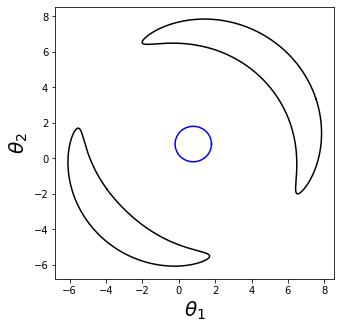

In [4]:
#Formation of images while the SIS profile for the circular source
plb.rcParams['figure.figsize'] =(5,5)
plb.plot(Theta1p, Theta2p, color='black')
plb.plot(Theta1n, Theta2n, color='black')
plb.plot(Beta1, Beta2, color='blue')
plb.xlabel(r"$\theta_1$", fontsize=20)
plb.ylabel(r"$\theta_2$", fontsize=20)
plb.show()

In [5]:
#Bayesian statistics for the parameters exploration

#parameter space for quartils 
N2 = 4
O = np.linspace(0.1, 2, N2) #radio de escala del NFW
R = np.linspace(0.1, 2, N2) #Masa central del NFW
H = np.linspace(-2, 2, N2)
K = np.linspace(-2, 2, N2)

In [6]:
#Compute of the initial guess with the multiparameter minimization function for quartils

BETA = R
BETA1 = np.zeros((len(R), len(H),len(alpha)), float)
BETA2 = np.zeros((len(R), len(H),len(alpha)), float)
THETAP = np.zeros((len(R), len(H), len(K), len(O), len(alpha)), float)
THETA1P = np.zeros((len(R), len(H), len(H), len(O), len(alpha)), float)
THETA2P = np.zeros((len(R), len(H), len(H), len(O), len(alpha)), float)
THETAPOS = np.zeros((len(R), len(H), len(H), len(O), len(alpha)), float)
X = np.zeros((len(R), len(H), len(H), len(O), len(alpha)), float)
L = np.zeros((len(R), len(H), len(H), len(O)), float)

for i in range(len(R)):
    for j in range(len(H)):
        for k in range(len(K)):
            for l in range(len(O)):
                for m in range(len(alpha)):
                    BETA1[i,j,m] = BETA[i]*np.cos(alpha[m])+H[j]
                    BETA2[i,k,m] = BETA[i]*np.sin(alpha[m])+K[k]
                    THETAP[i,j,k,l,m] = (BETA1[i,j,m]**2+BETA2[i,k,m]**2)**0.5 + (4*np.pi*O[l]**2*D_ds/(c**2*D_s)) 
                    THETA1P[i,j,k,l,m] = BETA1[i,j,m]/(1-(4*np.pi*O[l]**2*D_ds/(c**2*D_s*THETAP[i,j,k,l,m])))
                    THETA2P[i,j,k,l,m] = BETA2[i,k,m]/(1-(4*np.pi*O[l]**2*D_ds/(c**2*D_s*THETAP[i,j,k,l,m])))
                    THETAPOS[i,j,k,l,m] = np.sqrt(THETA1P[i,j,k,l,m]**2+THETA2P[i,j,k,l,m]**2)
                    X[i,j,k,l,m] = ((thetap[m]-THETAPOS[i,j,k,l,m])**2) #minimization function
                    print('GRADPOT1nfw1',i,j,k,l,m)
                L[i,j,k,l] = np.sum(X[i,j,k,l]) #minimization function for the set of data           

GRADPOT1nfw1 0 0 0 0 0
GRADPOT1nfw1 0 0 0 0 1
GRADPOT1nfw1 0 0 0 0 2
GRADPOT1nfw1 0 0 0 0 3
GRADPOT1nfw1 0 0 0 0 4
GRADPOT1nfw1 0 0 0 0 5
GRADPOT1nfw1 0 0 0 0 6
GRADPOT1nfw1 0 0 0 0 7
GRADPOT1nfw1 0 0 0 0 8
GRADPOT1nfw1 0 0 0 0 9
GRADPOT1nfw1 0 0 0 0 10
GRADPOT1nfw1 0 0 0 0 11
GRADPOT1nfw1 0 0 0 0 12
GRADPOT1nfw1 0 0 0 0 13
GRADPOT1nfw1 0 0 0 0 14
GRADPOT1nfw1 0 0 0 0 15
GRADPOT1nfw1 0 0 0 0 16
GRADPOT1nfw1 0 0 0 0 17
GRADPOT1nfw1 0 0 0 0 18
GRADPOT1nfw1 0 0 0 0 19
GRADPOT1nfw1 0 0 0 0 20
GRADPOT1nfw1 0 0 0 0 21
GRADPOT1nfw1 0 0 0 0 22
GRADPOT1nfw1 0 0 0 0 23
GRADPOT1nfw1 0 0 0 0 24
GRADPOT1nfw1 0 0 0 0 25
GRADPOT1nfw1 0 0 0 0 26
GRADPOT1nfw1 0 0 0 0 27
GRADPOT1nfw1 0 0 0 0 28
GRADPOT1nfw1 0 0 0 0 29
GRADPOT1nfw1 0 0 0 0 30
GRADPOT1nfw1 0 0 0 0 31
GRADPOT1nfw1 0 0 0 0 32
GRADPOT1nfw1 0 0 0 0 33
GRADPOT1nfw1 0 0 0 0 34
GRADPOT1nfw1 0 0 0 0 35
GRADPOT1nfw1 0 0 0 0 36
GRADPOT1nfw1 0 0 0 0 37
GRADPOT1nfw1 0 0 0 0 38
GRADPOT1nfw1 0 0 0 0 39
GRADPOT1nfw1 0 0 0 0 40
GRADPOT1nfw1 0 0 0 0 41
GR

GRADPOT1nfw1 0 0 0 0 349
GRADPOT1nfw1 0 0 0 0 350
GRADPOT1nfw1 0 0 0 0 351
GRADPOT1nfw1 0 0 0 0 352
GRADPOT1nfw1 0 0 0 0 353
GRADPOT1nfw1 0 0 0 0 354
GRADPOT1nfw1 0 0 0 0 355
GRADPOT1nfw1 0 0 0 0 356
GRADPOT1nfw1 0 0 0 0 357
GRADPOT1nfw1 0 0 0 0 358
GRADPOT1nfw1 0 0 0 0 359
GRADPOT1nfw1 0 0 0 0 360
GRADPOT1nfw1 0 0 0 0 361
GRADPOT1nfw1 0 0 0 0 362
GRADPOT1nfw1 0 0 0 0 363
GRADPOT1nfw1 0 0 0 0 364
GRADPOT1nfw1 0 0 0 0 365
GRADPOT1nfw1 0 0 0 0 366
GRADPOT1nfw1 0 0 0 0 367
GRADPOT1nfw1 0 0 0 0 368
GRADPOT1nfw1 0 0 0 0 369
GRADPOT1nfw1 0 0 0 0 370
GRADPOT1nfw1 0 0 0 0 371
GRADPOT1nfw1 0 0 0 0 372
GRADPOT1nfw1 0 0 0 0 373
GRADPOT1nfw1 0 0 0 0 374
GRADPOT1nfw1 0 0 0 0 375
GRADPOT1nfw1 0 0 0 0 376
GRADPOT1nfw1 0 0 0 0 377
GRADPOT1nfw1 0 0 0 0 378
GRADPOT1nfw1 0 0 0 0 379
GRADPOT1nfw1 0 0 0 0 380
GRADPOT1nfw1 0 0 0 0 381
GRADPOT1nfw1 0 0 0 0 382
GRADPOT1nfw1 0 0 0 0 383
GRADPOT1nfw1 0 0 0 0 384
GRADPOT1nfw1 0 0 0 0 385
GRADPOT1nfw1 0 0 0 0 386
GRADPOT1nfw1 0 0 0 0 387
GRADPOT1nfw1 0 0 0 0 388


GRADPOT1nfw1 0 0 0 0 783
GRADPOT1nfw1 0 0 0 0 784
GRADPOT1nfw1 0 0 0 0 785
GRADPOT1nfw1 0 0 0 0 786
GRADPOT1nfw1 0 0 0 0 787
GRADPOT1nfw1 0 0 0 0 788
GRADPOT1nfw1 0 0 0 0 789
GRADPOT1nfw1 0 0 0 0 790
GRADPOT1nfw1 0 0 0 0 791
GRADPOT1nfw1 0 0 0 0 792
GRADPOT1nfw1 0 0 0 0 793
GRADPOT1nfw1 0 0 0 0 794
GRADPOT1nfw1 0 0 0 0 795
GRADPOT1nfw1 0 0 0 0 796
GRADPOT1nfw1 0 0 0 0 797
GRADPOT1nfw1 0 0 0 0 798
GRADPOT1nfw1 0 0 0 0 799
GRADPOT1nfw1 0 0 0 0 800
GRADPOT1nfw1 0 0 0 0 801
GRADPOT1nfw1 0 0 0 0 802
GRADPOT1nfw1 0 0 0 0 803
GRADPOT1nfw1 0 0 0 0 804
GRADPOT1nfw1 0 0 0 0 805
GRADPOT1nfw1 0 0 0 0 806
GRADPOT1nfw1 0 0 0 0 807
GRADPOT1nfw1 0 0 0 0 808
GRADPOT1nfw1 0 0 0 0 809
GRADPOT1nfw1 0 0 0 0 810
GRADPOT1nfw1 0 0 0 0 811
GRADPOT1nfw1 0 0 0 0 812
GRADPOT1nfw1 0 0 0 0 813
GRADPOT1nfw1 0 0 0 0 814
GRADPOT1nfw1 0 0 0 0 815
GRADPOT1nfw1 0 0 0 0 816
GRADPOT1nfw1 0 0 0 0 817
GRADPOT1nfw1 0 0 0 0 818
GRADPOT1nfw1 0 0 0 0 819
GRADPOT1nfw1 0 0 0 0 820
GRADPOT1nfw1 0 0 0 0 821
GRADPOT1nfw1 0 0 0 0 822


GRADPOT1nfw1 0 0 0 1 235
GRADPOT1nfw1 0 0 0 1 236
GRADPOT1nfw1 0 0 0 1 237
GRADPOT1nfw1 0 0 0 1 238
GRADPOT1nfw1 0 0 0 1 239
GRADPOT1nfw1 0 0 0 1 240
GRADPOT1nfw1 0 0 0 1 241
GRADPOT1nfw1 0 0 0 1 242
GRADPOT1nfw1 0 0 0 1 243
GRADPOT1nfw1 0 0 0 1 244
GRADPOT1nfw1 0 0 0 1 245
GRADPOT1nfw1 0 0 0 1 246
GRADPOT1nfw1 0 0 0 1 247
GRADPOT1nfw1 0 0 0 1 248
GRADPOT1nfw1 0 0 0 1 249
GRADPOT1nfw1 0 0 0 1 250
GRADPOT1nfw1 0 0 0 1 251
GRADPOT1nfw1 0 0 0 1 252
GRADPOT1nfw1 0 0 0 1 253
GRADPOT1nfw1 0 0 0 1 254
GRADPOT1nfw1 0 0 0 1 255
GRADPOT1nfw1 0 0 0 1 256
GRADPOT1nfw1 0 0 0 1 257
GRADPOT1nfw1 0 0 0 1 258
GRADPOT1nfw1 0 0 0 1 259
GRADPOT1nfw1 0 0 0 1 260
GRADPOT1nfw1 0 0 0 1 261
GRADPOT1nfw1 0 0 0 1 262
GRADPOT1nfw1 0 0 0 1 263
GRADPOT1nfw1 0 0 0 1 264
GRADPOT1nfw1 0 0 0 1 265
GRADPOT1nfw1 0 0 0 1 266
GRADPOT1nfw1 0 0 0 1 267
GRADPOT1nfw1 0 0 0 1 268
GRADPOT1nfw1 0 0 0 1 269
GRADPOT1nfw1 0 0 0 1 270
GRADPOT1nfw1 0 0 0 1 271
GRADPOT1nfw1 0 0 0 1 272
GRADPOT1nfw1 0 0 0 1 273
GRADPOT1nfw1 0 0 0 1 274


GRADPOT1nfw1 0 0 0 1 699
GRADPOT1nfw1 0 0 0 1 700
GRADPOT1nfw1 0 0 0 1 701
GRADPOT1nfw1 0 0 0 1 702
GRADPOT1nfw1 0 0 0 1 703
GRADPOT1nfw1 0 0 0 1 704
GRADPOT1nfw1 0 0 0 1 705
GRADPOT1nfw1 0 0 0 1 706
GRADPOT1nfw1 0 0 0 1 707
GRADPOT1nfw1 0 0 0 1 708
GRADPOT1nfw1 0 0 0 1 709
GRADPOT1nfw1 0 0 0 1 710
GRADPOT1nfw1 0 0 0 1 711
GRADPOT1nfw1 0 0 0 1 712
GRADPOT1nfw1 0 0 0 1 713
GRADPOT1nfw1 0 0 0 1 714
GRADPOT1nfw1 0 0 0 1 715
GRADPOT1nfw1 0 0 0 1 716
GRADPOT1nfw1 0 0 0 1 717
GRADPOT1nfw1 0 0 0 1 718
GRADPOT1nfw1 0 0 0 1 719
GRADPOT1nfw1 0 0 0 1 720
GRADPOT1nfw1 0 0 0 1 721
GRADPOT1nfw1 0 0 0 1 722
GRADPOT1nfw1 0 0 0 1 723
GRADPOT1nfw1 0 0 0 1 724
GRADPOT1nfw1 0 0 0 1 725
GRADPOT1nfw1 0 0 0 1 726
GRADPOT1nfw1 0 0 0 1 727
GRADPOT1nfw1 0 0 0 1 728
GRADPOT1nfw1 0 0 0 1 729
GRADPOT1nfw1 0 0 0 1 730
GRADPOT1nfw1 0 0 0 1 731
GRADPOT1nfw1 0 0 0 1 732
GRADPOT1nfw1 0 0 0 1 733
GRADPOT1nfw1 0 0 0 1 734
GRADPOT1nfw1 0 0 0 1 735
GRADPOT1nfw1 0 0 0 1 736
GRADPOT1nfw1 0 0 0 1 737
GRADPOT1nfw1 0 0 0 1 738


GRADPOT1nfw1 0 0 0 2 165
GRADPOT1nfw1 0 0 0 2 166
GRADPOT1nfw1 0 0 0 2 167
GRADPOT1nfw1 0 0 0 2 168
GRADPOT1nfw1 0 0 0 2 169
GRADPOT1nfw1 0 0 0 2 170
GRADPOT1nfw1 0 0 0 2 171
GRADPOT1nfw1 0 0 0 2 172
GRADPOT1nfw1 0 0 0 2 173
GRADPOT1nfw1 0 0 0 2 174
GRADPOT1nfw1 0 0 0 2 175
GRADPOT1nfw1 0 0 0 2 176
GRADPOT1nfw1 0 0 0 2 177
GRADPOT1nfw1 0 0 0 2 178
GRADPOT1nfw1 0 0 0 2 179
GRADPOT1nfw1 0 0 0 2 180
GRADPOT1nfw1 0 0 0 2 181
GRADPOT1nfw1 0 0 0 2 182
GRADPOT1nfw1 0 0 0 2 183
GRADPOT1nfw1 0 0 0 2 184
GRADPOT1nfw1 0 0 0 2 185
GRADPOT1nfw1 0 0 0 2 186
GRADPOT1nfw1 0 0 0 2 187
GRADPOT1nfw1 0 0 0 2 188
GRADPOT1nfw1 0 0 0 2 189
GRADPOT1nfw1 0 0 0 2 190
GRADPOT1nfw1 0 0 0 2 191
GRADPOT1nfw1 0 0 0 2 192
GRADPOT1nfw1 0 0 0 2 193
GRADPOT1nfw1 0 0 0 2 194
GRADPOT1nfw1 0 0 0 2 195
GRADPOT1nfw1 0 0 0 2 196
GRADPOT1nfw1 0 0 0 2 197
GRADPOT1nfw1 0 0 0 2 198
GRADPOT1nfw1 0 0 0 2 199
GRADPOT1nfw1 0 0 0 2 200
GRADPOT1nfw1 0 0 0 2 201
GRADPOT1nfw1 0 0 0 2 202
GRADPOT1nfw1 0 0 0 2 203
GRADPOT1nfw1 0 0 0 2 204


GRADPOT1nfw1 0 0 0 2 524
GRADPOT1nfw1 0 0 0 2 525
GRADPOT1nfw1 0 0 0 2 526
GRADPOT1nfw1 0 0 0 2 527
GRADPOT1nfw1 0 0 0 2 528
GRADPOT1nfw1 0 0 0 2 529
GRADPOT1nfw1 0 0 0 2 530
GRADPOT1nfw1 0 0 0 2 531
GRADPOT1nfw1 0 0 0 2 532
GRADPOT1nfw1 0 0 0 2 533
GRADPOT1nfw1 0 0 0 2 534
GRADPOT1nfw1 0 0 0 2 535
GRADPOT1nfw1 0 0 0 2 536
GRADPOT1nfw1 0 0 0 2 537
GRADPOT1nfw1 0 0 0 2 538
GRADPOT1nfw1 0 0 0 2 539
GRADPOT1nfw1 0 0 0 2 540
GRADPOT1nfw1 0 0 0 2 541
GRADPOT1nfw1 0 0 0 2 542
GRADPOT1nfw1 0 0 0 2 543
GRADPOT1nfw1 0 0 0 2 544
GRADPOT1nfw1 0 0 0 2 545
GRADPOT1nfw1 0 0 0 2 546
GRADPOT1nfw1 0 0 0 2 547
GRADPOT1nfw1 0 0 0 2 548
GRADPOT1nfw1 0 0 0 2 549
GRADPOT1nfw1 0 0 0 2 550
GRADPOT1nfw1 0 0 0 2 551
GRADPOT1nfw1 0 0 0 2 552
GRADPOT1nfw1 0 0 0 2 553
GRADPOT1nfw1 0 0 0 2 554
GRADPOT1nfw1 0 0 0 2 555
GRADPOT1nfw1 0 0 0 2 556
GRADPOT1nfw1 0 0 0 2 557
GRADPOT1nfw1 0 0 0 2 558
GRADPOT1nfw1 0 0 0 2 559
GRADPOT1nfw1 0 0 0 2 560
GRADPOT1nfw1 0 0 0 2 561
GRADPOT1nfw1 0 0 0 2 562
GRADPOT1nfw1 0 0 0 2 563


GRADPOT1nfw1 0 0 0 2 977
GRADPOT1nfw1 0 0 0 2 978
GRADPOT1nfw1 0 0 0 2 979
GRADPOT1nfw1 0 0 0 2 980
GRADPOT1nfw1 0 0 0 2 981
GRADPOT1nfw1 0 0 0 2 982
GRADPOT1nfw1 0 0 0 2 983
GRADPOT1nfw1 0 0 0 2 984
GRADPOT1nfw1 0 0 0 2 985
GRADPOT1nfw1 0 0 0 2 986
GRADPOT1nfw1 0 0 0 2 987
GRADPOT1nfw1 0 0 0 2 988
GRADPOT1nfw1 0 0 0 2 989
GRADPOT1nfw1 0 0 0 2 990
GRADPOT1nfw1 0 0 0 2 991
GRADPOT1nfw1 0 0 0 2 992
GRADPOT1nfw1 0 0 0 2 993
GRADPOT1nfw1 0 0 0 2 994
GRADPOT1nfw1 0 0 0 2 995
GRADPOT1nfw1 0 0 0 2 996
GRADPOT1nfw1 0 0 0 2 997
GRADPOT1nfw1 0 0 0 2 998
GRADPOT1nfw1 0 0 0 2 999
GRADPOT1nfw1 0 0 0 3 0
GRADPOT1nfw1 0 0 0 3 1
GRADPOT1nfw1 0 0 0 3 2
GRADPOT1nfw1 0 0 0 3 3
GRADPOT1nfw1 0 0 0 3 4
GRADPOT1nfw1 0 0 0 3 5
GRADPOT1nfw1 0 0 0 3 6
GRADPOT1nfw1 0 0 0 3 7
GRADPOT1nfw1 0 0 0 3 8
GRADPOT1nfw1 0 0 0 3 9
GRADPOT1nfw1 0 0 0 3 10
GRADPOT1nfw1 0 0 0 3 11
GRADPOT1nfw1 0 0 0 3 12
GRADPOT1nfw1 0 0 0 3 13
GRADPOT1nfw1 0 0 0 3 14
GRADPOT1nfw1 0 0 0 3 15
GRADPOT1nfw1 0 0 0 3 16
GRADPOT1nfw1 0 0 0 3 17
GRA

GRADPOT1nfw1 0 0 0 3 418
GRADPOT1nfw1 0 0 0 3 419
GRADPOT1nfw1 0 0 0 3 420
GRADPOT1nfw1 0 0 0 3 421
GRADPOT1nfw1 0 0 0 3 422
GRADPOT1nfw1 0 0 0 3 423
GRADPOT1nfw1 0 0 0 3 424
GRADPOT1nfw1 0 0 0 3 425
GRADPOT1nfw1 0 0 0 3 426
GRADPOT1nfw1 0 0 0 3 427
GRADPOT1nfw1 0 0 0 3 428
GRADPOT1nfw1 0 0 0 3 429
GRADPOT1nfw1 0 0 0 3 430
GRADPOT1nfw1 0 0 0 3 431
GRADPOT1nfw1 0 0 0 3 432
GRADPOT1nfw1 0 0 0 3 433
GRADPOT1nfw1 0 0 0 3 434
GRADPOT1nfw1 0 0 0 3 435
GRADPOT1nfw1 0 0 0 3 436
GRADPOT1nfw1 0 0 0 3 437
GRADPOT1nfw1 0 0 0 3 438
GRADPOT1nfw1 0 0 0 3 439
GRADPOT1nfw1 0 0 0 3 440
GRADPOT1nfw1 0 0 0 3 441
GRADPOT1nfw1 0 0 0 3 442
GRADPOT1nfw1 0 0 0 3 443
GRADPOT1nfw1 0 0 0 3 444
GRADPOT1nfw1 0 0 0 3 445
GRADPOT1nfw1 0 0 0 3 446
GRADPOT1nfw1 0 0 0 3 447
GRADPOT1nfw1 0 0 0 3 448
GRADPOT1nfw1 0 0 0 3 449
GRADPOT1nfw1 0 0 0 3 450
GRADPOT1nfw1 0 0 0 3 451
GRADPOT1nfw1 0 0 0 3 452
GRADPOT1nfw1 0 0 0 3 453
GRADPOT1nfw1 0 0 0 3 454
GRADPOT1nfw1 0 0 0 3 455
GRADPOT1nfw1 0 0 0 3 456
GRADPOT1nfw1 0 0 0 3 457


GRADPOT1nfw1 0 0 0 3 866
GRADPOT1nfw1 0 0 0 3 867
GRADPOT1nfw1 0 0 0 3 868
GRADPOT1nfw1 0 0 0 3 869
GRADPOT1nfw1 0 0 0 3 870
GRADPOT1nfw1 0 0 0 3 871
GRADPOT1nfw1 0 0 0 3 872
GRADPOT1nfw1 0 0 0 3 873
GRADPOT1nfw1 0 0 0 3 874
GRADPOT1nfw1 0 0 0 3 875
GRADPOT1nfw1 0 0 0 3 876
GRADPOT1nfw1 0 0 0 3 877
GRADPOT1nfw1 0 0 0 3 878
GRADPOT1nfw1 0 0 0 3 879
GRADPOT1nfw1 0 0 0 3 880
GRADPOT1nfw1 0 0 0 3 881
GRADPOT1nfw1 0 0 0 3 882
GRADPOT1nfw1 0 0 0 3 883
GRADPOT1nfw1 0 0 0 3 884
GRADPOT1nfw1 0 0 0 3 885
GRADPOT1nfw1 0 0 0 3 886
GRADPOT1nfw1 0 0 0 3 887
GRADPOT1nfw1 0 0 0 3 888
GRADPOT1nfw1 0 0 0 3 889
GRADPOT1nfw1 0 0 0 3 890
GRADPOT1nfw1 0 0 0 3 891
GRADPOT1nfw1 0 0 0 3 892
GRADPOT1nfw1 0 0 0 3 893
GRADPOT1nfw1 0 0 0 3 894
GRADPOT1nfw1 0 0 0 3 895
GRADPOT1nfw1 0 0 0 3 896
GRADPOT1nfw1 0 0 0 3 897
GRADPOT1nfw1 0 0 0 3 898
GRADPOT1nfw1 0 0 0 3 899
GRADPOT1nfw1 0 0 0 3 900
GRADPOT1nfw1 0 0 0 3 901
GRADPOT1nfw1 0 0 0 3 902
GRADPOT1nfw1 0 0 0 3 903
GRADPOT1nfw1 0 0 0 3 904
GRADPOT1nfw1 0 0 0 3 905


GRADPOT1nfw1 0 0 1 0 342
GRADPOT1nfw1 0 0 1 0 343
GRADPOT1nfw1 0 0 1 0 344
GRADPOT1nfw1 0 0 1 0 345
GRADPOT1nfw1 0 0 1 0 346
GRADPOT1nfw1 0 0 1 0 347
GRADPOT1nfw1 0 0 1 0 348
GRADPOT1nfw1 0 0 1 0 349
GRADPOT1nfw1 0 0 1 0 350
GRADPOT1nfw1 0 0 1 0 351
GRADPOT1nfw1 0 0 1 0 352
GRADPOT1nfw1 0 0 1 0 353
GRADPOT1nfw1 0 0 1 0 354
GRADPOT1nfw1 0 0 1 0 355
GRADPOT1nfw1 0 0 1 0 356
GRADPOT1nfw1 0 0 1 0 357
GRADPOT1nfw1 0 0 1 0 358
GRADPOT1nfw1 0 0 1 0 359
GRADPOT1nfw1 0 0 1 0 360
GRADPOT1nfw1 0 0 1 0 361
GRADPOT1nfw1 0 0 1 0 362
GRADPOT1nfw1 0 0 1 0 363
GRADPOT1nfw1 0 0 1 0 364
GRADPOT1nfw1 0 0 1 0 365
GRADPOT1nfw1 0 0 1 0 366
GRADPOT1nfw1 0 0 1 0 367
GRADPOT1nfw1 0 0 1 0 368
GRADPOT1nfw1 0 0 1 0 369
GRADPOT1nfw1 0 0 1 0 370
GRADPOT1nfw1 0 0 1 0 371
GRADPOT1nfw1 0 0 1 0 372
GRADPOT1nfw1 0 0 1 0 373
GRADPOT1nfw1 0 0 1 0 374
GRADPOT1nfw1 0 0 1 0 375
GRADPOT1nfw1 0 0 1 0 376
GRADPOT1nfw1 0 0 1 0 377
GRADPOT1nfw1 0 0 1 0 378
GRADPOT1nfw1 0 0 1 0 379
GRADPOT1nfw1 0 0 1 0 380
GRADPOT1nfw1 0 0 1 0 381


GRADPOT1nfw1 0 0 1 0 819
GRADPOT1nfw1 0 0 1 0 820
GRADPOT1nfw1 0 0 1 0 821
GRADPOT1nfw1 0 0 1 0 822
GRADPOT1nfw1 0 0 1 0 823
GRADPOT1nfw1 0 0 1 0 824
GRADPOT1nfw1 0 0 1 0 825
GRADPOT1nfw1 0 0 1 0 826
GRADPOT1nfw1 0 0 1 0 827
GRADPOT1nfw1 0 0 1 0 828
GRADPOT1nfw1 0 0 1 0 829
GRADPOT1nfw1 0 0 1 0 830
GRADPOT1nfw1 0 0 1 0 831
GRADPOT1nfw1 0 0 1 0 832
GRADPOT1nfw1 0 0 1 0 833
GRADPOT1nfw1 0 0 1 0 834
GRADPOT1nfw1 0 0 1 0 835
GRADPOT1nfw1 0 0 1 0 836
GRADPOT1nfw1 0 0 1 0 837
GRADPOT1nfw1 0 0 1 0 838
GRADPOT1nfw1 0 0 1 0 839
GRADPOT1nfw1 0 0 1 0 840
GRADPOT1nfw1 0 0 1 0 841
GRADPOT1nfw1 0 0 1 0 842
GRADPOT1nfw1 0 0 1 0 843
GRADPOT1nfw1 0 0 1 0 844
GRADPOT1nfw1 0 0 1 0 845
GRADPOT1nfw1 0 0 1 0 846
GRADPOT1nfw1 0 0 1 0 847
GRADPOT1nfw1 0 0 1 0 848
GRADPOT1nfw1 0 0 1 0 849
GRADPOT1nfw1 0 0 1 0 850
GRADPOT1nfw1 0 0 1 0 851
GRADPOT1nfw1 0 0 1 0 852
GRADPOT1nfw1 0 0 1 0 853
GRADPOT1nfw1 0 0 1 0 854
GRADPOT1nfw1 0 0 1 0 855
GRADPOT1nfw1 0 0 1 0 856
GRADPOT1nfw1 0 0 1 0 857
GRADPOT1nfw1 0 0 1 0 858


GRADPOT1nfw1 0 0 1 1 262
GRADPOT1nfw1 0 0 1 1 263
GRADPOT1nfw1 0 0 1 1 264
GRADPOT1nfw1 0 0 1 1 265
GRADPOT1nfw1 0 0 1 1 266
GRADPOT1nfw1 0 0 1 1 267
GRADPOT1nfw1 0 0 1 1 268
GRADPOT1nfw1 0 0 1 1 269
GRADPOT1nfw1 0 0 1 1 270
GRADPOT1nfw1 0 0 1 1 271
GRADPOT1nfw1 0 0 1 1 272
GRADPOT1nfw1 0 0 1 1 273
GRADPOT1nfw1 0 0 1 1 274
GRADPOT1nfw1 0 0 1 1 275
GRADPOT1nfw1 0 0 1 1 276
GRADPOT1nfw1 0 0 1 1 277
GRADPOT1nfw1 0 0 1 1 278
GRADPOT1nfw1 0 0 1 1 279
GRADPOT1nfw1 0 0 1 1 280
GRADPOT1nfw1 0 0 1 1 281
GRADPOT1nfw1 0 0 1 1 282
GRADPOT1nfw1 0 0 1 1 283
GRADPOT1nfw1 0 0 1 1 284
GRADPOT1nfw1 0 0 1 1 285
GRADPOT1nfw1 0 0 1 1 286
GRADPOT1nfw1 0 0 1 1 287
GRADPOT1nfw1 0 0 1 1 288
GRADPOT1nfw1 0 0 1 1 289
GRADPOT1nfw1 0 0 1 1 290
GRADPOT1nfw1 0 0 1 1 291
GRADPOT1nfw1 0 0 1 1 292
GRADPOT1nfw1 0 0 1 1 293
GRADPOT1nfw1 0 0 1 1 294
GRADPOT1nfw1 0 0 1 1 295
GRADPOT1nfw1 0 0 1 1 296
GRADPOT1nfw1 0 0 1 1 297
GRADPOT1nfw1 0 0 1 1 298
GRADPOT1nfw1 0 0 1 1 299
GRADPOT1nfw1 0 0 1 1 300
GRADPOT1nfw1 0 0 1 1 301


GRADPOT1nfw1 0 0 1 1 742
GRADPOT1nfw1 0 0 1 1 743
GRADPOT1nfw1 0 0 1 1 744
GRADPOT1nfw1 0 0 1 1 745
GRADPOT1nfw1 0 0 1 1 746
GRADPOT1nfw1 0 0 1 1 747
GRADPOT1nfw1 0 0 1 1 748
GRADPOT1nfw1 0 0 1 1 749
GRADPOT1nfw1 0 0 1 1 750
GRADPOT1nfw1 0 0 1 1 751
GRADPOT1nfw1 0 0 1 1 752
GRADPOT1nfw1 0 0 1 1 753
GRADPOT1nfw1 0 0 1 1 754
GRADPOT1nfw1 0 0 1 1 755
GRADPOT1nfw1 0 0 1 1 756
GRADPOT1nfw1 0 0 1 1 757
GRADPOT1nfw1 0 0 1 1 758
GRADPOT1nfw1 0 0 1 1 759
GRADPOT1nfw1 0 0 1 1 760
GRADPOT1nfw1 0 0 1 1 761
GRADPOT1nfw1 0 0 1 1 762
GRADPOT1nfw1 0 0 1 1 763
GRADPOT1nfw1 0 0 1 1 764
GRADPOT1nfw1 0 0 1 1 765
GRADPOT1nfw1 0 0 1 1 766
GRADPOT1nfw1 0 0 1 1 767
GRADPOT1nfw1 0 0 1 1 768
GRADPOT1nfw1 0 0 1 1 769
GRADPOT1nfw1 0 0 1 1 770
GRADPOT1nfw1 0 0 1 1 771
GRADPOT1nfw1 0 0 1 1 772
GRADPOT1nfw1 0 0 1 1 773
GRADPOT1nfw1 0 0 1 1 774
GRADPOT1nfw1 0 0 1 1 775
GRADPOT1nfw1 0 0 1 1 776
GRADPOT1nfw1 0 0 1 1 777
GRADPOT1nfw1 0 0 1 1 778
GRADPOT1nfw1 0 0 1 1 779
GRADPOT1nfw1 0 0 1 1 780
GRADPOT1nfw1 0 0 1 1 781


GRADPOT1nfw1 0 0 1 2 200
GRADPOT1nfw1 0 0 1 2 201
GRADPOT1nfw1 0 0 1 2 202
GRADPOT1nfw1 0 0 1 2 203
GRADPOT1nfw1 0 0 1 2 204
GRADPOT1nfw1 0 0 1 2 205
GRADPOT1nfw1 0 0 1 2 206
GRADPOT1nfw1 0 0 1 2 207
GRADPOT1nfw1 0 0 1 2 208
GRADPOT1nfw1 0 0 1 2 209
GRADPOT1nfw1 0 0 1 2 210
GRADPOT1nfw1 0 0 1 2 211
GRADPOT1nfw1 0 0 1 2 212
GRADPOT1nfw1 0 0 1 2 213
GRADPOT1nfw1 0 0 1 2 214
GRADPOT1nfw1 0 0 1 2 215
GRADPOT1nfw1 0 0 1 2 216
GRADPOT1nfw1 0 0 1 2 217
GRADPOT1nfw1 0 0 1 2 218
GRADPOT1nfw1 0 0 1 2 219
GRADPOT1nfw1 0 0 1 2 220
GRADPOT1nfw1 0 0 1 2 221
GRADPOT1nfw1 0 0 1 2 222
GRADPOT1nfw1 0 0 1 2 223
GRADPOT1nfw1 0 0 1 2 224
GRADPOT1nfw1 0 0 1 2 225
GRADPOT1nfw1 0 0 1 2 226
GRADPOT1nfw1 0 0 1 2 227
GRADPOT1nfw1 0 0 1 2 228
GRADPOT1nfw1 0 0 1 2 229
GRADPOT1nfw1 0 0 1 2 230
GRADPOT1nfw1 0 0 1 2 231
GRADPOT1nfw1 0 0 1 2 232
GRADPOT1nfw1 0 0 1 2 233
GRADPOT1nfw1 0 0 1 2 234
GRADPOT1nfw1 0 0 1 2 235
GRADPOT1nfw1 0 0 1 2 236
GRADPOT1nfw1 0 0 1 2 237
GRADPOT1nfw1 0 0 1 2 238
GRADPOT1nfw1 0 0 1 2 239


GRADPOT1nfw1 0 0 1 2 669
GRADPOT1nfw1 0 0 1 2 670
GRADPOT1nfw1 0 0 1 2 671
GRADPOT1nfw1 0 0 1 2 672
GRADPOT1nfw1 0 0 1 2 673
GRADPOT1nfw1 0 0 1 2 674
GRADPOT1nfw1 0 0 1 2 675
GRADPOT1nfw1 0 0 1 2 676
GRADPOT1nfw1 0 0 1 2 677
GRADPOT1nfw1 0 0 1 2 678
GRADPOT1nfw1 0 0 1 2 679
GRADPOT1nfw1 0 0 1 2 680
GRADPOT1nfw1 0 0 1 2 681
GRADPOT1nfw1 0 0 1 2 682
GRADPOT1nfw1 0 0 1 2 683
GRADPOT1nfw1 0 0 1 2 684
GRADPOT1nfw1 0 0 1 2 685
GRADPOT1nfw1 0 0 1 2 686
GRADPOT1nfw1 0 0 1 2 687
GRADPOT1nfw1 0 0 1 2 688
GRADPOT1nfw1 0 0 1 2 689
GRADPOT1nfw1 0 0 1 2 690
GRADPOT1nfw1 0 0 1 2 691
GRADPOT1nfw1 0 0 1 2 692
GRADPOT1nfw1 0 0 1 2 693
GRADPOT1nfw1 0 0 1 2 694
GRADPOT1nfw1 0 0 1 2 695
GRADPOT1nfw1 0 0 1 2 696
GRADPOT1nfw1 0 0 1 2 697
GRADPOT1nfw1 0 0 1 2 698
GRADPOT1nfw1 0 0 1 2 699
GRADPOT1nfw1 0 0 1 2 700
GRADPOT1nfw1 0 0 1 2 701
GRADPOT1nfw1 0 0 1 2 702
GRADPOT1nfw1 0 0 1 2 703
GRADPOT1nfw1 0 0 1 2 704
GRADPOT1nfw1 0 0 1 2 705
GRADPOT1nfw1 0 0 1 2 706
GRADPOT1nfw1 0 0 1 2 707
GRADPOT1nfw1 0 0 1 2 708


GRADPOT1nfw1 0 0 1 3 98
GRADPOT1nfw1 0 0 1 3 99
GRADPOT1nfw1 0 0 1 3 100
GRADPOT1nfw1 0 0 1 3 101
GRADPOT1nfw1 0 0 1 3 102
GRADPOT1nfw1 0 0 1 3 103
GRADPOT1nfw1 0 0 1 3 104
GRADPOT1nfw1 0 0 1 3 105
GRADPOT1nfw1 0 0 1 3 106
GRADPOT1nfw1 0 0 1 3 107
GRADPOT1nfw1 0 0 1 3 108
GRADPOT1nfw1 0 0 1 3 109
GRADPOT1nfw1 0 0 1 3 110
GRADPOT1nfw1 0 0 1 3 111
GRADPOT1nfw1 0 0 1 3 112
GRADPOT1nfw1 0 0 1 3 113
GRADPOT1nfw1 0 0 1 3 114
GRADPOT1nfw1 0 0 1 3 115
GRADPOT1nfw1 0 0 1 3 116
GRADPOT1nfw1 0 0 1 3 117
GRADPOT1nfw1 0 0 1 3 118
GRADPOT1nfw1 0 0 1 3 119
GRADPOT1nfw1 0 0 1 3 120
GRADPOT1nfw1 0 0 1 3 121
GRADPOT1nfw1 0 0 1 3 122
GRADPOT1nfw1 0 0 1 3 123
GRADPOT1nfw1 0 0 1 3 124
GRADPOT1nfw1 0 0 1 3 125
GRADPOT1nfw1 0 0 1 3 126
GRADPOT1nfw1 0 0 1 3 127
GRADPOT1nfw1 0 0 1 3 128
GRADPOT1nfw1 0 0 1 3 129
GRADPOT1nfw1 0 0 1 3 130
GRADPOT1nfw1 0 0 1 3 131
GRADPOT1nfw1 0 0 1 3 132
GRADPOT1nfw1 0 0 1 3 133
GRADPOT1nfw1 0 0 1 3 134
GRADPOT1nfw1 0 0 1 3 135
GRADPOT1nfw1 0 0 1 3 136
GRADPOT1nfw1 0 0 1 3 137
GR

GRADPOT1nfw1 0 0 1 3 546
GRADPOT1nfw1 0 0 1 3 547
GRADPOT1nfw1 0 0 1 3 548
GRADPOT1nfw1 0 0 1 3 549
GRADPOT1nfw1 0 0 1 3 550
GRADPOT1nfw1 0 0 1 3 551
GRADPOT1nfw1 0 0 1 3 552
GRADPOT1nfw1 0 0 1 3 553
GRADPOT1nfw1 0 0 1 3 554
GRADPOT1nfw1 0 0 1 3 555
GRADPOT1nfw1 0 0 1 3 556
GRADPOT1nfw1 0 0 1 3 557
GRADPOT1nfw1 0 0 1 3 558
GRADPOT1nfw1 0 0 1 3 559
GRADPOT1nfw1 0 0 1 3 560
GRADPOT1nfw1 0 0 1 3 561
GRADPOT1nfw1 0 0 1 3 562
GRADPOT1nfw1 0 0 1 3 563
GRADPOT1nfw1 0 0 1 3 564
GRADPOT1nfw1 0 0 1 3 565
GRADPOT1nfw1 0 0 1 3 566
GRADPOT1nfw1 0 0 1 3 567
GRADPOT1nfw1 0 0 1 3 568
GRADPOT1nfw1 0 0 1 3 569
GRADPOT1nfw1 0 0 1 3 570
GRADPOT1nfw1 0 0 1 3 571
GRADPOT1nfw1 0 0 1 3 572
GRADPOT1nfw1 0 0 1 3 573
GRADPOT1nfw1 0 0 1 3 574
GRADPOT1nfw1 0 0 1 3 575
GRADPOT1nfw1 0 0 1 3 576
GRADPOT1nfw1 0 0 1 3 577
GRADPOT1nfw1 0 0 1 3 578
GRADPOT1nfw1 0 0 1 3 579
GRADPOT1nfw1 0 0 1 3 580
GRADPOT1nfw1 0 0 1 3 581
GRADPOT1nfw1 0 0 1 3 582
GRADPOT1nfw1 0 0 1 3 583
GRADPOT1nfw1 0 0 1 3 584
GRADPOT1nfw1 0 0 1 3 585


GRADPOT1nfw1 0 0 2 0 8
GRADPOT1nfw1 0 0 2 0 9
GRADPOT1nfw1 0 0 2 0 10
GRADPOT1nfw1 0 0 2 0 11
GRADPOT1nfw1 0 0 2 0 12
GRADPOT1nfw1 0 0 2 0 13
GRADPOT1nfw1 0 0 2 0 14
GRADPOT1nfw1 0 0 2 0 15
GRADPOT1nfw1 0 0 2 0 16
GRADPOT1nfw1 0 0 2 0 17
GRADPOT1nfw1 0 0 2 0 18
GRADPOT1nfw1 0 0 2 0 19
GRADPOT1nfw1 0 0 2 0 20
GRADPOT1nfw1 0 0 2 0 21
GRADPOT1nfw1 0 0 2 0 22
GRADPOT1nfw1 0 0 2 0 23
GRADPOT1nfw1 0 0 2 0 24
GRADPOT1nfw1 0 0 2 0 25
GRADPOT1nfw1 0 0 2 0 26
GRADPOT1nfw1 0 0 2 0 27
GRADPOT1nfw1 0 0 2 0 28
GRADPOT1nfw1 0 0 2 0 29
GRADPOT1nfw1 0 0 2 0 30
GRADPOT1nfw1 0 0 2 0 31
GRADPOT1nfw1 0 0 2 0 32
GRADPOT1nfw1 0 0 2 0 33
GRADPOT1nfw1 0 0 2 0 34
GRADPOT1nfw1 0 0 2 0 35
GRADPOT1nfw1 0 0 2 0 36
GRADPOT1nfw1 0 0 2 0 37
GRADPOT1nfw1 0 0 2 0 38
GRADPOT1nfw1 0 0 2 0 39
GRADPOT1nfw1 0 0 2 0 40
GRADPOT1nfw1 0 0 2 0 41
GRADPOT1nfw1 0 0 2 0 42
GRADPOT1nfw1 0 0 2 0 43
GRADPOT1nfw1 0 0 2 0 44
GRADPOT1nfw1 0 0 2 0 45
GRADPOT1nfw1 0 0 2 0 46
GRADPOT1nfw1 0 0 2 0 47
GRADPOT1nfw1 0 0 2 0 48
GRADPOT1nfw1 0 0 2

GRADPOT1nfw1 0 0 2 0 491
GRADPOT1nfw1 0 0 2 0 492
GRADPOT1nfw1 0 0 2 0 493
GRADPOT1nfw1 0 0 2 0 494
GRADPOT1nfw1 0 0 2 0 495
GRADPOT1nfw1 0 0 2 0 496
GRADPOT1nfw1 0 0 2 0 497
GRADPOT1nfw1 0 0 2 0 498
GRADPOT1nfw1 0 0 2 0 499
GRADPOT1nfw1 0 0 2 0 500
GRADPOT1nfw1 0 0 2 0 501
GRADPOT1nfw1 0 0 2 0 502
GRADPOT1nfw1 0 0 2 0 503
GRADPOT1nfw1 0 0 2 0 504
GRADPOT1nfw1 0 0 2 0 505
GRADPOT1nfw1 0 0 2 0 506
GRADPOT1nfw1 0 0 2 0 507
GRADPOT1nfw1 0 0 2 0 508
GRADPOT1nfw1 0 0 2 0 509
GRADPOT1nfw1 0 0 2 0 510
GRADPOT1nfw1 0 0 2 0 511
GRADPOT1nfw1 0 0 2 0 512
GRADPOT1nfw1 0 0 2 0 513
GRADPOT1nfw1 0 0 2 0 514
GRADPOT1nfw1 0 0 2 0 515
GRADPOT1nfw1 0 0 2 0 516
GRADPOT1nfw1 0 0 2 0 517
GRADPOT1nfw1 0 0 2 0 518
GRADPOT1nfw1 0 0 2 0 519
GRADPOT1nfw1 0 0 2 0 520
GRADPOT1nfw1 0 0 2 0 521
GRADPOT1nfw1 0 0 2 0 522
GRADPOT1nfw1 0 0 2 0 523
GRADPOT1nfw1 0 0 2 0 524
GRADPOT1nfw1 0 0 2 0 525
GRADPOT1nfw1 0 0 2 0 526
GRADPOT1nfw1 0 0 2 0 527
GRADPOT1nfw1 0 0 2 0 528
GRADPOT1nfw1 0 0 2 0 529
GRADPOT1nfw1 0 0 2 0 530


GRADPOT1nfw1 0 0 2 0 951
GRADPOT1nfw1 0 0 2 0 952
GRADPOT1nfw1 0 0 2 0 953
GRADPOT1nfw1 0 0 2 0 954
GRADPOT1nfw1 0 0 2 0 955
GRADPOT1nfw1 0 0 2 0 956
GRADPOT1nfw1 0 0 2 0 957
GRADPOT1nfw1 0 0 2 0 958
GRADPOT1nfw1 0 0 2 0 959
GRADPOT1nfw1 0 0 2 0 960
GRADPOT1nfw1 0 0 2 0 961
GRADPOT1nfw1 0 0 2 0 962
GRADPOT1nfw1 0 0 2 0 963
GRADPOT1nfw1 0 0 2 0 964
GRADPOT1nfw1 0 0 2 0 965
GRADPOT1nfw1 0 0 2 0 966
GRADPOT1nfw1 0 0 2 0 967
GRADPOT1nfw1 0 0 2 0 968
GRADPOT1nfw1 0 0 2 0 969
GRADPOT1nfw1 0 0 2 0 970
GRADPOT1nfw1 0 0 2 0 971
GRADPOT1nfw1 0 0 2 0 972
GRADPOT1nfw1 0 0 2 0 973
GRADPOT1nfw1 0 0 2 0 974
GRADPOT1nfw1 0 0 2 0 975
GRADPOT1nfw1 0 0 2 0 976
GRADPOT1nfw1 0 0 2 0 977
GRADPOT1nfw1 0 0 2 0 978
GRADPOT1nfw1 0 0 2 0 979
GRADPOT1nfw1 0 0 2 0 980
GRADPOT1nfw1 0 0 2 0 981
GRADPOT1nfw1 0 0 2 0 982
GRADPOT1nfw1 0 0 2 0 983
GRADPOT1nfw1 0 0 2 0 984
GRADPOT1nfw1 0 0 2 0 985
GRADPOT1nfw1 0 0 2 0 986
GRADPOT1nfw1 0 0 2 0 987
GRADPOT1nfw1 0 0 2 0 988
GRADPOT1nfw1 0 0 2 0 989
GRADPOT1nfw1 0 0 2 0 990


GRADPOT1nfw1 0 0 2 1 427
GRADPOT1nfw1 0 0 2 1 428
GRADPOT1nfw1 0 0 2 1 429
GRADPOT1nfw1 0 0 2 1 430
GRADPOT1nfw1 0 0 2 1 431
GRADPOT1nfw1 0 0 2 1 432
GRADPOT1nfw1 0 0 2 1 433
GRADPOT1nfw1 0 0 2 1 434
GRADPOT1nfw1 0 0 2 1 435
GRADPOT1nfw1 0 0 2 1 436
GRADPOT1nfw1 0 0 2 1 437
GRADPOT1nfw1 0 0 2 1 438
GRADPOT1nfw1 0 0 2 1 439
GRADPOT1nfw1 0 0 2 1 440
GRADPOT1nfw1 0 0 2 1 441
GRADPOT1nfw1 0 0 2 1 442
GRADPOT1nfw1 0 0 2 1 443
GRADPOT1nfw1 0 0 2 1 444
GRADPOT1nfw1 0 0 2 1 445
GRADPOT1nfw1 0 0 2 1 446
GRADPOT1nfw1 0 0 2 1 447
GRADPOT1nfw1 0 0 2 1 448
GRADPOT1nfw1 0 0 2 1 449
GRADPOT1nfw1 0 0 2 1 450
GRADPOT1nfw1 0 0 2 1 451
GRADPOT1nfw1 0 0 2 1 452
GRADPOT1nfw1 0 0 2 1 453
GRADPOT1nfw1 0 0 2 1 454
GRADPOT1nfw1 0 0 2 1 455
GRADPOT1nfw1 0 0 2 1 456
GRADPOT1nfw1 0 0 2 1 457
GRADPOT1nfw1 0 0 2 1 458
GRADPOT1nfw1 0 0 2 1 459
GRADPOT1nfw1 0 0 2 1 460
GRADPOT1nfw1 0 0 2 1 461
GRADPOT1nfw1 0 0 2 1 462
GRADPOT1nfw1 0 0 2 1 463
GRADPOT1nfw1 0 0 2 1 464
GRADPOT1nfw1 0 0 2 1 465
GRADPOT1nfw1 0 0 2 1 466


GRADPOT1nfw1 0 0 2 1 892
GRADPOT1nfw1 0 0 2 1 893
GRADPOT1nfw1 0 0 2 1 894
GRADPOT1nfw1 0 0 2 1 895
GRADPOT1nfw1 0 0 2 1 896
GRADPOT1nfw1 0 0 2 1 897
GRADPOT1nfw1 0 0 2 1 898
GRADPOT1nfw1 0 0 2 1 899
GRADPOT1nfw1 0 0 2 1 900
GRADPOT1nfw1 0 0 2 1 901
GRADPOT1nfw1 0 0 2 1 902
GRADPOT1nfw1 0 0 2 1 903
GRADPOT1nfw1 0 0 2 1 904
GRADPOT1nfw1 0 0 2 1 905
GRADPOT1nfw1 0 0 2 1 906
GRADPOT1nfw1 0 0 2 1 907
GRADPOT1nfw1 0 0 2 1 908
GRADPOT1nfw1 0 0 2 1 909
GRADPOT1nfw1 0 0 2 1 910
GRADPOT1nfw1 0 0 2 1 911
GRADPOT1nfw1 0 0 2 1 912
GRADPOT1nfw1 0 0 2 1 913
GRADPOT1nfw1 0 0 2 1 914
GRADPOT1nfw1 0 0 2 1 915
GRADPOT1nfw1 0 0 2 1 916
GRADPOT1nfw1 0 0 2 1 917
GRADPOT1nfw1 0 0 2 1 918
GRADPOT1nfw1 0 0 2 1 919
GRADPOT1nfw1 0 0 2 1 920
GRADPOT1nfw1 0 0 2 1 921
GRADPOT1nfw1 0 0 2 1 922
GRADPOT1nfw1 0 0 2 1 923
GRADPOT1nfw1 0 0 2 1 924
GRADPOT1nfw1 0 0 2 1 925
GRADPOT1nfw1 0 0 2 1 926
GRADPOT1nfw1 0 0 2 1 927
GRADPOT1nfw1 0 0 2 1 928
GRADPOT1nfw1 0 0 2 1 929
GRADPOT1nfw1 0 0 2 1 930
GRADPOT1nfw1 0 0 2 1 931


GRADPOT1nfw1 0 0 2 2 345
GRADPOT1nfw1 0 0 2 2 346
GRADPOT1nfw1 0 0 2 2 347
GRADPOT1nfw1 0 0 2 2 348
GRADPOT1nfw1 0 0 2 2 349
GRADPOT1nfw1 0 0 2 2 350
GRADPOT1nfw1 0 0 2 2 351
GRADPOT1nfw1 0 0 2 2 352
GRADPOT1nfw1 0 0 2 2 353
GRADPOT1nfw1 0 0 2 2 354
GRADPOT1nfw1 0 0 2 2 355
GRADPOT1nfw1 0 0 2 2 356
GRADPOT1nfw1 0 0 2 2 357
GRADPOT1nfw1 0 0 2 2 358
GRADPOT1nfw1 0 0 2 2 359
GRADPOT1nfw1 0 0 2 2 360
GRADPOT1nfw1 0 0 2 2 361
GRADPOT1nfw1 0 0 2 2 362
GRADPOT1nfw1 0 0 2 2 363
GRADPOT1nfw1 0 0 2 2 364
GRADPOT1nfw1 0 0 2 2 365
GRADPOT1nfw1 0 0 2 2 366
GRADPOT1nfw1 0 0 2 2 367
GRADPOT1nfw1 0 0 2 2 368
GRADPOT1nfw1 0 0 2 2 369
GRADPOT1nfw1 0 0 2 2 370
GRADPOT1nfw1 0 0 2 2 371
GRADPOT1nfw1 0 0 2 2 372
GRADPOT1nfw1 0 0 2 2 373
GRADPOT1nfw1 0 0 2 2 374
GRADPOT1nfw1 0 0 2 2 375
GRADPOT1nfw1 0 0 2 2 376
GRADPOT1nfw1 0 0 2 2 377
GRADPOT1nfw1 0 0 2 2 378
GRADPOT1nfw1 0 0 2 2 379
GRADPOT1nfw1 0 0 2 2 380
GRADPOT1nfw1 0 0 2 2 381
GRADPOT1nfw1 0 0 2 2 382
GRADPOT1nfw1 0 0 2 2 383
GRADPOT1nfw1 0 0 2 2 384


GRADPOT1nfw1 0 0 2 2 824
GRADPOT1nfw1 0 0 2 2 825
GRADPOT1nfw1 0 0 2 2 826
GRADPOT1nfw1 0 0 2 2 827
GRADPOT1nfw1 0 0 2 2 828
GRADPOT1nfw1 0 0 2 2 829
GRADPOT1nfw1 0 0 2 2 830
GRADPOT1nfw1 0 0 2 2 831
GRADPOT1nfw1 0 0 2 2 832
GRADPOT1nfw1 0 0 2 2 833
GRADPOT1nfw1 0 0 2 2 834
GRADPOT1nfw1 0 0 2 2 835
GRADPOT1nfw1 0 0 2 2 836
GRADPOT1nfw1 0 0 2 2 837
GRADPOT1nfw1 0 0 2 2 838
GRADPOT1nfw1 0 0 2 2 839
GRADPOT1nfw1 0 0 2 2 840
GRADPOT1nfw1 0 0 2 2 841
GRADPOT1nfw1 0 0 2 2 842
GRADPOT1nfw1 0 0 2 2 843
GRADPOT1nfw1 0 0 2 2 844
GRADPOT1nfw1 0 0 2 2 845
GRADPOT1nfw1 0 0 2 2 846
GRADPOT1nfw1 0 0 2 2 847
GRADPOT1nfw1 0 0 2 2 848
GRADPOT1nfw1 0 0 2 2 849
GRADPOT1nfw1 0 0 2 2 850
GRADPOT1nfw1 0 0 2 2 851
GRADPOT1nfw1 0 0 2 2 852
GRADPOT1nfw1 0 0 2 2 853
GRADPOT1nfw1 0 0 2 2 854
GRADPOT1nfw1 0 0 2 2 855
GRADPOT1nfw1 0 0 2 2 856
GRADPOT1nfw1 0 0 2 2 857
GRADPOT1nfw1 0 0 2 2 858
GRADPOT1nfw1 0 0 2 2 859
GRADPOT1nfw1 0 0 2 2 860
GRADPOT1nfw1 0 0 2 2 861
GRADPOT1nfw1 0 0 2 2 862
GRADPOT1nfw1 0 0 2 2 863


GRADPOT1nfw1 0 0 2 3 297
GRADPOT1nfw1 0 0 2 3 298
GRADPOT1nfw1 0 0 2 3 299
GRADPOT1nfw1 0 0 2 3 300
GRADPOT1nfw1 0 0 2 3 301
GRADPOT1nfw1 0 0 2 3 302
GRADPOT1nfw1 0 0 2 3 303
GRADPOT1nfw1 0 0 2 3 304
GRADPOT1nfw1 0 0 2 3 305
GRADPOT1nfw1 0 0 2 3 306
GRADPOT1nfw1 0 0 2 3 307
GRADPOT1nfw1 0 0 2 3 308
GRADPOT1nfw1 0 0 2 3 309
GRADPOT1nfw1 0 0 2 3 310
GRADPOT1nfw1 0 0 2 3 311
GRADPOT1nfw1 0 0 2 3 312
GRADPOT1nfw1 0 0 2 3 313
GRADPOT1nfw1 0 0 2 3 314
GRADPOT1nfw1 0 0 2 3 315
GRADPOT1nfw1 0 0 2 3 316
GRADPOT1nfw1 0 0 2 3 317
GRADPOT1nfw1 0 0 2 3 318
GRADPOT1nfw1 0 0 2 3 319
GRADPOT1nfw1 0 0 2 3 320
GRADPOT1nfw1 0 0 2 3 321
GRADPOT1nfw1 0 0 2 3 322
GRADPOT1nfw1 0 0 2 3 323
GRADPOT1nfw1 0 0 2 3 324
GRADPOT1nfw1 0 0 2 3 325
GRADPOT1nfw1 0 0 2 3 326
GRADPOT1nfw1 0 0 2 3 327
GRADPOT1nfw1 0 0 2 3 328
GRADPOT1nfw1 0 0 2 3 329
GRADPOT1nfw1 0 0 2 3 330
GRADPOT1nfw1 0 0 2 3 331
GRADPOT1nfw1 0 0 2 3 332
GRADPOT1nfw1 0 0 2 3 333
GRADPOT1nfw1 0 0 2 3 334
GRADPOT1nfw1 0 0 2 3 335
GRADPOT1nfw1 0 0 2 3 336


GRADPOT1nfw1 0 0 2 3 766
GRADPOT1nfw1 0 0 2 3 767
GRADPOT1nfw1 0 0 2 3 768
GRADPOT1nfw1 0 0 2 3 769
GRADPOT1nfw1 0 0 2 3 770
GRADPOT1nfw1 0 0 2 3 771
GRADPOT1nfw1 0 0 2 3 772
GRADPOT1nfw1 0 0 2 3 773
GRADPOT1nfw1 0 0 2 3 774
GRADPOT1nfw1 0 0 2 3 775
GRADPOT1nfw1 0 0 2 3 776
GRADPOT1nfw1 0 0 2 3 777
GRADPOT1nfw1 0 0 2 3 778
GRADPOT1nfw1 0 0 2 3 779
GRADPOT1nfw1 0 0 2 3 780
GRADPOT1nfw1 0 0 2 3 781
GRADPOT1nfw1 0 0 2 3 782
GRADPOT1nfw1 0 0 2 3 783
GRADPOT1nfw1 0 0 2 3 784
GRADPOT1nfw1 0 0 2 3 785
GRADPOT1nfw1 0 0 2 3 786
GRADPOT1nfw1 0 0 2 3 787
GRADPOT1nfw1 0 0 2 3 788
GRADPOT1nfw1 0 0 2 3 789
GRADPOT1nfw1 0 0 2 3 790
GRADPOT1nfw1 0 0 2 3 791
GRADPOT1nfw1 0 0 2 3 792
GRADPOT1nfw1 0 0 2 3 793
GRADPOT1nfw1 0 0 2 3 794
GRADPOT1nfw1 0 0 2 3 795
GRADPOT1nfw1 0 0 2 3 796
GRADPOT1nfw1 0 0 2 3 797
GRADPOT1nfw1 0 0 2 3 798
GRADPOT1nfw1 0 0 2 3 799
GRADPOT1nfw1 0 0 2 3 800
GRADPOT1nfw1 0 0 2 3 801
GRADPOT1nfw1 0 0 2 3 802
GRADPOT1nfw1 0 0 2 3 803
GRADPOT1nfw1 0 0 2 3 804
GRADPOT1nfw1 0 0 2 3 805


GRADPOT1nfw1 0 0 3 0 246
GRADPOT1nfw1 0 0 3 0 247
GRADPOT1nfw1 0 0 3 0 248
GRADPOT1nfw1 0 0 3 0 249
GRADPOT1nfw1 0 0 3 0 250
GRADPOT1nfw1 0 0 3 0 251
GRADPOT1nfw1 0 0 3 0 252
GRADPOT1nfw1 0 0 3 0 253
GRADPOT1nfw1 0 0 3 0 254
GRADPOT1nfw1 0 0 3 0 255
GRADPOT1nfw1 0 0 3 0 256
GRADPOT1nfw1 0 0 3 0 257
GRADPOT1nfw1 0 0 3 0 258
GRADPOT1nfw1 0 0 3 0 259
GRADPOT1nfw1 0 0 3 0 260
GRADPOT1nfw1 0 0 3 0 261
GRADPOT1nfw1 0 0 3 0 262
GRADPOT1nfw1 0 0 3 0 263
GRADPOT1nfw1 0 0 3 0 264
GRADPOT1nfw1 0 0 3 0 265
GRADPOT1nfw1 0 0 3 0 266
GRADPOT1nfw1 0 0 3 0 267
GRADPOT1nfw1 0 0 3 0 268
GRADPOT1nfw1 0 0 3 0 269
GRADPOT1nfw1 0 0 3 0 270
GRADPOT1nfw1 0 0 3 0 271
GRADPOT1nfw1 0 0 3 0 272
GRADPOT1nfw1 0 0 3 0 273
GRADPOT1nfw1 0 0 3 0 274
GRADPOT1nfw1 0 0 3 0 275
GRADPOT1nfw1 0 0 3 0 276
GRADPOT1nfw1 0 0 3 0 277
GRADPOT1nfw1 0 0 3 0 278
GRADPOT1nfw1 0 0 3 0 279
GRADPOT1nfw1 0 0 3 0 280
GRADPOT1nfw1 0 0 3 0 281
GRADPOT1nfw1 0 0 3 0 282
GRADPOT1nfw1 0 0 3 0 283
GRADPOT1nfw1 0 0 3 0 284
GRADPOT1nfw1 0 0 3 0 285


GRADPOT1nfw1 0 0 3 0 684
GRADPOT1nfw1 0 0 3 0 685
GRADPOT1nfw1 0 0 3 0 686
GRADPOT1nfw1 0 0 3 0 687
GRADPOT1nfw1 0 0 3 0 688
GRADPOT1nfw1 0 0 3 0 689
GRADPOT1nfw1 0 0 3 0 690
GRADPOT1nfw1 0 0 3 0 691
GRADPOT1nfw1 0 0 3 0 692
GRADPOT1nfw1 0 0 3 0 693
GRADPOT1nfw1 0 0 3 0 694
GRADPOT1nfw1 0 0 3 0 695
GRADPOT1nfw1 0 0 3 0 696
GRADPOT1nfw1 0 0 3 0 697
GRADPOT1nfw1 0 0 3 0 698
GRADPOT1nfw1 0 0 3 0 699
GRADPOT1nfw1 0 0 3 0 700
GRADPOT1nfw1 0 0 3 0 701
GRADPOT1nfw1 0 0 3 0 702
GRADPOT1nfw1 0 0 3 0 703
GRADPOT1nfw1 0 0 3 0 704
GRADPOT1nfw1 0 0 3 0 705
GRADPOT1nfw1 0 0 3 0 706
GRADPOT1nfw1 0 0 3 0 707
GRADPOT1nfw1 0 0 3 0 708
GRADPOT1nfw1 0 0 3 0 709
GRADPOT1nfw1 0 0 3 0 710
GRADPOT1nfw1 0 0 3 0 711
GRADPOT1nfw1 0 0 3 0 712
GRADPOT1nfw1 0 0 3 0 713
GRADPOT1nfw1 0 0 3 0 714
GRADPOT1nfw1 0 0 3 0 715
GRADPOT1nfw1 0 0 3 0 716
GRADPOT1nfw1 0 0 3 0 717
GRADPOT1nfw1 0 0 3 0 718
GRADPOT1nfw1 0 0 3 0 719
GRADPOT1nfw1 0 0 3 0 720
GRADPOT1nfw1 0 0 3 0 721
GRADPOT1nfw1 0 0 3 0 722
GRADPOT1nfw1 0 0 3 0 723


GRADPOT1nfw1 0 0 3 1 72
GRADPOT1nfw1 0 0 3 1 73
GRADPOT1nfw1 0 0 3 1 74
GRADPOT1nfw1 0 0 3 1 75
GRADPOT1nfw1 0 0 3 1 76
GRADPOT1nfw1 0 0 3 1 77
GRADPOT1nfw1 0 0 3 1 78
GRADPOT1nfw1 0 0 3 1 79
GRADPOT1nfw1 0 0 3 1 80
GRADPOT1nfw1 0 0 3 1 81
GRADPOT1nfw1 0 0 3 1 82
GRADPOT1nfw1 0 0 3 1 83
GRADPOT1nfw1 0 0 3 1 84
GRADPOT1nfw1 0 0 3 1 85
GRADPOT1nfw1 0 0 3 1 86
GRADPOT1nfw1 0 0 3 1 87
GRADPOT1nfw1 0 0 3 1 88
GRADPOT1nfw1 0 0 3 1 89
GRADPOT1nfw1 0 0 3 1 90
GRADPOT1nfw1 0 0 3 1 91
GRADPOT1nfw1 0 0 3 1 92
GRADPOT1nfw1 0 0 3 1 93
GRADPOT1nfw1 0 0 3 1 94
GRADPOT1nfw1 0 0 3 1 95
GRADPOT1nfw1 0 0 3 1 96
GRADPOT1nfw1 0 0 3 1 97
GRADPOT1nfw1 0 0 3 1 98
GRADPOT1nfw1 0 0 3 1 99
GRADPOT1nfw1 0 0 3 1 100
GRADPOT1nfw1 0 0 3 1 101
GRADPOT1nfw1 0 0 3 1 102
GRADPOT1nfw1 0 0 3 1 103
GRADPOT1nfw1 0 0 3 1 104
GRADPOT1nfw1 0 0 3 1 105
GRADPOT1nfw1 0 0 3 1 106
GRADPOT1nfw1 0 0 3 1 107
GRADPOT1nfw1 0 0 3 1 108
GRADPOT1nfw1 0 0 3 1 109
GRADPOT1nfw1 0 0 3 1 110
GRADPOT1nfw1 0 0 3 1 111
GRADPOT1nfw1 0 0 3 1 112
GRA

GRADPOT1nfw1 0 0 3 1 529
GRADPOT1nfw1 0 0 3 1 530
GRADPOT1nfw1 0 0 3 1 531
GRADPOT1nfw1 0 0 3 1 532
GRADPOT1nfw1 0 0 3 1 533
GRADPOT1nfw1 0 0 3 1 534
GRADPOT1nfw1 0 0 3 1 535
GRADPOT1nfw1 0 0 3 1 536
GRADPOT1nfw1 0 0 3 1 537
GRADPOT1nfw1 0 0 3 1 538
GRADPOT1nfw1 0 0 3 1 539
GRADPOT1nfw1 0 0 3 1 540
GRADPOT1nfw1 0 0 3 1 541
GRADPOT1nfw1 0 0 3 1 542
GRADPOT1nfw1 0 0 3 1 543
GRADPOT1nfw1 0 0 3 1 544
GRADPOT1nfw1 0 0 3 1 545
GRADPOT1nfw1 0 0 3 1 546
GRADPOT1nfw1 0 0 3 1 547
GRADPOT1nfw1 0 0 3 1 548
GRADPOT1nfw1 0 0 3 1 549
GRADPOT1nfw1 0 0 3 1 550
GRADPOT1nfw1 0 0 3 1 551
GRADPOT1nfw1 0 0 3 1 552
GRADPOT1nfw1 0 0 3 1 553
GRADPOT1nfw1 0 0 3 1 554
GRADPOT1nfw1 0 0 3 1 555
GRADPOT1nfw1 0 0 3 1 556
GRADPOT1nfw1 0 0 3 1 557
GRADPOT1nfw1 0 0 3 1 558
GRADPOT1nfw1 0 0 3 1 559
GRADPOT1nfw1 0 0 3 1 560
GRADPOT1nfw1 0 0 3 1 561
GRADPOT1nfw1 0 0 3 1 562
GRADPOT1nfw1 0 0 3 1 563
GRADPOT1nfw1 0 0 3 1 564
GRADPOT1nfw1 0 0 3 1 565
GRADPOT1nfw1 0 0 3 1 566
GRADPOT1nfw1 0 0 3 1 567
GRADPOT1nfw1 0 0 3 1 568


GRADPOT1nfw1 0 0 3 1 976
GRADPOT1nfw1 0 0 3 1 977
GRADPOT1nfw1 0 0 3 1 978
GRADPOT1nfw1 0 0 3 1 979
GRADPOT1nfw1 0 0 3 1 980
GRADPOT1nfw1 0 0 3 1 981
GRADPOT1nfw1 0 0 3 1 982
GRADPOT1nfw1 0 0 3 1 983
GRADPOT1nfw1 0 0 3 1 984
GRADPOT1nfw1 0 0 3 1 985
GRADPOT1nfw1 0 0 3 1 986
GRADPOT1nfw1 0 0 3 1 987
GRADPOT1nfw1 0 0 3 1 988
GRADPOT1nfw1 0 0 3 1 989
GRADPOT1nfw1 0 0 3 1 990
GRADPOT1nfw1 0 0 3 1 991
GRADPOT1nfw1 0 0 3 1 992
GRADPOT1nfw1 0 0 3 1 993
GRADPOT1nfw1 0 0 3 1 994
GRADPOT1nfw1 0 0 3 1 995
GRADPOT1nfw1 0 0 3 1 996
GRADPOT1nfw1 0 0 3 1 997
GRADPOT1nfw1 0 0 3 1 998
GRADPOT1nfw1 0 0 3 1 999
GRADPOT1nfw1 0 0 3 2 0
GRADPOT1nfw1 0 0 3 2 1
GRADPOT1nfw1 0 0 3 2 2
GRADPOT1nfw1 0 0 3 2 3
GRADPOT1nfw1 0 0 3 2 4
GRADPOT1nfw1 0 0 3 2 5
GRADPOT1nfw1 0 0 3 2 6
GRADPOT1nfw1 0 0 3 2 7
GRADPOT1nfw1 0 0 3 2 8
GRADPOT1nfw1 0 0 3 2 9
GRADPOT1nfw1 0 0 3 2 10
GRADPOT1nfw1 0 0 3 2 11
GRADPOT1nfw1 0 0 3 2 12
GRADPOT1nfw1 0 0 3 2 13
GRADPOT1nfw1 0 0 3 2 14
GRADPOT1nfw1 0 0 3 2 15
GRADPOT1nfw1 0 0 3 2 16
GR

GRADPOT1nfw1 0 0 3 2 444
GRADPOT1nfw1 0 0 3 2 445
GRADPOT1nfw1 0 0 3 2 446
GRADPOT1nfw1 0 0 3 2 447
GRADPOT1nfw1 0 0 3 2 448
GRADPOT1nfw1 0 0 3 2 449
GRADPOT1nfw1 0 0 3 2 450
GRADPOT1nfw1 0 0 3 2 451
GRADPOT1nfw1 0 0 3 2 452
GRADPOT1nfw1 0 0 3 2 453
GRADPOT1nfw1 0 0 3 2 454
GRADPOT1nfw1 0 0 3 2 455
GRADPOT1nfw1 0 0 3 2 456
GRADPOT1nfw1 0 0 3 2 457
GRADPOT1nfw1 0 0 3 2 458
GRADPOT1nfw1 0 0 3 2 459
GRADPOT1nfw1 0 0 3 2 460
GRADPOT1nfw1 0 0 3 2 461
GRADPOT1nfw1 0 0 3 2 462
GRADPOT1nfw1 0 0 3 2 463
GRADPOT1nfw1 0 0 3 2 464
GRADPOT1nfw1 0 0 3 2 465
GRADPOT1nfw1 0 0 3 2 466
GRADPOT1nfw1 0 0 3 2 467
GRADPOT1nfw1 0 0 3 2 468
GRADPOT1nfw1 0 0 3 2 469
GRADPOT1nfw1 0 0 3 2 470
GRADPOT1nfw1 0 0 3 2 471
GRADPOT1nfw1 0 0 3 2 472
GRADPOT1nfw1 0 0 3 2 473
GRADPOT1nfw1 0 0 3 2 474
GRADPOT1nfw1 0 0 3 2 475
GRADPOT1nfw1 0 0 3 2 476
GRADPOT1nfw1 0 0 3 2 477
GRADPOT1nfw1 0 0 3 2 478
GRADPOT1nfw1 0 0 3 2 479
GRADPOT1nfw1 0 0 3 2 480
GRADPOT1nfw1 0 0 3 2 481
GRADPOT1nfw1 0 0 3 2 482
GRADPOT1nfw1 0 0 3 2 483


GRADPOT1nfw1 0 0 3 2 907
GRADPOT1nfw1 0 0 3 2 908
GRADPOT1nfw1 0 0 3 2 909
GRADPOT1nfw1 0 0 3 2 910
GRADPOT1nfw1 0 0 3 2 911
GRADPOT1nfw1 0 0 3 2 912
GRADPOT1nfw1 0 0 3 2 913
GRADPOT1nfw1 0 0 3 2 914
GRADPOT1nfw1 0 0 3 2 915
GRADPOT1nfw1 0 0 3 2 916
GRADPOT1nfw1 0 0 3 2 917
GRADPOT1nfw1 0 0 3 2 918
GRADPOT1nfw1 0 0 3 2 919
GRADPOT1nfw1 0 0 3 2 920
GRADPOT1nfw1 0 0 3 2 921
GRADPOT1nfw1 0 0 3 2 922
GRADPOT1nfw1 0 0 3 2 923
GRADPOT1nfw1 0 0 3 2 924
GRADPOT1nfw1 0 0 3 2 925
GRADPOT1nfw1 0 0 3 2 926
GRADPOT1nfw1 0 0 3 2 927
GRADPOT1nfw1 0 0 3 2 928
GRADPOT1nfw1 0 0 3 2 929
GRADPOT1nfw1 0 0 3 2 930
GRADPOT1nfw1 0 0 3 2 931
GRADPOT1nfw1 0 0 3 2 932
GRADPOT1nfw1 0 0 3 2 933
GRADPOT1nfw1 0 0 3 2 934
GRADPOT1nfw1 0 0 3 2 935
GRADPOT1nfw1 0 0 3 2 936
GRADPOT1nfw1 0 0 3 2 937
GRADPOT1nfw1 0 0 3 2 938
GRADPOT1nfw1 0 0 3 2 939
GRADPOT1nfw1 0 0 3 2 940
GRADPOT1nfw1 0 0 3 2 941
GRADPOT1nfw1 0 0 3 2 942
GRADPOT1nfw1 0 0 3 2 943
GRADPOT1nfw1 0 0 3 2 944
GRADPOT1nfw1 0 0 3 2 945
GRADPOT1nfw1 0 0 3 2 946


GRADPOT1nfw1 0 0 3 3 392
GRADPOT1nfw1 0 0 3 3 393
GRADPOT1nfw1 0 0 3 3 394
GRADPOT1nfw1 0 0 3 3 395
GRADPOT1nfw1 0 0 3 3 396
GRADPOT1nfw1 0 0 3 3 397
GRADPOT1nfw1 0 0 3 3 398
GRADPOT1nfw1 0 0 3 3 399
GRADPOT1nfw1 0 0 3 3 400
GRADPOT1nfw1 0 0 3 3 401
GRADPOT1nfw1 0 0 3 3 402
GRADPOT1nfw1 0 0 3 3 403
GRADPOT1nfw1 0 0 3 3 404
GRADPOT1nfw1 0 0 3 3 405
GRADPOT1nfw1 0 0 3 3 406
GRADPOT1nfw1 0 0 3 3 407
GRADPOT1nfw1 0 0 3 3 408
GRADPOT1nfw1 0 0 3 3 409
GRADPOT1nfw1 0 0 3 3 410
GRADPOT1nfw1 0 0 3 3 411
GRADPOT1nfw1 0 0 3 3 412
GRADPOT1nfw1 0 0 3 3 413
GRADPOT1nfw1 0 0 3 3 414
GRADPOT1nfw1 0 0 3 3 415
GRADPOT1nfw1 0 0 3 3 416
GRADPOT1nfw1 0 0 3 3 417
GRADPOT1nfw1 0 0 3 3 418
GRADPOT1nfw1 0 0 3 3 419
GRADPOT1nfw1 0 0 3 3 420
GRADPOT1nfw1 0 0 3 3 421
GRADPOT1nfw1 0 0 3 3 422
GRADPOT1nfw1 0 0 3 3 423
GRADPOT1nfw1 0 0 3 3 424
GRADPOT1nfw1 0 0 3 3 425
GRADPOT1nfw1 0 0 3 3 426
GRADPOT1nfw1 0 0 3 3 427
GRADPOT1nfw1 0 0 3 3 428
GRADPOT1nfw1 0 0 3 3 429
GRADPOT1nfw1 0 0 3 3 430
GRADPOT1nfw1 0 0 3 3 431


GRADPOT1nfw1 0 0 3 3 838
GRADPOT1nfw1 0 0 3 3 839
GRADPOT1nfw1 0 0 3 3 840
GRADPOT1nfw1 0 0 3 3 841
GRADPOT1nfw1 0 0 3 3 842
GRADPOT1nfw1 0 0 3 3 843
GRADPOT1nfw1 0 0 3 3 844
GRADPOT1nfw1 0 0 3 3 845
GRADPOT1nfw1 0 0 3 3 846
GRADPOT1nfw1 0 0 3 3 847
GRADPOT1nfw1 0 0 3 3 848
GRADPOT1nfw1 0 0 3 3 849
GRADPOT1nfw1 0 0 3 3 850
GRADPOT1nfw1 0 0 3 3 851
GRADPOT1nfw1 0 0 3 3 852
GRADPOT1nfw1 0 0 3 3 853
GRADPOT1nfw1 0 0 3 3 854
GRADPOT1nfw1 0 0 3 3 855
GRADPOT1nfw1 0 0 3 3 856
GRADPOT1nfw1 0 0 3 3 857
GRADPOT1nfw1 0 0 3 3 858
GRADPOT1nfw1 0 0 3 3 859
GRADPOT1nfw1 0 0 3 3 860
GRADPOT1nfw1 0 0 3 3 861
GRADPOT1nfw1 0 0 3 3 862
GRADPOT1nfw1 0 0 3 3 863
GRADPOT1nfw1 0 0 3 3 864
GRADPOT1nfw1 0 0 3 3 865
GRADPOT1nfw1 0 0 3 3 866
GRADPOT1nfw1 0 0 3 3 867
GRADPOT1nfw1 0 0 3 3 868
GRADPOT1nfw1 0 0 3 3 869
GRADPOT1nfw1 0 0 3 3 870
GRADPOT1nfw1 0 0 3 3 871
GRADPOT1nfw1 0 0 3 3 872
GRADPOT1nfw1 0 0 3 3 873
GRADPOT1nfw1 0 0 3 3 874
GRADPOT1nfw1 0 0 3 3 875
GRADPOT1nfw1 0 0 3 3 876
GRADPOT1nfw1 0 0 3 3 877


GRADPOT1nfw1 0 1 0 0 280
GRADPOT1nfw1 0 1 0 0 281
GRADPOT1nfw1 0 1 0 0 282
GRADPOT1nfw1 0 1 0 0 283
GRADPOT1nfw1 0 1 0 0 284
GRADPOT1nfw1 0 1 0 0 285
GRADPOT1nfw1 0 1 0 0 286
GRADPOT1nfw1 0 1 0 0 287
GRADPOT1nfw1 0 1 0 0 288
GRADPOT1nfw1 0 1 0 0 289
GRADPOT1nfw1 0 1 0 0 290
GRADPOT1nfw1 0 1 0 0 291
GRADPOT1nfw1 0 1 0 0 292
GRADPOT1nfw1 0 1 0 0 293
GRADPOT1nfw1 0 1 0 0 294
GRADPOT1nfw1 0 1 0 0 295
GRADPOT1nfw1 0 1 0 0 296
GRADPOT1nfw1 0 1 0 0 297
GRADPOT1nfw1 0 1 0 0 298
GRADPOT1nfw1 0 1 0 0 299
GRADPOT1nfw1 0 1 0 0 300
GRADPOT1nfw1 0 1 0 0 301
GRADPOT1nfw1 0 1 0 0 302
GRADPOT1nfw1 0 1 0 0 303
GRADPOT1nfw1 0 1 0 0 304
GRADPOT1nfw1 0 1 0 0 305
GRADPOT1nfw1 0 1 0 0 306
GRADPOT1nfw1 0 1 0 0 307
GRADPOT1nfw1 0 1 0 0 308
GRADPOT1nfw1 0 1 0 0 309
GRADPOT1nfw1 0 1 0 0 310
GRADPOT1nfw1 0 1 0 0 311
GRADPOT1nfw1 0 1 0 0 312
GRADPOT1nfw1 0 1 0 0 313
GRADPOT1nfw1 0 1 0 0 314
GRADPOT1nfw1 0 1 0 0 315
GRADPOT1nfw1 0 1 0 0 316
GRADPOT1nfw1 0 1 0 0 317
GRADPOT1nfw1 0 1 0 0 318
GRADPOT1nfw1 0 1 0 0 319


GRADPOT1nfw1 0 1 0 0 723
GRADPOT1nfw1 0 1 0 0 724
GRADPOT1nfw1 0 1 0 0 725
GRADPOT1nfw1 0 1 0 0 726
GRADPOT1nfw1 0 1 0 0 727
GRADPOT1nfw1 0 1 0 0 728
GRADPOT1nfw1 0 1 0 0 729
GRADPOT1nfw1 0 1 0 0 730
GRADPOT1nfw1 0 1 0 0 731
GRADPOT1nfw1 0 1 0 0 732
GRADPOT1nfw1 0 1 0 0 733
GRADPOT1nfw1 0 1 0 0 734
GRADPOT1nfw1 0 1 0 0 735
GRADPOT1nfw1 0 1 0 0 736
GRADPOT1nfw1 0 1 0 0 737
GRADPOT1nfw1 0 1 0 0 738
GRADPOT1nfw1 0 1 0 0 739
GRADPOT1nfw1 0 1 0 0 740
GRADPOT1nfw1 0 1 0 0 741
GRADPOT1nfw1 0 1 0 0 742
GRADPOT1nfw1 0 1 0 0 743
GRADPOT1nfw1 0 1 0 0 744
GRADPOT1nfw1 0 1 0 0 745
GRADPOT1nfw1 0 1 0 0 746
GRADPOT1nfw1 0 1 0 0 747
GRADPOT1nfw1 0 1 0 0 748
GRADPOT1nfw1 0 1 0 0 749
GRADPOT1nfw1 0 1 0 0 750
GRADPOT1nfw1 0 1 0 0 751
GRADPOT1nfw1 0 1 0 0 752
GRADPOT1nfw1 0 1 0 0 753
GRADPOT1nfw1 0 1 0 0 754
GRADPOT1nfw1 0 1 0 0 755
GRADPOT1nfw1 0 1 0 0 756
GRADPOT1nfw1 0 1 0 0 757
GRADPOT1nfw1 0 1 0 0 758
GRADPOT1nfw1 0 1 0 0 759
GRADPOT1nfw1 0 1 0 0 760
GRADPOT1nfw1 0 1 0 0 761
GRADPOT1nfw1 0 1 0 0 762


GRADPOT1nfw1 0 1 0 1 189
GRADPOT1nfw1 0 1 0 1 190
GRADPOT1nfw1 0 1 0 1 191
GRADPOT1nfw1 0 1 0 1 192
GRADPOT1nfw1 0 1 0 1 193
GRADPOT1nfw1 0 1 0 1 194
GRADPOT1nfw1 0 1 0 1 195
GRADPOT1nfw1 0 1 0 1 196
GRADPOT1nfw1 0 1 0 1 197
GRADPOT1nfw1 0 1 0 1 198
GRADPOT1nfw1 0 1 0 1 199
GRADPOT1nfw1 0 1 0 1 200
GRADPOT1nfw1 0 1 0 1 201
GRADPOT1nfw1 0 1 0 1 202
GRADPOT1nfw1 0 1 0 1 203
GRADPOT1nfw1 0 1 0 1 204
GRADPOT1nfw1 0 1 0 1 205
GRADPOT1nfw1 0 1 0 1 206
GRADPOT1nfw1 0 1 0 1 207
GRADPOT1nfw1 0 1 0 1 208
GRADPOT1nfw1 0 1 0 1 209
GRADPOT1nfw1 0 1 0 1 210
GRADPOT1nfw1 0 1 0 1 211
GRADPOT1nfw1 0 1 0 1 212
GRADPOT1nfw1 0 1 0 1 213
GRADPOT1nfw1 0 1 0 1 214
GRADPOT1nfw1 0 1 0 1 215
GRADPOT1nfw1 0 1 0 1 216
GRADPOT1nfw1 0 1 0 1 217
GRADPOT1nfw1 0 1 0 1 218
GRADPOT1nfw1 0 1 0 1 219
GRADPOT1nfw1 0 1 0 1 220
GRADPOT1nfw1 0 1 0 1 221
GRADPOT1nfw1 0 1 0 1 222
GRADPOT1nfw1 0 1 0 1 223
GRADPOT1nfw1 0 1 0 1 224
GRADPOT1nfw1 0 1 0 1 225
GRADPOT1nfw1 0 1 0 1 226
GRADPOT1nfw1 0 1 0 1 227
GRADPOT1nfw1 0 1 0 1 228


GRADPOT1nfw1 0 1 0 1 667
GRADPOT1nfw1 0 1 0 1 668
GRADPOT1nfw1 0 1 0 1 669
GRADPOT1nfw1 0 1 0 1 670
GRADPOT1nfw1 0 1 0 1 671
GRADPOT1nfw1 0 1 0 1 672
GRADPOT1nfw1 0 1 0 1 673
GRADPOT1nfw1 0 1 0 1 674
GRADPOT1nfw1 0 1 0 1 675
GRADPOT1nfw1 0 1 0 1 676
GRADPOT1nfw1 0 1 0 1 677
GRADPOT1nfw1 0 1 0 1 678
GRADPOT1nfw1 0 1 0 1 679
GRADPOT1nfw1 0 1 0 1 680
GRADPOT1nfw1 0 1 0 1 681
GRADPOT1nfw1 0 1 0 1 682
GRADPOT1nfw1 0 1 0 1 683
GRADPOT1nfw1 0 1 0 1 684
GRADPOT1nfw1 0 1 0 1 685
GRADPOT1nfw1 0 1 0 1 686
GRADPOT1nfw1 0 1 0 1 687
GRADPOT1nfw1 0 1 0 1 688
GRADPOT1nfw1 0 1 0 1 689
GRADPOT1nfw1 0 1 0 1 690
GRADPOT1nfw1 0 1 0 1 691
GRADPOT1nfw1 0 1 0 1 692
GRADPOT1nfw1 0 1 0 1 693
GRADPOT1nfw1 0 1 0 1 694
GRADPOT1nfw1 0 1 0 1 695
GRADPOT1nfw1 0 1 0 1 696
GRADPOT1nfw1 0 1 0 1 697
GRADPOT1nfw1 0 1 0 1 698
GRADPOT1nfw1 0 1 0 1 699
GRADPOT1nfw1 0 1 0 1 700
GRADPOT1nfw1 0 1 0 1 701
GRADPOT1nfw1 0 1 0 1 702
GRADPOT1nfw1 0 1 0 1 703
GRADPOT1nfw1 0 1 0 1 704
GRADPOT1nfw1 0 1 0 1 705
GRADPOT1nfw1 0 1 0 1 706


GRADPOT1nfw1 0 1 0 2 112
GRADPOT1nfw1 0 1 0 2 113
GRADPOT1nfw1 0 1 0 2 114
GRADPOT1nfw1 0 1 0 2 115
GRADPOT1nfw1 0 1 0 2 116
GRADPOT1nfw1 0 1 0 2 117
GRADPOT1nfw1 0 1 0 2 118
GRADPOT1nfw1 0 1 0 2 119
GRADPOT1nfw1 0 1 0 2 120
GRADPOT1nfw1 0 1 0 2 121
GRADPOT1nfw1 0 1 0 2 122
GRADPOT1nfw1 0 1 0 2 123
GRADPOT1nfw1 0 1 0 2 124
GRADPOT1nfw1 0 1 0 2 125
GRADPOT1nfw1 0 1 0 2 126
GRADPOT1nfw1 0 1 0 2 127
GRADPOT1nfw1 0 1 0 2 128
GRADPOT1nfw1 0 1 0 2 129
GRADPOT1nfw1 0 1 0 2 130
GRADPOT1nfw1 0 1 0 2 131
GRADPOT1nfw1 0 1 0 2 132
GRADPOT1nfw1 0 1 0 2 133
GRADPOT1nfw1 0 1 0 2 134
GRADPOT1nfw1 0 1 0 2 135
GRADPOT1nfw1 0 1 0 2 136
GRADPOT1nfw1 0 1 0 2 137
GRADPOT1nfw1 0 1 0 2 138
GRADPOT1nfw1 0 1 0 2 139
GRADPOT1nfw1 0 1 0 2 140
GRADPOT1nfw1 0 1 0 2 141
GRADPOT1nfw1 0 1 0 2 142
GRADPOT1nfw1 0 1 0 2 143
GRADPOT1nfw1 0 1 0 2 144
GRADPOT1nfw1 0 1 0 2 145
GRADPOT1nfw1 0 1 0 2 146
GRADPOT1nfw1 0 1 0 2 147
GRADPOT1nfw1 0 1 0 2 148
GRADPOT1nfw1 0 1 0 2 149
GRADPOT1nfw1 0 1 0 2 150
GRADPOT1nfw1 0 1 0 2 151


GRADPOT1nfw1 0 1 0 2 593
GRADPOT1nfw1 0 1 0 2 594
GRADPOT1nfw1 0 1 0 2 595
GRADPOT1nfw1 0 1 0 2 596
GRADPOT1nfw1 0 1 0 2 597
GRADPOT1nfw1 0 1 0 2 598
GRADPOT1nfw1 0 1 0 2 599
GRADPOT1nfw1 0 1 0 2 600
GRADPOT1nfw1 0 1 0 2 601
GRADPOT1nfw1 0 1 0 2 602
GRADPOT1nfw1 0 1 0 2 603
GRADPOT1nfw1 0 1 0 2 604
GRADPOT1nfw1 0 1 0 2 605
GRADPOT1nfw1 0 1 0 2 606
GRADPOT1nfw1 0 1 0 2 607
GRADPOT1nfw1 0 1 0 2 608
GRADPOT1nfw1 0 1 0 2 609
GRADPOT1nfw1 0 1 0 2 610
GRADPOT1nfw1 0 1 0 2 611
GRADPOT1nfw1 0 1 0 2 612
GRADPOT1nfw1 0 1 0 2 613
GRADPOT1nfw1 0 1 0 2 614
GRADPOT1nfw1 0 1 0 2 615
GRADPOT1nfw1 0 1 0 2 616
GRADPOT1nfw1 0 1 0 2 617
GRADPOT1nfw1 0 1 0 2 618
GRADPOT1nfw1 0 1 0 2 619
GRADPOT1nfw1 0 1 0 2 620
GRADPOT1nfw1 0 1 0 2 621
GRADPOT1nfw1 0 1 0 2 622
GRADPOT1nfw1 0 1 0 2 623
GRADPOT1nfw1 0 1 0 2 624
GRADPOT1nfw1 0 1 0 2 625
GRADPOT1nfw1 0 1 0 2 626
GRADPOT1nfw1 0 1 0 2 627
GRADPOT1nfw1 0 1 0 2 628
GRADPOT1nfw1 0 1 0 2 629
GRADPOT1nfw1 0 1 0 2 630
GRADPOT1nfw1 0 1 0 2 631
GRADPOT1nfw1 0 1 0 2 632


GRADPOT1nfw1 0 1 0 3 53
GRADPOT1nfw1 0 1 0 3 54
GRADPOT1nfw1 0 1 0 3 55
GRADPOT1nfw1 0 1 0 3 56
GRADPOT1nfw1 0 1 0 3 57
GRADPOT1nfw1 0 1 0 3 58
GRADPOT1nfw1 0 1 0 3 59
GRADPOT1nfw1 0 1 0 3 60
GRADPOT1nfw1 0 1 0 3 61
GRADPOT1nfw1 0 1 0 3 62
GRADPOT1nfw1 0 1 0 3 63
GRADPOT1nfw1 0 1 0 3 64
GRADPOT1nfw1 0 1 0 3 65
GRADPOT1nfw1 0 1 0 3 66
GRADPOT1nfw1 0 1 0 3 67
GRADPOT1nfw1 0 1 0 3 68
GRADPOT1nfw1 0 1 0 3 69
GRADPOT1nfw1 0 1 0 3 70
GRADPOT1nfw1 0 1 0 3 71
GRADPOT1nfw1 0 1 0 3 72
GRADPOT1nfw1 0 1 0 3 73
GRADPOT1nfw1 0 1 0 3 74
GRADPOT1nfw1 0 1 0 3 75
GRADPOT1nfw1 0 1 0 3 76
GRADPOT1nfw1 0 1 0 3 77
GRADPOT1nfw1 0 1 0 3 78
GRADPOT1nfw1 0 1 0 3 79
GRADPOT1nfw1 0 1 0 3 80
GRADPOT1nfw1 0 1 0 3 81
GRADPOT1nfw1 0 1 0 3 82
GRADPOT1nfw1 0 1 0 3 83
GRADPOT1nfw1 0 1 0 3 84
GRADPOT1nfw1 0 1 0 3 85
GRADPOT1nfw1 0 1 0 3 86
GRADPOT1nfw1 0 1 0 3 87
GRADPOT1nfw1 0 1 0 3 88
GRADPOT1nfw1 0 1 0 3 89
GRADPOT1nfw1 0 1 0 3 90
GRADPOT1nfw1 0 1 0 3 91
GRADPOT1nfw1 0 1 0 3 92
GRADPOT1nfw1 0 1 0 3 93
GRADPOT1nfw1 0 1

GRADPOT1nfw1 0 1 0 3 530
GRADPOT1nfw1 0 1 0 3 531
GRADPOT1nfw1 0 1 0 3 532
GRADPOT1nfw1 0 1 0 3 533
GRADPOT1nfw1 0 1 0 3 534
GRADPOT1nfw1 0 1 0 3 535
GRADPOT1nfw1 0 1 0 3 536
GRADPOT1nfw1 0 1 0 3 537
GRADPOT1nfw1 0 1 0 3 538
GRADPOT1nfw1 0 1 0 3 539
GRADPOT1nfw1 0 1 0 3 540
GRADPOT1nfw1 0 1 0 3 541
GRADPOT1nfw1 0 1 0 3 542
GRADPOT1nfw1 0 1 0 3 543
GRADPOT1nfw1 0 1 0 3 544
GRADPOT1nfw1 0 1 0 3 545
GRADPOT1nfw1 0 1 0 3 546
GRADPOT1nfw1 0 1 0 3 547
GRADPOT1nfw1 0 1 0 3 548
GRADPOT1nfw1 0 1 0 3 549
GRADPOT1nfw1 0 1 0 3 550
GRADPOT1nfw1 0 1 0 3 551
GRADPOT1nfw1 0 1 0 3 552
GRADPOT1nfw1 0 1 0 3 553
GRADPOT1nfw1 0 1 0 3 554
GRADPOT1nfw1 0 1 0 3 555
GRADPOT1nfw1 0 1 0 3 556
GRADPOT1nfw1 0 1 0 3 557
GRADPOT1nfw1 0 1 0 3 558
GRADPOT1nfw1 0 1 0 3 559
GRADPOT1nfw1 0 1 0 3 560
GRADPOT1nfw1 0 1 0 3 561
GRADPOT1nfw1 0 1 0 3 562
GRADPOT1nfw1 0 1 0 3 563
GRADPOT1nfw1 0 1 0 3 564
GRADPOT1nfw1 0 1 0 3 565
GRADPOT1nfw1 0 1 0 3 566
GRADPOT1nfw1 0 1 0 3 567
GRADPOT1nfw1 0 1 0 3 568
GRADPOT1nfw1 0 1 0 3 569


GRADPOT1nfw1 0 1 0 3 993
GRADPOT1nfw1 0 1 0 3 994
GRADPOT1nfw1 0 1 0 3 995
GRADPOT1nfw1 0 1 0 3 996
GRADPOT1nfw1 0 1 0 3 997
GRADPOT1nfw1 0 1 0 3 998
GRADPOT1nfw1 0 1 0 3 999
GRADPOT1nfw1 0 1 1 0 0
GRADPOT1nfw1 0 1 1 0 1
GRADPOT1nfw1 0 1 1 0 2
GRADPOT1nfw1 0 1 1 0 3
GRADPOT1nfw1 0 1 1 0 4
GRADPOT1nfw1 0 1 1 0 5
GRADPOT1nfw1 0 1 1 0 6
GRADPOT1nfw1 0 1 1 0 7
GRADPOT1nfw1 0 1 1 0 8
GRADPOT1nfw1 0 1 1 0 9
GRADPOT1nfw1 0 1 1 0 10
GRADPOT1nfw1 0 1 1 0 11
GRADPOT1nfw1 0 1 1 0 12
GRADPOT1nfw1 0 1 1 0 13
GRADPOT1nfw1 0 1 1 0 14
GRADPOT1nfw1 0 1 1 0 15
GRADPOT1nfw1 0 1 1 0 16
GRADPOT1nfw1 0 1 1 0 17
GRADPOT1nfw1 0 1 1 0 18
GRADPOT1nfw1 0 1 1 0 19
GRADPOT1nfw1 0 1 1 0 20
GRADPOT1nfw1 0 1 1 0 21
GRADPOT1nfw1 0 1 1 0 22
GRADPOT1nfw1 0 1 1 0 23
GRADPOT1nfw1 0 1 1 0 24
GRADPOT1nfw1 0 1 1 0 25
GRADPOT1nfw1 0 1 1 0 26
GRADPOT1nfw1 0 1 1 0 27
GRADPOT1nfw1 0 1 1 0 28
GRADPOT1nfw1 0 1 1 0 29
GRADPOT1nfw1 0 1 1 0 30
GRADPOT1nfw1 0 1 1 0 31
GRADPOT1nfw1 0 1 1 0 32
GRADPOT1nfw1 0 1 1 0 33
GRADPOT1nfw1 0 1 1 

GRADPOT1nfw1 0 1 1 0 452
GRADPOT1nfw1 0 1 1 0 453
GRADPOT1nfw1 0 1 1 0 454
GRADPOT1nfw1 0 1 1 0 455
GRADPOT1nfw1 0 1 1 0 456
GRADPOT1nfw1 0 1 1 0 457
GRADPOT1nfw1 0 1 1 0 458
GRADPOT1nfw1 0 1 1 0 459
GRADPOT1nfw1 0 1 1 0 460
GRADPOT1nfw1 0 1 1 0 461
GRADPOT1nfw1 0 1 1 0 462
GRADPOT1nfw1 0 1 1 0 463
GRADPOT1nfw1 0 1 1 0 464
GRADPOT1nfw1 0 1 1 0 465
GRADPOT1nfw1 0 1 1 0 466
GRADPOT1nfw1 0 1 1 0 467
GRADPOT1nfw1 0 1 1 0 468
GRADPOT1nfw1 0 1 1 0 469
GRADPOT1nfw1 0 1 1 0 470
GRADPOT1nfw1 0 1 1 0 471
GRADPOT1nfw1 0 1 1 0 472
GRADPOT1nfw1 0 1 1 0 473
GRADPOT1nfw1 0 1 1 0 474
GRADPOT1nfw1 0 1 1 0 475
GRADPOT1nfw1 0 1 1 0 476
GRADPOT1nfw1 0 1 1 0 477
GRADPOT1nfw1 0 1 1 0 478
GRADPOT1nfw1 0 1 1 0 479
GRADPOT1nfw1 0 1 1 0 480
GRADPOT1nfw1 0 1 1 0 481
GRADPOT1nfw1 0 1 1 0 482
GRADPOT1nfw1 0 1 1 0 483
GRADPOT1nfw1 0 1 1 0 484
GRADPOT1nfw1 0 1 1 0 485
GRADPOT1nfw1 0 1 1 0 486
GRADPOT1nfw1 0 1 1 0 487
GRADPOT1nfw1 0 1 1 0 488
GRADPOT1nfw1 0 1 1 0 489
GRADPOT1nfw1 0 1 1 0 490
GRADPOT1nfw1 0 1 1 0 491


GRADPOT1nfw1 0 1 1 0 926
GRADPOT1nfw1 0 1 1 0 927
GRADPOT1nfw1 0 1 1 0 928
GRADPOT1nfw1 0 1 1 0 929
GRADPOT1nfw1 0 1 1 0 930
GRADPOT1nfw1 0 1 1 0 931
GRADPOT1nfw1 0 1 1 0 932
GRADPOT1nfw1 0 1 1 0 933
GRADPOT1nfw1 0 1 1 0 934
GRADPOT1nfw1 0 1 1 0 935
GRADPOT1nfw1 0 1 1 0 936
GRADPOT1nfw1 0 1 1 0 937
GRADPOT1nfw1 0 1 1 0 938
GRADPOT1nfw1 0 1 1 0 939
GRADPOT1nfw1 0 1 1 0 940
GRADPOT1nfw1 0 1 1 0 941
GRADPOT1nfw1 0 1 1 0 942
GRADPOT1nfw1 0 1 1 0 943
GRADPOT1nfw1 0 1 1 0 944
GRADPOT1nfw1 0 1 1 0 945
GRADPOT1nfw1 0 1 1 0 946
GRADPOT1nfw1 0 1 1 0 947
GRADPOT1nfw1 0 1 1 0 948
GRADPOT1nfw1 0 1 1 0 949
GRADPOT1nfw1 0 1 1 0 950
GRADPOT1nfw1 0 1 1 0 951
GRADPOT1nfw1 0 1 1 0 952
GRADPOT1nfw1 0 1 1 0 953
GRADPOT1nfw1 0 1 1 0 954
GRADPOT1nfw1 0 1 1 0 955
GRADPOT1nfw1 0 1 1 0 956
GRADPOT1nfw1 0 1 1 0 957
GRADPOT1nfw1 0 1 1 0 958
GRADPOT1nfw1 0 1 1 0 959
GRADPOT1nfw1 0 1 1 0 960
GRADPOT1nfw1 0 1 1 0 961
GRADPOT1nfw1 0 1 1 0 962
GRADPOT1nfw1 0 1 1 0 963
GRADPOT1nfw1 0 1 1 0 964
GRADPOT1nfw1 0 1 1 0 965


GRADPOT1nfw1 0 1 1 1 362
GRADPOT1nfw1 0 1 1 1 363
GRADPOT1nfw1 0 1 1 1 364
GRADPOT1nfw1 0 1 1 1 365
GRADPOT1nfw1 0 1 1 1 366
GRADPOT1nfw1 0 1 1 1 367
GRADPOT1nfw1 0 1 1 1 368
GRADPOT1nfw1 0 1 1 1 369
GRADPOT1nfw1 0 1 1 1 370
GRADPOT1nfw1 0 1 1 1 371
GRADPOT1nfw1 0 1 1 1 372
GRADPOT1nfw1 0 1 1 1 373
GRADPOT1nfw1 0 1 1 1 374
GRADPOT1nfw1 0 1 1 1 375
GRADPOT1nfw1 0 1 1 1 376
GRADPOT1nfw1 0 1 1 1 377
GRADPOT1nfw1 0 1 1 1 378
GRADPOT1nfw1 0 1 1 1 379
GRADPOT1nfw1 0 1 1 1 380
GRADPOT1nfw1 0 1 1 1 381
GRADPOT1nfw1 0 1 1 1 382
GRADPOT1nfw1 0 1 1 1 383
GRADPOT1nfw1 0 1 1 1 384
GRADPOT1nfw1 0 1 1 1 385
GRADPOT1nfw1 0 1 1 1 386
GRADPOT1nfw1 0 1 1 1 387
GRADPOT1nfw1 0 1 1 1 388
GRADPOT1nfw1 0 1 1 1 389
GRADPOT1nfw1 0 1 1 1 390
GRADPOT1nfw1 0 1 1 1 391
GRADPOT1nfw1 0 1 1 1 392
GRADPOT1nfw1 0 1 1 1 393
GRADPOT1nfw1 0 1 1 1 394
GRADPOT1nfw1 0 1 1 1 395
GRADPOT1nfw1 0 1 1 1 396
GRADPOT1nfw1 0 1 1 1 397
GRADPOT1nfw1 0 1 1 1 398
GRADPOT1nfw1 0 1 1 1 399
GRADPOT1nfw1 0 1 1 1 400
GRADPOT1nfw1 0 1 1 1 401


GRADPOT1nfw1 0 1 1 1 838
GRADPOT1nfw1 0 1 1 1 839
GRADPOT1nfw1 0 1 1 1 840
GRADPOT1nfw1 0 1 1 1 841
GRADPOT1nfw1 0 1 1 1 842
GRADPOT1nfw1 0 1 1 1 843
GRADPOT1nfw1 0 1 1 1 844
GRADPOT1nfw1 0 1 1 1 845
GRADPOT1nfw1 0 1 1 1 846
GRADPOT1nfw1 0 1 1 1 847
GRADPOT1nfw1 0 1 1 1 848
GRADPOT1nfw1 0 1 1 1 849
GRADPOT1nfw1 0 1 1 1 850
GRADPOT1nfw1 0 1 1 1 851
GRADPOT1nfw1 0 1 1 1 852
GRADPOT1nfw1 0 1 1 1 853
GRADPOT1nfw1 0 1 1 1 854
GRADPOT1nfw1 0 1 1 1 855
GRADPOT1nfw1 0 1 1 1 856
GRADPOT1nfw1 0 1 1 1 857
GRADPOT1nfw1 0 1 1 1 858
GRADPOT1nfw1 0 1 1 1 859
GRADPOT1nfw1 0 1 1 1 860
GRADPOT1nfw1 0 1 1 1 861
GRADPOT1nfw1 0 1 1 1 862
GRADPOT1nfw1 0 1 1 1 863
GRADPOT1nfw1 0 1 1 1 864
GRADPOT1nfw1 0 1 1 1 865
GRADPOT1nfw1 0 1 1 1 866
GRADPOT1nfw1 0 1 1 1 867
GRADPOT1nfw1 0 1 1 1 868
GRADPOT1nfw1 0 1 1 1 869
GRADPOT1nfw1 0 1 1 1 870
GRADPOT1nfw1 0 1 1 1 871
GRADPOT1nfw1 0 1 1 1 872
GRADPOT1nfw1 0 1 1 1 873
GRADPOT1nfw1 0 1 1 1 874
GRADPOT1nfw1 0 1 1 1 875
GRADPOT1nfw1 0 1 1 1 876
GRADPOT1nfw1 0 1 1 1 877


GRADPOT1nfw1 0 1 1 2 308
GRADPOT1nfw1 0 1 1 2 309
GRADPOT1nfw1 0 1 1 2 310
GRADPOT1nfw1 0 1 1 2 311
GRADPOT1nfw1 0 1 1 2 312
GRADPOT1nfw1 0 1 1 2 313
GRADPOT1nfw1 0 1 1 2 314
GRADPOT1nfw1 0 1 1 2 315
GRADPOT1nfw1 0 1 1 2 316
GRADPOT1nfw1 0 1 1 2 317
GRADPOT1nfw1 0 1 1 2 318
GRADPOT1nfw1 0 1 1 2 319
GRADPOT1nfw1 0 1 1 2 320
GRADPOT1nfw1 0 1 1 2 321
GRADPOT1nfw1 0 1 1 2 322
GRADPOT1nfw1 0 1 1 2 323
GRADPOT1nfw1 0 1 1 2 324
GRADPOT1nfw1 0 1 1 2 325
GRADPOT1nfw1 0 1 1 2 326
GRADPOT1nfw1 0 1 1 2 327
GRADPOT1nfw1 0 1 1 2 328
GRADPOT1nfw1 0 1 1 2 329
GRADPOT1nfw1 0 1 1 2 330
GRADPOT1nfw1 0 1 1 2 331
GRADPOT1nfw1 0 1 1 2 332
GRADPOT1nfw1 0 1 1 2 333
GRADPOT1nfw1 0 1 1 2 334
GRADPOT1nfw1 0 1 1 2 335
GRADPOT1nfw1 0 1 1 2 336
GRADPOT1nfw1 0 1 1 2 337
GRADPOT1nfw1 0 1 1 2 338
GRADPOT1nfw1 0 1 1 2 339
GRADPOT1nfw1 0 1 1 2 340
GRADPOT1nfw1 0 1 1 2 341
GRADPOT1nfw1 0 1 1 2 342
GRADPOT1nfw1 0 1 1 2 343
GRADPOT1nfw1 0 1 1 2 344
GRADPOT1nfw1 0 1 1 2 345
GRADPOT1nfw1 0 1 1 2 346
GRADPOT1nfw1 0 1 1 2 347


GRADPOT1nfw1 0 1 1 2 777
GRADPOT1nfw1 0 1 1 2 778
GRADPOT1nfw1 0 1 1 2 779
GRADPOT1nfw1 0 1 1 2 780
GRADPOT1nfw1 0 1 1 2 781
GRADPOT1nfw1 0 1 1 2 782
GRADPOT1nfw1 0 1 1 2 783
GRADPOT1nfw1 0 1 1 2 784
GRADPOT1nfw1 0 1 1 2 785
GRADPOT1nfw1 0 1 1 2 786
GRADPOT1nfw1 0 1 1 2 787
GRADPOT1nfw1 0 1 1 2 788
GRADPOT1nfw1 0 1 1 2 789
GRADPOT1nfw1 0 1 1 2 790
GRADPOT1nfw1 0 1 1 2 791
GRADPOT1nfw1 0 1 1 2 792
GRADPOT1nfw1 0 1 1 2 793
GRADPOT1nfw1 0 1 1 2 794
GRADPOT1nfw1 0 1 1 2 795
GRADPOT1nfw1 0 1 1 2 796
GRADPOT1nfw1 0 1 1 2 797
GRADPOT1nfw1 0 1 1 2 798
GRADPOT1nfw1 0 1 1 2 799
GRADPOT1nfw1 0 1 1 2 800
GRADPOT1nfw1 0 1 1 2 801
GRADPOT1nfw1 0 1 1 2 802
GRADPOT1nfw1 0 1 1 2 803
GRADPOT1nfw1 0 1 1 2 804
GRADPOT1nfw1 0 1 1 2 805
GRADPOT1nfw1 0 1 1 2 806
GRADPOT1nfw1 0 1 1 2 807
GRADPOT1nfw1 0 1 1 2 808
GRADPOT1nfw1 0 1 1 2 809
GRADPOT1nfw1 0 1 1 2 810
GRADPOT1nfw1 0 1 1 2 811
GRADPOT1nfw1 0 1 1 2 812
GRADPOT1nfw1 0 1 1 2 813
GRADPOT1nfw1 0 1 1 2 814
GRADPOT1nfw1 0 1 1 2 815
GRADPOT1nfw1 0 1 1 2 816


GRADPOT1nfw1 0 1 1 3 221
GRADPOT1nfw1 0 1 1 3 222
GRADPOT1nfw1 0 1 1 3 223
GRADPOT1nfw1 0 1 1 3 224
GRADPOT1nfw1 0 1 1 3 225
GRADPOT1nfw1 0 1 1 3 226
GRADPOT1nfw1 0 1 1 3 227
GRADPOT1nfw1 0 1 1 3 228
GRADPOT1nfw1 0 1 1 3 229
GRADPOT1nfw1 0 1 1 3 230
GRADPOT1nfw1 0 1 1 3 231
GRADPOT1nfw1 0 1 1 3 232
GRADPOT1nfw1 0 1 1 3 233
GRADPOT1nfw1 0 1 1 3 234
GRADPOT1nfw1 0 1 1 3 235
GRADPOT1nfw1 0 1 1 3 236
GRADPOT1nfw1 0 1 1 3 237
GRADPOT1nfw1 0 1 1 3 238
GRADPOT1nfw1 0 1 1 3 239
GRADPOT1nfw1 0 1 1 3 240
GRADPOT1nfw1 0 1 1 3 241
GRADPOT1nfw1 0 1 1 3 242
GRADPOT1nfw1 0 1 1 3 243
GRADPOT1nfw1 0 1 1 3 244
GRADPOT1nfw1 0 1 1 3 245
GRADPOT1nfw1 0 1 1 3 246
GRADPOT1nfw1 0 1 1 3 247
GRADPOT1nfw1 0 1 1 3 248
GRADPOT1nfw1 0 1 1 3 249
GRADPOT1nfw1 0 1 1 3 250
GRADPOT1nfw1 0 1 1 3 251
GRADPOT1nfw1 0 1 1 3 252
GRADPOT1nfw1 0 1 1 3 253
GRADPOT1nfw1 0 1 1 3 254
GRADPOT1nfw1 0 1 1 3 255
GRADPOT1nfw1 0 1 1 3 256
GRADPOT1nfw1 0 1 1 3 257
GRADPOT1nfw1 0 1 1 3 258
GRADPOT1nfw1 0 1 1 3 259
GRADPOT1nfw1 0 1 1 3 260


GRADPOT1nfw1 0 1 1 3 663
GRADPOT1nfw1 0 1 1 3 664
GRADPOT1nfw1 0 1 1 3 665
GRADPOT1nfw1 0 1 1 3 666
GRADPOT1nfw1 0 1 1 3 667
GRADPOT1nfw1 0 1 1 3 668
GRADPOT1nfw1 0 1 1 3 669
GRADPOT1nfw1 0 1 1 3 670
GRADPOT1nfw1 0 1 1 3 671
GRADPOT1nfw1 0 1 1 3 672
GRADPOT1nfw1 0 1 1 3 673
GRADPOT1nfw1 0 1 1 3 674
GRADPOT1nfw1 0 1 1 3 675
GRADPOT1nfw1 0 1 1 3 676
GRADPOT1nfw1 0 1 1 3 677
GRADPOT1nfw1 0 1 1 3 678
GRADPOT1nfw1 0 1 1 3 679
GRADPOT1nfw1 0 1 1 3 680
GRADPOT1nfw1 0 1 1 3 681
GRADPOT1nfw1 0 1 1 3 682
GRADPOT1nfw1 0 1 1 3 683
GRADPOT1nfw1 0 1 1 3 684
GRADPOT1nfw1 0 1 1 3 685
GRADPOT1nfw1 0 1 1 3 686
GRADPOT1nfw1 0 1 1 3 687
GRADPOT1nfw1 0 1 1 3 688
GRADPOT1nfw1 0 1 1 3 689
GRADPOT1nfw1 0 1 1 3 690
GRADPOT1nfw1 0 1 1 3 691
GRADPOT1nfw1 0 1 1 3 692
GRADPOT1nfw1 0 1 1 3 693
GRADPOT1nfw1 0 1 1 3 694
GRADPOT1nfw1 0 1 1 3 695
GRADPOT1nfw1 0 1 1 3 696
GRADPOT1nfw1 0 1 1 3 697
GRADPOT1nfw1 0 1 1 3 698
GRADPOT1nfw1 0 1 1 3 699
GRADPOT1nfw1 0 1 1 3 700
GRADPOT1nfw1 0 1 1 3 701
GRADPOT1nfw1 0 1 1 3 702


GRADPOT1nfw1 0 1 2 0 92
GRADPOT1nfw1 0 1 2 0 93
GRADPOT1nfw1 0 1 2 0 94
GRADPOT1nfw1 0 1 2 0 95
GRADPOT1nfw1 0 1 2 0 96
GRADPOT1nfw1 0 1 2 0 97
GRADPOT1nfw1 0 1 2 0 98
GRADPOT1nfw1 0 1 2 0 99
GRADPOT1nfw1 0 1 2 0 100
GRADPOT1nfw1 0 1 2 0 101
GRADPOT1nfw1 0 1 2 0 102
GRADPOT1nfw1 0 1 2 0 103
GRADPOT1nfw1 0 1 2 0 104
GRADPOT1nfw1 0 1 2 0 105
GRADPOT1nfw1 0 1 2 0 106
GRADPOT1nfw1 0 1 2 0 107
GRADPOT1nfw1 0 1 2 0 108
GRADPOT1nfw1 0 1 2 0 109
GRADPOT1nfw1 0 1 2 0 110
GRADPOT1nfw1 0 1 2 0 111
GRADPOT1nfw1 0 1 2 0 112
GRADPOT1nfw1 0 1 2 0 113
GRADPOT1nfw1 0 1 2 0 114
GRADPOT1nfw1 0 1 2 0 115
GRADPOT1nfw1 0 1 2 0 116
GRADPOT1nfw1 0 1 2 0 117
GRADPOT1nfw1 0 1 2 0 118
GRADPOT1nfw1 0 1 2 0 119
GRADPOT1nfw1 0 1 2 0 120
GRADPOT1nfw1 0 1 2 0 121
GRADPOT1nfw1 0 1 2 0 122
GRADPOT1nfw1 0 1 2 0 123
GRADPOT1nfw1 0 1 2 0 124
GRADPOT1nfw1 0 1 2 0 125
GRADPOT1nfw1 0 1 2 0 126
GRADPOT1nfw1 0 1 2 0 127
GRADPOT1nfw1 0 1 2 0 128
GRADPOT1nfw1 0 1 2 0 129
GRADPOT1nfw1 0 1 2 0 130
GRADPOT1nfw1 0 1 2 0 131
GRADPOT1

GRADPOT1nfw1 0 1 2 0 535
GRADPOT1nfw1 0 1 2 0 536
GRADPOT1nfw1 0 1 2 0 537
GRADPOT1nfw1 0 1 2 0 538
GRADPOT1nfw1 0 1 2 0 539
GRADPOT1nfw1 0 1 2 0 540
GRADPOT1nfw1 0 1 2 0 541
GRADPOT1nfw1 0 1 2 0 542
GRADPOT1nfw1 0 1 2 0 543
GRADPOT1nfw1 0 1 2 0 544
GRADPOT1nfw1 0 1 2 0 545
GRADPOT1nfw1 0 1 2 0 546
GRADPOT1nfw1 0 1 2 0 547
GRADPOT1nfw1 0 1 2 0 548
GRADPOT1nfw1 0 1 2 0 549
GRADPOT1nfw1 0 1 2 0 550
GRADPOT1nfw1 0 1 2 0 551
GRADPOT1nfw1 0 1 2 0 552
GRADPOT1nfw1 0 1 2 0 553
GRADPOT1nfw1 0 1 2 0 554
GRADPOT1nfw1 0 1 2 0 555
GRADPOT1nfw1 0 1 2 0 556
GRADPOT1nfw1 0 1 2 0 557
GRADPOT1nfw1 0 1 2 0 558
GRADPOT1nfw1 0 1 2 0 559
GRADPOT1nfw1 0 1 2 0 560
GRADPOT1nfw1 0 1 2 0 561
GRADPOT1nfw1 0 1 2 0 562
GRADPOT1nfw1 0 1 2 0 563
GRADPOT1nfw1 0 1 2 0 564
GRADPOT1nfw1 0 1 2 0 565
GRADPOT1nfw1 0 1 2 0 566
GRADPOT1nfw1 0 1 2 0 567
GRADPOT1nfw1 0 1 2 0 568
GRADPOT1nfw1 0 1 2 0 569
GRADPOT1nfw1 0 1 2 0 570
GRADPOT1nfw1 0 1 2 0 571
GRADPOT1nfw1 0 1 2 0 572
GRADPOT1nfw1 0 1 2 0 573
GRADPOT1nfw1 0 1 2 0 574


GRADPOT1nfw1 0 1 2 0 957
GRADPOT1nfw1 0 1 2 0 958
GRADPOT1nfw1 0 1 2 0 959
GRADPOT1nfw1 0 1 2 0 960
GRADPOT1nfw1 0 1 2 0 961
GRADPOT1nfw1 0 1 2 0 962
GRADPOT1nfw1 0 1 2 0 963
GRADPOT1nfw1 0 1 2 0 964
GRADPOT1nfw1 0 1 2 0 965
GRADPOT1nfw1 0 1 2 0 966
GRADPOT1nfw1 0 1 2 0 967
GRADPOT1nfw1 0 1 2 0 968
GRADPOT1nfw1 0 1 2 0 969
GRADPOT1nfw1 0 1 2 0 970
GRADPOT1nfw1 0 1 2 0 971
GRADPOT1nfw1 0 1 2 0 972
GRADPOT1nfw1 0 1 2 0 973
GRADPOT1nfw1 0 1 2 0 974
GRADPOT1nfw1 0 1 2 0 975
GRADPOT1nfw1 0 1 2 0 976
GRADPOT1nfw1 0 1 2 0 977
GRADPOT1nfw1 0 1 2 0 978
GRADPOT1nfw1 0 1 2 0 979
GRADPOT1nfw1 0 1 2 0 980
GRADPOT1nfw1 0 1 2 0 981
GRADPOT1nfw1 0 1 2 0 982
GRADPOT1nfw1 0 1 2 0 983
GRADPOT1nfw1 0 1 2 0 984
GRADPOT1nfw1 0 1 2 0 985
GRADPOT1nfw1 0 1 2 0 986
GRADPOT1nfw1 0 1 2 0 987
GRADPOT1nfw1 0 1 2 0 988
GRADPOT1nfw1 0 1 2 0 989
GRADPOT1nfw1 0 1 2 0 990
GRADPOT1nfw1 0 1 2 0 991
GRADPOT1nfw1 0 1 2 0 992
GRADPOT1nfw1 0 1 2 0 993
GRADPOT1nfw1 0 1 2 0 994
GRADPOT1nfw1 0 1 2 0 995
GRADPOT1nfw1 0 1 2 0 996


GRADPOT1nfw1 0 1 2 1 425
GRADPOT1nfw1 0 1 2 1 426
GRADPOT1nfw1 0 1 2 1 427
GRADPOT1nfw1 0 1 2 1 428
GRADPOT1nfw1 0 1 2 1 429
GRADPOT1nfw1 0 1 2 1 430
GRADPOT1nfw1 0 1 2 1 431
GRADPOT1nfw1 0 1 2 1 432
GRADPOT1nfw1 0 1 2 1 433
GRADPOT1nfw1 0 1 2 1 434
GRADPOT1nfw1 0 1 2 1 435
GRADPOT1nfw1 0 1 2 1 436
GRADPOT1nfw1 0 1 2 1 437
GRADPOT1nfw1 0 1 2 1 438
GRADPOT1nfw1 0 1 2 1 439
GRADPOT1nfw1 0 1 2 1 440
GRADPOT1nfw1 0 1 2 1 441
GRADPOT1nfw1 0 1 2 1 442
GRADPOT1nfw1 0 1 2 1 443
GRADPOT1nfw1 0 1 2 1 444
GRADPOT1nfw1 0 1 2 1 445
GRADPOT1nfw1 0 1 2 1 446
GRADPOT1nfw1 0 1 2 1 447
GRADPOT1nfw1 0 1 2 1 448
GRADPOT1nfw1 0 1 2 1 449
GRADPOT1nfw1 0 1 2 1 450
GRADPOT1nfw1 0 1 2 1 451
GRADPOT1nfw1 0 1 2 1 452
GRADPOT1nfw1 0 1 2 1 453
GRADPOT1nfw1 0 1 2 1 454
GRADPOT1nfw1 0 1 2 1 455
GRADPOT1nfw1 0 1 2 1 456
GRADPOT1nfw1 0 1 2 1 457
GRADPOT1nfw1 0 1 2 1 458
GRADPOT1nfw1 0 1 2 1 459
GRADPOT1nfw1 0 1 2 1 460
GRADPOT1nfw1 0 1 2 1 461
GRADPOT1nfw1 0 1 2 1 462
GRADPOT1nfw1 0 1 2 1 463
GRADPOT1nfw1 0 1 2 1 464


GRADPOT1nfw1 0 1 2 1 893
GRADPOT1nfw1 0 1 2 1 894
GRADPOT1nfw1 0 1 2 1 895
GRADPOT1nfw1 0 1 2 1 896
GRADPOT1nfw1 0 1 2 1 897
GRADPOT1nfw1 0 1 2 1 898
GRADPOT1nfw1 0 1 2 1 899
GRADPOT1nfw1 0 1 2 1 900
GRADPOT1nfw1 0 1 2 1 901
GRADPOT1nfw1 0 1 2 1 902
GRADPOT1nfw1 0 1 2 1 903
GRADPOT1nfw1 0 1 2 1 904
GRADPOT1nfw1 0 1 2 1 905
GRADPOT1nfw1 0 1 2 1 906
GRADPOT1nfw1 0 1 2 1 907
GRADPOT1nfw1 0 1 2 1 908
GRADPOT1nfw1 0 1 2 1 909
GRADPOT1nfw1 0 1 2 1 910
GRADPOT1nfw1 0 1 2 1 911
GRADPOT1nfw1 0 1 2 1 912
GRADPOT1nfw1 0 1 2 1 913
GRADPOT1nfw1 0 1 2 1 914
GRADPOT1nfw1 0 1 2 1 915
GRADPOT1nfw1 0 1 2 1 916
GRADPOT1nfw1 0 1 2 1 917
GRADPOT1nfw1 0 1 2 1 918
GRADPOT1nfw1 0 1 2 1 919
GRADPOT1nfw1 0 1 2 1 920
GRADPOT1nfw1 0 1 2 1 921
GRADPOT1nfw1 0 1 2 1 922
GRADPOT1nfw1 0 1 2 1 923
GRADPOT1nfw1 0 1 2 1 924
GRADPOT1nfw1 0 1 2 1 925
GRADPOT1nfw1 0 1 2 1 926
GRADPOT1nfw1 0 1 2 1 927
GRADPOT1nfw1 0 1 2 1 928
GRADPOT1nfw1 0 1 2 1 929
GRADPOT1nfw1 0 1 2 1 930
GRADPOT1nfw1 0 1 2 1 931
GRADPOT1nfw1 0 1 2 1 932


GRADPOT1nfw1 0 1 2 2 306
GRADPOT1nfw1 0 1 2 2 307
GRADPOT1nfw1 0 1 2 2 308
GRADPOT1nfw1 0 1 2 2 309
GRADPOT1nfw1 0 1 2 2 310
GRADPOT1nfw1 0 1 2 2 311
GRADPOT1nfw1 0 1 2 2 312
GRADPOT1nfw1 0 1 2 2 313
GRADPOT1nfw1 0 1 2 2 314
GRADPOT1nfw1 0 1 2 2 315
GRADPOT1nfw1 0 1 2 2 316
GRADPOT1nfw1 0 1 2 2 317
GRADPOT1nfw1 0 1 2 2 318
GRADPOT1nfw1 0 1 2 2 319
GRADPOT1nfw1 0 1 2 2 320
GRADPOT1nfw1 0 1 2 2 321
GRADPOT1nfw1 0 1 2 2 322
GRADPOT1nfw1 0 1 2 2 323
GRADPOT1nfw1 0 1 2 2 324
GRADPOT1nfw1 0 1 2 2 325
GRADPOT1nfw1 0 1 2 2 326
GRADPOT1nfw1 0 1 2 2 327
GRADPOT1nfw1 0 1 2 2 328
GRADPOT1nfw1 0 1 2 2 329
GRADPOT1nfw1 0 1 2 2 330
GRADPOT1nfw1 0 1 2 2 331
GRADPOT1nfw1 0 1 2 2 332
GRADPOT1nfw1 0 1 2 2 333
GRADPOT1nfw1 0 1 2 2 334
GRADPOT1nfw1 0 1 2 2 335
GRADPOT1nfw1 0 1 2 2 336
GRADPOT1nfw1 0 1 2 2 337
GRADPOT1nfw1 0 1 2 2 338
GRADPOT1nfw1 0 1 2 2 339
GRADPOT1nfw1 0 1 2 2 340
GRADPOT1nfw1 0 1 2 2 341
GRADPOT1nfw1 0 1 2 2 342
GRADPOT1nfw1 0 1 2 2 343
GRADPOT1nfw1 0 1 2 2 344
GRADPOT1nfw1 0 1 2 2 345


GRADPOT1nfw1 0 1 2 2 747
GRADPOT1nfw1 0 1 2 2 748
GRADPOT1nfw1 0 1 2 2 749
GRADPOT1nfw1 0 1 2 2 750
GRADPOT1nfw1 0 1 2 2 751
GRADPOT1nfw1 0 1 2 2 752
GRADPOT1nfw1 0 1 2 2 753
GRADPOT1nfw1 0 1 2 2 754
GRADPOT1nfw1 0 1 2 2 755
GRADPOT1nfw1 0 1 2 2 756
GRADPOT1nfw1 0 1 2 2 757
GRADPOT1nfw1 0 1 2 2 758
GRADPOT1nfw1 0 1 2 2 759
GRADPOT1nfw1 0 1 2 2 760
GRADPOT1nfw1 0 1 2 2 761
GRADPOT1nfw1 0 1 2 2 762
GRADPOT1nfw1 0 1 2 2 763
GRADPOT1nfw1 0 1 2 2 764
GRADPOT1nfw1 0 1 2 2 765
GRADPOT1nfw1 0 1 2 2 766
GRADPOT1nfw1 0 1 2 2 767
GRADPOT1nfw1 0 1 2 2 768
GRADPOT1nfw1 0 1 2 2 769
GRADPOT1nfw1 0 1 2 2 770
GRADPOT1nfw1 0 1 2 2 771
GRADPOT1nfw1 0 1 2 2 772
GRADPOT1nfw1 0 1 2 2 773
GRADPOT1nfw1 0 1 2 2 774
GRADPOT1nfw1 0 1 2 2 775
GRADPOT1nfw1 0 1 2 2 776
GRADPOT1nfw1 0 1 2 2 777
GRADPOT1nfw1 0 1 2 2 778
GRADPOT1nfw1 0 1 2 2 779
GRADPOT1nfw1 0 1 2 2 780
GRADPOT1nfw1 0 1 2 2 781
GRADPOT1nfw1 0 1 2 2 782
GRADPOT1nfw1 0 1 2 2 783
GRADPOT1nfw1 0 1 2 2 784
GRADPOT1nfw1 0 1 2 2 785
GRADPOT1nfw1 0 1 2 2 786


GRADPOT1nfw1 0 1 2 3 201
GRADPOT1nfw1 0 1 2 3 202
GRADPOT1nfw1 0 1 2 3 203
GRADPOT1nfw1 0 1 2 3 204
GRADPOT1nfw1 0 1 2 3 205
GRADPOT1nfw1 0 1 2 3 206
GRADPOT1nfw1 0 1 2 3 207
GRADPOT1nfw1 0 1 2 3 208
GRADPOT1nfw1 0 1 2 3 209
GRADPOT1nfw1 0 1 2 3 210
GRADPOT1nfw1 0 1 2 3 211
GRADPOT1nfw1 0 1 2 3 212
GRADPOT1nfw1 0 1 2 3 213
GRADPOT1nfw1 0 1 2 3 214
GRADPOT1nfw1 0 1 2 3 215
GRADPOT1nfw1 0 1 2 3 216
GRADPOT1nfw1 0 1 2 3 217
GRADPOT1nfw1 0 1 2 3 218
GRADPOT1nfw1 0 1 2 3 219
GRADPOT1nfw1 0 1 2 3 220
GRADPOT1nfw1 0 1 2 3 221
GRADPOT1nfw1 0 1 2 3 222
GRADPOT1nfw1 0 1 2 3 223
GRADPOT1nfw1 0 1 2 3 224
GRADPOT1nfw1 0 1 2 3 225
GRADPOT1nfw1 0 1 2 3 226
GRADPOT1nfw1 0 1 2 3 227
GRADPOT1nfw1 0 1 2 3 228
GRADPOT1nfw1 0 1 2 3 229
GRADPOT1nfw1 0 1 2 3 230
GRADPOT1nfw1 0 1 2 3 231
GRADPOT1nfw1 0 1 2 3 232
GRADPOT1nfw1 0 1 2 3 233
GRADPOT1nfw1 0 1 2 3 234
GRADPOT1nfw1 0 1 2 3 235
GRADPOT1nfw1 0 1 2 3 236
GRADPOT1nfw1 0 1 2 3 237
GRADPOT1nfw1 0 1 2 3 238
GRADPOT1nfw1 0 1 2 3 239
GRADPOT1nfw1 0 1 2 3 240


GRADPOT1nfw1 0 1 2 3 674
GRADPOT1nfw1 0 1 2 3 675
GRADPOT1nfw1 0 1 2 3 676
GRADPOT1nfw1 0 1 2 3 677
GRADPOT1nfw1 0 1 2 3 678
GRADPOT1nfw1 0 1 2 3 679
GRADPOT1nfw1 0 1 2 3 680
GRADPOT1nfw1 0 1 2 3 681
GRADPOT1nfw1 0 1 2 3 682
GRADPOT1nfw1 0 1 2 3 683
GRADPOT1nfw1 0 1 2 3 684
GRADPOT1nfw1 0 1 2 3 685
GRADPOT1nfw1 0 1 2 3 686
GRADPOT1nfw1 0 1 2 3 687
GRADPOT1nfw1 0 1 2 3 688
GRADPOT1nfw1 0 1 2 3 689
GRADPOT1nfw1 0 1 2 3 690
GRADPOT1nfw1 0 1 2 3 691
GRADPOT1nfw1 0 1 2 3 692
GRADPOT1nfw1 0 1 2 3 693
GRADPOT1nfw1 0 1 2 3 694
GRADPOT1nfw1 0 1 2 3 695
GRADPOT1nfw1 0 1 2 3 696
GRADPOT1nfw1 0 1 2 3 697
GRADPOT1nfw1 0 1 2 3 698
GRADPOT1nfw1 0 1 2 3 699
GRADPOT1nfw1 0 1 2 3 700
GRADPOT1nfw1 0 1 2 3 701
GRADPOT1nfw1 0 1 2 3 702
GRADPOT1nfw1 0 1 2 3 703
GRADPOT1nfw1 0 1 2 3 704
GRADPOT1nfw1 0 1 2 3 705
GRADPOT1nfw1 0 1 2 3 706
GRADPOT1nfw1 0 1 2 3 707
GRADPOT1nfw1 0 1 2 3 708
GRADPOT1nfw1 0 1 2 3 709
GRADPOT1nfw1 0 1 2 3 710
GRADPOT1nfw1 0 1 2 3 711
GRADPOT1nfw1 0 1 2 3 712
GRADPOT1nfw1 0 1 2 3 713


GRADPOT1nfw1 0 1 3 0 136
GRADPOT1nfw1 0 1 3 0 137
GRADPOT1nfw1 0 1 3 0 138
GRADPOT1nfw1 0 1 3 0 139
GRADPOT1nfw1 0 1 3 0 140
GRADPOT1nfw1 0 1 3 0 141
GRADPOT1nfw1 0 1 3 0 142
GRADPOT1nfw1 0 1 3 0 143
GRADPOT1nfw1 0 1 3 0 144
GRADPOT1nfw1 0 1 3 0 145
GRADPOT1nfw1 0 1 3 0 146
GRADPOT1nfw1 0 1 3 0 147
GRADPOT1nfw1 0 1 3 0 148
GRADPOT1nfw1 0 1 3 0 149
GRADPOT1nfw1 0 1 3 0 150
GRADPOT1nfw1 0 1 3 0 151
GRADPOT1nfw1 0 1 3 0 152
GRADPOT1nfw1 0 1 3 0 153
GRADPOT1nfw1 0 1 3 0 154
GRADPOT1nfw1 0 1 3 0 155
GRADPOT1nfw1 0 1 3 0 156
GRADPOT1nfw1 0 1 3 0 157
GRADPOT1nfw1 0 1 3 0 158
GRADPOT1nfw1 0 1 3 0 159
GRADPOT1nfw1 0 1 3 0 160
GRADPOT1nfw1 0 1 3 0 161
GRADPOT1nfw1 0 1 3 0 162
GRADPOT1nfw1 0 1 3 0 163
GRADPOT1nfw1 0 1 3 0 164
GRADPOT1nfw1 0 1 3 0 165
GRADPOT1nfw1 0 1 3 0 166
GRADPOT1nfw1 0 1 3 0 167
GRADPOT1nfw1 0 1 3 0 168
GRADPOT1nfw1 0 1 3 0 169
GRADPOT1nfw1 0 1 3 0 170
GRADPOT1nfw1 0 1 3 0 171
GRADPOT1nfw1 0 1 3 0 172
GRADPOT1nfw1 0 1 3 0 173
GRADPOT1nfw1 0 1 3 0 174
GRADPOT1nfw1 0 1 3 0 175


GRADPOT1nfw1 0 1 3 0 584
GRADPOT1nfw1 0 1 3 0 585
GRADPOT1nfw1 0 1 3 0 586
GRADPOT1nfw1 0 1 3 0 587
GRADPOT1nfw1 0 1 3 0 588
GRADPOT1nfw1 0 1 3 0 589
GRADPOT1nfw1 0 1 3 0 590
GRADPOT1nfw1 0 1 3 0 591
GRADPOT1nfw1 0 1 3 0 592
GRADPOT1nfw1 0 1 3 0 593
GRADPOT1nfw1 0 1 3 0 594
GRADPOT1nfw1 0 1 3 0 595
GRADPOT1nfw1 0 1 3 0 596
GRADPOT1nfw1 0 1 3 0 597
GRADPOT1nfw1 0 1 3 0 598
GRADPOT1nfw1 0 1 3 0 599
GRADPOT1nfw1 0 1 3 0 600
GRADPOT1nfw1 0 1 3 0 601
GRADPOT1nfw1 0 1 3 0 602
GRADPOT1nfw1 0 1 3 0 603
GRADPOT1nfw1 0 1 3 0 604
GRADPOT1nfw1 0 1 3 0 605
GRADPOT1nfw1 0 1 3 0 606
GRADPOT1nfw1 0 1 3 0 607
GRADPOT1nfw1 0 1 3 0 608
GRADPOT1nfw1 0 1 3 0 609
GRADPOT1nfw1 0 1 3 0 610
GRADPOT1nfw1 0 1 3 0 611
GRADPOT1nfw1 0 1 3 0 612
GRADPOT1nfw1 0 1 3 0 613
GRADPOT1nfw1 0 1 3 0 614
GRADPOT1nfw1 0 1 3 0 615
GRADPOT1nfw1 0 1 3 0 616
GRADPOT1nfw1 0 1 3 0 617
GRADPOT1nfw1 0 1 3 0 618
GRADPOT1nfw1 0 1 3 0 619
GRADPOT1nfw1 0 1 3 0 620
GRADPOT1nfw1 0 1 3 0 621
GRADPOT1nfw1 0 1 3 0 622
GRADPOT1nfw1 0 1 3 0 623


GRADPOT1nfw1 0 1 3 1 54
GRADPOT1nfw1 0 1 3 1 55
GRADPOT1nfw1 0 1 3 1 56
GRADPOT1nfw1 0 1 3 1 57
GRADPOT1nfw1 0 1 3 1 58
GRADPOT1nfw1 0 1 3 1 59
GRADPOT1nfw1 0 1 3 1 60
GRADPOT1nfw1 0 1 3 1 61
GRADPOT1nfw1 0 1 3 1 62
GRADPOT1nfw1 0 1 3 1 63
GRADPOT1nfw1 0 1 3 1 64
GRADPOT1nfw1 0 1 3 1 65
GRADPOT1nfw1 0 1 3 1 66
GRADPOT1nfw1 0 1 3 1 67
GRADPOT1nfw1 0 1 3 1 68
GRADPOT1nfw1 0 1 3 1 69
GRADPOT1nfw1 0 1 3 1 70
GRADPOT1nfw1 0 1 3 1 71
GRADPOT1nfw1 0 1 3 1 72
GRADPOT1nfw1 0 1 3 1 73
GRADPOT1nfw1 0 1 3 1 74
GRADPOT1nfw1 0 1 3 1 75
GRADPOT1nfw1 0 1 3 1 76
GRADPOT1nfw1 0 1 3 1 77
GRADPOT1nfw1 0 1 3 1 78
GRADPOT1nfw1 0 1 3 1 79
GRADPOT1nfw1 0 1 3 1 80
GRADPOT1nfw1 0 1 3 1 81
GRADPOT1nfw1 0 1 3 1 82
GRADPOT1nfw1 0 1 3 1 83
GRADPOT1nfw1 0 1 3 1 84
GRADPOT1nfw1 0 1 3 1 85
GRADPOT1nfw1 0 1 3 1 86
GRADPOT1nfw1 0 1 3 1 87
GRADPOT1nfw1 0 1 3 1 88
GRADPOT1nfw1 0 1 3 1 89
GRADPOT1nfw1 0 1 3 1 90
GRADPOT1nfw1 0 1 3 1 91
GRADPOT1nfw1 0 1 3 1 92
GRADPOT1nfw1 0 1 3 1 93
GRADPOT1nfw1 0 1 3 1 94
GRADPOT1nfw1 0 1

GRADPOT1nfw1 0 1 3 1 507
GRADPOT1nfw1 0 1 3 1 508
GRADPOT1nfw1 0 1 3 1 509
GRADPOT1nfw1 0 1 3 1 510
GRADPOT1nfw1 0 1 3 1 511
GRADPOT1nfw1 0 1 3 1 512
GRADPOT1nfw1 0 1 3 1 513
GRADPOT1nfw1 0 1 3 1 514
GRADPOT1nfw1 0 1 3 1 515
GRADPOT1nfw1 0 1 3 1 516
GRADPOT1nfw1 0 1 3 1 517
GRADPOT1nfw1 0 1 3 1 518
GRADPOT1nfw1 0 1 3 1 519
GRADPOT1nfw1 0 1 3 1 520
GRADPOT1nfw1 0 1 3 1 521
GRADPOT1nfw1 0 1 3 1 522
GRADPOT1nfw1 0 1 3 1 523
GRADPOT1nfw1 0 1 3 1 524
GRADPOT1nfw1 0 1 3 1 525
GRADPOT1nfw1 0 1 3 1 526
GRADPOT1nfw1 0 1 3 1 527
GRADPOT1nfw1 0 1 3 1 528
GRADPOT1nfw1 0 1 3 1 529
GRADPOT1nfw1 0 1 3 1 530
GRADPOT1nfw1 0 1 3 1 531
GRADPOT1nfw1 0 1 3 1 532
GRADPOT1nfw1 0 1 3 1 533
GRADPOT1nfw1 0 1 3 1 534
GRADPOT1nfw1 0 1 3 1 535
GRADPOT1nfw1 0 1 3 1 536
GRADPOT1nfw1 0 1 3 1 537
GRADPOT1nfw1 0 1 3 1 538
GRADPOT1nfw1 0 1 3 1 539
GRADPOT1nfw1 0 1 3 1 540
GRADPOT1nfw1 0 1 3 1 541
GRADPOT1nfw1 0 1 3 1 542
GRADPOT1nfw1 0 1 3 1 543
GRADPOT1nfw1 0 1 3 1 544
GRADPOT1nfw1 0 1 3 1 545
GRADPOT1nfw1 0 1 3 1 546


GRADPOT1nfw1 0 1 3 1 964
GRADPOT1nfw1 0 1 3 1 965
GRADPOT1nfw1 0 1 3 1 966
GRADPOT1nfw1 0 1 3 1 967
GRADPOT1nfw1 0 1 3 1 968
GRADPOT1nfw1 0 1 3 1 969
GRADPOT1nfw1 0 1 3 1 970
GRADPOT1nfw1 0 1 3 1 971
GRADPOT1nfw1 0 1 3 1 972
GRADPOT1nfw1 0 1 3 1 973
GRADPOT1nfw1 0 1 3 1 974
GRADPOT1nfw1 0 1 3 1 975
GRADPOT1nfw1 0 1 3 1 976
GRADPOT1nfw1 0 1 3 1 977
GRADPOT1nfw1 0 1 3 1 978
GRADPOT1nfw1 0 1 3 1 979
GRADPOT1nfw1 0 1 3 1 980
GRADPOT1nfw1 0 1 3 1 981
GRADPOT1nfw1 0 1 3 1 982
GRADPOT1nfw1 0 1 3 1 983
GRADPOT1nfw1 0 1 3 1 984
GRADPOT1nfw1 0 1 3 1 985
GRADPOT1nfw1 0 1 3 1 986
GRADPOT1nfw1 0 1 3 1 987
GRADPOT1nfw1 0 1 3 1 988
GRADPOT1nfw1 0 1 3 1 989
GRADPOT1nfw1 0 1 3 1 990
GRADPOT1nfw1 0 1 3 1 991
GRADPOT1nfw1 0 1 3 1 992
GRADPOT1nfw1 0 1 3 1 993
GRADPOT1nfw1 0 1 3 1 994
GRADPOT1nfw1 0 1 3 1 995
GRADPOT1nfw1 0 1 3 1 996
GRADPOT1nfw1 0 1 3 1 997
GRADPOT1nfw1 0 1 3 1 998
GRADPOT1nfw1 0 1 3 1 999
GRADPOT1nfw1 0 1 3 2 0
GRADPOT1nfw1 0 1 3 2 1
GRADPOT1nfw1 0 1 3 2 2
GRADPOT1nfw1 0 1 3 2 3
GRADPOT1

GRADPOT1nfw1 0 1 3 2 423
GRADPOT1nfw1 0 1 3 2 424
GRADPOT1nfw1 0 1 3 2 425
GRADPOT1nfw1 0 1 3 2 426
GRADPOT1nfw1 0 1 3 2 427
GRADPOT1nfw1 0 1 3 2 428
GRADPOT1nfw1 0 1 3 2 429
GRADPOT1nfw1 0 1 3 2 430
GRADPOT1nfw1 0 1 3 2 431
GRADPOT1nfw1 0 1 3 2 432
GRADPOT1nfw1 0 1 3 2 433
GRADPOT1nfw1 0 1 3 2 434
GRADPOT1nfw1 0 1 3 2 435
GRADPOT1nfw1 0 1 3 2 436
GRADPOT1nfw1 0 1 3 2 437
GRADPOT1nfw1 0 1 3 2 438
GRADPOT1nfw1 0 1 3 2 439
GRADPOT1nfw1 0 1 3 2 440
GRADPOT1nfw1 0 1 3 2 441
GRADPOT1nfw1 0 1 3 2 442
GRADPOT1nfw1 0 1 3 2 443
GRADPOT1nfw1 0 1 3 2 444
GRADPOT1nfw1 0 1 3 2 445
GRADPOT1nfw1 0 1 3 2 446
GRADPOT1nfw1 0 1 3 2 447
GRADPOT1nfw1 0 1 3 2 448
GRADPOT1nfw1 0 1 3 2 449
GRADPOT1nfw1 0 1 3 2 450
GRADPOT1nfw1 0 1 3 2 451
GRADPOT1nfw1 0 1 3 2 452
GRADPOT1nfw1 0 1 3 2 453
GRADPOT1nfw1 0 1 3 2 454
GRADPOT1nfw1 0 1 3 2 455
GRADPOT1nfw1 0 1 3 2 456
GRADPOT1nfw1 0 1 3 2 457
GRADPOT1nfw1 0 1 3 2 458
GRADPOT1nfw1 0 1 3 2 459
GRADPOT1nfw1 0 1 3 2 460
GRADPOT1nfw1 0 1 3 2 461
GRADPOT1nfw1 0 1 3 2 462


GRADPOT1nfw1 0 1 3 2 873
GRADPOT1nfw1 0 1 3 2 874
GRADPOT1nfw1 0 1 3 2 875
GRADPOT1nfw1 0 1 3 2 876
GRADPOT1nfw1 0 1 3 2 877
GRADPOT1nfw1 0 1 3 2 878
GRADPOT1nfw1 0 1 3 2 879
GRADPOT1nfw1 0 1 3 2 880
GRADPOT1nfw1 0 1 3 2 881
GRADPOT1nfw1 0 1 3 2 882
GRADPOT1nfw1 0 1 3 2 883
GRADPOT1nfw1 0 1 3 2 884
GRADPOT1nfw1 0 1 3 2 885
GRADPOT1nfw1 0 1 3 2 886
GRADPOT1nfw1 0 1 3 2 887
GRADPOT1nfw1 0 1 3 2 888
GRADPOT1nfw1 0 1 3 2 889
GRADPOT1nfw1 0 1 3 2 890
GRADPOT1nfw1 0 1 3 2 891
GRADPOT1nfw1 0 1 3 2 892
GRADPOT1nfw1 0 1 3 2 893
GRADPOT1nfw1 0 1 3 2 894
GRADPOT1nfw1 0 1 3 2 895
GRADPOT1nfw1 0 1 3 2 896
GRADPOT1nfw1 0 1 3 2 897
GRADPOT1nfw1 0 1 3 2 898
GRADPOT1nfw1 0 1 3 2 899
GRADPOT1nfw1 0 1 3 2 900
GRADPOT1nfw1 0 1 3 2 901
GRADPOT1nfw1 0 1 3 2 902
GRADPOT1nfw1 0 1 3 2 903
GRADPOT1nfw1 0 1 3 2 904
GRADPOT1nfw1 0 1 3 2 905
GRADPOT1nfw1 0 1 3 2 906
GRADPOT1nfw1 0 1 3 2 907
GRADPOT1nfw1 0 1 3 2 908
GRADPOT1nfw1 0 1 3 2 909
GRADPOT1nfw1 0 1 3 2 910
GRADPOT1nfw1 0 1 3 2 911
GRADPOT1nfw1 0 1 3 2 912


GRADPOT1nfw1 0 1 3 3 341
GRADPOT1nfw1 0 1 3 3 342
GRADPOT1nfw1 0 1 3 3 343
GRADPOT1nfw1 0 1 3 3 344
GRADPOT1nfw1 0 1 3 3 345
GRADPOT1nfw1 0 1 3 3 346
GRADPOT1nfw1 0 1 3 3 347
GRADPOT1nfw1 0 1 3 3 348
GRADPOT1nfw1 0 1 3 3 349
GRADPOT1nfw1 0 1 3 3 350
GRADPOT1nfw1 0 1 3 3 351
GRADPOT1nfw1 0 1 3 3 352
GRADPOT1nfw1 0 1 3 3 353
GRADPOT1nfw1 0 1 3 3 354
GRADPOT1nfw1 0 1 3 3 355
GRADPOT1nfw1 0 1 3 3 356
GRADPOT1nfw1 0 1 3 3 357
GRADPOT1nfw1 0 1 3 3 358
GRADPOT1nfw1 0 1 3 3 359
GRADPOT1nfw1 0 1 3 3 360
GRADPOT1nfw1 0 1 3 3 361
GRADPOT1nfw1 0 1 3 3 362
GRADPOT1nfw1 0 1 3 3 363
GRADPOT1nfw1 0 1 3 3 364
GRADPOT1nfw1 0 1 3 3 365
GRADPOT1nfw1 0 1 3 3 366
GRADPOT1nfw1 0 1 3 3 367
GRADPOT1nfw1 0 1 3 3 368
GRADPOT1nfw1 0 1 3 3 369
GRADPOT1nfw1 0 1 3 3 370
GRADPOT1nfw1 0 1 3 3 371
GRADPOT1nfw1 0 1 3 3 372
GRADPOT1nfw1 0 1 3 3 373
GRADPOT1nfw1 0 1 3 3 374
GRADPOT1nfw1 0 1 3 3 375
GRADPOT1nfw1 0 1 3 3 376
GRADPOT1nfw1 0 1 3 3 377
GRADPOT1nfw1 0 1 3 3 378
GRADPOT1nfw1 0 1 3 3 379
GRADPOT1nfw1 0 1 3 3 380


GRADPOT1nfw1 0 1 3 3 794
GRADPOT1nfw1 0 1 3 3 795
GRADPOT1nfw1 0 1 3 3 796
GRADPOT1nfw1 0 1 3 3 797
GRADPOT1nfw1 0 1 3 3 798
GRADPOT1nfw1 0 1 3 3 799
GRADPOT1nfw1 0 1 3 3 800
GRADPOT1nfw1 0 1 3 3 801
GRADPOT1nfw1 0 1 3 3 802
GRADPOT1nfw1 0 1 3 3 803
GRADPOT1nfw1 0 1 3 3 804
GRADPOT1nfw1 0 1 3 3 805
GRADPOT1nfw1 0 1 3 3 806
GRADPOT1nfw1 0 1 3 3 807
GRADPOT1nfw1 0 1 3 3 808
GRADPOT1nfw1 0 1 3 3 809
GRADPOT1nfw1 0 1 3 3 810
GRADPOT1nfw1 0 1 3 3 811
GRADPOT1nfw1 0 1 3 3 812
GRADPOT1nfw1 0 1 3 3 813
GRADPOT1nfw1 0 1 3 3 814
GRADPOT1nfw1 0 1 3 3 815
GRADPOT1nfw1 0 1 3 3 816
GRADPOT1nfw1 0 1 3 3 817
GRADPOT1nfw1 0 1 3 3 818
GRADPOT1nfw1 0 1 3 3 819
GRADPOT1nfw1 0 1 3 3 820
GRADPOT1nfw1 0 1 3 3 821
GRADPOT1nfw1 0 1 3 3 822
GRADPOT1nfw1 0 1 3 3 823
GRADPOT1nfw1 0 1 3 3 824
GRADPOT1nfw1 0 1 3 3 825
GRADPOT1nfw1 0 1 3 3 826
GRADPOT1nfw1 0 1 3 3 827
GRADPOT1nfw1 0 1 3 3 828
GRADPOT1nfw1 0 1 3 3 829
GRADPOT1nfw1 0 1 3 3 830
GRADPOT1nfw1 0 1 3 3 831
GRADPOT1nfw1 0 1 3 3 832
GRADPOT1nfw1 0 1 3 3 833


GRADPOT1nfw1 0 2 0 0 246
GRADPOT1nfw1 0 2 0 0 247
GRADPOT1nfw1 0 2 0 0 248
GRADPOT1nfw1 0 2 0 0 249
GRADPOT1nfw1 0 2 0 0 250
GRADPOT1nfw1 0 2 0 0 251
GRADPOT1nfw1 0 2 0 0 252
GRADPOT1nfw1 0 2 0 0 253
GRADPOT1nfw1 0 2 0 0 254
GRADPOT1nfw1 0 2 0 0 255
GRADPOT1nfw1 0 2 0 0 256
GRADPOT1nfw1 0 2 0 0 257
GRADPOT1nfw1 0 2 0 0 258
GRADPOT1nfw1 0 2 0 0 259
GRADPOT1nfw1 0 2 0 0 260
GRADPOT1nfw1 0 2 0 0 261
GRADPOT1nfw1 0 2 0 0 262
GRADPOT1nfw1 0 2 0 0 263
GRADPOT1nfw1 0 2 0 0 264
GRADPOT1nfw1 0 2 0 0 265
GRADPOT1nfw1 0 2 0 0 266
GRADPOT1nfw1 0 2 0 0 267
GRADPOT1nfw1 0 2 0 0 268
GRADPOT1nfw1 0 2 0 0 269
GRADPOT1nfw1 0 2 0 0 270
GRADPOT1nfw1 0 2 0 0 271
GRADPOT1nfw1 0 2 0 0 272
GRADPOT1nfw1 0 2 0 0 273
GRADPOT1nfw1 0 2 0 0 274
GRADPOT1nfw1 0 2 0 0 275
GRADPOT1nfw1 0 2 0 0 276
GRADPOT1nfw1 0 2 0 0 277
GRADPOT1nfw1 0 2 0 0 278
GRADPOT1nfw1 0 2 0 0 279
GRADPOT1nfw1 0 2 0 0 280
GRADPOT1nfw1 0 2 0 0 281
GRADPOT1nfw1 0 2 0 0 282
GRADPOT1nfw1 0 2 0 0 283
GRADPOT1nfw1 0 2 0 0 284
GRADPOT1nfw1 0 2 0 0 285


GRADPOT1nfw1 0 2 0 0 672
GRADPOT1nfw1 0 2 0 0 673
GRADPOT1nfw1 0 2 0 0 674
GRADPOT1nfw1 0 2 0 0 675
GRADPOT1nfw1 0 2 0 0 676
GRADPOT1nfw1 0 2 0 0 677
GRADPOT1nfw1 0 2 0 0 678
GRADPOT1nfw1 0 2 0 0 679
GRADPOT1nfw1 0 2 0 0 680
GRADPOT1nfw1 0 2 0 0 681
GRADPOT1nfw1 0 2 0 0 682
GRADPOT1nfw1 0 2 0 0 683
GRADPOT1nfw1 0 2 0 0 684
GRADPOT1nfw1 0 2 0 0 685
GRADPOT1nfw1 0 2 0 0 686
GRADPOT1nfw1 0 2 0 0 687
GRADPOT1nfw1 0 2 0 0 688
GRADPOT1nfw1 0 2 0 0 689
GRADPOT1nfw1 0 2 0 0 690
GRADPOT1nfw1 0 2 0 0 691
GRADPOT1nfw1 0 2 0 0 692
GRADPOT1nfw1 0 2 0 0 693
GRADPOT1nfw1 0 2 0 0 694
GRADPOT1nfw1 0 2 0 0 695
GRADPOT1nfw1 0 2 0 0 696
GRADPOT1nfw1 0 2 0 0 697
GRADPOT1nfw1 0 2 0 0 698
GRADPOT1nfw1 0 2 0 0 699
GRADPOT1nfw1 0 2 0 0 700
GRADPOT1nfw1 0 2 0 0 701
GRADPOT1nfw1 0 2 0 0 702
GRADPOT1nfw1 0 2 0 0 703
GRADPOT1nfw1 0 2 0 0 704
GRADPOT1nfw1 0 2 0 0 705
GRADPOT1nfw1 0 2 0 0 706
GRADPOT1nfw1 0 2 0 0 707
GRADPOT1nfw1 0 2 0 0 708
GRADPOT1nfw1 0 2 0 0 709
GRADPOT1nfw1 0 2 0 0 710
GRADPOT1nfw1 0 2 0 0 711


GRADPOT1nfw1 0 2 0 1 104
GRADPOT1nfw1 0 2 0 1 105
GRADPOT1nfw1 0 2 0 1 106
GRADPOT1nfw1 0 2 0 1 107
GRADPOT1nfw1 0 2 0 1 108
GRADPOT1nfw1 0 2 0 1 109
GRADPOT1nfw1 0 2 0 1 110
GRADPOT1nfw1 0 2 0 1 111
GRADPOT1nfw1 0 2 0 1 112
GRADPOT1nfw1 0 2 0 1 113
GRADPOT1nfw1 0 2 0 1 114
GRADPOT1nfw1 0 2 0 1 115
GRADPOT1nfw1 0 2 0 1 116
GRADPOT1nfw1 0 2 0 1 117
GRADPOT1nfw1 0 2 0 1 118
GRADPOT1nfw1 0 2 0 1 119
GRADPOT1nfw1 0 2 0 1 120
GRADPOT1nfw1 0 2 0 1 121
GRADPOT1nfw1 0 2 0 1 122
GRADPOT1nfw1 0 2 0 1 123
GRADPOT1nfw1 0 2 0 1 124
GRADPOT1nfw1 0 2 0 1 125
GRADPOT1nfw1 0 2 0 1 126
GRADPOT1nfw1 0 2 0 1 127
GRADPOT1nfw1 0 2 0 1 128
GRADPOT1nfw1 0 2 0 1 129
GRADPOT1nfw1 0 2 0 1 130
GRADPOT1nfw1 0 2 0 1 131
GRADPOT1nfw1 0 2 0 1 132
GRADPOT1nfw1 0 2 0 1 133
GRADPOT1nfw1 0 2 0 1 134
GRADPOT1nfw1 0 2 0 1 135
GRADPOT1nfw1 0 2 0 1 136
GRADPOT1nfw1 0 2 0 1 137
GRADPOT1nfw1 0 2 0 1 138
GRADPOT1nfw1 0 2 0 1 139
GRADPOT1nfw1 0 2 0 1 140
GRADPOT1nfw1 0 2 0 1 141
GRADPOT1nfw1 0 2 0 1 142
GRADPOT1nfw1 0 2 0 1 143


GRADPOT1nfw1 0 2 0 1 559
GRADPOT1nfw1 0 2 0 1 560
GRADPOT1nfw1 0 2 0 1 561
GRADPOT1nfw1 0 2 0 1 562
GRADPOT1nfw1 0 2 0 1 563
GRADPOT1nfw1 0 2 0 1 564
GRADPOT1nfw1 0 2 0 1 565
GRADPOT1nfw1 0 2 0 1 566
GRADPOT1nfw1 0 2 0 1 567
GRADPOT1nfw1 0 2 0 1 568
GRADPOT1nfw1 0 2 0 1 569
GRADPOT1nfw1 0 2 0 1 570
GRADPOT1nfw1 0 2 0 1 571
GRADPOT1nfw1 0 2 0 1 572
GRADPOT1nfw1 0 2 0 1 573
GRADPOT1nfw1 0 2 0 1 574
GRADPOT1nfw1 0 2 0 1 575
GRADPOT1nfw1 0 2 0 1 576
GRADPOT1nfw1 0 2 0 1 577
GRADPOT1nfw1 0 2 0 1 578
GRADPOT1nfw1 0 2 0 1 579
GRADPOT1nfw1 0 2 0 1 580
GRADPOT1nfw1 0 2 0 1 581
GRADPOT1nfw1 0 2 0 1 582
GRADPOT1nfw1 0 2 0 1 583
GRADPOT1nfw1 0 2 0 1 584
GRADPOT1nfw1 0 2 0 1 585
GRADPOT1nfw1 0 2 0 1 586
GRADPOT1nfw1 0 2 0 1 587
GRADPOT1nfw1 0 2 0 1 588
GRADPOT1nfw1 0 2 0 1 589
GRADPOT1nfw1 0 2 0 1 590
GRADPOT1nfw1 0 2 0 1 591
GRADPOT1nfw1 0 2 0 1 592
GRADPOT1nfw1 0 2 0 1 593
GRADPOT1nfw1 0 2 0 1 594
GRADPOT1nfw1 0 2 0 1 595
GRADPOT1nfw1 0 2 0 1 596
GRADPOT1nfw1 0 2 0 1 597
GRADPOT1nfw1 0 2 0 1 598


GRADPOT1nfw1 0 2 0 2 27
GRADPOT1nfw1 0 2 0 2 28
GRADPOT1nfw1 0 2 0 2 29
GRADPOT1nfw1 0 2 0 2 30
GRADPOT1nfw1 0 2 0 2 31
GRADPOT1nfw1 0 2 0 2 32
GRADPOT1nfw1 0 2 0 2 33
GRADPOT1nfw1 0 2 0 2 34
GRADPOT1nfw1 0 2 0 2 35
GRADPOT1nfw1 0 2 0 2 36
GRADPOT1nfw1 0 2 0 2 37
GRADPOT1nfw1 0 2 0 2 38
GRADPOT1nfw1 0 2 0 2 39
GRADPOT1nfw1 0 2 0 2 40
GRADPOT1nfw1 0 2 0 2 41
GRADPOT1nfw1 0 2 0 2 42
GRADPOT1nfw1 0 2 0 2 43
GRADPOT1nfw1 0 2 0 2 44
GRADPOT1nfw1 0 2 0 2 45
GRADPOT1nfw1 0 2 0 2 46
GRADPOT1nfw1 0 2 0 2 47
GRADPOT1nfw1 0 2 0 2 48
GRADPOT1nfw1 0 2 0 2 49
GRADPOT1nfw1 0 2 0 2 50
GRADPOT1nfw1 0 2 0 2 51
GRADPOT1nfw1 0 2 0 2 52
GRADPOT1nfw1 0 2 0 2 53
GRADPOT1nfw1 0 2 0 2 54
GRADPOT1nfw1 0 2 0 2 55
GRADPOT1nfw1 0 2 0 2 56
GRADPOT1nfw1 0 2 0 2 57
GRADPOT1nfw1 0 2 0 2 58
GRADPOT1nfw1 0 2 0 2 59
GRADPOT1nfw1 0 2 0 2 60
GRADPOT1nfw1 0 2 0 2 61
GRADPOT1nfw1 0 2 0 2 62
GRADPOT1nfw1 0 2 0 2 63
GRADPOT1nfw1 0 2 0 2 64
GRADPOT1nfw1 0 2 0 2 65
GRADPOT1nfw1 0 2 0 2 66
GRADPOT1nfw1 0 2 0 2 67
GRADPOT1nfw1 0 2

GRADPOT1nfw1 0 2 0 2 463
GRADPOT1nfw1 0 2 0 2 464
GRADPOT1nfw1 0 2 0 2 465
GRADPOT1nfw1 0 2 0 2 466
GRADPOT1nfw1 0 2 0 2 467
GRADPOT1nfw1 0 2 0 2 468
GRADPOT1nfw1 0 2 0 2 469
GRADPOT1nfw1 0 2 0 2 470
GRADPOT1nfw1 0 2 0 2 471
GRADPOT1nfw1 0 2 0 2 472
GRADPOT1nfw1 0 2 0 2 473
GRADPOT1nfw1 0 2 0 2 474
GRADPOT1nfw1 0 2 0 2 475
GRADPOT1nfw1 0 2 0 2 476
GRADPOT1nfw1 0 2 0 2 477
GRADPOT1nfw1 0 2 0 2 478
GRADPOT1nfw1 0 2 0 2 479
GRADPOT1nfw1 0 2 0 2 480
GRADPOT1nfw1 0 2 0 2 481
GRADPOT1nfw1 0 2 0 2 482
GRADPOT1nfw1 0 2 0 2 483
GRADPOT1nfw1 0 2 0 2 484
GRADPOT1nfw1 0 2 0 2 485
GRADPOT1nfw1 0 2 0 2 486
GRADPOT1nfw1 0 2 0 2 487
GRADPOT1nfw1 0 2 0 2 488
GRADPOT1nfw1 0 2 0 2 489
GRADPOT1nfw1 0 2 0 2 490
GRADPOT1nfw1 0 2 0 2 491
GRADPOT1nfw1 0 2 0 2 492
GRADPOT1nfw1 0 2 0 2 493
GRADPOT1nfw1 0 2 0 2 494
GRADPOT1nfw1 0 2 0 2 495
GRADPOT1nfw1 0 2 0 2 496
GRADPOT1nfw1 0 2 0 2 497
GRADPOT1nfw1 0 2 0 2 498
GRADPOT1nfw1 0 2 0 2 499
GRADPOT1nfw1 0 2 0 2 500
GRADPOT1nfw1 0 2 0 2 501
GRADPOT1nfw1 0 2 0 2 502


GRADPOT1nfw1 0 2 0 2 910
GRADPOT1nfw1 0 2 0 2 911
GRADPOT1nfw1 0 2 0 2 912
GRADPOT1nfw1 0 2 0 2 913
GRADPOT1nfw1 0 2 0 2 914
GRADPOT1nfw1 0 2 0 2 915
GRADPOT1nfw1 0 2 0 2 916
GRADPOT1nfw1 0 2 0 2 917
GRADPOT1nfw1 0 2 0 2 918
GRADPOT1nfw1 0 2 0 2 919
GRADPOT1nfw1 0 2 0 2 920
GRADPOT1nfw1 0 2 0 2 921
GRADPOT1nfw1 0 2 0 2 922
GRADPOT1nfw1 0 2 0 2 923
GRADPOT1nfw1 0 2 0 2 924
GRADPOT1nfw1 0 2 0 2 925
GRADPOT1nfw1 0 2 0 2 926
GRADPOT1nfw1 0 2 0 2 927
GRADPOT1nfw1 0 2 0 2 928
GRADPOT1nfw1 0 2 0 2 929
GRADPOT1nfw1 0 2 0 2 930
GRADPOT1nfw1 0 2 0 2 931
GRADPOT1nfw1 0 2 0 2 932
GRADPOT1nfw1 0 2 0 2 933
GRADPOT1nfw1 0 2 0 2 934
GRADPOT1nfw1 0 2 0 2 935
GRADPOT1nfw1 0 2 0 2 936
GRADPOT1nfw1 0 2 0 2 937
GRADPOT1nfw1 0 2 0 2 938
GRADPOT1nfw1 0 2 0 2 939
GRADPOT1nfw1 0 2 0 2 940
GRADPOT1nfw1 0 2 0 2 941
GRADPOT1nfw1 0 2 0 2 942
GRADPOT1nfw1 0 2 0 2 943
GRADPOT1nfw1 0 2 0 2 944
GRADPOT1nfw1 0 2 0 2 945
GRADPOT1nfw1 0 2 0 2 946
GRADPOT1nfw1 0 2 0 2 947
GRADPOT1nfw1 0 2 0 2 948
GRADPOT1nfw1 0 2 0 2 949


GRADPOT1nfw1 0 2 0 3 346
GRADPOT1nfw1 0 2 0 3 347
GRADPOT1nfw1 0 2 0 3 348
GRADPOT1nfw1 0 2 0 3 349
GRADPOT1nfw1 0 2 0 3 350
GRADPOT1nfw1 0 2 0 3 351
GRADPOT1nfw1 0 2 0 3 352
GRADPOT1nfw1 0 2 0 3 353
GRADPOT1nfw1 0 2 0 3 354
GRADPOT1nfw1 0 2 0 3 355
GRADPOT1nfw1 0 2 0 3 356
GRADPOT1nfw1 0 2 0 3 357
GRADPOT1nfw1 0 2 0 3 358
GRADPOT1nfw1 0 2 0 3 359
GRADPOT1nfw1 0 2 0 3 360
GRADPOT1nfw1 0 2 0 3 361
GRADPOT1nfw1 0 2 0 3 362
GRADPOT1nfw1 0 2 0 3 363
GRADPOT1nfw1 0 2 0 3 364
GRADPOT1nfw1 0 2 0 3 365
GRADPOT1nfw1 0 2 0 3 366
GRADPOT1nfw1 0 2 0 3 367
GRADPOT1nfw1 0 2 0 3 368
GRADPOT1nfw1 0 2 0 3 369
GRADPOT1nfw1 0 2 0 3 370
GRADPOT1nfw1 0 2 0 3 371
GRADPOT1nfw1 0 2 0 3 372
GRADPOT1nfw1 0 2 0 3 373
GRADPOT1nfw1 0 2 0 3 374
GRADPOT1nfw1 0 2 0 3 375
GRADPOT1nfw1 0 2 0 3 376
GRADPOT1nfw1 0 2 0 3 377
GRADPOT1nfw1 0 2 0 3 378
GRADPOT1nfw1 0 2 0 3 379
GRADPOT1nfw1 0 2 0 3 380
GRADPOT1nfw1 0 2 0 3 381
GRADPOT1nfw1 0 2 0 3 382
GRADPOT1nfw1 0 2 0 3 383
GRADPOT1nfw1 0 2 0 3 384
GRADPOT1nfw1 0 2 0 3 385


GRADPOT1nfw1 0 2 0 3 838
GRADPOT1nfw1 0 2 0 3 839
GRADPOT1nfw1 0 2 0 3 840
GRADPOT1nfw1 0 2 0 3 841
GRADPOT1nfw1 0 2 0 3 842
GRADPOT1nfw1 0 2 0 3 843
GRADPOT1nfw1 0 2 0 3 844
GRADPOT1nfw1 0 2 0 3 845
GRADPOT1nfw1 0 2 0 3 846
GRADPOT1nfw1 0 2 0 3 847
GRADPOT1nfw1 0 2 0 3 848
GRADPOT1nfw1 0 2 0 3 849
GRADPOT1nfw1 0 2 0 3 850
GRADPOT1nfw1 0 2 0 3 851
GRADPOT1nfw1 0 2 0 3 852
GRADPOT1nfw1 0 2 0 3 853
GRADPOT1nfw1 0 2 0 3 854
GRADPOT1nfw1 0 2 0 3 855
GRADPOT1nfw1 0 2 0 3 856
GRADPOT1nfw1 0 2 0 3 857
GRADPOT1nfw1 0 2 0 3 858
GRADPOT1nfw1 0 2 0 3 859
GRADPOT1nfw1 0 2 0 3 860
GRADPOT1nfw1 0 2 0 3 861
GRADPOT1nfw1 0 2 0 3 862
GRADPOT1nfw1 0 2 0 3 863
GRADPOT1nfw1 0 2 0 3 864
GRADPOT1nfw1 0 2 0 3 865
GRADPOT1nfw1 0 2 0 3 866
GRADPOT1nfw1 0 2 0 3 867
GRADPOT1nfw1 0 2 0 3 868
GRADPOT1nfw1 0 2 0 3 869
GRADPOT1nfw1 0 2 0 3 870
GRADPOT1nfw1 0 2 0 3 871
GRADPOT1nfw1 0 2 0 3 872
GRADPOT1nfw1 0 2 0 3 873
GRADPOT1nfw1 0 2 0 3 874
GRADPOT1nfw1 0 2 0 3 875
GRADPOT1nfw1 0 2 0 3 876
GRADPOT1nfw1 0 2 0 3 877


GRADPOT1nfw1 0 2 1 0 298
GRADPOT1nfw1 0 2 1 0 299
GRADPOT1nfw1 0 2 1 0 300
GRADPOT1nfw1 0 2 1 0 301
GRADPOT1nfw1 0 2 1 0 302
GRADPOT1nfw1 0 2 1 0 303
GRADPOT1nfw1 0 2 1 0 304
GRADPOT1nfw1 0 2 1 0 305
GRADPOT1nfw1 0 2 1 0 306
GRADPOT1nfw1 0 2 1 0 307
GRADPOT1nfw1 0 2 1 0 308
GRADPOT1nfw1 0 2 1 0 309
GRADPOT1nfw1 0 2 1 0 310
GRADPOT1nfw1 0 2 1 0 311
GRADPOT1nfw1 0 2 1 0 312
GRADPOT1nfw1 0 2 1 0 313
GRADPOT1nfw1 0 2 1 0 314
GRADPOT1nfw1 0 2 1 0 315
GRADPOT1nfw1 0 2 1 0 316
GRADPOT1nfw1 0 2 1 0 317
GRADPOT1nfw1 0 2 1 0 318
GRADPOT1nfw1 0 2 1 0 319
GRADPOT1nfw1 0 2 1 0 320
GRADPOT1nfw1 0 2 1 0 321
GRADPOT1nfw1 0 2 1 0 322
GRADPOT1nfw1 0 2 1 0 323
GRADPOT1nfw1 0 2 1 0 324
GRADPOT1nfw1 0 2 1 0 325
GRADPOT1nfw1 0 2 1 0 326
GRADPOT1nfw1 0 2 1 0 327
GRADPOT1nfw1 0 2 1 0 328
GRADPOT1nfw1 0 2 1 0 329
GRADPOT1nfw1 0 2 1 0 330
GRADPOT1nfw1 0 2 1 0 331
GRADPOT1nfw1 0 2 1 0 332
GRADPOT1nfw1 0 2 1 0 333
GRADPOT1nfw1 0 2 1 0 334
GRADPOT1nfw1 0 2 1 0 335
GRADPOT1nfw1 0 2 1 0 336
GRADPOT1nfw1 0 2 1 0 337


GRADPOT1nfw1 0 2 1 0 736
GRADPOT1nfw1 0 2 1 0 737
GRADPOT1nfw1 0 2 1 0 738
GRADPOT1nfw1 0 2 1 0 739
GRADPOT1nfw1 0 2 1 0 740
GRADPOT1nfw1 0 2 1 0 741
GRADPOT1nfw1 0 2 1 0 742
GRADPOT1nfw1 0 2 1 0 743
GRADPOT1nfw1 0 2 1 0 744
GRADPOT1nfw1 0 2 1 0 745
GRADPOT1nfw1 0 2 1 0 746
GRADPOT1nfw1 0 2 1 0 747
GRADPOT1nfw1 0 2 1 0 748
GRADPOT1nfw1 0 2 1 0 749
GRADPOT1nfw1 0 2 1 0 750
GRADPOT1nfw1 0 2 1 0 751
GRADPOT1nfw1 0 2 1 0 752
GRADPOT1nfw1 0 2 1 0 753
GRADPOT1nfw1 0 2 1 0 754
GRADPOT1nfw1 0 2 1 0 755
GRADPOT1nfw1 0 2 1 0 756
GRADPOT1nfw1 0 2 1 0 757
GRADPOT1nfw1 0 2 1 0 758
GRADPOT1nfw1 0 2 1 0 759
GRADPOT1nfw1 0 2 1 0 760
GRADPOT1nfw1 0 2 1 0 761
GRADPOT1nfw1 0 2 1 0 762
GRADPOT1nfw1 0 2 1 0 763
GRADPOT1nfw1 0 2 1 0 764
GRADPOT1nfw1 0 2 1 0 765
GRADPOT1nfw1 0 2 1 0 766
GRADPOT1nfw1 0 2 1 0 767
GRADPOT1nfw1 0 2 1 0 768
GRADPOT1nfw1 0 2 1 0 769
GRADPOT1nfw1 0 2 1 0 770
GRADPOT1nfw1 0 2 1 0 771
GRADPOT1nfw1 0 2 1 0 772
GRADPOT1nfw1 0 2 1 0 773
GRADPOT1nfw1 0 2 1 0 774
GRADPOT1nfw1 0 2 1 0 775


GRADPOT1nfw1 0 2 1 1 210
GRADPOT1nfw1 0 2 1 1 211
GRADPOT1nfw1 0 2 1 1 212
GRADPOT1nfw1 0 2 1 1 213
GRADPOT1nfw1 0 2 1 1 214
GRADPOT1nfw1 0 2 1 1 215
GRADPOT1nfw1 0 2 1 1 216
GRADPOT1nfw1 0 2 1 1 217
GRADPOT1nfw1 0 2 1 1 218
GRADPOT1nfw1 0 2 1 1 219
GRADPOT1nfw1 0 2 1 1 220
GRADPOT1nfw1 0 2 1 1 221
GRADPOT1nfw1 0 2 1 1 222
GRADPOT1nfw1 0 2 1 1 223
GRADPOT1nfw1 0 2 1 1 224
GRADPOT1nfw1 0 2 1 1 225
GRADPOT1nfw1 0 2 1 1 226
GRADPOT1nfw1 0 2 1 1 227
GRADPOT1nfw1 0 2 1 1 228
GRADPOT1nfw1 0 2 1 1 229
GRADPOT1nfw1 0 2 1 1 230
GRADPOT1nfw1 0 2 1 1 231
GRADPOT1nfw1 0 2 1 1 232
GRADPOT1nfw1 0 2 1 1 233
GRADPOT1nfw1 0 2 1 1 234
GRADPOT1nfw1 0 2 1 1 235
GRADPOT1nfw1 0 2 1 1 236
GRADPOT1nfw1 0 2 1 1 237
GRADPOT1nfw1 0 2 1 1 238
GRADPOT1nfw1 0 2 1 1 239
GRADPOT1nfw1 0 2 1 1 240
GRADPOT1nfw1 0 2 1 1 241
GRADPOT1nfw1 0 2 1 1 242
GRADPOT1nfw1 0 2 1 1 243
GRADPOT1nfw1 0 2 1 1 244
GRADPOT1nfw1 0 2 1 1 245
GRADPOT1nfw1 0 2 1 1 246
GRADPOT1nfw1 0 2 1 1 247
GRADPOT1nfw1 0 2 1 1 248
GRADPOT1nfw1 0 2 1 1 249


GRADPOT1nfw1 0 2 1 1 655
GRADPOT1nfw1 0 2 1 1 656
GRADPOT1nfw1 0 2 1 1 657
GRADPOT1nfw1 0 2 1 1 658
GRADPOT1nfw1 0 2 1 1 659
GRADPOT1nfw1 0 2 1 1 660
GRADPOT1nfw1 0 2 1 1 661
GRADPOT1nfw1 0 2 1 1 662
GRADPOT1nfw1 0 2 1 1 663
GRADPOT1nfw1 0 2 1 1 664
GRADPOT1nfw1 0 2 1 1 665
GRADPOT1nfw1 0 2 1 1 666
GRADPOT1nfw1 0 2 1 1 667
GRADPOT1nfw1 0 2 1 1 668
GRADPOT1nfw1 0 2 1 1 669
GRADPOT1nfw1 0 2 1 1 670
GRADPOT1nfw1 0 2 1 1 671
GRADPOT1nfw1 0 2 1 1 672
GRADPOT1nfw1 0 2 1 1 673
GRADPOT1nfw1 0 2 1 1 674
GRADPOT1nfw1 0 2 1 1 675
GRADPOT1nfw1 0 2 1 1 676
GRADPOT1nfw1 0 2 1 1 677
GRADPOT1nfw1 0 2 1 1 678
GRADPOT1nfw1 0 2 1 1 679
GRADPOT1nfw1 0 2 1 1 680
GRADPOT1nfw1 0 2 1 1 681
GRADPOT1nfw1 0 2 1 1 682
GRADPOT1nfw1 0 2 1 1 683
GRADPOT1nfw1 0 2 1 1 684
GRADPOT1nfw1 0 2 1 1 685
GRADPOT1nfw1 0 2 1 1 686
GRADPOT1nfw1 0 2 1 1 687
GRADPOT1nfw1 0 2 1 1 688
GRADPOT1nfw1 0 2 1 1 689
GRADPOT1nfw1 0 2 1 1 690
GRADPOT1nfw1 0 2 1 1 691
GRADPOT1nfw1 0 2 1 1 692
GRADPOT1nfw1 0 2 1 1 693
GRADPOT1nfw1 0 2 1 1 694


GRADPOT1nfw1 0 2 1 2 122
GRADPOT1nfw1 0 2 1 2 123
GRADPOT1nfw1 0 2 1 2 124
GRADPOT1nfw1 0 2 1 2 125
GRADPOT1nfw1 0 2 1 2 126
GRADPOT1nfw1 0 2 1 2 127
GRADPOT1nfw1 0 2 1 2 128
GRADPOT1nfw1 0 2 1 2 129
GRADPOT1nfw1 0 2 1 2 130
GRADPOT1nfw1 0 2 1 2 131
GRADPOT1nfw1 0 2 1 2 132
GRADPOT1nfw1 0 2 1 2 133
GRADPOT1nfw1 0 2 1 2 134
GRADPOT1nfw1 0 2 1 2 135
GRADPOT1nfw1 0 2 1 2 136
GRADPOT1nfw1 0 2 1 2 137
GRADPOT1nfw1 0 2 1 2 138
GRADPOT1nfw1 0 2 1 2 139
GRADPOT1nfw1 0 2 1 2 140
GRADPOT1nfw1 0 2 1 2 141
GRADPOT1nfw1 0 2 1 2 142
GRADPOT1nfw1 0 2 1 2 143
GRADPOT1nfw1 0 2 1 2 144
GRADPOT1nfw1 0 2 1 2 145
GRADPOT1nfw1 0 2 1 2 146
GRADPOT1nfw1 0 2 1 2 147
GRADPOT1nfw1 0 2 1 2 148
GRADPOT1nfw1 0 2 1 2 149
GRADPOT1nfw1 0 2 1 2 150
GRADPOT1nfw1 0 2 1 2 151
GRADPOT1nfw1 0 2 1 2 152
GRADPOT1nfw1 0 2 1 2 153
GRADPOT1nfw1 0 2 1 2 154
GRADPOT1nfw1 0 2 1 2 155
GRADPOT1nfw1 0 2 1 2 156
GRADPOT1nfw1 0 2 1 2 157
GRADPOT1nfw1 0 2 1 2 158
GRADPOT1nfw1 0 2 1 2 159
GRADPOT1nfw1 0 2 1 2 160
GRADPOT1nfw1 0 2 1 2 161


GRADPOT1nfw1 0 2 1 2 542
GRADPOT1nfw1 0 2 1 2 543
GRADPOT1nfw1 0 2 1 2 544
GRADPOT1nfw1 0 2 1 2 545
GRADPOT1nfw1 0 2 1 2 546
GRADPOT1nfw1 0 2 1 2 547
GRADPOT1nfw1 0 2 1 2 548
GRADPOT1nfw1 0 2 1 2 549
GRADPOT1nfw1 0 2 1 2 550
GRADPOT1nfw1 0 2 1 2 551
GRADPOT1nfw1 0 2 1 2 552
GRADPOT1nfw1 0 2 1 2 553
GRADPOT1nfw1 0 2 1 2 554
GRADPOT1nfw1 0 2 1 2 555
GRADPOT1nfw1 0 2 1 2 556
GRADPOT1nfw1 0 2 1 2 557
GRADPOT1nfw1 0 2 1 2 558
GRADPOT1nfw1 0 2 1 2 559
GRADPOT1nfw1 0 2 1 2 560
GRADPOT1nfw1 0 2 1 2 561
GRADPOT1nfw1 0 2 1 2 562
GRADPOT1nfw1 0 2 1 2 563
GRADPOT1nfw1 0 2 1 2 564
GRADPOT1nfw1 0 2 1 2 565
GRADPOT1nfw1 0 2 1 2 566
GRADPOT1nfw1 0 2 1 2 567
GRADPOT1nfw1 0 2 1 2 568
GRADPOT1nfw1 0 2 1 2 569
GRADPOT1nfw1 0 2 1 2 570
GRADPOT1nfw1 0 2 1 2 571
GRADPOT1nfw1 0 2 1 2 572
GRADPOT1nfw1 0 2 1 2 573
GRADPOT1nfw1 0 2 1 2 574
GRADPOT1nfw1 0 2 1 2 575
GRADPOT1nfw1 0 2 1 2 576
GRADPOT1nfw1 0 2 1 2 577
GRADPOT1nfw1 0 2 1 2 578
GRADPOT1nfw1 0 2 1 2 579
GRADPOT1nfw1 0 2 1 2 580
GRADPOT1nfw1 0 2 1 2 581


GRADPOT1nfw1 0 2 1 3 25
GRADPOT1nfw1 0 2 1 3 26
GRADPOT1nfw1 0 2 1 3 27
GRADPOT1nfw1 0 2 1 3 28
GRADPOT1nfw1 0 2 1 3 29
GRADPOT1nfw1 0 2 1 3 30
GRADPOT1nfw1 0 2 1 3 31
GRADPOT1nfw1 0 2 1 3 32
GRADPOT1nfw1 0 2 1 3 33
GRADPOT1nfw1 0 2 1 3 34
GRADPOT1nfw1 0 2 1 3 35
GRADPOT1nfw1 0 2 1 3 36
GRADPOT1nfw1 0 2 1 3 37
GRADPOT1nfw1 0 2 1 3 38
GRADPOT1nfw1 0 2 1 3 39
GRADPOT1nfw1 0 2 1 3 40
GRADPOT1nfw1 0 2 1 3 41
GRADPOT1nfw1 0 2 1 3 42
GRADPOT1nfw1 0 2 1 3 43
GRADPOT1nfw1 0 2 1 3 44
GRADPOT1nfw1 0 2 1 3 45
GRADPOT1nfw1 0 2 1 3 46
GRADPOT1nfw1 0 2 1 3 47
GRADPOT1nfw1 0 2 1 3 48
GRADPOT1nfw1 0 2 1 3 49
GRADPOT1nfw1 0 2 1 3 50
GRADPOT1nfw1 0 2 1 3 51
GRADPOT1nfw1 0 2 1 3 52
GRADPOT1nfw1 0 2 1 3 53
GRADPOT1nfw1 0 2 1 3 54
GRADPOT1nfw1 0 2 1 3 55
GRADPOT1nfw1 0 2 1 3 56
GRADPOT1nfw1 0 2 1 3 57
GRADPOT1nfw1 0 2 1 3 58
GRADPOT1nfw1 0 2 1 3 59
GRADPOT1nfw1 0 2 1 3 60
GRADPOT1nfw1 0 2 1 3 61
GRADPOT1nfw1 0 2 1 3 62
GRADPOT1nfw1 0 2 1 3 63
GRADPOT1nfw1 0 2 1 3 64
GRADPOT1nfw1 0 2 1 3 65
GRADPOT1nfw1 0 2

GRADPOT1nfw1 0 2 1 3 478
GRADPOT1nfw1 0 2 1 3 479
GRADPOT1nfw1 0 2 1 3 480
GRADPOT1nfw1 0 2 1 3 481
GRADPOT1nfw1 0 2 1 3 482
GRADPOT1nfw1 0 2 1 3 483
GRADPOT1nfw1 0 2 1 3 484
GRADPOT1nfw1 0 2 1 3 485
GRADPOT1nfw1 0 2 1 3 486
GRADPOT1nfw1 0 2 1 3 487
GRADPOT1nfw1 0 2 1 3 488
GRADPOT1nfw1 0 2 1 3 489
GRADPOT1nfw1 0 2 1 3 490
GRADPOT1nfw1 0 2 1 3 491
GRADPOT1nfw1 0 2 1 3 492
GRADPOT1nfw1 0 2 1 3 493
GRADPOT1nfw1 0 2 1 3 494
GRADPOT1nfw1 0 2 1 3 495
GRADPOT1nfw1 0 2 1 3 496
GRADPOT1nfw1 0 2 1 3 497
GRADPOT1nfw1 0 2 1 3 498
GRADPOT1nfw1 0 2 1 3 499
GRADPOT1nfw1 0 2 1 3 500
GRADPOT1nfw1 0 2 1 3 501
GRADPOT1nfw1 0 2 1 3 502
GRADPOT1nfw1 0 2 1 3 503
GRADPOT1nfw1 0 2 1 3 504
GRADPOT1nfw1 0 2 1 3 505
GRADPOT1nfw1 0 2 1 3 506
GRADPOT1nfw1 0 2 1 3 507
GRADPOT1nfw1 0 2 1 3 508
GRADPOT1nfw1 0 2 1 3 509
GRADPOT1nfw1 0 2 1 3 510
GRADPOT1nfw1 0 2 1 3 511
GRADPOT1nfw1 0 2 1 3 512
GRADPOT1nfw1 0 2 1 3 513
GRADPOT1nfw1 0 2 1 3 514
GRADPOT1nfw1 0 2 1 3 515
GRADPOT1nfw1 0 2 1 3 516
GRADPOT1nfw1 0 2 1 3 517


GRADPOT1nfw1 0 2 1 3 944
GRADPOT1nfw1 0 2 1 3 945
GRADPOT1nfw1 0 2 1 3 946
GRADPOT1nfw1 0 2 1 3 947
GRADPOT1nfw1 0 2 1 3 948
GRADPOT1nfw1 0 2 1 3 949
GRADPOT1nfw1 0 2 1 3 950
GRADPOT1nfw1 0 2 1 3 951
GRADPOT1nfw1 0 2 1 3 952
GRADPOT1nfw1 0 2 1 3 953
GRADPOT1nfw1 0 2 1 3 954
GRADPOT1nfw1 0 2 1 3 955
GRADPOT1nfw1 0 2 1 3 956
GRADPOT1nfw1 0 2 1 3 957
GRADPOT1nfw1 0 2 1 3 958
GRADPOT1nfw1 0 2 1 3 959
GRADPOT1nfw1 0 2 1 3 960
GRADPOT1nfw1 0 2 1 3 961
GRADPOT1nfw1 0 2 1 3 962
GRADPOT1nfw1 0 2 1 3 963
GRADPOT1nfw1 0 2 1 3 964
GRADPOT1nfw1 0 2 1 3 965
GRADPOT1nfw1 0 2 1 3 966
GRADPOT1nfw1 0 2 1 3 967
GRADPOT1nfw1 0 2 1 3 968
GRADPOT1nfw1 0 2 1 3 969
GRADPOT1nfw1 0 2 1 3 970
GRADPOT1nfw1 0 2 1 3 971
GRADPOT1nfw1 0 2 1 3 972
GRADPOT1nfw1 0 2 1 3 973
GRADPOT1nfw1 0 2 1 3 974
GRADPOT1nfw1 0 2 1 3 975
GRADPOT1nfw1 0 2 1 3 976
GRADPOT1nfw1 0 2 1 3 977
GRADPOT1nfw1 0 2 1 3 978
GRADPOT1nfw1 0 2 1 3 979
GRADPOT1nfw1 0 2 1 3 980
GRADPOT1nfw1 0 2 1 3 981
GRADPOT1nfw1 0 2 1 3 982
GRADPOT1nfw1 0 2 1 3 983


GRADPOT1nfw1 0 2 2 0 411
GRADPOT1nfw1 0 2 2 0 412
GRADPOT1nfw1 0 2 2 0 413
GRADPOT1nfw1 0 2 2 0 414
GRADPOT1nfw1 0 2 2 0 415
GRADPOT1nfw1 0 2 2 0 416
GRADPOT1nfw1 0 2 2 0 417
GRADPOT1nfw1 0 2 2 0 418
GRADPOT1nfw1 0 2 2 0 419
GRADPOT1nfw1 0 2 2 0 420
GRADPOT1nfw1 0 2 2 0 421
GRADPOT1nfw1 0 2 2 0 422
GRADPOT1nfw1 0 2 2 0 423
GRADPOT1nfw1 0 2 2 0 424
GRADPOT1nfw1 0 2 2 0 425
GRADPOT1nfw1 0 2 2 0 426
GRADPOT1nfw1 0 2 2 0 427
GRADPOT1nfw1 0 2 2 0 428
GRADPOT1nfw1 0 2 2 0 429
GRADPOT1nfw1 0 2 2 0 430
GRADPOT1nfw1 0 2 2 0 431
GRADPOT1nfw1 0 2 2 0 432
GRADPOT1nfw1 0 2 2 0 433
GRADPOT1nfw1 0 2 2 0 434
GRADPOT1nfw1 0 2 2 0 435
GRADPOT1nfw1 0 2 2 0 436
GRADPOT1nfw1 0 2 2 0 437
GRADPOT1nfw1 0 2 2 0 438
GRADPOT1nfw1 0 2 2 0 439
GRADPOT1nfw1 0 2 2 0 440
GRADPOT1nfw1 0 2 2 0 441
GRADPOT1nfw1 0 2 2 0 442
GRADPOT1nfw1 0 2 2 0 443
GRADPOT1nfw1 0 2 2 0 444
GRADPOT1nfw1 0 2 2 0 445
GRADPOT1nfw1 0 2 2 0 446
GRADPOT1nfw1 0 2 2 0 447
GRADPOT1nfw1 0 2 2 0 448
GRADPOT1nfw1 0 2 2 0 449
GRADPOT1nfw1 0 2 2 0 450


GRADPOT1nfw1 0 2 2 0 869
GRADPOT1nfw1 0 2 2 0 870
GRADPOT1nfw1 0 2 2 0 871
GRADPOT1nfw1 0 2 2 0 872
GRADPOT1nfw1 0 2 2 0 873
GRADPOT1nfw1 0 2 2 0 874
GRADPOT1nfw1 0 2 2 0 875
GRADPOT1nfw1 0 2 2 0 876
GRADPOT1nfw1 0 2 2 0 877
GRADPOT1nfw1 0 2 2 0 878
GRADPOT1nfw1 0 2 2 0 879
GRADPOT1nfw1 0 2 2 0 880
GRADPOT1nfw1 0 2 2 0 881
GRADPOT1nfw1 0 2 2 0 882
GRADPOT1nfw1 0 2 2 0 883
GRADPOT1nfw1 0 2 2 0 884
GRADPOT1nfw1 0 2 2 0 885
GRADPOT1nfw1 0 2 2 0 886
GRADPOT1nfw1 0 2 2 0 887
GRADPOT1nfw1 0 2 2 0 888
GRADPOT1nfw1 0 2 2 0 889
GRADPOT1nfw1 0 2 2 0 890
GRADPOT1nfw1 0 2 2 0 891
GRADPOT1nfw1 0 2 2 0 892
GRADPOT1nfw1 0 2 2 0 893
GRADPOT1nfw1 0 2 2 0 894
GRADPOT1nfw1 0 2 2 0 895
GRADPOT1nfw1 0 2 2 0 896
GRADPOT1nfw1 0 2 2 0 897
GRADPOT1nfw1 0 2 2 0 898
GRADPOT1nfw1 0 2 2 0 899
GRADPOT1nfw1 0 2 2 0 900
GRADPOT1nfw1 0 2 2 0 901
GRADPOT1nfw1 0 2 2 0 902
GRADPOT1nfw1 0 2 2 0 903
GRADPOT1nfw1 0 2 2 0 904
GRADPOT1nfw1 0 2 2 0 905
GRADPOT1nfw1 0 2 2 0 906
GRADPOT1nfw1 0 2 2 0 907
GRADPOT1nfw1 0 2 2 0 908


GRADPOT1nfw1 0 2 2 1 322
GRADPOT1nfw1 0 2 2 1 323
GRADPOT1nfw1 0 2 2 1 324
GRADPOT1nfw1 0 2 2 1 325
GRADPOT1nfw1 0 2 2 1 326
GRADPOT1nfw1 0 2 2 1 327
GRADPOT1nfw1 0 2 2 1 328
GRADPOT1nfw1 0 2 2 1 329
GRADPOT1nfw1 0 2 2 1 330
GRADPOT1nfw1 0 2 2 1 331
GRADPOT1nfw1 0 2 2 1 332
GRADPOT1nfw1 0 2 2 1 333
GRADPOT1nfw1 0 2 2 1 334
GRADPOT1nfw1 0 2 2 1 335
GRADPOT1nfw1 0 2 2 1 336
GRADPOT1nfw1 0 2 2 1 337
GRADPOT1nfw1 0 2 2 1 338
GRADPOT1nfw1 0 2 2 1 339
GRADPOT1nfw1 0 2 2 1 340
GRADPOT1nfw1 0 2 2 1 341
GRADPOT1nfw1 0 2 2 1 342
GRADPOT1nfw1 0 2 2 1 343
GRADPOT1nfw1 0 2 2 1 344
GRADPOT1nfw1 0 2 2 1 345
GRADPOT1nfw1 0 2 2 1 346
GRADPOT1nfw1 0 2 2 1 347
GRADPOT1nfw1 0 2 2 1 348
GRADPOT1nfw1 0 2 2 1 349
GRADPOT1nfw1 0 2 2 1 350
GRADPOT1nfw1 0 2 2 1 351
GRADPOT1nfw1 0 2 2 1 352
GRADPOT1nfw1 0 2 2 1 353
GRADPOT1nfw1 0 2 2 1 354
GRADPOT1nfw1 0 2 2 1 355
GRADPOT1nfw1 0 2 2 1 356
GRADPOT1nfw1 0 2 2 1 357
GRADPOT1nfw1 0 2 2 1 358
GRADPOT1nfw1 0 2 2 1 359
GRADPOT1nfw1 0 2 2 1 360
GRADPOT1nfw1 0 2 2 1 361


GRADPOT1nfw1 0 2 2 1 790
GRADPOT1nfw1 0 2 2 1 791
GRADPOT1nfw1 0 2 2 1 792
GRADPOT1nfw1 0 2 2 1 793
GRADPOT1nfw1 0 2 2 1 794
GRADPOT1nfw1 0 2 2 1 795
GRADPOT1nfw1 0 2 2 1 796
GRADPOT1nfw1 0 2 2 1 797
GRADPOT1nfw1 0 2 2 1 798
GRADPOT1nfw1 0 2 2 1 799
GRADPOT1nfw1 0 2 2 1 800
GRADPOT1nfw1 0 2 2 1 801
GRADPOT1nfw1 0 2 2 1 802
GRADPOT1nfw1 0 2 2 1 803
GRADPOT1nfw1 0 2 2 1 804
GRADPOT1nfw1 0 2 2 1 805
GRADPOT1nfw1 0 2 2 1 806
GRADPOT1nfw1 0 2 2 1 807
GRADPOT1nfw1 0 2 2 1 808
GRADPOT1nfw1 0 2 2 1 809
GRADPOT1nfw1 0 2 2 1 810
GRADPOT1nfw1 0 2 2 1 811
GRADPOT1nfw1 0 2 2 1 812
GRADPOT1nfw1 0 2 2 1 813
GRADPOT1nfw1 0 2 2 1 814
GRADPOT1nfw1 0 2 2 1 815
GRADPOT1nfw1 0 2 2 1 816
GRADPOT1nfw1 0 2 2 1 817
GRADPOT1nfw1 0 2 2 1 818
GRADPOT1nfw1 0 2 2 1 819
GRADPOT1nfw1 0 2 2 1 820
GRADPOT1nfw1 0 2 2 1 821
GRADPOT1nfw1 0 2 2 1 822
GRADPOT1nfw1 0 2 2 1 823
GRADPOT1nfw1 0 2 2 1 824
GRADPOT1nfw1 0 2 2 1 825
GRADPOT1nfw1 0 2 2 1 826
GRADPOT1nfw1 0 2 2 1 827
GRADPOT1nfw1 0 2 2 1 828
GRADPOT1nfw1 0 2 2 1 829


GRADPOT1nfw1 0 2 2 2 258
GRADPOT1nfw1 0 2 2 2 259
GRADPOT1nfw1 0 2 2 2 260
GRADPOT1nfw1 0 2 2 2 261
GRADPOT1nfw1 0 2 2 2 262
GRADPOT1nfw1 0 2 2 2 263
GRADPOT1nfw1 0 2 2 2 264
GRADPOT1nfw1 0 2 2 2 265
GRADPOT1nfw1 0 2 2 2 266
GRADPOT1nfw1 0 2 2 2 267
GRADPOT1nfw1 0 2 2 2 268
GRADPOT1nfw1 0 2 2 2 269
GRADPOT1nfw1 0 2 2 2 270
GRADPOT1nfw1 0 2 2 2 271
GRADPOT1nfw1 0 2 2 2 272
GRADPOT1nfw1 0 2 2 2 273
GRADPOT1nfw1 0 2 2 2 274
GRADPOT1nfw1 0 2 2 2 275
GRADPOT1nfw1 0 2 2 2 276
GRADPOT1nfw1 0 2 2 2 277
GRADPOT1nfw1 0 2 2 2 278
GRADPOT1nfw1 0 2 2 2 279
GRADPOT1nfw1 0 2 2 2 280
GRADPOT1nfw1 0 2 2 2 281
GRADPOT1nfw1 0 2 2 2 282
GRADPOT1nfw1 0 2 2 2 283
GRADPOT1nfw1 0 2 2 2 284
GRADPOT1nfw1 0 2 2 2 285
GRADPOT1nfw1 0 2 2 2 286
GRADPOT1nfw1 0 2 2 2 287
GRADPOT1nfw1 0 2 2 2 288
GRADPOT1nfw1 0 2 2 2 289
GRADPOT1nfw1 0 2 2 2 290
GRADPOT1nfw1 0 2 2 2 291
GRADPOT1nfw1 0 2 2 2 292
GRADPOT1nfw1 0 2 2 2 293
GRADPOT1nfw1 0 2 2 2 294
GRADPOT1nfw1 0 2 2 2 295
GRADPOT1nfw1 0 2 2 2 296
GRADPOT1nfw1 0 2 2 2 297


GRADPOT1nfw1 0 2 2 2 709
GRADPOT1nfw1 0 2 2 2 710
GRADPOT1nfw1 0 2 2 2 711
GRADPOT1nfw1 0 2 2 2 712
GRADPOT1nfw1 0 2 2 2 713
GRADPOT1nfw1 0 2 2 2 714
GRADPOT1nfw1 0 2 2 2 715
GRADPOT1nfw1 0 2 2 2 716
GRADPOT1nfw1 0 2 2 2 717
GRADPOT1nfw1 0 2 2 2 718
GRADPOT1nfw1 0 2 2 2 719
GRADPOT1nfw1 0 2 2 2 720
GRADPOT1nfw1 0 2 2 2 721
GRADPOT1nfw1 0 2 2 2 722
GRADPOT1nfw1 0 2 2 2 723
GRADPOT1nfw1 0 2 2 2 724
GRADPOT1nfw1 0 2 2 2 725
GRADPOT1nfw1 0 2 2 2 726
GRADPOT1nfw1 0 2 2 2 727
GRADPOT1nfw1 0 2 2 2 728
GRADPOT1nfw1 0 2 2 2 729
GRADPOT1nfw1 0 2 2 2 730
GRADPOT1nfw1 0 2 2 2 731
GRADPOT1nfw1 0 2 2 2 732
GRADPOT1nfw1 0 2 2 2 733
GRADPOT1nfw1 0 2 2 2 734
GRADPOT1nfw1 0 2 2 2 735
GRADPOT1nfw1 0 2 2 2 736
GRADPOT1nfw1 0 2 2 2 737
GRADPOT1nfw1 0 2 2 2 738
GRADPOT1nfw1 0 2 2 2 739
GRADPOT1nfw1 0 2 2 2 740
GRADPOT1nfw1 0 2 2 2 741
GRADPOT1nfw1 0 2 2 2 742
GRADPOT1nfw1 0 2 2 2 743
GRADPOT1nfw1 0 2 2 2 744
GRADPOT1nfw1 0 2 2 2 745
GRADPOT1nfw1 0 2 2 2 746
GRADPOT1nfw1 0 2 2 2 747
GRADPOT1nfw1 0 2 2 2 748


GRADPOT1nfw1 0 2 2 3 183
GRADPOT1nfw1 0 2 2 3 184
GRADPOT1nfw1 0 2 2 3 185
GRADPOT1nfw1 0 2 2 3 186
GRADPOT1nfw1 0 2 2 3 187
GRADPOT1nfw1 0 2 2 3 188
GRADPOT1nfw1 0 2 2 3 189
GRADPOT1nfw1 0 2 2 3 190
GRADPOT1nfw1 0 2 2 3 191
GRADPOT1nfw1 0 2 2 3 192
GRADPOT1nfw1 0 2 2 3 193
GRADPOT1nfw1 0 2 2 3 194
GRADPOT1nfw1 0 2 2 3 195
GRADPOT1nfw1 0 2 2 3 196
GRADPOT1nfw1 0 2 2 3 197
GRADPOT1nfw1 0 2 2 3 198
GRADPOT1nfw1 0 2 2 3 199
GRADPOT1nfw1 0 2 2 3 200
GRADPOT1nfw1 0 2 2 3 201
GRADPOT1nfw1 0 2 2 3 202
GRADPOT1nfw1 0 2 2 3 203
GRADPOT1nfw1 0 2 2 3 204
GRADPOT1nfw1 0 2 2 3 205
GRADPOT1nfw1 0 2 2 3 206
GRADPOT1nfw1 0 2 2 3 207
GRADPOT1nfw1 0 2 2 3 208
GRADPOT1nfw1 0 2 2 3 209
GRADPOT1nfw1 0 2 2 3 210
GRADPOT1nfw1 0 2 2 3 211
GRADPOT1nfw1 0 2 2 3 212
GRADPOT1nfw1 0 2 2 3 213
GRADPOT1nfw1 0 2 2 3 214
GRADPOT1nfw1 0 2 2 3 215
GRADPOT1nfw1 0 2 2 3 216
GRADPOT1nfw1 0 2 2 3 217
GRADPOT1nfw1 0 2 2 3 218
GRADPOT1nfw1 0 2 2 3 219
GRADPOT1nfw1 0 2 2 3 220
GRADPOT1nfw1 0 2 2 3 221
GRADPOT1nfw1 0 2 2 3 222


GRADPOT1nfw1 0 2 2 3 663
GRADPOT1nfw1 0 2 2 3 664
GRADPOT1nfw1 0 2 2 3 665
GRADPOT1nfw1 0 2 2 3 666
GRADPOT1nfw1 0 2 2 3 667
GRADPOT1nfw1 0 2 2 3 668
GRADPOT1nfw1 0 2 2 3 669
GRADPOT1nfw1 0 2 2 3 670
GRADPOT1nfw1 0 2 2 3 671
GRADPOT1nfw1 0 2 2 3 672
GRADPOT1nfw1 0 2 2 3 673
GRADPOT1nfw1 0 2 2 3 674
GRADPOT1nfw1 0 2 2 3 675
GRADPOT1nfw1 0 2 2 3 676
GRADPOT1nfw1 0 2 2 3 677
GRADPOT1nfw1 0 2 2 3 678
GRADPOT1nfw1 0 2 2 3 679
GRADPOT1nfw1 0 2 2 3 680
GRADPOT1nfw1 0 2 2 3 681
GRADPOT1nfw1 0 2 2 3 682
GRADPOT1nfw1 0 2 2 3 683
GRADPOT1nfw1 0 2 2 3 684
GRADPOT1nfw1 0 2 2 3 685
GRADPOT1nfw1 0 2 2 3 686
GRADPOT1nfw1 0 2 2 3 687
GRADPOT1nfw1 0 2 2 3 688
GRADPOT1nfw1 0 2 2 3 689
GRADPOT1nfw1 0 2 2 3 690
GRADPOT1nfw1 0 2 2 3 691
GRADPOT1nfw1 0 2 2 3 692
GRADPOT1nfw1 0 2 2 3 693
GRADPOT1nfw1 0 2 2 3 694
GRADPOT1nfw1 0 2 2 3 695
GRADPOT1nfw1 0 2 2 3 696
GRADPOT1nfw1 0 2 2 3 697
GRADPOT1nfw1 0 2 2 3 698
GRADPOT1nfw1 0 2 2 3 699
GRADPOT1nfw1 0 2 2 3 700
GRADPOT1nfw1 0 2 2 3 701
GRADPOT1nfw1 0 2 2 3 702


GRADPOT1nfw1 0 2 3 0 125
GRADPOT1nfw1 0 2 3 0 126
GRADPOT1nfw1 0 2 3 0 127
GRADPOT1nfw1 0 2 3 0 128
GRADPOT1nfw1 0 2 3 0 129
GRADPOT1nfw1 0 2 3 0 130
GRADPOT1nfw1 0 2 3 0 131
GRADPOT1nfw1 0 2 3 0 132
GRADPOT1nfw1 0 2 3 0 133
GRADPOT1nfw1 0 2 3 0 134
GRADPOT1nfw1 0 2 3 0 135
GRADPOT1nfw1 0 2 3 0 136
GRADPOT1nfw1 0 2 3 0 137
GRADPOT1nfw1 0 2 3 0 138
GRADPOT1nfw1 0 2 3 0 139
GRADPOT1nfw1 0 2 3 0 140
GRADPOT1nfw1 0 2 3 0 141
GRADPOT1nfw1 0 2 3 0 142
GRADPOT1nfw1 0 2 3 0 143
GRADPOT1nfw1 0 2 3 0 144
GRADPOT1nfw1 0 2 3 0 145
GRADPOT1nfw1 0 2 3 0 146
GRADPOT1nfw1 0 2 3 0 147
GRADPOT1nfw1 0 2 3 0 148
GRADPOT1nfw1 0 2 3 0 149
GRADPOT1nfw1 0 2 3 0 150
GRADPOT1nfw1 0 2 3 0 151
GRADPOT1nfw1 0 2 3 0 152
GRADPOT1nfw1 0 2 3 0 153
GRADPOT1nfw1 0 2 3 0 154
GRADPOT1nfw1 0 2 3 0 155
GRADPOT1nfw1 0 2 3 0 156
GRADPOT1nfw1 0 2 3 0 157
GRADPOT1nfw1 0 2 3 0 158
GRADPOT1nfw1 0 2 3 0 159
GRADPOT1nfw1 0 2 3 0 160
GRADPOT1nfw1 0 2 3 0 161
GRADPOT1nfw1 0 2 3 0 162
GRADPOT1nfw1 0 2 3 0 163
GRADPOT1nfw1 0 2 3 0 164


GRADPOT1nfw1 0 2 3 0 532
GRADPOT1nfw1 0 2 3 0 533
GRADPOT1nfw1 0 2 3 0 534
GRADPOT1nfw1 0 2 3 0 535
GRADPOT1nfw1 0 2 3 0 536
GRADPOT1nfw1 0 2 3 0 537
GRADPOT1nfw1 0 2 3 0 538
GRADPOT1nfw1 0 2 3 0 539
GRADPOT1nfw1 0 2 3 0 540
GRADPOT1nfw1 0 2 3 0 541
GRADPOT1nfw1 0 2 3 0 542
GRADPOT1nfw1 0 2 3 0 543
GRADPOT1nfw1 0 2 3 0 544
GRADPOT1nfw1 0 2 3 0 545
GRADPOT1nfw1 0 2 3 0 546
GRADPOT1nfw1 0 2 3 0 547
GRADPOT1nfw1 0 2 3 0 548
GRADPOT1nfw1 0 2 3 0 549
GRADPOT1nfw1 0 2 3 0 550
GRADPOT1nfw1 0 2 3 0 551
GRADPOT1nfw1 0 2 3 0 552
GRADPOT1nfw1 0 2 3 0 553
GRADPOT1nfw1 0 2 3 0 554
GRADPOT1nfw1 0 2 3 0 555
GRADPOT1nfw1 0 2 3 0 556
GRADPOT1nfw1 0 2 3 0 557
GRADPOT1nfw1 0 2 3 0 558
GRADPOT1nfw1 0 2 3 0 559
GRADPOT1nfw1 0 2 3 0 560
GRADPOT1nfw1 0 2 3 0 561
GRADPOT1nfw1 0 2 3 0 562
GRADPOT1nfw1 0 2 3 0 563
GRADPOT1nfw1 0 2 3 0 564
GRADPOT1nfw1 0 2 3 0 565
GRADPOT1nfw1 0 2 3 0 566
GRADPOT1nfw1 0 2 3 0 567
GRADPOT1nfw1 0 2 3 0 568
GRADPOT1nfw1 0 2 3 0 569
GRADPOT1nfw1 0 2 3 0 570
GRADPOT1nfw1 0 2 3 0 571


GRADPOT1nfw1 0 2 3 1 0
GRADPOT1nfw1 0 2 3 1 1
GRADPOT1nfw1 0 2 3 1 2
GRADPOT1nfw1 0 2 3 1 3
GRADPOT1nfw1 0 2 3 1 4
GRADPOT1nfw1 0 2 3 1 5
GRADPOT1nfw1 0 2 3 1 6
GRADPOT1nfw1 0 2 3 1 7
GRADPOT1nfw1 0 2 3 1 8
GRADPOT1nfw1 0 2 3 1 9
GRADPOT1nfw1 0 2 3 1 10
GRADPOT1nfw1 0 2 3 1 11
GRADPOT1nfw1 0 2 3 1 12
GRADPOT1nfw1 0 2 3 1 13
GRADPOT1nfw1 0 2 3 1 14
GRADPOT1nfw1 0 2 3 1 15
GRADPOT1nfw1 0 2 3 1 16
GRADPOT1nfw1 0 2 3 1 17
GRADPOT1nfw1 0 2 3 1 18
GRADPOT1nfw1 0 2 3 1 19
GRADPOT1nfw1 0 2 3 1 20
GRADPOT1nfw1 0 2 3 1 21
GRADPOT1nfw1 0 2 3 1 22
GRADPOT1nfw1 0 2 3 1 23
GRADPOT1nfw1 0 2 3 1 24
GRADPOT1nfw1 0 2 3 1 25
GRADPOT1nfw1 0 2 3 1 26
GRADPOT1nfw1 0 2 3 1 27
GRADPOT1nfw1 0 2 3 1 28
GRADPOT1nfw1 0 2 3 1 29
GRADPOT1nfw1 0 2 3 1 30
GRADPOT1nfw1 0 2 3 1 31
GRADPOT1nfw1 0 2 3 1 32
GRADPOT1nfw1 0 2 3 1 33
GRADPOT1nfw1 0 2 3 1 34
GRADPOT1nfw1 0 2 3 1 35
GRADPOT1nfw1 0 2 3 1 36
GRADPOT1nfw1 0 2 3 1 37
GRADPOT1nfw1 0 2 3 1 38
GRADPOT1nfw1 0 2 3 1 39
GRADPOT1nfw1 0 2 3 1 40
GRADPOT1nfw1 0 2 3 1 41
GR

GRADPOT1nfw1 0 2 3 1 454
GRADPOT1nfw1 0 2 3 1 455
GRADPOT1nfw1 0 2 3 1 456
GRADPOT1nfw1 0 2 3 1 457
GRADPOT1nfw1 0 2 3 1 458
GRADPOT1nfw1 0 2 3 1 459
GRADPOT1nfw1 0 2 3 1 460
GRADPOT1nfw1 0 2 3 1 461
GRADPOT1nfw1 0 2 3 1 462
GRADPOT1nfw1 0 2 3 1 463
GRADPOT1nfw1 0 2 3 1 464
GRADPOT1nfw1 0 2 3 1 465
GRADPOT1nfw1 0 2 3 1 466
GRADPOT1nfw1 0 2 3 1 467
GRADPOT1nfw1 0 2 3 1 468
GRADPOT1nfw1 0 2 3 1 469
GRADPOT1nfw1 0 2 3 1 470
GRADPOT1nfw1 0 2 3 1 471
GRADPOT1nfw1 0 2 3 1 472
GRADPOT1nfw1 0 2 3 1 473
GRADPOT1nfw1 0 2 3 1 474
GRADPOT1nfw1 0 2 3 1 475
GRADPOT1nfw1 0 2 3 1 476
GRADPOT1nfw1 0 2 3 1 477
GRADPOT1nfw1 0 2 3 1 478
GRADPOT1nfw1 0 2 3 1 479
GRADPOT1nfw1 0 2 3 1 480
GRADPOT1nfw1 0 2 3 1 481
GRADPOT1nfw1 0 2 3 1 482
GRADPOT1nfw1 0 2 3 1 483
GRADPOT1nfw1 0 2 3 1 484
GRADPOT1nfw1 0 2 3 1 485
GRADPOT1nfw1 0 2 3 1 486
GRADPOT1nfw1 0 2 3 1 487
GRADPOT1nfw1 0 2 3 1 488
GRADPOT1nfw1 0 2 3 1 489
GRADPOT1nfw1 0 2 3 1 490
GRADPOT1nfw1 0 2 3 1 491
GRADPOT1nfw1 0 2 3 1 492
GRADPOT1nfw1 0 2 3 1 493


GRADPOT1nfw1 0 2 3 1 914
GRADPOT1nfw1 0 2 3 1 915
GRADPOT1nfw1 0 2 3 1 916
GRADPOT1nfw1 0 2 3 1 917
GRADPOT1nfw1 0 2 3 1 918
GRADPOT1nfw1 0 2 3 1 919
GRADPOT1nfw1 0 2 3 1 920
GRADPOT1nfw1 0 2 3 1 921
GRADPOT1nfw1 0 2 3 1 922
GRADPOT1nfw1 0 2 3 1 923
GRADPOT1nfw1 0 2 3 1 924
GRADPOT1nfw1 0 2 3 1 925
GRADPOT1nfw1 0 2 3 1 926
GRADPOT1nfw1 0 2 3 1 927
GRADPOT1nfw1 0 2 3 1 928
GRADPOT1nfw1 0 2 3 1 929
GRADPOT1nfw1 0 2 3 1 930
GRADPOT1nfw1 0 2 3 1 931
GRADPOT1nfw1 0 2 3 1 932
GRADPOT1nfw1 0 2 3 1 933
GRADPOT1nfw1 0 2 3 1 934
GRADPOT1nfw1 0 2 3 1 935
GRADPOT1nfw1 0 2 3 1 936
GRADPOT1nfw1 0 2 3 1 937
GRADPOT1nfw1 0 2 3 1 938
GRADPOT1nfw1 0 2 3 1 939
GRADPOT1nfw1 0 2 3 1 940
GRADPOT1nfw1 0 2 3 1 941
GRADPOT1nfw1 0 2 3 1 942
GRADPOT1nfw1 0 2 3 1 943
GRADPOT1nfw1 0 2 3 1 944
GRADPOT1nfw1 0 2 3 1 945
GRADPOT1nfw1 0 2 3 1 946
GRADPOT1nfw1 0 2 3 1 947
GRADPOT1nfw1 0 2 3 1 948
GRADPOT1nfw1 0 2 3 1 949
GRADPOT1nfw1 0 2 3 1 950
GRADPOT1nfw1 0 2 3 1 951
GRADPOT1nfw1 0 2 3 1 952
GRADPOT1nfw1 0 2 3 1 953


GRADPOT1nfw1 0 2 3 2 332
GRADPOT1nfw1 0 2 3 2 333
GRADPOT1nfw1 0 2 3 2 334
GRADPOT1nfw1 0 2 3 2 335
GRADPOT1nfw1 0 2 3 2 336
GRADPOT1nfw1 0 2 3 2 337
GRADPOT1nfw1 0 2 3 2 338
GRADPOT1nfw1 0 2 3 2 339
GRADPOT1nfw1 0 2 3 2 340
GRADPOT1nfw1 0 2 3 2 341
GRADPOT1nfw1 0 2 3 2 342
GRADPOT1nfw1 0 2 3 2 343
GRADPOT1nfw1 0 2 3 2 344
GRADPOT1nfw1 0 2 3 2 345
GRADPOT1nfw1 0 2 3 2 346
GRADPOT1nfw1 0 2 3 2 347
GRADPOT1nfw1 0 2 3 2 348
GRADPOT1nfw1 0 2 3 2 349
GRADPOT1nfw1 0 2 3 2 350
GRADPOT1nfw1 0 2 3 2 351
GRADPOT1nfw1 0 2 3 2 352
GRADPOT1nfw1 0 2 3 2 353
GRADPOT1nfw1 0 2 3 2 354
GRADPOT1nfw1 0 2 3 2 355
GRADPOT1nfw1 0 2 3 2 356
GRADPOT1nfw1 0 2 3 2 357
GRADPOT1nfw1 0 2 3 2 358
GRADPOT1nfw1 0 2 3 2 359
GRADPOT1nfw1 0 2 3 2 360
GRADPOT1nfw1 0 2 3 2 361
GRADPOT1nfw1 0 2 3 2 362
GRADPOT1nfw1 0 2 3 2 363
GRADPOT1nfw1 0 2 3 2 364
GRADPOT1nfw1 0 2 3 2 365
GRADPOT1nfw1 0 2 3 2 366
GRADPOT1nfw1 0 2 3 2 367
GRADPOT1nfw1 0 2 3 2 368
GRADPOT1nfw1 0 2 3 2 369
GRADPOT1nfw1 0 2 3 2 370
GRADPOT1nfw1 0 2 3 2 371


GRADPOT1nfw1 0 2 3 2 804
GRADPOT1nfw1 0 2 3 2 805
GRADPOT1nfw1 0 2 3 2 806
GRADPOT1nfw1 0 2 3 2 807
GRADPOT1nfw1 0 2 3 2 808
GRADPOT1nfw1 0 2 3 2 809
GRADPOT1nfw1 0 2 3 2 810
GRADPOT1nfw1 0 2 3 2 811
GRADPOT1nfw1 0 2 3 2 812
GRADPOT1nfw1 0 2 3 2 813
GRADPOT1nfw1 0 2 3 2 814
GRADPOT1nfw1 0 2 3 2 815
GRADPOT1nfw1 0 2 3 2 816
GRADPOT1nfw1 0 2 3 2 817
GRADPOT1nfw1 0 2 3 2 818
GRADPOT1nfw1 0 2 3 2 819
GRADPOT1nfw1 0 2 3 2 820
GRADPOT1nfw1 0 2 3 2 821
GRADPOT1nfw1 0 2 3 2 822
GRADPOT1nfw1 0 2 3 2 823
GRADPOT1nfw1 0 2 3 2 824
GRADPOT1nfw1 0 2 3 2 825
GRADPOT1nfw1 0 2 3 2 826
GRADPOT1nfw1 0 2 3 2 827
GRADPOT1nfw1 0 2 3 2 828
GRADPOT1nfw1 0 2 3 2 829
GRADPOT1nfw1 0 2 3 2 830
GRADPOT1nfw1 0 2 3 2 831
GRADPOT1nfw1 0 2 3 2 832
GRADPOT1nfw1 0 2 3 2 833
GRADPOT1nfw1 0 2 3 2 834
GRADPOT1nfw1 0 2 3 2 835
GRADPOT1nfw1 0 2 3 2 836
GRADPOT1nfw1 0 2 3 2 837
GRADPOT1nfw1 0 2 3 2 838
GRADPOT1nfw1 0 2 3 2 839
GRADPOT1nfw1 0 2 3 2 840
GRADPOT1nfw1 0 2 3 2 841
GRADPOT1nfw1 0 2 3 2 842
GRADPOT1nfw1 0 2 3 2 843


GRADPOT1nfw1 0 2 3 3 290
GRADPOT1nfw1 0 2 3 3 291
GRADPOT1nfw1 0 2 3 3 292
GRADPOT1nfw1 0 2 3 3 293
GRADPOT1nfw1 0 2 3 3 294
GRADPOT1nfw1 0 2 3 3 295
GRADPOT1nfw1 0 2 3 3 296
GRADPOT1nfw1 0 2 3 3 297
GRADPOT1nfw1 0 2 3 3 298
GRADPOT1nfw1 0 2 3 3 299
GRADPOT1nfw1 0 2 3 3 300
GRADPOT1nfw1 0 2 3 3 301
GRADPOT1nfw1 0 2 3 3 302
GRADPOT1nfw1 0 2 3 3 303
GRADPOT1nfw1 0 2 3 3 304
GRADPOT1nfw1 0 2 3 3 305
GRADPOT1nfw1 0 2 3 3 306
GRADPOT1nfw1 0 2 3 3 307
GRADPOT1nfw1 0 2 3 3 308
GRADPOT1nfw1 0 2 3 3 309
GRADPOT1nfw1 0 2 3 3 310
GRADPOT1nfw1 0 2 3 3 311
GRADPOT1nfw1 0 2 3 3 312
GRADPOT1nfw1 0 2 3 3 313
GRADPOT1nfw1 0 2 3 3 314
GRADPOT1nfw1 0 2 3 3 315
GRADPOT1nfw1 0 2 3 3 316
GRADPOT1nfw1 0 2 3 3 317
GRADPOT1nfw1 0 2 3 3 318
GRADPOT1nfw1 0 2 3 3 319
GRADPOT1nfw1 0 2 3 3 320
GRADPOT1nfw1 0 2 3 3 321
GRADPOT1nfw1 0 2 3 3 322
GRADPOT1nfw1 0 2 3 3 323
GRADPOT1nfw1 0 2 3 3 324
GRADPOT1nfw1 0 2 3 3 325
GRADPOT1nfw1 0 2 3 3 326
GRADPOT1nfw1 0 2 3 3 327
GRADPOT1nfw1 0 2 3 3 328
GRADPOT1nfw1 0 2 3 3 329


GRADPOT1nfw1 0 2 3 3 763
GRADPOT1nfw1 0 2 3 3 764
GRADPOT1nfw1 0 2 3 3 765
GRADPOT1nfw1 0 2 3 3 766
GRADPOT1nfw1 0 2 3 3 767
GRADPOT1nfw1 0 2 3 3 768
GRADPOT1nfw1 0 2 3 3 769
GRADPOT1nfw1 0 2 3 3 770
GRADPOT1nfw1 0 2 3 3 771
GRADPOT1nfw1 0 2 3 3 772
GRADPOT1nfw1 0 2 3 3 773
GRADPOT1nfw1 0 2 3 3 774
GRADPOT1nfw1 0 2 3 3 775
GRADPOT1nfw1 0 2 3 3 776
GRADPOT1nfw1 0 2 3 3 777
GRADPOT1nfw1 0 2 3 3 778
GRADPOT1nfw1 0 2 3 3 779
GRADPOT1nfw1 0 2 3 3 780
GRADPOT1nfw1 0 2 3 3 781
GRADPOT1nfw1 0 2 3 3 782
GRADPOT1nfw1 0 2 3 3 783
GRADPOT1nfw1 0 2 3 3 784
GRADPOT1nfw1 0 2 3 3 785
GRADPOT1nfw1 0 2 3 3 786
GRADPOT1nfw1 0 2 3 3 787
GRADPOT1nfw1 0 2 3 3 788
GRADPOT1nfw1 0 2 3 3 789
GRADPOT1nfw1 0 2 3 3 790
GRADPOT1nfw1 0 2 3 3 791
GRADPOT1nfw1 0 2 3 3 792
GRADPOT1nfw1 0 2 3 3 793
GRADPOT1nfw1 0 2 3 3 794
GRADPOT1nfw1 0 2 3 3 795
GRADPOT1nfw1 0 2 3 3 796
GRADPOT1nfw1 0 2 3 3 797
GRADPOT1nfw1 0 2 3 3 798
GRADPOT1nfw1 0 2 3 3 799
GRADPOT1nfw1 0 2 3 3 800
GRADPOT1nfw1 0 2 3 3 801
GRADPOT1nfw1 0 2 3 3 802


GRADPOT1nfw1 0 3 0 0 191
GRADPOT1nfw1 0 3 0 0 192
GRADPOT1nfw1 0 3 0 0 193
GRADPOT1nfw1 0 3 0 0 194
GRADPOT1nfw1 0 3 0 0 195
GRADPOT1nfw1 0 3 0 0 196
GRADPOT1nfw1 0 3 0 0 197
GRADPOT1nfw1 0 3 0 0 198
GRADPOT1nfw1 0 3 0 0 199
GRADPOT1nfw1 0 3 0 0 200
GRADPOT1nfw1 0 3 0 0 201
GRADPOT1nfw1 0 3 0 0 202
GRADPOT1nfw1 0 3 0 0 203
GRADPOT1nfw1 0 3 0 0 204
GRADPOT1nfw1 0 3 0 0 205
GRADPOT1nfw1 0 3 0 0 206
GRADPOT1nfw1 0 3 0 0 207
GRADPOT1nfw1 0 3 0 0 208
GRADPOT1nfw1 0 3 0 0 209
GRADPOT1nfw1 0 3 0 0 210
GRADPOT1nfw1 0 3 0 0 211
GRADPOT1nfw1 0 3 0 0 212
GRADPOT1nfw1 0 3 0 0 213
GRADPOT1nfw1 0 3 0 0 214
GRADPOT1nfw1 0 3 0 0 215
GRADPOT1nfw1 0 3 0 0 216
GRADPOT1nfw1 0 3 0 0 217
GRADPOT1nfw1 0 3 0 0 218
GRADPOT1nfw1 0 3 0 0 219
GRADPOT1nfw1 0 3 0 0 220
GRADPOT1nfw1 0 3 0 0 221
GRADPOT1nfw1 0 3 0 0 222
GRADPOT1nfw1 0 3 0 0 223
GRADPOT1nfw1 0 3 0 0 224
GRADPOT1nfw1 0 3 0 0 225
GRADPOT1nfw1 0 3 0 0 226
GRADPOT1nfw1 0 3 0 0 227
GRADPOT1nfw1 0 3 0 0 228
GRADPOT1nfw1 0 3 0 0 229
GRADPOT1nfw1 0 3 0 0 230


GRADPOT1nfw1 0 3 0 0 659
GRADPOT1nfw1 0 3 0 0 660
GRADPOT1nfw1 0 3 0 0 661
GRADPOT1nfw1 0 3 0 0 662
GRADPOT1nfw1 0 3 0 0 663
GRADPOT1nfw1 0 3 0 0 664
GRADPOT1nfw1 0 3 0 0 665
GRADPOT1nfw1 0 3 0 0 666
GRADPOT1nfw1 0 3 0 0 667
GRADPOT1nfw1 0 3 0 0 668
GRADPOT1nfw1 0 3 0 0 669
GRADPOT1nfw1 0 3 0 0 670
GRADPOT1nfw1 0 3 0 0 671
GRADPOT1nfw1 0 3 0 0 672
GRADPOT1nfw1 0 3 0 0 673
GRADPOT1nfw1 0 3 0 0 674
GRADPOT1nfw1 0 3 0 0 675
GRADPOT1nfw1 0 3 0 0 676
GRADPOT1nfw1 0 3 0 0 677
GRADPOT1nfw1 0 3 0 0 678
GRADPOT1nfw1 0 3 0 0 679
GRADPOT1nfw1 0 3 0 0 680
GRADPOT1nfw1 0 3 0 0 681
GRADPOT1nfw1 0 3 0 0 682
GRADPOT1nfw1 0 3 0 0 683
GRADPOT1nfw1 0 3 0 0 684
GRADPOT1nfw1 0 3 0 0 685
GRADPOT1nfw1 0 3 0 0 686
GRADPOT1nfw1 0 3 0 0 687
GRADPOT1nfw1 0 3 0 0 688
GRADPOT1nfw1 0 3 0 0 689
GRADPOT1nfw1 0 3 0 0 690
GRADPOT1nfw1 0 3 0 0 691
GRADPOT1nfw1 0 3 0 0 692
GRADPOT1nfw1 0 3 0 0 693
GRADPOT1nfw1 0 3 0 0 694
GRADPOT1nfw1 0 3 0 0 695
GRADPOT1nfw1 0 3 0 0 696
GRADPOT1nfw1 0 3 0 0 697
GRADPOT1nfw1 0 3 0 0 698


GRADPOT1nfw1 0 3 0 1 109
GRADPOT1nfw1 0 3 0 1 110
GRADPOT1nfw1 0 3 0 1 111
GRADPOT1nfw1 0 3 0 1 112
GRADPOT1nfw1 0 3 0 1 113
GRADPOT1nfw1 0 3 0 1 114
GRADPOT1nfw1 0 3 0 1 115
GRADPOT1nfw1 0 3 0 1 116
GRADPOT1nfw1 0 3 0 1 117
GRADPOT1nfw1 0 3 0 1 118
GRADPOT1nfw1 0 3 0 1 119
GRADPOT1nfw1 0 3 0 1 120
GRADPOT1nfw1 0 3 0 1 121
GRADPOT1nfw1 0 3 0 1 122
GRADPOT1nfw1 0 3 0 1 123
GRADPOT1nfw1 0 3 0 1 124
GRADPOT1nfw1 0 3 0 1 125
GRADPOT1nfw1 0 3 0 1 126
GRADPOT1nfw1 0 3 0 1 127
GRADPOT1nfw1 0 3 0 1 128
GRADPOT1nfw1 0 3 0 1 129
GRADPOT1nfw1 0 3 0 1 130
GRADPOT1nfw1 0 3 0 1 131
GRADPOT1nfw1 0 3 0 1 132
GRADPOT1nfw1 0 3 0 1 133
GRADPOT1nfw1 0 3 0 1 134
GRADPOT1nfw1 0 3 0 1 135
GRADPOT1nfw1 0 3 0 1 136
GRADPOT1nfw1 0 3 0 1 137
GRADPOT1nfw1 0 3 0 1 138
GRADPOT1nfw1 0 3 0 1 139
GRADPOT1nfw1 0 3 0 1 140
GRADPOT1nfw1 0 3 0 1 141
GRADPOT1nfw1 0 3 0 1 142
GRADPOT1nfw1 0 3 0 1 143
GRADPOT1nfw1 0 3 0 1 144
GRADPOT1nfw1 0 3 0 1 145
GRADPOT1nfw1 0 3 0 1 146
GRADPOT1nfw1 0 3 0 1 147
GRADPOT1nfw1 0 3 0 1 148


GRADPOT1nfw1 0 3 0 1 562
GRADPOT1nfw1 0 3 0 1 563
GRADPOT1nfw1 0 3 0 1 564
GRADPOT1nfw1 0 3 0 1 565
GRADPOT1nfw1 0 3 0 1 566
GRADPOT1nfw1 0 3 0 1 567
GRADPOT1nfw1 0 3 0 1 568
GRADPOT1nfw1 0 3 0 1 569
GRADPOT1nfw1 0 3 0 1 570
GRADPOT1nfw1 0 3 0 1 571
GRADPOT1nfw1 0 3 0 1 572
GRADPOT1nfw1 0 3 0 1 573
GRADPOT1nfw1 0 3 0 1 574
GRADPOT1nfw1 0 3 0 1 575
GRADPOT1nfw1 0 3 0 1 576
GRADPOT1nfw1 0 3 0 1 577
GRADPOT1nfw1 0 3 0 1 578
GRADPOT1nfw1 0 3 0 1 579
GRADPOT1nfw1 0 3 0 1 580
GRADPOT1nfw1 0 3 0 1 581
GRADPOT1nfw1 0 3 0 1 582
GRADPOT1nfw1 0 3 0 1 583
GRADPOT1nfw1 0 3 0 1 584
GRADPOT1nfw1 0 3 0 1 585
GRADPOT1nfw1 0 3 0 1 586
GRADPOT1nfw1 0 3 0 1 587
GRADPOT1nfw1 0 3 0 1 588
GRADPOT1nfw1 0 3 0 1 589
GRADPOT1nfw1 0 3 0 1 590
GRADPOT1nfw1 0 3 0 1 591
GRADPOT1nfw1 0 3 0 1 592
GRADPOT1nfw1 0 3 0 1 593
GRADPOT1nfw1 0 3 0 1 594
GRADPOT1nfw1 0 3 0 1 595
GRADPOT1nfw1 0 3 0 1 596
GRADPOT1nfw1 0 3 0 1 597
GRADPOT1nfw1 0 3 0 1 598
GRADPOT1nfw1 0 3 0 1 599
GRADPOT1nfw1 0 3 0 1 600
GRADPOT1nfw1 0 3 0 1 601


GRADPOT1nfw1 0 3 0 2 33
GRADPOT1nfw1 0 3 0 2 34
GRADPOT1nfw1 0 3 0 2 35
GRADPOT1nfw1 0 3 0 2 36
GRADPOT1nfw1 0 3 0 2 37
GRADPOT1nfw1 0 3 0 2 38
GRADPOT1nfw1 0 3 0 2 39
GRADPOT1nfw1 0 3 0 2 40
GRADPOT1nfw1 0 3 0 2 41
GRADPOT1nfw1 0 3 0 2 42
GRADPOT1nfw1 0 3 0 2 43
GRADPOT1nfw1 0 3 0 2 44
GRADPOT1nfw1 0 3 0 2 45
GRADPOT1nfw1 0 3 0 2 46
GRADPOT1nfw1 0 3 0 2 47
GRADPOT1nfw1 0 3 0 2 48
GRADPOT1nfw1 0 3 0 2 49
GRADPOT1nfw1 0 3 0 2 50
GRADPOT1nfw1 0 3 0 2 51
GRADPOT1nfw1 0 3 0 2 52
GRADPOT1nfw1 0 3 0 2 53
GRADPOT1nfw1 0 3 0 2 54
GRADPOT1nfw1 0 3 0 2 55
GRADPOT1nfw1 0 3 0 2 56
GRADPOT1nfw1 0 3 0 2 57
GRADPOT1nfw1 0 3 0 2 58
GRADPOT1nfw1 0 3 0 2 59
GRADPOT1nfw1 0 3 0 2 60
GRADPOT1nfw1 0 3 0 2 61
GRADPOT1nfw1 0 3 0 2 62
GRADPOT1nfw1 0 3 0 2 63
GRADPOT1nfw1 0 3 0 2 64
GRADPOT1nfw1 0 3 0 2 65
GRADPOT1nfw1 0 3 0 2 66
GRADPOT1nfw1 0 3 0 2 67
GRADPOT1nfw1 0 3 0 2 68
GRADPOT1nfw1 0 3 0 2 69
GRADPOT1nfw1 0 3 0 2 70
GRADPOT1nfw1 0 3 0 2 71
GRADPOT1nfw1 0 3 0 2 72
GRADPOT1nfw1 0 3 0 2 73
GRADPOT1nfw1 0 3

GRADPOT1nfw1 0 3 0 2 469
GRADPOT1nfw1 0 3 0 2 470
GRADPOT1nfw1 0 3 0 2 471
GRADPOT1nfw1 0 3 0 2 472
GRADPOT1nfw1 0 3 0 2 473
GRADPOT1nfw1 0 3 0 2 474
GRADPOT1nfw1 0 3 0 2 475
GRADPOT1nfw1 0 3 0 2 476
GRADPOT1nfw1 0 3 0 2 477
GRADPOT1nfw1 0 3 0 2 478
GRADPOT1nfw1 0 3 0 2 479
GRADPOT1nfw1 0 3 0 2 480
GRADPOT1nfw1 0 3 0 2 481
GRADPOT1nfw1 0 3 0 2 482
GRADPOT1nfw1 0 3 0 2 483
GRADPOT1nfw1 0 3 0 2 484
GRADPOT1nfw1 0 3 0 2 485
GRADPOT1nfw1 0 3 0 2 486
GRADPOT1nfw1 0 3 0 2 487
GRADPOT1nfw1 0 3 0 2 488
GRADPOT1nfw1 0 3 0 2 489
GRADPOT1nfw1 0 3 0 2 490
GRADPOT1nfw1 0 3 0 2 491
GRADPOT1nfw1 0 3 0 2 492
GRADPOT1nfw1 0 3 0 2 493
GRADPOT1nfw1 0 3 0 2 494
GRADPOT1nfw1 0 3 0 2 495
GRADPOT1nfw1 0 3 0 2 496
GRADPOT1nfw1 0 3 0 2 497
GRADPOT1nfw1 0 3 0 2 498
GRADPOT1nfw1 0 3 0 2 499
GRADPOT1nfw1 0 3 0 2 500
GRADPOT1nfw1 0 3 0 2 501
GRADPOT1nfw1 0 3 0 2 502
GRADPOT1nfw1 0 3 0 2 503
GRADPOT1nfw1 0 3 0 2 504
GRADPOT1nfw1 0 3 0 2 505
GRADPOT1nfw1 0 3 0 2 506
GRADPOT1nfw1 0 3 0 2 507
GRADPOT1nfw1 0 3 0 2 508


GRADPOT1nfw1 0 3 0 2 932
GRADPOT1nfw1 0 3 0 2 933
GRADPOT1nfw1 0 3 0 2 934
GRADPOT1nfw1 0 3 0 2 935
GRADPOT1nfw1 0 3 0 2 936
GRADPOT1nfw1 0 3 0 2 937
GRADPOT1nfw1 0 3 0 2 938
GRADPOT1nfw1 0 3 0 2 939
GRADPOT1nfw1 0 3 0 2 940
GRADPOT1nfw1 0 3 0 2 941
GRADPOT1nfw1 0 3 0 2 942
GRADPOT1nfw1 0 3 0 2 943
GRADPOT1nfw1 0 3 0 2 944
GRADPOT1nfw1 0 3 0 2 945
GRADPOT1nfw1 0 3 0 2 946
GRADPOT1nfw1 0 3 0 2 947
GRADPOT1nfw1 0 3 0 2 948
GRADPOT1nfw1 0 3 0 2 949
GRADPOT1nfw1 0 3 0 2 950
GRADPOT1nfw1 0 3 0 2 951
GRADPOT1nfw1 0 3 0 2 952
GRADPOT1nfw1 0 3 0 2 953
GRADPOT1nfw1 0 3 0 2 954
GRADPOT1nfw1 0 3 0 2 955
GRADPOT1nfw1 0 3 0 2 956
GRADPOT1nfw1 0 3 0 2 957
GRADPOT1nfw1 0 3 0 2 958
GRADPOT1nfw1 0 3 0 2 959
GRADPOT1nfw1 0 3 0 2 960
GRADPOT1nfw1 0 3 0 2 961
GRADPOT1nfw1 0 3 0 2 962
GRADPOT1nfw1 0 3 0 2 963
GRADPOT1nfw1 0 3 0 2 964
GRADPOT1nfw1 0 3 0 2 965
GRADPOT1nfw1 0 3 0 2 966
GRADPOT1nfw1 0 3 0 2 967
GRADPOT1nfw1 0 3 0 2 968
GRADPOT1nfw1 0 3 0 2 969
GRADPOT1nfw1 0 3 0 2 970
GRADPOT1nfw1 0 3 0 2 971


GRADPOT1nfw1 0 3 0 3 383
GRADPOT1nfw1 0 3 0 3 384
GRADPOT1nfw1 0 3 0 3 385
GRADPOT1nfw1 0 3 0 3 386
GRADPOT1nfw1 0 3 0 3 387
GRADPOT1nfw1 0 3 0 3 388
GRADPOT1nfw1 0 3 0 3 389
GRADPOT1nfw1 0 3 0 3 390
GRADPOT1nfw1 0 3 0 3 391
GRADPOT1nfw1 0 3 0 3 392
GRADPOT1nfw1 0 3 0 3 393
GRADPOT1nfw1 0 3 0 3 394
GRADPOT1nfw1 0 3 0 3 395
GRADPOT1nfw1 0 3 0 3 396
GRADPOT1nfw1 0 3 0 3 397
GRADPOT1nfw1 0 3 0 3 398
GRADPOT1nfw1 0 3 0 3 399
GRADPOT1nfw1 0 3 0 3 400
GRADPOT1nfw1 0 3 0 3 401
GRADPOT1nfw1 0 3 0 3 402
GRADPOT1nfw1 0 3 0 3 403
GRADPOT1nfw1 0 3 0 3 404
GRADPOT1nfw1 0 3 0 3 405
GRADPOT1nfw1 0 3 0 3 406
GRADPOT1nfw1 0 3 0 3 407
GRADPOT1nfw1 0 3 0 3 408
GRADPOT1nfw1 0 3 0 3 409
GRADPOT1nfw1 0 3 0 3 410
GRADPOT1nfw1 0 3 0 3 411
GRADPOT1nfw1 0 3 0 3 412
GRADPOT1nfw1 0 3 0 3 413
GRADPOT1nfw1 0 3 0 3 414
GRADPOT1nfw1 0 3 0 3 415
GRADPOT1nfw1 0 3 0 3 416
GRADPOT1nfw1 0 3 0 3 417
GRADPOT1nfw1 0 3 0 3 418
GRADPOT1nfw1 0 3 0 3 419
GRADPOT1nfw1 0 3 0 3 420
GRADPOT1nfw1 0 3 0 3 421
GRADPOT1nfw1 0 3 0 3 422


GRADPOT1nfw1 0 3 0 3 843
GRADPOT1nfw1 0 3 0 3 844
GRADPOT1nfw1 0 3 0 3 845
GRADPOT1nfw1 0 3 0 3 846
GRADPOT1nfw1 0 3 0 3 847
GRADPOT1nfw1 0 3 0 3 848
GRADPOT1nfw1 0 3 0 3 849
GRADPOT1nfw1 0 3 0 3 850
GRADPOT1nfw1 0 3 0 3 851
GRADPOT1nfw1 0 3 0 3 852
GRADPOT1nfw1 0 3 0 3 853
GRADPOT1nfw1 0 3 0 3 854
GRADPOT1nfw1 0 3 0 3 855
GRADPOT1nfw1 0 3 0 3 856
GRADPOT1nfw1 0 3 0 3 857
GRADPOT1nfw1 0 3 0 3 858
GRADPOT1nfw1 0 3 0 3 859
GRADPOT1nfw1 0 3 0 3 860
GRADPOT1nfw1 0 3 0 3 861
GRADPOT1nfw1 0 3 0 3 862
GRADPOT1nfw1 0 3 0 3 863
GRADPOT1nfw1 0 3 0 3 864
GRADPOT1nfw1 0 3 0 3 865
GRADPOT1nfw1 0 3 0 3 866
GRADPOT1nfw1 0 3 0 3 867
GRADPOT1nfw1 0 3 0 3 868
GRADPOT1nfw1 0 3 0 3 869
GRADPOT1nfw1 0 3 0 3 870
GRADPOT1nfw1 0 3 0 3 871
GRADPOT1nfw1 0 3 0 3 872
GRADPOT1nfw1 0 3 0 3 873
GRADPOT1nfw1 0 3 0 3 874
GRADPOT1nfw1 0 3 0 3 875
GRADPOT1nfw1 0 3 0 3 876
GRADPOT1nfw1 0 3 0 3 877
GRADPOT1nfw1 0 3 0 3 878
GRADPOT1nfw1 0 3 0 3 879
GRADPOT1nfw1 0 3 0 3 880
GRADPOT1nfw1 0 3 0 3 881
GRADPOT1nfw1 0 3 0 3 882


GRADPOT1nfw1 0 3 1 0 296
GRADPOT1nfw1 0 3 1 0 297
GRADPOT1nfw1 0 3 1 0 298
GRADPOT1nfw1 0 3 1 0 299
GRADPOT1nfw1 0 3 1 0 300
GRADPOT1nfw1 0 3 1 0 301
GRADPOT1nfw1 0 3 1 0 302
GRADPOT1nfw1 0 3 1 0 303
GRADPOT1nfw1 0 3 1 0 304
GRADPOT1nfw1 0 3 1 0 305
GRADPOT1nfw1 0 3 1 0 306
GRADPOT1nfw1 0 3 1 0 307
GRADPOT1nfw1 0 3 1 0 308
GRADPOT1nfw1 0 3 1 0 309
GRADPOT1nfw1 0 3 1 0 310
GRADPOT1nfw1 0 3 1 0 311
GRADPOT1nfw1 0 3 1 0 312
GRADPOT1nfw1 0 3 1 0 313
GRADPOT1nfw1 0 3 1 0 314
GRADPOT1nfw1 0 3 1 0 315
GRADPOT1nfw1 0 3 1 0 316
GRADPOT1nfw1 0 3 1 0 317
GRADPOT1nfw1 0 3 1 0 318
GRADPOT1nfw1 0 3 1 0 319
GRADPOT1nfw1 0 3 1 0 320
GRADPOT1nfw1 0 3 1 0 321
GRADPOT1nfw1 0 3 1 0 322
GRADPOT1nfw1 0 3 1 0 323
GRADPOT1nfw1 0 3 1 0 324
GRADPOT1nfw1 0 3 1 0 325
GRADPOT1nfw1 0 3 1 0 326
GRADPOT1nfw1 0 3 1 0 327
GRADPOT1nfw1 0 3 1 0 328
GRADPOT1nfw1 0 3 1 0 329
GRADPOT1nfw1 0 3 1 0 330
GRADPOT1nfw1 0 3 1 0 331
GRADPOT1nfw1 0 3 1 0 332
GRADPOT1nfw1 0 3 1 0 333
GRADPOT1nfw1 0 3 1 0 334
GRADPOT1nfw1 0 3 1 0 335


GRADPOT1nfw1 0 3 1 0 766
GRADPOT1nfw1 0 3 1 0 767
GRADPOT1nfw1 0 3 1 0 768
GRADPOT1nfw1 0 3 1 0 769
GRADPOT1nfw1 0 3 1 0 770
GRADPOT1nfw1 0 3 1 0 771
GRADPOT1nfw1 0 3 1 0 772
GRADPOT1nfw1 0 3 1 0 773
GRADPOT1nfw1 0 3 1 0 774
GRADPOT1nfw1 0 3 1 0 775
GRADPOT1nfw1 0 3 1 0 776
GRADPOT1nfw1 0 3 1 0 777
GRADPOT1nfw1 0 3 1 0 778
GRADPOT1nfw1 0 3 1 0 779
GRADPOT1nfw1 0 3 1 0 780
GRADPOT1nfw1 0 3 1 0 781
GRADPOT1nfw1 0 3 1 0 782
GRADPOT1nfw1 0 3 1 0 783
GRADPOT1nfw1 0 3 1 0 784
GRADPOT1nfw1 0 3 1 0 785
GRADPOT1nfw1 0 3 1 0 786
GRADPOT1nfw1 0 3 1 0 787
GRADPOT1nfw1 0 3 1 0 788
GRADPOT1nfw1 0 3 1 0 789
GRADPOT1nfw1 0 3 1 0 790
GRADPOT1nfw1 0 3 1 0 791
GRADPOT1nfw1 0 3 1 0 792
GRADPOT1nfw1 0 3 1 0 793
GRADPOT1nfw1 0 3 1 0 794
GRADPOT1nfw1 0 3 1 0 795
GRADPOT1nfw1 0 3 1 0 796
GRADPOT1nfw1 0 3 1 0 797
GRADPOT1nfw1 0 3 1 0 798
GRADPOT1nfw1 0 3 1 0 799
GRADPOT1nfw1 0 3 1 0 800
GRADPOT1nfw1 0 3 1 0 801
GRADPOT1nfw1 0 3 1 0 802
GRADPOT1nfw1 0 3 1 0 803
GRADPOT1nfw1 0 3 1 0 804
GRADPOT1nfw1 0 3 1 0 805


GRADPOT1nfw1 0 3 1 1 220
GRADPOT1nfw1 0 3 1 1 221
GRADPOT1nfw1 0 3 1 1 222
GRADPOT1nfw1 0 3 1 1 223
GRADPOT1nfw1 0 3 1 1 224
GRADPOT1nfw1 0 3 1 1 225
GRADPOT1nfw1 0 3 1 1 226
GRADPOT1nfw1 0 3 1 1 227
GRADPOT1nfw1 0 3 1 1 228
GRADPOT1nfw1 0 3 1 1 229
GRADPOT1nfw1 0 3 1 1 230
GRADPOT1nfw1 0 3 1 1 231
GRADPOT1nfw1 0 3 1 1 232
GRADPOT1nfw1 0 3 1 1 233
GRADPOT1nfw1 0 3 1 1 234
GRADPOT1nfw1 0 3 1 1 235
GRADPOT1nfw1 0 3 1 1 236
GRADPOT1nfw1 0 3 1 1 237
GRADPOT1nfw1 0 3 1 1 238
GRADPOT1nfw1 0 3 1 1 239
GRADPOT1nfw1 0 3 1 1 240
GRADPOT1nfw1 0 3 1 1 241
GRADPOT1nfw1 0 3 1 1 242
GRADPOT1nfw1 0 3 1 1 243
GRADPOT1nfw1 0 3 1 1 244
GRADPOT1nfw1 0 3 1 1 245
GRADPOT1nfw1 0 3 1 1 246
GRADPOT1nfw1 0 3 1 1 247
GRADPOT1nfw1 0 3 1 1 248
GRADPOT1nfw1 0 3 1 1 249
GRADPOT1nfw1 0 3 1 1 250
GRADPOT1nfw1 0 3 1 1 251
GRADPOT1nfw1 0 3 1 1 252
GRADPOT1nfw1 0 3 1 1 253
GRADPOT1nfw1 0 3 1 1 254
GRADPOT1nfw1 0 3 1 1 255
GRADPOT1nfw1 0 3 1 1 256
GRADPOT1nfw1 0 3 1 1 257
GRADPOT1nfw1 0 3 1 1 258
GRADPOT1nfw1 0 3 1 1 259


GRADPOT1nfw1 0 3 1 1 684
GRADPOT1nfw1 0 3 1 1 685
GRADPOT1nfw1 0 3 1 1 686
GRADPOT1nfw1 0 3 1 1 687
GRADPOT1nfw1 0 3 1 1 688
GRADPOT1nfw1 0 3 1 1 689
GRADPOT1nfw1 0 3 1 1 690
GRADPOT1nfw1 0 3 1 1 691
GRADPOT1nfw1 0 3 1 1 692
GRADPOT1nfw1 0 3 1 1 693
GRADPOT1nfw1 0 3 1 1 694
GRADPOT1nfw1 0 3 1 1 695
GRADPOT1nfw1 0 3 1 1 696
GRADPOT1nfw1 0 3 1 1 697
GRADPOT1nfw1 0 3 1 1 698
GRADPOT1nfw1 0 3 1 1 699
GRADPOT1nfw1 0 3 1 1 700
GRADPOT1nfw1 0 3 1 1 701
GRADPOT1nfw1 0 3 1 1 702
GRADPOT1nfw1 0 3 1 1 703
GRADPOT1nfw1 0 3 1 1 704
GRADPOT1nfw1 0 3 1 1 705
GRADPOT1nfw1 0 3 1 1 706
GRADPOT1nfw1 0 3 1 1 707
GRADPOT1nfw1 0 3 1 1 708
GRADPOT1nfw1 0 3 1 1 709
GRADPOT1nfw1 0 3 1 1 710
GRADPOT1nfw1 0 3 1 1 711
GRADPOT1nfw1 0 3 1 1 712
GRADPOT1nfw1 0 3 1 1 713
GRADPOT1nfw1 0 3 1 1 714
GRADPOT1nfw1 0 3 1 1 715
GRADPOT1nfw1 0 3 1 1 716
GRADPOT1nfw1 0 3 1 1 717
GRADPOT1nfw1 0 3 1 1 718
GRADPOT1nfw1 0 3 1 1 719
GRADPOT1nfw1 0 3 1 1 720
GRADPOT1nfw1 0 3 1 1 721
GRADPOT1nfw1 0 3 1 1 722
GRADPOT1nfw1 0 3 1 1 723


GRADPOT1nfw1 0 3 1 2 145
GRADPOT1nfw1 0 3 1 2 146
GRADPOT1nfw1 0 3 1 2 147
GRADPOT1nfw1 0 3 1 2 148
GRADPOT1nfw1 0 3 1 2 149
GRADPOT1nfw1 0 3 1 2 150
GRADPOT1nfw1 0 3 1 2 151
GRADPOT1nfw1 0 3 1 2 152
GRADPOT1nfw1 0 3 1 2 153
GRADPOT1nfw1 0 3 1 2 154
GRADPOT1nfw1 0 3 1 2 155
GRADPOT1nfw1 0 3 1 2 156
GRADPOT1nfw1 0 3 1 2 157
GRADPOT1nfw1 0 3 1 2 158
GRADPOT1nfw1 0 3 1 2 159
GRADPOT1nfw1 0 3 1 2 160
GRADPOT1nfw1 0 3 1 2 161
GRADPOT1nfw1 0 3 1 2 162
GRADPOT1nfw1 0 3 1 2 163
GRADPOT1nfw1 0 3 1 2 164
GRADPOT1nfw1 0 3 1 2 165
GRADPOT1nfw1 0 3 1 2 166
GRADPOT1nfw1 0 3 1 2 167
GRADPOT1nfw1 0 3 1 2 168
GRADPOT1nfw1 0 3 1 2 169
GRADPOT1nfw1 0 3 1 2 170
GRADPOT1nfw1 0 3 1 2 171
GRADPOT1nfw1 0 3 1 2 172
GRADPOT1nfw1 0 3 1 2 173
GRADPOT1nfw1 0 3 1 2 174
GRADPOT1nfw1 0 3 1 2 175
GRADPOT1nfw1 0 3 1 2 176
GRADPOT1nfw1 0 3 1 2 177
GRADPOT1nfw1 0 3 1 2 178
GRADPOT1nfw1 0 3 1 2 179
GRADPOT1nfw1 0 3 1 2 180
GRADPOT1nfw1 0 3 1 2 181
GRADPOT1nfw1 0 3 1 2 182
GRADPOT1nfw1 0 3 1 2 183
GRADPOT1nfw1 0 3 1 2 184


GRADPOT1nfw1 0 3 1 2 600
GRADPOT1nfw1 0 3 1 2 601
GRADPOT1nfw1 0 3 1 2 602
GRADPOT1nfw1 0 3 1 2 603
GRADPOT1nfw1 0 3 1 2 604
GRADPOT1nfw1 0 3 1 2 605
GRADPOT1nfw1 0 3 1 2 606
GRADPOT1nfw1 0 3 1 2 607
GRADPOT1nfw1 0 3 1 2 608
GRADPOT1nfw1 0 3 1 2 609
GRADPOT1nfw1 0 3 1 2 610
GRADPOT1nfw1 0 3 1 2 611
GRADPOT1nfw1 0 3 1 2 612
GRADPOT1nfw1 0 3 1 2 613
GRADPOT1nfw1 0 3 1 2 614
GRADPOT1nfw1 0 3 1 2 615
GRADPOT1nfw1 0 3 1 2 616
GRADPOT1nfw1 0 3 1 2 617
GRADPOT1nfw1 0 3 1 2 618
GRADPOT1nfw1 0 3 1 2 619
GRADPOT1nfw1 0 3 1 2 620
GRADPOT1nfw1 0 3 1 2 621
GRADPOT1nfw1 0 3 1 2 622
GRADPOT1nfw1 0 3 1 2 623
GRADPOT1nfw1 0 3 1 2 624
GRADPOT1nfw1 0 3 1 2 625
GRADPOT1nfw1 0 3 1 2 626
GRADPOT1nfw1 0 3 1 2 627
GRADPOT1nfw1 0 3 1 2 628
GRADPOT1nfw1 0 3 1 2 629
GRADPOT1nfw1 0 3 1 2 630
GRADPOT1nfw1 0 3 1 2 631
GRADPOT1nfw1 0 3 1 2 632
GRADPOT1nfw1 0 3 1 2 633
GRADPOT1nfw1 0 3 1 2 634
GRADPOT1nfw1 0 3 1 2 635
GRADPOT1nfw1 0 3 1 2 636
GRADPOT1nfw1 0 3 1 2 637
GRADPOT1nfw1 0 3 1 2 638
GRADPOT1nfw1 0 3 1 2 639


GRADPOT1nfw1 0 3 1 3 45
GRADPOT1nfw1 0 3 1 3 46
GRADPOT1nfw1 0 3 1 3 47
GRADPOT1nfw1 0 3 1 3 48
GRADPOT1nfw1 0 3 1 3 49
GRADPOT1nfw1 0 3 1 3 50
GRADPOT1nfw1 0 3 1 3 51
GRADPOT1nfw1 0 3 1 3 52
GRADPOT1nfw1 0 3 1 3 53
GRADPOT1nfw1 0 3 1 3 54
GRADPOT1nfw1 0 3 1 3 55
GRADPOT1nfw1 0 3 1 3 56
GRADPOT1nfw1 0 3 1 3 57
GRADPOT1nfw1 0 3 1 3 58
GRADPOT1nfw1 0 3 1 3 59
GRADPOT1nfw1 0 3 1 3 60
GRADPOT1nfw1 0 3 1 3 61
GRADPOT1nfw1 0 3 1 3 62
GRADPOT1nfw1 0 3 1 3 63
GRADPOT1nfw1 0 3 1 3 64
GRADPOT1nfw1 0 3 1 3 65
GRADPOT1nfw1 0 3 1 3 66
GRADPOT1nfw1 0 3 1 3 67
GRADPOT1nfw1 0 3 1 3 68
GRADPOT1nfw1 0 3 1 3 69
GRADPOT1nfw1 0 3 1 3 70
GRADPOT1nfw1 0 3 1 3 71
GRADPOT1nfw1 0 3 1 3 72
GRADPOT1nfw1 0 3 1 3 73
GRADPOT1nfw1 0 3 1 3 74
GRADPOT1nfw1 0 3 1 3 75
GRADPOT1nfw1 0 3 1 3 76
GRADPOT1nfw1 0 3 1 3 77
GRADPOT1nfw1 0 3 1 3 78
GRADPOT1nfw1 0 3 1 3 79
GRADPOT1nfw1 0 3 1 3 80
GRADPOT1nfw1 0 3 1 3 81
GRADPOT1nfw1 0 3 1 3 82
GRADPOT1nfw1 0 3 1 3 83
GRADPOT1nfw1 0 3 1 3 84
GRADPOT1nfw1 0 3 1 3 85
GRADPOT1nfw1 0 3

GRADPOT1nfw1 0 3 1 3 500
GRADPOT1nfw1 0 3 1 3 501
GRADPOT1nfw1 0 3 1 3 502
GRADPOT1nfw1 0 3 1 3 503
GRADPOT1nfw1 0 3 1 3 504
GRADPOT1nfw1 0 3 1 3 505
GRADPOT1nfw1 0 3 1 3 506
GRADPOT1nfw1 0 3 1 3 507
GRADPOT1nfw1 0 3 1 3 508
GRADPOT1nfw1 0 3 1 3 509
GRADPOT1nfw1 0 3 1 3 510
GRADPOT1nfw1 0 3 1 3 511
GRADPOT1nfw1 0 3 1 3 512
GRADPOT1nfw1 0 3 1 3 513
GRADPOT1nfw1 0 3 1 3 514
GRADPOT1nfw1 0 3 1 3 515
GRADPOT1nfw1 0 3 1 3 516
GRADPOT1nfw1 0 3 1 3 517
GRADPOT1nfw1 0 3 1 3 518
GRADPOT1nfw1 0 3 1 3 519
GRADPOT1nfw1 0 3 1 3 520
GRADPOT1nfw1 0 3 1 3 521
GRADPOT1nfw1 0 3 1 3 522
GRADPOT1nfw1 0 3 1 3 523
GRADPOT1nfw1 0 3 1 3 524
GRADPOT1nfw1 0 3 1 3 525
GRADPOT1nfw1 0 3 1 3 526
GRADPOT1nfw1 0 3 1 3 527
GRADPOT1nfw1 0 3 1 3 528
GRADPOT1nfw1 0 3 1 3 529
GRADPOT1nfw1 0 3 1 3 530
GRADPOT1nfw1 0 3 1 3 531
GRADPOT1nfw1 0 3 1 3 532
GRADPOT1nfw1 0 3 1 3 533
GRADPOT1nfw1 0 3 1 3 534
GRADPOT1nfw1 0 3 1 3 535
GRADPOT1nfw1 0 3 1 3 536
GRADPOT1nfw1 0 3 1 3 537
GRADPOT1nfw1 0 3 1 3 538
GRADPOT1nfw1 0 3 1 3 539


GRADPOT1nfw1 0 3 1 3 964
GRADPOT1nfw1 0 3 1 3 965
GRADPOT1nfw1 0 3 1 3 966
GRADPOT1nfw1 0 3 1 3 967
GRADPOT1nfw1 0 3 1 3 968
GRADPOT1nfw1 0 3 1 3 969
GRADPOT1nfw1 0 3 1 3 970
GRADPOT1nfw1 0 3 1 3 971
GRADPOT1nfw1 0 3 1 3 972
GRADPOT1nfw1 0 3 1 3 973
GRADPOT1nfw1 0 3 1 3 974
GRADPOT1nfw1 0 3 1 3 975
GRADPOT1nfw1 0 3 1 3 976
GRADPOT1nfw1 0 3 1 3 977
GRADPOT1nfw1 0 3 1 3 978
GRADPOT1nfw1 0 3 1 3 979
GRADPOT1nfw1 0 3 1 3 980
GRADPOT1nfw1 0 3 1 3 981
GRADPOT1nfw1 0 3 1 3 982
GRADPOT1nfw1 0 3 1 3 983
GRADPOT1nfw1 0 3 1 3 984
GRADPOT1nfw1 0 3 1 3 985
GRADPOT1nfw1 0 3 1 3 986
GRADPOT1nfw1 0 3 1 3 987
GRADPOT1nfw1 0 3 1 3 988
GRADPOT1nfw1 0 3 1 3 989
GRADPOT1nfw1 0 3 1 3 990
GRADPOT1nfw1 0 3 1 3 991
GRADPOT1nfw1 0 3 1 3 992
GRADPOT1nfw1 0 3 1 3 993
GRADPOT1nfw1 0 3 1 3 994
GRADPOT1nfw1 0 3 1 3 995
GRADPOT1nfw1 0 3 1 3 996
GRADPOT1nfw1 0 3 1 3 997
GRADPOT1nfw1 0 3 1 3 998
GRADPOT1nfw1 0 3 1 3 999
GRADPOT1nfw1 0 3 2 0 0
GRADPOT1nfw1 0 3 2 0 1
GRADPOT1nfw1 0 3 2 0 2
GRADPOT1nfw1 0 3 2 0 3
GRADPOT1

GRADPOT1nfw1 0 3 2 0 426
GRADPOT1nfw1 0 3 2 0 427
GRADPOT1nfw1 0 3 2 0 428
GRADPOT1nfw1 0 3 2 0 429
GRADPOT1nfw1 0 3 2 0 430
GRADPOT1nfw1 0 3 2 0 431
GRADPOT1nfw1 0 3 2 0 432
GRADPOT1nfw1 0 3 2 0 433
GRADPOT1nfw1 0 3 2 0 434
GRADPOT1nfw1 0 3 2 0 435
GRADPOT1nfw1 0 3 2 0 436
GRADPOT1nfw1 0 3 2 0 437
GRADPOT1nfw1 0 3 2 0 438
GRADPOT1nfw1 0 3 2 0 439
GRADPOT1nfw1 0 3 2 0 440
GRADPOT1nfw1 0 3 2 0 441
GRADPOT1nfw1 0 3 2 0 442
GRADPOT1nfw1 0 3 2 0 443
GRADPOT1nfw1 0 3 2 0 444
GRADPOT1nfw1 0 3 2 0 445
GRADPOT1nfw1 0 3 2 0 446
GRADPOT1nfw1 0 3 2 0 447
GRADPOT1nfw1 0 3 2 0 448
GRADPOT1nfw1 0 3 2 0 449
GRADPOT1nfw1 0 3 2 0 450
GRADPOT1nfw1 0 3 2 0 451
GRADPOT1nfw1 0 3 2 0 452
GRADPOT1nfw1 0 3 2 0 453
GRADPOT1nfw1 0 3 2 0 454
GRADPOT1nfw1 0 3 2 0 455
GRADPOT1nfw1 0 3 2 0 456
GRADPOT1nfw1 0 3 2 0 457
GRADPOT1nfw1 0 3 2 0 458
GRADPOT1nfw1 0 3 2 0 459
GRADPOT1nfw1 0 3 2 0 460
GRADPOT1nfw1 0 3 2 0 461
GRADPOT1nfw1 0 3 2 0 462
GRADPOT1nfw1 0 3 2 0 463
GRADPOT1nfw1 0 3 2 0 464
GRADPOT1nfw1 0 3 2 0 465


GRADPOT1nfw1 0 3 2 0 883
GRADPOT1nfw1 0 3 2 0 884
GRADPOT1nfw1 0 3 2 0 885
GRADPOT1nfw1 0 3 2 0 886
GRADPOT1nfw1 0 3 2 0 887
GRADPOT1nfw1 0 3 2 0 888
GRADPOT1nfw1 0 3 2 0 889
GRADPOT1nfw1 0 3 2 0 890
GRADPOT1nfw1 0 3 2 0 891
GRADPOT1nfw1 0 3 2 0 892
GRADPOT1nfw1 0 3 2 0 893
GRADPOT1nfw1 0 3 2 0 894
GRADPOT1nfw1 0 3 2 0 895
GRADPOT1nfw1 0 3 2 0 896
GRADPOT1nfw1 0 3 2 0 897
GRADPOT1nfw1 0 3 2 0 898
GRADPOT1nfw1 0 3 2 0 899
GRADPOT1nfw1 0 3 2 0 900
GRADPOT1nfw1 0 3 2 0 901
GRADPOT1nfw1 0 3 2 0 902
GRADPOT1nfw1 0 3 2 0 903
GRADPOT1nfw1 0 3 2 0 904
GRADPOT1nfw1 0 3 2 0 905
GRADPOT1nfw1 0 3 2 0 906
GRADPOT1nfw1 0 3 2 0 907
GRADPOT1nfw1 0 3 2 0 908
GRADPOT1nfw1 0 3 2 0 909
GRADPOT1nfw1 0 3 2 0 910
GRADPOT1nfw1 0 3 2 0 911
GRADPOT1nfw1 0 3 2 0 912
GRADPOT1nfw1 0 3 2 0 913
GRADPOT1nfw1 0 3 2 0 914
GRADPOT1nfw1 0 3 2 0 915
GRADPOT1nfw1 0 3 2 0 916
GRADPOT1nfw1 0 3 2 0 917
GRADPOT1nfw1 0 3 2 0 918
GRADPOT1nfw1 0 3 2 0 919
GRADPOT1nfw1 0 3 2 0 920
GRADPOT1nfw1 0 3 2 0 921
GRADPOT1nfw1 0 3 2 0 922


GRADPOT1nfw1 0 3 2 1 351
GRADPOT1nfw1 0 3 2 1 352
GRADPOT1nfw1 0 3 2 1 353
GRADPOT1nfw1 0 3 2 1 354
GRADPOT1nfw1 0 3 2 1 355
GRADPOT1nfw1 0 3 2 1 356
GRADPOT1nfw1 0 3 2 1 357
GRADPOT1nfw1 0 3 2 1 358
GRADPOT1nfw1 0 3 2 1 359
GRADPOT1nfw1 0 3 2 1 360
GRADPOT1nfw1 0 3 2 1 361
GRADPOT1nfw1 0 3 2 1 362
GRADPOT1nfw1 0 3 2 1 363
GRADPOT1nfw1 0 3 2 1 364
GRADPOT1nfw1 0 3 2 1 365
GRADPOT1nfw1 0 3 2 1 366
GRADPOT1nfw1 0 3 2 1 367
GRADPOT1nfw1 0 3 2 1 368
GRADPOT1nfw1 0 3 2 1 369
GRADPOT1nfw1 0 3 2 1 370
GRADPOT1nfw1 0 3 2 1 371
GRADPOT1nfw1 0 3 2 1 372
GRADPOT1nfw1 0 3 2 1 373
GRADPOT1nfw1 0 3 2 1 374
GRADPOT1nfw1 0 3 2 1 375
GRADPOT1nfw1 0 3 2 1 376
GRADPOT1nfw1 0 3 2 1 377
GRADPOT1nfw1 0 3 2 1 378
GRADPOT1nfw1 0 3 2 1 379
GRADPOT1nfw1 0 3 2 1 380
GRADPOT1nfw1 0 3 2 1 381
GRADPOT1nfw1 0 3 2 1 382
GRADPOT1nfw1 0 3 2 1 383
GRADPOT1nfw1 0 3 2 1 384
GRADPOT1nfw1 0 3 2 1 385
GRADPOT1nfw1 0 3 2 1 386
GRADPOT1nfw1 0 3 2 1 387
GRADPOT1nfw1 0 3 2 1 388
GRADPOT1nfw1 0 3 2 1 389
GRADPOT1nfw1 0 3 2 1 390


GRADPOT1nfw1 0 3 2 1 835
GRADPOT1nfw1 0 3 2 1 836
GRADPOT1nfw1 0 3 2 1 837
GRADPOT1nfw1 0 3 2 1 838
GRADPOT1nfw1 0 3 2 1 839
GRADPOT1nfw1 0 3 2 1 840
GRADPOT1nfw1 0 3 2 1 841
GRADPOT1nfw1 0 3 2 1 842
GRADPOT1nfw1 0 3 2 1 843
GRADPOT1nfw1 0 3 2 1 844
GRADPOT1nfw1 0 3 2 1 845
GRADPOT1nfw1 0 3 2 1 846
GRADPOT1nfw1 0 3 2 1 847
GRADPOT1nfw1 0 3 2 1 848
GRADPOT1nfw1 0 3 2 1 849
GRADPOT1nfw1 0 3 2 1 850
GRADPOT1nfw1 0 3 2 1 851
GRADPOT1nfw1 0 3 2 1 852
GRADPOT1nfw1 0 3 2 1 853
GRADPOT1nfw1 0 3 2 1 854
GRADPOT1nfw1 0 3 2 1 855
GRADPOT1nfw1 0 3 2 1 856
GRADPOT1nfw1 0 3 2 1 857
GRADPOT1nfw1 0 3 2 1 858
GRADPOT1nfw1 0 3 2 1 859
GRADPOT1nfw1 0 3 2 1 860
GRADPOT1nfw1 0 3 2 1 861
GRADPOT1nfw1 0 3 2 1 862
GRADPOT1nfw1 0 3 2 1 863
GRADPOT1nfw1 0 3 2 1 864
GRADPOT1nfw1 0 3 2 1 865
GRADPOT1nfw1 0 3 2 1 866
GRADPOT1nfw1 0 3 2 1 867
GRADPOT1nfw1 0 3 2 1 868
GRADPOT1nfw1 0 3 2 1 869
GRADPOT1nfw1 0 3 2 1 870
GRADPOT1nfw1 0 3 2 1 871
GRADPOT1nfw1 0 3 2 1 872
GRADPOT1nfw1 0 3 2 1 873
GRADPOT1nfw1 0 3 2 1 874


GRADPOT1nfw1 0 3 2 2 319
GRADPOT1nfw1 0 3 2 2 320
GRADPOT1nfw1 0 3 2 2 321
GRADPOT1nfw1 0 3 2 2 322
GRADPOT1nfw1 0 3 2 2 323
GRADPOT1nfw1 0 3 2 2 324
GRADPOT1nfw1 0 3 2 2 325
GRADPOT1nfw1 0 3 2 2 326
GRADPOT1nfw1 0 3 2 2 327
GRADPOT1nfw1 0 3 2 2 328
GRADPOT1nfw1 0 3 2 2 329
GRADPOT1nfw1 0 3 2 2 330
GRADPOT1nfw1 0 3 2 2 331
GRADPOT1nfw1 0 3 2 2 332
GRADPOT1nfw1 0 3 2 2 333
GRADPOT1nfw1 0 3 2 2 334
GRADPOT1nfw1 0 3 2 2 335
GRADPOT1nfw1 0 3 2 2 336
GRADPOT1nfw1 0 3 2 2 337
GRADPOT1nfw1 0 3 2 2 338
GRADPOT1nfw1 0 3 2 2 339
GRADPOT1nfw1 0 3 2 2 340
GRADPOT1nfw1 0 3 2 2 341
GRADPOT1nfw1 0 3 2 2 342
GRADPOT1nfw1 0 3 2 2 343
GRADPOT1nfw1 0 3 2 2 344
GRADPOT1nfw1 0 3 2 2 345
GRADPOT1nfw1 0 3 2 2 346
GRADPOT1nfw1 0 3 2 2 347
GRADPOT1nfw1 0 3 2 2 348
GRADPOT1nfw1 0 3 2 2 349
GRADPOT1nfw1 0 3 2 2 350
GRADPOT1nfw1 0 3 2 2 351
GRADPOT1nfw1 0 3 2 2 352
GRADPOT1nfw1 0 3 2 2 353
GRADPOT1nfw1 0 3 2 2 354
GRADPOT1nfw1 0 3 2 2 355
GRADPOT1nfw1 0 3 2 2 356
GRADPOT1nfw1 0 3 2 2 357
GRADPOT1nfw1 0 3 2 2 358


GRADPOT1nfw1 0 3 2 2 790
GRADPOT1nfw1 0 3 2 2 791
GRADPOT1nfw1 0 3 2 2 792
GRADPOT1nfw1 0 3 2 2 793
GRADPOT1nfw1 0 3 2 2 794
GRADPOT1nfw1 0 3 2 2 795
GRADPOT1nfw1 0 3 2 2 796
GRADPOT1nfw1 0 3 2 2 797
GRADPOT1nfw1 0 3 2 2 798
GRADPOT1nfw1 0 3 2 2 799
GRADPOT1nfw1 0 3 2 2 800
GRADPOT1nfw1 0 3 2 2 801
GRADPOT1nfw1 0 3 2 2 802
GRADPOT1nfw1 0 3 2 2 803
GRADPOT1nfw1 0 3 2 2 804
GRADPOT1nfw1 0 3 2 2 805
GRADPOT1nfw1 0 3 2 2 806
GRADPOT1nfw1 0 3 2 2 807
GRADPOT1nfw1 0 3 2 2 808
GRADPOT1nfw1 0 3 2 2 809
GRADPOT1nfw1 0 3 2 2 810
GRADPOT1nfw1 0 3 2 2 811
GRADPOT1nfw1 0 3 2 2 812
GRADPOT1nfw1 0 3 2 2 813
GRADPOT1nfw1 0 3 2 2 814
GRADPOT1nfw1 0 3 2 2 815
GRADPOT1nfw1 0 3 2 2 816
GRADPOT1nfw1 0 3 2 2 817
GRADPOT1nfw1 0 3 2 2 818
GRADPOT1nfw1 0 3 2 2 819
GRADPOT1nfw1 0 3 2 2 820
GRADPOT1nfw1 0 3 2 2 821
GRADPOT1nfw1 0 3 2 2 822
GRADPOT1nfw1 0 3 2 2 823
GRADPOT1nfw1 0 3 2 2 824
GRADPOT1nfw1 0 3 2 2 825
GRADPOT1nfw1 0 3 2 2 826
GRADPOT1nfw1 0 3 2 2 827
GRADPOT1nfw1 0 3 2 2 828
GRADPOT1nfw1 0 3 2 2 829


GRADPOT1nfw1 0 3 2 3 253
GRADPOT1nfw1 0 3 2 3 254
GRADPOT1nfw1 0 3 2 3 255
GRADPOT1nfw1 0 3 2 3 256
GRADPOT1nfw1 0 3 2 3 257
GRADPOT1nfw1 0 3 2 3 258
GRADPOT1nfw1 0 3 2 3 259
GRADPOT1nfw1 0 3 2 3 260
GRADPOT1nfw1 0 3 2 3 261
GRADPOT1nfw1 0 3 2 3 262
GRADPOT1nfw1 0 3 2 3 263
GRADPOT1nfw1 0 3 2 3 264
GRADPOT1nfw1 0 3 2 3 265
GRADPOT1nfw1 0 3 2 3 266
GRADPOT1nfw1 0 3 2 3 267
GRADPOT1nfw1 0 3 2 3 268
GRADPOT1nfw1 0 3 2 3 269
GRADPOT1nfw1 0 3 2 3 270
GRADPOT1nfw1 0 3 2 3 271
GRADPOT1nfw1 0 3 2 3 272
GRADPOT1nfw1 0 3 2 3 273
GRADPOT1nfw1 0 3 2 3 274
GRADPOT1nfw1 0 3 2 3 275
GRADPOT1nfw1 0 3 2 3 276
GRADPOT1nfw1 0 3 2 3 277
GRADPOT1nfw1 0 3 2 3 278
GRADPOT1nfw1 0 3 2 3 279
GRADPOT1nfw1 0 3 2 3 280
GRADPOT1nfw1 0 3 2 3 281
GRADPOT1nfw1 0 3 2 3 282
GRADPOT1nfw1 0 3 2 3 283
GRADPOT1nfw1 0 3 2 3 284
GRADPOT1nfw1 0 3 2 3 285
GRADPOT1nfw1 0 3 2 3 286
GRADPOT1nfw1 0 3 2 3 287
GRADPOT1nfw1 0 3 2 3 288
GRADPOT1nfw1 0 3 2 3 289
GRADPOT1nfw1 0 3 2 3 290
GRADPOT1nfw1 0 3 2 3 291
GRADPOT1nfw1 0 3 2 3 292


GRADPOT1nfw1 0 3 2 3 692
GRADPOT1nfw1 0 3 2 3 693
GRADPOT1nfw1 0 3 2 3 694
GRADPOT1nfw1 0 3 2 3 695
GRADPOT1nfw1 0 3 2 3 696
GRADPOT1nfw1 0 3 2 3 697
GRADPOT1nfw1 0 3 2 3 698
GRADPOT1nfw1 0 3 2 3 699
GRADPOT1nfw1 0 3 2 3 700
GRADPOT1nfw1 0 3 2 3 701
GRADPOT1nfw1 0 3 2 3 702
GRADPOT1nfw1 0 3 2 3 703
GRADPOT1nfw1 0 3 2 3 704
GRADPOT1nfw1 0 3 2 3 705
GRADPOT1nfw1 0 3 2 3 706
GRADPOT1nfw1 0 3 2 3 707
GRADPOT1nfw1 0 3 2 3 708
GRADPOT1nfw1 0 3 2 3 709
GRADPOT1nfw1 0 3 2 3 710
GRADPOT1nfw1 0 3 2 3 711
GRADPOT1nfw1 0 3 2 3 712
GRADPOT1nfw1 0 3 2 3 713
GRADPOT1nfw1 0 3 2 3 714
GRADPOT1nfw1 0 3 2 3 715
GRADPOT1nfw1 0 3 2 3 716
GRADPOT1nfw1 0 3 2 3 717
GRADPOT1nfw1 0 3 2 3 718
GRADPOT1nfw1 0 3 2 3 719
GRADPOT1nfw1 0 3 2 3 720
GRADPOT1nfw1 0 3 2 3 721
GRADPOT1nfw1 0 3 2 3 722
GRADPOT1nfw1 0 3 2 3 723
GRADPOT1nfw1 0 3 2 3 724
GRADPOT1nfw1 0 3 2 3 725
GRADPOT1nfw1 0 3 2 3 726
GRADPOT1nfw1 0 3 2 3 727
GRADPOT1nfw1 0 3 2 3 728
GRADPOT1nfw1 0 3 2 3 729
GRADPOT1nfw1 0 3 2 3 730
GRADPOT1nfw1 0 3 2 3 731


GRADPOT1nfw1 0 3 3 0 169
GRADPOT1nfw1 0 3 3 0 170
GRADPOT1nfw1 0 3 3 0 171
GRADPOT1nfw1 0 3 3 0 172
GRADPOT1nfw1 0 3 3 0 173
GRADPOT1nfw1 0 3 3 0 174
GRADPOT1nfw1 0 3 3 0 175
GRADPOT1nfw1 0 3 3 0 176
GRADPOT1nfw1 0 3 3 0 177
GRADPOT1nfw1 0 3 3 0 178
GRADPOT1nfw1 0 3 3 0 179
GRADPOT1nfw1 0 3 3 0 180
GRADPOT1nfw1 0 3 3 0 181
GRADPOT1nfw1 0 3 3 0 182
GRADPOT1nfw1 0 3 3 0 183
GRADPOT1nfw1 0 3 3 0 184
GRADPOT1nfw1 0 3 3 0 185
GRADPOT1nfw1 0 3 3 0 186
GRADPOT1nfw1 0 3 3 0 187
GRADPOT1nfw1 0 3 3 0 188
GRADPOT1nfw1 0 3 3 0 189
GRADPOT1nfw1 0 3 3 0 190
GRADPOT1nfw1 0 3 3 0 191
GRADPOT1nfw1 0 3 3 0 192
GRADPOT1nfw1 0 3 3 0 193
GRADPOT1nfw1 0 3 3 0 194
GRADPOT1nfw1 0 3 3 0 195
GRADPOT1nfw1 0 3 3 0 196
GRADPOT1nfw1 0 3 3 0 197
GRADPOT1nfw1 0 3 3 0 198
GRADPOT1nfw1 0 3 3 0 199
GRADPOT1nfw1 0 3 3 0 200
GRADPOT1nfw1 0 3 3 0 201
GRADPOT1nfw1 0 3 3 0 202
GRADPOT1nfw1 0 3 3 0 203
GRADPOT1nfw1 0 3 3 0 204
GRADPOT1nfw1 0 3 3 0 205
GRADPOT1nfw1 0 3 3 0 206
GRADPOT1nfw1 0 3 3 0 207
GRADPOT1nfw1 0 3 3 0 208


GRADPOT1nfw1 0 3 3 0 645
GRADPOT1nfw1 0 3 3 0 646
GRADPOT1nfw1 0 3 3 0 647
GRADPOT1nfw1 0 3 3 0 648
GRADPOT1nfw1 0 3 3 0 649
GRADPOT1nfw1 0 3 3 0 650
GRADPOT1nfw1 0 3 3 0 651
GRADPOT1nfw1 0 3 3 0 652
GRADPOT1nfw1 0 3 3 0 653
GRADPOT1nfw1 0 3 3 0 654
GRADPOT1nfw1 0 3 3 0 655
GRADPOT1nfw1 0 3 3 0 656
GRADPOT1nfw1 0 3 3 0 657
GRADPOT1nfw1 0 3 3 0 658
GRADPOT1nfw1 0 3 3 0 659
GRADPOT1nfw1 0 3 3 0 660
GRADPOT1nfw1 0 3 3 0 661
GRADPOT1nfw1 0 3 3 0 662
GRADPOT1nfw1 0 3 3 0 663
GRADPOT1nfw1 0 3 3 0 664
GRADPOT1nfw1 0 3 3 0 665
GRADPOT1nfw1 0 3 3 0 666
GRADPOT1nfw1 0 3 3 0 667
GRADPOT1nfw1 0 3 3 0 668
GRADPOT1nfw1 0 3 3 0 669
GRADPOT1nfw1 0 3 3 0 670
GRADPOT1nfw1 0 3 3 0 671
GRADPOT1nfw1 0 3 3 0 672
GRADPOT1nfw1 0 3 3 0 673
GRADPOT1nfw1 0 3 3 0 674
GRADPOT1nfw1 0 3 3 0 675
GRADPOT1nfw1 0 3 3 0 676
GRADPOT1nfw1 0 3 3 0 677
GRADPOT1nfw1 0 3 3 0 678
GRADPOT1nfw1 0 3 3 0 679
GRADPOT1nfw1 0 3 3 0 680
GRADPOT1nfw1 0 3 3 0 681
GRADPOT1nfw1 0 3 3 0 682
GRADPOT1nfw1 0 3 3 0 683
GRADPOT1nfw1 0 3 3 0 684


GRADPOT1nfw1 0 3 3 1 127
GRADPOT1nfw1 0 3 3 1 128
GRADPOT1nfw1 0 3 3 1 129
GRADPOT1nfw1 0 3 3 1 130
GRADPOT1nfw1 0 3 3 1 131
GRADPOT1nfw1 0 3 3 1 132
GRADPOT1nfw1 0 3 3 1 133
GRADPOT1nfw1 0 3 3 1 134
GRADPOT1nfw1 0 3 3 1 135
GRADPOT1nfw1 0 3 3 1 136
GRADPOT1nfw1 0 3 3 1 137
GRADPOT1nfw1 0 3 3 1 138
GRADPOT1nfw1 0 3 3 1 139
GRADPOT1nfw1 0 3 3 1 140
GRADPOT1nfw1 0 3 3 1 141
GRADPOT1nfw1 0 3 3 1 142
GRADPOT1nfw1 0 3 3 1 143
GRADPOT1nfw1 0 3 3 1 144
GRADPOT1nfw1 0 3 3 1 145
GRADPOT1nfw1 0 3 3 1 146
GRADPOT1nfw1 0 3 3 1 147
GRADPOT1nfw1 0 3 3 1 148
GRADPOT1nfw1 0 3 3 1 149
GRADPOT1nfw1 0 3 3 1 150
GRADPOT1nfw1 0 3 3 1 151
GRADPOT1nfw1 0 3 3 1 152
GRADPOT1nfw1 0 3 3 1 153
GRADPOT1nfw1 0 3 3 1 154
GRADPOT1nfw1 0 3 3 1 155
GRADPOT1nfw1 0 3 3 1 156
GRADPOT1nfw1 0 3 3 1 157
GRADPOT1nfw1 0 3 3 1 158
GRADPOT1nfw1 0 3 3 1 159
GRADPOT1nfw1 0 3 3 1 160
GRADPOT1nfw1 0 3 3 1 161
GRADPOT1nfw1 0 3 3 1 162
GRADPOT1nfw1 0 3 3 1 163
GRADPOT1nfw1 0 3 3 1 164
GRADPOT1nfw1 0 3 3 1 165
GRADPOT1nfw1 0 3 3 1 166


GRADPOT1nfw1 0 3 3 1 586
GRADPOT1nfw1 0 3 3 1 587
GRADPOT1nfw1 0 3 3 1 588
GRADPOT1nfw1 0 3 3 1 589
GRADPOT1nfw1 0 3 3 1 590
GRADPOT1nfw1 0 3 3 1 591
GRADPOT1nfw1 0 3 3 1 592
GRADPOT1nfw1 0 3 3 1 593
GRADPOT1nfw1 0 3 3 1 594
GRADPOT1nfw1 0 3 3 1 595
GRADPOT1nfw1 0 3 3 1 596
GRADPOT1nfw1 0 3 3 1 597
GRADPOT1nfw1 0 3 3 1 598
GRADPOT1nfw1 0 3 3 1 599
GRADPOT1nfw1 0 3 3 1 600
GRADPOT1nfw1 0 3 3 1 601
GRADPOT1nfw1 0 3 3 1 602
GRADPOT1nfw1 0 3 3 1 603
GRADPOT1nfw1 0 3 3 1 604
GRADPOT1nfw1 0 3 3 1 605
GRADPOT1nfw1 0 3 3 1 606
GRADPOT1nfw1 0 3 3 1 607
GRADPOT1nfw1 0 3 3 1 608
GRADPOT1nfw1 0 3 3 1 609
GRADPOT1nfw1 0 3 3 1 610
GRADPOT1nfw1 0 3 3 1 611
GRADPOT1nfw1 0 3 3 1 612
GRADPOT1nfw1 0 3 3 1 613
GRADPOT1nfw1 0 3 3 1 614
GRADPOT1nfw1 0 3 3 1 615
GRADPOT1nfw1 0 3 3 1 616
GRADPOT1nfw1 0 3 3 1 617
GRADPOT1nfw1 0 3 3 1 618
GRADPOT1nfw1 0 3 3 1 619
GRADPOT1nfw1 0 3 3 1 620
GRADPOT1nfw1 0 3 3 1 621
GRADPOT1nfw1 0 3 3 1 622
GRADPOT1nfw1 0 3 3 1 623
GRADPOT1nfw1 0 3 3 1 624
GRADPOT1nfw1 0 3 3 1 625


GRADPOT1nfw1 0 3 3 2 12
GRADPOT1nfw1 0 3 3 2 13
GRADPOT1nfw1 0 3 3 2 14
GRADPOT1nfw1 0 3 3 2 15
GRADPOT1nfw1 0 3 3 2 16
GRADPOT1nfw1 0 3 3 2 17
GRADPOT1nfw1 0 3 3 2 18
GRADPOT1nfw1 0 3 3 2 19
GRADPOT1nfw1 0 3 3 2 20
GRADPOT1nfw1 0 3 3 2 21
GRADPOT1nfw1 0 3 3 2 22
GRADPOT1nfw1 0 3 3 2 23
GRADPOT1nfw1 0 3 3 2 24
GRADPOT1nfw1 0 3 3 2 25
GRADPOT1nfw1 0 3 3 2 26
GRADPOT1nfw1 0 3 3 2 27
GRADPOT1nfw1 0 3 3 2 28
GRADPOT1nfw1 0 3 3 2 29
GRADPOT1nfw1 0 3 3 2 30
GRADPOT1nfw1 0 3 3 2 31
GRADPOT1nfw1 0 3 3 2 32
GRADPOT1nfw1 0 3 3 2 33
GRADPOT1nfw1 0 3 3 2 34
GRADPOT1nfw1 0 3 3 2 35
GRADPOT1nfw1 0 3 3 2 36
GRADPOT1nfw1 0 3 3 2 37
GRADPOT1nfw1 0 3 3 2 38
GRADPOT1nfw1 0 3 3 2 39
GRADPOT1nfw1 0 3 3 2 40
GRADPOT1nfw1 0 3 3 2 41
GRADPOT1nfw1 0 3 3 2 42
GRADPOT1nfw1 0 3 3 2 43
GRADPOT1nfw1 0 3 3 2 44
GRADPOT1nfw1 0 3 3 2 45
GRADPOT1nfw1 0 3 3 2 46
GRADPOT1nfw1 0 3 3 2 47
GRADPOT1nfw1 0 3 3 2 48
GRADPOT1nfw1 0 3 3 2 49
GRADPOT1nfw1 0 3 3 2 50
GRADPOT1nfw1 0 3 3 2 51
GRADPOT1nfw1 0 3 3 2 52
GRADPOT1nfw1 0 3

GRADPOT1nfw1 0 3 3 2 457
GRADPOT1nfw1 0 3 3 2 458
GRADPOT1nfw1 0 3 3 2 459
GRADPOT1nfw1 0 3 3 2 460
GRADPOT1nfw1 0 3 3 2 461
GRADPOT1nfw1 0 3 3 2 462
GRADPOT1nfw1 0 3 3 2 463
GRADPOT1nfw1 0 3 3 2 464
GRADPOT1nfw1 0 3 3 2 465
GRADPOT1nfw1 0 3 3 2 466
GRADPOT1nfw1 0 3 3 2 467
GRADPOT1nfw1 0 3 3 2 468
GRADPOT1nfw1 0 3 3 2 469
GRADPOT1nfw1 0 3 3 2 470
GRADPOT1nfw1 0 3 3 2 471
GRADPOT1nfw1 0 3 3 2 472
GRADPOT1nfw1 0 3 3 2 473
GRADPOT1nfw1 0 3 3 2 474
GRADPOT1nfw1 0 3 3 2 475
GRADPOT1nfw1 0 3 3 2 476
GRADPOT1nfw1 0 3 3 2 477
GRADPOT1nfw1 0 3 3 2 478
GRADPOT1nfw1 0 3 3 2 479
GRADPOT1nfw1 0 3 3 2 480
GRADPOT1nfw1 0 3 3 2 481
GRADPOT1nfw1 0 3 3 2 482
GRADPOT1nfw1 0 3 3 2 483
GRADPOT1nfw1 0 3 3 2 484
GRADPOT1nfw1 0 3 3 2 485
GRADPOT1nfw1 0 3 3 2 486
GRADPOT1nfw1 0 3 3 2 487
GRADPOT1nfw1 0 3 3 2 488
GRADPOT1nfw1 0 3 3 2 489
GRADPOT1nfw1 0 3 3 2 490
GRADPOT1nfw1 0 3 3 2 491
GRADPOT1nfw1 0 3 3 2 492
GRADPOT1nfw1 0 3 3 2 493
GRADPOT1nfw1 0 3 3 2 494
GRADPOT1nfw1 0 3 3 2 495
GRADPOT1nfw1 0 3 3 2 496


GRADPOT1nfw1 0 3 3 2 905
GRADPOT1nfw1 0 3 3 2 906
GRADPOT1nfw1 0 3 3 2 907
GRADPOT1nfw1 0 3 3 2 908
GRADPOT1nfw1 0 3 3 2 909
GRADPOT1nfw1 0 3 3 2 910
GRADPOT1nfw1 0 3 3 2 911
GRADPOT1nfw1 0 3 3 2 912
GRADPOT1nfw1 0 3 3 2 913
GRADPOT1nfw1 0 3 3 2 914
GRADPOT1nfw1 0 3 3 2 915
GRADPOT1nfw1 0 3 3 2 916
GRADPOT1nfw1 0 3 3 2 917
GRADPOT1nfw1 0 3 3 2 918
GRADPOT1nfw1 0 3 3 2 919
GRADPOT1nfw1 0 3 3 2 920
GRADPOT1nfw1 0 3 3 2 921
GRADPOT1nfw1 0 3 3 2 922
GRADPOT1nfw1 0 3 3 2 923
GRADPOT1nfw1 0 3 3 2 924
GRADPOT1nfw1 0 3 3 2 925
GRADPOT1nfw1 0 3 3 2 926
GRADPOT1nfw1 0 3 3 2 927
GRADPOT1nfw1 0 3 3 2 928
GRADPOT1nfw1 0 3 3 2 929
GRADPOT1nfw1 0 3 3 2 930
GRADPOT1nfw1 0 3 3 2 931
GRADPOT1nfw1 0 3 3 2 932
GRADPOT1nfw1 0 3 3 2 933
GRADPOT1nfw1 0 3 3 2 934
GRADPOT1nfw1 0 3 3 2 935
GRADPOT1nfw1 0 3 3 2 936
GRADPOT1nfw1 0 3 3 2 937
GRADPOT1nfw1 0 3 3 2 938
GRADPOT1nfw1 0 3 3 2 939
GRADPOT1nfw1 0 3 3 2 940
GRADPOT1nfw1 0 3 3 2 941
GRADPOT1nfw1 0 3 3 2 942
GRADPOT1nfw1 0 3 3 2 943
GRADPOT1nfw1 0 3 3 2 944


GRADPOT1nfw1 0 3 3 3 359
GRADPOT1nfw1 0 3 3 3 360
GRADPOT1nfw1 0 3 3 3 361
GRADPOT1nfw1 0 3 3 3 362
GRADPOT1nfw1 0 3 3 3 363
GRADPOT1nfw1 0 3 3 3 364
GRADPOT1nfw1 0 3 3 3 365
GRADPOT1nfw1 0 3 3 3 366
GRADPOT1nfw1 0 3 3 3 367
GRADPOT1nfw1 0 3 3 3 368
GRADPOT1nfw1 0 3 3 3 369
GRADPOT1nfw1 0 3 3 3 370
GRADPOT1nfw1 0 3 3 3 371
GRADPOT1nfw1 0 3 3 3 372
GRADPOT1nfw1 0 3 3 3 373
GRADPOT1nfw1 0 3 3 3 374
GRADPOT1nfw1 0 3 3 3 375
GRADPOT1nfw1 0 3 3 3 376
GRADPOT1nfw1 0 3 3 3 377
GRADPOT1nfw1 0 3 3 3 378
GRADPOT1nfw1 0 3 3 3 379
GRADPOT1nfw1 0 3 3 3 380
GRADPOT1nfw1 0 3 3 3 381
GRADPOT1nfw1 0 3 3 3 382
GRADPOT1nfw1 0 3 3 3 383
GRADPOT1nfw1 0 3 3 3 384
GRADPOT1nfw1 0 3 3 3 385
GRADPOT1nfw1 0 3 3 3 386
GRADPOT1nfw1 0 3 3 3 387
GRADPOT1nfw1 0 3 3 3 388
GRADPOT1nfw1 0 3 3 3 389
GRADPOT1nfw1 0 3 3 3 390
GRADPOT1nfw1 0 3 3 3 391
GRADPOT1nfw1 0 3 3 3 392
GRADPOT1nfw1 0 3 3 3 393
GRADPOT1nfw1 0 3 3 3 394
GRADPOT1nfw1 0 3 3 3 395
GRADPOT1nfw1 0 3 3 3 396
GRADPOT1nfw1 0 3 3 3 397
GRADPOT1nfw1 0 3 3 3 398


GRADPOT1nfw1 0 3 3 3 823
GRADPOT1nfw1 0 3 3 3 824
GRADPOT1nfw1 0 3 3 3 825
GRADPOT1nfw1 0 3 3 3 826
GRADPOT1nfw1 0 3 3 3 827
GRADPOT1nfw1 0 3 3 3 828
GRADPOT1nfw1 0 3 3 3 829
GRADPOT1nfw1 0 3 3 3 830
GRADPOT1nfw1 0 3 3 3 831
GRADPOT1nfw1 0 3 3 3 832
GRADPOT1nfw1 0 3 3 3 833
GRADPOT1nfw1 0 3 3 3 834
GRADPOT1nfw1 0 3 3 3 835
GRADPOT1nfw1 0 3 3 3 836
GRADPOT1nfw1 0 3 3 3 837
GRADPOT1nfw1 0 3 3 3 838
GRADPOT1nfw1 0 3 3 3 839
GRADPOT1nfw1 0 3 3 3 840
GRADPOT1nfw1 0 3 3 3 841
GRADPOT1nfw1 0 3 3 3 842
GRADPOT1nfw1 0 3 3 3 843
GRADPOT1nfw1 0 3 3 3 844
GRADPOT1nfw1 0 3 3 3 845
GRADPOT1nfw1 0 3 3 3 846
GRADPOT1nfw1 0 3 3 3 847
GRADPOT1nfw1 0 3 3 3 848
GRADPOT1nfw1 0 3 3 3 849
GRADPOT1nfw1 0 3 3 3 850
GRADPOT1nfw1 0 3 3 3 851
GRADPOT1nfw1 0 3 3 3 852
GRADPOT1nfw1 0 3 3 3 853
GRADPOT1nfw1 0 3 3 3 854
GRADPOT1nfw1 0 3 3 3 855
GRADPOT1nfw1 0 3 3 3 856
GRADPOT1nfw1 0 3 3 3 857
GRADPOT1nfw1 0 3 3 3 858
GRADPOT1nfw1 0 3 3 3 859
GRADPOT1nfw1 0 3 3 3 860
GRADPOT1nfw1 0 3 3 3 861
GRADPOT1nfw1 0 3 3 3 862


GRADPOT1nfw1 1 0 0 0 260
GRADPOT1nfw1 1 0 0 0 261
GRADPOT1nfw1 1 0 0 0 262
GRADPOT1nfw1 1 0 0 0 263
GRADPOT1nfw1 1 0 0 0 264
GRADPOT1nfw1 1 0 0 0 265
GRADPOT1nfw1 1 0 0 0 266
GRADPOT1nfw1 1 0 0 0 267
GRADPOT1nfw1 1 0 0 0 268
GRADPOT1nfw1 1 0 0 0 269
GRADPOT1nfw1 1 0 0 0 270
GRADPOT1nfw1 1 0 0 0 271
GRADPOT1nfw1 1 0 0 0 272
GRADPOT1nfw1 1 0 0 0 273
GRADPOT1nfw1 1 0 0 0 274
GRADPOT1nfw1 1 0 0 0 275
GRADPOT1nfw1 1 0 0 0 276
GRADPOT1nfw1 1 0 0 0 277
GRADPOT1nfw1 1 0 0 0 278
GRADPOT1nfw1 1 0 0 0 279
GRADPOT1nfw1 1 0 0 0 280
GRADPOT1nfw1 1 0 0 0 281
GRADPOT1nfw1 1 0 0 0 282
GRADPOT1nfw1 1 0 0 0 283
GRADPOT1nfw1 1 0 0 0 284
GRADPOT1nfw1 1 0 0 0 285
GRADPOT1nfw1 1 0 0 0 286
GRADPOT1nfw1 1 0 0 0 287
GRADPOT1nfw1 1 0 0 0 288
GRADPOT1nfw1 1 0 0 0 289
GRADPOT1nfw1 1 0 0 0 290
GRADPOT1nfw1 1 0 0 0 291
GRADPOT1nfw1 1 0 0 0 292
GRADPOT1nfw1 1 0 0 0 293
GRADPOT1nfw1 1 0 0 0 294
GRADPOT1nfw1 1 0 0 0 295
GRADPOT1nfw1 1 0 0 0 296
GRADPOT1nfw1 1 0 0 0 297
GRADPOT1nfw1 1 0 0 0 298
GRADPOT1nfw1 1 0 0 0 299


GRADPOT1nfw1 1 0 0 0 735
GRADPOT1nfw1 1 0 0 0 736
GRADPOT1nfw1 1 0 0 0 737
GRADPOT1nfw1 1 0 0 0 738
GRADPOT1nfw1 1 0 0 0 739
GRADPOT1nfw1 1 0 0 0 740
GRADPOT1nfw1 1 0 0 0 741
GRADPOT1nfw1 1 0 0 0 742
GRADPOT1nfw1 1 0 0 0 743
GRADPOT1nfw1 1 0 0 0 744
GRADPOT1nfw1 1 0 0 0 745
GRADPOT1nfw1 1 0 0 0 746
GRADPOT1nfw1 1 0 0 0 747
GRADPOT1nfw1 1 0 0 0 748
GRADPOT1nfw1 1 0 0 0 749
GRADPOT1nfw1 1 0 0 0 750
GRADPOT1nfw1 1 0 0 0 751
GRADPOT1nfw1 1 0 0 0 752
GRADPOT1nfw1 1 0 0 0 753
GRADPOT1nfw1 1 0 0 0 754
GRADPOT1nfw1 1 0 0 0 755
GRADPOT1nfw1 1 0 0 0 756
GRADPOT1nfw1 1 0 0 0 757
GRADPOT1nfw1 1 0 0 0 758
GRADPOT1nfw1 1 0 0 0 759
GRADPOT1nfw1 1 0 0 0 760
GRADPOT1nfw1 1 0 0 0 761
GRADPOT1nfw1 1 0 0 0 762
GRADPOT1nfw1 1 0 0 0 763
GRADPOT1nfw1 1 0 0 0 764
GRADPOT1nfw1 1 0 0 0 765
GRADPOT1nfw1 1 0 0 0 766
GRADPOT1nfw1 1 0 0 0 767
GRADPOT1nfw1 1 0 0 0 768
GRADPOT1nfw1 1 0 0 0 769
GRADPOT1nfw1 1 0 0 0 770
GRADPOT1nfw1 1 0 0 0 771
GRADPOT1nfw1 1 0 0 0 772
GRADPOT1nfw1 1 0 0 0 773
GRADPOT1nfw1 1 0 0 0 774


GRADPOT1nfw1 1 0 0 1 201
GRADPOT1nfw1 1 0 0 1 202
GRADPOT1nfw1 1 0 0 1 203
GRADPOT1nfw1 1 0 0 1 204
GRADPOT1nfw1 1 0 0 1 205
GRADPOT1nfw1 1 0 0 1 206
GRADPOT1nfw1 1 0 0 1 207
GRADPOT1nfw1 1 0 0 1 208
GRADPOT1nfw1 1 0 0 1 209
GRADPOT1nfw1 1 0 0 1 210
GRADPOT1nfw1 1 0 0 1 211
GRADPOT1nfw1 1 0 0 1 212
GRADPOT1nfw1 1 0 0 1 213
GRADPOT1nfw1 1 0 0 1 214
GRADPOT1nfw1 1 0 0 1 215
GRADPOT1nfw1 1 0 0 1 216
GRADPOT1nfw1 1 0 0 1 217
GRADPOT1nfw1 1 0 0 1 218
GRADPOT1nfw1 1 0 0 1 219
GRADPOT1nfw1 1 0 0 1 220
GRADPOT1nfw1 1 0 0 1 221
GRADPOT1nfw1 1 0 0 1 222
GRADPOT1nfw1 1 0 0 1 223
GRADPOT1nfw1 1 0 0 1 224
GRADPOT1nfw1 1 0 0 1 225
GRADPOT1nfw1 1 0 0 1 226
GRADPOT1nfw1 1 0 0 1 227
GRADPOT1nfw1 1 0 0 1 228
GRADPOT1nfw1 1 0 0 1 229
GRADPOT1nfw1 1 0 0 1 230
GRADPOT1nfw1 1 0 0 1 231
GRADPOT1nfw1 1 0 0 1 232
GRADPOT1nfw1 1 0 0 1 233
GRADPOT1nfw1 1 0 0 1 234
GRADPOT1nfw1 1 0 0 1 235
GRADPOT1nfw1 1 0 0 1 236
GRADPOT1nfw1 1 0 0 1 237
GRADPOT1nfw1 1 0 0 1 238
GRADPOT1nfw1 1 0 0 1 239
GRADPOT1nfw1 1 0 0 1 240


GRADPOT1nfw1 1 0 0 1 675
GRADPOT1nfw1 1 0 0 1 676
GRADPOT1nfw1 1 0 0 1 677
GRADPOT1nfw1 1 0 0 1 678
GRADPOT1nfw1 1 0 0 1 679
GRADPOT1nfw1 1 0 0 1 680
GRADPOT1nfw1 1 0 0 1 681
GRADPOT1nfw1 1 0 0 1 682
GRADPOT1nfw1 1 0 0 1 683
GRADPOT1nfw1 1 0 0 1 684
GRADPOT1nfw1 1 0 0 1 685
GRADPOT1nfw1 1 0 0 1 686
GRADPOT1nfw1 1 0 0 1 687
GRADPOT1nfw1 1 0 0 1 688
GRADPOT1nfw1 1 0 0 1 689
GRADPOT1nfw1 1 0 0 1 690
GRADPOT1nfw1 1 0 0 1 691
GRADPOT1nfw1 1 0 0 1 692
GRADPOT1nfw1 1 0 0 1 693
GRADPOT1nfw1 1 0 0 1 694
GRADPOT1nfw1 1 0 0 1 695
GRADPOT1nfw1 1 0 0 1 696
GRADPOT1nfw1 1 0 0 1 697
GRADPOT1nfw1 1 0 0 1 698
GRADPOT1nfw1 1 0 0 1 699
GRADPOT1nfw1 1 0 0 1 700
GRADPOT1nfw1 1 0 0 1 701
GRADPOT1nfw1 1 0 0 1 702
GRADPOT1nfw1 1 0 0 1 703
GRADPOT1nfw1 1 0 0 1 704
GRADPOT1nfw1 1 0 0 1 705
GRADPOT1nfw1 1 0 0 1 706
GRADPOT1nfw1 1 0 0 1 707
GRADPOT1nfw1 1 0 0 1 708
GRADPOT1nfw1 1 0 0 1 709
GRADPOT1nfw1 1 0 0 1 710
GRADPOT1nfw1 1 0 0 1 711
GRADPOT1nfw1 1 0 0 1 712
GRADPOT1nfw1 1 0 0 1 713
GRADPOT1nfw1 1 0 0 1 714


GRADPOT1nfw1 1 0 0 2 115
GRADPOT1nfw1 1 0 0 2 116
GRADPOT1nfw1 1 0 0 2 117
GRADPOT1nfw1 1 0 0 2 118
GRADPOT1nfw1 1 0 0 2 119
GRADPOT1nfw1 1 0 0 2 120
GRADPOT1nfw1 1 0 0 2 121
GRADPOT1nfw1 1 0 0 2 122
GRADPOT1nfw1 1 0 0 2 123
GRADPOT1nfw1 1 0 0 2 124
GRADPOT1nfw1 1 0 0 2 125
GRADPOT1nfw1 1 0 0 2 126
GRADPOT1nfw1 1 0 0 2 127
GRADPOT1nfw1 1 0 0 2 128
GRADPOT1nfw1 1 0 0 2 129
GRADPOT1nfw1 1 0 0 2 130
GRADPOT1nfw1 1 0 0 2 131
GRADPOT1nfw1 1 0 0 2 132
GRADPOT1nfw1 1 0 0 2 133
GRADPOT1nfw1 1 0 0 2 134
GRADPOT1nfw1 1 0 0 2 135
GRADPOT1nfw1 1 0 0 2 136
GRADPOT1nfw1 1 0 0 2 137
GRADPOT1nfw1 1 0 0 2 138
GRADPOT1nfw1 1 0 0 2 139
GRADPOT1nfw1 1 0 0 2 140
GRADPOT1nfw1 1 0 0 2 141
GRADPOT1nfw1 1 0 0 2 142
GRADPOT1nfw1 1 0 0 2 143
GRADPOT1nfw1 1 0 0 2 144
GRADPOT1nfw1 1 0 0 2 145
GRADPOT1nfw1 1 0 0 2 146
GRADPOT1nfw1 1 0 0 2 147
GRADPOT1nfw1 1 0 0 2 148
GRADPOT1nfw1 1 0 0 2 149
GRADPOT1nfw1 1 0 0 2 150
GRADPOT1nfw1 1 0 0 2 151
GRADPOT1nfw1 1 0 0 2 152
GRADPOT1nfw1 1 0 0 2 153
GRADPOT1nfw1 1 0 0 2 154


GRADPOT1nfw1 1 0 0 2 567
GRADPOT1nfw1 1 0 0 2 568
GRADPOT1nfw1 1 0 0 2 569
GRADPOT1nfw1 1 0 0 2 570
GRADPOT1nfw1 1 0 0 2 571
GRADPOT1nfw1 1 0 0 2 572
GRADPOT1nfw1 1 0 0 2 573
GRADPOT1nfw1 1 0 0 2 574
GRADPOT1nfw1 1 0 0 2 575
GRADPOT1nfw1 1 0 0 2 576
GRADPOT1nfw1 1 0 0 2 577
GRADPOT1nfw1 1 0 0 2 578
GRADPOT1nfw1 1 0 0 2 579
GRADPOT1nfw1 1 0 0 2 580
GRADPOT1nfw1 1 0 0 2 581
GRADPOT1nfw1 1 0 0 2 582
GRADPOT1nfw1 1 0 0 2 583
GRADPOT1nfw1 1 0 0 2 584
GRADPOT1nfw1 1 0 0 2 585
GRADPOT1nfw1 1 0 0 2 586
GRADPOT1nfw1 1 0 0 2 587
GRADPOT1nfw1 1 0 0 2 588
GRADPOT1nfw1 1 0 0 2 589
GRADPOT1nfw1 1 0 0 2 590
GRADPOT1nfw1 1 0 0 2 591
GRADPOT1nfw1 1 0 0 2 592
GRADPOT1nfw1 1 0 0 2 593
GRADPOT1nfw1 1 0 0 2 594
GRADPOT1nfw1 1 0 0 2 595
GRADPOT1nfw1 1 0 0 2 596
GRADPOT1nfw1 1 0 0 2 597
GRADPOT1nfw1 1 0 0 2 598
GRADPOT1nfw1 1 0 0 2 599
GRADPOT1nfw1 1 0 0 2 600
GRADPOT1nfw1 1 0 0 2 601
GRADPOT1nfw1 1 0 0 2 602
GRADPOT1nfw1 1 0 0 2 603
GRADPOT1nfw1 1 0 0 2 604
GRADPOT1nfw1 1 0 0 2 605
GRADPOT1nfw1 1 0 0 2 606


GRADPOT1nfw1 1 0 0 3 31
GRADPOT1nfw1 1 0 0 3 32
GRADPOT1nfw1 1 0 0 3 33
GRADPOT1nfw1 1 0 0 3 34
GRADPOT1nfw1 1 0 0 3 35
GRADPOT1nfw1 1 0 0 3 36
GRADPOT1nfw1 1 0 0 3 37
GRADPOT1nfw1 1 0 0 3 38
GRADPOT1nfw1 1 0 0 3 39
GRADPOT1nfw1 1 0 0 3 40
GRADPOT1nfw1 1 0 0 3 41
GRADPOT1nfw1 1 0 0 3 42
GRADPOT1nfw1 1 0 0 3 43
GRADPOT1nfw1 1 0 0 3 44
GRADPOT1nfw1 1 0 0 3 45
GRADPOT1nfw1 1 0 0 3 46
GRADPOT1nfw1 1 0 0 3 47
GRADPOT1nfw1 1 0 0 3 48
GRADPOT1nfw1 1 0 0 3 49
GRADPOT1nfw1 1 0 0 3 50
GRADPOT1nfw1 1 0 0 3 51
GRADPOT1nfw1 1 0 0 3 52
GRADPOT1nfw1 1 0 0 3 53
GRADPOT1nfw1 1 0 0 3 54
GRADPOT1nfw1 1 0 0 3 55
GRADPOT1nfw1 1 0 0 3 56
GRADPOT1nfw1 1 0 0 3 57
GRADPOT1nfw1 1 0 0 3 58
GRADPOT1nfw1 1 0 0 3 59
GRADPOT1nfw1 1 0 0 3 60
GRADPOT1nfw1 1 0 0 3 61
GRADPOT1nfw1 1 0 0 3 62
GRADPOT1nfw1 1 0 0 3 63
GRADPOT1nfw1 1 0 0 3 64
GRADPOT1nfw1 1 0 0 3 65
GRADPOT1nfw1 1 0 0 3 66
GRADPOT1nfw1 1 0 0 3 67
GRADPOT1nfw1 1 0 0 3 68
GRADPOT1nfw1 1 0 0 3 69
GRADPOT1nfw1 1 0 0 3 70
GRADPOT1nfw1 1 0 0 3 71
GRADPOT1nfw1 1 0

GRADPOT1nfw1 1 0 0 3 469
GRADPOT1nfw1 1 0 0 3 470
GRADPOT1nfw1 1 0 0 3 471
GRADPOT1nfw1 1 0 0 3 472
GRADPOT1nfw1 1 0 0 3 473
GRADPOT1nfw1 1 0 0 3 474
GRADPOT1nfw1 1 0 0 3 475
GRADPOT1nfw1 1 0 0 3 476
GRADPOT1nfw1 1 0 0 3 477
GRADPOT1nfw1 1 0 0 3 478
GRADPOT1nfw1 1 0 0 3 479
GRADPOT1nfw1 1 0 0 3 480
GRADPOT1nfw1 1 0 0 3 481
GRADPOT1nfw1 1 0 0 3 482
GRADPOT1nfw1 1 0 0 3 483
GRADPOT1nfw1 1 0 0 3 484
GRADPOT1nfw1 1 0 0 3 485
GRADPOT1nfw1 1 0 0 3 486
GRADPOT1nfw1 1 0 0 3 487
GRADPOT1nfw1 1 0 0 3 488
GRADPOT1nfw1 1 0 0 3 489
GRADPOT1nfw1 1 0 0 3 490
GRADPOT1nfw1 1 0 0 3 491
GRADPOT1nfw1 1 0 0 3 492
GRADPOT1nfw1 1 0 0 3 493
GRADPOT1nfw1 1 0 0 3 494
GRADPOT1nfw1 1 0 0 3 495
GRADPOT1nfw1 1 0 0 3 496
GRADPOT1nfw1 1 0 0 3 497
GRADPOT1nfw1 1 0 0 3 498
GRADPOT1nfw1 1 0 0 3 499
GRADPOT1nfw1 1 0 0 3 500
GRADPOT1nfw1 1 0 0 3 501
GRADPOT1nfw1 1 0 0 3 502
GRADPOT1nfw1 1 0 0 3 503
GRADPOT1nfw1 1 0 0 3 504
GRADPOT1nfw1 1 0 0 3 505
GRADPOT1nfw1 1 0 0 3 506
GRADPOT1nfw1 1 0 0 3 507
GRADPOT1nfw1 1 0 0 3 508


GRADPOT1nfw1 1 0 0 3 924
GRADPOT1nfw1 1 0 0 3 925
GRADPOT1nfw1 1 0 0 3 926
GRADPOT1nfw1 1 0 0 3 927
GRADPOT1nfw1 1 0 0 3 928
GRADPOT1nfw1 1 0 0 3 929
GRADPOT1nfw1 1 0 0 3 930
GRADPOT1nfw1 1 0 0 3 931
GRADPOT1nfw1 1 0 0 3 932
GRADPOT1nfw1 1 0 0 3 933
GRADPOT1nfw1 1 0 0 3 934
GRADPOT1nfw1 1 0 0 3 935
GRADPOT1nfw1 1 0 0 3 936
GRADPOT1nfw1 1 0 0 3 937
GRADPOT1nfw1 1 0 0 3 938
GRADPOT1nfw1 1 0 0 3 939
GRADPOT1nfw1 1 0 0 3 940
GRADPOT1nfw1 1 0 0 3 941
GRADPOT1nfw1 1 0 0 3 942
GRADPOT1nfw1 1 0 0 3 943
GRADPOT1nfw1 1 0 0 3 944
GRADPOT1nfw1 1 0 0 3 945
GRADPOT1nfw1 1 0 0 3 946
GRADPOT1nfw1 1 0 0 3 947
GRADPOT1nfw1 1 0 0 3 948
GRADPOT1nfw1 1 0 0 3 949
GRADPOT1nfw1 1 0 0 3 950
GRADPOT1nfw1 1 0 0 3 951
GRADPOT1nfw1 1 0 0 3 952
GRADPOT1nfw1 1 0 0 3 953
GRADPOT1nfw1 1 0 0 3 954
GRADPOT1nfw1 1 0 0 3 955
GRADPOT1nfw1 1 0 0 3 956
GRADPOT1nfw1 1 0 0 3 957
GRADPOT1nfw1 1 0 0 3 958
GRADPOT1nfw1 1 0 0 3 959
GRADPOT1nfw1 1 0 0 3 960
GRADPOT1nfw1 1 0 0 3 961
GRADPOT1nfw1 1 0 0 3 962
GRADPOT1nfw1 1 0 0 3 963


GRADPOT1nfw1 1 0 1 0 394
GRADPOT1nfw1 1 0 1 0 395
GRADPOT1nfw1 1 0 1 0 396
GRADPOT1nfw1 1 0 1 0 397
GRADPOT1nfw1 1 0 1 0 398
GRADPOT1nfw1 1 0 1 0 399
GRADPOT1nfw1 1 0 1 0 400
GRADPOT1nfw1 1 0 1 0 401
GRADPOT1nfw1 1 0 1 0 402
GRADPOT1nfw1 1 0 1 0 403
GRADPOT1nfw1 1 0 1 0 404
GRADPOT1nfw1 1 0 1 0 405
GRADPOT1nfw1 1 0 1 0 406
GRADPOT1nfw1 1 0 1 0 407
GRADPOT1nfw1 1 0 1 0 408
GRADPOT1nfw1 1 0 1 0 409
GRADPOT1nfw1 1 0 1 0 410
GRADPOT1nfw1 1 0 1 0 411
GRADPOT1nfw1 1 0 1 0 412
GRADPOT1nfw1 1 0 1 0 413
GRADPOT1nfw1 1 0 1 0 414
GRADPOT1nfw1 1 0 1 0 415
GRADPOT1nfw1 1 0 1 0 416
GRADPOT1nfw1 1 0 1 0 417
GRADPOT1nfw1 1 0 1 0 418
GRADPOT1nfw1 1 0 1 0 419
GRADPOT1nfw1 1 0 1 0 420
GRADPOT1nfw1 1 0 1 0 421
GRADPOT1nfw1 1 0 1 0 422
GRADPOT1nfw1 1 0 1 0 423
GRADPOT1nfw1 1 0 1 0 424
GRADPOT1nfw1 1 0 1 0 425
GRADPOT1nfw1 1 0 1 0 426
GRADPOT1nfw1 1 0 1 0 427
GRADPOT1nfw1 1 0 1 0 428
GRADPOT1nfw1 1 0 1 0 429
GRADPOT1nfw1 1 0 1 0 430
GRADPOT1nfw1 1 0 1 0 431
GRADPOT1nfw1 1 0 1 0 432
GRADPOT1nfw1 1 0 1 0 433


GRADPOT1nfw1 1 0 1 0 825
GRADPOT1nfw1 1 0 1 0 826
GRADPOT1nfw1 1 0 1 0 827
GRADPOT1nfw1 1 0 1 0 828
GRADPOT1nfw1 1 0 1 0 829
GRADPOT1nfw1 1 0 1 0 830
GRADPOT1nfw1 1 0 1 0 831
GRADPOT1nfw1 1 0 1 0 832
GRADPOT1nfw1 1 0 1 0 833
GRADPOT1nfw1 1 0 1 0 834
GRADPOT1nfw1 1 0 1 0 835
GRADPOT1nfw1 1 0 1 0 836
GRADPOT1nfw1 1 0 1 0 837
GRADPOT1nfw1 1 0 1 0 838
GRADPOT1nfw1 1 0 1 0 839
GRADPOT1nfw1 1 0 1 0 840
GRADPOT1nfw1 1 0 1 0 841
GRADPOT1nfw1 1 0 1 0 842
GRADPOT1nfw1 1 0 1 0 843
GRADPOT1nfw1 1 0 1 0 844
GRADPOT1nfw1 1 0 1 0 845
GRADPOT1nfw1 1 0 1 0 846
GRADPOT1nfw1 1 0 1 0 847
GRADPOT1nfw1 1 0 1 0 848
GRADPOT1nfw1 1 0 1 0 849
GRADPOT1nfw1 1 0 1 0 850
GRADPOT1nfw1 1 0 1 0 851
GRADPOT1nfw1 1 0 1 0 852
GRADPOT1nfw1 1 0 1 0 853
GRADPOT1nfw1 1 0 1 0 854
GRADPOT1nfw1 1 0 1 0 855
GRADPOT1nfw1 1 0 1 0 856
GRADPOT1nfw1 1 0 1 0 857
GRADPOT1nfw1 1 0 1 0 858
GRADPOT1nfw1 1 0 1 0 859
GRADPOT1nfw1 1 0 1 0 860
GRADPOT1nfw1 1 0 1 0 861
GRADPOT1nfw1 1 0 1 0 862
GRADPOT1nfw1 1 0 1 0 863
GRADPOT1nfw1 1 0 1 0 864


GRADPOT1nfw1 1 0 1 1 261
GRADPOT1nfw1 1 0 1 1 262
GRADPOT1nfw1 1 0 1 1 263
GRADPOT1nfw1 1 0 1 1 264
GRADPOT1nfw1 1 0 1 1 265
GRADPOT1nfw1 1 0 1 1 266
GRADPOT1nfw1 1 0 1 1 267
GRADPOT1nfw1 1 0 1 1 268
GRADPOT1nfw1 1 0 1 1 269
GRADPOT1nfw1 1 0 1 1 270
GRADPOT1nfw1 1 0 1 1 271
GRADPOT1nfw1 1 0 1 1 272
GRADPOT1nfw1 1 0 1 1 273
GRADPOT1nfw1 1 0 1 1 274
GRADPOT1nfw1 1 0 1 1 275
GRADPOT1nfw1 1 0 1 1 276
GRADPOT1nfw1 1 0 1 1 277
GRADPOT1nfw1 1 0 1 1 278
GRADPOT1nfw1 1 0 1 1 279
GRADPOT1nfw1 1 0 1 1 280
GRADPOT1nfw1 1 0 1 1 281
GRADPOT1nfw1 1 0 1 1 282
GRADPOT1nfw1 1 0 1 1 283
GRADPOT1nfw1 1 0 1 1 284
GRADPOT1nfw1 1 0 1 1 285
GRADPOT1nfw1 1 0 1 1 286
GRADPOT1nfw1 1 0 1 1 287
GRADPOT1nfw1 1 0 1 1 288
GRADPOT1nfw1 1 0 1 1 289
GRADPOT1nfw1 1 0 1 1 290
GRADPOT1nfw1 1 0 1 1 291
GRADPOT1nfw1 1 0 1 1 292
GRADPOT1nfw1 1 0 1 1 293
GRADPOT1nfw1 1 0 1 1 294
GRADPOT1nfw1 1 0 1 1 295
GRADPOT1nfw1 1 0 1 1 296
GRADPOT1nfw1 1 0 1 1 297
GRADPOT1nfw1 1 0 1 1 298
GRADPOT1nfw1 1 0 1 1 299
GRADPOT1nfw1 1 0 1 1 300


GRADPOT1nfw1 1 0 1 1 698
GRADPOT1nfw1 1 0 1 1 699
GRADPOT1nfw1 1 0 1 1 700
GRADPOT1nfw1 1 0 1 1 701
GRADPOT1nfw1 1 0 1 1 702
GRADPOT1nfw1 1 0 1 1 703
GRADPOT1nfw1 1 0 1 1 704
GRADPOT1nfw1 1 0 1 1 705
GRADPOT1nfw1 1 0 1 1 706
GRADPOT1nfw1 1 0 1 1 707
GRADPOT1nfw1 1 0 1 1 708
GRADPOT1nfw1 1 0 1 1 709
GRADPOT1nfw1 1 0 1 1 710
GRADPOT1nfw1 1 0 1 1 711
GRADPOT1nfw1 1 0 1 1 712
GRADPOT1nfw1 1 0 1 1 713
GRADPOT1nfw1 1 0 1 1 714
GRADPOT1nfw1 1 0 1 1 715
GRADPOT1nfw1 1 0 1 1 716
GRADPOT1nfw1 1 0 1 1 717
GRADPOT1nfw1 1 0 1 1 718
GRADPOT1nfw1 1 0 1 1 719
GRADPOT1nfw1 1 0 1 1 720
GRADPOT1nfw1 1 0 1 1 721
GRADPOT1nfw1 1 0 1 1 722
GRADPOT1nfw1 1 0 1 1 723
GRADPOT1nfw1 1 0 1 1 724
GRADPOT1nfw1 1 0 1 1 725
GRADPOT1nfw1 1 0 1 1 726
GRADPOT1nfw1 1 0 1 1 727
GRADPOT1nfw1 1 0 1 1 728
GRADPOT1nfw1 1 0 1 1 729
GRADPOT1nfw1 1 0 1 1 730
GRADPOT1nfw1 1 0 1 1 731
GRADPOT1nfw1 1 0 1 1 732
GRADPOT1nfw1 1 0 1 1 733
GRADPOT1nfw1 1 0 1 1 734
GRADPOT1nfw1 1 0 1 1 735
GRADPOT1nfw1 1 0 1 1 736
GRADPOT1nfw1 1 0 1 1 737


GRADPOT1nfw1 1 0 1 2 162
GRADPOT1nfw1 1 0 1 2 163
GRADPOT1nfw1 1 0 1 2 164
GRADPOT1nfw1 1 0 1 2 165
GRADPOT1nfw1 1 0 1 2 166
GRADPOT1nfw1 1 0 1 2 167
GRADPOT1nfw1 1 0 1 2 168
GRADPOT1nfw1 1 0 1 2 169
GRADPOT1nfw1 1 0 1 2 170
GRADPOT1nfw1 1 0 1 2 171
GRADPOT1nfw1 1 0 1 2 172
GRADPOT1nfw1 1 0 1 2 173
GRADPOT1nfw1 1 0 1 2 174
GRADPOT1nfw1 1 0 1 2 175
GRADPOT1nfw1 1 0 1 2 176
GRADPOT1nfw1 1 0 1 2 177
GRADPOT1nfw1 1 0 1 2 178
GRADPOT1nfw1 1 0 1 2 179
GRADPOT1nfw1 1 0 1 2 180
GRADPOT1nfw1 1 0 1 2 181
GRADPOT1nfw1 1 0 1 2 182
GRADPOT1nfw1 1 0 1 2 183
GRADPOT1nfw1 1 0 1 2 184
GRADPOT1nfw1 1 0 1 2 185
GRADPOT1nfw1 1 0 1 2 186
GRADPOT1nfw1 1 0 1 2 187
GRADPOT1nfw1 1 0 1 2 188
GRADPOT1nfw1 1 0 1 2 189
GRADPOT1nfw1 1 0 1 2 190
GRADPOT1nfw1 1 0 1 2 191
GRADPOT1nfw1 1 0 1 2 192
GRADPOT1nfw1 1 0 1 2 193
GRADPOT1nfw1 1 0 1 2 194
GRADPOT1nfw1 1 0 1 2 195
GRADPOT1nfw1 1 0 1 2 196
GRADPOT1nfw1 1 0 1 2 197
GRADPOT1nfw1 1 0 1 2 198
GRADPOT1nfw1 1 0 1 2 199
GRADPOT1nfw1 1 0 1 2 200
GRADPOT1nfw1 1 0 1 2 201


GRADPOT1nfw1 1 0 1 2 578
GRADPOT1nfw1 1 0 1 2 579
GRADPOT1nfw1 1 0 1 2 580
GRADPOT1nfw1 1 0 1 2 581
GRADPOT1nfw1 1 0 1 2 582
GRADPOT1nfw1 1 0 1 2 583
GRADPOT1nfw1 1 0 1 2 584
GRADPOT1nfw1 1 0 1 2 585
GRADPOT1nfw1 1 0 1 2 586
GRADPOT1nfw1 1 0 1 2 587
GRADPOT1nfw1 1 0 1 2 588
GRADPOT1nfw1 1 0 1 2 589
GRADPOT1nfw1 1 0 1 2 590
GRADPOT1nfw1 1 0 1 2 591
GRADPOT1nfw1 1 0 1 2 592
GRADPOT1nfw1 1 0 1 2 593
GRADPOT1nfw1 1 0 1 2 594
GRADPOT1nfw1 1 0 1 2 595
GRADPOT1nfw1 1 0 1 2 596
GRADPOT1nfw1 1 0 1 2 597
GRADPOT1nfw1 1 0 1 2 598
GRADPOT1nfw1 1 0 1 2 599
GRADPOT1nfw1 1 0 1 2 600
GRADPOT1nfw1 1 0 1 2 601
GRADPOT1nfw1 1 0 1 2 602
GRADPOT1nfw1 1 0 1 2 603
GRADPOT1nfw1 1 0 1 2 604
GRADPOT1nfw1 1 0 1 2 605
GRADPOT1nfw1 1 0 1 2 606
GRADPOT1nfw1 1 0 1 2 607
GRADPOT1nfw1 1 0 1 2 608
GRADPOT1nfw1 1 0 1 2 609
GRADPOT1nfw1 1 0 1 2 610
GRADPOT1nfw1 1 0 1 2 611
GRADPOT1nfw1 1 0 1 2 612
GRADPOT1nfw1 1 0 1 2 613
GRADPOT1nfw1 1 0 1 2 614
GRADPOT1nfw1 1 0 1 2 615
GRADPOT1nfw1 1 0 1 2 616
GRADPOT1nfw1 1 0 1 2 617


GRADPOT1nfw1 1 0 1 2 975
GRADPOT1nfw1 1 0 1 2 976
GRADPOT1nfw1 1 0 1 2 977
GRADPOT1nfw1 1 0 1 2 978
GRADPOT1nfw1 1 0 1 2 979
GRADPOT1nfw1 1 0 1 2 980
GRADPOT1nfw1 1 0 1 2 981
GRADPOT1nfw1 1 0 1 2 982
GRADPOT1nfw1 1 0 1 2 983
GRADPOT1nfw1 1 0 1 2 984
GRADPOT1nfw1 1 0 1 2 985
GRADPOT1nfw1 1 0 1 2 986
GRADPOT1nfw1 1 0 1 2 987
GRADPOT1nfw1 1 0 1 2 988
GRADPOT1nfw1 1 0 1 2 989
GRADPOT1nfw1 1 0 1 2 990
GRADPOT1nfw1 1 0 1 2 991
GRADPOT1nfw1 1 0 1 2 992
GRADPOT1nfw1 1 0 1 2 993
GRADPOT1nfw1 1 0 1 2 994
GRADPOT1nfw1 1 0 1 2 995
GRADPOT1nfw1 1 0 1 2 996
GRADPOT1nfw1 1 0 1 2 997
GRADPOT1nfw1 1 0 1 2 998
GRADPOT1nfw1 1 0 1 2 999
GRADPOT1nfw1 1 0 1 3 0
GRADPOT1nfw1 1 0 1 3 1
GRADPOT1nfw1 1 0 1 3 2
GRADPOT1nfw1 1 0 1 3 3
GRADPOT1nfw1 1 0 1 3 4
GRADPOT1nfw1 1 0 1 3 5
GRADPOT1nfw1 1 0 1 3 6
GRADPOT1nfw1 1 0 1 3 7
GRADPOT1nfw1 1 0 1 3 8
GRADPOT1nfw1 1 0 1 3 9
GRADPOT1nfw1 1 0 1 3 10
GRADPOT1nfw1 1 0 1 3 11
GRADPOT1nfw1 1 0 1 3 12
GRADPOT1nfw1 1 0 1 3 13
GRADPOT1nfw1 1 0 1 3 14
GRADPOT1nfw1 1 0 1 3 15
G

GRADPOT1nfw1 1 0 1 3 429
GRADPOT1nfw1 1 0 1 3 430
GRADPOT1nfw1 1 0 1 3 431
GRADPOT1nfw1 1 0 1 3 432
GRADPOT1nfw1 1 0 1 3 433
GRADPOT1nfw1 1 0 1 3 434
GRADPOT1nfw1 1 0 1 3 435
GRADPOT1nfw1 1 0 1 3 436
GRADPOT1nfw1 1 0 1 3 437
GRADPOT1nfw1 1 0 1 3 438
GRADPOT1nfw1 1 0 1 3 439
GRADPOT1nfw1 1 0 1 3 440
GRADPOT1nfw1 1 0 1 3 441
GRADPOT1nfw1 1 0 1 3 442
GRADPOT1nfw1 1 0 1 3 443
GRADPOT1nfw1 1 0 1 3 444
GRADPOT1nfw1 1 0 1 3 445
GRADPOT1nfw1 1 0 1 3 446
GRADPOT1nfw1 1 0 1 3 447
GRADPOT1nfw1 1 0 1 3 448
GRADPOT1nfw1 1 0 1 3 449
GRADPOT1nfw1 1 0 1 3 450
GRADPOT1nfw1 1 0 1 3 451
GRADPOT1nfw1 1 0 1 3 452
GRADPOT1nfw1 1 0 1 3 453
GRADPOT1nfw1 1 0 1 3 454
GRADPOT1nfw1 1 0 1 3 455
GRADPOT1nfw1 1 0 1 3 456
GRADPOT1nfw1 1 0 1 3 457
GRADPOT1nfw1 1 0 1 3 458
GRADPOT1nfw1 1 0 1 3 459
GRADPOT1nfw1 1 0 1 3 460
GRADPOT1nfw1 1 0 1 3 461
GRADPOT1nfw1 1 0 1 3 462
GRADPOT1nfw1 1 0 1 3 463
GRADPOT1nfw1 1 0 1 3 464
GRADPOT1nfw1 1 0 1 3 465
GRADPOT1nfw1 1 0 1 3 466
GRADPOT1nfw1 1 0 1 3 467
GRADPOT1nfw1 1 0 1 3 468


GRADPOT1nfw1 1 0 1 3 873
GRADPOT1nfw1 1 0 1 3 874
GRADPOT1nfw1 1 0 1 3 875
GRADPOT1nfw1 1 0 1 3 876
GRADPOT1nfw1 1 0 1 3 877
GRADPOT1nfw1 1 0 1 3 878
GRADPOT1nfw1 1 0 1 3 879
GRADPOT1nfw1 1 0 1 3 880
GRADPOT1nfw1 1 0 1 3 881
GRADPOT1nfw1 1 0 1 3 882
GRADPOT1nfw1 1 0 1 3 883
GRADPOT1nfw1 1 0 1 3 884
GRADPOT1nfw1 1 0 1 3 885
GRADPOT1nfw1 1 0 1 3 886
GRADPOT1nfw1 1 0 1 3 887
GRADPOT1nfw1 1 0 1 3 888
GRADPOT1nfw1 1 0 1 3 889
GRADPOT1nfw1 1 0 1 3 890
GRADPOT1nfw1 1 0 1 3 891
GRADPOT1nfw1 1 0 1 3 892
GRADPOT1nfw1 1 0 1 3 893
GRADPOT1nfw1 1 0 1 3 894
GRADPOT1nfw1 1 0 1 3 895
GRADPOT1nfw1 1 0 1 3 896
GRADPOT1nfw1 1 0 1 3 897
GRADPOT1nfw1 1 0 1 3 898
GRADPOT1nfw1 1 0 1 3 899
GRADPOT1nfw1 1 0 1 3 900
GRADPOT1nfw1 1 0 1 3 901
GRADPOT1nfw1 1 0 1 3 902
GRADPOT1nfw1 1 0 1 3 903
GRADPOT1nfw1 1 0 1 3 904
GRADPOT1nfw1 1 0 1 3 905
GRADPOT1nfw1 1 0 1 3 906
GRADPOT1nfw1 1 0 1 3 907
GRADPOT1nfw1 1 0 1 3 908
GRADPOT1nfw1 1 0 1 3 909
GRADPOT1nfw1 1 0 1 3 910
GRADPOT1nfw1 1 0 1 3 911
GRADPOT1nfw1 1 0 1 3 912


GRADPOT1nfw1 1 0 2 0 330
GRADPOT1nfw1 1 0 2 0 331
GRADPOT1nfw1 1 0 2 0 332
GRADPOT1nfw1 1 0 2 0 333
GRADPOT1nfw1 1 0 2 0 334
GRADPOT1nfw1 1 0 2 0 335
GRADPOT1nfw1 1 0 2 0 336
GRADPOT1nfw1 1 0 2 0 337
GRADPOT1nfw1 1 0 2 0 338
GRADPOT1nfw1 1 0 2 0 339
GRADPOT1nfw1 1 0 2 0 340
GRADPOT1nfw1 1 0 2 0 341
GRADPOT1nfw1 1 0 2 0 342
GRADPOT1nfw1 1 0 2 0 343
GRADPOT1nfw1 1 0 2 0 344
GRADPOT1nfw1 1 0 2 0 345
GRADPOT1nfw1 1 0 2 0 346
GRADPOT1nfw1 1 0 2 0 347
GRADPOT1nfw1 1 0 2 0 348
GRADPOT1nfw1 1 0 2 0 349
GRADPOT1nfw1 1 0 2 0 350
GRADPOT1nfw1 1 0 2 0 351
GRADPOT1nfw1 1 0 2 0 352
GRADPOT1nfw1 1 0 2 0 353
GRADPOT1nfw1 1 0 2 0 354
GRADPOT1nfw1 1 0 2 0 355
GRADPOT1nfw1 1 0 2 0 356
GRADPOT1nfw1 1 0 2 0 357
GRADPOT1nfw1 1 0 2 0 358
GRADPOT1nfw1 1 0 2 0 359
GRADPOT1nfw1 1 0 2 0 360
GRADPOT1nfw1 1 0 2 0 361
GRADPOT1nfw1 1 0 2 0 362
GRADPOT1nfw1 1 0 2 0 363
GRADPOT1nfw1 1 0 2 0 364
GRADPOT1nfw1 1 0 2 0 365
GRADPOT1nfw1 1 0 2 0 366
GRADPOT1nfw1 1 0 2 0 367
GRADPOT1nfw1 1 0 2 0 368
GRADPOT1nfw1 1 0 2 0 369


GRADPOT1nfw1 1 0 2 0 814
GRADPOT1nfw1 1 0 2 0 815
GRADPOT1nfw1 1 0 2 0 816
GRADPOT1nfw1 1 0 2 0 817
GRADPOT1nfw1 1 0 2 0 818
GRADPOT1nfw1 1 0 2 0 819
GRADPOT1nfw1 1 0 2 0 820
GRADPOT1nfw1 1 0 2 0 821
GRADPOT1nfw1 1 0 2 0 822
GRADPOT1nfw1 1 0 2 0 823
GRADPOT1nfw1 1 0 2 0 824
GRADPOT1nfw1 1 0 2 0 825
GRADPOT1nfw1 1 0 2 0 826
GRADPOT1nfw1 1 0 2 0 827
GRADPOT1nfw1 1 0 2 0 828
GRADPOT1nfw1 1 0 2 0 829
GRADPOT1nfw1 1 0 2 0 830
GRADPOT1nfw1 1 0 2 0 831
GRADPOT1nfw1 1 0 2 0 832
GRADPOT1nfw1 1 0 2 0 833
GRADPOT1nfw1 1 0 2 0 834
GRADPOT1nfw1 1 0 2 0 835
GRADPOT1nfw1 1 0 2 0 836
GRADPOT1nfw1 1 0 2 0 837
GRADPOT1nfw1 1 0 2 0 838
GRADPOT1nfw1 1 0 2 0 839
GRADPOT1nfw1 1 0 2 0 840
GRADPOT1nfw1 1 0 2 0 841
GRADPOT1nfw1 1 0 2 0 842
GRADPOT1nfw1 1 0 2 0 843
GRADPOT1nfw1 1 0 2 0 844
GRADPOT1nfw1 1 0 2 0 845
GRADPOT1nfw1 1 0 2 0 846
GRADPOT1nfw1 1 0 2 0 847
GRADPOT1nfw1 1 0 2 0 848
GRADPOT1nfw1 1 0 2 0 849
GRADPOT1nfw1 1 0 2 0 850
GRADPOT1nfw1 1 0 2 0 851
GRADPOT1nfw1 1 0 2 0 852
GRADPOT1nfw1 1 0 2 0 853


GRADPOT1nfw1 1 0 2 1 292
GRADPOT1nfw1 1 0 2 1 293
GRADPOT1nfw1 1 0 2 1 294
GRADPOT1nfw1 1 0 2 1 295
GRADPOT1nfw1 1 0 2 1 296
GRADPOT1nfw1 1 0 2 1 297
GRADPOT1nfw1 1 0 2 1 298
GRADPOT1nfw1 1 0 2 1 299
GRADPOT1nfw1 1 0 2 1 300
GRADPOT1nfw1 1 0 2 1 301
GRADPOT1nfw1 1 0 2 1 302
GRADPOT1nfw1 1 0 2 1 303
GRADPOT1nfw1 1 0 2 1 304
GRADPOT1nfw1 1 0 2 1 305
GRADPOT1nfw1 1 0 2 1 306
GRADPOT1nfw1 1 0 2 1 307
GRADPOT1nfw1 1 0 2 1 308
GRADPOT1nfw1 1 0 2 1 309
GRADPOT1nfw1 1 0 2 1 310
GRADPOT1nfw1 1 0 2 1 311
GRADPOT1nfw1 1 0 2 1 312
GRADPOT1nfw1 1 0 2 1 313
GRADPOT1nfw1 1 0 2 1 314
GRADPOT1nfw1 1 0 2 1 315
GRADPOT1nfw1 1 0 2 1 316
GRADPOT1nfw1 1 0 2 1 317
GRADPOT1nfw1 1 0 2 1 318
GRADPOT1nfw1 1 0 2 1 319
GRADPOT1nfw1 1 0 2 1 320
GRADPOT1nfw1 1 0 2 1 321
GRADPOT1nfw1 1 0 2 1 322
GRADPOT1nfw1 1 0 2 1 323
GRADPOT1nfw1 1 0 2 1 324
GRADPOT1nfw1 1 0 2 1 325
GRADPOT1nfw1 1 0 2 1 326
GRADPOT1nfw1 1 0 2 1 327
GRADPOT1nfw1 1 0 2 1 328
GRADPOT1nfw1 1 0 2 1 329
GRADPOT1nfw1 1 0 2 1 330
GRADPOT1nfw1 1 0 2 1 331


GRADPOT1nfw1 1 0 2 1 752
GRADPOT1nfw1 1 0 2 1 753
GRADPOT1nfw1 1 0 2 1 754
GRADPOT1nfw1 1 0 2 1 755
GRADPOT1nfw1 1 0 2 1 756
GRADPOT1nfw1 1 0 2 1 757
GRADPOT1nfw1 1 0 2 1 758
GRADPOT1nfw1 1 0 2 1 759
GRADPOT1nfw1 1 0 2 1 760
GRADPOT1nfw1 1 0 2 1 761
GRADPOT1nfw1 1 0 2 1 762
GRADPOT1nfw1 1 0 2 1 763
GRADPOT1nfw1 1 0 2 1 764
GRADPOT1nfw1 1 0 2 1 765
GRADPOT1nfw1 1 0 2 1 766
GRADPOT1nfw1 1 0 2 1 767
GRADPOT1nfw1 1 0 2 1 768
GRADPOT1nfw1 1 0 2 1 769
GRADPOT1nfw1 1 0 2 1 770
GRADPOT1nfw1 1 0 2 1 771
GRADPOT1nfw1 1 0 2 1 772
GRADPOT1nfw1 1 0 2 1 773
GRADPOT1nfw1 1 0 2 1 774
GRADPOT1nfw1 1 0 2 1 775
GRADPOT1nfw1 1 0 2 1 776
GRADPOT1nfw1 1 0 2 1 777
GRADPOT1nfw1 1 0 2 1 778
GRADPOT1nfw1 1 0 2 1 779
GRADPOT1nfw1 1 0 2 1 780
GRADPOT1nfw1 1 0 2 1 781
GRADPOT1nfw1 1 0 2 1 782
GRADPOT1nfw1 1 0 2 1 783
GRADPOT1nfw1 1 0 2 1 784
GRADPOT1nfw1 1 0 2 1 785
GRADPOT1nfw1 1 0 2 1 786
GRADPOT1nfw1 1 0 2 1 787
GRADPOT1nfw1 1 0 2 1 788
GRADPOT1nfw1 1 0 2 1 789
GRADPOT1nfw1 1 0 2 1 790
GRADPOT1nfw1 1 0 2 1 791


GRADPOT1nfw1 1 0 2 2 205
GRADPOT1nfw1 1 0 2 2 206
GRADPOT1nfw1 1 0 2 2 207
GRADPOT1nfw1 1 0 2 2 208
GRADPOT1nfw1 1 0 2 2 209
GRADPOT1nfw1 1 0 2 2 210
GRADPOT1nfw1 1 0 2 2 211
GRADPOT1nfw1 1 0 2 2 212
GRADPOT1nfw1 1 0 2 2 213
GRADPOT1nfw1 1 0 2 2 214
GRADPOT1nfw1 1 0 2 2 215
GRADPOT1nfw1 1 0 2 2 216
GRADPOT1nfw1 1 0 2 2 217
GRADPOT1nfw1 1 0 2 2 218
GRADPOT1nfw1 1 0 2 2 219
GRADPOT1nfw1 1 0 2 2 220
GRADPOT1nfw1 1 0 2 2 221
GRADPOT1nfw1 1 0 2 2 222
GRADPOT1nfw1 1 0 2 2 223
GRADPOT1nfw1 1 0 2 2 224
GRADPOT1nfw1 1 0 2 2 225
GRADPOT1nfw1 1 0 2 2 226
GRADPOT1nfw1 1 0 2 2 227
GRADPOT1nfw1 1 0 2 2 228
GRADPOT1nfw1 1 0 2 2 229
GRADPOT1nfw1 1 0 2 2 230
GRADPOT1nfw1 1 0 2 2 231
GRADPOT1nfw1 1 0 2 2 232
GRADPOT1nfw1 1 0 2 2 233
GRADPOT1nfw1 1 0 2 2 234
GRADPOT1nfw1 1 0 2 2 235
GRADPOT1nfw1 1 0 2 2 236
GRADPOT1nfw1 1 0 2 2 237
GRADPOT1nfw1 1 0 2 2 238
GRADPOT1nfw1 1 0 2 2 239
GRADPOT1nfw1 1 0 2 2 240
GRADPOT1nfw1 1 0 2 2 241
GRADPOT1nfw1 1 0 2 2 242
GRADPOT1nfw1 1 0 2 2 243
GRADPOT1nfw1 1 0 2 2 244


GRADPOT1nfw1 1 0 2 2 657
GRADPOT1nfw1 1 0 2 2 658
GRADPOT1nfw1 1 0 2 2 659
GRADPOT1nfw1 1 0 2 2 660
GRADPOT1nfw1 1 0 2 2 661
GRADPOT1nfw1 1 0 2 2 662
GRADPOT1nfw1 1 0 2 2 663
GRADPOT1nfw1 1 0 2 2 664
GRADPOT1nfw1 1 0 2 2 665
GRADPOT1nfw1 1 0 2 2 666
GRADPOT1nfw1 1 0 2 2 667
GRADPOT1nfw1 1 0 2 2 668
GRADPOT1nfw1 1 0 2 2 669
GRADPOT1nfw1 1 0 2 2 670
GRADPOT1nfw1 1 0 2 2 671
GRADPOT1nfw1 1 0 2 2 672
GRADPOT1nfw1 1 0 2 2 673
GRADPOT1nfw1 1 0 2 2 674
GRADPOT1nfw1 1 0 2 2 675
GRADPOT1nfw1 1 0 2 2 676
GRADPOT1nfw1 1 0 2 2 677
GRADPOT1nfw1 1 0 2 2 678
GRADPOT1nfw1 1 0 2 2 679
GRADPOT1nfw1 1 0 2 2 680
GRADPOT1nfw1 1 0 2 2 681
GRADPOT1nfw1 1 0 2 2 682
GRADPOT1nfw1 1 0 2 2 683
GRADPOT1nfw1 1 0 2 2 684
GRADPOT1nfw1 1 0 2 2 685
GRADPOT1nfw1 1 0 2 2 686
GRADPOT1nfw1 1 0 2 2 687
GRADPOT1nfw1 1 0 2 2 688
GRADPOT1nfw1 1 0 2 2 689
GRADPOT1nfw1 1 0 2 2 690
GRADPOT1nfw1 1 0 2 2 691
GRADPOT1nfw1 1 0 2 2 692
GRADPOT1nfw1 1 0 2 2 693
GRADPOT1nfw1 1 0 2 2 694
GRADPOT1nfw1 1 0 2 2 695
GRADPOT1nfw1 1 0 2 2 696


GRADPOT1nfw1 1 0 2 3 115
GRADPOT1nfw1 1 0 2 3 116
GRADPOT1nfw1 1 0 2 3 117
GRADPOT1nfw1 1 0 2 3 118
GRADPOT1nfw1 1 0 2 3 119
GRADPOT1nfw1 1 0 2 3 120
GRADPOT1nfw1 1 0 2 3 121
GRADPOT1nfw1 1 0 2 3 122
GRADPOT1nfw1 1 0 2 3 123
GRADPOT1nfw1 1 0 2 3 124
GRADPOT1nfw1 1 0 2 3 125
GRADPOT1nfw1 1 0 2 3 126
GRADPOT1nfw1 1 0 2 3 127
GRADPOT1nfw1 1 0 2 3 128
GRADPOT1nfw1 1 0 2 3 129
GRADPOT1nfw1 1 0 2 3 130
GRADPOT1nfw1 1 0 2 3 131
GRADPOT1nfw1 1 0 2 3 132
GRADPOT1nfw1 1 0 2 3 133
GRADPOT1nfw1 1 0 2 3 134
GRADPOT1nfw1 1 0 2 3 135
GRADPOT1nfw1 1 0 2 3 136
GRADPOT1nfw1 1 0 2 3 137
GRADPOT1nfw1 1 0 2 3 138
GRADPOT1nfw1 1 0 2 3 139
GRADPOT1nfw1 1 0 2 3 140
GRADPOT1nfw1 1 0 2 3 141
GRADPOT1nfw1 1 0 2 3 142
GRADPOT1nfw1 1 0 2 3 143
GRADPOT1nfw1 1 0 2 3 144
GRADPOT1nfw1 1 0 2 3 145
GRADPOT1nfw1 1 0 2 3 146
GRADPOT1nfw1 1 0 2 3 147
GRADPOT1nfw1 1 0 2 3 148
GRADPOT1nfw1 1 0 2 3 149
GRADPOT1nfw1 1 0 2 3 150
GRADPOT1nfw1 1 0 2 3 151
GRADPOT1nfw1 1 0 2 3 152
GRADPOT1nfw1 1 0 2 3 153
GRADPOT1nfw1 1 0 2 3 154


GRADPOT1nfw1 1 0 2 3 548
GRADPOT1nfw1 1 0 2 3 549
GRADPOT1nfw1 1 0 2 3 550
GRADPOT1nfw1 1 0 2 3 551
GRADPOT1nfw1 1 0 2 3 552
GRADPOT1nfw1 1 0 2 3 553
GRADPOT1nfw1 1 0 2 3 554
GRADPOT1nfw1 1 0 2 3 555
GRADPOT1nfw1 1 0 2 3 556
GRADPOT1nfw1 1 0 2 3 557
GRADPOT1nfw1 1 0 2 3 558
GRADPOT1nfw1 1 0 2 3 559
GRADPOT1nfw1 1 0 2 3 560
GRADPOT1nfw1 1 0 2 3 561
GRADPOT1nfw1 1 0 2 3 562
GRADPOT1nfw1 1 0 2 3 563
GRADPOT1nfw1 1 0 2 3 564
GRADPOT1nfw1 1 0 2 3 565
GRADPOT1nfw1 1 0 2 3 566
GRADPOT1nfw1 1 0 2 3 567
GRADPOT1nfw1 1 0 2 3 568
GRADPOT1nfw1 1 0 2 3 569
GRADPOT1nfw1 1 0 2 3 570
GRADPOT1nfw1 1 0 2 3 571
GRADPOT1nfw1 1 0 2 3 572
GRADPOT1nfw1 1 0 2 3 573
GRADPOT1nfw1 1 0 2 3 574
GRADPOT1nfw1 1 0 2 3 575
GRADPOT1nfw1 1 0 2 3 576
GRADPOT1nfw1 1 0 2 3 577
GRADPOT1nfw1 1 0 2 3 578
GRADPOT1nfw1 1 0 2 3 579
GRADPOT1nfw1 1 0 2 3 580
GRADPOT1nfw1 1 0 2 3 581
GRADPOT1nfw1 1 0 2 3 582
GRADPOT1nfw1 1 0 2 3 583
GRADPOT1nfw1 1 0 2 3 584
GRADPOT1nfw1 1 0 2 3 585
GRADPOT1nfw1 1 0 2 3 586
GRADPOT1nfw1 1 0 2 3 587


GRADPOT1nfw1 1 0 2 3 988
GRADPOT1nfw1 1 0 2 3 989
GRADPOT1nfw1 1 0 2 3 990
GRADPOT1nfw1 1 0 2 3 991
GRADPOT1nfw1 1 0 2 3 992
GRADPOT1nfw1 1 0 2 3 993
GRADPOT1nfw1 1 0 2 3 994
GRADPOT1nfw1 1 0 2 3 995
GRADPOT1nfw1 1 0 2 3 996
GRADPOT1nfw1 1 0 2 3 997
GRADPOT1nfw1 1 0 2 3 998
GRADPOT1nfw1 1 0 2 3 999
GRADPOT1nfw1 1 0 3 0 0
GRADPOT1nfw1 1 0 3 0 1
GRADPOT1nfw1 1 0 3 0 2
GRADPOT1nfw1 1 0 3 0 3
GRADPOT1nfw1 1 0 3 0 4
GRADPOT1nfw1 1 0 3 0 5
GRADPOT1nfw1 1 0 3 0 6
GRADPOT1nfw1 1 0 3 0 7
GRADPOT1nfw1 1 0 3 0 8
GRADPOT1nfw1 1 0 3 0 9
GRADPOT1nfw1 1 0 3 0 10
GRADPOT1nfw1 1 0 3 0 11
GRADPOT1nfw1 1 0 3 0 12
GRADPOT1nfw1 1 0 3 0 13
GRADPOT1nfw1 1 0 3 0 14
GRADPOT1nfw1 1 0 3 0 15
GRADPOT1nfw1 1 0 3 0 16
GRADPOT1nfw1 1 0 3 0 17
GRADPOT1nfw1 1 0 3 0 18
GRADPOT1nfw1 1 0 3 0 19
GRADPOT1nfw1 1 0 3 0 20
GRADPOT1nfw1 1 0 3 0 21
GRADPOT1nfw1 1 0 3 0 22
GRADPOT1nfw1 1 0 3 0 23
GRADPOT1nfw1 1 0 3 0 24
GRADPOT1nfw1 1 0 3 0 25
GRADPOT1nfw1 1 0 3 0 26
GRADPOT1nfw1 1 0 3 0 27
GRADPOT1nfw1 1 0 3 0 28
GRADPOT1nfw1 1

GRADPOT1nfw1 1 0 3 0 465
GRADPOT1nfw1 1 0 3 0 466
GRADPOT1nfw1 1 0 3 0 467
GRADPOT1nfw1 1 0 3 0 468
GRADPOT1nfw1 1 0 3 0 469
GRADPOT1nfw1 1 0 3 0 470
GRADPOT1nfw1 1 0 3 0 471
GRADPOT1nfw1 1 0 3 0 472
GRADPOT1nfw1 1 0 3 0 473
GRADPOT1nfw1 1 0 3 0 474
GRADPOT1nfw1 1 0 3 0 475
GRADPOT1nfw1 1 0 3 0 476
GRADPOT1nfw1 1 0 3 0 477
GRADPOT1nfw1 1 0 3 0 478
GRADPOT1nfw1 1 0 3 0 479
GRADPOT1nfw1 1 0 3 0 480
GRADPOT1nfw1 1 0 3 0 481
GRADPOT1nfw1 1 0 3 0 482
GRADPOT1nfw1 1 0 3 0 483
GRADPOT1nfw1 1 0 3 0 484
GRADPOT1nfw1 1 0 3 0 485
GRADPOT1nfw1 1 0 3 0 486
GRADPOT1nfw1 1 0 3 0 487
GRADPOT1nfw1 1 0 3 0 488
GRADPOT1nfw1 1 0 3 0 489
GRADPOT1nfw1 1 0 3 0 490
GRADPOT1nfw1 1 0 3 0 491
GRADPOT1nfw1 1 0 3 0 492
GRADPOT1nfw1 1 0 3 0 493
GRADPOT1nfw1 1 0 3 0 494
GRADPOT1nfw1 1 0 3 0 495
GRADPOT1nfw1 1 0 3 0 496
GRADPOT1nfw1 1 0 3 0 497
GRADPOT1nfw1 1 0 3 0 498
GRADPOT1nfw1 1 0 3 0 499
GRADPOT1nfw1 1 0 3 0 500
GRADPOT1nfw1 1 0 3 0 501
GRADPOT1nfw1 1 0 3 0 502
GRADPOT1nfw1 1 0 3 0 503
GRADPOT1nfw1 1 0 3 0 504


GRADPOT1nfw1 1 0 3 0 900
GRADPOT1nfw1 1 0 3 0 901
GRADPOT1nfw1 1 0 3 0 902
GRADPOT1nfw1 1 0 3 0 903
GRADPOT1nfw1 1 0 3 0 904
GRADPOT1nfw1 1 0 3 0 905
GRADPOT1nfw1 1 0 3 0 906
GRADPOT1nfw1 1 0 3 0 907
GRADPOT1nfw1 1 0 3 0 908
GRADPOT1nfw1 1 0 3 0 909
GRADPOT1nfw1 1 0 3 0 910
GRADPOT1nfw1 1 0 3 0 911
GRADPOT1nfw1 1 0 3 0 912
GRADPOT1nfw1 1 0 3 0 913
GRADPOT1nfw1 1 0 3 0 914
GRADPOT1nfw1 1 0 3 0 915
GRADPOT1nfw1 1 0 3 0 916
GRADPOT1nfw1 1 0 3 0 917
GRADPOT1nfw1 1 0 3 0 918
GRADPOT1nfw1 1 0 3 0 919
GRADPOT1nfw1 1 0 3 0 920
GRADPOT1nfw1 1 0 3 0 921
GRADPOT1nfw1 1 0 3 0 922
GRADPOT1nfw1 1 0 3 0 923
GRADPOT1nfw1 1 0 3 0 924
GRADPOT1nfw1 1 0 3 0 925
GRADPOT1nfw1 1 0 3 0 926
GRADPOT1nfw1 1 0 3 0 927
GRADPOT1nfw1 1 0 3 0 928
GRADPOT1nfw1 1 0 3 0 929
GRADPOT1nfw1 1 0 3 0 930
GRADPOT1nfw1 1 0 3 0 931
GRADPOT1nfw1 1 0 3 0 932
GRADPOT1nfw1 1 0 3 0 933
GRADPOT1nfw1 1 0 3 0 934
GRADPOT1nfw1 1 0 3 0 935
GRADPOT1nfw1 1 0 3 0 936
GRADPOT1nfw1 1 0 3 0 937
GRADPOT1nfw1 1 0 3 0 938
GRADPOT1nfw1 1 0 3 0 939


GRADPOT1nfw1 1 0 3 1 343
GRADPOT1nfw1 1 0 3 1 344
GRADPOT1nfw1 1 0 3 1 345
GRADPOT1nfw1 1 0 3 1 346
GRADPOT1nfw1 1 0 3 1 347
GRADPOT1nfw1 1 0 3 1 348
GRADPOT1nfw1 1 0 3 1 349
GRADPOT1nfw1 1 0 3 1 350
GRADPOT1nfw1 1 0 3 1 351
GRADPOT1nfw1 1 0 3 1 352
GRADPOT1nfw1 1 0 3 1 353
GRADPOT1nfw1 1 0 3 1 354
GRADPOT1nfw1 1 0 3 1 355
GRADPOT1nfw1 1 0 3 1 356
GRADPOT1nfw1 1 0 3 1 357
GRADPOT1nfw1 1 0 3 1 358
GRADPOT1nfw1 1 0 3 1 359
GRADPOT1nfw1 1 0 3 1 360
GRADPOT1nfw1 1 0 3 1 361
GRADPOT1nfw1 1 0 3 1 362
GRADPOT1nfw1 1 0 3 1 363
GRADPOT1nfw1 1 0 3 1 364
GRADPOT1nfw1 1 0 3 1 365
GRADPOT1nfw1 1 0 3 1 366
GRADPOT1nfw1 1 0 3 1 367
GRADPOT1nfw1 1 0 3 1 368
GRADPOT1nfw1 1 0 3 1 369
GRADPOT1nfw1 1 0 3 1 370
GRADPOT1nfw1 1 0 3 1 371
GRADPOT1nfw1 1 0 3 1 372
GRADPOT1nfw1 1 0 3 1 373
GRADPOT1nfw1 1 0 3 1 374
GRADPOT1nfw1 1 0 3 1 375
GRADPOT1nfw1 1 0 3 1 376
GRADPOT1nfw1 1 0 3 1 377
GRADPOT1nfw1 1 0 3 1 378
GRADPOT1nfw1 1 0 3 1 379
GRADPOT1nfw1 1 0 3 1 380
GRADPOT1nfw1 1 0 3 1 381
GRADPOT1nfw1 1 0 3 1 382


GRADPOT1nfw1 1 0 3 1 782
GRADPOT1nfw1 1 0 3 1 783
GRADPOT1nfw1 1 0 3 1 784
GRADPOT1nfw1 1 0 3 1 785
GRADPOT1nfw1 1 0 3 1 786
GRADPOT1nfw1 1 0 3 1 787
GRADPOT1nfw1 1 0 3 1 788
GRADPOT1nfw1 1 0 3 1 789
GRADPOT1nfw1 1 0 3 1 790
GRADPOT1nfw1 1 0 3 1 791
GRADPOT1nfw1 1 0 3 1 792
GRADPOT1nfw1 1 0 3 1 793
GRADPOT1nfw1 1 0 3 1 794
GRADPOT1nfw1 1 0 3 1 795
GRADPOT1nfw1 1 0 3 1 796
GRADPOT1nfw1 1 0 3 1 797
GRADPOT1nfw1 1 0 3 1 798
GRADPOT1nfw1 1 0 3 1 799
GRADPOT1nfw1 1 0 3 1 800
GRADPOT1nfw1 1 0 3 1 801
GRADPOT1nfw1 1 0 3 1 802
GRADPOT1nfw1 1 0 3 1 803
GRADPOT1nfw1 1 0 3 1 804
GRADPOT1nfw1 1 0 3 1 805
GRADPOT1nfw1 1 0 3 1 806
GRADPOT1nfw1 1 0 3 1 807
GRADPOT1nfw1 1 0 3 1 808
GRADPOT1nfw1 1 0 3 1 809
GRADPOT1nfw1 1 0 3 1 810
GRADPOT1nfw1 1 0 3 1 811
GRADPOT1nfw1 1 0 3 1 812
GRADPOT1nfw1 1 0 3 1 813
GRADPOT1nfw1 1 0 3 1 814
GRADPOT1nfw1 1 0 3 1 815
GRADPOT1nfw1 1 0 3 1 816
GRADPOT1nfw1 1 0 3 1 817
GRADPOT1nfw1 1 0 3 1 818
GRADPOT1nfw1 1 0 3 1 819
GRADPOT1nfw1 1 0 3 1 820
GRADPOT1nfw1 1 0 3 1 821


GRADPOT1nfw1 1 0 3 2 235
GRADPOT1nfw1 1 0 3 2 236
GRADPOT1nfw1 1 0 3 2 237
GRADPOT1nfw1 1 0 3 2 238
GRADPOT1nfw1 1 0 3 2 239
GRADPOT1nfw1 1 0 3 2 240
GRADPOT1nfw1 1 0 3 2 241
GRADPOT1nfw1 1 0 3 2 242
GRADPOT1nfw1 1 0 3 2 243
GRADPOT1nfw1 1 0 3 2 244
GRADPOT1nfw1 1 0 3 2 245
GRADPOT1nfw1 1 0 3 2 246
GRADPOT1nfw1 1 0 3 2 247
GRADPOT1nfw1 1 0 3 2 248
GRADPOT1nfw1 1 0 3 2 249
GRADPOT1nfw1 1 0 3 2 250
GRADPOT1nfw1 1 0 3 2 251
GRADPOT1nfw1 1 0 3 2 252
GRADPOT1nfw1 1 0 3 2 253
GRADPOT1nfw1 1 0 3 2 254
GRADPOT1nfw1 1 0 3 2 255
GRADPOT1nfw1 1 0 3 2 256
GRADPOT1nfw1 1 0 3 2 257
GRADPOT1nfw1 1 0 3 2 258
GRADPOT1nfw1 1 0 3 2 259
GRADPOT1nfw1 1 0 3 2 260
GRADPOT1nfw1 1 0 3 2 261
GRADPOT1nfw1 1 0 3 2 262
GRADPOT1nfw1 1 0 3 2 263
GRADPOT1nfw1 1 0 3 2 264
GRADPOT1nfw1 1 0 3 2 265
GRADPOT1nfw1 1 0 3 2 266
GRADPOT1nfw1 1 0 3 2 267
GRADPOT1nfw1 1 0 3 2 268
GRADPOT1nfw1 1 0 3 2 269
GRADPOT1nfw1 1 0 3 2 270
GRADPOT1nfw1 1 0 3 2 271
GRADPOT1nfw1 1 0 3 2 272
GRADPOT1nfw1 1 0 3 2 273
GRADPOT1nfw1 1 0 3 2 274


GRADPOT1nfw1 1 0 3 2 677
GRADPOT1nfw1 1 0 3 2 678
GRADPOT1nfw1 1 0 3 2 679
GRADPOT1nfw1 1 0 3 2 680
GRADPOT1nfw1 1 0 3 2 681
GRADPOT1nfw1 1 0 3 2 682
GRADPOT1nfw1 1 0 3 2 683
GRADPOT1nfw1 1 0 3 2 684
GRADPOT1nfw1 1 0 3 2 685
GRADPOT1nfw1 1 0 3 2 686
GRADPOT1nfw1 1 0 3 2 687
GRADPOT1nfw1 1 0 3 2 688
GRADPOT1nfw1 1 0 3 2 689
GRADPOT1nfw1 1 0 3 2 690
GRADPOT1nfw1 1 0 3 2 691
GRADPOT1nfw1 1 0 3 2 692
GRADPOT1nfw1 1 0 3 2 693
GRADPOT1nfw1 1 0 3 2 694
GRADPOT1nfw1 1 0 3 2 695
GRADPOT1nfw1 1 0 3 2 696
GRADPOT1nfw1 1 0 3 2 697
GRADPOT1nfw1 1 0 3 2 698
GRADPOT1nfw1 1 0 3 2 699
GRADPOT1nfw1 1 0 3 2 700
GRADPOT1nfw1 1 0 3 2 701
GRADPOT1nfw1 1 0 3 2 702
GRADPOT1nfw1 1 0 3 2 703
GRADPOT1nfw1 1 0 3 2 704
GRADPOT1nfw1 1 0 3 2 705
GRADPOT1nfw1 1 0 3 2 706
GRADPOT1nfw1 1 0 3 2 707
GRADPOT1nfw1 1 0 3 2 708
GRADPOT1nfw1 1 0 3 2 709
GRADPOT1nfw1 1 0 3 2 710
GRADPOT1nfw1 1 0 3 2 711
GRADPOT1nfw1 1 0 3 2 712
GRADPOT1nfw1 1 0 3 2 713
GRADPOT1nfw1 1 0 3 2 714
GRADPOT1nfw1 1 0 3 2 715
GRADPOT1nfw1 1 0 3 2 716


GRADPOT1nfw1 1 0 3 3 125
GRADPOT1nfw1 1 0 3 3 126
GRADPOT1nfw1 1 0 3 3 127
GRADPOT1nfw1 1 0 3 3 128
GRADPOT1nfw1 1 0 3 3 129
GRADPOT1nfw1 1 0 3 3 130
GRADPOT1nfw1 1 0 3 3 131
GRADPOT1nfw1 1 0 3 3 132
GRADPOT1nfw1 1 0 3 3 133
GRADPOT1nfw1 1 0 3 3 134
GRADPOT1nfw1 1 0 3 3 135
GRADPOT1nfw1 1 0 3 3 136
GRADPOT1nfw1 1 0 3 3 137
GRADPOT1nfw1 1 0 3 3 138
GRADPOT1nfw1 1 0 3 3 139
GRADPOT1nfw1 1 0 3 3 140
GRADPOT1nfw1 1 0 3 3 141
GRADPOT1nfw1 1 0 3 3 142
GRADPOT1nfw1 1 0 3 3 143
GRADPOT1nfw1 1 0 3 3 144
GRADPOT1nfw1 1 0 3 3 145
GRADPOT1nfw1 1 0 3 3 146
GRADPOT1nfw1 1 0 3 3 147
GRADPOT1nfw1 1 0 3 3 148
GRADPOT1nfw1 1 0 3 3 149
GRADPOT1nfw1 1 0 3 3 150
GRADPOT1nfw1 1 0 3 3 151
GRADPOT1nfw1 1 0 3 3 152
GRADPOT1nfw1 1 0 3 3 153
GRADPOT1nfw1 1 0 3 3 154
GRADPOT1nfw1 1 0 3 3 155
GRADPOT1nfw1 1 0 3 3 156
GRADPOT1nfw1 1 0 3 3 157
GRADPOT1nfw1 1 0 3 3 158
GRADPOT1nfw1 1 0 3 3 159
GRADPOT1nfw1 1 0 3 3 160
GRADPOT1nfw1 1 0 3 3 161
GRADPOT1nfw1 1 0 3 3 162
GRADPOT1nfw1 1 0 3 3 163
GRADPOT1nfw1 1 0 3 3 164


GRADPOT1nfw1 1 0 3 3 574
GRADPOT1nfw1 1 0 3 3 575
GRADPOT1nfw1 1 0 3 3 576
GRADPOT1nfw1 1 0 3 3 577
GRADPOT1nfw1 1 0 3 3 578
GRADPOT1nfw1 1 0 3 3 579
GRADPOT1nfw1 1 0 3 3 580
GRADPOT1nfw1 1 0 3 3 581
GRADPOT1nfw1 1 0 3 3 582
GRADPOT1nfw1 1 0 3 3 583
GRADPOT1nfw1 1 0 3 3 584
GRADPOT1nfw1 1 0 3 3 585
GRADPOT1nfw1 1 0 3 3 586
GRADPOT1nfw1 1 0 3 3 587
GRADPOT1nfw1 1 0 3 3 588
GRADPOT1nfw1 1 0 3 3 589
GRADPOT1nfw1 1 0 3 3 590
GRADPOT1nfw1 1 0 3 3 591
GRADPOT1nfw1 1 0 3 3 592
GRADPOT1nfw1 1 0 3 3 593
GRADPOT1nfw1 1 0 3 3 594
GRADPOT1nfw1 1 0 3 3 595
GRADPOT1nfw1 1 0 3 3 596
GRADPOT1nfw1 1 0 3 3 597
GRADPOT1nfw1 1 0 3 3 598
GRADPOT1nfw1 1 0 3 3 599
GRADPOT1nfw1 1 0 3 3 600
GRADPOT1nfw1 1 0 3 3 601
GRADPOT1nfw1 1 0 3 3 602
GRADPOT1nfw1 1 0 3 3 603
GRADPOT1nfw1 1 0 3 3 604
GRADPOT1nfw1 1 0 3 3 605
GRADPOT1nfw1 1 0 3 3 606
GRADPOT1nfw1 1 0 3 3 607
GRADPOT1nfw1 1 0 3 3 608
GRADPOT1nfw1 1 0 3 3 609
GRADPOT1nfw1 1 0 3 3 610
GRADPOT1nfw1 1 0 3 3 611
GRADPOT1nfw1 1 0 3 3 612
GRADPOT1nfw1 1 0 3 3 613


GRADPOT1nfw1 1 1 0 0 37
GRADPOT1nfw1 1 1 0 0 38
GRADPOT1nfw1 1 1 0 0 39
GRADPOT1nfw1 1 1 0 0 40
GRADPOT1nfw1 1 1 0 0 41
GRADPOT1nfw1 1 1 0 0 42
GRADPOT1nfw1 1 1 0 0 43
GRADPOT1nfw1 1 1 0 0 44
GRADPOT1nfw1 1 1 0 0 45
GRADPOT1nfw1 1 1 0 0 46
GRADPOT1nfw1 1 1 0 0 47
GRADPOT1nfw1 1 1 0 0 48
GRADPOT1nfw1 1 1 0 0 49
GRADPOT1nfw1 1 1 0 0 50
GRADPOT1nfw1 1 1 0 0 51
GRADPOT1nfw1 1 1 0 0 52
GRADPOT1nfw1 1 1 0 0 53
GRADPOT1nfw1 1 1 0 0 54
GRADPOT1nfw1 1 1 0 0 55
GRADPOT1nfw1 1 1 0 0 56
GRADPOT1nfw1 1 1 0 0 57
GRADPOT1nfw1 1 1 0 0 58
GRADPOT1nfw1 1 1 0 0 59
GRADPOT1nfw1 1 1 0 0 60
GRADPOT1nfw1 1 1 0 0 61
GRADPOT1nfw1 1 1 0 0 62
GRADPOT1nfw1 1 1 0 0 63
GRADPOT1nfw1 1 1 0 0 64
GRADPOT1nfw1 1 1 0 0 65
GRADPOT1nfw1 1 1 0 0 66
GRADPOT1nfw1 1 1 0 0 67
GRADPOT1nfw1 1 1 0 0 68
GRADPOT1nfw1 1 1 0 0 69
GRADPOT1nfw1 1 1 0 0 70
GRADPOT1nfw1 1 1 0 0 71
GRADPOT1nfw1 1 1 0 0 72
GRADPOT1nfw1 1 1 0 0 73
GRADPOT1nfw1 1 1 0 0 74
GRADPOT1nfw1 1 1 0 0 75
GRADPOT1nfw1 1 1 0 0 76
GRADPOT1nfw1 1 1 0 0 77
GRADPOT1nfw1 1 1

GRADPOT1nfw1 1 1 0 0 522
GRADPOT1nfw1 1 1 0 0 523
GRADPOT1nfw1 1 1 0 0 524
GRADPOT1nfw1 1 1 0 0 525
GRADPOT1nfw1 1 1 0 0 526
GRADPOT1nfw1 1 1 0 0 527
GRADPOT1nfw1 1 1 0 0 528
GRADPOT1nfw1 1 1 0 0 529
GRADPOT1nfw1 1 1 0 0 530
GRADPOT1nfw1 1 1 0 0 531
GRADPOT1nfw1 1 1 0 0 532
GRADPOT1nfw1 1 1 0 0 533
GRADPOT1nfw1 1 1 0 0 534
GRADPOT1nfw1 1 1 0 0 535
GRADPOT1nfw1 1 1 0 0 536
GRADPOT1nfw1 1 1 0 0 537
GRADPOT1nfw1 1 1 0 0 538
GRADPOT1nfw1 1 1 0 0 539
GRADPOT1nfw1 1 1 0 0 540
GRADPOT1nfw1 1 1 0 0 541
GRADPOT1nfw1 1 1 0 0 542
GRADPOT1nfw1 1 1 0 0 543
GRADPOT1nfw1 1 1 0 0 544
GRADPOT1nfw1 1 1 0 0 545
GRADPOT1nfw1 1 1 0 0 546
GRADPOT1nfw1 1 1 0 0 547
GRADPOT1nfw1 1 1 0 0 548
GRADPOT1nfw1 1 1 0 0 549
GRADPOT1nfw1 1 1 0 0 550
GRADPOT1nfw1 1 1 0 0 551
GRADPOT1nfw1 1 1 0 0 552
GRADPOT1nfw1 1 1 0 0 553
GRADPOT1nfw1 1 1 0 0 554
GRADPOT1nfw1 1 1 0 0 555
GRADPOT1nfw1 1 1 0 0 556
GRADPOT1nfw1 1 1 0 0 557
GRADPOT1nfw1 1 1 0 0 558
GRADPOT1nfw1 1 1 0 0 559
GRADPOT1nfw1 1 1 0 0 560
GRADPOT1nfw1 1 1 0 0 561


GRADPOT1nfw1 1 1 0 0 971
GRADPOT1nfw1 1 1 0 0 972
GRADPOT1nfw1 1 1 0 0 973
GRADPOT1nfw1 1 1 0 0 974
GRADPOT1nfw1 1 1 0 0 975
GRADPOT1nfw1 1 1 0 0 976
GRADPOT1nfw1 1 1 0 0 977
GRADPOT1nfw1 1 1 0 0 978
GRADPOT1nfw1 1 1 0 0 979
GRADPOT1nfw1 1 1 0 0 980
GRADPOT1nfw1 1 1 0 0 981
GRADPOT1nfw1 1 1 0 0 982
GRADPOT1nfw1 1 1 0 0 983
GRADPOT1nfw1 1 1 0 0 984
GRADPOT1nfw1 1 1 0 0 985
GRADPOT1nfw1 1 1 0 0 986
GRADPOT1nfw1 1 1 0 0 987
GRADPOT1nfw1 1 1 0 0 988
GRADPOT1nfw1 1 1 0 0 989
GRADPOT1nfw1 1 1 0 0 990
GRADPOT1nfw1 1 1 0 0 991
GRADPOT1nfw1 1 1 0 0 992
GRADPOT1nfw1 1 1 0 0 993
GRADPOT1nfw1 1 1 0 0 994
GRADPOT1nfw1 1 1 0 0 995
GRADPOT1nfw1 1 1 0 0 996
GRADPOT1nfw1 1 1 0 0 997
GRADPOT1nfw1 1 1 0 0 998
GRADPOT1nfw1 1 1 0 0 999
GRADPOT1nfw1 1 1 0 1 0
GRADPOT1nfw1 1 1 0 1 1
GRADPOT1nfw1 1 1 0 1 2
GRADPOT1nfw1 1 1 0 1 3
GRADPOT1nfw1 1 1 0 1 4
GRADPOT1nfw1 1 1 0 1 5
GRADPOT1nfw1 1 1 0 1 6
GRADPOT1nfw1 1 1 0 1 7
GRADPOT1nfw1 1 1 0 1 8
GRADPOT1nfw1 1 1 0 1 9
GRADPOT1nfw1 1 1 0 1 10
GRADPOT1nfw1 1 1 0 1 

GRADPOT1nfw1 1 1 0 1 451
GRADPOT1nfw1 1 1 0 1 452
GRADPOT1nfw1 1 1 0 1 453
GRADPOT1nfw1 1 1 0 1 454
GRADPOT1nfw1 1 1 0 1 455
GRADPOT1nfw1 1 1 0 1 456
GRADPOT1nfw1 1 1 0 1 457
GRADPOT1nfw1 1 1 0 1 458
GRADPOT1nfw1 1 1 0 1 459
GRADPOT1nfw1 1 1 0 1 460
GRADPOT1nfw1 1 1 0 1 461
GRADPOT1nfw1 1 1 0 1 462
GRADPOT1nfw1 1 1 0 1 463
GRADPOT1nfw1 1 1 0 1 464
GRADPOT1nfw1 1 1 0 1 465
GRADPOT1nfw1 1 1 0 1 466
GRADPOT1nfw1 1 1 0 1 467
GRADPOT1nfw1 1 1 0 1 468
GRADPOT1nfw1 1 1 0 1 469
GRADPOT1nfw1 1 1 0 1 470
GRADPOT1nfw1 1 1 0 1 471
GRADPOT1nfw1 1 1 0 1 472
GRADPOT1nfw1 1 1 0 1 473
GRADPOT1nfw1 1 1 0 1 474
GRADPOT1nfw1 1 1 0 1 475
GRADPOT1nfw1 1 1 0 1 476
GRADPOT1nfw1 1 1 0 1 477
GRADPOT1nfw1 1 1 0 1 478
GRADPOT1nfw1 1 1 0 1 479
GRADPOT1nfw1 1 1 0 1 480
GRADPOT1nfw1 1 1 0 1 481
GRADPOT1nfw1 1 1 0 1 482
GRADPOT1nfw1 1 1 0 1 483
GRADPOT1nfw1 1 1 0 1 484
GRADPOT1nfw1 1 1 0 1 485
GRADPOT1nfw1 1 1 0 1 486
GRADPOT1nfw1 1 1 0 1 487
GRADPOT1nfw1 1 1 0 1 488
GRADPOT1nfw1 1 1 0 1 489
GRADPOT1nfw1 1 1 0 1 490


GRADPOT1nfw1 1 1 0 1 856
GRADPOT1nfw1 1 1 0 1 857
GRADPOT1nfw1 1 1 0 1 858
GRADPOT1nfw1 1 1 0 1 859
GRADPOT1nfw1 1 1 0 1 860
GRADPOT1nfw1 1 1 0 1 861
GRADPOT1nfw1 1 1 0 1 862
GRADPOT1nfw1 1 1 0 1 863
GRADPOT1nfw1 1 1 0 1 864
GRADPOT1nfw1 1 1 0 1 865
GRADPOT1nfw1 1 1 0 1 866
GRADPOT1nfw1 1 1 0 1 867
GRADPOT1nfw1 1 1 0 1 868
GRADPOT1nfw1 1 1 0 1 869
GRADPOT1nfw1 1 1 0 1 870
GRADPOT1nfw1 1 1 0 1 871
GRADPOT1nfw1 1 1 0 1 872
GRADPOT1nfw1 1 1 0 1 873
GRADPOT1nfw1 1 1 0 1 874
GRADPOT1nfw1 1 1 0 1 875
GRADPOT1nfw1 1 1 0 1 876
GRADPOT1nfw1 1 1 0 1 877
GRADPOT1nfw1 1 1 0 1 878
GRADPOT1nfw1 1 1 0 1 879
GRADPOT1nfw1 1 1 0 1 880
GRADPOT1nfw1 1 1 0 1 881
GRADPOT1nfw1 1 1 0 1 882
GRADPOT1nfw1 1 1 0 1 883
GRADPOT1nfw1 1 1 0 1 884
GRADPOT1nfw1 1 1 0 1 885
GRADPOT1nfw1 1 1 0 1 886
GRADPOT1nfw1 1 1 0 1 887
GRADPOT1nfw1 1 1 0 1 888
GRADPOT1nfw1 1 1 0 1 889
GRADPOT1nfw1 1 1 0 1 890
GRADPOT1nfw1 1 1 0 1 891
GRADPOT1nfw1 1 1 0 1 892
GRADPOT1nfw1 1 1 0 1 893
GRADPOT1nfw1 1 1 0 1 894
GRADPOT1nfw1 1 1 0 1 895


GRADPOT1nfw1 1 1 0 2 293
GRADPOT1nfw1 1 1 0 2 294
GRADPOT1nfw1 1 1 0 2 295
GRADPOT1nfw1 1 1 0 2 296
GRADPOT1nfw1 1 1 0 2 297
GRADPOT1nfw1 1 1 0 2 298
GRADPOT1nfw1 1 1 0 2 299
GRADPOT1nfw1 1 1 0 2 300
GRADPOT1nfw1 1 1 0 2 301
GRADPOT1nfw1 1 1 0 2 302
GRADPOT1nfw1 1 1 0 2 303
GRADPOT1nfw1 1 1 0 2 304
GRADPOT1nfw1 1 1 0 2 305
GRADPOT1nfw1 1 1 0 2 306
GRADPOT1nfw1 1 1 0 2 307
GRADPOT1nfw1 1 1 0 2 308
GRADPOT1nfw1 1 1 0 2 309
GRADPOT1nfw1 1 1 0 2 310
GRADPOT1nfw1 1 1 0 2 311
GRADPOT1nfw1 1 1 0 2 312
GRADPOT1nfw1 1 1 0 2 313
GRADPOT1nfw1 1 1 0 2 314
GRADPOT1nfw1 1 1 0 2 315
GRADPOT1nfw1 1 1 0 2 316
GRADPOT1nfw1 1 1 0 2 317
GRADPOT1nfw1 1 1 0 2 318
GRADPOT1nfw1 1 1 0 2 319
GRADPOT1nfw1 1 1 0 2 320
GRADPOT1nfw1 1 1 0 2 321
GRADPOT1nfw1 1 1 0 2 322
GRADPOT1nfw1 1 1 0 2 323
GRADPOT1nfw1 1 1 0 2 324
GRADPOT1nfw1 1 1 0 2 325
GRADPOT1nfw1 1 1 0 2 326
GRADPOT1nfw1 1 1 0 2 327
GRADPOT1nfw1 1 1 0 2 328
GRADPOT1nfw1 1 1 0 2 329
GRADPOT1nfw1 1 1 0 2 330
GRADPOT1nfw1 1 1 0 2 331
GRADPOT1nfw1 1 1 0 2 332


GRADPOT1nfw1 1 1 0 2 779
GRADPOT1nfw1 1 1 0 2 780
GRADPOT1nfw1 1 1 0 2 781
GRADPOT1nfw1 1 1 0 2 782
GRADPOT1nfw1 1 1 0 2 783
GRADPOT1nfw1 1 1 0 2 784
GRADPOT1nfw1 1 1 0 2 785
GRADPOT1nfw1 1 1 0 2 786
GRADPOT1nfw1 1 1 0 2 787
GRADPOT1nfw1 1 1 0 2 788
GRADPOT1nfw1 1 1 0 2 789
GRADPOT1nfw1 1 1 0 2 790
GRADPOT1nfw1 1 1 0 2 791
GRADPOT1nfw1 1 1 0 2 792
GRADPOT1nfw1 1 1 0 2 793
GRADPOT1nfw1 1 1 0 2 794
GRADPOT1nfw1 1 1 0 2 795
GRADPOT1nfw1 1 1 0 2 796
GRADPOT1nfw1 1 1 0 2 797
GRADPOT1nfw1 1 1 0 2 798
GRADPOT1nfw1 1 1 0 2 799
GRADPOT1nfw1 1 1 0 2 800
GRADPOT1nfw1 1 1 0 2 801
GRADPOT1nfw1 1 1 0 2 802
GRADPOT1nfw1 1 1 0 2 803
GRADPOT1nfw1 1 1 0 2 804
GRADPOT1nfw1 1 1 0 2 805
GRADPOT1nfw1 1 1 0 2 806
GRADPOT1nfw1 1 1 0 2 807
GRADPOT1nfw1 1 1 0 2 808
GRADPOT1nfw1 1 1 0 2 809
GRADPOT1nfw1 1 1 0 2 810
GRADPOT1nfw1 1 1 0 2 811
GRADPOT1nfw1 1 1 0 2 812
GRADPOT1nfw1 1 1 0 2 813
GRADPOT1nfw1 1 1 0 2 814
GRADPOT1nfw1 1 1 0 2 815
GRADPOT1nfw1 1 1 0 2 816
GRADPOT1nfw1 1 1 0 2 817
GRADPOT1nfw1 1 1 0 2 818


GRADPOT1nfw1 1 1 0 3 249
GRADPOT1nfw1 1 1 0 3 250
GRADPOT1nfw1 1 1 0 3 251
GRADPOT1nfw1 1 1 0 3 252
GRADPOT1nfw1 1 1 0 3 253
GRADPOT1nfw1 1 1 0 3 254
GRADPOT1nfw1 1 1 0 3 255
GRADPOT1nfw1 1 1 0 3 256
GRADPOT1nfw1 1 1 0 3 257
GRADPOT1nfw1 1 1 0 3 258
GRADPOT1nfw1 1 1 0 3 259
GRADPOT1nfw1 1 1 0 3 260
GRADPOT1nfw1 1 1 0 3 261
GRADPOT1nfw1 1 1 0 3 262
GRADPOT1nfw1 1 1 0 3 263
GRADPOT1nfw1 1 1 0 3 264
GRADPOT1nfw1 1 1 0 3 265
GRADPOT1nfw1 1 1 0 3 266
GRADPOT1nfw1 1 1 0 3 267
GRADPOT1nfw1 1 1 0 3 268
GRADPOT1nfw1 1 1 0 3 269
GRADPOT1nfw1 1 1 0 3 270
GRADPOT1nfw1 1 1 0 3 271
GRADPOT1nfw1 1 1 0 3 272
GRADPOT1nfw1 1 1 0 3 273
GRADPOT1nfw1 1 1 0 3 274
GRADPOT1nfw1 1 1 0 3 275
GRADPOT1nfw1 1 1 0 3 276
GRADPOT1nfw1 1 1 0 3 277
GRADPOT1nfw1 1 1 0 3 278
GRADPOT1nfw1 1 1 0 3 279
GRADPOT1nfw1 1 1 0 3 280
GRADPOT1nfw1 1 1 0 3 281
GRADPOT1nfw1 1 1 0 3 282
GRADPOT1nfw1 1 1 0 3 283
GRADPOT1nfw1 1 1 0 3 284
GRADPOT1nfw1 1 1 0 3 285
GRADPOT1nfw1 1 1 0 3 286
GRADPOT1nfw1 1 1 0 3 287
GRADPOT1nfw1 1 1 0 3 288


GRADPOT1nfw1 1 1 0 3 703
GRADPOT1nfw1 1 1 0 3 704
GRADPOT1nfw1 1 1 0 3 705
GRADPOT1nfw1 1 1 0 3 706
GRADPOT1nfw1 1 1 0 3 707
GRADPOT1nfw1 1 1 0 3 708
GRADPOT1nfw1 1 1 0 3 709
GRADPOT1nfw1 1 1 0 3 710
GRADPOT1nfw1 1 1 0 3 711
GRADPOT1nfw1 1 1 0 3 712
GRADPOT1nfw1 1 1 0 3 713
GRADPOT1nfw1 1 1 0 3 714
GRADPOT1nfw1 1 1 0 3 715
GRADPOT1nfw1 1 1 0 3 716
GRADPOT1nfw1 1 1 0 3 717
GRADPOT1nfw1 1 1 0 3 718
GRADPOT1nfw1 1 1 0 3 719
GRADPOT1nfw1 1 1 0 3 720
GRADPOT1nfw1 1 1 0 3 721
GRADPOT1nfw1 1 1 0 3 722
GRADPOT1nfw1 1 1 0 3 723
GRADPOT1nfw1 1 1 0 3 724
GRADPOT1nfw1 1 1 0 3 725
GRADPOT1nfw1 1 1 0 3 726
GRADPOT1nfw1 1 1 0 3 727
GRADPOT1nfw1 1 1 0 3 728
GRADPOT1nfw1 1 1 0 3 729
GRADPOT1nfw1 1 1 0 3 730
GRADPOT1nfw1 1 1 0 3 731
GRADPOT1nfw1 1 1 0 3 732
GRADPOT1nfw1 1 1 0 3 733
GRADPOT1nfw1 1 1 0 3 734
GRADPOT1nfw1 1 1 0 3 735
GRADPOT1nfw1 1 1 0 3 736
GRADPOT1nfw1 1 1 0 3 737
GRADPOT1nfw1 1 1 0 3 738
GRADPOT1nfw1 1 1 0 3 739
GRADPOT1nfw1 1 1 0 3 740
GRADPOT1nfw1 1 1 0 3 741
GRADPOT1nfw1 1 1 0 3 742


GRADPOT1nfw1 1 1 1 0 114
GRADPOT1nfw1 1 1 1 0 115
GRADPOT1nfw1 1 1 1 0 116
GRADPOT1nfw1 1 1 1 0 117
GRADPOT1nfw1 1 1 1 0 118
GRADPOT1nfw1 1 1 1 0 119
GRADPOT1nfw1 1 1 1 0 120
GRADPOT1nfw1 1 1 1 0 121
GRADPOT1nfw1 1 1 1 0 122
GRADPOT1nfw1 1 1 1 0 123
GRADPOT1nfw1 1 1 1 0 124
GRADPOT1nfw1 1 1 1 0 125
GRADPOT1nfw1 1 1 1 0 126
GRADPOT1nfw1 1 1 1 0 127
GRADPOT1nfw1 1 1 1 0 128
GRADPOT1nfw1 1 1 1 0 129
GRADPOT1nfw1 1 1 1 0 130
GRADPOT1nfw1 1 1 1 0 131
GRADPOT1nfw1 1 1 1 0 132
GRADPOT1nfw1 1 1 1 0 133
GRADPOT1nfw1 1 1 1 0 134
GRADPOT1nfw1 1 1 1 0 135
GRADPOT1nfw1 1 1 1 0 136
GRADPOT1nfw1 1 1 1 0 137
GRADPOT1nfw1 1 1 1 0 138
GRADPOT1nfw1 1 1 1 0 139
GRADPOT1nfw1 1 1 1 0 140
GRADPOT1nfw1 1 1 1 0 141
GRADPOT1nfw1 1 1 1 0 142
GRADPOT1nfw1 1 1 1 0 143
GRADPOT1nfw1 1 1 1 0 144
GRADPOT1nfw1 1 1 1 0 145
GRADPOT1nfw1 1 1 1 0 146
GRADPOT1nfw1 1 1 1 0 147
GRADPOT1nfw1 1 1 1 0 148
GRADPOT1nfw1 1 1 1 0 149
GRADPOT1nfw1 1 1 1 0 150
GRADPOT1nfw1 1 1 1 0 151
GRADPOT1nfw1 1 1 1 0 152
GRADPOT1nfw1 1 1 1 0 153


GRADPOT1nfw1 1 1 1 0 579
GRADPOT1nfw1 1 1 1 0 580
GRADPOT1nfw1 1 1 1 0 581
GRADPOT1nfw1 1 1 1 0 582
GRADPOT1nfw1 1 1 1 0 583
GRADPOT1nfw1 1 1 1 0 584
GRADPOT1nfw1 1 1 1 0 585
GRADPOT1nfw1 1 1 1 0 586
GRADPOT1nfw1 1 1 1 0 587
GRADPOT1nfw1 1 1 1 0 588
GRADPOT1nfw1 1 1 1 0 589
GRADPOT1nfw1 1 1 1 0 590
GRADPOT1nfw1 1 1 1 0 591
GRADPOT1nfw1 1 1 1 0 592
GRADPOT1nfw1 1 1 1 0 593
GRADPOT1nfw1 1 1 1 0 594
GRADPOT1nfw1 1 1 1 0 595
GRADPOT1nfw1 1 1 1 0 596
GRADPOT1nfw1 1 1 1 0 597
GRADPOT1nfw1 1 1 1 0 598
GRADPOT1nfw1 1 1 1 0 599
GRADPOT1nfw1 1 1 1 0 600
GRADPOT1nfw1 1 1 1 0 601
GRADPOT1nfw1 1 1 1 0 602
GRADPOT1nfw1 1 1 1 0 603
GRADPOT1nfw1 1 1 1 0 604
GRADPOT1nfw1 1 1 1 0 605
GRADPOT1nfw1 1 1 1 0 606
GRADPOT1nfw1 1 1 1 0 607
GRADPOT1nfw1 1 1 1 0 608
GRADPOT1nfw1 1 1 1 0 609
GRADPOT1nfw1 1 1 1 0 610
GRADPOT1nfw1 1 1 1 0 611
GRADPOT1nfw1 1 1 1 0 612
GRADPOT1nfw1 1 1 1 0 613
GRADPOT1nfw1 1 1 1 0 614
GRADPOT1nfw1 1 1 1 0 615
GRADPOT1nfw1 1 1 1 0 616
GRADPOT1nfw1 1 1 1 0 617
GRADPOT1nfw1 1 1 1 0 618


GRADPOT1nfw1 1 1 1 1 62
GRADPOT1nfw1 1 1 1 1 63
GRADPOT1nfw1 1 1 1 1 64
GRADPOT1nfw1 1 1 1 1 65
GRADPOT1nfw1 1 1 1 1 66
GRADPOT1nfw1 1 1 1 1 67
GRADPOT1nfw1 1 1 1 1 68
GRADPOT1nfw1 1 1 1 1 69
GRADPOT1nfw1 1 1 1 1 70
GRADPOT1nfw1 1 1 1 1 71
GRADPOT1nfw1 1 1 1 1 72
GRADPOT1nfw1 1 1 1 1 73
GRADPOT1nfw1 1 1 1 1 74
GRADPOT1nfw1 1 1 1 1 75
GRADPOT1nfw1 1 1 1 1 76
GRADPOT1nfw1 1 1 1 1 77
GRADPOT1nfw1 1 1 1 1 78
GRADPOT1nfw1 1 1 1 1 79
GRADPOT1nfw1 1 1 1 1 80
GRADPOT1nfw1 1 1 1 1 81
GRADPOT1nfw1 1 1 1 1 82
GRADPOT1nfw1 1 1 1 1 83
GRADPOT1nfw1 1 1 1 1 84
GRADPOT1nfw1 1 1 1 1 85
GRADPOT1nfw1 1 1 1 1 86
GRADPOT1nfw1 1 1 1 1 87
GRADPOT1nfw1 1 1 1 1 88
GRADPOT1nfw1 1 1 1 1 89
GRADPOT1nfw1 1 1 1 1 90
GRADPOT1nfw1 1 1 1 1 91
GRADPOT1nfw1 1 1 1 1 92
GRADPOT1nfw1 1 1 1 1 93
GRADPOT1nfw1 1 1 1 1 94
GRADPOT1nfw1 1 1 1 1 95
GRADPOT1nfw1 1 1 1 1 96
GRADPOT1nfw1 1 1 1 1 97
GRADPOT1nfw1 1 1 1 1 98
GRADPOT1nfw1 1 1 1 1 99
GRADPOT1nfw1 1 1 1 1 100
GRADPOT1nfw1 1 1 1 1 101
GRADPOT1nfw1 1 1 1 1 102
GRADPOT1nfw1 

GRADPOT1nfw1 1 1 1 1 545
GRADPOT1nfw1 1 1 1 1 546
GRADPOT1nfw1 1 1 1 1 547
GRADPOT1nfw1 1 1 1 1 548
GRADPOT1nfw1 1 1 1 1 549
GRADPOT1nfw1 1 1 1 1 550
GRADPOT1nfw1 1 1 1 1 551
GRADPOT1nfw1 1 1 1 1 552
GRADPOT1nfw1 1 1 1 1 553
GRADPOT1nfw1 1 1 1 1 554
GRADPOT1nfw1 1 1 1 1 555
GRADPOT1nfw1 1 1 1 1 556
GRADPOT1nfw1 1 1 1 1 557
GRADPOT1nfw1 1 1 1 1 558
GRADPOT1nfw1 1 1 1 1 559
GRADPOT1nfw1 1 1 1 1 560
GRADPOT1nfw1 1 1 1 1 561
GRADPOT1nfw1 1 1 1 1 562
GRADPOT1nfw1 1 1 1 1 563
GRADPOT1nfw1 1 1 1 1 564
GRADPOT1nfw1 1 1 1 1 565
GRADPOT1nfw1 1 1 1 1 566
GRADPOT1nfw1 1 1 1 1 567
GRADPOT1nfw1 1 1 1 1 568
GRADPOT1nfw1 1 1 1 1 569
GRADPOT1nfw1 1 1 1 1 570
GRADPOT1nfw1 1 1 1 1 571
GRADPOT1nfw1 1 1 1 1 572
GRADPOT1nfw1 1 1 1 1 573
GRADPOT1nfw1 1 1 1 1 574
GRADPOT1nfw1 1 1 1 1 575
GRADPOT1nfw1 1 1 1 1 576
GRADPOT1nfw1 1 1 1 1 577
GRADPOT1nfw1 1 1 1 1 578
GRADPOT1nfw1 1 1 1 1 579
GRADPOT1nfw1 1 1 1 1 580
GRADPOT1nfw1 1 1 1 1 581
GRADPOT1nfw1 1 1 1 1 582
GRADPOT1nfw1 1 1 1 1 583
GRADPOT1nfw1 1 1 1 1 584


GRADPOT1nfw1 1 1 1 2 0
GRADPOT1nfw1 1 1 1 2 1
GRADPOT1nfw1 1 1 1 2 2
GRADPOT1nfw1 1 1 1 2 3
GRADPOT1nfw1 1 1 1 2 4
GRADPOT1nfw1 1 1 1 2 5
GRADPOT1nfw1 1 1 1 2 6
GRADPOT1nfw1 1 1 1 2 7
GRADPOT1nfw1 1 1 1 2 8
GRADPOT1nfw1 1 1 1 2 9
GRADPOT1nfw1 1 1 1 2 10
GRADPOT1nfw1 1 1 1 2 11
GRADPOT1nfw1 1 1 1 2 12
GRADPOT1nfw1 1 1 1 2 13
GRADPOT1nfw1 1 1 1 2 14
GRADPOT1nfw1 1 1 1 2 15
GRADPOT1nfw1 1 1 1 2 16
GRADPOT1nfw1 1 1 1 2 17
GRADPOT1nfw1 1 1 1 2 18
GRADPOT1nfw1 1 1 1 2 19
GRADPOT1nfw1 1 1 1 2 20
GRADPOT1nfw1 1 1 1 2 21
GRADPOT1nfw1 1 1 1 2 22
GRADPOT1nfw1 1 1 1 2 23
GRADPOT1nfw1 1 1 1 2 24
GRADPOT1nfw1 1 1 1 2 25
GRADPOT1nfw1 1 1 1 2 26
GRADPOT1nfw1 1 1 1 2 27
GRADPOT1nfw1 1 1 1 2 28
GRADPOT1nfw1 1 1 1 2 29
GRADPOT1nfw1 1 1 1 2 30
GRADPOT1nfw1 1 1 1 2 31
GRADPOT1nfw1 1 1 1 2 32
GRADPOT1nfw1 1 1 1 2 33
GRADPOT1nfw1 1 1 1 2 34
GRADPOT1nfw1 1 1 1 2 35
GRADPOT1nfw1 1 1 1 2 36
GRADPOT1nfw1 1 1 1 2 37
GRADPOT1nfw1 1 1 1 2 38
GRADPOT1nfw1 1 1 1 2 39
GRADPOT1nfw1 1 1 1 2 40
GRADPOT1nfw1 1 1 1 2 41
GR

GRADPOT1nfw1 1 1 1 2 434
GRADPOT1nfw1 1 1 1 2 435
GRADPOT1nfw1 1 1 1 2 436
GRADPOT1nfw1 1 1 1 2 437
GRADPOT1nfw1 1 1 1 2 438
GRADPOT1nfw1 1 1 1 2 439
GRADPOT1nfw1 1 1 1 2 440
GRADPOT1nfw1 1 1 1 2 441
GRADPOT1nfw1 1 1 1 2 442
GRADPOT1nfw1 1 1 1 2 443
GRADPOT1nfw1 1 1 1 2 444
GRADPOT1nfw1 1 1 1 2 445
GRADPOT1nfw1 1 1 1 2 446
GRADPOT1nfw1 1 1 1 2 447
GRADPOT1nfw1 1 1 1 2 448
GRADPOT1nfw1 1 1 1 2 449
GRADPOT1nfw1 1 1 1 2 450
GRADPOT1nfw1 1 1 1 2 451
GRADPOT1nfw1 1 1 1 2 452
GRADPOT1nfw1 1 1 1 2 453
GRADPOT1nfw1 1 1 1 2 454
GRADPOT1nfw1 1 1 1 2 455
GRADPOT1nfw1 1 1 1 2 456
GRADPOT1nfw1 1 1 1 2 457
GRADPOT1nfw1 1 1 1 2 458
GRADPOT1nfw1 1 1 1 2 459
GRADPOT1nfw1 1 1 1 2 460
GRADPOT1nfw1 1 1 1 2 461
GRADPOT1nfw1 1 1 1 2 462
GRADPOT1nfw1 1 1 1 2 463
GRADPOT1nfw1 1 1 1 2 464
GRADPOT1nfw1 1 1 1 2 465
GRADPOT1nfw1 1 1 1 2 466
GRADPOT1nfw1 1 1 1 2 467
GRADPOT1nfw1 1 1 1 2 468
GRADPOT1nfw1 1 1 1 2 469
GRADPOT1nfw1 1 1 1 2 470
GRADPOT1nfw1 1 1 1 2 471
GRADPOT1nfw1 1 1 1 2 472
GRADPOT1nfw1 1 1 1 2 473


GRADPOT1nfw1 1 1 1 2 883
GRADPOT1nfw1 1 1 1 2 884
GRADPOT1nfw1 1 1 1 2 885
GRADPOT1nfw1 1 1 1 2 886
GRADPOT1nfw1 1 1 1 2 887
GRADPOT1nfw1 1 1 1 2 888
GRADPOT1nfw1 1 1 1 2 889
GRADPOT1nfw1 1 1 1 2 890
GRADPOT1nfw1 1 1 1 2 891
GRADPOT1nfw1 1 1 1 2 892
GRADPOT1nfw1 1 1 1 2 893
GRADPOT1nfw1 1 1 1 2 894
GRADPOT1nfw1 1 1 1 2 895
GRADPOT1nfw1 1 1 1 2 896
GRADPOT1nfw1 1 1 1 2 897
GRADPOT1nfw1 1 1 1 2 898
GRADPOT1nfw1 1 1 1 2 899
GRADPOT1nfw1 1 1 1 2 900
GRADPOT1nfw1 1 1 1 2 901
GRADPOT1nfw1 1 1 1 2 902
GRADPOT1nfw1 1 1 1 2 903
GRADPOT1nfw1 1 1 1 2 904
GRADPOT1nfw1 1 1 1 2 905
GRADPOT1nfw1 1 1 1 2 906
GRADPOT1nfw1 1 1 1 2 907
GRADPOT1nfw1 1 1 1 2 908
GRADPOT1nfw1 1 1 1 2 909
GRADPOT1nfw1 1 1 1 2 910
GRADPOT1nfw1 1 1 1 2 911
GRADPOT1nfw1 1 1 1 2 912
GRADPOT1nfw1 1 1 1 2 913
GRADPOT1nfw1 1 1 1 2 914
GRADPOT1nfw1 1 1 1 2 915
GRADPOT1nfw1 1 1 1 2 916
GRADPOT1nfw1 1 1 1 2 917
GRADPOT1nfw1 1 1 1 2 918
GRADPOT1nfw1 1 1 1 2 919
GRADPOT1nfw1 1 1 1 2 920
GRADPOT1nfw1 1 1 1 2 921
GRADPOT1nfw1 1 1 1 2 922


GRADPOT1nfw1 1 1 1 3 344
GRADPOT1nfw1 1 1 1 3 345
GRADPOT1nfw1 1 1 1 3 346
GRADPOT1nfw1 1 1 1 3 347
GRADPOT1nfw1 1 1 1 3 348
GRADPOT1nfw1 1 1 1 3 349
GRADPOT1nfw1 1 1 1 3 350
GRADPOT1nfw1 1 1 1 3 351
GRADPOT1nfw1 1 1 1 3 352
GRADPOT1nfw1 1 1 1 3 353
GRADPOT1nfw1 1 1 1 3 354
GRADPOT1nfw1 1 1 1 3 355
GRADPOT1nfw1 1 1 1 3 356
GRADPOT1nfw1 1 1 1 3 357
GRADPOT1nfw1 1 1 1 3 358
GRADPOT1nfw1 1 1 1 3 359
GRADPOT1nfw1 1 1 1 3 360
GRADPOT1nfw1 1 1 1 3 361
GRADPOT1nfw1 1 1 1 3 362
GRADPOT1nfw1 1 1 1 3 363
GRADPOT1nfw1 1 1 1 3 364
GRADPOT1nfw1 1 1 1 3 365
GRADPOT1nfw1 1 1 1 3 366
GRADPOT1nfw1 1 1 1 3 367
GRADPOT1nfw1 1 1 1 3 368
GRADPOT1nfw1 1 1 1 3 369
GRADPOT1nfw1 1 1 1 3 370
GRADPOT1nfw1 1 1 1 3 371
GRADPOT1nfw1 1 1 1 3 372
GRADPOT1nfw1 1 1 1 3 373
GRADPOT1nfw1 1 1 1 3 374
GRADPOT1nfw1 1 1 1 3 375
GRADPOT1nfw1 1 1 1 3 376
GRADPOT1nfw1 1 1 1 3 377
GRADPOT1nfw1 1 1 1 3 378
GRADPOT1nfw1 1 1 1 3 379
GRADPOT1nfw1 1 1 1 3 380
GRADPOT1nfw1 1 1 1 3 381
GRADPOT1nfw1 1 1 1 3 382
GRADPOT1nfw1 1 1 1 3 383


GRADPOT1nfw1 1 1 1 3 809
GRADPOT1nfw1 1 1 1 3 810
GRADPOT1nfw1 1 1 1 3 811
GRADPOT1nfw1 1 1 1 3 812
GRADPOT1nfw1 1 1 1 3 813
GRADPOT1nfw1 1 1 1 3 814
GRADPOT1nfw1 1 1 1 3 815
GRADPOT1nfw1 1 1 1 3 816
GRADPOT1nfw1 1 1 1 3 817
GRADPOT1nfw1 1 1 1 3 818
GRADPOT1nfw1 1 1 1 3 819
GRADPOT1nfw1 1 1 1 3 820
GRADPOT1nfw1 1 1 1 3 821
GRADPOT1nfw1 1 1 1 3 822
GRADPOT1nfw1 1 1 1 3 823
GRADPOT1nfw1 1 1 1 3 824
GRADPOT1nfw1 1 1 1 3 825
GRADPOT1nfw1 1 1 1 3 826
GRADPOT1nfw1 1 1 1 3 827
GRADPOT1nfw1 1 1 1 3 828
GRADPOT1nfw1 1 1 1 3 829
GRADPOT1nfw1 1 1 1 3 830
GRADPOT1nfw1 1 1 1 3 831
GRADPOT1nfw1 1 1 1 3 832
GRADPOT1nfw1 1 1 1 3 833
GRADPOT1nfw1 1 1 1 3 834
GRADPOT1nfw1 1 1 1 3 835
GRADPOT1nfw1 1 1 1 3 836
GRADPOT1nfw1 1 1 1 3 837
GRADPOT1nfw1 1 1 1 3 838
GRADPOT1nfw1 1 1 1 3 839
GRADPOT1nfw1 1 1 1 3 840
GRADPOT1nfw1 1 1 1 3 841
GRADPOT1nfw1 1 1 1 3 842
GRADPOT1nfw1 1 1 1 3 843
GRADPOT1nfw1 1 1 1 3 844
GRADPOT1nfw1 1 1 1 3 845
GRADPOT1nfw1 1 1 1 3 846
GRADPOT1nfw1 1 1 1 3 847
GRADPOT1nfw1 1 1 1 3 848


GRADPOT1nfw1 1 1 2 0 274
GRADPOT1nfw1 1 1 2 0 275
GRADPOT1nfw1 1 1 2 0 276
GRADPOT1nfw1 1 1 2 0 277
GRADPOT1nfw1 1 1 2 0 278
GRADPOT1nfw1 1 1 2 0 279
GRADPOT1nfw1 1 1 2 0 280
GRADPOT1nfw1 1 1 2 0 281
GRADPOT1nfw1 1 1 2 0 282
GRADPOT1nfw1 1 1 2 0 283
GRADPOT1nfw1 1 1 2 0 284
GRADPOT1nfw1 1 1 2 0 285
GRADPOT1nfw1 1 1 2 0 286
GRADPOT1nfw1 1 1 2 0 287
GRADPOT1nfw1 1 1 2 0 288
GRADPOT1nfw1 1 1 2 0 289
GRADPOT1nfw1 1 1 2 0 290
GRADPOT1nfw1 1 1 2 0 291
GRADPOT1nfw1 1 1 2 0 292
GRADPOT1nfw1 1 1 2 0 293
GRADPOT1nfw1 1 1 2 0 294
GRADPOT1nfw1 1 1 2 0 295
GRADPOT1nfw1 1 1 2 0 296
GRADPOT1nfw1 1 1 2 0 297
GRADPOT1nfw1 1 1 2 0 298
GRADPOT1nfw1 1 1 2 0 299
GRADPOT1nfw1 1 1 2 0 300
GRADPOT1nfw1 1 1 2 0 301
GRADPOT1nfw1 1 1 2 0 302
GRADPOT1nfw1 1 1 2 0 303
GRADPOT1nfw1 1 1 2 0 304
GRADPOT1nfw1 1 1 2 0 305
GRADPOT1nfw1 1 1 2 0 306
GRADPOT1nfw1 1 1 2 0 307
GRADPOT1nfw1 1 1 2 0 308
GRADPOT1nfw1 1 1 2 0 309
GRADPOT1nfw1 1 1 2 0 310
GRADPOT1nfw1 1 1 2 0 311
GRADPOT1nfw1 1 1 2 0 312
GRADPOT1nfw1 1 1 2 0 313


GRADPOT1nfw1 1 1 2 0 735
GRADPOT1nfw1 1 1 2 0 736
GRADPOT1nfw1 1 1 2 0 737
GRADPOT1nfw1 1 1 2 0 738
GRADPOT1nfw1 1 1 2 0 739
GRADPOT1nfw1 1 1 2 0 740
GRADPOT1nfw1 1 1 2 0 741
GRADPOT1nfw1 1 1 2 0 742
GRADPOT1nfw1 1 1 2 0 743
GRADPOT1nfw1 1 1 2 0 744
GRADPOT1nfw1 1 1 2 0 745
GRADPOT1nfw1 1 1 2 0 746
GRADPOT1nfw1 1 1 2 0 747
GRADPOT1nfw1 1 1 2 0 748
GRADPOT1nfw1 1 1 2 0 749
GRADPOT1nfw1 1 1 2 0 750
GRADPOT1nfw1 1 1 2 0 751
GRADPOT1nfw1 1 1 2 0 752
GRADPOT1nfw1 1 1 2 0 753
GRADPOT1nfw1 1 1 2 0 754
GRADPOT1nfw1 1 1 2 0 755
GRADPOT1nfw1 1 1 2 0 756
GRADPOT1nfw1 1 1 2 0 757
GRADPOT1nfw1 1 1 2 0 758
GRADPOT1nfw1 1 1 2 0 759
GRADPOT1nfw1 1 1 2 0 760
GRADPOT1nfw1 1 1 2 0 761
GRADPOT1nfw1 1 1 2 0 762
GRADPOT1nfw1 1 1 2 0 763
GRADPOT1nfw1 1 1 2 0 764
GRADPOT1nfw1 1 1 2 0 765
GRADPOT1nfw1 1 1 2 0 766
GRADPOT1nfw1 1 1 2 0 767
GRADPOT1nfw1 1 1 2 0 768
GRADPOT1nfw1 1 1 2 0 769
GRADPOT1nfw1 1 1 2 0 770
GRADPOT1nfw1 1 1 2 0 771
GRADPOT1nfw1 1 1 2 0 772
GRADPOT1nfw1 1 1 2 0 773
GRADPOT1nfw1 1 1 2 0 774


GRADPOT1nfw1 1 1 2 1 188
GRADPOT1nfw1 1 1 2 1 189
GRADPOT1nfw1 1 1 2 1 190
GRADPOT1nfw1 1 1 2 1 191
GRADPOT1nfw1 1 1 2 1 192
GRADPOT1nfw1 1 1 2 1 193
GRADPOT1nfw1 1 1 2 1 194
GRADPOT1nfw1 1 1 2 1 195
GRADPOT1nfw1 1 1 2 1 196
GRADPOT1nfw1 1 1 2 1 197
GRADPOT1nfw1 1 1 2 1 198
GRADPOT1nfw1 1 1 2 1 199
GRADPOT1nfw1 1 1 2 1 200
GRADPOT1nfw1 1 1 2 1 201
GRADPOT1nfw1 1 1 2 1 202
GRADPOT1nfw1 1 1 2 1 203
GRADPOT1nfw1 1 1 2 1 204
GRADPOT1nfw1 1 1 2 1 205
GRADPOT1nfw1 1 1 2 1 206
GRADPOT1nfw1 1 1 2 1 207
GRADPOT1nfw1 1 1 2 1 208
GRADPOT1nfw1 1 1 2 1 209
GRADPOT1nfw1 1 1 2 1 210
GRADPOT1nfw1 1 1 2 1 211
GRADPOT1nfw1 1 1 2 1 212
GRADPOT1nfw1 1 1 2 1 213
GRADPOT1nfw1 1 1 2 1 214
GRADPOT1nfw1 1 1 2 1 215
GRADPOT1nfw1 1 1 2 1 216
GRADPOT1nfw1 1 1 2 1 217
GRADPOT1nfw1 1 1 2 1 218
GRADPOT1nfw1 1 1 2 1 219
GRADPOT1nfw1 1 1 2 1 220
GRADPOT1nfw1 1 1 2 1 221
GRADPOT1nfw1 1 1 2 1 222
GRADPOT1nfw1 1 1 2 1 223
GRADPOT1nfw1 1 1 2 1 224
GRADPOT1nfw1 1 1 2 1 225
GRADPOT1nfw1 1 1 2 1 226
GRADPOT1nfw1 1 1 2 1 227


GRADPOT1nfw1 1 1 2 1 642
GRADPOT1nfw1 1 1 2 1 643
GRADPOT1nfw1 1 1 2 1 644
GRADPOT1nfw1 1 1 2 1 645
GRADPOT1nfw1 1 1 2 1 646
GRADPOT1nfw1 1 1 2 1 647
GRADPOT1nfw1 1 1 2 1 648
GRADPOT1nfw1 1 1 2 1 649
GRADPOT1nfw1 1 1 2 1 650
GRADPOT1nfw1 1 1 2 1 651
GRADPOT1nfw1 1 1 2 1 652
GRADPOT1nfw1 1 1 2 1 653
GRADPOT1nfw1 1 1 2 1 654
GRADPOT1nfw1 1 1 2 1 655
GRADPOT1nfw1 1 1 2 1 656
GRADPOT1nfw1 1 1 2 1 657
GRADPOT1nfw1 1 1 2 1 658
GRADPOT1nfw1 1 1 2 1 659
GRADPOT1nfw1 1 1 2 1 660
GRADPOT1nfw1 1 1 2 1 661
GRADPOT1nfw1 1 1 2 1 662
GRADPOT1nfw1 1 1 2 1 663
GRADPOT1nfw1 1 1 2 1 664
GRADPOT1nfw1 1 1 2 1 665
GRADPOT1nfw1 1 1 2 1 666
GRADPOT1nfw1 1 1 2 1 667
GRADPOT1nfw1 1 1 2 1 668
GRADPOT1nfw1 1 1 2 1 669
GRADPOT1nfw1 1 1 2 1 670
GRADPOT1nfw1 1 1 2 1 671
GRADPOT1nfw1 1 1 2 1 672
GRADPOT1nfw1 1 1 2 1 673
GRADPOT1nfw1 1 1 2 1 674
GRADPOT1nfw1 1 1 2 1 675
GRADPOT1nfw1 1 1 2 1 676
GRADPOT1nfw1 1 1 2 1 677
GRADPOT1nfw1 1 1 2 1 678
GRADPOT1nfw1 1 1 2 1 679
GRADPOT1nfw1 1 1 2 1 680
GRADPOT1nfw1 1 1 2 1 681


GRADPOT1nfw1 1 1 2 2 111
GRADPOT1nfw1 1 1 2 2 112
GRADPOT1nfw1 1 1 2 2 113
GRADPOT1nfw1 1 1 2 2 114
GRADPOT1nfw1 1 1 2 2 115
GRADPOT1nfw1 1 1 2 2 116
GRADPOT1nfw1 1 1 2 2 117
GRADPOT1nfw1 1 1 2 2 118
GRADPOT1nfw1 1 1 2 2 119
GRADPOT1nfw1 1 1 2 2 120
GRADPOT1nfw1 1 1 2 2 121
GRADPOT1nfw1 1 1 2 2 122
GRADPOT1nfw1 1 1 2 2 123
GRADPOT1nfw1 1 1 2 2 124
GRADPOT1nfw1 1 1 2 2 125
GRADPOT1nfw1 1 1 2 2 126
GRADPOT1nfw1 1 1 2 2 127
GRADPOT1nfw1 1 1 2 2 128
GRADPOT1nfw1 1 1 2 2 129
GRADPOT1nfw1 1 1 2 2 130
GRADPOT1nfw1 1 1 2 2 131
GRADPOT1nfw1 1 1 2 2 132
GRADPOT1nfw1 1 1 2 2 133
GRADPOT1nfw1 1 1 2 2 134
GRADPOT1nfw1 1 1 2 2 135
GRADPOT1nfw1 1 1 2 2 136
GRADPOT1nfw1 1 1 2 2 137
GRADPOT1nfw1 1 1 2 2 138
GRADPOT1nfw1 1 1 2 2 139
GRADPOT1nfw1 1 1 2 2 140
GRADPOT1nfw1 1 1 2 2 141
GRADPOT1nfw1 1 1 2 2 142
GRADPOT1nfw1 1 1 2 2 143
GRADPOT1nfw1 1 1 2 2 144
GRADPOT1nfw1 1 1 2 2 145
GRADPOT1nfw1 1 1 2 2 146
GRADPOT1nfw1 1 1 2 2 147
GRADPOT1nfw1 1 1 2 2 148
GRADPOT1nfw1 1 1 2 2 149
GRADPOT1nfw1 1 1 2 2 150


GRADPOT1nfw1 1 1 2 2 557
GRADPOT1nfw1 1 1 2 2 558
GRADPOT1nfw1 1 1 2 2 559
GRADPOT1nfw1 1 1 2 2 560
GRADPOT1nfw1 1 1 2 2 561
GRADPOT1nfw1 1 1 2 2 562
GRADPOT1nfw1 1 1 2 2 563
GRADPOT1nfw1 1 1 2 2 564
GRADPOT1nfw1 1 1 2 2 565
GRADPOT1nfw1 1 1 2 2 566
GRADPOT1nfw1 1 1 2 2 567
GRADPOT1nfw1 1 1 2 2 568
GRADPOT1nfw1 1 1 2 2 569
GRADPOT1nfw1 1 1 2 2 570
GRADPOT1nfw1 1 1 2 2 571
GRADPOT1nfw1 1 1 2 2 572
GRADPOT1nfw1 1 1 2 2 573
GRADPOT1nfw1 1 1 2 2 574
GRADPOT1nfw1 1 1 2 2 575
GRADPOT1nfw1 1 1 2 2 576
GRADPOT1nfw1 1 1 2 2 577
GRADPOT1nfw1 1 1 2 2 578
GRADPOT1nfw1 1 1 2 2 579
GRADPOT1nfw1 1 1 2 2 580
GRADPOT1nfw1 1 1 2 2 581
GRADPOT1nfw1 1 1 2 2 582
GRADPOT1nfw1 1 1 2 2 583
GRADPOT1nfw1 1 1 2 2 584
GRADPOT1nfw1 1 1 2 2 585
GRADPOT1nfw1 1 1 2 2 586
GRADPOT1nfw1 1 1 2 2 587
GRADPOT1nfw1 1 1 2 2 588
GRADPOT1nfw1 1 1 2 2 589
GRADPOT1nfw1 1 1 2 2 590
GRADPOT1nfw1 1 1 2 2 591
GRADPOT1nfw1 1 1 2 2 592
GRADPOT1nfw1 1 1 2 2 593
GRADPOT1nfw1 1 1 2 2 594
GRADPOT1nfw1 1 1 2 2 595
GRADPOT1nfw1 1 1 2 2 596


GRADPOT1nfw1 1 1 2 3 12
GRADPOT1nfw1 1 1 2 3 13
GRADPOT1nfw1 1 1 2 3 14
GRADPOT1nfw1 1 1 2 3 15
GRADPOT1nfw1 1 1 2 3 16
GRADPOT1nfw1 1 1 2 3 17
GRADPOT1nfw1 1 1 2 3 18
GRADPOT1nfw1 1 1 2 3 19
GRADPOT1nfw1 1 1 2 3 20
GRADPOT1nfw1 1 1 2 3 21
GRADPOT1nfw1 1 1 2 3 22
GRADPOT1nfw1 1 1 2 3 23
GRADPOT1nfw1 1 1 2 3 24
GRADPOT1nfw1 1 1 2 3 25
GRADPOT1nfw1 1 1 2 3 26
GRADPOT1nfw1 1 1 2 3 27
GRADPOT1nfw1 1 1 2 3 28
GRADPOT1nfw1 1 1 2 3 29
GRADPOT1nfw1 1 1 2 3 30
GRADPOT1nfw1 1 1 2 3 31
GRADPOT1nfw1 1 1 2 3 32
GRADPOT1nfw1 1 1 2 3 33
GRADPOT1nfw1 1 1 2 3 34
GRADPOT1nfw1 1 1 2 3 35
GRADPOT1nfw1 1 1 2 3 36
GRADPOT1nfw1 1 1 2 3 37
GRADPOT1nfw1 1 1 2 3 38
GRADPOT1nfw1 1 1 2 3 39
GRADPOT1nfw1 1 1 2 3 40
GRADPOT1nfw1 1 1 2 3 41
GRADPOT1nfw1 1 1 2 3 42
GRADPOT1nfw1 1 1 2 3 43
GRADPOT1nfw1 1 1 2 3 44
GRADPOT1nfw1 1 1 2 3 45
GRADPOT1nfw1 1 1 2 3 46
GRADPOT1nfw1 1 1 2 3 47
GRADPOT1nfw1 1 1 2 3 48
GRADPOT1nfw1 1 1 2 3 49
GRADPOT1nfw1 1 1 2 3 50
GRADPOT1nfw1 1 1 2 3 51
GRADPOT1nfw1 1 1 2 3 52
GRADPOT1nfw1 1 1

GRADPOT1nfw1 1 1 2 3 488
GRADPOT1nfw1 1 1 2 3 489
GRADPOT1nfw1 1 1 2 3 490
GRADPOT1nfw1 1 1 2 3 491
GRADPOT1nfw1 1 1 2 3 492
GRADPOT1nfw1 1 1 2 3 493
GRADPOT1nfw1 1 1 2 3 494
GRADPOT1nfw1 1 1 2 3 495
GRADPOT1nfw1 1 1 2 3 496
GRADPOT1nfw1 1 1 2 3 497
GRADPOT1nfw1 1 1 2 3 498
GRADPOT1nfw1 1 1 2 3 499
GRADPOT1nfw1 1 1 2 3 500
GRADPOT1nfw1 1 1 2 3 501
GRADPOT1nfw1 1 1 2 3 502
GRADPOT1nfw1 1 1 2 3 503
GRADPOT1nfw1 1 1 2 3 504
GRADPOT1nfw1 1 1 2 3 505
GRADPOT1nfw1 1 1 2 3 506
GRADPOT1nfw1 1 1 2 3 507
GRADPOT1nfw1 1 1 2 3 508
GRADPOT1nfw1 1 1 2 3 509
GRADPOT1nfw1 1 1 2 3 510
GRADPOT1nfw1 1 1 2 3 511
GRADPOT1nfw1 1 1 2 3 512
GRADPOT1nfw1 1 1 2 3 513
GRADPOT1nfw1 1 1 2 3 514
GRADPOT1nfw1 1 1 2 3 515
GRADPOT1nfw1 1 1 2 3 516
GRADPOT1nfw1 1 1 2 3 517
GRADPOT1nfw1 1 1 2 3 518
GRADPOT1nfw1 1 1 2 3 519
GRADPOT1nfw1 1 1 2 3 520
GRADPOT1nfw1 1 1 2 3 521
GRADPOT1nfw1 1 1 2 3 522
GRADPOT1nfw1 1 1 2 3 523
GRADPOT1nfw1 1 1 2 3 524
GRADPOT1nfw1 1 1 2 3 525
GRADPOT1nfw1 1 1 2 3 526
GRADPOT1nfw1 1 1 2 3 527


GRADPOT1nfw1 1 1 2 3 950
GRADPOT1nfw1 1 1 2 3 951
GRADPOT1nfw1 1 1 2 3 952
GRADPOT1nfw1 1 1 2 3 953
GRADPOT1nfw1 1 1 2 3 954
GRADPOT1nfw1 1 1 2 3 955
GRADPOT1nfw1 1 1 2 3 956
GRADPOT1nfw1 1 1 2 3 957
GRADPOT1nfw1 1 1 2 3 958
GRADPOT1nfw1 1 1 2 3 959
GRADPOT1nfw1 1 1 2 3 960
GRADPOT1nfw1 1 1 2 3 961
GRADPOT1nfw1 1 1 2 3 962
GRADPOT1nfw1 1 1 2 3 963
GRADPOT1nfw1 1 1 2 3 964
GRADPOT1nfw1 1 1 2 3 965
GRADPOT1nfw1 1 1 2 3 966
GRADPOT1nfw1 1 1 2 3 967
GRADPOT1nfw1 1 1 2 3 968
GRADPOT1nfw1 1 1 2 3 969
GRADPOT1nfw1 1 1 2 3 970
GRADPOT1nfw1 1 1 2 3 971
GRADPOT1nfw1 1 1 2 3 972
GRADPOT1nfw1 1 1 2 3 973
GRADPOT1nfw1 1 1 2 3 974
GRADPOT1nfw1 1 1 2 3 975
GRADPOT1nfw1 1 1 2 3 976
GRADPOT1nfw1 1 1 2 3 977
GRADPOT1nfw1 1 1 2 3 978
GRADPOT1nfw1 1 1 2 3 979
GRADPOT1nfw1 1 1 2 3 980
GRADPOT1nfw1 1 1 2 3 981
GRADPOT1nfw1 1 1 2 3 982
GRADPOT1nfw1 1 1 2 3 983
GRADPOT1nfw1 1 1 2 3 984
GRADPOT1nfw1 1 1 2 3 985
GRADPOT1nfw1 1 1 2 3 986
GRADPOT1nfw1 1 1 2 3 987
GRADPOT1nfw1 1 1 2 3 988
GRADPOT1nfw1 1 1 2 3 989


GRADPOT1nfw1 1 1 3 0 417
GRADPOT1nfw1 1 1 3 0 418
GRADPOT1nfw1 1 1 3 0 419
GRADPOT1nfw1 1 1 3 0 420
GRADPOT1nfw1 1 1 3 0 421
GRADPOT1nfw1 1 1 3 0 422
GRADPOT1nfw1 1 1 3 0 423
GRADPOT1nfw1 1 1 3 0 424
GRADPOT1nfw1 1 1 3 0 425
GRADPOT1nfw1 1 1 3 0 426
GRADPOT1nfw1 1 1 3 0 427
GRADPOT1nfw1 1 1 3 0 428
GRADPOT1nfw1 1 1 3 0 429
GRADPOT1nfw1 1 1 3 0 430
GRADPOT1nfw1 1 1 3 0 431
GRADPOT1nfw1 1 1 3 0 432
GRADPOT1nfw1 1 1 3 0 433
GRADPOT1nfw1 1 1 3 0 434
GRADPOT1nfw1 1 1 3 0 435
GRADPOT1nfw1 1 1 3 0 436
GRADPOT1nfw1 1 1 3 0 437
GRADPOT1nfw1 1 1 3 0 438
GRADPOT1nfw1 1 1 3 0 439
GRADPOT1nfw1 1 1 3 0 440
GRADPOT1nfw1 1 1 3 0 441
GRADPOT1nfw1 1 1 3 0 442
GRADPOT1nfw1 1 1 3 0 443
GRADPOT1nfw1 1 1 3 0 444
GRADPOT1nfw1 1 1 3 0 445
GRADPOT1nfw1 1 1 3 0 446
GRADPOT1nfw1 1 1 3 0 447
GRADPOT1nfw1 1 1 3 0 448
GRADPOT1nfw1 1 1 3 0 449
GRADPOT1nfw1 1 1 3 0 450
GRADPOT1nfw1 1 1 3 0 451
GRADPOT1nfw1 1 1 3 0 452
GRADPOT1nfw1 1 1 3 0 453
GRADPOT1nfw1 1 1 3 0 454
GRADPOT1nfw1 1 1 3 0 455
GRADPOT1nfw1 1 1 3 0 456


GRADPOT1nfw1 1 1 3 0 873
GRADPOT1nfw1 1 1 3 0 874
GRADPOT1nfw1 1 1 3 0 875
GRADPOT1nfw1 1 1 3 0 876
GRADPOT1nfw1 1 1 3 0 877
GRADPOT1nfw1 1 1 3 0 878
GRADPOT1nfw1 1 1 3 0 879
GRADPOT1nfw1 1 1 3 0 880
GRADPOT1nfw1 1 1 3 0 881
GRADPOT1nfw1 1 1 3 0 882
GRADPOT1nfw1 1 1 3 0 883
GRADPOT1nfw1 1 1 3 0 884
GRADPOT1nfw1 1 1 3 0 885
GRADPOT1nfw1 1 1 3 0 886
GRADPOT1nfw1 1 1 3 0 887
GRADPOT1nfw1 1 1 3 0 888
GRADPOT1nfw1 1 1 3 0 889
GRADPOT1nfw1 1 1 3 0 890
GRADPOT1nfw1 1 1 3 0 891
GRADPOT1nfw1 1 1 3 0 892
GRADPOT1nfw1 1 1 3 0 893
GRADPOT1nfw1 1 1 3 0 894
GRADPOT1nfw1 1 1 3 0 895
GRADPOT1nfw1 1 1 3 0 896
GRADPOT1nfw1 1 1 3 0 897
GRADPOT1nfw1 1 1 3 0 898
GRADPOT1nfw1 1 1 3 0 899
GRADPOT1nfw1 1 1 3 0 900
GRADPOT1nfw1 1 1 3 0 901
GRADPOT1nfw1 1 1 3 0 902
GRADPOT1nfw1 1 1 3 0 903
GRADPOT1nfw1 1 1 3 0 904
GRADPOT1nfw1 1 1 3 0 905
GRADPOT1nfw1 1 1 3 0 906
GRADPOT1nfw1 1 1 3 0 907
GRADPOT1nfw1 1 1 3 0 908
GRADPOT1nfw1 1 1 3 0 909
GRADPOT1nfw1 1 1 3 0 910
GRADPOT1nfw1 1 1 3 0 911
GRADPOT1nfw1 1 1 3 0 912


GRADPOT1nfw1 1 1 3 1 334
GRADPOT1nfw1 1 1 3 1 335
GRADPOT1nfw1 1 1 3 1 336
GRADPOT1nfw1 1 1 3 1 337
GRADPOT1nfw1 1 1 3 1 338
GRADPOT1nfw1 1 1 3 1 339
GRADPOT1nfw1 1 1 3 1 340
GRADPOT1nfw1 1 1 3 1 341
GRADPOT1nfw1 1 1 3 1 342
GRADPOT1nfw1 1 1 3 1 343
GRADPOT1nfw1 1 1 3 1 344
GRADPOT1nfw1 1 1 3 1 345
GRADPOT1nfw1 1 1 3 1 346
GRADPOT1nfw1 1 1 3 1 347
GRADPOT1nfw1 1 1 3 1 348
GRADPOT1nfw1 1 1 3 1 349
GRADPOT1nfw1 1 1 3 1 350
GRADPOT1nfw1 1 1 3 1 351
GRADPOT1nfw1 1 1 3 1 352
GRADPOT1nfw1 1 1 3 1 353
GRADPOT1nfw1 1 1 3 1 354
GRADPOT1nfw1 1 1 3 1 355
GRADPOT1nfw1 1 1 3 1 356
GRADPOT1nfw1 1 1 3 1 357
GRADPOT1nfw1 1 1 3 1 358
GRADPOT1nfw1 1 1 3 1 359
GRADPOT1nfw1 1 1 3 1 360
GRADPOT1nfw1 1 1 3 1 361
GRADPOT1nfw1 1 1 3 1 362
GRADPOT1nfw1 1 1 3 1 363
GRADPOT1nfw1 1 1 3 1 364
GRADPOT1nfw1 1 1 3 1 365
GRADPOT1nfw1 1 1 3 1 366
GRADPOT1nfw1 1 1 3 1 367
GRADPOT1nfw1 1 1 3 1 368
GRADPOT1nfw1 1 1 3 1 369
GRADPOT1nfw1 1 1 3 1 370
GRADPOT1nfw1 1 1 3 1 371
GRADPOT1nfw1 1 1 3 1 372
GRADPOT1nfw1 1 1 3 1 373


GRADPOT1nfw1 1 1 3 1 775
GRADPOT1nfw1 1 1 3 1 776
GRADPOT1nfw1 1 1 3 1 777
GRADPOT1nfw1 1 1 3 1 778
GRADPOT1nfw1 1 1 3 1 779
GRADPOT1nfw1 1 1 3 1 780
GRADPOT1nfw1 1 1 3 1 781
GRADPOT1nfw1 1 1 3 1 782
GRADPOT1nfw1 1 1 3 1 783
GRADPOT1nfw1 1 1 3 1 784
GRADPOT1nfw1 1 1 3 1 785
GRADPOT1nfw1 1 1 3 1 786
GRADPOT1nfw1 1 1 3 1 787
GRADPOT1nfw1 1 1 3 1 788
GRADPOT1nfw1 1 1 3 1 789
GRADPOT1nfw1 1 1 3 1 790
GRADPOT1nfw1 1 1 3 1 791
GRADPOT1nfw1 1 1 3 1 792
GRADPOT1nfw1 1 1 3 1 793
GRADPOT1nfw1 1 1 3 1 794
GRADPOT1nfw1 1 1 3 1 795
GRADPOT1nfw1 1 1 3 1 796
GRADPOT1nfw1 1 1 3 1 797
GRADPOT1nfw1 1 1 3 1 798
GRADPOT1nfw1 1 1 3 1 799
GRADPOT1nfw1 1 1 3 1 800
GRADPOT1nfw1 1 1 3 1 801
GRADPOT1nfw1 1 1 3 1 802
GRADPOT1nfw1 1 1 3 1 803
GRADPOT1nfw1 1 1 3 1 804
GRADPOT1nfw1 1 1 3 1 805
GRADPOT1nfw1 1 1 3 1 806
GRADPOT1nfw1 1 1 3 1 807
GRADPOT1nfw1 1 1 3 1 808
GRADPOT1nfw1 1 1 3 1 809
GRADPOT1nfw1 1 1 3 1 810
GRADPOT1nfw1 1 1 3 1 811
GRADPOT1nfw1 1 1 3 1 812
GRADPOT1nfw1 1 1 3 1 813
GRADPOT1nfw1 1 1 3 1 814


GRADPOT1nfw1 1 1 3 2 220
GRADPOT1nfw1 1 1 3 2 221
GRADPOT1nfw1 1 1 3 2 222
GRADPOT1nfw1 1 1 3 2 223
GRADPOT1nfw1 1 1 3 2 224
GRADPOT1nfw1 1 1 3 2 225
GRADPOT1nfw1 1 1 3 2 226
GRADPOT1nfw1 1 1 3 2 227
GRADPOT1nfw1 1 1 3 2 228
GRADPOT1nfw1 1 1 3 2 229
GRADPOT1nfw1 1 1 3 2 230
GRADPOT1nfw1 1 1 3 2 231
GRADPOT1nfw1 1 1 3 2 232
GRADPOT1nfw1 1 1 3 2 233
GRADPOT1nfw1 1 1 3 2 234
GRADPOT1nfw1 1 1 3 2 235
GRADPOT1nfw1 1 1 3 2 236
GRADPOT1nfw1 1 1 3 2 237
GRADPOT1nfw1 1 1 3 2 238
GRADPOT1nfw1 1 1 3 2 239
GRADPOT1nfw1 1 1 3 2 240
GRADPOT1nfw1 1 1 3 2 241
GRADPOT1nfw1 1 1 3 2 242
GRADPOT1nfw1 1 1 3 2 243
GRADPOT1nfw1 1 1 3 2 244
GRADPOT1nfw1 1 1 3 2 245
GRADPOT1nfw1 1 1 3 2 246
GRADPOT1nfw1 1 1 3 2 247
GRADPOT1nfw1 1 1 3 2 248
GRADPOT1nfw1 1 1 3 2 249
GRADPOT1nfw1 1 1 3 2 250
GRADPOT1nfw1 1 1 3 2 251
GRADPOT1nfw1 1 1 3 2 252
GRADPOT1nfw1 1 1 3 2 253
GRADPOT1nfw1 1 1 3 2 254
GRADPOT1nfw1 1 1 3 2 255
GRADPOT1nfw1 1 1 3 2 256
GRADPOT1nfw1 1 1 3 2 257
GRADPOT1nfw1 1 1 3 2 258
GRADPOT1nfw1 1 1 3 2 259


GRADPOT1nfw1 1 1 3 2 700
GRADPOT1nfw1 1 1 3 2 701
GRADPOT1nfw1 1 1 3 2 702
GRADPOT1nfw1 1 1 3 2 703
GRADPOT1nfw1 1 1 3 2 704
GRADPOT1nfw1 1 1 3 2 705
GRADPOT1nfw1 1 1 3 2 706
GRADPOT1nfw1 1 1 3 2 707
GRADPOT1nfw1 1 1 3 2 708
GRADPOT1nfw1 1 1 3 2 709
GRADPOT1nfw1 1 1 3 2 710
GRADPOT1nfw1 1 1 3 2 711
GRADPOT1nfw1 1 1 3 2 712
GRADPOT1nfw1 1 1 3 2 713
GRADPOT1nfw1 1 1 3 2 714
GRADPOT1nfw1 1 1 3 2 715
GRADPOT1nfw1 1 1 3 2 716
GRADPOT1nfw1 1 1 3 2 717
GRADPOT1nfw1 1 1 3 2 718
GRADPOT1nfw1 1 1 3 2 719
GRADPOT1nfw1 1 1 3 2 720
GRADPOT1nfw1 1 1 3 2 721
GRADPOT1nfw1 1 1 3 2 722
GRADPOT1nfw1 1 1 3 2 723
GRADPOT1nfw1 1 1 3 2 724
GRADPOT1nfw1 1 1 3 2 725
GRADPOT1nfw1 1 1 3 2 726
GRADPOT1nfw1 1 1 3 2 727
GRADPOT1nfw1 1 1 3 2 728
GRADPOT1nfw1 1 1 3 2 729
GRADPOT1nfw1 1 1 3 2 730
GRADPOT1nfw1 1 1 3 2 731
GRADPOT1nfw1 1 1 3 2 732
GRADPOT1nfw1 1 1 3 2 733
GRADPOT1nfw1 1 1 3 2 734
GRADPOT1nfw1 1 1 3 2 735
GRADPOT1nfw1 1 1 3 2 736
GRADPOT1nfw1 1 1 3 2 737
GRADPOT1nfw1 1 1 3 2 738
GRADPOT1nfw1 1 1 3 2 739


GRADPOT1nfw1 1 1 3 3 152
GRADPOT1nfw1 1 1 3 3 153
GRADPOT1nfw1 1 1 3 3 154
GRADPOT1nfw1 1 1 3 3 155
GRADPOT1nfw1 1 1 3 3 156
GRADPOT1nfw1 1 1 3 3 157
GRADPOT1nfw1 1 1 3 3 158
GRADPOT1nfw1 1 1 3 3 159
GRADPOT1nfw1 1 1 3 3 160
GRADPOT1nfw1 1 1 3 3 161
GRADPOT1nfw1 1 1 3 3 162
GRADPOT1nfw1 1 1 3 3 163
GRADPOT1nfw1 1 1 3 3 164
GRADPOT1nfw1 1 1 3 3 165
GRADPOT1nfw1 1 1 3 3 166
GRADPOT1nfw1 1 1 3 3 167
GRADPOT1nfw1 1 1 3 3 168
GRADPOT1nfw1 1 1 3 3 169
GRADPOT1nfw1 1 1 3 3 170
GRADPOT1nfw1 1 1 3 3 171
GRADPOT1nfw1 1 1 3 3 172
GRADPOT1nfw1 1 1 3 3 173
GRADPOT1nfw1 1 1 3 3 174
GRADPOT1nfw1 1 1 3 3 175
GRADPOT1nfw1 1 1 3 3 176
GRADPOT1nfw1 1 1 3 3 177
GRADPOT1nfw1 1 1 3 3 178
GRADPOT1nfw1 1 1 3 3 179
GRADPOT1nfw1 1 1 3 3 180
GRADPOT1nfw1 1 1 3 3 181
GRADPOT1nfw1 1 1 3 3 182
GRADPOT1nfw1 1 1 3 3 183
GRADPOT1nfw1 1 1 3 3 184
GRADPOT1nfw1 1 1 3 3 185
GRADPOT1nfw1 1 1 3 3 186
GRADPOT1nfw1 1 1 3 3 187
GRADPOT1nfw1 1 1 3 3 188
GRADPOT1nfw1 1 1 3 3 189
GRADPOT1nfw1 1 1 3 3 190
GRADPOT1nfw1 1 1 3 3 191


GRADPOT1nfw1 1 1 3 3 624
GRADPOT1nfw1 1 1 3 3 625
GRADPOT1nfw1 1 1 3 3 626
GRADPOT1nfw1 1 1 3 3 627
GRADPOT1nfw1 1 1 3 3 628
GRADPOT1nfw1 1 1 3 3 629
GRADPOT1nfw1 1 1 3 3 630
GRADPOT1nfw1 1 1 3 3 631
GRADPOT1nfw1 1 1 3 3 632
GRADPOT1nfw1 1 1 3 3 633
GRADPOT1nfw1 1 1 3 3 634
GRADPOT1nfw1 1 1 3 3 635
GRADPOT1nfw1 1 1 3 3 636
GRADPOT1nfw1 1 1 3 3 637
GRADPOT1nfw1 1 1 3 3 638
GRADPOT1nfw1 1 1 3 3 639
GRADPOT1nfw1 1 1 3 3 640
GRADPOT1nfw1 1 1 3 3 641
GRADPOT1nfw1 1 1 3 3 642
GRADPOT1nfw1 1 1 3 3 643
GRADPOT1nfw1 1 1 3 3 644
GRADPOT1nfw1 1 1 3 3 645
GRADPOT1nfw1 1 1 3 3 646
GRADPOT1nfw1 1 1 3 3 647
GRADPOT1nfw1 1 1 3 3 648
GRADPOT1nfw1 1 1 3 3 649
GRADPOT1nfw1 1 1 3 3 650
GRADPOT1nfw1 1 1 3 3 651
GRADPOT1nfw1 1 1 3 3 652
GRADPOT1nfw1 1 1 3 3 653
GRADPOT1nfw1 1 1 3 3 654
GRADPOT1nfw1 1 1 3 3 655
GRADPOT1nfw1 1 1 3 3 656
GRADPOT1nfw1 1 1 3 3 657
GRADPOT1nfw1 1 1 3 3 658
GRADPOT1nfw1 1 1 3 3 659
GRADPOT1nfw1 1 1 3 3 660
GRADPOT1nfw1 1 1 3 3 661
GRADPOT1nfw1 1 1 3 3 662
GRADPOT1nfw1 1 1 3 3 663


GRADPOT1nfw1 1 2 0 0 102
GRADPOT1nfw1 1 2 0 0 103
GRADPOT1nfw1 1 2 0 0 104
GRADPOT1nfw1 1 2 0 0 105
GRADPOT1nfw1 1 2 0 0 106
GRADPOT1nfw1 1 2 0 0 107
GRADPOT1nfw1 1 2 0 0 108
GRADPOT1nfw1 1 2 0 0 109
GRADPOT1nfw1 1 2 0 0 110
GRADPOT1nfw1 1 2 0 0 111
GRADPOT1nfw1 1 2 0 0 112
GRADPOT1nfw1 1 2 0 0 113
GRADPOT1nfw1 1 2 0 0 114
GRADPOT1nfw1 1 2 0 0 115
GRADPOT1nfw1 1 2 0 0 116
GRADPOT1nfw1 1 2 0 0 117
GRADPOT1nfw1 1 2 0 0 118
GRADPOT1nfw1 1 2 0 0 119
GRADPOT1nfw1 1 2 0 0 120
GRADPOT1nfw1 1 2 0 0 121
GRADPOT1nfw1 1 2 0 0 122
GRADPOT1nfw1 1 2 0 0 123
GRADPOT1nfw1 1 2 0 0 124
GRADPOT1nfw1 1 2 0 0 125
GRADPOT1nfw1 1 2 0 0 126
GRADPOT1nfw1 1 2 0 0 127
GRADPOT1nfw1 1 2 0 0 128
GRADPOT1nfw1 1 2 0 0 129
GRADPOT1nfw1 1 2 0 0 130
GRADPOT1nfw1 1 2 0 0 131
GRADPOT1nfw1 1 2 0 0 132
GRADPOT1nfw1 1 2 0 0 133
GRADPOT1nfw1 1 2 0 0 134
GRADPOT1nfw1 1 2 0 0 135
GRADPOT1nfw1 1 2 0 0 136
GRADPOT1nfw1 1 2 0 0 137
GRADPOT1nfw1 1 2 0 0 138
GRADPOT1nfw1 1 2 0 0 139
GRADPOT1nfw1 1 2 0 0 140
GRADPOT1nfw1 1 2 0 0 141


GRADPOT1nfw1 1 2 0 0 569
GRADPOT1nfw1 1 2 0 0 570
GRADPOT1nfw1 1 2 0 0 571
GRADPOT1nfw1 1 2 0 0 572
GRADPOT1nfw1 1 2 0 0 573
GRADPOT1nfw1 1 2 0 0 574
GRADPOT1nfw1 1 2 0 0 575
GRADPOT1nfw1 1 2 0 0 576
GRADPOT1nfw1 1 2 0 0 577
GRADPOT1nfw1 1 2 0 0 578
GRADPOT1nfw1 1 2 0 0 579
GRADPOT1nfw1 1 2 0 0 580
GRADPOT1nfw1 1 2 0 0 581
GRADPOT1nfw1 1 2 0 0 582
GRADPOT1nfw1 1 2 0 0 583
GRADPOT1nfw1 1 2 0 0 584
GRADPOT1nfw1 1 2 0 0 585
GRADPOT1nfw1 1 2 0 0 586
GRADPOT1nfw1 1 2 0 0 587
GRADPOT1nfw1 1 2 0 0 588
GRADPOT1nfw1 1 2 0 0 589
GRADPOT1nfw1 1 2 0 0 590
GRADPOT1nfw1 1 2 0 0 591
GRADPOT1nfw1 1 2 0 0 592
GRADPOT1nfw1 1 2 0 0 593
GRADPOT1nfw1 1 2 0 0 594
GRADPOT1nfw1 1 2 0 0 595
GRADPOT1nfw1 1 2 0 0 596
GRADPOT1nfw1 1 2 0 0 597
GRADPOT1nfw1 1 2 0 0 598
GRADPOT1nfw1 1 2 0 0 599
GRADPOT1nfw1 1 2 0 0 600
GRADPOT1nfw1 1 2 0 0 601
GRADPOT1nfw1 1 2 0 0 602
GRADPOT1nfw1 1 2 0 0 603
GRADPOT1nfw1 1 2 0 0 604
GRADPOT1nfw1 1 2 0 0 605
GRADPOT1nfw1 1 2 0 0 606
GRADPOT1nfw1 1 2 0 0 607
GRADPOT1nfw1 1 2 0 0 608


GRADPOT1nfw1 1 2 0 1 0
GRADPOT1nfw1 1 2 0 1 1
GRADPOT1nfw1 1 2 0 1 2
GRADPOT1nfw1 1 2 0 1 3
GRADPOT1nfw1 1 2 0 1 4
GRADPOT1nfw1 1 2 0 1 5
GRADPOT1nfw1 1 2 0 1 6
GRADPOT1nfw1 1 2 0 1 7
GRADPOT1nfw1 1 2 0 1 8
GRADPOT1nfw1 1 2 0 1 9
GRADPOT1nfw1 1 2 0 1 10
GRADPOT1nfw1 1 2 0 1 11
GRADPOT1nfw1 1 2 0 1 12
GRADPOT1nfw1 1 2 0 1 13
GRADPOT1nfw1 1 2 0 1 14
GRADPOT1nfw1 1 2 0 1 15
GRADPOT1nfw1 1 2 0 1 16
GRADPOT1nfw1 1 2 0 1 17
GRADPOT1nfw1 1 2 0 1 18
GRADPOT1nfw1 1 2 0 1 19
GRADPOT1nfw1 1 2 0 1 20
GRADPOT1nfw1 1 2 0 1 21
GRADPOT1nfw1 1 2 0 1 22
GRADPOT1nfw1 1 2 0 1 23
GRADPOT1nfw1 1 2 0 1 24
GRADPOT1nfw1 1 2 0 1 25
GRADPOT1nfw1 1 2 0 1 26
GRADPOT1nfw1 1 2 0 1 27
GRADPOT1nfw1 1 2 0 1 28
GRADPOT1nfw1 1 2 0 1 29
GRADPOT1nfw1 1 2 0 1 30
GRADPOT1nfw1 1 2 0 1 31
GRADPOT1nfw1 1 2 0 1 32
GRADPOT1nfw1 1 2 0 1 33
GRADPOT1nfw1 1 2 0 1 34
GRADPOT1nfw1 1 2 0 1 35
GRADPOT1nfw1 1 2 0 1 36
GRADPOT1nfw1 1 2 0 1 37
GRADPOT1nfw1 1 2 0 1 38
GRADPOT1nfw1 1 2 0 1 39
GRADPOT1nfw1 1 2 0 1 40
GRADPOT1nfw1 1 2 0 1 41
GR

GRADPOT1nfw1 1 2 0 1 450
GRADPOT1nfw1 1 2 0 1 451
GRADPOT1nfw1 1 2 0 1 452
GRADPOT1nfw1 1 2 0 1 453
GRADPOT1nfw1 1 2 0 1 454
GRADPOT1nfw1 1 2 0 1 455
GRADPOT1nfw1 1 2 0 1 456
GRADPOT1nfw1 1 2 0 1 457
GRADPOT1nfw1 1 2 0 1 458
GRADPOT1nfw1 1 2 0 1 459
GRADPOT1nfw1 1 2 0 1 460
GRADPOT1nfw1 1 2 0 1 461
GRADPOT1nfw1 1 2 0 1 462
GRADPOT1nfw1 1 2 0 1 463
GRADPOT1nfw1 1 2 0 1 464
GRADPOT1nfw1 1 2 0 1 465
GRADPOT1nfw1 1 2 0 1 466
GRADPOT1nfw1 1 2 0 1 467
GRADPOT1nfw1 1 2 0 1 468
GRADPOT1nfw1 1 2 0 1 469
GRADPOT1nfw1 1 2 0 1 470
GRADPOT1nfw1 1 2 0 1 471
GRADPOT1nfw1 1 2 0 1 472
GRADPOT1nfw1 1 2 0 1 473
GRADPOT1nfw1 1 2 0 1 474
GRADPOT1nfw1 1 2 0 1 475
GRADPOT1nfw1 1 2 0 1 476
GRADPOT1nfw1 1 2 0 1 477
GRADPOT1nfw1 1 2 0 1 478
GRADPOT1nfw1 1 2 0 1 479
GRADPOT1nfw1 1 2 0 1 480
GRADPOT1nfw1 1 2 0 1 481
GRADPOT1nfw1 1 2 0 1 482
GRADPOT1nfw1 1 2 0 1 483
GRADPOT1nfw1 1 2 0 1 484
GRADPOT1nfw1 1 2 0 1 485
GRADPOT1nfw1 1 2 0 1 486
GRADPOT1nfw1 1 2 0 1 487
GRADPOT1nfw1 1 2 0 1 488
GRADPOT1nfw1 1 2 0 1 489


GRADPOT1nfw1 1 2 0 1 918
GRADPOT1nfw1 1 2 0 1 919
GRADPOT1nfw1 1 2 0 1 920
GRADPOT1nfw1 1 2 0 1 921
GRADPOT1nfw1 1 2 0 1 922
GRADPOT1nfw1 1 2 0 1 923
GRADPOT1nfw1 1 2 0 1 924
GRADPOT1nfw1 1 2 0 1 925
GRADPOT1nfw1 1 2 0 1 926
GRADPOT1nfw1 1 2 0 1 927
GRADPOT1nfw1 1 2 0 1 928
GRADPOT1nfw1 1 2 0 1 929
GRADPOT1nfw1 1 2 0 1 930
GRADPOT1nfw1 1 2 0 1 931
GRADPOT1nfw1 1 2 0 1 932
GRADPOT1nfw1 1 2 0 1 933
GRADPOT1nfw1 1 2 0 1 934
GRADPOT1nfw1 1 2 0 1 935
GRADPOT1nfw1 1 2 0 1 936
GRADPOT1nfw1 1 2 0 1 937
GRADPOT1nfw1 1 2 0 1 938
GRADPOT1nfw1 1 2 0 1 939
GRADPOT1nfw1 1 2 0 1 940
GRADPOT1nfw1 1 2 0 1 941
GRADPOT1nfw1 1 2 0 1 942
GRADPOT1nfw1 1 2 0 1 943
GRADPOT1nfw1 1 2 0 1 944
GRADPOT1nfw1 1 2 0 1 945
GRADPOT1nfw1 1 2 0 1 946
GRADPOT1nfw1 1 2 0 1 947
GRADPOT1nfw1 1 2 0 1 948
GRADPOT1nfw1 1 2 0 1 949
GRADPOT1nfw1 1 2 0 1 950
GRADPOT1nfw1 1 2 0 1 951
GRADPOT1nfw1 1 2 0 1 952
GRADPOT1nfw1 1 2 0 1 953
GRADPOT1nfw1 1 2 0 1 954
GRADPOT1nfw1 1 2 0 1 955
GRADPOT1nfw1 1 2 0 1 956
GRADPOT1nfw1 1 2 0 1 957


GRADPOT1nfw1 1 2 0 2 355
GRADPOT1nfw1 1 2 0 2 356
GRADPOT1nfw1 1 2 0 2 357
GRADPOT1nfw1 1 2 0 2 358
GRADPOT1nfw1 1 2 0 2 359
GRADPOT1nfw1 1 2 0 2 360
GRADPOT1nfw1 1 2 0 2 361
GRADPOT1nfw1 1 2 0 2 362
GRADPOT1nfw1 1 2 0 2 363
GRADPOT1nfw1 1 2 0 2 364
GRADPOT1nfw1 1 2 0 2 365
GRADPOT1nfw1 1 2 0 2 366
GRADPOT1nfw1 1 2 0 2 367
GRADPOT1nfw1 1 2 0 2 368
GRADPOT1nfw1 1 2 0 2 369
GRADPOT1nfw1 1 2 0 2 370
GRADPOT1nfw1 1 2 0 2 371
GRADPOT1nfw1 1 2 0 2 372
GRADPOT1nfw1 1 2 0 2 373
GRADPOT1nfw1 1 2 0 2 374
GRADPOT1nfw1 1 2 0 2 375
GRADPOT1nfw1 1 2 0 2 376
GRADPOT1nfw1 1 2 0 2 377
GRADPOT1nfw1 1 2 0 2 378
GRADPOT1nfw1 1 2 0 2 379
GRADPOT1nfw1 1 2 0 2 380
GRADPOT1nfw1 1 2 0 2 381
GRADPOT1nfw1 1 2 0 2 382
GRADPOT1nfw1 1 2 0 2 383
GRADPOT1nfw1 1 2 0 2 384
GRADPOT1nfw1 1 2 0 2 385
GRADPOT1nfw1 1 2 0 2 386
GRADPOT1nfw1 1 2 0 2 387
GRADPOT1nfw1 1 2 0 2 388
GRADPOT1nfw1 1 2 0 2 389
GRADPOT1nfw1 1 2 0 2 390
GRADPOT1nfw1 1 2 0 2 391
GRADPOT1nfw1 1 2 0 2 392
GRADPOT1nfw1 1 2 0 2 393
GRADPOT1nfw1 1 2 0 2 394


GRADPOT1nfw1 1 2 0 2 824
GRADPOT1nfw1 1 2 0 2 825
GRADPOT1nfw1 1 2 0 2 826
GRADPOT1nfw1 1 2 0 2 827
GRADPOT1nfw1 1 2 0 2 828
GRADPOT1nfw1 1 2 0 2 829
GRADPOT1nfw1 1 2 0 2 830
GRADPOT1nfw1 1 2 0 2 831
GRADPOT1nfw1 1 2 0 2 832
GRADPOT1nfw1 1 2 0 2 833
GRADPOT1nfw1 1 2 0 2 834
GRADPOT1nfw1 1 2 0 2 835
GRADPOT1nfw1 1 2 0 2 836
GRADPOT1nfw1 1 2 0 2 837
GRADPOT1nfw1 1 2 0 2 838
GRADPOT1nfw1 1 2 0 2 839
GRADPOT1nfw1 1 2 0 2 840
GRADPOT1nfw1 1 2 0 2 841
GRADPOT1nfw1 1 2 0 2 842
GRADPOT1nfw1 1 2 0 2 843
GRADPOT1nfw1 1 2 0 2 844
GRADPOT1nfw1 1 2 0 2 845
GRADPOT1nfw1 1 2 0 2 846
GRADPOT1nfw1 1 2 0 2 847
GRADPOT1nfw1 1 2 0 2 848
GRADPOT1nfw1 1 2 0 2 849
GRADPOT1nfw1 1 2 0 2 850
GRADPOT1nfw1 1 2 0 2 851
GRADPOT1nfw1 1 2 0 2 852
GRADPOT1nfw1 1 2 0 2 853
GRADPOT1nfw1 1 2 0 2 854
GRADPOT1nfw1 1 2 0 2 855
GRADPOT1nfw1 1 2 0 2 856
GRADPOT1nfw1 1 2 0 2 857
GRADPOT1nfw1 1 2 0 2 858
GRADPOT1nfw1 1 2 0 2 859
GRADPOT1nfw1 1 2 0 2 860
GRADPOT1nfw1 1 2 0 2 861
GRADPOT1nfw1 1 2 0 2 862
GRADPOT1nfw1 1 2 0 2 863


GRADPOT1nfw1 1 2 0 3 280
GRADPOT1nfw1 1 2 0 3 281
GRADPOT1nfw1 1 2 0 3 282
GRADPOT1nfw1 1 2 0 3 283
GRADPOT1nfw1 1 2 0 3 284
GRADPOT1nfw1 1 2 0 3 285
GRADPOT1nfw1 1 2 0 3 286
GRADPOT1nfw1 1 2 0 3 287
GRADPOT1nfw1 1 2 0 3 288
GRADPOT1nfw1 1 2 0 3 289
GRADPOT1nfw1 1 2 0 3 290
GRADPOT1nfw1 1 2 0 3 291
GRADPOT1nfw1 1 2 0 3 292
GRADPOT1nfw1 1 2 0 3 293
GRADPOT1nfw1 1 2 0 3 294
GRADPOT1nfw1 1 2 0 3 295
GRADPOT1nfw1 1 2 0 3 296
GRADPOT1nfw1 1 2 0 3 297
GRADPOT1nfw1 1 2 0 3 298
GRADPOT1nfw1 1 2 0 3 299
GRADPOT1nfw1 1 2 0 3 300
GRADPOT1nfw1 1 2 0 3 301
GRADPOT1nfw1 1 2 0 3 302
GRADPOT1nfw1 1 2 0 3 303
GRADPOT1nfw1 1 2 0 3 304
GRADPOT1nfw1 1 2 0 3 305
GRADPOT1nfw1 1 2 0 3 306
GRADPOT1nfw1 1 2 0 3 307
GRADPOT1nfw1 1 2 0 3 308
GRADPOT1nfw1 1 2 0 3 309
GRADPOT1nfw1 1 2 0 3 310
GRADPOT1nfw1 1 2 0 3 311
GRADPOT1nfw1 1 2 0 3 312
GRADPOT1nfw1 1 2 0 3 313
GRADPOT1nfw1 1 2 0 3 314
GRADPOT1nfw1 1 2 0 3 315
GRADPOT1nfw1 1 2 0 3 316
GRADPOT1nfw1 1 2 0 3 317
GRADPOT1nfw1 1 2 0 3 318
GRADPOT1nfw1 1 2 0 3 319


GRADPOT1nfw1 1 2 0 3 745
GRADPOT1nfw1 1 2 0 3 746
GRADPOT1nfw1 1 2 0 3 747
GRADPOT1nfw1 1 2 0 3 748
GRADPOT1nfw1 1 2 0 3 749
GRADPOT1nfw1 1 2 0 3 750
GRADPOT1nfw1 1 2 0 3 751
GRADPOT1nfw1 1 2 0 3 752
GRADPOT1nfw1 1 2 0 3 753
GRADPOT1nfw1 1 2 0 3 754
GRADPOT1nfw1 1 2 0 3 755
GRADPOT1nfw1 1 2 0 3 756
GRADPOT1nfw1 1 2 0 3 757
GRADPOT1nfw1 1 2 0 3 758
GRADPOT1nfw1 1 2 0 3 759
GRADPOT1nfw1 1 2 0 3 760
GRADPOT1nfw1 1 2 0 3 761
GRADPOT1nfw1 1 2 0 3 762
GRADPOT1nfw1 1 2 0 3 763
GRADPOT1nfw1 1 2 0 3 764
GRADPOT1nfw1 1 2 0 3 765
GRADPOT1nfw1 1 2 0 3 766
GRADPOT1nfw1 1 2 0 3 767
GRADPOT1nfw1 1 2 0 3 768
GRADPOT1nfw1 1 2 0 3 769
GRADPOT1nfw1 1 2 0 3 770
GRADPOT1nfw1 1 2 0 3 771
GRADPOT1nfw1 1 2 0 3 772
GRADPOT1nfw1 1 2 0 3 773
GRADPOT1nfw1 1 2 0 3 774
GRADPOT1nfw1 1 2 0 3 775
GRADPOT1nfw1 1 2 0 3 776
GRADPOT1nfw1 1 2 0 3 777
GRADPOT1nfw1 1 2 0 3 778
GRADPOT1nfw1 1 2 0 3 779
GRADPOT1nfw1 1 2 0 3 780
GRADPOT1nfw1 1 2 0 3 781
GRADPOT1nfw1 1 2 0 3 782
GRADPOT1nfw1 1 2 0 3 783
GRADPOT1nfw1 1 2 0 3 784


GRADPOT1nfw1 1 2 1 0 221
GRADPOT1nfw1 1 2 1 0 222
GRADPOT1nfw1 1 2 1 0 223
GRADPOT1nfw1 1 2 1 0 224
GRADPOT1nfw1 1 2 1 0 225
GRADPOT1nfw1 1 2 1 0 226
GRADPOT1nfw1 1 2 1 0 227
GRADPOT1nfw1 1 2 1 0 228
GRADPOT1nfw1 1 2 1 0 229
GRADPOT1nfw1 1 2 1 0 230
GRADPOT1nfw1 1 2 1 0 231
GRADPOT1nfw1 1 2 1 0 232
GRADPOT1nfw1 1 2 1 0 233
GRADPOT1nfw1 1 2 1 0 234
GRADPOT1nfw1 1 2 1 0 235
GRADPOT1nfw1 1 2 1 0 236
GRADPOT1nfw1 1 2 1 0 237
GRADPOT1nfw1 1 2 1 0 238
GRADPOT1nfw1 1 2 1 0 239
GRADPOT1nfw1 1 2 1 0 240
GRADPOT1nfw1 1 2 1 0 241
GRADPOT1nfw1 1 2 1 0 242
GRADPOT1nfw1 1 2 1 0 243
GRADPOT1nfw1 1 2 1 0 244
GRADPOT1nfw1 1 2 1 0 245
GRADPOT1nfw1 1 2 1 0 246
GRADPOT1nfw1 1 2 1 0 247
GRADPOT1nfw1 1 2 1 0 248
GRADPOT1nfw1 1 2 1 0 249
GRADPOT1nfw1 1 2 1 0 250
GRADPOT1nfw1 1 2 1 0 251
GRADPOT1nfw1 1 2 1 0 252
GRADPOT1nfw1 1 2 1 0 253
GRADPOT1nfw1 1 2 1 0 254
GRADPOT1nfw1 1 2 1 0 255
GRADPOT1nfw1 1 2 1 0 256
GRADPOT1nfw1 1 2 1 0 257
GRADPOT1nfw1 1 2 1 0 258
GRADPOT1nfw1 1 2 1 0 259
GRADPOT1nfw1 1 2 1 0 260


GRADPOT1nfw1 1 2 1 0 681
GRADPOT1nfw1 1 2 1 0 682
GRADPOT1nfw1 1 2 1 0 683
GRADPOT1nfw1 1 2 1 0 684
GRADPOT1nfw1 1 2 1 0 685
GRADPOT1nfw1 1 2 1 0 686
GRADPOT1nfw1 1 2 1 0 687
GRADPOT1nfw1 1 2 1 0 688
GRADPOT1nfw1 1 2 1 0 689
GRADPOT1nfw1 1 2 1 0 690
GRADPOT1nfw1 1 2 1 0 691
GRADPOT1nfw1 1 2 1 0 692
GRADPOT1nfw1 1 2 1 0 693
GRADPOT1nfw1 1 2 1 0 694
GRADPOT1nfw1 1 2 1 0 695
GRADPOT1nfw1 1 2 1 0 696
GRADPOT1nfw1 1 2 1 0 697
GRADPOT1nfw1 1 2 1 0 698
GRADPOT1nfw1 1 2 1 0 699
GRADPOT1nfw1 1 2 1 0 700
GRADPOT1nfw1 1 2 1 0 701
GRADPOT1nfw1 1 2 1 0 702
GRADPOT1nfw1 1 2 1 0 703
GRADPOT1nfw1 1 2 1 0 704
GRADPOT1nfw1 1 2 1 0 705
GRADPOT1nfw1 1 2 1 0 706
GRADPOT1nfw1 1 2 1 0 707
GRADPOT1nfw1 1 2 1 0 708
GRADPOT1nfw1 1 2 1 0 709
GRADPOT1nfw1 1 2 1 0 710
GRADPOT1nfw1 1 2 1 0 711
GRADPOT1nfw1 1 2 1 0 712
GRADPOT1nfw1 1 2 1 0 713
GRADPOT1nfw1 1 2 1 0 714
GRADPOT1nfw1 1 2 1 0 715
GRADPOT1nfw1 1 2 1 0 716
GRADPOT1nfw1 1 2 1 0 717
GRADPOT1nfw1 1 2 1 0 718
GRADPOT1nfw1 1 2 1 0 719
GRADPOT1nfw1 1 2 1 0 720


GRADPOT1nfw1 1 2 1 1 138
GRADPOT1nfw1 1 2 1 1 139
GRADPOT1nfw1 1 2 1 1 140
GRADPOT1nfw1 1 2 1 1 141
GRADPOT1nfw1 1 2 1 1 142
GRADPOT1nfw1 1 2 1 1 143
GRADPOT1nfw1 1 2 1 1 144
GRADPOT1nfw1 1 2 1 1 145
GRADPOT1nfw1 1 2 1 1 146
GRADPOT1nfw1 1 2 1 1 147
GRADPOT1nfw1 1 2 1 1 148
GRADPOT1nfw1 1 2 1 1 149
GRADPOT1nfw1 1 2 1 1 150
GRADPOT1nfw1 1 2 1 1 151
GRADPOT1nfw1 1 2 1 1 152
GRADPOT1nfw1 1 2 1 1 153
GRADPOT1nfw1 1 2 1 1 154
GRADPOT1nfw1 1 2 1 1 155
GRADPOT1nfw1 1 2 1 1 156
GRADPOT1nfw1 1 2 1 1 157
GRADPOT1nfw1 1 2 1 1 158
GRADPOT1nfw1 1 2 1 1 159
GRADPOT1nfw1 1 2 1 1 160
GRADPOT1nfw1 1 2 1 1 161
GRADPOT1nfw1 1 2 1 1 162
GRADPOT1nfw1 1 2 1 1 163
GRADPOT1nfw1 1 2 1 1 164
GRADPOT1nfw1 1 2 1 1 165
GRADPOT1nfw1 1 2 1 1 166
GRADPOT1nfw1 1 2 1 1 167
GRADPOT1nfw1 1 2 1 1 168
GRADPOT1nfw1 1 2 1 1 169
GRADPOT1nfw1 1 2 1 1 170
GRADPOT1nfw1 1 2 1 1 171
GRADPOT1nfw1 1 2 1 1 172
GRADPOT1nfw1 1 2 1 1 173
GRADPOT1nfw1 1 2 1 1 174
GRADPOT1nfw1 1 2 1 1 175
GRADPOT1nfw1 1 2 1 1 176
GRADPOT1nfw1 1 2 1 1 177


GRADPOT1nfw1 1 2 1 1 563
GRADPOT1nfw1 1 2 1 1 564
GRADPOT1nfw1 1 2 1 1 565
GRADPOT1nfw1 1 2 1 1 566
GRADPOT1nfw1 1 2 1 1 567
GRADPOT1nfw1 1 2 1 1 568
GRADPOT1nfw1 1 2 1 1 569
GRADPOT1nfw1 1 2 1 1 570
GRADPOT1nfw1 1 2 1 1 571
GRADPOT1nfw1 1 2 1 1 572
GRADPOT1nfw1 1 2 1 1 573
GRADPOT1nfw1 1 2 1 1 574
GRADPOT1nfw1 1 2 1 1 575
GRADPOT1nfw1 1 2 1 1 576
GRADPOT1nfw1 1 2 1 1 577
GRADPOT1nfw1 1 2 1 1 578
GRADPOT1nfw1 1 2 1 1 579
GRADPOT1nfw1 1 2 1 1 580
GRADPOT1nfw1 1 2 1 1 581
GRADPOT1nfw1 1 2 1 1 582
GRADPOT1nfw1 1 2 1 1 583
GRADPOT1nfw1 1 2 1 1 584
GRADPOT1nfw1 1 2 1 1 585
GRADPOT1nfw1 1 2 1 1 586
GRADPOT1nfw1 1 2 1 1 587
GRADPOT1nfw1 1 2 1 1 588
GRADPOT1nfw1 1 2 1 1 589
GRADPOT1nfw1 1 2 1 1 590
GRADPOT1nfw1 1 2 1 1 591
GRADPOT1nfw1 1 2 1 1 592
GRADPOT1nfw1 1 2 1 1 593
GRADPOT1nfw1 1 2 1 1 594
GRADPOT1nfw1 1 2 1 1 595
GRADPOT1nfw1 1 2 1 1 596
GRADPOT1nfw1 1 2 1 1 597
GRADPOT1nfw1 1 2 1 1 598
GRADPOT1nfw1 1 2 1 1 599
GRADPOT1nfw1 1 2 1 1 600
GRADPOT1nfw1 1 2 1 1 601
GRADPOT1nfw1 1 2 1 1 602


GRADPOT1nfw1 1 2 1 2 13
GRADPOT1nfw1 1 2 1 2 14
GRADPOT1nfw1 1 2 1 2 15
GRADPOT1nfw1 1 2 1 2 16
GRADPOT1nfw1 1 2 1 2 17
GRADPOT1nfw1 1 2 1 2 18
GRADPOT1nfw1 1 2 1 2 19
GRADPOT1nfw1 1 2 1 2 20
GRADPOT1nfw1 1 2 1 2 21
GRADPOT1nfw1 1 2 1 2 22
GRADPOT1nfw1 1 2 1 2 23
GRADPOT1nfw1 1 2 1 2 24
GRADPOT1nfw1 1 2 1 2 25
GRADPOT1nfw1 1 2 1 2 26
GRADPOT1nfw1 1 2 1 2 27
GRADPOT1nfw1 1 2 1 2 28
GRADPOT1nfw1 1 2 1 2 29
GRADPOT1nfw1 1 2 1 2 30
GRADPOT1nfw1 1 2 1 2 31
GRADPOT1nfw1 1 2 1 2 32
GRADPOT1nfw1 1 2 1 2 33
GRADPOT1nfw1 1 2 1 2 34
GRADPOT1nfw1 1 2 1 2 35
GRADPOT1nfw1 1 2 1 2 36
GRADPOT1nfw1 1 2 1 2 37
GRADPOT1nfw1 1 2 1 2 38
GRADPOT1nfw1 1 2 1 2 39
GRADPOT1nfw1 1 2 1 2 40
GRADPOT1nfw1 1 2 1 2 41
GRADPOT1nfw1 1 2 1 2 42
GRADPOT1nfw1 1 2 1 2 43
GRADPOT1nfw1 1 2 1 2 44
GRADPOT1nfw1 1 2 1 2 45
GRADPOT1nfw1 1 2 1 2 46
GRADPOT1nfw1 1 2 1 2 47
GRADPOT1nfw1 1 2 1 2 48
GRADPOT1nfw1 1 2 1 2 49
GRADPOT1nfw1 1 2 1 2 50
GRADPOT1nfw1 1 2 1 2 51
GRADPOT1nfw1 1 2 1 2 52
GRADPOT1nfw1 1 2 1 2 53
GRADPOT1nfw1 1 2

GRADPOT1nfw1 1 2 1 2 475
GRADPOT1nfw1 1 2 1 2 476
GRADPOT1nfw1 1 2 1 2 477
GRADPOT1nfw1 1 2 1 2 478
GRADPOT1nfw1 1 2 1 2 479
GRADPOT1nfw1 1 2 1 2 480
GRADPOT1nfw1 1 2 1 2 481
GRADPOT1nfw1 1 2 1 2 482
GRADPOT1nfw1 1 2 1 2 483
GRADPOT1nfw1 1 2 1 2 484
GRADPOT1nfw1 1 2 1 2 485
GRADPOT1nfw1 1 2 1 2 486
GRADPOT1nfw1 1 2 1 2 487
GRADPOT1nfw1 1 2 1 2 488
GRADPOT1nfw1 1 2 1 2 489
GRADPOT1nfw1 1 2 1 2 490
GRADPOT1nfw1 1 2 1 2 491
GRADPOT1nfw1 1 2 1 2 492
GRADPOT1nfw1 1 2 1 2 493
GRADPOT1nfw1 1 2 1 2 494
GRADPOT1nfw1 1 2 1 2 495
GRADPOT1nfw1 1 2 1 2 496
GRADPOT1nfw1 1 2 1 2 497
GRADPOT1nfw1 1 2 1 2 498
GRADPOT1nfw1 1 2 1 2 499
GRADPOT1nfw1 1 2 1 2 500
GRADPOT1nfw1 1 2 1 2 501
GRADPOT1nfw1 1 2 1 2 502
GRADPOT1nfw1 1 2 1 2 503
GRADPOT1nfw1 1 2 1 2 504
GRADPOT1nfw1 1 2 1 2 505
GRADPOT1nfw1 1 2 1 2 506
GRADPOT1nfw1 1 2 1 2 507
GRADPOT1nfw1 1 2 1 2 508
GRADPOT1nfw1 1 2 1 2 509
GRADPOT1nfw1 1 2 1 2 510
GRADPOT1nfw1 1 2 1 2 511
GRADPOT1nfw1 1 2 1 2 512
GRADPOT1nfw1 1 2 1 2 513
GRADPOT1nfw1 1 2 1 2 514


GRADPOT1nfw1 1 2 1 2 920
GRADPOT1nfw1 1 2 1 2 921
GRADPOT1nfw1 1 2 1 2 922
GRADPOT1nfw1 1 2 1 2 923
GRADPOT1nfw1 1 2 1 2 924
GRADPOT1nfw1 1 2 1 2 925
GRADPOT1nfw1 1 2 1 2 926
GRADPOT1nfw1 1 2 1 2 927
GRADPOT1nfw1 1 2 1 2 928
GRADPOT1nfw1 1 2 1 2 929
GRADPOT1nfw1 1 2 1 2 930
GRADPOT1nfw1 1 2 1 2 931
GRADPOT1nfw1 1 2 1 2 932
GRADPOT1nfw1 1 2 1 2 933
GRADPOT1nfw1 1 2 1 2 934
GRADPOT1nfw1 1 2 1 2 935
GRADPOT1nfw1 1 2 1 2 936
GRADPOT1nfw1 1 2 1 2 937
GRADPOT1nfw1 1 2 1 2 938
GRADPOT1nfw1 1 2 1 2 939
GRADPOT1nfw1 1 2 1 2 940
GRADPOT1nfw1 1 2 1 2 941
GRADPOT1nfw1 1 2 1 2 942
GRADPOT1nfw1 1 2 1 2 943
GRADPOT1nfw1 1 2 1 2 944
GRADPOT1nfw1 1 2 1 2 945
GRADPOT1nfw1 1 2 1 2 946
GRADPOT1nfw1 1 2 1 2 947
GRADPOT1nfw1 1 2 1 2 948
GRADPOT1nfw1 1 2 1 2 949
GRADPOT1nfw1 1 2 1 2 950
GRADPOT1nfw1 1 2 1 2 951
GRADPOT1nfw1 1 2 1 2 952
GRADPOT1nfw1 1 2 1 2 953
GRADPOT1nfw1 1 2 1 2 954
GRADPOT1nfw1 1 2 1 2 955
GRADPOT1nfw1 1 2 1 2 956
GRADPOT1nfw1 1 2 1 2 957
GRADPOT1nfw1 1 2 1 2 958
GRADPOT1nfw1 1 2 1 2 959


GRADPOT1nfw1 1 2 1 3 401
GRADPOT1nfw1 1 2 1 3 402
GRADPOT1nfw1 1 2 1 3 403
GRADPOT1nfw1 1 2 1 3 404
GRADPOT1nfw1 1 2 1 3 405
GRADPOT1nfw1 1 2 1 3 406
GRADPOT1nfw1 1 2 1 3 407
GRADPOT1nfw1 1 2 1 3 408
GRADPOT1nfw1 1 2 1 3 409
GRADPOT1nfw1 1 2 1 3 410
GRADPOT1nfw1 1 2 1 3 411
GRADPOT1nfw1 1 2 1 3 412
GRADPOT1nfw1 1 2 1 3 413
GRADPOT1nfw1 1 2 1 3 414
GRADPOT1nfw1 1 2 1 3 415
GRADPOT1nfw1 1 2 1 3 416
GRADPOT1nfw1 1 2 1 3 417
GRADPOT1nfw1 1 2 1 3 418
GRADPOT1nfw1 1 2 1 3 419
GRADPOT1nfw1 1 2 1 3 420
GRADPOT1nfw1 1 2 1 3 421
GRADPOT1nfw1 1 2 1 3 422
GRADPOT1nfw1 1 2 1 3 423
GRADPOT1nfw1 1 2 1 3 424
GRADPOT1nfw1 1 2 1 3 425
GRADPOT1nfw1 1 2 1 3 426
GRADPOT1nfw1 1 2 1 3 427
GRADPOT1nfw1 1 2 1 3 428
GRADPOT1nfw1 1 2 1 3 429
GRADPOT1nfw1 1 2 1 3 430
GRADPOT1nfw1 1 2 1 3 431
GRADPOT1nfw1 1 2 1 3 432
GRADPOT1nfw1 1 2 1 3 433
GRADPOT1nfw1 1 2 1 3 434
GRADPOT1nfw1 1 2 1 3 435
GRADPOT1nfw1 1 2 1 3 436
GRADPOT1nfw1 1 2 1 3 437
GRADPOT1nfw1 1 2 1 3 438
GRADPOT1nfw1 1 2 1 3 439
GRADPOT1nfw1 1 2 1 3 440


GRADPOT1nfw1 1 2 1 3 859
GRADPOT1nfw1 1 2 1 3 860
GRADPOT1nfw1 1 2 1 3 861
GRADPOT1nfw1 1 2 1 3 862
GRADPOT1nfw1 1 2 1 3 863
GRADPOT1nfw1 1 2 1 3 864
GRADPOT1nfw1 1 2 1 3 865
GRADPOT1nfw1 1 2 1 3 866
GRADPOT1nfw1 1 2 1 3 867
GRADPOT1nfw1 1 2 1 3 868
GRADPOT1nfw1 1 2 1 3 869
GRADPOT1nfw1 1 2 1 3 870
GRADPOT1nfw1 1 2 1 3 871
GRADPOT1nfw1 1 2 1 3 872
GRADPOT1nfw1 1 2 1 3 873
GRADPOT1nfw1 1 2 1 3 874
GRADPOT1nfw1 1 2 1 3 875
GRADPOT1nfw1 1 2 1 3 876
GRADPOT1nfw1 1 2 1 3 877
GRADPOT1nfw1 1 2 1 3 878
GRADPOT1nfw1 1 2 1 3 879
GRADPOT1nfw1 1 2 1 3 880
GRADPOT1nfw1 1 2 1 3 881
GRADPOT1nfw1 1 2 1 3 882
GRADPOT1nfw1 1 2 1 3 883
GRADPOT1nfw1 1 2 1 3 884
GRADPOT1nfw1 1 2 1 3 885
GRADPOT1nfw1 1 2 1 3 886
GRADPOT1nfw1 1 2 1 3 887
GRADPOT1nfw1 1 2 1 3 888
GRADPOT1nfw1 1 2 1 3 889
GRADPOT1nfw1 1 2 1 3 890
GRADPOT1nfw1 1 2 1 3 891
GRADPOT1nfw1 1 2 1 3 892
GRADPOT1nfw1 1 2 1 3 893
GRADPOT1nfw1 1 2 1 3 894
GRADPOT1nfw1 1 2 1 3 895
GRADPOT1nfw1 1 2 1 3 896
GRADPOT1nfw1 1 2 1 3 897
GRADPOT1nfw1 1 2 1 3 898


GRADPOT1nfw1 1 2 2 0 310
GRADPOT1nfw1 1 2 2 0 311
GRADPOT1nfw1 1 2 2 0 312
GRADPOT1nfw1 1 2 2 0 313
GRADPOT1nfw1 1 2 2 0 314
GRADPOT1nfw1 1 2 2 0 315
GRADPOT1nfw1 1 2 2 0 316
GRADPOT1nfw1 1 2 2 0 317
GRADPOT1nfw1 1 2 2 0 318
GRADPOT1nfw1 1 2 2 0 319
GRADPOT1nfw1 1 2 2 0 320
GRADPOT1nfw1 1 2 2 0 321
GRADPOT1nfw1 1 2 2 0 322
GRADPOT1nfw1 1 2 2 0 323
GRADPOT1nfw1 1 2 2 0 324
GRADPOT1nfw1 1 2 2 0 325
GRADPOT1nfw1 1 2 2 0 326
GRADPOT1nfw1 1 2 2 0 327
GRADPOT1nfw1 1 2 2 0 328
GRADPOT1nfw1 1 2 2 0 329
GRADPOT1nfw1 1 2 2 0 330
GRADPOT1nfw1 1 2 2 0 331
GRADPOT1nfw1 1 2 2 0 332
GRADPOT1nfw1 1 2 2 0 333
GRADPOT1nfw1 1 2 2 0 334
GRADPOT1nfw1 1 2 2 0 335
GRADPOT1nfw1 1 2 2 0 336
GRADPOT1nfw1 1 2 2 0 337
GRADPOT1nfw1 1 2 2 0 338
GRADPOT1nfw1 1 2 2 0 339
GRADPOT1nfw1 1 2 2 0 340
GRADPOT1nfw1 1 2 2 0 341
GRADPOT1nfw1 1 2 2 0 342
GRADPOT1nfw1 1 2 2 0 343
GRADPOT1nfw1 1 2 2 0 344
GRADPOT1nfw1 1 2 2 0 345
GRADPOT1nfw1 1 2 2 0 346
GRADPOT1nfw1 1 2 2 0 347
GRADPOT1nfw1 1 2 2 0 348
GRADPOT1nfw1 1 2 2 0 349


GRADPOT1nfw1 1 2 2 0 739
GRADPOT1nfw1 1 2 2 0 740
GRADPOT1nfw1 1 2 2 0 741
GRADPOT1nfw1 1 2 2 0 742
GRADPOT1nfw1 1 2 2 0 743
GRADPOT1nfw1 1 2 2 0 744
GRADPOT1nfw1 1 2 2 0 745
GRADPOT1nfw1 1 2 2 0 746
GRADPOT1nfw1 1 2 2 0 747
GRADPOT1nfw1 1 2 2 0 748
GRADPOT1nfw1 1 2 2 0 749
GRADPOT1nfw1 1 2 2 0 750
GRADPOT1nfw1 1 2 2 0 751
GRADPOT1nfw1 1 2 2 0 752
GRADPOT1nfw1 1 2 2 0 753
GRADPOT1nfw1 1 2 2 0 754
GRADPOT1nfw1 1 2 2 0 755
GRADPOT1nfw1 1 2 2 0 756
GRADPOT1nfw1 1 2 2 0 757
GRADPOT1nfw1 1 2 2 0 758
GRADPOT1nfw1 1 2 2 0 759
GRADPOT1nfw1 1 2 2 0 760
GRADPOT1nfw1 1 2 2 0 761
GRADPOT1nfw1 1 2 2 0 762
GRADPOT1nfw1 1 2 2 0 763
GRADPOT1nfw1 1 2 2 0 764
GRADPOT1nfw1 1 2 2 0 765
GRADPOT1nfw1 1 2 2 0 766
GRADPOT1nfw1 1 2 2 0 767
GRADPOT1nfw1 1 2 2 0 768
GRADPOT1nfw1 1 2 2 0 769
GRADPOT1nfw1 1 2 2 0 770
GRADPOT1nfw1 1 2 2 0 771
GRADPOT1nfw1 1 2 2 0 772
GRADPOT1nfw1 1 2 2 0 773
GRADPOT1nfw1 1 2 2 0 774
GRADPOT1nfw1 1 2 2 0 775
GRADPOT1nfw1 1 2 2 0 776
GRADPOT1nfw1 1 2 2 0 777
GRADPOT1nfw1 1 2 2 0 778


GRADPOT1nfw1 1 2 2 1 232
GRADPOT1nfw1 1 2 2 1 233
GRADPOT1nfw1 1 2 2 1 234
GRADPOT1nfw1 1 2 2 1 235
GRADPOT1nfw1 1 2 2 1 236
GRADPOT1nfw1 1 2 2 1 237
GRADPOT1nfw1 1 2 2 1 238
GRADPOT1nfw1 1 2 2 1 239
GRADPOT1nfw1 1 2 2 1 240
GRADPOT1nfw1 1 2 2 1 241
GRADPOT1nfw1 1 2 2 1 242
GRADPOT1nfw1 1 2 2 1 243
GRADPOT1nfw1 1 2 2 1 244
GRADPOT1nfw1 1 2 2 1 245
GRADPOT1nfw1 1 2 2 1 246
GRADPOT1nfw1 1 2 2 1 247
GRADPOT1nfw1 1 2 2 1 248
GRADPOT1nfw1 1 2 2 1 249
GRADPOT1nfw1 1 2 2 1 250
GRADPOT1nfw1 1 2 2 1 251
GRADPOT1nfw1 1 2 2 1 252
GRADPOT1nfw1 1 2 2 1 253
GRADPOT1nfw1 1 2 2 1 254
GRADPOT1nfw1 1 2 2 1 255
GRADPOT1nfw1 1 2 2 1 256
GRADPOT1nfw1 1 2 2 1 257
GRADPOT1nfw1 1 2 2 1 258
GRADPOT1nfw1 1 2 2 1 259
GRADPOT1nfw1 1 2 2 1 260
GRADPOT1nfw1 1 2 2 1 261
GRADPOT1nfw1 1 2 2 1 262
GRADPOT1nfw1 1 2 2 1 263
GRADPOT1nfw1 1 2 2 1 264
GRADPOT1nfw1 1 2 2 1 265
GRADPOT1nfw1 1 2 2 1 266
GRADPOT1nfw1 1 2 2 1 267
GRADPOT1nfw1 1 2 2 1 268
GRADPOT1nfw1 1 2 2 1 269
GRADPOT1nfw1 1 2 2 1 270
GRADPOT1nfw1 1 2 2 1 271


GRADPOT1nfw1 1 2 2 1 676
GRADPOT1nfw1 1 2 2 1 677
GRADPOT1nfw1 1 2 2 1 678
GRADPOT1nfw1 1 2 2 1 679
GRADPOT1nfw1 1 2 2 1 680
GRADPOT1nfw1 1 2 2 1 681
GRADPOT1nfw1 1 2 2 1 682
GRADPOT1nfw1 1 2 2 1 683
GRADPOT1nfw1 1 2 2 1 684
GRADPOT1nfw1 1 2 2 1 685
GRADPOT1nfw1 1 2 2 1 686
GRADPOT1nfw1 1 2 2 1 687
GRADPOT1nfw1 1 2 2 1 688
GRADPOT1nfw1 1 2 2 1 689
GRADPOT1nfw1 1 2 2 1 690
GRADPOT1nfw1 1 2 2 1 691
GRADPOT1nfw1 1 2 2 1 692
GRADPOT1nfw1 1 2 2 1 693
GRADPOT1nfw1 1 2 2 1 694
GRADPOT1nfw1 1 2 2 1 695
GRADPOT1nfw1 1 2 2 1 696
GRADPOT1nfw1 1 2 2 1 697
GRADPOT1nfw1 1 2 2 1 698
GRADPOT1nfw1 1 2 2 1 699
GRADPOT1nfw1 1 2 2 1 700
GRADPOT1nfw1 1 2 2 1 701
GRADPOT1nfw1 1 2 2 1 702
GRADPOT1nfw1 1 2 2 1 703
GRADPOT1nfw1 1 2 2 1 704
GRADPOT1nfw1 1 2 2 1 705
GRADPOT1nfw1 1 2 2 1 706
GRADPOT1nfw1 1 2 2 1 707
GRADPOT1nfw1 1 2 2 1 708
GRADPOT1nfw1 1 2 2 1 709
GRADPOT1nfw1 1 2 2 1 710
GRADPOT1nfw1 1 2 2 1 711
GRADPOT1nfw1 1 2 2 1 712
GRADPOT1nfw1 1 2 2 1 713
GRADPOT1nfw1 1 2 2 1 714
GRADPOT1nfw1 1 2 2 1 715


GRADPOT1nfw1 1 2 2 2 159
GRADPOT1nfw1 1 2 2 2 160
GRADPOT1nfw1 1 2 2 2 161
GRADPOT1nfw1 1 2 2 2 162
GRADPOT1nfw1 1 2 2 2 163
GRADPOT1nfw1 1 2 2 2 164
GRADPOT1nfw1 1 2 2 2 165
GRADPOT1nfw1 1 2 2 2 166
GRADPOT1nfw1 1 2 2 2 167
GRADPOT1nfw1 1 2 2 2 168
GRADPOT1nfw1 1 2 2 2 169
GRADPOT1nfw1 1 2 2 2 170
GRADPOT1nfw1 1 2 2 2 171
GRADPOT1nfw1 1 2 2 2 172
GRADPOT1nfw1 1 2 2 2 173
GRADPOT1nfw1 1 2 2 2 174
GRADPOT1nfw1 1 2 2 2 175
GRADPOT1nfw1 1 2 2 2 176
GRADPOT1nfw1 1 2 2 2 177
GRADPOT1nfw1 1 2 2 2 178
GRADPOT1nfw1 1 2 2 2 179
GRADPOT1nfw1 1 2 2 2 180
GRADPOT1nfw1 1 2 2 2 181
GRADPOT1nfw1 1 2 2 2 182
GRADPOT1nfw1 1 2 2 2 183
GRADPOT1nfw1 1 2 2 2 184
GRADPOT1nfw1 1 2 2 2 185
GRADPOT1nfw1 1 2 2 2 186
GRADPOT1nfw1 1 2 2 2 187
GRADPOT1nfw1 1 2 2 2 188
GRADPOT1nfw1 1 2 2 2 189
GRADPOT1nfw1 1 2 2 2 190
GRADPOT1nfw1 1 2 2 2 191
GRADPOT1nfw1 1 2 2 2 192
GRADPOT1nfw1 1 2 2 2 193
GRADPOT1nfw1 1 2 2 2 194
GRADPOT1nfw1 1 2 2 2 195
GRADPOT1nfw1 1 2 2 2 196
GRADPOT1nfw1 1 2 2 2 197
GRADPOT1nfw1 1 2 2 2 198


GRADPOT1nfw1 1 2 2 2 585
GRADPOT1nfw1 1 2 2 2 586
GRADPOT1nfw1 1 2 2 2 587
GRADPOT1nfw1 1 2 2 2 588
GRADPOT1nfw1 1 2 2 2 589
GRADPOT1nfw1 1 2 2 2 590
GRADPOT1nfw1 1 2 2 2 591
GRADPOT1nfw1 1 2 2 2 592
GRADPOT1nfw1 1 2 2 2 593
GRADPOT1nfw1 1 2 2 2 594
GRADPOT1nfw1 1 2 2 2 595
GRADPOT1nfw1 1 2 2 2 596
GRADPOT1nfw1 1 2 2 2 597
GRADPOT1nfw1 1 2 2 2 598
GRADPOT1nfw1 1 2 2 2 599
GRADPOT1nfw1 1 2 2 2 600
GRADPOT1nfw1 1 2 2 2 601
GRADPOT1nfw1 1 2 2 2 602
GRADPOT1nfw1 1 2 2 2 603
GRADPOT1nfw1 1 2 2 2 604
GRADPOT1nfw1 1 2 2 2 605
GRADPOT1nfw1 1 2 2 2 606
GRADPOT1nfw1 1 2 2 2 607
GRADPOT1nfw1 1 2 2 2 608
GRADPOT1nfw1 1 2 2 2 609
GRADPOT1nfw1 1 2 2 2 610
GRADPOT1nfw1 1 2 2 2 611
GRADPOT1nfw1 1 2 2 2 612
GRADPOT1nfw1 1 2 2 2 613
GRADPOT1nfw1 1 2 2 2 614
GRADPOT1nfw1 1 2 2 2 615
GRADPOT1nfw1 1 2 2 2 616
GRADPOT1nfw1 1 2 2 2 617
GRADPOT1nfw1 1 2 2 2 618
GRADPOT1nfw1 1 2 2 2 619
GRADPOT1nfw1 1 2 2 2 620
GRADPOT1nfw1 1 2 2 2 621
GRADPOT1nfw1 1 2 2 2 622
GRADPOT1nfw1 1 2 2 2 623
GRADPOT1nfw1 1 2 2 2 624


GRADPOT1nfw1 1 2 2 3 30
GRADPOT1nfw1 1 2 2 3 31
GRADPOT1nfw1 1 2 2 3 32
GRADPOT1nfw1 1 2 2 3 33
GRADPOT1nfw1 1 2 2 3 34
GRADPOT1nfw1 1 2 2 3 35
GRADPOT1nfw1 1 2 2 3 36
GRADPOT1nfw1 1 2 2 3 37
GRADPOT1nfw1 1 2 2 3 38
GRADPOT1nfw1 1 2 2 3 39
GRADPOT1nfw1 1 2 2 3 40
GRADPOT1nfw1 1 2 2 3 41
GRADPOT1nfw1 1 2 2 3 42
GRADPOT1nfw1 1 2 2 3 43
GRADPOT1nfw1 1 2 2 3 44
GRADPOT1nfw1 1 2 2 3 45
GRADPOT1nfw1 1 2 2 3 46
GRADPOT1nfw1 1 2 2 3 47
GRADPOT1nfw1 1 2 2 3 48
GRADPOT1nfw1 1 2 2 3 49
GRADPOT1nfw1 1 2 2 3 50
GRADPOT1nfw1 1 2 2 3 51
GRADPOT1nfw1 1 2 2 3 52
GRADPOT1nfw1 1 2 2 3 53
GRADPOT1nfw1 1 2 2 3 54
GRADPOT1nfw1 1 2 2 3 55
GRADPOT1nfw1 1 2 2 3 56
GRADPOT1nfw1 1 2 2 3 57
GRADPOT1nfw1 1 2 2 3 58
GRADPOT1nfw1 1 2 2 3 59
GRADPOT1nfw1 1 2 2 3 60
GRADPOT1nfw1 1 2 2 3 61
GRADPOT1nfw1 1 2 2 3 62
GRADPOT1nfw1 1 2 2 3 63
GRADPOT1nfw1 1 2 2 3 64
GRADPOT1nfw1 1 2 2 3 65
GRADPOT1nfw1 1 2 2 3 66
GRADPOT1nfw1 1 2 2 3 67
GRADPOT1nfw1 1 2 2 3 68
GRADPOT1nfw1 1 2 2 3 69
GRADPOT1nfw1 1 2 2 3 70
GRADPOT1nfw1 1 2

GRADPOT1nfw1 1 2 2 3 482
GRADPOT1nfw1 1 2 2 3 483
GRADPOT1nfw1 1 2 2 3 484
GRADPOT1nfw1 1 2 2 3 485
GRADPOT1nfw1 1 2 2 3 486
GRADPOT1nfw1 1 2 2 3 487
GRADPOT1nfw1 1 2 2 3 488
GRADPOT1nfw1 1 2 2 3 489
GRADPOT1nfw1 1 2 2 3 490
GRADPOT1nfw1 1 2 2 3 491
GRADPOT1nfw1 1 2 2 3 492
GRADPOT1nfw1 1 2 2 3 493
GRADPOT1nfw1 1 2 2 3 494
GRADPOT1nfw1 1 2 2 3 495
GRADPOT1nfw1 1 2 2 3 496
GRADPOT1nfw1 1 2 2 3 497
GRADPOT1nfw1 1 2 2 3 498
GRADPOT1nfw1 1 2 2 3 499
GRADPOT1nfw1 1 2 2 3 500
GRADPOT1nfw1 1 2 2 3 501
GRADPOT1nfw1 1 2 2 3 502
GRADPOT1nfw1 1 2 2 3 503
GRADPOT1nfw1 1 2 2 3 504
GRADPOT1nfw1 1 2 2 3 505
GRADPOT1nfw1 1 2 2 3 506
GRADPOT1nfw1 1 2 2 3 507
GRADPOT1nfw1 1 2 2 3 508
GRADPOT1nfw1 1 2 2 3 509
GRADPOT1nfw1 1 2 2 3 510
GRADPOT1nfw1 1 2 2 3 511
GRADPOT1nfw1 1 2 2 3 512
GRADPOT1nfw1 1 2 2 3 513
GRADPOT1nfw1 1 2 2 3 514
GRADPOT1nfw1 1 2 2 3 515
GRADPOT1nfw1 1 2 2 3 516
GRADPOT1nfw1 1 2 2 3 517
GRADPOT1nfw1 1 2 2 3 518
GRADPOT1nfw1 1 2 2 3 519
GRADPOT1nfw1 1 2 2 3 520
GRADPOT1nfw1 1 2 2 3 521


GRADPOT1nfw1 1 2 2 3 928
GRADPOT1nfw1 1 2 2 3 929
GRADPOT1nfw1 1 2 2 3 930
GRADPOT1nfw1 1 2 2 3 931
GRADPOT1nfw1 1 2 2 3 932
GRADPOT1nfw1 1 2 2 3 933
GRADPOT1nfw1 1 2 2 3 934
GRADPOT1nfw1 1 2 2 3 935
GRADPOT1nfw1 1 2 2 3 936
GRADPOT1nfw1 1 2 2 3 937
GRADPOT1nfw1 1 2 2 3 938
GRADPOT1nfw1 1 2 2 3 939
GRADPOT1nfw1 1 2 2 3 940
GRADPOT1nfw1 1 2 2 3 941
GRADPOT1nfw1 1 2 2 3 942
GRADPOT1nfw1 1 2 2 3 943
GRADPOT1nfw1 1 2 2 3 944
GRADPOT1nfw1 1 2 2 3 945
GRADPOT1nfw1 1 2 2 3 946
GRADPOT1nfw1 1 2 2 3 947
GRADPOT1nfw1 1 2 2 3 948
GRADPOT1nfw1 1 2 2 3 949
GRADPOT1nfw1 1 2 2 3 950
GRADPOT1nfw1 1 2 2 3 951
GRADPOT1nfw1 1 2 2 3 952
GRADPOT1nfw1 1 2 2 3 953
GRADPOT1nfw1 1 2 2 3 954
GRADPOT1nfw1 1 2 2 3 955
GRADPOT1nfw1 1 2 2 3 956
GRADPOT1nfw1 1 2 2 3 957
GRADPOT1nfw1 1 2 2 3 958
GRADPOT1nfw1 1 2 2 3 959
GRADPOT1nfw1 1 2 2 3 960
GRADPOT1nfw1 1 2 2 3 961
GRADPOT1nfw1 1 2 2 3 962
GRADPOT1nfw1 1 2 2 3 963
GRADPOT1nfw1 1 2 2 3 964
GRADPOT1nfw1 1 2 2 3 965
GRADPOT1nfw1 1 2 2 3 966
GRADPOT1nfw1 1 2 2 3 967


GRADPOT1nfw1 1 2 3 0 400
GRADPOT1nfw1 1 2 3 0 401
GRADPOT1nfw1 1 2 3 0 402
GRADPOT1nfw1 1 2 3 0 403
GRADPOT1nfw1 1 2 3 0 404
GRADPOT1nfw1 1 2 3 0 405
GRADPOT1nfw1 1 2 3 0 406
GRADPOT1nfw1 1 2 3 0 407
GRADPOT1nfw1 1 2 3 0 408
GRADPOT1nfw1 1 2 3 0 409
GRADPOT1nfw1 1 2 3 0 410
GRADPOT1nfw1 1 2 3 0 411
GRADPOT1nfw1 1 2 3 0 412
GRADPOT1nfw1 1 2 3 0 413
GRADPOT1nfw1 1 2 3 0 414
GRADPOT1nfw1 1 2 3 0 415
GRADPOT1nfw1 1 2 3 0 416
GRADPOT1nfw1 1 2 3 0 417
GRADPOT1nfw1 1 2 3 0 418
GRADPOT1nfw1 1 2 3 0 419
GRADPOT1nfw1 1 2 3 0 420
GRADPOT1nfw1 1 2 3 0 421
GRADPOT1nfw1 1 2 3 0 422
GRADPOT1nfw1 1 2 3 0 423
GRADPOT1nfw1 1 2 3 0 424
GRADPOT1nfw1 1 2 3 0 425
GRADPOT1nfw1 1 2 3 0 426
GRADPOT1nfw1 1 2 3 0 427
GRADPOT1nfw1 1 2 3 0 428
GRADPOT1nfw1 1 2 3 0 429
GRADPOT1nfw1 1 2 3 0 430
GRADPOT1nfw1 1 2 3 0 431
GRADPOT1nfw1 1 2 3 0 432
GRADPOT1nfw1 1 2 3 0 433
GRADPOT1nfw1 1 2 3 0 434
GRADPOT1nfw1 1 2 3 0 435
GRADPOT1nfw1 1 2 3 0 436
GRADPOT1nfw1 1 2 3 0 437
GRADPOT1nfw1 1 2 3 0 438
GRADPOT1nfw1 1 2 3 0 439


GRADPOT1nfw1 1 2 3 0 835
GRADPOT1nfw1 1 2 3 0 836
GRADPOT1nfw1 1 2 3 0 837
GRADPOT1nfw1 1 2 3 0 838
GRADPOT1nfw1 1 2 3 0 839
GRADPOT1nfw1 1 2 3 0 840
GRADPOT1nfw1 1 2 3 0 841
GRADPOT1nfw1 1 2 3 0 842
GRADPOT1nfw1 1 2 3 0 843
GRADPOT1nfw1 1 2 3 0 844
GRADPOT1nfw1 1 2 3 0 845
GRADPOT1nfw1 1 2 3 0 846
GRADPOT1nfw1 1 2 3 0 847
GRADPOT1nfw1 1 2 3 0 848
GRADPOT1nfw1 1 2 3 0 849
GRADPOT1nfw1 1 2 3 0 850
GRADPOT1nfw1 1 2 3 0 851
GRADPOT1nfw1 1 2 3 0 852
GRADPOT1nfw1 1 2 3 0 853
GRADPOT1nfw1 1 2 3 0 854
GRADPOT1nfw1 1 2 3 0 855
GRADPOT1nfw1 1 2 3 0 856
GRADPOT1nfw1 1 2 3 0 857
GRADPOT1nfw1 1 2 3 0 858
GRADPOT1nfw1 1 2 3 0 859
GRADPOT1nfw1 1 2 3 0 860
GRADPOT1nfw1 1 2 3 0 861
GRADPOT1nfw1 1 2 3 0 862
GRADPOT1nfw1 1 2 3 0 863
GRADPOT1nfw1 1 2 3 0 864
GRADPOT1nfw1 1 2 3 0 865
GRADPOT1nfw1 1 2 3 0 866
GRADPOT1nfw1 1 2 3 0 867
GRADPOT1nfw1 1 2 3 0 868
GRADPOT1nfw1 1 2 3 0 869
GRADPOT1nfw1 1 2 3 0 870
GRADPOT1nfw1 1 2 3 0 871
GRADPOT1nfw1 1 2 3 0 872
GRADPOT1nfw1 1 2 3 0 873
GRADPOT1nfw1 1 2 3 0 874


GRADPOT1nfw1 1 2 3 1 318
GRADPOT1nfw1 1 2 3 1 319
GRADPOT1nfw1 1 2 3 1 320
GRADPOT1nfw1 1 2 3 1 321
GRADPOT1nfw1 1 2 3 1 322
GRADPOT1nfw1 1 2 3 1 323
GRADPOT1nfw1 1 2 3 1 324
GRADPOT1nfw1 1 2 3 1 325
GRADPOT1nfw1 1 2 3 1 326
GRADPOT1nfw1 1 2 3 1 327
GRADPOT1nfw1 1 2 3 1 328
GRADPOT1nfw1 1 2 3 1 329
GRADPOT1nfw1 1 2 3 1 330
GRADPOT1nfw1 1 2 3 1 331
GRADPOT1nfw1 1 2 3 1 332
GRADPOT1nfw1 1 2 3 1 333
GRADPOT1nfw1 1 2 3 1 334
GRADPOT1nfw1 1 2 3 1 335
GRADPOT1nfw1 1 2 3 1 336
GRADPOT1nfw1 1 2 3 1 337
GRADPOT1nfw1 1 2 3 1 338
GRADPOT1nfw1 1 2 3 1 339
GRADPOT1nfw1 1 2 3 1 340
GRADPOT1nfw1 1 2 3 1 341
GRADPOT1nfw1 1 2 3 1 342
GRADPOT1nfw1 1 2 3 1 343
GRADPOT1nfw1 1 2 3 1 344
GRADPOT1nfw1 1 2 3 1 345
GRADPOT1nfw1 1 2 3 1 346
GRADPOT1nfw1 1 2 3 1 347
GRADPOT1nfw1 1 2 3 1 348
GRADPOT1nfw1 1 2 3 1 349
GRADPOT1nfw1 1 2 3 1 350
GRADPOT1nfw1 1 2 3 1 351
GRADPOT1nfw1 1 2 3 1 352
GRADPOT1nfw1 1 2 3 1 353
GRADPOT1nfw1 1 2 3 1 354
GRADPOT1nfw1 1 2 3 1 355
GRADPOT1nfw1 1 2 3 1 356
GRADPOT1nfw1 1 2 3 1 357


GRADPOT1nfw1 1 2 3 1 753
GRADPOT1nfw1 1 2 3 1 754
GRADPOT1nfw1 1 2 3 1 755
GRADPOT1nfw1 1 2 3 1 756
GRADPOT1nfw1 1 2 3 1 757
GRADPOT1nfw1 1 2 3 1 758
GRADPOT1nfw1 1 2 3 1 759
GRADPOT1nfw1 1 2 3 1 760
GRADPOT1nfw1 1 2 3 1 761
GRADPOT1nfw1 1 2 3 1 762
GRADPOT1nfw1 1 2 3 1 763
GRADPOT1nfw1 1 2 3 1 764
GRADPOT1nfw1 1 2 3 1 765
GRADPOT1nfw1 1 2 3 1 766
GRADPOT1nfw1 1 2 3 1 767
GRADPOT1nfw1 1 2 3 1 768
GRADPOT1nfw1 1 2 3 1 769
GRADPOT1nfw1 1 2 3 1 770
GRADPOT1nfw1 1 2 3 1 771
GRADPOT1nfw1 1 2 3 1 772
GRADPOT1nfw1 1 2 3 1 773
GRADPOT1nfw1 1 2 3 1 774
GRADPOT1nfw1 1 2 3 1 775
GRADPOT1nfw1 1 2 3 1 776
GRADPOT1nfw1 1 2 3 1 777
GRADPOT1nfw1 1 2 3 1 778
GRADPOT1nfw1 1 2 3 1 779
GRADPOT1nfw1 1 2 3 1 780
GRADPOT1nfw1 1 2 3 1 781
GRADPOT1nfw1 1 2 3 1 782
GRADPOT1nfw1 1 2 3 1 783
GRADPOT1nfw1 1 2 3 1 784
GRADPOT1nfw1 1 2 3 1 785
GRADPOT1nfw1 1 2 3 1 786
GRADPOT1nfw1 1 2 3 1 787
GRADPOT1nfw1 1 2 3 1 788
GRADPOT1nfw1 1 2 3 1 789
GRADPOT1nfw1 1 2 3 1 790
GRADPOT1nfw1 1 2 3 1 791
GRADPOT1nfw1 1 2 3 1 792


GRADPOT1nfw1 1 2 3 2 196
GRADPOT1nfw1 1 2 3 2 197
GRADPOT1nfw1 1 2 3 2 198
GRADPOT1nfw1 1 2 3 2 199
GRADPOT1nfw1 1 2 3 2 200
GRADPOT1nfw1 1 2 3 2 201
GRADPOT1nfw1 1 2 3 2 202
GRADPOT1nfw1 1 2 3 2 203
GRADPOT1nfw1 1 2 3 2 204
GRADPOT1nfw1 1 2 3 2 205
GRADPOT1nfw1 1 2 3 2 206
GRADPOT1nfw1 1 2 3 2 207
GRADPOT1nfw1 1 2 3 2 208
GRADPOT1nfw1 1 2 3 2 209
GRADPOT1nfw1 1 2 3 2 210
GRADPOT1nfw1 1 2 3 2 211
GRADPOT1nfw1 1 2 3 2 212
GRADPOT1nfw1 1 2 3 2 213
GRADPOT1nfw1 1 2 3 2 214
GRADPOT1nfw1 1 2 3 2 215
GRADPOT1nfw1 1 2 3 2 216
GRADPOT1nfw1 1 2 3 2 217
GRADPOT1nfw1 1 2 3 2 218
GRADPOT1nfw1 1 2 3 2 219
GRADPOT1nfw1 1 2 3 2 220
GRADPOT1nfw1 1 2 3 2 221
GRADPOT1nfw1 1 2 3 2 222
GRADPOT1nfw1 1 2 3 2 223
GRADPOT1nfw1 1 2 3 2 224
GRADPOT1nfw1 1 2 3 2 225
GRADPOT1nfw1 1 2 3 2 226
GRADPOT1nfw1 1 2 3 2 227
GRADPOT1nfw1 1 2 3 2 228
GRADPOT1nfw1 1 2 3 2 229
GRADPOT1nfw1 1 2 3 2 230
GRADPOT1nfw1 1 2 3 2 231
GRADPOT1nfw1 1 2 3 2 232
GRADPOT1nfw1 1 2 3 2 233
GRADPOT1nfw1 1 2 3 2 234
GRADPOT1nfw1 1 2 3 2 235


GRADPOT1nfw1 1 2 3 2 669
GRADPOT1nfw1 1 2 3 2 670
GRADPOT1nfw1 1 2 3 2 671
GRADPOT1nfw1 1 2 3 2 672
GRADPOT1nfw1 1 2 3 2 673
GRADPOT1nfw1 1 2 3 2 674
GRADPOT1nfw1 1 2 3 2 675
GRADPOT1nfw1 1 2 3 2 676
GRADPOT1nfw1 1 2 3 2 677
GRADPOT1nfw1 1 2 3 2 678
GRADPOT1nfw1 1 2 3 2 679
GRADPOT1nfw1 1 2 3 2 680
GRADPOT1nfw1 1 2 3 2 681
GRADPOT1nfw1 1 2 3 2 682
GRADPOT1nfw1 1 2 3 2 683
GRADPOT1nfw1 1 2 3 2 684
GRADPOT1nfw1 1 2 3 2 685
GRADPOT1nfw1 1 2 3 2 686
GRADPOT1nfw1 1 2 3 2 687
GRADPOT1nfw1 1 2 3 2 688
GRADPOT1nfw1 1 2 3 2 689
GRADPOT1nfw1 1 2 3 2 690
GRADPOT1nfw1 1 2 3 2 691
GRADPOT1nfw1 1 2 3 2 692
GRADPOT1nfw1 1 2 3 2 693
GRADPOT1nfw1 1 2 3 2 694
GRADPOT1nfw1 1 2 3 2 695
GRADPOT1nfw1 1 2 3 2 696
GRADPOT1nfw1 1 2 3 2 697
GRADPOT1nfw1 1 2 3 2 698
GRADPOT1nfw1 1 2 3 2 699
GRADPOT1nfw1 1 2 3 2 700
GRADPOT1nfw1 1 2 3 2 701
GRADPOT1nfw1 1 2 3 2 702
GRADPOT1nfw1 1 2 3 2 703
GRADPOT1nfw1 1 2 3 2 704
GRADPOT1nfw1 1 2 3 2 705
GRADPOT1nfw1 1 2 3 2 706
GRADPOT1nfw1 1 2 3 2 707
GRADPOT1nfw1 1 2 3 2 708


GRADPOT1nfw1 1 2 3 3 112
GRADPOT1nfw1 1 2 3 3 113
GRADPOT1nfw1 1 2 3 3 114
GRADPOT1nfw1 1 2 3 3 115
GRADPOT1nfw1 1 2 3 3 116
GRADPOT1nfw1 1 2 3 3 117
GRADPOT1nfw1 1 2 3 3 118
GRADPOT1nfw1 1 2 3 3 119
GRADPOT1nfw1 1 2 3 3 120
GRADPOT1nfw1 1 2 3 3 121
GRADPOT1nfw1 1 2 3 3 122
GRADPOT1nfw1 1 2 3 3 123
GRADPOT1nfw1 1 2 3 3 124
GRADPOT1nfw1 1 2 3 3 125
GRADPOT1nfw1 1 2 3 3 126
GRADPOT1nfw1 1 2 3 3 127
GRADPOT1nfw1 1 2 3 3 128
GRADPOT1nfw1 1 2 3 3 129
GRADPOT1nfw1 1 2 3 3 130
GRADPOT1nfw1 1 2 3 3 131
GRADPOT1nfw1 1 2 3 3 132
GRADPOT1nfw1 1 2 3 3 133
GRADPOT1nfw1 1 2 3 3 134
GRADPOT1nfw1 1 2 3 3 135
GRADPOT1nfw1 1 2 3 3 136
GRADPOT1nfw1 1 2 3 3 137
GRADPOT1nfw1 1 2 3 3 138
GRADPOT1nfw1 1 2 3 3 139
GRADPOT1nfw1 1 2 3 3 140
GRADPOT1nfw1 1 2 3 3 141
GRADPOT1nfw1 1 2 3 3 142
GRADPOT1nfw1 1 2 3 3 143
GRADPOT1nfw1 1 2 3 3 144
GRADPOT1nfw1 1 2 3 3 145
GRADPOT1nfw1 1 2 3 3 146
GRADPOT1nfw1 1 2 3 3 147
GRADPOT1nfw1 1 2 3 3 148
GRADPOT1nfw1 1 2 3 3 149
GRADPOT1nfw1 1 2 3 3 150
GRADPOT1nfw1 1 2 3 3 151


GRADPOT1nfw1 1 2 3 3 576
GRADPOT1nfw1 1 2 3 3 577
GRADPOT1nfw1 1 2 3 3 578
GRADPOT1nfw1 1 2 3 3 579
GRADPOT1nfw1 1 2 3 3 580
GRADPOT1nfw1 1 2 3 3 581
GRADPOT1nfw1 1 2 3 3 582
GRADPOT1nfw1 1 2 3 3 583
GRADPOT1nfw1 1 2 3 3 584
GRADPOT1nfw1 1 2 3 3 585
GRADPOT1nfw1 1 2 3 3 586
GRADPOT1nfw1 1 2 3 3 587
GRADPOT1nfw1 1 2 3 3 588
GRADPOT1nfw1 1 2 3 3 589
GRADPOT1nfw1 1 2 3 3 590
GRADPOT1nfw1 1 2 3 3 591
GRADPOT1nfw1 1 2 3 3 592
GRADPOT1nfw1 1 2 3 3 593
GRADPOT1nfw1 1 2 3 3 594
GRADPOT1nfw1 1 2 3 3 595
GRADPOT1nfw1 1 2 3 3 596
GRADPOT1nfw1 1 2 3 3 597
GRADPOT1nfw1 1 2 3 3 598
GRADPOT1nfw1 1 2 3 3 599
GRADPOT1nfw1 1 2 3 3 600
GRADPOT1nfw1 1 2 3 3 601
GRADPOT1nfw1 1 2 3 3 602
GRADPOT1nfw1 1 2 3 3 603
GRADPOT1nfw1 1 2 3 3 604
GRADPOT1nfw1 1 2 3 3 605
GRADPOT1nfw1 1 2 3 3 606
GRADPOT1nfw1 1 2 3 3 607
GRADPOT1nfw1 1 2 3 3 608
GRADPOT1nfw1 1 2 3 3 609
GRADPOT1nfw1 1 2 3 3 610
GRADPOT1nfw1 1 2 3 3 611
GRADPOT1nfw1 1 2 3 3 612
GRADPOT1nfw1 1 2 3 3 613
GRADPOT1nfw1 1 2 3 3 614
GRADPOT1nfw1 1 2 3 3 615


GRADPOT1nfw1 1 3 0 0 0
GRADPOT1nfw1 1 3 0 0 1
GRADPOT1nfw1 1 3 0 0 2
GRADPOT1nfw1 1 3 0 0 3
GRADPOT1nfw1 1 3 0 0 4
GRADPOT1nfw1 1 3 0 0 5
GRADPOT1nfw1 1 3 0 0 6
GRADPOT1nfw1 1 3 0 0 7
GRADPOT1nfw1 1 3 0 0 8
GRADPOT1nfw1 1 3 0 0 9
GRADPOT1nfw1 1 3 0 0 10
GRADPOT1nfw1 1 3 0 0 11
GRADPOT1nfw1 1 3 0 0 12
GRADPOT1nfw1 1 3 0 0 13
GRADPOT1nfw1 1 3 0 0 14
GRADPOT1nfw1 1 3 0 0 15
GRADPOT1nfw1 1 3 0 0 16
GRADPOT1nfw1 1 3 0 0 17
GRADPOT1nfw1 1 3 0 0 18
GRADPOT1nfw1 1 3 0 0 19
GRADPOT1nfw1 1 3 0 0 20
GRADPOT1nfw1 1 3 0 0 21
GRADPOT1nfw1 1 3 0 0 22
GRADPOT1nfw1 1 3 0 0 23
GRADPOT1nfw1 1 3 0 0 24
GRADPOT1nfw1 1 3 0 0 25
GRADPOT1nfw1 1 3 0 0 26
GRADPOT1nfw1 1 3 0 0 27
GRADPOT1nfw1 1 3 0 0 28
GRADPOT1nfw1 1 3 0 0 29
GRADPOT1nfw1 1 3 0 0 30
GRADPOT1nfw1 1 3 0 0 31
GRADPOT1nfw1 1 3 0 0 32
GRADPOT1nfw1 1 3 0 0 33
GRADPOT1nfw1 1 3 0 0 34
GRADPOT1nfw1 1 3 0 0 35
GRADPOT1nfw1 1 3 0 0 36
GRADPOT1nfw1 1 3 0 0 37
GRADPOT1nfw1 1 3 0 0 38
GRADPOT1nfw1 1 3 0 0 39
GRADPOT1nfw1 1 3 0 0 40
GRADPOT1nfw1 1 3 0 0 41
GR

GRADPOT1nfw1 1 3 0 0 427
GRADPOT1nfw1 1 3 0 0 428
GRADPOT1nfw1 1 3 0 0 429
GRADPOT1nfw1 1 3 0 0 430
GRADPOT1nfw1 1 3 0 0 431
GRADPOT1nfw1 1 3 0 0 432
GRADPOT1nfw1 1 3 0 0 433
GRADPOT1nfw1 1 3 0 0 434
GRADPOT1nfw1 1 3 0 0 435
GRADPOT1nfw1 1 3 0 0 436
GRADPOT1nfw1 1 3 0 0 437
GRADPOT1nfw1 1 3 0 0 438
GRADPOT1nfw1 1 3 0 0 439
GRADPOT1nfw1 1 3 0 0 440
GRADPOT1nfw1 1 3 0 0 441
GRADPOT1nfw1 1 3 0 0 442
GRADPOT1nfw1 1 3 0 0 443
GRADPOT1nfw1 1 3 0 0 444
GRADPOT1nfw1 1 3 0 0 445
GRADPOT1nfw1 1 3 0 0 446
GRADPOT1nfw1 1 3 0 0 447
GRADPOT1nfw1 1 3 0 0 448
GRADPOT1nfw1 1 3 0 0 449
GRADPOT1nfw1 1 3 0 0 450
GRADPOT1nfw1 1 3 0 0 451
GRADPOT1nfw1 1 3 0 0 452
GRADPOT1nfw1 1 3 0 0 453
GRADPOT1nfw1 1 3 0 0 454
GRADPOT1nfw1 1 3 0 0 455
GRADPOT1nfw1 1 3 0 0 456
GRADPOT1nfw1 1 3 0 0 457
GRADPOT1nfw1 1 3 0 0 458
GRADPOT1nfw1 1 3 0 0 459
GRADPOT1nfw1 1 3 0 0 460
GRADPOT1nfw1 1 3 0 0 461
GRADPOT1nfw1 1 3 0 0 462
GRADPOT1nfw1 1 3 0 0 463
GRADPOT1nfw1 1 3 0 0 464
GRADPOT1nfw1 1 3 0 0 465
GRADPOT1nfw1 1 3 0 0 466


GRADPOT1nfw1 1 3 0 0 899
GRADPOT1nfw1 1 3 0 0 900
GRADPOT1nfw1 1 3 0 0 901
GRADPOT1nfw1 1 3 0 0 902
GRADPOT1nfw1 1 3 0 0 903
GRADPOT1nfw1 1 3 0 0 904
GRADPOT1nfw1 1 3 0 0 905
GRADPOT1nfw1 1 3 0 0 906
GRADPOT1nfw1 1 3 0 0 907
GRADPOT1nfw1 1 3 0 0 908
GRADPOT1nfw1 1 3 0 0 909
GRADPOT1nfw1 1 3 0 0 910
GRADPOT1nfw1 1 3 0 0 911
GRADPOT1nfw1 1 3 0 0 912
GRADPOT1nfw1 1 3 0 0 913
GRADPOT1nfw1 1 3 0 0 914
GRADPOT1nfw1 1 3 0 0 915
GRADPOT1nfw1 1 3 0 0 916
GRADPOT1nfw1 1 3 0 0 917
GRADPOT1nfw1 1 3 0 0 918
GRADPOT1nfw1 1 3 0 0 919
GRADPOT1nfw1 1 3 0 0 920
GRADPOT1nfw1 1 3 0 0 921
GRADPOT1nfw1 1 3 0 0 922
GRADPOT1nfw1 1 3 0 0 923
GRADPOT1nfw1 1 3 0 0 924
GRADPOT1nfw1 1 3 0 0 925
GRADPOT1nfw1 1 3 0 0 926
GRADPOT1nfw1 1 3 0 0 927
GRADPOT1nfw1 1 3 0 0 928
GRADPOT1nfw1 1 3 0 0 929
GRADPOT1nfw1 1 3 0 0 930
GRADPOT1nfw1 1 3 0 0 931
GRADPOT1nfw1 1 3 0 0 932
GRADPOT1nfw1 1 3 0 0 933
GRADPOT1nfw1 1 3 0 0 934
GRADPOT1nfw1 1 3 0 0 935
GRADPOT1nfw1 1 3 0 0 936
GRADPOT1nfw1 1 3 0 0 937
GRADPOT1nfw1 1 3 0 0 938


GRADPOT1nfw1 1 3 0 1 330
GRADPOT1nfw1 1 3 0 1 331
GRADPOT1nfw1 1 3 0 1 332
GRADPOT1nfw1 1 3 0 1 333
GRADPOT1nfw1 1 3 0 1 334
GRADPOT1nfw1 1 3 0 1 335
GRADPOT1nfw1 1 3 0 1 336
GRADPOT1nfw1 1 3 0 1 337
GRADPOT1nfw1 1 3 0 1 338
GRADPOT1nfw1 1 3 0 1 339
GRADPOT1nfw1 1 3 0 1 340
GRADPOT1nfw1 1 3 0 1 341
GRADPOT1nfw1 1 3 0 1 342
GRADPOT1nfw1 1 3 0 1 343
GRADPOT1nfw1 1 3 0 1 344
GRADPOT1nfw1 1 3 0 1 345
GRADPOT1nfw1 1 3 0 1 346
GRADPOT1nfw1 1 3 0 1 347
GRADPOT1nfw1 1 3 0 1 348
GRADPOT1nfw1 1 3 0 1 349
GRADPOT1nfw1 1 3 0 1 350
GRADPOT1nfw1 1 3 0 1 351
GRADPOT1nfw1 1 3 0 1 352
GRADPOT1nfw1 1 3 0 1 353
GRADPOT1nfw1 1 3 0 1 354
GRADPOT1nfw1 1 3 0 1 355
GRADPOT1nfw1 1 3 0 1 356
GRADPOT1nfw1 1 3 0 1 357
GRADPOT1nfw1 1 3 0 1 358
GRADPOT1nfw1 1 3 0 1 359
GRADPOT1nfw1 1 3 0 1 360
GRADPOT1nfw1 1 3 0 1 361
GRADPOT1nfw1 1 3 0 1 362
GRADPOT1nfw1 1 3 0 1 363
GRADPOT1nfw1 1 3 0 1 364
GRADPOT1nfw1 1 3 0 1 365
GRADPOT1nfw1 1 3 0 1 366
GRADPOT1nfw1 1 3 0 1 367
GRADPOT1nfw1 1 3 0 1 368
GRADPOT1nfw1 1 3 0 1 369


GRADPOT1nfw1 1 3 0 1 806
GRADPOT1nfw1 1 3 0 1 807
GRADPOT1nfw1 1 3 0 1 808
GRADPOT1nfw1 1 3 0 1 809
GRADPOT1nfw1 1 3 0 1 810
GRADPOT1nfw1 1 3 0 1 811
GRADPOT1nfw1 1 3 0 1 812
GRADPOT1nfw1 1 3 0 1 813
GRADPOT1nfw1 1 3 0 1 814
GRADPOT1nfw1 1 3 0 1 815
GRADPOT1nfw1 1 3 0 1 816
GRADPOT1nfw1 1 3 0 1 817
GRADPOT1nfw1 1 3 0 1 818
GRADPOT1nfw1 1 3 0 1 819
GRADPOT1nfw1 1 3 0 1 820
GRADPOT1nfw1 1 3 0 1 821
GRADPOT1nfw1 1 3 0 1 822
GRADPOT1nfw1 1 3 0 1 823
GRADPOT1nfw1 1 3 0 1 824
GRADPOT1nfw1 1 3 0 1 825
GRADPOT1nfw1 1 3 0 1 826
GRADPOT1nfw1 1 3 0 1 827
GRADPOT1nfw1 1 3 0 1 828
GRADPOT1nfw1 1 3 0 1 829
GRADPOT1nfw1 1 3 0 1 830
GRADPOT1nfw1 1 3 0 1 831
GRADPOT1nfw1 1 3 0 1 832
GRADPOT1nfw1 1 3 0 1 833
GRADPOT1nfw1 1 3 0 1 834
GRADPOT1nfw1 1 3 0 1 835
GRADPOT1nfw1 1 3 0 1 836
GRADPOT1nfw1 1 3 0 1 837
GRADPOT1nfw1 1 3 0 1 838
GRADPOT1nfw1 1 3 0 1 839
GRADPOT1nfw1 1 3 0 1 840
GRADPOT1nfw1 1 3 0 1 841
GRADPOT1nfw1 1 3 0 1 842
GRADPOT1nfw1 1 3 0 1 843
GRADPOT1nfw1 1 3 0 1 844
GRADPOT1nfw1 1 3 0 1 845


GRADPOT1nfw1 1 3 0 2 279
GRADPOT1nfw1 1 3 0 2 280
GRADPOT1nfw1 1 3 0 2 281
GRADPOT1nfw1 1 3 0 2 282
GRADPOT1nfw1 1 3 0 2 283
GRADPOT1nfw1 1 3 0 2 284
GRADPOT1nfw1 1 3 0 2 285
GRADPOT1nfw1 1 3 0 2 286
GRADPOT1nfw1 1 3 0 2 287
GRADPOT1nfw1 1 3 0 2 288
GRADPOT1nfw1 1 3 0 2 289
GRADPOT1nfw1 1 3 0 2 290
GRADPOT1nfw1 1 3 0 2 291
GRADPOT1nfw1 1 3 0 2 292
GRADPOT1nfw1 1 3 0 2 293
GRADPOT1nfw1 1 3 0 2 294
GRADPOT1nfw1 1 3 0 2 295
GRADPOT1nfw1 1 3 0 2 296
GRADPOT1nfw1 1 3 0 2 297
GRADPOT1nfw1 1 3 0 2 298
GRADPOT1nfw1 1 3 0 2 299
GRADPOT1nfw1 1 3 0 2 300
GRADPOT1nfw1 1 3 0 2 301
GRADPOT1nfw1 1 3 0 2 302
GRADPOT1nfw1 1 3 0 2 303
GRADPOT1nfw1 1 3 0 2 304
GRADPOT1nfw1 1 3 0 2 305
GRADPOT1nfw1 1 3 0 2 306
GRADPOT1nfw1 1 3 0 2 307
GRADPOT1nfw1 1 3 0 2 308
GRADPOT1nfw1 1 3 0 2 309
GRADPOT1nfw1 1 3 0 2 310
GRADPOT1nfw1 1 3 0 2 311
GRADPOT1nfw1 1 3 0 2 312
GRADPOT1nfw1 1 3 0 2 313
GRADPOT1nfw1 1 3 0 2 314
GRADPOT1nfw1 1 3 0 2 315
GRADPOT1nfw1 1 3 0 2 316
GRADPOT1nfw1 1 3 0 2 317
GRADPOT1nfw1 1 3 0 2 318


GRADPOT1nfw1 1 3 0 2 739
GRADPOT1nfw1 1 3 0 2 740
GRADPOT1nfw1 1 3 0 2 741
GRADPOT1nfw1 1 3 0 2 742
GRADPOT1nfw1 1 3 0 2 743
GRADPOT1nfw1 1 3 0 2 744
GRADPOT1nfw1 1 3 0 2 745
GRADPOT1nfw1 1 3 0 2 746
GRADPOT1nfw1 1 3 0 2 747
GRADPOT1nfw1 1 3 0 2 748
GRADPOT1nfw1 1 3 0 2 749
GRADPOT1nfw1 1 3 0 2 750
GRADPOT1nfw1 1 3 0 2 751
GRADPOT1nfw1 1 3 0 2 752
GRADPOT1nfw1 1 3 0 2 753
GRADPOT1nfw1 1 3 0 2 754
GRADPOT1nfw1 1 3 0 2 755
GRADPOT1nfw1 1 3 0 2 756
GRADPOT1nfw1 1 3 0 2 757
GRADPOT1nfw1 1 3 0 2 758
GRADPOT1nfw1 1 3 0 2 759
GRADPOT1nfw1 1 3 0 2 760
GRADPOT1nfw1 1 3 0 2 761
GRADPOT1nfw1 1 3 0 2 762
GRADPOT1nfw1 1 3 0 2 763
GRADPOT1nfw1 1 3 0 2 764
GRADPOT1nfw1 1 3 0 2 765
GRADPOT1nfw1 1 3 0 2 766
GRADPOT1nfw1 1 3 0 2 767
GRADPOT1nfw1 1 3 0 2 768
GRADPOT1nfw1 1 3 0 2 769
GRADPOT1nfw1 1 3 0 2 770
GRADPOT1nfw1 1 3 0 2 771
GRADPOT1nfw1 1 3 0 2 772
GRADPOT1nfw1 1 3 0 2 773
GRADPOT1nfw1 1 3 0 2 774
GRADPOT1nfw1 1 3 0 2 775
GRADPOT1nfw1 1 3 0 2 776
GRADPOT1nfw1 1 3 0 2 777
GRADPOT1nfw1 1 3 0 2 778


GRADPOT1nfw1 1 3 0 3 208
GRADPOT1nfw1 1 3 0 3 209
GRADPOT1nfw1 1 3 0 3 210
GRADPOT1nfw1 1 3 0 3 211
GRADPOT1nfw1 1 3 0 3 212
GRADPOT1nfw1 1 3 0 3 213
GRADPOT1nfw1 1 3 0 3 214
GRADPOT1nfw1 1 3 0 3 215
GRADPOT1nfw1 1 3 0 3 216
GRADPOT1nfw1 1 3 0 3 217
GRADPOT1nfw1 1 3 0 3 218
GRADPOT1nfw1 1 3 0 3 219
GRADPOT1nfw1 1 3 0 3 220
GRADPOT1nfw1 1 3 0 3 221
GRADPOT1nfw1 1 3 0 3 222
GRADPOT1nfw1 1 3 0 3 223
GRADPOT1nfw1 1 3 0 3 224
GRADPOT1nfw1 1 3 0 3 225
GRADPOT1nfw1 1 3 0 3 226
GRADPOT1nfw1 1 3 0 3 227
GRADPOT1nfw1 1 3 0 3 228
GRADPOT1nfw1 1 3 0 3 229
GRADPOT1nfw1 1 3 0 3 230
GRADPOT1nfw1 1 3 0 3 231
GRADPOT1nfw1 1 3 0 3 232
GRADPOT1nfw1 1 3 0 3 233
GRADPOT1nfw1 1 3 0 3 234
GRADPOT1nfw1 1 3 0 3 235
GRADPOT1nfw1 1 3 0 3 236
GRADPOT1nfw1 1 3 0 3 237
GRADPOT1nfw1 1 3 0 3 238
GRADPOT1nfw1 1 3 0 3 239
GRADPOT1nfw1 1 3 0 3 240
GRADPOT1nfw1 1 3 0 3 241
GRADPOT1nfw1 1 3 0 3 242
GRADPOT1nfw1 1 3 0 3 243
GRADPOT1nfw1 1 3 0 3 244
GRADPOT1nfw1 1 3 0 3 245
GRADPOT1nfw1 1 3 0 3 246
GRADPOT1nfw1 1 3 0 3 247


GRADPOT1nfw1 1 3 0 3 671
GRADPOT1nfw1 1 3 0 3 672
GRADPOT1nfw1 1 3 0 3 673
GRADPOT1nfw1 1 3 0 3 674
GRADPOT1nfw1 1 3 0 3 675
GRADPOT1nfw1 1 3 0 3 676
GRADPOT1nfw1 1 3 0 3 677
GRADPOT1nfw1 1 3 0 3 678
GRADPOT1nfw1 1 3 0 3 679
GRADPOT1nfw1 1 3 0 3 680
GRADPOT1nfw1 1 3 0 3 681
GRADPOT1nfw1 1 3 0 3 682
GRADPOT1nfw1 1 3 0 3 683
GRADPOT1nfw1 1 3 0 3 684
GRADPOT1nfw1 1 3 0 3 685
GRADPOT1nfw1 1 3 0 3 686
GRADPOT1nfw1 1 3 0 3 687
GRADPOT1nfw1 1 3 0 3 688
GRADPOT1nfw1 1 3 0 3 689
GRADPOT1nfw1 1 3 0 3 690
GRADPOT1nfw1 1 3 0 3 691
GRADPOT1nfw1 1 3 0 3 692
GRADPOT1nfw1 1 3 0 3 693
GRADPOT1nfw1 1 3 0 3 694
GRADPOT1nfw1 1 3 0 3 695
GRADPOT1nfw1 1 3 0 3 696
GRADPOT1nfw1 1 3 0 3 697
GRADPOT1nfw1 1 3 0 3 698
GRADPOT1nfw1 1 3 0 3 699
GRADPOT1nfw1 1 3 0 3 700
GRADPOT1nfw1 1 3 0 3 701
GRADPOT1nfw1 1 3 0 3 702
GRADPOT1nfw1 1 3 0 3 703
GRADPOT1nfw1 1 3 0 3 704
GRADPOT1nfw1 1 3 0 3 705
GRADPOT1nfw1 1 3 0 3 706
GRADPOT1nfw1 1 3 0 3 707
GRADPOT1nfw1 1 3 0 3 708
GRADPOT1nfw1 1 3 0 3 709
GRADPOT1nfw1 1 3 0 3 710


GRADPOT1nfw1 1 3 1 0 143
GRADPOT1nfw1 1 3 1 0 144
GRADPOT1nfw1 1 3 1 0 145
GRADPOT1nfw1 1 3 1 0 146
GRADPOT1nfw1 1 3 1 0 147
GRADPOT1nfw1 1 3 1 0 148
GRADPOT1nfw1 1 3 1 0 149
GRADPOT1nfw1 1 3 1 0 150
GRADPOT1nfw1 1 3 1 0 151
GRADPOT1nfw1 1 3 1 0 152
GRADPOT1nfw1 1 3 1 0 153
GRADPOT1nfw1 1 3 1 0 154
GRADPOT1nfw1 1 3 1 0 155
GRADPOT1nfw1 1 3 1 0 156
GRADPOT1nfw1 1 3 1 0 157
GRADPOT1nfw1 1 3 1 0 158
GRADPOT1nfw1 1 3 1 0 159
GRADPOT1nfw1 1 3 1 0 160
GRADPOT1nfw1 1 3 1 0 161
GRADPOT1nfw1 1 3 1 0 162
GRADPOT1nfw1 1 3 1 0 163
GRADPOT1nfw1 1 3 1 0 164
GRADPOT1nfw1 1 3 1 0 165
GRADPOT1nfw1 1 3 1 0 166
GRADPOT1nfw1 1 3 1 0 167
GRADPOT1nfw1 1 3 1 0 168
GRADPOT1nfw1 1 3 1 0 169
GRADPOT1nfw1 1 3 1 0 170
GRADPOT1nfw1 1 3 1 0 171
GRADPOT1nfw1 1 3 1 0 172
GRADPOT1nfw1 1 3 1 0 173
GRADPOT1nfw1 1 3 1 0 174
GRADPOT1nfw1 1 3 1 0 175
GRADPOT1nfw1 1 3 1 0 176
GRADPOT1nfw1 1 3 1 0 177
GRADPOT1nfw1 1 3 1 0 178
GRADPOT1nfw1 1 3 1 0 179
GRADPOT1nfw1 1 3 1 0 180
GRADPOT1nfw1 1 3 1 0 181
GRADPOT1nfw1 1 3 1 0 182


GRADPOT1nfw1 1 3 1 0 597
GRADPOT1nfw1 1 3 1 0 598
GRADPOT1nfw1 1 3 1 0 599
GRADPOT1nfw1 1 3 1 0 600
GRADPOT1nfw1 1 3 1 0 601
GRADPOT1nfw1 1 3 1 0 602
GRADPOT1nfw1 1 3 1 0 603
GRADPOT1nfw1 1 3 1 0 604
GRADPOT1nfw1 1 3 1 0 605
GRADPOT1nfw1 1 3 1 0 606
GRADPOT1nfw1 1 3 1 0 607
GRADPOT1nfw1 1 3 1 0 608
GRADPOT1nfw1 1 3 1 0 609
GRADPOT1nfw1 1 3 1 0 610
GRADPOT1nfw1 1 3 1 0 611
GRADPOT1nfw1 1 3 1 0 612
GRADPOT1nfw1 1 3 1 0 613
GRADPOT1nfw1 1 3 1 0 614
GRADPOT1nfw1 1 3 1 0 615
GRADPOT1nfw1 1 3 1 0 616
GRADPOT1nfw1 1 3 1 0 617
GRADPOT1nfw1 1 3 1 0 618
GRADPOT1nfw1 1 3 1 0 619
GRADPOT1nfw1 1 3 1 0 620
GRADPOT1nfw1 1 3 1 0 621
GRADPOT1nfw1 1 3 1 0 622
GRADPOT1nfw1 1 3 1 0 623
GRADPOT1nfw1 1 3 1 0 624
GRADPOT1nfw1 1 3 1 0 625
GRADPOT1nfw1 1 3 1 0 626
GRADPOT1nfw1 1 3 1 0 627
GRADPOT1nfw1 1 3 1 0 628
GRADPOT1nfw1 1 3 1 0 629
GRADPOT1nfw1 1 3 1 0 630
GRADPOT1nfw1 1 3 1 0 631
GRADPOT1nfw1 1 3 1 0 632
GRADPOT1nfw1 1 3 1 0 633
GRADPOT1nfw1 1 3 1 0 634
GRADPOT1nfw1 1 3 1 0 635
GRADPOT1nfw1 1 3 1 0 636


GRADPOT1nfw1 1 3 1 1 59
GRADPOT1nfw1 1 3 1 1 60
GRADPOT1nfw1 1 3 1 1 61
GRADPOT1nfw1 1 3 1 1 62
GRADPOT1nfw1 1 3 1 1 63
GRADPOT1nfw1 1 3 1 1 64
GRADPOT1nfw1 1 3 1 1 65
GRADPOT1nfw1 1 3 1 1 66
GRADPOT1nfw1 1 3 1 1 67
GRADPOT1nfw1 1 3 1 1 68
GRADPOT1nfw1 1 3 1 1 69
GRADPOT1nfw1 1 3 1 1 70
GRADPOT1nfw1 1 3 1 1 71
GRADPOT1nfw1 1 3 1 1 72
GRADPOT1nfw1 1 3 1 1 73
GRADPOT1nfw1 1 3 1 1 74
GRADPOT1nfw1 1 3 1 1 75
GRADPOT1nfw1 1 3 1 1 76
GRADPOT1nfw1 1 3 1 1 77
GRADPOT1nfw1 1 3 1 1 78
GRADPOT1nfw1 1 3 1 1 79
GRADPOT1nfw1 1 3 1 1 80
GRADPOT1nfw1 1 3 1 1 81
GRADPOT1nfw1 1 3 1 1 82
GRADPOT1nfw1 1 3 1 1 83
GRADPOT1nfw1 1 3 1 1 84
GRADPOT1nfw1 1 3 1 1 85
GRADPOT1nfw1 1 3 1 1 86
GRADPOT1nfw1 1 3 1 1 87
GRADPOT1nfw1 1 3 1 1 88
GRADPOT1nfw1 1 3 1 1 89
GRADPOT1nfw1 1 3 1 1 90
GRADPOT1nfw1 1 3 1 1 91
GRADPOT1nfw1 1 3 1 1 92
GRADPOT1nfw1 1 3 1 1 93
GRADPOT1nfw1 1 3 1 1 94
GRADPOT1nfw1 1 3 1 1 95
GRADPOT1nfw1 1 3 1 1 96
GRADPOT1nfw1 1 3 1 1 97
GRADPOT1nfw1 1 3 1 1 98
GRADPOT1nfw1 1 3 1 1 99
GRADPOT1nfw1 1 3

GRADPOT1nfw1 1 3 1 1 530
GRADPOT1nfw1 1 3 1 1 531
GRADPOT1nfw1 1 3 1 1 532
GRADPOT1nfw1 1 3 1 1 533
GRADPOT1nfw1 1 3 1 1 534
GRADPOT1nfw1 1 3 1 1 535
GRADPOT1nfw1 1 3 1 1 536
GRADPOT1nfw1 1 3 1 1 537
GRADPOT1nfw1 1 3 1 1 538
GRADPOT1nfw1 1 3 1 1 539
GRADPOT1nfw1 1 3 1 1 540
GRADPOT1nfw1 1 3 1 1 541
GRADPOT1nfw1 1 3 1 1 542
GRADPOT1nfw1 1 3 1 1 543
GRADPOT1nfw1 1 3 1 1 544
GRADPOT1nfw1 1 3 1 1 545
GRADPOT1nfw1 1 3 1 1 546
GRADPOT1nfw1 1 3 1 1 547
GRADPOT1nfw1 1 3 1 1 548
GRADPOT1nfw1 1 3 1 1 549
GRADPOT1nfw1 1 3 1 1 550
GRADPOT1nfw1 1 3 1 1 551
GRADPOT1nfw1 1 3 1 1 552
GRADPOT1nfw1 1 3 1 1 553
GRADPOT1nfw1 1 3 1 1 554
GRADPOT1nfw1 1 3 1 1 555
GRADPOT1nfw1 1 3 1 1 556
GRADPOT1nfw1 1 3 1 1 557
GRADPOT1nfw1 1 3 1 1 558
GRADPOT1nfw1 1 3 1 1 559
GRADPOT1nfw1 1 3 1 1 560
GRADPOT1nfw1 1 3 1 1 561
GRADPOT1nfw1 1 3 1 1 562
GRADPOT1nfw1 1 3 1 1 563
GRADPOT1nfw1 1 3 1 1 564
GRADPOT1nfw1 1 3 1 1 565
GRADPOT1nfw1 1 3 1 1 566
GRADPOT1nfw1 1 3 1 1 567
GRADPOT1nfw1 1 3 1 1 568
GRADPOT1nfw1 1 3 1 1 569


GRADPOT1nfw1 1 3 1 1 972
GRADPOT1nfw1 1 3 1 1 973
GRADPOT1nfw1 1 3 1 1 974
GRADPOT1nfw1 1 3 1 1 975
GRADPOT1nfw1 1 3 1 1 976
GRADPOT1nfw1 1 3 1 1 977
GRADPOT1nfw1 1 3 1 1 978
GRADPOT1nfw1 1 3 1 1 979
GRADPOT1nfw1 1 3 1 1 980
GRADPOT1nfw1 1 3 1 1 981
GRADPOT1nfw1 1 3 1 1 982
GRADPOT1nfw1 1 3 1 1 983
GRADPOT1nfw1 1 3 1 1 984
GRADPOT1nfw1 1 3 1 1 985
GRADPOT1nfw1 1 3 1 1 986
GRADPOT1nfw1 1 3 1 1 987
GRADPOT1nfw1 1 3 1 1 988
GRADPOT1nfw1 1 3 1 1 989
GRADPOT1nfw1 1 3 1 1 990
GRADPOT1nfw1 1 3 1 1 991
GRADPOT1nfw1 1 3 1 1 992
GRADPOT1nfw1 1 3 1 1 993
GRADPOT1nfw1 1 3 1 1 994
GRADPOT1nfw1 1 3 1 1 995
GRADPOT1nfw1 1 3 1 1 996
GRADPOT1nfw1 1 3 1 1 997
GRADPOT1nfw1 1 3 1 1 998
GRADPOT1nfw1 1 3 1 1 999
GRADPOT1nfw1 1 3 1 2 0
GRADPOT1nfw1 1 3 1 2 1
GRADPOT1nfw1 1 3 1 2 2
GRADPOT1nfw1 1 3 1 2 3
GRADPOT1nfw1 1 3 1 2 4
GRADPOT1nfw1 1 3 1 2 5
GRADPOT1nfw1 1 3 1 2 6
GRADPOT1nfw1 1 3 1 2 7
GRADPOT1nfw1 1 3 1 2 8
GRADPOT1nfw1 1 3 1 2 9
GRADPOT1nfw1 1 3 1 2 10
GRADPOT1nfw1 1 3 1 2 11
GRADPOT1nfw1 1 3 1 2 1

GRADPOT1nfw1 1 3 1 2 409
GRADPOT1nfw1 1 3 1 2 410
GRADPOT1nfw1 1 3 1 2 411
GRADPOT1nfw1 1 3 1 2 412
GRADPOT1nfw1 1 3 1 2 413
GRADPOT1nfw1 1 3 1 2 414
GRADPOT1nfw1 1 3 1 2 415
GRADPOT1nfw1 1 3 1 2 416
GRADPOT1nfw1 1 3 1 2 417
GRADPOT1nfw1 1 3 1 2 418
GRADPOT1nfw1 1 3 1 2 419
GRADPOT1nfw1 1 3 1 2 420
GRADPOT1nfw1 1 3 1 2 421
GRADPOT1nfw1 1 3 1 2 422
GRADPOT1nfw1 1 3 1 2 423
GRADPOT1nfw1 1 3 1 2 424
GRADPOT1nfw1 1 3 1 2 425
GRADPOT1nfw1 1 3 1 2 426
GRADPOT1nfw1 1 3 1 2 427
GRADPOT1nfw1 1 3 1 2 428
GRADPOT1nfw1 1 3 1 2 429
GRADPOT1nfw1 1 3 1 2 430
GRADPOT1nfw1 1 3 1 2 431
GRADPOT1nfw1 1 3 1 2 432
GRADPOT1nfw1 1 3 1 2 433
GRADPOT1nfw1 1 3 1 2 434
GRADPOT1nfw1 1 3 1 2 435
GRADPOT1nfw1 1 3 1 2 436
GRADPOT1nfw1 1 3 1 2 437
GRADPOT1nfw1 1 3 1 2 438
GRADPOT1nfw1 1 3 1 2 439
GRADPOT1nfw1 1 3 1 2 440
GRADPOT1nfw1 1 3 1 2 441
GRADPOT1nfw1 1 3 1 2 442
GRADPOT1nfw1 1 3 1 2 443
GRADPOT1nfw1 1 3 1 2 444
GRADPOT1nfw1 1 3 1 2 445
GRADPOT1nfw1 1 3 1 2 446
GRADPOT1nfw1 1 3 1 2 447
GRADPOT1nfw1 1 3 1 2 448


GRADPOT1nfw1 1 3 1 2 873
GRADPOT1nfw1 1 3 1 2 874
GRADPOT1nfw1 1 3 1 2 875
GRADPOT1nfw1 1 3 1 2 876
GRADPOT1nfw1 1 3 1 2 877
GRADPOT1nfw1 1 3 1 2 878
GRADPOT1nfw1 1 3 1 2 879
GRADPOT1nfw1 1 3 1 2 880
GRADPOT1nfw1 1 3 1 2 881
GRADPOT1nfw1 1 3 1 2 882
GRADPOT1nfw1 1 3 1 2 883
GRADPOT1nfw1 1 3 1 2 884
GRADPOT1nfw1 1 3 1 2 885
GRADPOT1nfw1 1 3 1 2 886
GRADPOT1nfw1 1 3 1 2 887
GRADPOT1nfw1 1 3 1 2 888
GRADPOT1nfw1 1 3 1 2 889
GRADPOT1nfw1 1 3 1 2 890
GRADPOT1nfw1 1 3 1 2 891
GRADPOT1nfw1 1 3 1 2 892
GRADPOT1nfw1 1 3 1 2 893
GRADPOT1nfw1 1 3 1 2 894
GRADPOT1nfw1 1 3 1 2 895
GRADPOT1nfw1 1 3 1 2 896
GRADPOT1nfw1 1 3 1 2 897
GRADPOT1nfw1 1 3 1 2 898
GRADPOT1nfw1 1 3 1 2 899
GRADPOT1nfw1 1 3 1 2 900
GRADPOT1nfw1 1 3 1 2 901
GRADPOT1nfw1 1 3 1 2 902
GRADPOT1nfw1 1 3 1 2 903
GRADPOT1nfw1 1 3 1 2 904
GRADPOT1nfw1 1 3 1 2 905
GRADPOT1nfw1 1 3 1 2 906
GRADPOT1nfw1 1 3 1 2 907
GRADPOT1nfw1 1 3 1 2 908
GRADPOT1nfw1 1 3 1 2 909
GRADPOT1nfw1 1 3 1 2 910
GRADPOT1nfw1 1 3 1 2 911
GRADPOT1nfw1 1 3 1 2 912


GRADPOT1nfw1 1 3 1 3 348
GRADPOT1nfw1 1 3 1 3 349
GRADPOT1nfw1 1 3 1 3 350
GRADPOT1nfw1 1 3 1 3 351
GRADPOT1nfw1 1 3 1 3 352
GRADPOT1nfw1 1 3 1 3 353
GRADPOT1nfw1 1 3 1 3 354
GRADPOT1nfw1 1 3 1 3 355
GRADPOT1nfw1 1 3 1 3 356
GRADPOT1nfw1 1 3 1 3 357
GRADPOT1nfw1 1 3 1 3 358
GRADPOT1nfw1 1 3 1 3 359
GRADPOT1nfw1 1 3 1 3 360
GRADPOT1nfw1 1 3 1 3 361
GRADPOT1nfw1 1 3 1 3 362
GRADPOT1nfw1 1 3 1 3 363
GRADPOT1nfw1 1 3 1 3 364
GRADPOT1nfw1 1 3 1 3 365
GRADPOT1nfw1 1 3 1 3 366
GRADPOT1nfw1 1 3 1 3 367
GRADPOT1nfw1 1 3 1 3 368
GRADPOT1nfw1 1 3 1 3 369
GRADPOT1nfw1 1 3 1 3 370
GRADPOT1nfw1 1 3 1 3 371
GRADPOT1nfw1 1 3 1 3 372
GRADPOT1nfw1 1 3 1 3 373
GRADPOT1nfw1 1 3 1 3 374
GRADPOT1nfw1 1 3 1 3 375
GRADPOT1nfw1 1 3 1 3 376
GRADPOT1nfw1 1 3 1 3 377
GRADPOT1nfw1 1 3 1 3 378
GRADPOT1nfw1 1 3 1 3 379
GRADPOT1nfw1 1 3 1 3 380
GRADPOT1nfw1 1 3 1 3 381
GRADPOT1nfw1 1 3 1 3 382
GRADPOT1nfw1 1 3 1 3 383
GRADPOT1nfw1 1 3 1 3 384
GRADPOT1nfw1 1 3 1 3 385
GRADPOT1nfw1 1 3 1 3 386
GRADPOT1nfw1 1 3 1 3 387


GRADPOT1nfw1 1 3 1 3 794
GRADPOT1nfw1 1 3 1 3 795
GRADPOT1nfw1 1 3 1 3 796
GRADPOT1nfw1 1 3 1 3 797
GRADPOT1nfw1 1 3 1 3 798
GRADPOT1nfw1 1 3 1 3 799
GRADPOT1nfw1 1 3 1 3 800
GRADPOT1nfw1 1 3 1 3 801
GRADPOT1nfw1 1 3 1 3 802
GRADPOT1nfw1 1 3 1 3 803
GRADPOT1nfw1 1 3 1 3 804
GRADPOT1nfw1 1 3 1 3 805
GRADPOT1nfw1 1 3 1 3 806
GRADPOT1nfw1 1 3 1 3 807
GRADPOT1nfw1 1 3 1 3 808
GRADPOT1nfw1 1 3 1 3 809
GRADPOT1nfw1 1 3 1 3 810
GRADPOT1nfw1 1 3 1 3 811
GRADPOT1nfw1 1 3 1 3 812
GRADPOT1nfw1 1 3 1 3 813
GRADPOT1nfw1 1 3 1 3 814
GRADPOT1nfw1 1 3 1 3 815
GRADPOT1nfw1 1 3 1 3 816
GRADPOT1nfw1 1 3 1 3 817
GRADPOT1nfw1 1 3 1 3 818
GRADPOT1nfw1 1 3 1 3 819
GRADPOT1nfw1 1 3 1 3 820
GRADPOT1nfw1 1 3 1 3 821
GRADPOT1nfw1 1 3 1 3 822
GRADPOT1nfw1 1 3 1 3 823
GRADPOT1nfw1 1 3 1 3 824
GRADPOT1nfw1 1 3 1 3 825
GRADPOT1nfw1 1 3 1 3 826
GRADPOT1nfw1 1 3 1 3 827
GRADPOT1nfw1 1 3 1 3 828
GRADPOT1nfw1 1 3 1 3 829
GRADPOT1nfw1 1 3 1 3 830
GRADPOT1nfw1 1 3 1 3 831
GRADPOT1nfw1 1 3 1 3 832
GRADPOT1nfw1 1 3 1 3 833


GRADPOT1nfw1 1 3 2 0 253
GRADPOT1nfw1 1 3 2 0 254
GRADPOT1nfw1 1 3 2 0 255
GRADPOT1nfw1 1 3 2 0 256
GRADPOT1nfw1 1 3 2 0 257
GRADPOT1nfw1 1 3 2 0 258
GRADPOT1nfw1 1 3 2 0 259
GRADPOT1nfw1 1 3 2 0 260
GRADPOT1nfw1 1 3 2 0 261
GRADPOT1nfw1 1 3 2 0 262
GRADPOT1nfw1 1 3 2 0 263
GRADPOT1nfw1 1 3 2 0 264
GRADPOT1nfw1 1 3 2 0 265
GRADPOT1nfw1 1 3 2 0 266
GRADPOT1nfw1 1 3 2 0 267
GRADPOT1nfw1 1 3 2 0 268
GRADPOT1nfw1 1 3 2 0 269
GRADPOT1nfw1 1 3 2 0 270
GRADPOT1nfw1 1 3 2 0 271
GRADPOT1nfw1 1 3 2 0 272
GRADPOT1nfw1 1 3 2 0 273
GRADPOT1nfw1 1 3 2 0 274
GRADPOT1nfw1 1 3 2 0 275
GRADPOT1nfw1 1 3 2 0 276
GRADPOT1nfw1 1 3 2 0 277
GRADPOT1nfw1 1 3 2 0 278
GRADPOT1nfw1 1 3 2 0 279
GRADPOT1nfw1 1 3 2 0 280
GRADPOT1nfw1 1 3 2 0 281
GRADPOT1nfw1 1 3 2 0 282
GRADPOT1nfw1 1 3 2 0 283
GRADPOT1nfw1 1 3 2 0 284
GRADPOT1nfw1 1 3 2 0 285
GRADPOT1nfw1 1 3 2 0 286
GRADPOT1nfw1 1 3 2 0 287
GRADPOT1nfw1 1 3 2 0 288
GRADPOT1nfw1 1 3 2 0 289
GRADPOT1nfw1 1 3 2 0 290
GRADPOT1nfw1 1 3 2 0 291
GRADPOT1nfw1 1 3 2 0 292


GRADPOT1nfw1 1 3 2 0 722
GRADPOT1nfw1 1 3 2 0 723
GRADPOT1nfw1 1 3 2 0 724
GRADPOT1nfw1 1 3 2 0 725
GRADPOT1nfw1 1 3 2 0 726
GRADPOT1nfw1 1 3 2 0 727
GRADPOT1nfw1 1 3 2 0 728
GRADPOT1nfw1 1 3 2 0 729
GRADPOT1nfw1 1 3 2 0 730
GRADPOT1nfw1 1 3 2 0 731
GRADPOT1nfw1 1 3 2 0 732
GRADPOT1nfw1 1 3 2 0 733
GRADPOT1nfw1 1 3 2 0 734
GRADPOT1nfw1 1 3 2 0 735
GRADPOT1nfw1 1 3 2 0 736
GRADPOT1nfw1 1 3 2 0 737
GRADPOT1nfw1 1 3 2 0 738
GRADPOT1nfw1 1 3 2 0 739
GRADPOT1nfw1 1 3 2 0 740
GRADPOT1nfw1 1 3 2 0 741
GRADPOT1nfw1 1 3 2 0 742
GRADPOT1nfw1 1 3 2 0 743
GRADPOT1nfw1 1 3 2 0 744
GRADPOT1nfw1 1 3 2 0 745
GRADPOT1nfw1 1 3 2 0 746
GRADPOT1nfw1 1 3 2 0 747
GRADPOT1nfw1 1 3 2 0 748
GRADPOT1nfw1 1 3 2 0 749
GRADPOT1nfw1 1 3 2 0 750
GRADPOT1nfw1 1 3 2 0 751
GRADPOT1nfw1 1 3 2 0 752
GRADPOT1nfw1 1 3 2 0 753
GRADPOT1nfw1 1 3 2 0 754
GRADPOT1nfw1 1 3 2 0 755
GRADPOT1nfw1 1 3 2 0 756
GRADPOT1nfw1 1 3 2 0 757
GRADPOT1nfw1 1 3 2 0 758
GRADPOT1nfw1 1 3 2 0 759
GRADPOT1nfw1 1 3 2 0 760
GRADPOT1nfw1 1 3 2 0 761


GRADPOT1nfw1 1 3 2 1 199
GRADPOT1nfw1 1 3 2 1 200
GRADPOT1nfw1 1 3 2 1 201
GRADPOT1nfw1 1 3 2 1 202
GRADPOT1nfw1 1 3 2 1 203
GRADPOT1nfw1 1 3 2 1 204
GRADPOT1nfw1 1 3 2 1 205
GRADPOT1nfw1 1 3 2 1 206
GRADPOT1nfw1 1 3 2 1 207
GRADPOT1nfw1 1 3 2 1 208
GRADPOT1nfw1 1 3 2 1 209
GRADPOT1nfw1 1 3 2 1 210
GRADPOT1nfw1 1 3 2 1 211
GRADPOT1nfw1 1 3 2 1 212
GRADPOT1nfw1 1 3 2 1 213
GRADPOT1nfw1 1 3 2 1 214
GRADPOT1nfw1 1 3 2 1 215
GRADPOT1nfw1 1 3 2 1 216
GRADPOT1nfw1 1 3 2 1 217
GRADPOT1nfw1 1 3 2 1 218
GRADPOT1nfw1 1 3 2 1 219
GRADPOT1nfw1 1 3 2 1 220
GRADPOT1nfw1 1 3 2 1 221
GRADPOT1nfw1 1 3 2 1 222
GRADPOT1nfw1 1 3 2 1 223
GRADPOT1nfw1 1 3 2 1 224
GRADPOT1nfw1 1 3 2 1 225
GRADPOT1nfw1 1 3 2 1 226
GRADPOT1nfw1 1 3 2 1 227
GRADPOT1nfw1 1 3 2 1 228
GRADPOT1nfw1 1 3 2 1 229
GRADPOT1nfw1 1 3 2 1 230
GRADPOT1nfw1 1 3 2 1 231
GRADPOT1nfw1 1 3 2 1 232
GRADPOT1nfw1 1 3 2 1 233
GRADPOT1nfw1 1 3 2 1 234
GRADPOT1nfw1 1 3 2 1 235
GRADPOT1nfw1 1 3 2 1 236
GRADPOT1nfw1 1 3 2 1 237
GRADPOT1nfw1 1 3 2 1 238


GRADPOT1nfw1 1 3 2 1 681
GRADPOT1nfw1 1 3 2 1 682
GRADPOT1nfw1 1 3 2 1 683
GRADPOT1nfw1 1 3 2 1 684
GRADPOT1nfw1 1 3 2 1 685
GRADPOT1nfw1 1 3 2 1 686
GRADPOT1nfw1 1 3 2 1 687
GRADPOT1nfw1 1 3 2 1 688
GRADPOT1nfw1 1 3 2 1 689
GRADPOT1nfw1 1 3 2 1 690
GRADPOT1nfw1 1 3 2 1 691
GRADPOT1nfw1 1 3 2 1 692
GRADPOT1nfw1 1 3 2 1 693
GRADPOT1nfw1 1 3 2 1 694
GRADPOT1nfw1 1 3 2 1 695
GRADPOT1nfw1 1 3 2 1 696
GRADPOT1nfw1 1 3 2 1 697
GRADPOT1nfw1 1 3 2 1 698
GRADPOT1nfw1 1 3 2 1 699
GRADPOT1nfw1 1 3 2 1 700
GRADPOT1nfw1 1 3 2 1 701
GRADPOT1nfw1 1 3 2 1 702
GRADPOT1nfw1 1 3 2 1 703
GRADPOT1nfw1 1 3 2 1 704
GRADPOT1nfw1 1 3 2 1 705
GRADPOT1nfw1 1 3 2 1 706
GRADPOT1nfw1 1 3 2 1 707
GRADPOT1nfw1 1 3 2 1 708
GRADPOT1nfw1 1 3 2 1 709
GRADPOT1nfw1 1 3 2 1 710
GRADPOT1nfw1 1 3 2 1 711
GRADPOT1nfw1 1 3 2 1 712
GRADPOT1nfw1 1 3 2 1 713
GRADPOT1nfw1 1 3 2 1 714
GRADPOT1nfw1 1 3 2 1 715
GRADPOT1nfw1 1 3 2 1 716
GRADPOT1nfw1 1 3 2 1 717
GRADPOT1nfw1 1 3 2 1 718
GRADPOT1nfw1 1 3 2 1 719
GRADPOT1nfw1 1 3 2 1 720


GRADPOT1nfw1 1 3 2 2 110
GRADPOT1nfw1 1 3 2 2 111
GRADPOT1nfw1 1 3 2 2 112
GRADPOT1nfw1 1 3 2 2 113
GRADPOT1nfw1 1 3 2 2 114
GRADPOT1nfw1 1 3 2 2 115
GRADPOT1nfw1 1 3 2 2 116
GRADPOT1nfw1 1 3 2 2 117
GRADPOT1nfw1 1 3 2 2 118
GRADPOT1nfw1 1 3 2 2 119
GRADPOT1nfw1 1 3 2 2 120
GRADPOT1nfw1 1 3 2 2 121
GRADPOT1nfw1 1 3 2 2 122
GRADPOT1nfw1 1 3 2 2 123
GRADPOT1nfw1 1 3 2 2 124
GRADPOT1nfw1 1 3 2 2 125
GRADPOT1nfw1 1 3 2 2 126
GRADPOT1nfw1 1 3 2 2 127
GRADPOT1nfw1 1 3 2 2 128
GRADPOT1nfw1 1 3 2 2 129
GRADPOT1nfw1 1 3 2 2 130
GRADPOT1nfw1 1 3 2 2 131
GRADPOT1nfw1 1 3 2 2 132
GRADPOT1nfw1 1 3 2 2 133
GRADPOT1nfw1 1 3 2 2 134
GRADPOT1nfw1 1 3 2 2 135
GRADPOT1nfw1 1 3 2 2 136
GRADPOT1nfw1 1 3 2 2 137
GRADPOT1nfw1 1 3 2 2 138
GRADPOT1nfw1 1 3 2 2 139
GRADPOT1nfw1 1 3 2 2 140
GRADPOT1nfw1 1 3 2 2 141
GRADPOT1nfw1 1 3 2 2 142
GRADPOT1nfw1 1 3 2 2 143
GRADPOT1nfw1 1 3 2 2 144
GRADPOT1nfw1 1 3 2 2 145
GRADPOT1nfw1 1 3 2 2 146
GRADPOT1nfw1 1 3 2 2 147
GRADPOT1nfw1 1 3 2 2 148
GRADPOT1nfw1 1 3 2 2 149


GRADPOT1nfw1 1 3 2 2 550
GRADPOT1nfw1 1 3 2 2 551
GRADPOT1nfw1 1 3 2 2 552
GRADPOT1nfw1 1 3 2 2 553
GRADPOT1nfw1 1 3 2 2 554
GRADPOT1nfw1 1 3 2 2 555
GRADPOT1nfw1 1 3 2 2 556
GRADPOT1nfw1 1 3 2 2 557
GRADPOT1nfw1 1 3 2 2 558
GRADPOT1nfw1 1 3 2 2 559
GRADPOT1nfw1 1 3 2 2 560
GRADPOT1nfw1 1 3 2 2 561
GRADPOT1nfw1 1 3 2 2 562
GRADPOT1nfw1 1 3 2 2 563
GRADPOT1nfw1 1 3 2 2 564
GRADPOT1nfw1 1 3 2 2 565
GRADPOT1nfw1 1 3 2 2 566
GRADPOT1nfw1 1 3 2 2 567
GRADPOT1nfw1 1 3 2 2 568
GRADPOT1nfw1 1 3 2 2 569
GRADPOT1nfw1 1 3 2 2 570
GRADPOT1nfw1 1 3 2 2 571
GRADPOT1nfw1 1 3 2 2 572
GRADPOT1nfw1 1 3 2 2 573
GRADPOT1nfw1 1 3 2 2 574
GRADPOT1nfw1 1 3 2 2 575
GRADPOT1nfw1 1 3 2 2 576
GRADPOT1nfw1 1 3 2 2 577
GRADPOT1nfw1 1 3 2 2 578
GRADPOT1nfw1 1 3 2 2 579
GRADPOT1nfw1 1 3 2 2 580
GRADPOT1nfw1 1 3 2 2 581
GRADPOT1nfw1 1 3 2 2 582
GRADPOT1nfw1 1 3 2 2 583
GRADPOT1nfw1 1 3 2 2 584
GRADPOT1nfw1 1 3 2 2 585
GRADPOT1nfw1 1 3 2 2 586
GRADPOT1nfw1 1 3 2 2 587
GRADPOT1nfw1 1 3 2 2 588
GRADPOT1nfw1 1 3 2 2 589


GRADPOT1nfw1 1 3 2 3 13
GRADPOT1nfw1 1 3 2 3 14
GRADPOT1nfw1 1 3 2 3 15
GRADPOT1nfw1 1 3 2 3 16
GRADPOT1nfw1 1 3 2 3 17
GRADPOT1nfw1 1 3 2 3 18
GRADPOT1nfw1 1 3 2 3 19
GRADPOT1nfw1 1 3 2 3 20
GRADPOT1nfw1 1 3 2 3 21
GRADPOT1nfw1 1 3 2 3 22
GRADPOT1nfw1 1 3 2 3 23
GRADPOT1nfw1 1 3 2 3 24
GRADPOT1nfw1 1 3 2 3 25
GRADPOT1nfw1 1 3 2 3 26
GRADPOT1nfw1 1 3 2 3 27
GRADPOT1nfw1 1 3 2 3 28
GRADPOT1nfw1 1 3 2 3 29
GRADPOT1nfw1 1 3 2 3 30
GRADPOT1nfw1 1 3 2 3 31
GRADPOT1nfw1 1 3 2 3 32
GRADPOT1nfw1 1 3 2 3 33
GRADPOT1nfw1 1 3 2 3 34
GRADPOT1nfw1 1 3 2 3 35
GRADPOT1nfw1 1 3 2 3 36
GRADPOT1nfw1 1 3 2 3 37
GRADPOT1nfw1 1 3 2 3 38
GRADPOT1nfw1 1 3 2 3 39
GRADPOT1nfw1 1 3 2 3 40
GRADPOT1nfw1 1 3 2 3 41
GRADPOT1nfw1 1 3 2 3 42
GRADPOT1nfw1 1 3 2 3 43
GRADPOT1nfw1 1 3 2 3 44
GRADPOT1nfw1 1 3 2 3 45
GRADPOT1nfw1 1 3 2 3 46
GRADPOT1nfw1 1 3 2 3 47
GRADPOT1nfw1 1 3 2 3 48
GRADPOT1nfw1 1 3 2 3 49
GRADPOT1nfw1 1 3 2 3 50
GRADPOT1nfw1 1 3 2 3 51
GRADPOT1nfw1 1 3 2 3 52
GRADPOT1nfw1 1 3 2 3 53
GRADPOT1nfw1 1 3

GRADPOT1nfw1 1 3 2 3 485
GRADPOT1nfw1 1 3 2 3 486
GRADPOT1nfw1 1 3 2 3 487
GRADPOT1nfw1 1 3 2 3 488
GRADPOT1nfw1 1 3 2 3 489
GRADPOT1nfw1 1 3 2 3 490
GRADPOT1nfw1 1 3 2 3 491
GRADPOT1nfw1 1 3 2 3 492
GRADPOT1nfw1 1 3 2 3 493
GRADPOT1nfw1 1 3 2 3 494
GRADPOT1nfw1 1 3 2 3 495
GRADPOT1nfw1 1 3 2 3 496
GRADPOT1nfw1 1 3 2 3 497
GRADPOT1nfw1 1 3 2 3 498
GRADPOT1nfw1 1 3 2 3 499
GRADPOT1nfw1 1 3 2 3 500
GRADPOT1nfw1 1 3 2 3 501
GRADPOT1nfw1 1 3 2 3 502
GRADPOT1nfw1 1 3 2 3 503
GRADPOT1nfw1 1 3 2 3 504
GRADPOT1nfw1 1 3 2 3 505
GRADPOT1nfw1 1 3 2 3 506
GRADPOT1nfw1 1 3 2 3 507
GRADPOT1nfw1 1 3 2 3 508
GRADPOT1nfw1 1 3 2 3 509
GRADPOT1nfw1 1 3 2 3 510
GRADPOT1nfw1 1 3 2 3 511
GRADPOT1nfw1 1 3 2 3 512
GRADPOT1nfw1 1 3 2 3 513
GRADPOT1nfw1 1 3 2 3 514
GRADPOT1nfw1 1 3 2 3 515
GRADPOT1nfw1 1 3 2 3 516
GRADPOT1nfw1 1 3 2 3 517
GRADPOT1nfw1 1 3 2 3 518
GRADPOT1nfw1 1 3 2 3 519
GRADPOT1nfw1 1 3 2 3 520
GRADPOT1nfw1 1 3 2 3 521
GRADPOT1nfw1 1 3 2 3 522
GRADPOT1nfw1 1 3 2 3 523
GRADPOT1nfw1 1 3 2 3 524


GRADPOT1nfw1 1 3 2 3 934
GRADPOT1nfw1 1 3 2 3 935
GRADPOT1nfw1 1 3 2 3 936
GRADPOT1nfw1 1 3 2 3 937
GRADPOT1nfw1 1 3 2 3 938
GRADPOT1nfw1 1 3 2 3 939
GRADPOT1nfw1 1 3 2 3 940
GRADPOT1nfw1 1 3 2 3 941
GRADPOT1nfw1 1 3 2 3 942
GRADPOT1nfw1 1 3 2 3 943
GRADPOT1nfw1 1 3 2 3 944
GRADPOT1nfw1 1 3 2 3 945
GRADPOT1nfw1 1 3 2 3 946
GRADPOT1nfw1 1 3 2 3 947
GRADPOT1nfw1 1 3 2 3 948
GRADPOT1nfw1 1 3 2 3 949
GRADPOT1nfw1 1 3 2 3 950
GRADPOT1nfw1 1 3 2 3 951
GRADPOT1nfw1 1 3 2 3 952
GRADPOT1nfw1 1 3 2 3 953
GRADPOT1nfw1 1 3 2 3 954
GRADPOT1nfw1 1 3 2 3 955
GRADPOT1nfw1 1 3 2 3 956
GRADPOT1nfw1 1 3 2 3 957
GRADPOT1nfw1 1 3 2 3 958
GRADPOT1nfw1 1 3 2 3 959
GRADPOT1nfw1 1 3 2 3 960
GRADPOT1nfw1 1 3 2 3 961
GRADPOT1nfw1 1 3 2 3 962
GRADPOT1nfw1 1 3 2 3 963
GRADPOT1nfw1 1 3 2 3 964
GRADPOT1nfw1 1 3 2 3 965
GRADPOT1nfw1 1 3 2 3 966
GRADPOT1nfw1 1 3 2 3 967
GRADPOT1nfw1 1 3 2 3 968
GRADPOT1nfw1 1 3 2 3 969
GRADPOT1nfw1 1 3 2 3 970
GRADPOT1nfw1 1 3 2 3 971
GRADPOT1nfw1 1 3 2 3 972
GRADPOT1nfw1 1 3 2 3 973


GRADPOT1nfw1 1 3 3 0 341
GRADPOT1nfw1 1 3 3 0 342
GRADPOT1nfw1 1 3 3 0 343
GRADPOT1nfw1 1 3 3 0 344
GRADPOT1nfw1 1 3 3 0 345
GRADPOT1nfw1 1 3 3 0 346
GRADPOT1nfw1 1 3 3 0 347
GRADPOT1nfw1 1 3 3 0 348
GRADPOT1nfw1 1 3 3 0 349
GRADPOT1nfw1 1 3 3 0 350
GRADPOT1nfw1 1 3 3 0 351
GRADPOT1nfw1 1 3 3 0 352
GRADPOT1nfw1 1 3 3 0 353
GRADPOT1nfw1 1 3 3 0 354
GRADPOT1nfw1 1 3 3 0 355
GRADPOT1nfw1 1 3 3 0 356
GRADPOT1nfw1 1 3 3 0 357
GRADPOT1nfw1 1 3 3 0 358
GRADPOT1nfw1 1 3 3 0 359
GRADPOT1nfw1 1 3 3 0 360
GRADPOT1nfw1 1 3 3 0 361
GRADPOT1nfw1 1 3 3 0 362
GRADPOT1nfw1 1 3 3 0 363
GRADPOT1nfw1 1 3 3 0 364
GRADPOT1nfw1 1 3 3 0 365
GRADPOT1nfw1 1 3 3 0 366
GRADPOT1nfw1 1 3 3 0 367
GRADPOT1nfw1 1 3 3 0 368
GRADPOT1nfw1 1 3 3 0 369
GRADPOT1nfw1 1 3 3 0 370
GRADPOT1nfw1 1 3 3 0 371
GRADPOT1nfw1 1 3 3 0 372
GRADPOT1nfw1 1 3 3 0 373
GRADPOT1nfw1 1 3 3 0 374
GRADPOT1nfw1 1 3 3 0 375
GRADPOT1nfw1 1 3 3 0 376
GRADPOT1nfw1 1 3 3 0 377
GRADPOT1nfw1 1 3 3 0 378
GRADPOT1nfw1 1 3 3 0 379
GRADPOT1nfw1 1 3 3 0 380


GRADPOT1nfw1 1 3 3 0 797
GRADPOT1nfw1 1 3 3 0 798
GRADPOT1nfw1 1 3 3 0 799
GRADPOT1nfw1 1 3 3 0 800
GRADPOT1nfw1 1 3 3 0 801
GRADPOT1nfw1 1 3 3 0 802
GRADPOT1nfw1 1 3 3 0 803
GRADPOT1nfw1 1 3 3 0 804
GRADPOT1nfw1 1 3 3 0 805
GRADPOT1nfw1 1 3 3 0 806
GRADPOT1nfw1 1 3 3 0 807
GRADPOT1nfw1 1 3 3 0 808
GRADPOT1nfw1 1 3 3 0 809
GRADPOT1nfw1 1 3 3 0 810
GRADPOT1nfw1 1 3 3 0 811
GRADPOT1nfw1 1 3 3 0 812
GRADPOT1nfw1 1 3 3 0 813
GRADPOT1nfw1 1 3 3 0 814
GRADPOT1nfw1 1 3 3 0 815
GRADPOT1nfw1 1 3 3 0 816
GRADPOT1nfw1 1 3 3 0 817
GRADPOT1nfw1 1 3 3 0 818
GRADPOT1nfw1 1 3 3 0 819
GRADPOT1nfw1 1 3 3 0 820
GRADPOT1nfw1 1 3 3 0 821
GRADPOT1nfw1 1 3 3 0 822
GRADPOT1nfw1 1 3 3 0 823
GRADPOT1nfw1 1 3 3 0 824
GRADPOT1nfw1 1 3 3 0 825
GRADPOT1nfw1 1 3 3 0 826
GRADPOT1nfw1 1 3 3 0 827
GRADPOT1nfw1 1 3 3 0 828
GRADPOT1nfw1 1 3 3 0 829
GRADPOT1nfw1 1 3 3 0 830
GRADPOT1nfw1 1 3 3 0 831
GRADPOT1nfw1 1 3 3 0 832
GRADPOT1nfw1 1 3 3 0 833
GRADPOT1nfw1 1 3 3 0 834
GRADPOT1nfw1 1 3 3 0 835
GRADPOT1nfw1 1 3 3 0 836


GRADPOT1nfw1 1 3 3 1 267
GRADPOT1nfw1 1 3 3 1 268
GRADPOT1nfw1 1 3 3 1 269
GRADPOT1nfw1 1 3 3 1 270
GRADPOT1nfw1 1 3 3 1 271
GRADPOT1nfw1 1 3 3 1 272
GRADPOT1nfw1 1 3 3 1 273
GRADPOT1nfw1 1 3 3 1 274
GRADPOT1nfw1 1 3 3 1 275
GRADPOT1nfw1 1 3 3 1 276
GRADPOT1nfw1 1 3 3 1 277
GRADPOT1nfw1 1 3 3 1 278
GRADPOT1nfw1 1 3 3 1 279
GRADPOT1nfw1 1 3 3 1 280
GRADPOT1nfw1 1 3 3 1 281
GRADPOT1nfw1 1 3 3 1 282
GRADPOT1nfw1 1 3 3 1 283
GRADPOT1nfw1 1 3 3 1 284
GRADPOT1nfw1 1 3 3 1 285
GRADPOT1nfw1 1 3 3 1 286
GRADPOT1nfw1 1 3 3 1 287
GRADPOT1nfw1 1 3 3 1 288
GRADPOT1nfw1 1 3 3 1 289
GRADPOT1nfw1 1 3 3 1 290
GRADPOT1nfw1 1 3 3 1 291
GRADPOT1nfw1 1 3 3 1 292
GRADPOT1nfw1 1 3 3 1 293
GRADPOT1nfw1 1 3 3 1 294
GRADPOT1nfw1 1 3 3 1 295
GRADPOT1nfw1 1 3 3 1 296
GRADPOT1nfw1 1 3 3 1 297
GRADPOT1nfw1 1 3 3 1 298
GRADPOT1nfw1 1 3 3 1 299
GRADPOT1nfw1 1 3 3 1 300
GRADPOT1nfw1 1 3 3 1 301
GRADPOT1nfw1 1 3 3 1 302
GRADPOT1nfw1 1 3 3 1 303
GRADPOT1nfw1 1 3 3 1 304
GRADPOT1nfw1 1 3 3 1 305
GRADPOT1nfw1 1 3 3 1 306


GRADPOT1nfw1 1 3 3 1 687
GRADPOT1nfw1 1 3 3 1 688
GRADPOT1nfw1 1 3 3 1 689
GRADPOT1nfw1 1 3 3 1 690
GRADPOT1nfw1 1 3 3 1 691
GRADPOT1nfw1 1 3 3 1 692
GRADPOT1nfw1 1 3 3 1 693
GRADPOT1nfw1 1 3 3 1 694
GRADPOT1nfw1 1 3 3 1 695
GRADPOT1nfw1 1 3 3 1 696
GRADPOT1nfw1 1 3 3 1 697
GRADPOT1nfw1 1 3 3 1 698
GRADPOT1nfw1 1 3 3 1 699
GRADPOT1nfw1 1 3 3 1 700
GRADPOT1nfw1 1 3 3 1 701
GRADPOT1nfw1 1 3 3 1 702
GRADPOT1nfw1 1 3 3 1 703
GRADPOT1nfw1 1 3 3 1 704
GRADPOT1nfw1 1 3 3 1 705
GRADPOT1nfw1 1 3 3 1 706
GRADPOT1nfw1 1 3 3 1 707
GRADPOT1nfw1 1 3 3 1 708
GRADPOT1nfw1 1 3 3 1 709
GRADPOT1nfw1 1 3 3 1 710
GRADPOT1nfw1 1 3 3 1 711
GRADPOT1nfw1 1 3 3 1 712
GRADPOT1nfw1 1 3 3 1 713
GRADPOT1nfw1 1 3 3 1 714
GRADPOT1nfw1 1 3 3 1 715
GRADPOT1nfw1 1 3 3 1 716
GRADPOT1nfw1 1 3 3 1 717
GRADPOT1nfw1 1 3 3 1 718
GRADPOT1nfw1 1 3 3 1 719
GRADPOT1nfw1 1 3 3 1 720
GRADPOT1nfw1 1 3 3 1 721
GRADPOT1nfw1 1 3 3 1 722
GRADPOT1nfw1 1 3 3 1 723
GRADPOT1nfw1 1 3 3 1 724
GRADPOT1nfw1 1 3 3 1 725
GRADPOT1nfw1 1 3 3 1 726


GRADPOT1nfw1 1 3 3 2 145
GRADPOT1nfw1 1 3 3 2 146
GRADPOT1nfw1 1 3 3 2 147
GRADPOT1nfw1 1 3 3 2 148
GRADPOT1nfw1 1 3 3 2 149
GRADPOT1nfw1 1 3 3 2 150
GRADPOT1nfw1 1 3 3 2 151
GRADPOT1nfw1 1 3 3 2 152
GRADPOT1nfw1 1 3 3 2 153
GRADPOT1nfw1 1 3 3 2 154
GRADPOT1nfw1 1 3 3 2 155
GRADPOT1nfw1 1 3 3 2 156
GRADPOT1nfw1 1 3 3 2 157
GRADPOT1nfw1 1 3 3 2 158
GRADPOT1nfw1 1 3 3 2 159
GRADPOT1nfw1 1 3 3 2 160
GRADPOT1nfw1 1 3 3 2 161
GRADPOT1nfw1 1 3 3 2 162
GRADPOT1nfw1 1 3 3 2 163
GRADPOT1nfw1 1 3 3 2 164
GRADPOT1nfw1 1 3 3 2 165
GRADPOT1nfw1 1 3 3 2 166
GRADPOT1nfw1 1 3 3 2 167
GRADPOT1nfw1 1 3 3 2 168
GRADPOT1nfw1 1 3 3 2 169
GRADPOT1nfw1 1 3 3 2 170
GRADPOT1nfw1 1 3 3 2 171
GRADPOT1nfw1 1 3 3 2 172
GRADPOT1nfw1 1 3 3 2 173
GRADPOT1nfw1 1 3 3 2 174
GRADPOT1nfw1 1 3 3 2 175
GRADPOT1nfw1 1 3 3 2 176
GRADPOT1nfw1 1 3 3 2 177
GRADPOT1nfw1 1 3 3 2 178
GRADPOT1nfw1 1 3 3 2 179
GRADPOT1nfw1 1 3 3 2 180
GRADPOT1nfw1 1 3 3 2 181
GRADPOT1nfw1 1 3 3 2 182
GRADPOT1nfw1 1 3 3 2 183
GRADPOT1nfw1 1 3 3 2 184


GRADPOT1nfw1 1 3 3 2 605
GRADPOT1nfw1 1 3 3 2 606
GRADPOT1nfw1 1 3 3 2 607
GRADPOT1nfw1 1 3 3 2 608
GRADPOT1nfw1 1 3 3 2 609
GRADPOT1nfw1 1 3 3 2 610
GRADPOT1nfw1 1 3 3 2 611
GRADPOT1nfw1 1 3 3 2 612
GRADPOT1nfw1 1 3 3 2 613
GRADPOT1nfw1 1 3 3 2 614
GRADPOT1nfw1 1 3 3 2 615
GRADPOT1nfw1 1 3 3 2 616
GRADPOT1nfw1 1 3 3 2 617
GRADPOT1nfw1 1 3 3 2 618
GRADPOT1nfw1 1 3 3 2 619
GRADPOT1nfw1 1 3 3 2 620
GRADPOT1nfw1 1 3 3 2 621
GRADPOT1nfw1 1 3 3 2 622
GRADPOT1nfw1 1 3 3 2 623
GRADPOT1nfw1 1 3 3 2 624
GRADPOT1nfw1 1 3 3 2 625
GRADPOT1nfw1 1 3 3 2 626
GRADPOT1nfw1 1 3 3 2 627
GRADPOT1nfw1 1 3 3 2 628
GRADPOT1nfw1 1 3 3 2 629
GRADPOT1nfw1 1 3 3 2 630
GRADPOT1nfw1 1 3 3 2 631
GRADPOT1nfw1 1 3 3 2 632
GRADPOT1nfw1 1 3 3 2 633
GRADPOT1nfw1 1 3 3 2 634
GRADPOT1nfw1 1 3 3 2 635
GRADPOT1nfw1 1 3 3 2 636
GRADPOT1nfw1 1 3 3 2 637
GRADPOT1nfw1 1 3 3 2 638
GRADPOT1nfw1 1 3 3 2 639
GRADPOT1nfw1 1 3 3 2 640
GRADPOT1nfw1 1 3 3 2 641
GRADPOT1nfw1 1 3 3 2 642
GRADPOT1nfw1 1 3 3 2 643
GRADPOT1nfw1 1 3 3 2 644


GRADPOT1nfw1 1 3 3 2 979
GRADPOT1nfw1 1 3 3 2 980
GRADPOT1nfw1 1 3 3 2 981
GRADPOT1nfw1 1 3 3 2 982
GRADPOT1nfw1 1 3 3 2 983
GRADPOT1nfw1 1 3 3 2 984
GRADPOT1nfw1 1 3 3 2 985
GRADPOT1nfw1 1 3 3 2 986
GRADPOT1nfw1 1 3 3 2 987
GRADPOT1nfw1 1 3 3 2 988
GRADPOT1nfw1 1 3 3 2 989
GRADPOT1nfw1 1 3 3 2 990
GRADPOT1nfw1 1 3 3 2 991
GRADPOT1nfw1 1 3 3 2 992
GRADPOT1nfw1 1 3 3 2 993
GRADPOT1nfw1 1 3 3 2 994
GRADPOT1nfw1 1 3 3 2 995
GRADPOT1nfw1 1 3 3 2 996
GRADPOT1nfw1 1 3 3 2 997
GRADPOT1nfw1 1 3 3 2 998
GRADPOT1nfw1 1 3 3 2 999
GRADPOT1nfw1 1 3 3 3 0
GRADPOT1nfw1 1 3 3 3 1
GRADPOT1nfw1 1 3 3 3 2
GRADPOT1nfw1 1 3 3 3 3
GRADPOT1nfw1 1 3 3 3 4
GRADPOT1nfw1 1 3 3 3 5
GRADPOT1nfw1 1 3 3 3 6
GRADPOT1nfw1 1 3 3 3 7
GRADPOT1nfw1 1 3 3 3 8
GRADPOT1nfw1 1 3 3 3 9
GRADPOT1nfw1 1 3 3 3 10
GRADPOT1nfw1 1 3 3 3 11
GRADPOT1nfw1 1 3 3 3 12
GRADPOT1nfw1 1 3 3 3 13
GRADPOT1nfw1 1 3 3 3 14
GRADPOT1nfw1 1 3 3 3 15
GRADPOT1nfw1 1 3 3 3 16
GRADPOT1nfw1 1 3 3 3 17
GRADPOT1nfw1 1 3 3 3 18
GRADPOT1nfw1 1 3 3 3 19
GRADP

GRADPOT1nfw1 1 3 3 3 438
GRADPOT1nfw1 1 3 3 3 439
GRADPOT1nfw1 1 3 3 3 440
GRADPOT1nfw1 1 3 3 3 441
GRADPOT1nfw1 1 3 3 3 442
GRADPOT1nfw1 1 3 3 3 443
GRADPOT1nfw1 1 3 3 3 444
GRADPOT1nfw1 1 3 3 3 445
GRADPOT1nfw1 1 3 3 3 446
GRADPOT1nfw1 1 3 3 3 447
GRADPOT1nfw1 1 3 3 3 448
GRADPOT1nfw1 1 3 3 3 449
GRADPOT1nfw1 1 3 3 3 450
GRADPOT1nfw1 1 3 3 3 451
GRADPOT1nfw1 1 3 3 3 452
GRADPOT1nfw1 1 3 3 3 453
GRADPOT1nfw1 1 3 3 3 454
GRADPOT1nfw1 1 3 3 3 455
GRADPOT1nfw1 1 3 3 3 456
GRADPOT1nfw1 1 3 3 3 457
GRADPOT1nfw1 1 3 3 3 458
GRADPOT1nfw1 1 3 3 3 459
GRADPOT1nfw1 1 3 3 3 460
GRADPOT1nfw1 1 3 3 3 461
GRADPOT1nfw1 1 3 3 3 462
GRADPOT1nfw1 1 3 3 3 463
GRADPOT1nfw1 1 3 3 3 464
GRADPOT1nfw1 1 3 3 3 465
GRADPOT1nfw1 1 3 3 3 466
GRADPOT1nfw1 1 3 3 3 467
GRADPOT1nfw1 1 3 3 3 468
GRADPOT1nfw1 1 3 3 3 469
GRADPOT1nfw1 1 3 3 3 470
GRADPOT1nfw1 1 3 3 3 471
GRADPOT1nfw1 1 3 3 3 472
GRADPOT1nfw1 1 3 3 3 473
GRADPOT1nfw1 1 3 3 3 474
GRADPOT1nfw1 1 3 3 3 475
GRADPOT1nfw1 1 3 3 3 476
GRADPOT1nfw1 1 3 3 3 477


GRADPOT1nfw1 1 3 3 3 896
GRADPOT1nfw1 1 3 3 3 897
GRADPOT1nfw1 1 3 3 3 898
GRADPOT1nfw1 1 3 3 3 899
GRADPOT1nfw1 1 3 3 3 900
GRADPOT1nfw1 1 3 3 3 901
GRADPOT1nfw1 1 3 3 3 902
GRADPOT1nfw1 1 3 3 3 903
GRADPOT1nfw1 1 3 3 3 904
GRADPOT1nfw1 1 3 3 3 905
GRADPOT1nfw1 1 3 3 3 906
GRADPOT1nfw1 1 3 3 3 907
GRADPOT1nfw1 1 3 3 3 908
GRADPOT1nfw1 1 3 3 3 909
GRADPOT1nfw1 1 3 3 3 910
GRADPOT1nfw1 1 3 3 3 911
GRADPOT1nfw1 1 3 3 3 912
GRADPOT1nfw1 1 3 3 3 913
GRADPOT1nfw1 1 3 3 3 914
GRADPOT1nfw1 1 3 3 3 915
GRADPOT1nfw1 1 3 3 3 916
GRADPOT1nfw1 1 3 3 3 917
GRADPOT1nfw1 1 3 3 3 918
GRADPOT1nfw1 1 3 3 3 919
GRADPOT1nfw1 1 3 3 3 920
GRADPOT1nfw1 1 3 3 3 921
GRADPOT1nfw1 1 3 3 3 922
GRADPOT1nfw1 1 3 3 3 923
GRADPOT1nfw1 1 3 3 3 924
GRADPOT1nfw1 1 3 3 3 925
GRADPOT1nfw1 1 3 3 3 926
GRADPOT1nfw1 1 3 3 3 927
GRADPOT1nfw1 1 3 3 3 928
GRADPOT1nfw1 1 3 3 3 929
GRADPOT1nfw1 1 3 3 3 930
GRADPOT1nfw1 1 3 3 3 931
GRADPOT1nfw1 1 3 3 3 932
GRADPOT1nfw1 1 3 3 3 933
GRADPOT1nfw1 1 3 3 3 934
GRADPOT1nfw1 1 3 3 3 935


GRADPOT1nfw1 2 0 0 0 375
GRADPOT1nfw1 2 0 0 0 376
GRADPOT1nfw1 2 0 0 0 377
GRADPOT1nfw1 2 0 0 0 378
GRADPOT1nfw1 2 0 0 0 379
GRADPOT1nfw1 2 0 0 0 380
GRADPOT1nfw1 2 0 0 0 381
GRADPOT1nfw1 2 0 0 0 382
GRADPOT1nfw1 2 0 0 0 383
GRADPOT1nfw1 2 0 0 0 384
GRADPOT1nfw1 2 0 0 0 385
GRADPOT1nfw1 2 0 0 0 386
GRADPOT1nfw1 2 0 0 0 387
GRADPOT1nfw1 2 0 0 0 388
GRADPOT1nfw1 2 0 0 0 389
GRADPOT1nfw1 2 0 0 0 390
GRADPOT1nfw1 2 0 0 0 391
GRADPOT1nfw1 2 0 0 0 392
GRADPOT1nfw1 2 0 0 0 393
GRADPOT1nfw1 2 0 0 0 394
GRADPOT1nfw1 2 0 0 0 395
GRADPOT1nfw1 2 0 0 0 396
GRADPOT1nfw1 2 0 0 0 397
GRADPOT1nfw1 2 0 0 0 398
GRADPOT1nfw1 2 0 0 0 399
GRADPOT1nfw1 2 0 0 0 400
GRADPOT1nfw1 2 0 0 0 401
GRADPOT1nfw1 2 0 0 0 402
GRADPOT1nfw1 2 0 0 0 403
GRADPOT1nfw1 2 0 0 0 404
GRADPOT1nfw1 2 0 0 0 405
GRADPOT1nfw1 2 0 0 0 406
GRADPOT1nfw1 2 0 0 0 407
GRADPOT1nfw1 2 0 0 0 408
GRADPOT1nfw1 2 0 0 0 409
GRADPOT1nfw1 2 0 0 0 410
GRADPOT1nfw1 2 0 0 0 411
GRADPOT1nfw1 2 0 0 0 412
GRADPOT1nfw1 2 0 0 0 413
GRADPOT1nfw1 2 0 0 0 414


GRADPOT1nfw1 2 0 0 0 846
GRADPOT1nfw1 2 0 0 0 847
GRADPOT1nfw1 2 0 0 0 848
GRADPOT1nfw1 2 0 0 0 849
GRADPOT1nfw1 2 0 0 0 850
GRADPOT1nfw1 2 0 0 0 851
GRADPOT1nfw1 2 0 0 0 852
GRADPOT1nfw1 2 0 0 0 853
GRADPOT1nfw1 2 0 0 0 854
GRADPOT1nfw1 2 0 0 0 855
GRADPOT1nfw1 2 0 0 0 856
GRADPOT1nfw1 2 0 0 0 857
GRADPOT1nfw1 2 0 0 0 858
GRADPOT1nfw1 2 0 0 0 859
GRADPOT1nfw1 2 0 0 0 860
GRADPOT1nfw1 2 0 0 0 861
GRADPOT1nfw1 2 0 0 0 862
GRADPOT1nfw1 2 0 0 0 863
GRADPOT1nfw1 2 0 0 0 864
GRADPOT1nfw1 2 0 0 0 865
GRADPOT1nfw1 2 0 0 0 866
GRADPOT1nfw1 2 0 0 0 867
GRADPOT1nfw1 2 0 0 0 868
GRADPOT1nfw1 2 0 0 0 869
GRADPOT1nfw1 2 0 0 0 870
GRADPOT1nfw1 2 0 0 0 871
GRADPOT1nfw1 2 0 0 0 872
GRADPOT1nfw1 2 0 0 0 873
GRADPOT1nfw1 2 0 0 0 874
GRADPOT1nfw1 2 0 0 0 875
GRADPOT1nfw1 2 0 0 0 876
GRADPOT1nfw1 2 0 0 0 877
GRADPOT1nfw1 2 0 0 0 878
GRADPOT1nfw1 2 0 0 0 879
GRADPOT1nfw1 2 0 0 0 880
GRADPOT1nfw1 2 0 0 0 881
GRADPOT1nfw1 2 0 0 0 882
GRADPOT1nfw1 2 0 0 0 883
GRADPOT1nfw1 2 0 0 0 884
GRADPOT1nfw1 2 0 0 0 885


GRADPOT1nfw1 2 0 0 1 303
GRADPOT1nfw1 2 0 0 1 304
GRADPOT1nfw1 2 0 0 1 305
GRADPOT1nfw1 2 0 0 1 306
GRADPOT1nfw1 2 0 0 1 307
GRADPOT1nfw1 2 0 0 1 308
GRADPOT1nfw1 2 0 0 1 309
GRADPOT1nfw1 2 0 0 1 310
GRADPOT1nfw1 2 0 0 1 311
GRADPOT1nfw1 2 0 0 1 312
GRADPOT1nfw1 2 0 0 1 313
GRADPOT1nfw1 2 0 0 1 314
GRADPOT1nfw1 2 0 0 1 315
GRADPOT1nfw1 2 0 0 1 316
GRADPOT1nfw1 2 0 0 1 317
GRADPOT1nfw1 2 0 0 1 318
GRADPOT1nfw1 2 0 0 1 319
GRADPOT1nfw1 2 0 0 1 320
GRADPOT1nfw1 2 0 0 1 321
GRADPOT1nfw1 2 0 0 1 322
GRADPOT1nfw1 2 0 0 1 323
GRADPOT1nfw1 2 0 0 1 324
GRADPOT1nfw1 2 0 0 1 325
GRADPOT1nfw1 2 0 0 1 326
GRADPOT1nfw1 2 0 0 1 327
GRADPOT1nfw1 2 0 0 1 328
GRADPOT1nfw1 2 0 0 1 329
GRADPOT1nfw1 2 0 0 1 330
GRADPOT1nfw1 2 0 0 1 331
GRADPOT1nfw1 2 0 0 1 332
GRADPOT1nfw1 2 0 0 1 333
GRADPOT1nfw1 2 0 0 1 334
GRADPOT1nfw1 2 0 0 1 335
GRADPOT1nfw1 2 0 0 1 336
GRADPOT1nfw1 2 0 0 1 337
GRADPOT1nfw1 2 0 0 1 338
GRADPOT1nfw1 2 0 0 1 339
GRADPOT1nfw1 2 0 0 1 340
GRADPOT1nfw1 2 0 0 1 341
GRADPOT1nfw1 2 0 0 1 342


GRADPOT1nfw1 2 0 0 1 755
GRADPOT1nfw1 2 0 0 1 756
GRADPOT1nfw1 2 0 0 1 757
GRADPOT1nfw1 2 0 0 1 758
GRADPOT1nfw1 2 0 0 1 759
GRADPOT1nfw1 2 0 0 1 760
GRADPOT1nfw1 2 0 0 1 761
GRADPOT1nfw1 2 0 0 1 762
GRADPOT1nfw1 2 0 0 1 763
GRADPOT1nfw1 2 0 0 1 764
GRADPOT1nfw1 2 0 0 1 765
GRADPOT1nfw1 2 0 0 1 766
GRADPOT1nfw1 2 0 0 1 767
GRADPOT1nfw1 2 0 0 1 768
GRADPOT1nfw1 2 0 0 1 769
GRADPOT1nfw1 2 0 0 1 770
GRADPOT1nfw1 2 0 0 1 771
GRADPOT1nfw1 2 0 0 1 772
GRADPOT1nfw1 2 0 0 1 773
GRADPOT1nfw1 2 0 0 1 774
GRADPOT1nfw1 2 0 0 1 775
GRADPOT1nfw1 2 0 0 1 776
GRADPOT1nfw1 2 0 0 1 777
GRADPOT1nfw1 2 0 0 1 778
GRADPOT1nfw1 2 0 0 1 779
GRADPOT1nfw1 2 0 0 1 780
GRADPOT1nfw1 2 0 0 1 781
GRADPOT1nfw1 2 0 0 1 782
GRADPOT1nfw1 2 0 0 1 783
GRADPOT1nfw1 2 0 0 1 784
GRADPOT1nfw1 2 0 0 1 785
GRADPOT1nfw1 2 0 0 1 786
GRADPOT1nfw1 2 0 0 1 787
GRADPOT1nfw1 2 0 0 1 788
GRADPOT1nfw1 2 0 0 1 789
GRADPOT1nfw1 2 0 0 1 790
GRADPOT1nfw1 2 0 0 1 791
GRADPOT1nfw1 2 0 0 1 792
GRADPOT1nfw1 2 0 0 1 793
GRADPOT1nfw1 2 0 0 1 794


GRADPOT1nfw1 2 0 0 2 190
GRADPOT1nfw1 2 0 0 2 191
GRADPOT1nfw1 2 0 0 2 192
GRADPOT1nfw1 2 0 0 2 193
GRADPOT1nfw1 2 0 0 2 194
GRADPOT1nfw1 2 0 0 2 195
GRADPOT1nfw1 2 0 0 2 196
GRADPOT1nfw1 2 0 0 2 197
GRADPOT1nfw1 2 0 0 2 198
GRADPOT1nfw1 2 0 0 2 199
GRADPOT1nfw1 2 0 0 2 200
GRADPOT1nfw1 2 0 0 2 201
GRADPOT1nfw1 2 0 0 2 202
GRADPOT1nfw1 2 0 0 2 203
GRADPOT1nfw1 2 0 0 2 204
GRADPOT1nfw1 2 0 0 2 205
GRADPOT1nfw1 2 0 0 2 206
GRADPOT1nfw1 2 0 0 2 207
GRADPOT1nfw1 2 0 0 2 208
GRADPOT1nfw1 2 0 0 2 209
GRADPOT1nfw1 2 0 0 2 210
GRADPOT1nfw1 2 0 0 2 211
GRADPOT1nfw1 2 0 0 2 212
GRADPOT1nfw1 2 0 0 2 213
GRADPOT1nfw1 2 0 0 2 214
GRADPOT1nfw1 2 0 0 2 215
GRADPOT1nfw1 2 0 0 2 216
GRADPOT1nfw1 2 0 0 2 217
GRADPOT1nfw1 2 0 0 2 218
GRADPOT1nfw1 2 0 0 2 219
GRADPOT1nfw1 2 0 0 2 220
GRADPOT1nfw1 2 0 0 2 221
GRADPOT1nfw1 2 0 0 2 222
GRADPOT1nfw1 2 0 0 2 223
GRADPOT1nfw1 2 0 0 2 224
GRADPOT1nfw1 2 0 0 2 225
GRADPOT1nfw1 2 0 0 2 226
GRADPOT1nfw1 2 0 0 2 227
GRADPOT1nfw1 2 0 0 2 228
GRADPOT1nfw1 2 0 0 2 229


GRADPOT1nfw1 2 0 0 2 638
GRADPOT1nfw1 2 0 0 2 639
GRADPOT1nfw1 2 0 0 2 640
GRADPOT1nfw1 2 0 0 2 641
GRADPOT1nfw1 2 0 0 2 642
GRADPOT1nfw1 2 0 0 2 643
GRADPOT1nfw1 2 0 0 2 644
GRADPOT1nfw1 2 0 0 2 645
GRADPOT1nfw1 2 0 0 2 646
GRADPOT1nfw1 2 0 0 2 647
GRADPOT1nfw1 2 0 0 2 648
GRADPOT1nfw1 2 0 0 2 649
GRADPOT1nfw1 2 0 0 2 650
GRADPOT1nfw1 2 0 0 2 651
GRADPOT1nfw1 2 0 0 2 652
GRADPOT1nfw1 2 0 0 2 653
GRADPOT1nfw1 2 0 0 2 654
GRADPOT1nfw1 2 0 0 2 655
GRADPOT1nfw1 2 0 0 2 656
GRADPOT1nfw1 2 0 0 2 657
GRADPOT1nfw1 2 0 0 2 658
GRADPOT1nfw1 2 0 0 2 659
GRADPOT1nfw1 2 0 0 2 660
GRADPOT1nfw1 2 0 0 2 661
GRADPOT1nfw1 2 0 0 2 662
GRADPOT1nfw1 2 0 0 2 663
GRADPOT1nfw1 2 0 0 2 664
GRADPOT1nfw1 2 0 0 2 665
GRADPOT1nfw1 2 0 0 2 666
GRADPOT1nfw1 2 0 0 2 667
GRADPOT1nfw1 2 0 0 2 668
GRADPOT1nfw1 2 0 0 2 669
GRADPOT1nfw1 2 0 0 2 670
GRADPOT1nfw1 2 0 0 2 671
GRADPOT1nfw1 2 0 0 2 672
GRADPOT1nfw1 2 0 0 2 673
GRADPOT1nfw1 2 0 0 2 674
GRADPOT1nfw1 2 0 0 2 675
GRADPOT1nfw1 2 0 0 2 676
GRADPOT1nfw1 2 0 0 2 677


GRADPOT1nfw1 2 0 0 3 108
GRADPOT1nfw1 2 0 0 3 109
GRADPOT1nfw1 2 0 0 3 110
GRADPOT1nfw1 2 0 0 3 111
GRADPOT1nfw1 2 0 0 3 112
GRADPOT1nfw1 2 0 0 3 113
GRADPOT1nfw1 2 0 0 3 114
GRADPOT1nfw1 2 0 0 3 115
GRADPOT1nfw1 2 0 0 3 116
GRADPOT1nfw1 2 0 0 3 117
GRADPOT1nfw1 2 0 0 3 118
GRADPOT1nfw1 2 0 0 3 119
GRADPOT1nfw1 2 0 0 3 120
GRADPOT1nfw1 2 0 0 3 121
GRADPOT1nfw1 2 0 0 3 122
GRADPOT1nfw1 2 0 0 3 123
GRADPOT1nfw1 2 0 0 3 124
GRADPOT1nfw1 2 0 0 3 125
GRADPOT1nfw1 2 0 0 3 126
GRADPOT1nfw1 2 0 0 3 127
GRADPOT1nfw1 2 0 0 3 128
GRADPOT1nfw1 2 0 0 3 129
GRADPOT1nfw1 2 0 0 3 130
GRADPOT1nfw1 2 0 0 3 131
GRADPOT1nfw1 2 0 0 3 132
GRADPOT1nfw1 2 0 0 3 133
GRADPOT1nfw1 2 0 0 3 134
GRADPOT1nfw1 2 0 0 3 135
GRADPOT1nfw1 2 0 0 3 136
GRADPOT1nfw1 2 0 0 3 137
GRADPOT1nfw1 2 0 0 3 138
GRADPOT1nfw1 2 0 0 3 139
GRADPOT1nfw1 2 0 0 3 140
GRADPOT1nfw1 2 0 0 3 141
GRADPOT1nfw1 2 0 0 3 142
GRADPOT1nfw1 2 0 0 3 143
GRADPOT1nfw1 2 0 0 3 144
GRADPOT1nfw1 2 0 0 3 145
GRADPOT1nfw1 2 0 0 3 146
GRADPOT1nfw1 2 0 0 3 147


GRADPOT1nfw1 2 0 0 3 554
GRADPOT1nfw1 2 0 0 3 555
GRADPOT1nfw1 2 0 0 3 556
GRADPOT1nfw1 2 0 0 3 557
GRADPOT1nfw1 2 0 0 3 558
GRADPOT1nfw1 2 0 0 3 559
GRADPOT1nfw1 2 0 0 3 560
GRADPOT1nfw1 2 0 0 3 561
GRADPOT1nfw1 2 0 0 3 562
GRADPOT1nfw1 2 0 0 3 563
GRADPOT1nfw1 2 0 0 3 564
GRADPOT1nfw1 2 0 0 3 565
GRADPOT1nfw1 2 0 0 3 566
GRADPOT1nfw1 2 0 0 3 567
GRADPOT1nfw1 2 0 0 3 568
GRADPOT1nfw1 2 0 0 3 569
GRADPOT1nfw1 2 0 0 3 570
GRADPOT1nfw1 2 0 0 3 571
GRADPOT1nfw1 2 0 0 3 572
GRADPOT1nfw1 2 0 0 3 573
GRADPOT1nfw1 2 0 0 3 574
GRADPOT1nfw1 2 0 0 3 575
GRADPOT1nfw1 2 0 0 3 576
GRADPOT1nfw1 2 0 0 3 577
GRADPOT1nfw1 2 0 0 3 578
GRADPOT1nfw1 2 0 0 3 579
GRADPOT1nfw1 2 0 0 3 580
GRADPOT1nfw1 2 0 0 3 581
GRADPOT1nfw1 2 0 0 3 582
GRADPOT1nfw1 2 0 0 3 583
GRADPOT1nfw1 2 0 0 3 584
GRADPOT1nfw1 2 0 0 3 585
GRADPOT1nfw1 2 0 0 3 586
GRADPOT1nfw1 2 0 0 3 587
GRADPOT1nfw1 2 0 0 3 588
GRADPOT1nfw1 2 0 0 3 589
GRADPOT1nfw1 2 0 0 3 590
GRADPOT1nfw1 2 0 0 3 591
GRADPOT1nfw1 2 0 0 3 592
GRADPOT1nfw1 2 0 0 3 593


GRADPOT1nfw1 2 0 1 0 57
GRADPOT1nfw1 2 0 1 0 58
GRADPOT1nfw1 2 0 1 0 59
GRADPOT1nfw1 2 0 1 0 60
GRADPOT1nfw1 2 0 1 0 61
GRADPOT1nfw1 2 0 1 0 62
GRADPOT1nfw1 2 0 1 0 63
GRADPOT1nfw1 2 0 1 0 64
GRADPOT1nfw1 2 0 1 0 65
GRADPOT1nfw1 2 0 1 0 66
GRADPOT1nfw1 2 0 1 0 67
GRADPOT1nfw1 2 0 1 0 68
GRADPOT1nfw1 2 0 1 0 69
GRADPOT1nfw1 2 0 1 0 70
GRADPOT1nfw1 2 0 1 0 71
GRADPOT1nfw1 2 0 1 0 72
GRADPOT1nfw1 2 0 1 0 73
GRADPOT1nfw1 2 0 1 0 74
GRADPOT1nfw1 2 0 1 0 75
GRADPOT1nfw1 2 0 1 0 76
GRADPOT1nfw1 2 0 1 0 77
GRADPOT1nfw1 2 0 1 0 78
GRADPOT1nfw1 2 0 1 0 79
GRADPOT1nfw1 2 0 1 0 80
GRADPOT1nfw1 2 0 1 0 81
GRADPOT1nfw1 2 0 1 0 82
GRADPOT1nfw1 2 0 1 0 83
GRADPOT1nfw1 2 0 1 0 84
GRADPOT1nfw1 2 0 1 0 85
GRADPOT1nfw1 2 0 1 0 86
GRADPOT1nfw1 2 0 1 0 87
GRADPOT1nfw1 2 0 1 0 88
GRADPOT1nfw1 2 0 1 0 89
GRADPOT1nfw1 2 0 1 0 90
GRADPOT1nfw1 2 0 1 0 91
GRADPOT1nfw1 2 0 1 0 92
GRADPOT1nfw1 2 0 1 0 93
GRADPOT1nfw1 2 0 1 0 94
GRADPOT1nfw1 2 0 1 0 95
GRADPOT1nfw1 2 0 1 0 96
GRADPOT1nfw1 2 0 1 0 97
GRADPOT1nfw1 2 0

GRADPOT1nfw1 2 0 1 0 527
GRADPOT1nfw1 2 0 1 0 528
GRADPOT1nfw1 2 0 1 0 529
GRADPOT1nfw1 2 0 1 0 530
GRADPOT1nfw1 2 0 1 0 531
GRADPOT1nfw1 2 0 1 0 532
GRADPOT1nfw1 2 0 1 0 533
GRADPOT1nfw1 2 0 1 0 534
GRADPOT1nfw1 2 0 1 0 535
GRADPOT1nfw1 2 0 1 0 536
GRADPOT1nfw1 2 0 1 0 537
GRADPOT1nfw1 2 0 1 0 538
GRADPOT1nfw1 2 0 1 0 539
GRADPOT1nfw1 2 0 1 0 540
GRADPOT1nfw1 2 0 1 0 541
GRADPOT1nfw1 2 0 1 0 542
GRADPOT1nfw1 2 0 1 0 543
GRADPOT1nfw1 2 0 1 0 544
GRADPOT1nfw1 2 0 1 0 545
GRADPOT1nfw1 2 0 1 0 546
GRADPOT1nfw1 2 0 1 0 547
GRADPOT1nfw1 2 0 1 0 548
GRADPOT1nfw1 2 0 1 0 549
GRADPOT1nfw1 2 0 1 0 550
GRADPOT1nfw1 2 0 1 0 551
GRADPOT1nfw1 2 0 1 0 552
GRADPOT1nfw1 2 0 1 0 553
GRADPOT1nfw1 2 0 1 0 554
GRADPOT1nfw1 2 0 1 0 555
GRADPOT1nfw1 2 0 1 0 556
GRADPOT1nfw1 2 0 1 0 557
GRADPOT1nfw1 2 0 1 0 558
GRADPOT1nfw1 2 0 1 0 559
GRADPOT1nfw1 2 0 1 0 560
GRADPOT1nfw1 2 0 1 0 561
GRADPOT1nfw1 2 0 1 0 562
GRADPOT1nfw1 2 0 1 0 563
GRADPOT1nfw1 2 0 1 0 564
GRADPOT1nfw1 2 0 1 0 565
GRADPOT1nfw1 2 0 1 0 566


GRADPOT1nfw1 2 0 1 0 986
GRADPOT1nfw1 2 0 1 0 987
GRADPOT1nfw1 2 0 1 0 988
GRADPOT1nfw1 2 0 1 0 989
GRADPOT1nfw1 2 0 1 0 990
GRADPOT1nfw1 2 0 1 0 991
GRADPOT1nfw1 2 0 1 0 992
GRADPOT1nfw1 2 0 1 0 993
GRADPOT1nfw1 2 0 1 0 994
GRADPOT1nfw1 2 0 1 0 995
GRADPOT1nfw1 2 0 1 0 996
GRADPOT1nfw1 2 0 1 0 997
GRADPOT1nfw1 2 0 1 0 998
GRADPOT1nfw1 2 0 1 0 999
GRADPOT1nfw1 2 0 1 1 0
GRADPOT1nfw1 2 0 1 1 1
GRADPOT1nfw1 2 0 1 1 2
GRADPOT1nfw1 2 0 1 1 3
GRADPOT1nfw1 2 0 1 1 4
GRADPOT1nfw1 2 0 1 1 5
GRADPOT1nfw1 2 0 1 1 6
GRADPOT1nfw1 2 0 1 1 7
GRADPOT1nfw1 2 0 1 1 8
GRADPOT1nfw1 2 0 1 1 9
GRADPOT1nfw1 2 0 1 1 10
GRADPOT1nfw1 2 0 1 1 11
GRADPOT1nfw1 2 0 1 1 12
GRADPOT1nfw1 2 0 1 1 13
GRADPOT1nfw1 2 0 1 1 14
GRADPOT1nfw1 2 0 1 1 15
GRADPOT1nfw1 2 0 1 1 16
GRADPOT1nfw1 2 0 1 1 17
GRADPOT1nfw1 2 0 1 1 18
GRADPOT1nfw1 2 0 1 1 19
GRADPOT1nfw1 2 0 1 1 20
GRADPOT1nfw1 2 0 1 1 21
GRADPOT1nfw1 2 0 1 1 22
GRADPOT1nfw1 2 0 1 1 23
GRADPOT1nfw1 2 0 1 1 24
GRADPOT1nfw1 2 0 1 1 25
GRADPOT1nfw1 2 0 1 1 26
GRADPOT1nfw1

GRADPOT1nfw1 2 0 1 1 446
GRADPOT1nfw1 2 0 1 1 447
GRADPOT1nfw1 2 0 1 1 448
GRADPOT1nfw1 2 0 1 1 449
GRADPOT1nfw1 2 0 1 1 450
GRADPOT1nfw1 2 0 1 1 451
GRADPOT1nfw1 2 0 1 1 452
GRADPOT1nfw1 2 0 1 1 453
GRADPOT1nfw1 2 0 1 1 454
GRADPOT1nfw1 2 0 1 1 455
GRADPOT1nfw1 2 0 1 1 456
GRADPOT1nfw1 2 0 1 1 457
GRADPOT1nfw1 2 0 1 1 458
GRADPOT1nfw1 2 0 1 1 459
GRADPOT1nfw1 2 0 1 1 460
GRADPOT1nfw1 2 0 1 1 461
GRADPOT1nfw1 2 0 1 1 462
GRADPOT1nfw1 2 0 1 1 463
GRADPOT1nfw1 2 0 1 1 464
GRADPOT1nfw1 2 0 1 1 465
GRADPOT1nfw1 2 0 1 1 466
GRADPOT1nfw1 2 0 1 1 467
GRADPOT1nfw1 2 0 1 1 468
GRADPOT1nfw1 2 0 1 1 469
GRADPOT1nfw1 2 0 1 1 470
GRADPOT1nfw1 2 0 1 1 471
GRADPOT1nfw1 2 0 1 1 472
GRADPOT1nfw1 2 0 1 1 473
GRADPOT1nfw1 2 0 1 1 474
GRADPOT1nfw1 2 0 1 1 475
GRADPOT1nfw1 2 0 1 1 476
GRADPOT1nfw1 2 0 1 1 477
GRADPOT1nfw1 2 0 1 1 478
GRADPOT1nfw1 2 0 1 1 479
GRADPOT1nfw1 2 0 1 1 480
GRADPOT1nfw1 2 0 1 1 481
GRADPOT1nfw1 2 0 1 1 482
GRADPOT1nfw1 2 0 1 1 483
GRADPOT1nfw1 2 0 1 1 484
GRADPOT1nfw1 2 0 1 1 485


GRADPOT1nfw1 2 0 1 1 926
GRADPOT1nfw1 2 0 1 1 927
GRADPOT1nfw1 2 0 1 1 928
GRADPOT1nfw1 2 0 1 1 929
GRADPOT1nfw1 2 0 1 1 930
GRADPOT1nfw1 2 0 1 1 931
GRADPOT1nfw1 2 0 1 1 932
GRADPOT1nfw1 2 0 1 1 933
GRADPOT1nfw1 2 0 1 1 934
GRADPOT1nfw1 2 0 1 1 935
GRADPOT1nfw1 2 0 1 1 936
GRADPOT1nfw1 2 0 1 1 937
GRADPOT1nfw1 2 0 1 1 938
GRADPOT1nfw1 2 0 1 1 939
GRADPOT1nfw1 2 0 1 1 940
GRADPOT1nfw1 2 0 1 1 941
GRADPOT1nfw1 2 0 1 1 942
GRADPOT1nfw1 2 0 1 1 943
GRADPOT1nfw1 2 0 1 1 944
GRADPOT1nfw1 2 0 1 1 945
GRADPOT1nfw1 2 0 1 1 946
GRADPOT1nfw1 2 0 1 1 947
GRADPOT1nfw1 2 0 1 1 948
GRADPOT1nfw1 2 0 1 1 949
GRADPOT1nfw1 2 0 1 1 950
GRADPOT1nfw1 2 0 1 1 951
GRADPOT1nfw1 2 0 1 1 952
GRADPOT1nfw1 2 0 1 1 953
GRADPOT1nfw1 2 0 1 1 954
GRADPOT1nfw1 2 0 1 1 955
GRADPOT1nfw1 2 0 1 1 956
GRADPOT1nfw1 2 0 1 1 957
GRADPOT1nfw1 2 0 1 1 958
GRADPOT1nfw1 2 0 1 1 959
GRADPOT1nfw1 2 0 1 1 960
GRADPOT1nfw1 2 0 1 1 961
GRADPOT1nfw1 2 0 1 1 962
GRADPOT1nfw1 2 0 1 1 963
GRADPOT1nfw1 2 0 1 1 964
GRADPOT1nfw1 2 0 1 1 965


GRADPOT1nfw1 2 0 1 2 402
GRADPOT1nfw1 2 0 1 2 403
GRADPOT1nfw1 2 0 1 2 404
GRADPOT1nfw1 2 0 1 2 405
GRADPOT1nfw1 2 0 1 2 406
GRADPOT1nfw1 2 0 1 2 407
GRADPOT1nfw1 2 0 1 2 408
GRADPOT1nfw1 2 0 1 2 409
GRADPOT1nfw1 2 0 1 2 410
GRADPOT1nfw1 2 0 1 2 411
GRADPOT1nfw1 2 0 1 2 412
GRADPOT1nfw1 2 0 1 2 413
GRADPOT1nfw1 2 0 1 2 414
GRADPOT1nfw1 2 0 1 2 415
GRADPOT1nfw1 2 0 1 2 416
GRADPOT1nfw1 2 0 1 2 417
GRADPOT1nfw1 2 0 1 2 418
GRADPOT1nfw1 2 0 1 2 419
GRADPOT1nfw1 2 0 1 2 420
GRADPOT1nfw1 2 0 1 2 421
GRADPOT1nfw1 2 0 1 2 422
GRADPOT1nfw1 2 0 1 2 423
GRADPOT1nfw1 2 0 1 2 424
GRADPOT1nfw1 2 0 1 2 425
GRADPOT1nfw1 2 0 1 2 426
GRADPOT1nfw1 2 0 1 2 427
GRADPOT1nfw1 2 0 1 2 428
GRADPOT1nfw1 2 0 1 2 429
GRADPOT1nfw1 2 0 1 2 430
GRADPOT1nfw1 2 0 1 2 431
GRADPOT1nfw1 2 0 1 2 432
GRADPOT1nfw1 2 0 1 2 433
GRADPOT1nfw1 2 0 1 2 434
GRADPOT1nfw1 2 0 1 2 435
GRADPOT1nfw1 2 0 1 2 436
GRADPOT1nfw1 2 0 1 2 437
GRADPOT1nfw1 2 0 1 2 438
GRADPOT1nfw1 2 0 1 2 439
GRADPOT1nfw1 2 0 1 2 440
GRADPOT1nfw1 2 0 1 2 441


GRADPOT1nfw1 2 0 1 2 882
GRADPOT1nfw1 2 0 1 2 883
GRADPOT1nfw1 2 0 1 2 884
GRADPOT1nfw1 2 0 1 2 885
GRADPOT1nfw1 2 0 1 2 886
GRADPOT1nfw1 2 0 1 2 887
GRADPOT1nfw1 2 0 1 2 888
GRADPOT1nfw1 2 0 1 2 889
GRADPOT1nfw1 2 0 1 2 890
GRADPOT1nfw1 2 0 1 2 891
GRADPOT1nfw1 2 0 1 2 892
GRADPOT1nfw1 2 0 1 2 893
GRADPOT1nfw1 2 0 1 2 894
GRADPOT1nfw1 2 0 1 2 895
GRADPOT1nfw1 2 0 1 2 896
GRADPOT1nfw1 2 0 1 2 897
GRADPOT1nfw1 2 0 1 2 898
GRADPOT1nfw1 2 0 1 2 899
GRADPOT1nfw1 2 0 1 2 900
GRADPOT1nfw1 2 0 1 2 901
GRADPOT1nfw1 2 0 1 2 902
GRADPOT1nfw1 2 0 1 2 903
GRADPOT1nfw1 2 0 1 2 904
GRADPOT1nfw1 2 0 1 2 905
GRADPOT1nfw1 2 0 1 2 906
GRADPOT1nfw1 2 0 1 2 907
GRADPOT1nfw1 2 0 1 2 908
GRADPOT1nfw1 2 0 1 2 909
GRADPOT1nfw1 2 0 1 2 910
GRADPOT1nfw1 2 0 1 2 911
GRADPOT1nfw1 2 0 1 2 912
GRADPOT1nfw1 2 0 1 2 913
GRADPOT1nfw1 2 0 1 2 914
GRADPOT1nfw1 2 0 1 2 915
GRADPOT1nfw1 2 0 1 2 916
GRADPOT1nfw1 2 0 1 2 917
GRADPOT1nfw1 2 0 1 2 918
GRADPOT1nfw1 2 0 1 2 919
GRADPOT1nfw1 2 0 1 2 920
GRADPOT1nfw1 2 0 1 2 921


GRADPOT1nfw1 2 0 1 3 322
GRADPOT1nfw1 2 0 1 3 323
GRADPOT1nfw1 2 0 1 3 324
GRADPOT1nfw1 2 0 1 3 325
GRADPOT1nfw1 2 0 1 3 326
GRADPOT1nfw1 2 0 1 3 327
GRADPOT1nfw1 2 0 1 3 328
GRADPOT1nfw1 2 0 1 3 329
GRADPOT1nfw1 2 0 1 3 330
GRADPOT1nfw1 2 0 1 3 331
GRADPOT1nfw1 2 0 1 3 332
GRADPOT1nfw1 2 0 1 3 333
GRADPOT1nfw1 2 0 1 3 334
GRADPOT1nfw1 2 0 1 3 335
GRADPOT1nfw1 2 0 1 3 336
GRADPOT1nfw1 2 0 1 3 337
GRADPOT1nfw1 2 0 1 3 338
GRADPOT1nfw1 2 0 1 3 339
GRADPOT1nfw1 2 0 1 3 340
GRADPOT1nfw1 2 0 1 3 341
GRADPOT1nfw1 2 0 1 3 342
GRADPOT1nfw1 2 0 1 3 343
GRADPOT1nfw1 2 0 1 3 344
GRADPOT1nfw1 2 0 1 3 345
GRADPOT1nfw1 2 0 1 3 346
GRADPOT1nfw1 2 0 1 3 347
GRADPOT1nfw1 2 0 1 3 348
GRADPOT1nfw1 2 0 1 3 349
GRADPOT1nfw1 2 0 1 3 350
GRADPOT1nfw1 2 0 1 3 351
GRADPOT1nfw1 2 0 1 3 352
GRADPOT1nfw1 2 0 1 3 353
GRADPOT1nfw1 2 0 1 3 354
GRADPOT1nfw1 2 0 1 3 355
GRADPOT1nfw1 2 0 1 3 356
GRADPOT1nfw1 2 0 1 3 357
GRADPOT1nfw1 2 0 1 3 358
GRADPOT1nfw1 2 0 1 3 359
GRADPOT1nfw1 2 0 1 3 360
GRADPOT1nfw1 2 0 1 3 361


GRADPOT1nfw1 2 0 1 3 805
GRADPOT1nfw1 2 0 1 3 806
GRADPOT1nfw1 2 0 1 3 807
GRADPOT1nfw1 2 0 1 3 808
GRADPOT1nfw1 2 0 1 3 809
GRADPOT1nfw1 2 0 1 3 810
GRADPOT1nfw1 2 0 1 3 811
GRADPOT1nfw1 2 0 1 3 812
GRADPOT1nfw1 2 0 1 3 813
GRADPOT1nfw1 2 0 1 3 814
GRADPOT1nfw1 2 0 1 3 815
GRADPOT1nfw1 2 0 1 3 816
GRADPOT1nfw1 2 0 1 3 817
GRADPOT1nfw1 2 0 1 3 818
GRADPOT1nfw1 2 0 1 3 819
GRADPOT1nfw1 2 0 1 3 820
GRADPOT1nfw1 2 0 1 3 821
GRADPOT1nfw1 2 0 1 3 822
GRADPOT1nfw1 2 0 1 3 823
GRADPOT1nfw1 2 0 1 3 824
GRADPOT1nfw1 2 0 1 3 825
GRADPOT1nfw1 2 0 1 3 826
GRADPOT1nfw1 2 0 1 3 827
GRADPOT1nfw1 2 0 1 3 828
GRADPOT1nfw1 2 0 1 3 829
GRADPOT1nfw1 2 0 1 3 830
GRADPOT1nfw1 2 0 1 3 831
GRADPOT1nfw1 2 0 1 3 832
GRADPOT1nfw1 2 0 1 3 833
GRADPOT1nfw1 2 0 1 3 834
GRADPOT1nfw1 2 0 1 3 835
GRADPOT1nfw1 2 0 1 3 836
GRADPOT1nfw1 2 0 1 3 837
GRADPOT1nfw1 2 0 1 3 838
GRADPOT1nfw1 2 0 1 3 839
GRADPOT1nfw1 2 0 1 3 840
GRADPOT1nfw1 2 0 1 3 841
GRADPOT1nfw1 2 0 1 3 842
GRADPOT1nfw1 2 0 1 3 843
GRADPOT1nfw1 2 0 1 3 844


GRADPOT1nfw1 2 0 2 0 272
GRADPOT1nfw1 2 0 2 0 273
GRADPOT1nfw1 2 0 2 0 274
GRADPOT1nfw1 2 0 2 0 275
GRADPOT1nfw1 2 0 2 0 276
GRADPOT1nfw1 2 0 2 0 277
GRADPOT1nfw1 2 0 2 0 278
GRADPOT1nfw1 2 0 2 0 279
GRADPOT1nfw1 2 0 2 0 280
GRADPOT1nfw1 2 0 2 0 281
GRADPOT1nfw1 2 0 2 0 282
GRADPOT1nfw1 2 0 2 0 283
GRADPOT1nfw1 2 0 2 0 284
GRADPOT1nfw1 2 0 2 0 285
GRADPOT1nfw1 2 0 2 0 286
GRADPOT1nfw1 2 0 2 0 287
GRADPOT1nfw1 2 0 2 0 288
GRADPOT1nfw1 2 0 2 0 289
GRADPOT1nfw1 2 0 2 0 290
GRADPOT1nfw1 2 0 2 0 291
GRADPOT1nfw1 2 0 2 0 292
GRADPOT1nfw1 2 0 2 0 293
GRADPOT1nfw1 2 0 2 0 294
GRADPOT1nfw1 2 0 2 0 295
GRADPOT1nfw1 2 0 2 0 296
GRADPOT1nfw1 2 0 2 0 297
GRADPOT1nfw1 2 0 2 0 298
GRADPOT1nfw1 2 0 2 0 299
GRADPOT1nfw1 2 0 2 0 300
GRADPOT1nfw1 2 0 2 0 301
GRADPOT1nfw1 2 0 2 0 302
GRADPOT1nfw1 2 0 2 0 303
GRADPOT1nfw1 2 0 2 0 304
GRADPOT1nfw1 2 0 2 0 305
GRADPOT1nfw1 2 0 2 0 306
GRADPOT1nfw1 2 0 2 0 307
GRADPOT1nfw1 2 0 2 0 308
GRADPOT1nfw1 2 0 2 0 309
GRADPOT1nfw1 2 0 2 0 310
GRADPOT1nfw1 2 0 2 0 311


GRADPOT1nfw1 2 0 2 0 736
GRADPOT1nfw1 2 0 2 0 737
GRADPOT1nfw1 2 0 2 0 738
GRADPOT1nfw1 2 0 2 0 739
GRADPOT1nfw1 2 0 2 0 740
GRADPOT1nfw1 2 0 2 0 741
GRADPOT1nfw1 2 0 2 0 742
GRADPOT1nfw1 2 0 2 0 743
GRADPOT1nfw1 2 0 2 0 744
GRADPOT1nfw1 2 0 2 0 745
GRADPOT1nfw1 2 0 2 0 746
GRADPOT1nfw1 2 0 2 0 747
GRADPOT1nfw1 2 0 2 0 748
GRADPOT1nfw1 2 0 2 0 749
GRADPOT1nfw1 2 0 2 0 750
GRADPOT1nfw1 2 0 2 0 751
GRADPOT1nfw1 2 0 2 0 752
GRADPOT1nfw1 2 0 2 0 753
GRADPOT1nfw1 2 0 2 0 754
GRADPOT1nfw1 2 0 2 0 755
GRADPOT1nfw1 2 0 2 0 756
GRADPOT1nfw1 2 0 2 0 757
GRADPOT1nfw1 2 0 2 0 758
GRADPOT1nfw1 2 0 2 0 759
GRADPOT1nfw1 2 0 2 0 760
GRADPOT1nfw1 2 0 2 0 761
GRADPOT1nfw1 2 0 2 0 762
GRADPOT1nfw1 2 0 2 0 763
GRADPOT1nfw1 2 0 2 0 764
GRADPOT1nfw1 2 0 2 0 765
GRADPOT1nfw1 2 0 2 0 766
GRADPOT1nfw1 2 0 2 0 767
GRADPOT1nfw1 2 0 2 0 768
GRADPOT1nfw1 2 0 2 0 769
GRADPOT1nfw1 2 0 2 0 770
GRADPOT1nfw1 2 0 2 0 771
GRADPOT1nfw1 2 0 2 0 772
GRADPOT1nfw1 2 0 2 0 773
GRADPOT1nfw1 2 0 2 0 774
GRADPOT1nfw1 2 0 2 0 775


GRADPOT1nfw1 2 0 2 1 186
GRADPOT1nfw1 2 0 2 1 187
GRADPOT1nfw1 2 0 2 1 188
GRADPOT1nfw1 2 0 2 1 189
GRADPOT1nfw1 2 0 2 1 190
GRADPOT1nfw1 2 0 2 1 191
GRADPOT1nfw1 2 0 2 1 192
GRADPOT1nfw1 2 0 2 1 193
GRADPOT1nfw1 2 0 2 1 194
GRADPOT1nfw1 2 0 2 1 195
GRADPOT1nfw1 2 0 2 1 196
GRADPOT1nfw1 2 0 2 1 197
GRADPOT1nfw1 2 0 2 1 198
GRADPOT1nfw1 2 0 2 1 199
GRADPOT1nfw1 2 0 2 1 200
GRADPOT1nfw1 2 0 2 1 201
GRADPOT1nfw1 2 0 2 1 202
GRADPOT1nfw1 2 0 2 1 203
GRADPOT1nfw1 2 0 2 1 204
GRADPOT1nfw1 2 0 2 1 205
GRADPOT1nfw1 2 0 2 1 206
GRADPOT1nfw1 2 0 2 1 207
GRADPOT1nfw1 2 0 2 1 208
GRADPOT1nfw1 2 0 2 1 209
GRADPOT1nfw1 2 0 2 1 210
GRADPOT1nfw1 2 0 2 1 211
GRADPOT1nfw1 2 0 2 1 212
GRADPOT1nfw1 2 0 2 1 213
GRADPOT1nfw1 2 0 2 1 214
GRADPOT1nfw1 2 0 2 1 215
GRADPOT1nfw1 2 0 2 1 216
GRADPOT1nfw1 2 0 2 1 217
GRADPOT1nfw1 2 0 2 1 218
GRADPOT1nfw1 2 0 2 1 219
GRADPOT1nfw1 2 0 2 1 220
GRADPOT1nfw1 2 0 2 1 221
GRADPOT1nfw1 2 0 2 1 222
GRADPOT1nfw1 2 0 2 1 223
GRADPOT1nfw1 2 0 2 1 224
GRADPOT1nfw1 2 0 2 1 225


GRADPOT1nfw1 2 0 2 1 665
GRADPOT1nfw1 2 0 2 1 666
GRADPOT1nfw1 2 0 2 1 667
GRADPOT1nfw1 2 0 2 1 668
GRADPOT1nfw1 2 0 2 1 669
GRADPOT1nfw1 2 0 2 1 670
GRADPOT1nfw1 2 0 2 1 671
GRADPOT1nfw1 2 0 2 1 672
GRADPOT1nfw1 2 0 2 1 673
GRADPOT1nfw1 2 0 2 1 674
GRADPOT1nfw1 2 0 2 1 675
GRADPOT1nfw1 2 0 2 1 676
GRADPOT1nfw1 2 0 2 1 677
GRADPOT1nfw1 2 0 2 1 678
GRADPOT1nfw1 2 0 2 1 679
GRADPOT1nfw1 2 0 2 1 680
GRADPOT1nfw1 2 0 2 1 681
GRADPOT1nfw1 2 0 2 1 682
GRADPOT1nfw1 2 0 2 1 683
GRADPOT1nfw1 2 0 2 1 684
GRADPOT1nfw1 2 0 2 1 685
GRADPOT1nfw1 2 0 2 1 686
GRADPOT1nfw1 2 0 2 1 687
GRADPOT1nfw1 2 0 2 1 688
GRADPOT1nfw1 2 0 2 1 689
GRADPOT1nfw1 2 0 2 1 690
GRADPOT1nfw1 2 0 2 1 691
GRADPOT1nfw1 2 0 2 1 692
GRADPOT1nfw1 2 0 2 1 693
GRADPOT1nfw1 2 0 2 1 694
GRADPOT1nfw1 2 0 2 1 695
GRADPOT1nfw1 2 0 2 1 696
GRADPOT1nfw1 2 0 2 1 697
GRADPOT1nfw1 2 0 2 1 698
GRADPOT1nfw1 2 0 2 1 699
GRADPOT1nfw1 2 0 2 1 700
GRADPOT1nfw1 2 0 2 1 701
GRADPOT1nfw1 2 0 2 1 702
GRADPOT1nfw1 2 0 2 1 703
GRADPOT1nfw1 2 0 2 1 704


GRADPOT1nfw1 2 0 2 2 123
GRADPOT1nfw1 2 0 2 2 124
GRADPOT1nfw1 2 0 2 2 125
GRADPOT1nfw1 2 0 2 2 126
GRADPOT1nfw1 2 0 2 2 127
GRADPOT1nfw1 2 0 2 2 128
GRADPOT1nfw1 2 0 2 2 129
GRADPOT1nfw1 2 0 2 2 130
GRADPOT1nfw1 2 0 2 2 131
GRADPOT1nfw1 2 0 2 2 132
GRADPOT1nfw1 2 0 2 2 133
GRADPOT1nfw1 2 0 2 2 134
GRADPOT1nfw1 2 0 2 2 135
GRADPOT1nfw1 2 0 2 2 136
GRADPOT1nfw1 2 0 2 2 137
GRADPOT1nfw1 2 0 2 2 138
GRADPOT1nfw1 2 0 2 2 139
GRADPOT1nfw1 2 0 2 2 140
GRADPOT1nfw1 2 0 2 2 141
GRADPOT1nfw1 2 0 2 2 142
GRADPOT1nfw1 2 0 2 2 143
GRADPOT1nfw1 2 0 2 2 144
GRADPOT1nfw1 2 0 2 2 145
GRADPOT1nfw1 2 0 2 2 146
GRADPOT1nfw1 2 0 2 2 147
GRADPOT1nfw1 2 0 2 2 148
GRADPOT1nfw1 2 0 2 2 149
GRADPOT1nfw1 2 0 2 2 150
GRADPOT1nfw1 2 0 2 2 151
GRADPOT1nfw1 2 0 2 2 152
GRADPOT1nfw1 2 0 2 2 153
GRADPOT1nfw1 2 0 2 2 154
GRADPOT1nfw1 2 0 2 2 155
GRADPOT1nfw1 2 0 2 2 156
GRADPOT1nfw1 2 0 2 2 157
GRADPOT1nfw1 2 0 2 2 158
GRADPOT1nfw1 2 0 2 2 159
GRADPOT1nfw1 2 0 2 2 160
GRADPOT1nfw1 2 0 2 2 161
GRADPOT1nfw1 2 0 2 2 162


GRADPOT1nfw1 2 0 2 2 549
GRADPOT1nfw1 2 0 2 2 550
GRADPOT1nfw1 2 0 2 2 551
GRADPOT1nfw1 2 0 2 2 552
GRADPOT1nfw1 2 0 2 2 553
GRADPOT1nfw1 2 0 2 2 554
GRADPOT1nfw1 2 0 2 2 555
GRADPOT1nfw1 2 0 2 2 556
GRADPOT1nfw1 2 0 2 2 557
GRADPOT1nfw1 2 0 2 2 558
GRADPOT1nfw1 2 0 2 2 559
GRADPOT1nfw1 2 0 2 2 560
GRADPOT1nfw1 2 0 2 2 561
GRADPOT1nfw1 2 0 2 2 562
GRADPOT1nfw1 2 0 2 2 563
GRADPOT1nfw1 2 0 2 2 564
GRADPOT1nfw1 2 0 2 2 565
GRADPOT1nfw1 2 0 2 2 566
GRADPOT1nfw1 2 0 2 2 567
GRADPOT1nfw1 2 0 2 2 568
GRADPOT1nfw1 2 0 2 2 569
GRADPOT1nfw1 2 0 2 2 570
GRADPOT1nfw1 2 0 2 2 571
GRADPOT1nfw1 2 0 2 2 572
GRADPOT1nfw1 2 0 2 2 573
GRADPOT1nfw1 2 0 2 2 574
GRADPOT1nfw1 2 0 2 2 575
GRADPOT1nfw1 2 0 2 2 576
GRADPOT1nfw1 2 0 2 2 577
GRADPOT1nfw1 2 0 2 2 578
GRADPOT1nfw1 2 0 2 2 579
GRADPOT1nfw1 2 0 2 2 580
GRADPOT1nfw1 2 0 2 2 581
GRADPOT1nfw1 2 0 2 2 582
GRADPOT1nfw1 2 0 2 2 583
GRADPOT1nfw1 2 0 2 2 584
GRADPOT1nfw1 2 0 2 2 585
GRADPOT1nfw1 2 0 2 2 586
GRADPOT1nfw1 2 0 2 2 587
GRADPOT1nfw1 2 0 2 2 588


GRADPOT1nfw1 2 0 2 2 985
GRADPOT1nfw1 2 0 2 2 986
GRADPOT1nfw1 2 0 2 2 987
GRADPOT1nfw1 2 0 2 2 988
GRADPOT1nfw1 2 0 2 2 989
GRADPOT1nfw1 2 0 2 2 990
GRADPOT1nfw1 2 0 2 2 991
GRADPOT1nfw1 2 0 2 2 992
GRADPOT1nfw1 2 0 2 2 993
GRADPOT1nfw1 2 0 2 2 994
GRADPOT1nfw1 2 0 2 2 995
GRADPOT1nfw1 2 0 2 2 996
GRADPOT1nfw1 2 0 2 2 997
GRADPOT1nfw1 2 0 2 2 998
GRADPOT1nfw1 2 0 2 2 999
GRADPOT1nfw1 2 0 2 3 0
GRADPOT1nfw1 2 0 2 3 1
GRADPOT1nfw1 2 0 2 3 2
GRADPOT1nfw1 2 0 2 3 3
GRADPOT1nfw1 2 0 2 3 4
GRADPOT1nfw1 2 0 2 3 5
GRADPOT1nfw1 2 0 2 3 6
GRADPOT1nfw1 2 0 2 3 7
GRADPOT1nfw1 2 0 2 3 8
GRADPOT1nfw1 2 0 2 3 9
GRADPOT1nfw1 2 0 2 3 10
GRADPOT1nfw1 2 0 2 3 11
GRADPOT1nfw1 2 0 2 3 12
GRADPOT1nfw1 2 0 2 3 13
GRADPOT1nfw1 2 0 2 3 14
GRADPOT1nfw1 2 0 2 3 15
GRADPOT1nfw1 2 0 2 3 16
GRADPOT1nfw1 2 0 2 3 17
GRADPOT1nfw1 2 0 2 3 18
GRADPOT1nfw1 2 0 2 3 19
GRADPOT1nfw1 2 0 2 3 20
GRADPOT1nfw1 2 0 2 3 21
GRADPOT1nfw1 2 0 2 3 22
GRADPOT1nfw1 2 0 2 3 23
GRADPOT1nfw1 2 0 2 3 24
GRADPOT1nfw1 2 0 2 3 25
GRADPOT1nfw

GRADPOT1nfw1 2 0 2 3 413
GRADPOT1nfw1 2 0 2 3 414
GRADPOT1nfw1 2 0 2 3 415
GRADPOT1nfw1 2 0 2 3 416
GRADPOT1nfw1 2 0 2 3 417
GRADPOT1nfw1 2 0 2 3 418
GRADPOT1nfw1 2 0 2 3 419
GRADPOT1nfw1 2 0 2 3 420
GRADPOT1nfw1 2 0 2 3 421
GRADPOT1nfw1 2 0 2 3 422
GRADPOT1nfw1 2 0 2 3 423
GRADPOT1nfw1 2 0 2 3 424
GRADPOT1nfw1 2 0 2 3 425
GRADPOT1nfw1 2 0 2 3 426
GRADPOT1nfw1 2 0 2 3 427
GRADPOT1nfw1 2 0 2 3 428
GRADPOT1nfw1 2 0 2 3 429
GRADPOT1nfw1 2 0 2 3 430
GRADPOT1nfw1 2 0 2 3 431
GRADPOT1nfw1 2 0 2 3 432
GRADPOT1nfw1 2 0 2 3 433
GRADPOT1nfw1 2 0 2 3 434
GRADPOT1nfw1 2 0 2 3 435
GRADPOT1nfw1 2 0 2 3 436
GRADPOT1nfw1 2 0 2 3 437
GRADPOT1nfw1 2 0 2 3 438
GRADPOT1nfw1 2 0 2 3 439
GRADPOT1nfw1 2 0 2 3 440
GRADPOT1nfw1 2 0 2 3 441
GRADPOT1nfw1 2 0 2 3 442
GRADPOT1nfw1 2 0 2 3 443
GRADPOT1nfw1 2 0 2 3 444
GRADPOT1nfw1 2 0 2 3 445
GRADPOT1nfw1 2 0 2 3 446
GRADPOT1nfw1 2 0 2 3 447
GRADPOT1nfw1 2 0 2 3 448
GRADPOT1nfw1 2 0 2 3 449
GRADPOT1nfw1 2 0 2 3 450
GRADPOT1nfw1 2 0 2 3 451
GRADPOT1nfw1 2 0 2 3 452


GRADPOT1nfw1 2 0 2 3 843
GRADPOT1nfw1 2 0 2 3 844
GRADPOT1nfw1 2 0 2 3 845
GRADPOT1nfw1 2 0 2 3 846
GRADPOT1nfw1 2 0 2 3 847
GRADPOT1nfw1 2 0 2 3 848
GRADPOT1nfw1 2 0 2 3 849
GRADPOT1nfw1 2 0 2 3 850
GRADPOT1nfw1 2 0 2 3 851
GRADPOT1nfw1 2 0 2 3 852
GRADPOT1nfw1 2 0 2 3 853
GRADPOT1nfw1 2 0 2 3 854
GRADPOT1nfw1 2 0 2 3 855
GRADPOT1nfw1 2 0 2 3 856
GRADPOT1nfw1 2 0 2 3 857
GRADPOT1nfw1 2 0 2 3 858
GRADPOT1nfw1 2 0 2 3 859
GRADPOT1nfw1 2 0 2 3 860
GRADPOT1nfw1 2 0 2 3 861
GRADPOT1nfw1 2 0 2 3 862
GRADPOT1nfw1 2 0 2 3 863
GRADPOT1nfw1 2 0 2 3 864
GRADPOT1nfw1 2 0 2 3 865
GRADPOT1nfw1 2 0 2 3 866
GRADPOT1nfw1 2 0 2 3 867
GRADPOT1nfw1 2 0 2 3 868
GRADPOT1nfw1 2 0 2 3 869
GRADPOT1nfw1 2 0 2 3 870
GRADPOT1nfw1 2 0 2 3 871
GRADPOT1nfw1 2 0 2 3 872
GRADPOT1nfw1 2 0 2 3 873
GRADPOT1nfw1 2 0 2 3 874
GRADPOT1nfw1 2 0 2 3 875
GRADPOT1nfw1 2 0 2 3 876
GRADPOT1nfw1 2 0 2 3 877
GRADPOT1nfw1 2 0 2 3 878
GRADPOT1nfw1 2 0 2 3 879
GRADPOT1nfw1 2 0 2 3 880
GRADPOT1nfw1 2 0 2 3 881
GRADPOT1nfw1 2 0 2 3 882


GRADPOT1nfw1 2 0 3 0 300
GRADPOT1nfw1 2 0 3 0 301
GRADPOT1nfw1 2 0 3 0 302
GRADPOT1nfw1 2 0 3 0 303
GRADPOT1nfw1 2 0 3 0 304
GRADPOT1nfw1 2 0 3 0 305
GRADPOT1nfw1 2 0 3 0 306
GRADPOT1nfw1 2 0 3 0 307
GRADPOT1nfw1 2 0 3 0 308
GRADPOT1nfw1 2 0 3 0 309
GRADPOT1nfw1 2 0 3 0 310
GRADPOT1nfw1 2 0 3 0 311
GRADPOT1nfw1 2 0 3 0 312
GRADPOT1nfw1 2 0 3 0 313
GRADPOT1nfw1 2 0 3 0 314
GRADPOT1nfw1 2 0 3 0 315
GRADPOT1nfw1 2 0 3 0 316
GRADPOT1nfw1 2 0 3 0 317
GRADPOT1nfw1 2 0 3 0 318
GRADPOT1nfw1 2 0 3 0 319
GRADPOT1nfw1 2 0 3 0 320
GRADPOT1nfw1 2 0 3 0 321
GRADPOT1nfw1 2 0 3 0 322
GRADPOT1nfw1 2 0 3 0 323
GRADPOT1nfw1 2 0 3 0 324
GRADPOT1nfw1 2 0 3 0 325
GRADPOT1nfw1 2 0 3 0 326
GRADPOT1nfw1 2 0 3 0 327
GRADPOT1nfw1 2 0 3 0 328
GRADPOT1nfw1 2 0 3 0 329
GRADPOT1nfw1 2 0 3 0 330
GRADPOT1nfw1 2 0 3 0 331
GRADPOT1nfw1 2 0 3 0 332
GRADPOT1nfw1 2 0 3 0 333
GRADPOT1nfw1 2 0 3 0 334
GRADPOT1nfw1 2 0 3 0 335
GRADPOT1nfw1 2 0 3 0 336
GRADPOT1nfw1 2 0 3 0 337
GRADPOT1nfw1 2 0 3 0 338
GRADPOT1nfw1 2 0 3 0 339


GRADPOT1nfw1 2 0 3 0 744
GRADPOT1nfw1 2 0 3 0 745
GRADPOT1nfw1 2 0 3 0 746
GRADPOT1nfw1 2 0 3 0 747
GRADPOT1nfw1 2 0 3 0 748
GRADPOT1nfw1 2 0 3 0 749
GRADPOT1nfw1 2 0 3 0 750
GRADPOT1nfw1 2 0 3 0 751
GRADPOT1nfw1 2 0 3 0 752
GRADPOT1nfw1 2 0 3 0 753
GRADPOT1nfw1 2 0 3 0 754
GRADPOT1nfw1 2 0 3 0 755
GRADPOT1nfw1 2 0 3 0 756
GRADPOT1nfw1 2 0 3 0 757
GRADPOT1nfw1 2 0 3 0 758
GRADPOT1nfw1 2 0 3 0 759
GRADPOT1nfw1 2 0 3 0 760
GRADPOT1nfw1 2 0 3 0 761
GRADPOT1nfw1 2 0 3 0 762
GRADPOT1nfw1 2 0 3 0 763
GRADPOT1nfw1 2 0 3 0 764
GRADPOT1nfw1 2 0 3 0 765
GRADPOT1nfw1 2 0 3 0 766
GRADPOT1nfw1 2 0 3 0 767
GRADPOT1nfw1 2 0 3 0 768
GRADPOT1nfw1 2 0 3 0 769
GRADPOT1nfw1 2 0 3 0 770
GRADPOT1nfw1 2 0 3 0 771
GRADPOT1nfw1 2 0 3 0 772
GRADPOT1nfw1 2 0 3 0 773
GRADPOT1nfw1 2 0 3 0 774
GRADPOT1nfw1 2 0 3 0 775
GRADPOT1nfw1 2 0 3 0 776
GRADPOT1nfw1 2 0 3 0 777
GRADPOT1nfw1 2 0 3 0 778
GRADPOT1nfw1 2 0 3 0 779
GRADPOT1nfw1 2 0 3 0 780
GRADPOT1nfw1 2 0 3 0 781
GRADPOT1nfw1 2 0 3 0 782
GRADPOT1nfw1 2 0 3 0 783


GRADPOT1nfw1 2 0 3 1 177
GRADPOT1nfw1 2 0 3 1 178
GRADPOT1nfw1 2 0 3 1 179
GRADPOT1nfw1 2 0 3 1 180
GRADPOT1nfw1 2 0 3 1 181
GRADPOT1nfw1 2 0 3 1 182
GRADPOT1nfw1 2 0 3 1 183
GRADPOT1nfw1 2 0 3 1 184
GRADPOT1nfw1 2 0 3 1 185
GRADPOT1nfw1 2 0 3 1 186
GRADPOT1nfw1 2 0 3 1 187
GRADPOT1nfw1 2 0 3 1 188
GRADPOT1nfw1 2 0 3 1 189
GRADPOT1nfw1 2 0 3 1 190
GRADPOT1nfw1 2 0 3 1 191
GRADPOT1nfw1 2 0 3 1 192
GRADPOT1nfw1 2 0 3 1 193
GRADPOT1nfw1 2 0 3 1 194
GRADPOT1nfw1 2 0 3 1 195
GRADPOT1nfw1 2 0 3 1 196
GRADPOT1nfw1 2 0 3 1 197
GRADPOT1nfw1 2 0 3 1 198
GRADPOT1nfw1 2 0 3 1 199
GRADPOT1nfw1 2 0 3 1 200
GRADPOT1nfw1 2 0 3 1 201
GRADPOT1nfw1 2 0 3 1 202
GRADPOT1nfw1 2 0 3 1 203
GRADPOT1nfw1 2 0 3 1 204
GRADPOT1nfw1 2 0 3 1 205
GRADPOT1nfw1 2 0 3 1 206
GRADPOT1nfw1 2 0 3 1 207
GRADPOT1nfw1 2 0 3 1 208
GRADPOT1nfw1 2 0 3 1 209
GRADPOT1nfw1 2 0 3 1 210
GRADPOT1nfw1 2 0 3 1 211
GRADPOT1nfw1 2 0 3 1 212
GRADPOT1nfw1 2 0 3 1 213
GRADPOT1nfw1 2 0 3 1 214
GRADPOT1nfw1 2 0 3 1 215
GRADPOT1nfw1 2 0 3 1 216


GRADPOT1nfw1 2 0 3 1 631
GRADPOT1nfw1 2 0 3 1 632
GRADPOT1nfw1 2 0 3 1 633
GRADPOT1nfw1 2 0 3 1 634
GRADPOT1nfw1 2 0 3 1 635
GRADPOT1nfw1 2 0 3 1 636
GRADPOT1nfw1 2 0 3 1 637
GRADPOT1nfw1 2 0 3 1 638
GRADPOT1nfw1 2 0 3 1 639
GRADPOT1nfw1 2 0 3 1 640
GRADPOT1nfw1 2 0 3 1 641
GRADPOT1nfw1 2 0 3 1 642
GRADPOT1nfw1 2 0 3 1 643
GRADPOT1nfw1 2 0 3 1 644
GRADPOT1nfw1 2 0 3 1 645
GRADPOT1nfw1 2 0 3 1 646
GRADPOT1nfw1 2 0 3 1 647
GRADPOT1nfw1 2 0 3 1 648
GRADPOT1nfw1 2 0 3 1 649
GRADPOT1nfw1 2 0 3 1 650
GRADPOT1nfw1 2 0 3 1 651
GRADPOT1nfw1 2 0 3 1 652
GRADPOT1nfw1 2 0 3 1 653
GRADPOT1nfw1 2 0 3 1 654
GRADPOT1nfw1 2 0 3 1 655
GRADPOT1nfw1 2 0 3 1 656
GRADPOT1nfw1 2 0 3 1 657
GRADPOT1nfw1 2 0 3 1 658
GRADPOT1nfw1 2 0 3 1 659
GRADPOT1nfw1 2 0 3 1 660
GRADPOT1nfw1 2 0 3 1 661
GRADPOT1nfw1 2 0 3 1 662
GRADPOT1nfw1 2 0 3 1 663
GRADPOT1nfw1 2 0 3 1 664
GRADPOT1nfw1 2 0 3 1 665
GRADPOT1nfw1 2 0 3 1 666
GRADPOT1nfw1 2 0 3 1 667
GRADPOT1nfw1 2 0 3 1 668
GRADPOT1nfw1 2 0 3 1 669
GRADPOT1nfw1 2 0 3 1 670


GRADPOT1nfw1 2 0 3 2 97
GRADPOT1nfw1 2 0 3 2 98
GRADPOT1nfw1 2 0 3 2 99
GRADPOT1nfw1 2 0 3 2 100
GRADPOT1nfw1 2 0 3 2 101
GRADPOT1nfw1 2 0 3 2 102
GRADPOT1nfw1 2 0 3 2 103
GRADPOT1nfw1 2 0 3 2 104
GRADPOT1nfw1 2 0 3 2 105
GRADPOT1nfw1 2 0 3 2 106
GRADPOT1nfw1 2 0 3 2 107
GRADPOT1nfw1 2 0 3 2 108
GRADPOT1nfw1 2 0 3 2 109
GRADPOT1nfw1 2 0 3 2 110
GRADPOT1nfw1 2 0 3 2 111
GRADPOT1nfw1 2 0 3 2 112
GRADPOT1nfw1 2 0 3 2 113
GRADPOT1nfw1 2 0 3 2 114
GRADPOT1nfw1 2 0 3 2 115
GRADPOT1nfw1 2 0 3 2 116
GRADPOT1nfw1 2 0 3 2 117
GRADPOT1nfw1 2 0 3 2 118
GRADPOT1nfw1 2 0 3 2 119
GRADPOT1nfw1 2 0 3 2 120
GRADPOT1nfw1 2 0 3 2 121
GRADPOT1nfw1 2 0 3 2 122
GRADPOT1nfw1 2 0 3 2 123
GRADPOT1nfw1 2 0 3 2 124
GRADPOT1nfw1 2 0 3 2 125
GRADPOT1nfw1 2 0 3 2 126
GRADPOT1nfw1 2 0 3 2 127
GRADPOT1nfw1 2 0 3 2 128
GRADPOT1nfw1 2 0 3 2 129
GRADPOT1nfw1 2 0 3 2 130
GRADPOT1nfw1 2 0 3 2 131
GRADPOT1nfw1 2 0 3 2 132
GRADPOT1nfw1 2 0 3 2 133
GRADPOT1nfw1 2 0 3 2 134
GRADPOT1nfw1 2 0 3 2 135
GRADPOT1nfw1 2 0 3 2 136
GRA

GRADPOT1nfw1 2 0 3 2 552
GRADPOT1nfw1 2 0 3 2 553
GRADPOT1nfw1 2 0 3 2 554
GRADPOT1nfw1 2 0 3 2 555
GRADPOT1nfw1 2 0 3 2 556
GRADPOT1nfw1 2 0 3 2 557
GRADPOT1nfw1 2 0 3 2 558
GRADPOT1nfw1 2 0 3 2 559
GRADPOT1nfw1 2 0 3 2 560
GRADPOT1nfw1 2 0 3 2 561
GRADPOT1nfw1 2 0 3 2 562
GRADPOT1nfw1 2 0 3 2 563
GRADPOT1nfw1 2 0 3 2 564
GRADPOT1nfw1 2 0 3 2 565
GRADPOT1nfw1 2 0 3 2 566
GRADPOT1nfw1 2 0 3 2 567
GRADPOT1nfw1 2 0 3 2 568
GRADPOT1nfw1 2 0 3 2 569
GRADPOT1nfw1 2 0 3 2 570
GRADPOT1nfw1 2 0 3 2 571
GRADPOT1nfw1 2 0 3 2 572
GRADPOT1nfw1 2 0 3 2 573
GRADPOT1nfw1 2 0 3 2 574
GRADPOT1nfw1 2 0 3 2 575
GRADPOT1nfw1 2 0 3 2 576
GRADPOT1nfw1 2 0 3 2 577
GRADPOT1nfw1 2 0 3 2 578
GRADPOT1nfw1 2 0 3 2 579
GRADPOT1nfw1 2 0 3 2 580
GRADPOT1nfw1 2 0 3 2 581
GRADPOT1nfw1 2 0 3 2 582
GRADPOT1nfw1 2 0 3 2 583
GRADPOT1nfw1 2 0 3 2 584
GRADPOT1nfw1 2 0 3 2 585
GRADPOT1nfw1 2 0 3 2 586
GRADPOT1nfw1 2 0 3 2 587
GRADPOT1nfw1 2 0 3 2 588
GRADPOT1nfw1 2 0 3 2 589
GRADPOT1nfw1 2 0 3 2 590
GRADPOT1nfw1 2 0 3 2 591


GRADPOT1nfw1 2 0 3 3 46
GRADPOT1nfw1 2 0 3 3 47
GRADPOT1nfw1 2 0 3 3 48
GRADPOT1nfw1 2 0 3 3 49
GRADPOT1nfw1 2 0 3 3 50
GRADPOT1nfw1 2 0 3 3 51
GRADPOT1nfw1 2 0 3 3 52
GRADPOT1nfw1 2 0 3 3 53
GRADPOT1nfw1 2 0 3 3 54
GRADPOT1nfw1 2 0 3 3 55
GRADPOT1nfw1 2 0 3 3 56
GRADPOT1nfw1 2 0 3 3 57
GRADPOT1nfw1 2 0 3 3 58
GRADPOT1nfw1 2 0 3 3 59
GRADPOT1nfw1 2 0 3 3 60
GRADPOT1nfw1 2 0 3 3 61
GRADPOT1nfw1 2 0 3 3 62
GRADPOT1nfw1 2 0 3 3 63
GRADPOT1nfw1 2 0 3 3 64
GRADPOT1nfw1 2 0 3 3 65
GRADPOT1nfw1 2 0 3 3 66
GRADPOT1nfw1 2 0 3 3 67
GRADPOT1nfw1 2 0 3 3 68
GRADPOT1nfw1 2 0 3 3 69
GRADPOT1nfw1 2 0 3 3 70
GRADPOT1nfw1 2 0 3 3 71
GRADPOT1nfw1 2 0 3 3 72
GRADPOT1nfw1 2 0 3 3 73
GRADPOT1nfw1 2 0 3 3 74
GRADPOT1nfw1 2 0 3 3 75
GRADPOT1nfw1 2 0 3 3 76
GRADPOT1nfw1 2 0 3 3 77
GRADPOT1nfw1 2 0 3 3 78
GRADPOT1nfw1 2 0 3 3 79
GRADPOT1nfw1 2 0 3 3 80
GRADPOT1nfw1 2 0 3 3 81
GRADPOT1nfw1 2 0 3 3 82
GRADPOT1nfw1 2 0 3 3 83
GRADPOT1nfw1 2 0 3 3 84
GRADPOT1nfw1 2 0 3 3 85
GRADPOT1nfw1 2 0 3 3 86
GRADPOT1nfw1 2 0

GRADPOT1nfw1 2 0 3 3 539
GRADPOT1nfw1 2 0 3 3 540
GRADPOT1nfw1 2 0 3 3 541
GRADPOT1nfw1 2 0 3 3 542
GRADPOT1nfw1 2 0 3 3 543
GRADPOT1nfw1 2 0 3 3 544
GRADPOT1nfw1 2 0 3 3 545
GRADPOT1nfw1 2 0 3 3 546
GRADPOT1nfw1 2 0 3 3 547
GRADPOT1nfw1 2 0 3 3 548
GRADPOT1nfw1 2 0 3 3 549
GRADPOT1nfw1 2 0 3 3 550
GRADPOT1nfw1 2 0 3 3 551
GRADPOT1nfw1 2 0 3 3 552
GRADPOT1nfw1 2 0 3 3 553
GRADPOT1nfw1 2 0 3 3 554
GRADPOT1nfw1 2 0 3 3 555
GRADPOT1nfw1 2 0 3 3 556
GRADPOT1nfw1 2 0 3 3 557
GRADPOT1nfw1 2 0 3 3 558
GRADPOT1nfw1 2 0 3 3 559
GRADPOT1nfw1 2 0 3 3 560
GRADPOT1nfw1 2 0 3 3 561
GRADPOT1nfw1 2 0 3 3 562
GRADPOT1nfw1 2 0 3 3 563
GRADPOT1nfw1 2 0 3 3 564
GRADPOT1nfw1 2 0 3 3 565
GRADPOT1nfw1 2 0 3 3 566
GRADPOT1nfw1 2 0 3 3 567
GRADPOT1nfw1 2 0 3 3 568
GRADPOT1nfw1 2 0 3 3 569
GRADPOT1nfw1 2 0 3 3 570
GRADPOT1nfw1 2 0 3 3 571
GRADPOT1nfw1 2 0 3 3 572
GRADPOT1nfw1 2 0 3 3 573
GRADPOT1nfw1 2 0 3 3 574
GRADPOT1nfw1 2 0 3 3 575
GRADPOT1nfw1 2 0 3 3 576
GRADPOT1nfw1 2 0 3 3 577
GRADPOT1nfw1 2 0 3 3 578


GRADPOT1nfw1 2 1 0 0 0
GRADPOT1nfw1 2 1 0 0 1
GRADPOT1nfw1 2 1 0 0 2
GRADPOT1nfw1 2 1 0 0 3
GRADPOT1nfw1 2 1 0 0 4
GRADPOT1nfw1 2 1 0 0 5
GRADPOT1nfw1 2 1 0 0 6
GRADPOT1nfw1 2 1 0 0 7
GRADPOT1nfw1 2 1 0 0 8
GRADPOT1nfw1 2 1 0 0 9
GRADPOT1nfw1 2 1 0 0 10
GRADPOT1nfw1 2 1 0 0 11
GRADPOT1nfw1 2 1 0 0 12
GRADPOT1nfw1 2 1 0 0 13
GRADPOT1nfw1 2 1 0 0 14
GRADPOT1nfw1 2 1 0 0 15
GRADPOT1nfw1 2 1 0 0 16
GRADPOT1nfw1 2 1 0 0 17
GRADPOT1nfw1 2 1 0 0 18
GRADPOT1nfw1 2 1 0 0 19
GRADPOT1nfw1 2 1 0 0 20
GRADPOT1nfw1 2 1 0 0 21
GRADPOT1nfw1 2 1 0 0 22
GRADPOT1nfw1 2 1 0 0 23
GRADPOT1nfw1 2 1 0 0 24
GRADPOT1nfw1 2 1 0 0 25
GRADPOT1nfw1 2 1 0 0 26
GRADPOT1nfw1 2 1 0 0 27
GRADPOT1nfw1 2 1 0 0 28
GRADPOT1nfw1 2 1 0 0 29
GRADPOT1nfw1 2 1 0 0 30
GRADPOT1nfw1 2 1 0 0 31
GRADPOT1nfw1 2 1 0 0 32
GRADPOT1nfw1 2 1 0 0 33
GRADPOT1nfw1 2 1 0 0 34
GRADPOT1nfw1 2 1 0 0 35
GRADPOT1nfw1 2 1 0 0 36
GRADPOT1nfw1 2 1 0 0 37
GRADPOT1nfw1 2 1 0 0 38
GRADPOT1nfw1 2 1 0 0 39
GRADPOT1nfw1 2 1 0 0 40
GRADPOT1nfw1 2 1 0 0 41
GR

GRADPOT1nfw1 2 1 0 0 471
GRADPOT1nfw1 2 1 0 0 472
GRADPOT1nfw1 2 1 0 0 473
GRADPOT1nfw1 2 1 0 0 474
GRADPOT1nfw1 2 1 0 0 475
GRADPOT1nfw1 2 1 0 0 476
GRADPOT1nfw1 2 1 0 0 477
GRADPOT1nfw1 2 1 0 0 478
GRADPOT1nfw1 2 1 0 0 479
GRADPOT1nfw1 2 1 0 0 480
GRADPOT1nfw1 2 1 0 0 481
GRADPOT1nfw1 2 1 0 0 482
GRADPOT1nfw1 2 1 0 0 483
GRADPOT1nfw1 2 1 0 0 484
GRADPOT1nfw1 2 1 0 0 485
GRADPOT1nfw1 2 1 0 0 486
GRADPOT1nfw1 2 1 0 0 487
GRADPOT1nfw1 2 1 0 0 488
GRADPOT1nfw1 2 1 0 0 489
GRADPOT1nfw1 2 1 0 0 490
GRADPOT1nfw1 2 1 0 0 491
GRADPOT1nfw1 2 1 0 0 492
GRADPOT1nfw1 2 1 0 0 493
GRADPOT1nfw1 2 1 0 0 494
GRADPOT1nfw1 2 1 0 0 495
GRADPOT1nfw1 2 1 0 0 496
GRADPOT1nfw1 2 1 0 0 497
GRADPOT1nfw1 2 1 0 0 498
GRADPOT1nfw1 2 1 0 0 499
GRADPOT1nfw1 2 1 0 0 500
GRADPOT1nfw1 2 1 0 0 501
GRADPOT1nfw1 2 1 0 0 502
GRADPOT1nfw1 2 1 0 0 503
GRADPOT1nfw1 2 1 0 0 504
GRADPOT1nfw1 2 1 0 0 505
GRADPOT1nfw1 2 1 0 0 506
GRADPOT1nfw1 2 1 0 0 507
GRADPOT1nfw1 2 1 0 0 508
GRADPOT1nfw1 2 1 0 0 509
GRADPOT1nfw1 2 1 0 0 510


GRADPOT1nfw1 2 1 0 0 927
GRADPOT1nfw1 2 1 0 0 928
GRADPOT1nfw1 2 1 0 0 929
GRADPOT1nfw1 2 1 0 0 930
GRADPOT1nfw1 2 1 0 0 931
GRADPOT1nfw1 2 1 0 0 932
GRADPOT1nfw1 2 1 0 0 933
GRADPOT1nfw1 2 1 0 0 934
GRADPOT1nfw1 2 1 0 0 935
GRADPOT1nfw1 2 1 0 0 936
GRADPOT1nfw1 2 1 0 0 937
GRADPOT1nfw1 2 1 0 0 938
GRADPOT1nfw1 2 1 0 0 939
GRADPOT1nfw1 2 1 0 0 940
GRADPOT1nfw1 2 1 0 0 941
GRADPOT1nfw1 2 1 0 0 942
GRADPOT1nfw1 2 1 0 0 943
GRADPOT1nfw1 2 1 0 0 944
GRADPOT1nfw1 2 1 0 0 945
GRADPOT1nfw1 2 1 0 0 946
GRADPOT1nfw1 2 1 0 0 947
GRADPOT1nfw1 2 1 0 0 948
GRADPOT1nfw1 2 1 0 0 949
GRADPOT1nfw1 2 1 0 0 950
GRADPOT1nfw1 2 1 0 0 951
GRADPOT1nfw1 2 1 0 0 952
GRADPOT1nfw1 2 1 0 0 953
GRADPOT1nfw1 2 1 0 0 954
GRADPOT1nfw1 2 1 0 0 955
GRADPOT1nfw1 2 1 0 0 956
GRADPOT1nfw1 2 1 0 0 957
GRADPOT1nfw1 2 1 0 0 958
GRADPOT1nfw1 2 1 0 0 959
GRADPOT1nfw1 2 1 0 0 960
GRADPOT1nfw1 2 1 0 0 961
GRADPOT1nfw1 2 1 0 0 962
GRADPOT1nfw1 2 1 0 0 963
GRADPOT1nfw1 2 1 0 0 964
GRADPOT1nfw1 2 1 0 0 965
GRADPOT1nfw1 2 1 0 0 966


GRADPOT1nfw1 2 1 0 1 420
GRADPOT1nfw1 2 1 0 1 421
GRADPOT1nfw1 2 1 0 1 422
GRADPOT1nfw1 2 1 0 1 423
GRADPOT1nfw1 2 1 0 1 424
GRADPOT1nfw1 2 1 0 1 425
GRADPOT1nfw1 2 1 0 1 426
GRADPOT1nfw1 2 1 0 1 427
GRADPOT1nfw1 2 1 0 1 428
GRADPOT1nfw1 2 1 0 1 429
GRADPOT1nfw1 2 1 0 1 430
GRADPOT1nfw1 2 1 0 1 431
GRADPOT1nfw1 2 1 0 1 432
GRADPOT1nfw1 2 1 0 1 433
GRADPOT1nfw1 2 1 0 1 434
GRADPOT1nfw1 2 1 0 1 435
GRADPOT1nfw1 2 1 0 1 436
GRADPOT1nfw1 2 1 0 1 437
GRADPOT1nfw1 2 1 0 1 438
GRADPOT1nfw1 2 1 0 1 439
GRADPOT1nfw1 2 1 0 1 440
GRADPOT1nfw1 2 1 0 1 441
GRADPOT1nfw1 2 1 0 1 442
GRADPOT1nfw1 2 1 0 1 443
GRADPOT1nfw1 2 1 0 1 444
GRADPOT1nfw1 2 1 0 1 445
GRADPOT1nfw1 2 1 0 1 446
GRADPOT1nfw1 2 1 0 1 447
GRADPOT1nfw1 2 1 0 1 448
GRADPOT1nfw1 2 1 0 1 449
GRADPOT1nfw1 2 1 0 1 450
GRADPOT1nfw1 2 1 0 1 451
GRADPOT1nfw1 2 1 0 1 452
GRADPOT1nfw1 2 1 0 1 453
GRADPOT1nfw1 2 1 0 1 454
GRADPOT1nfw1 2 1 0 1 455
GRADPOT1nfw1 2 1 0 1 456
GRADPOT1nfw1 2 1 0 1 457
GRADPOT1nfw1 2 1 0 1 458
GRADPOT1nfw1 2 1 0 1 459


GRADPOT1nfw1 2 1 0 1 875
GRADPOT1nfw1 2 1 0 1 876
GRADPOT1nfw1 2 1 0 1 877
GRADPOT1nfw1 2 1 0 1 878
GRADPOT1nfw1 2 1 0 1 879
GRADPOT1nfw1 2 1 0 1 880
GRADPOT1nfw1 2 1 0 1 881
GRADPOT1nfw1 2 1 0 1 882
GRADPOT1nfw1 2 1 0 1 883
GRADPOT1nfw1 2 1 0 1 884
GRADPOT1nfw1 2 1 0 1 885
GRADPOT1nfw1 2 1 0 1 886
GRADPOT1nfw1 2 1 0 1 887
GRADPOT1nfw1 2 1 0 1 888
GRADPOT1nfw1 2 1 0 1 889
GRADPOT1nfw1 2 1 0 1 890
GRADPOT1nfw1 2 1 0 1 891
GRADPOT1nfw1 2 1 0 1 892
GRADPOT1nfw1 2 1 0 1 893
GRADPOT1nfw1 2 1 0 1 894
GRADPOT1nfw1 2 1 0 1 895
GRADPOT1nfw1 2 1 0 1 896
GRADPOT1nfw1 2 1 0 1 897
GRADPOT1nfw1 2 1 0 1 898
GRADPOT1nfw1 2 1 0 1 899
GRADPOT1nfw1 2 1 0 1 900
GRADPOT1nfw1 2 1 0 1 901
GRADPOT1nfw1 2 1 0 1 902
GRADPOT1nfw1 2 1 0 1 903
GRADPOT1nfw1 2 1 0 1 904
GRADPOT1nfw1 2 1 0 1 905
GRADPOT1nfw1 2 1 0 1 906
GRADPOT1nfw1 2 1 0 1 907
GRADPOT1nfw1 2 1 0 1 908
GRADPOT1nfw1 2 1 0 1 909
GRADPOT1nfw1 2 1 0 1 910
GRADPOT1nfw1 2 1 0 1 911
GRADPOT1nfw1 2 1 0 1 912
GRADPOT1nfw1 2 1 0 1 913
GRADPOT1nfw1 2 1 0 1 914


GRADPOT1nfw1 2 1 0 2 351
GRADPOT1nfw1 2 1 0 2 352
GRADPOT1nfw1 2 1 0 2 353
GRADPOT1nfw1 2 1 0 2 354
GRADPOT1nfw1 2 1 0 2 355
GRADPOT1nfw1 2 1 0 2 356
GRADPOT1nfw1 2 1 0 2 357
GRADPOT1nfw1 2 1 0 2 358
GRADPOT1nfw1 2 1 0 2 359
GRADPOT1nfw1 2 1 0 2 360
GRADPOT1nfw1 2 1 0 2 361
GRADPOT1nfw1 2 1 0 2 362
GRADPOT1nfw1 2 1 0 2 363
GRADPOT1nfw1 2 1 0 2 364
GRADPOT1nfw1 2 1 0 2 365
GRADPOT1nfw1 2 1 0 2 366
GRADPOT1nfw1 2 1 0 2 367
GRADPOT1nfw1 2 1 0 2 368
GRADPOT1nfw1 2 1 0 2 369
GRADPOT1nfw1 2 1 0 2 370
GRADPOT1nfw1 2 1 0 2 371
GRADPOT1nfw1 2 1 0 2 372
GRADPOT1nfw1 2 1 0 2 373
GRADPOT1nfw1 2 1 0 2 374
GRADPOT1nfw1 2 1 0 2 375
GRADPOT1nfw1 2 1 0 2 376
GRADPOT1nfw1 2 1 0 2 377
GRADPOT1nfw1 2 1 0 2 378
GRADPOT1nfw1 2 1 0 2 379
GRADPOT1nfw1 2 1 0 2 380
GRADPOT1nfw1 2 1 0 2 381
GRADPOT1nfw1 2 1 0 2 382
GRADPOT1nfw1 2 1 0 2 383
GRADPOT1nfw1 2 1 0 2 384
GRADPOT1nfw1 2 1 0 2 385
GRADPOT1nfw1 2 1 0 2 386
GRADPOT1nfw1 2 1 0 2 387
GRADPOT1nfw1 2 1 0 2 388
GRADPOT1nfw1 2 1 0 2 389
GRADPOT1nfw1 2 1 0 2 390


GRADPOT1nfw1 2 1 0 2 807
GRADPOT1nfw1 2 1 0 2 808
GRADPOT1nfw1 2 1 0 2 809
GRADPOT1nfw1 2 1 0 2 810
GRADPOT1nfw1 2 1 0 2 811
GRADPOT1nfw1 2 1 0 2 812
GRADPOT1nfw1 2 1 0 2 813
GRADPOT1nfw1 2 1 0 2 814
GRADPOT1nfw1 2 1 0 2 815
GRADPOT1nfw1 2 1 0 2 816
GRADPOT1nfw1 2 1 0 2 817
GRADPOT1nfw1 2 1 0 2 818
GRADPOT1nfw1 2 1 0 2 819
GRADPOT1nfw1 2 1 0 2 820
GRADPOT1nfw1 2 1 0 2 821
GRADPOT1nfw1 2 1 0 2 822
GRADPOT1nfw1 2 1 0 2 823
GRADPOT1nfw1 2 1 0 2 824
GRADPOT1nfw1 2 1 0 2 825
GRADPOT1nfw1 2 1 0 2 826
GRADPOT1nfw1 2 1 0 2 827
GRADPOT1nfw1 2 1 0 2 828
GRADPOT1nfw1 2 1 0 2 829
GRADPOT1nfw1 2 1 0 2 830
GRADPOT1nfw1 2 1 0 2 831
GRADPOT1nfw1 2 1 0 2 832
GRADPOT1nfw1 2 1 0 2 833
GRADPOT1nfw1 2 1 0 2 834
GRADPOT1nfw1 2 1 0 2 835
GRADPOT1nfw1 2 1 0 2 836
GRADPOT1nfw1 2 1 0 2 837
GRADPOT1nfw1 2 1 0 2 838
GRADPOT1nfw1 2 1 0 2 839
GRADPOT1nfw1 2 1 0 2 840
GRADPOT1nfw1 2 1 0 2 841
GRADPOT1nfw1 2 1 0 2 842
GRADPOT1nfw1 2 1 0 2 843
GRADPOT1nfw1 2 1 0 2 844
GRADPOT1nfw1 2 1 0 2 845
GRADPOT1nfw1 2 1 0 2 846


GRADPOT1nfw1 2 1 0 3 284
GRADPOT1nfw1 2 1 0 3 285
GRADPOT1nfw1 2 1 0 3 286
GRADPOT1nfw1 2 1 0 3 287
GRADPOT1nfw1 2 1 0 3 288
GRADPOT1nfw1 2 1 0 3 289
GRADPOT1nfw1 2 1 0 3 290
GRADPOT1nfw1 2 1 0 3 291
GRADPOT1nfw1 2 1 0 3 292
GRADPOT1nfw1 2 1 0 3 293
GRADPOT1nfw1 2 1 0 3 294
GRADPOT1nfw1 2 1 0 3 295
GRADPOT1nfw1 2 1 0 3 296
GRADPOT1nfw1 2 1 0 3 297
GRADPOT1nfw1 2 1 0 3 298
GRADPOT1nfw1 2 1 0 3 299
GRADPOT1nfw1 2 1 0 3 300
GRADPOT1nfw1 2 1 0 3 301
GRADPOT1nfw1 2 1 0 3 302
GRADPOT1nfw1 2 1 0 3 303
GRADPOT1nfw1 2 1 0 3 304
GRADPOT1nfw1 2 1 0 3 305
GRADPOT1nfw1 2 1 0 3 306
GRADPOT1nfw1 2 1 0 3 307
GRADPOT1nfw1 2 1 0 3 308
GRADPOT1nfw1 2 1 0 3 309
GRADPOT1nfw1 2 1 0 3 310
GRADPOT1nfw1 2 1 0 3 311
GRADPOT1nfw1 2 1 0 3 312
GRADPOT1nfw1 2 1 0 3 313
GRADPOT1nfw1 2 1 0 3 314
GRADPOT1nfw1 2 1 0 3 315
GRADPOT1nfw1 2 1 0 3 316
GRADPOT1nfw1 2 1 0 3 317
GRADPOT1nfw1 2 1 0 3 318
GRADPOT1nfw1 2 1 0 3 319
GRADPOT1nfw1 2 1 0 3 320
GRADPOT1nfw1 2 1 0 3 321
GRADPOT1nfw1 2 1 0 3 322
GRADPOT1nfw1 2 1 0 3 323


GRADPOT1nfw1 2 1 0 3 737
GRADPOT1nfw1 2 1 0 3 738
GRADPOT1nfw1 2 1 0 3 739
GRADPOT1nfw1 2 1 0 3 740
GRADPOT1nfw1 2 1 0 3 741
GRADPOT1nfw1 2 1 0 3 742
GRADPOT1nfw1 2 1 0 3 743
GRADPOT1nfw1 2 1 0 3 744
GRADPOT1nfw1 2 1 0 3 745
GRADPOT1nfw1 2 1 0 3 746
GRADPOT1nfw1 2 1 0 3 747
GRADPOT1nfw1 2 1 0 3 748
GRADPOT1nfw1 2 1 0 3 749
GRADPOT1nfw1 2 1 0 3 750
GRADPOT1nfw1 2 1 0 3 751
GRADPOT1nfw1 2 1 0 3 752
GRADPOT1nfw1 2 1 0 3 753
GRADPOT1nfw1 2 1 0 3 754
GRADPOT1nfw1 2 1 0 3 755
GRADPOT1nfw1 2 1 0 3 756
GRADPOT1nfw1 2 1 0 3 757
GRADPOT1nfw1 2 1 0 3 758
GRADPOT1nfw1 2 1 0 3 759
GRADPOT1nfw1 2 1 0 3 760
GRADPOT1nfw1 2 1 0 3 761
GRADPOT1nfw1 2 1 0 3 762
GRADPOT1nfw1 2 1 0 3 763
GRADPOT1nfw1 2 1 0 3 764
GRADPOT1nfw1 2 1 0 3 765
GRADPOT1nfw1 2 1 0 3 766
GRADPOT1nfw1 2 1 0 3 767
GRADPOT1nfw1 2 1 0 3 768
GRADPOT1nfw1 2 1 0 3 769
GRADPOT1nfw1 2 1 0 3 770
GRADPOT1nfw1 2 1 0 3 771
GRADPOT1nfw1 2 1 0 3 772
GRADPOT1nfw1 2 1 0 3 773
GRADPOT1nfw1 2 1 0 3 774
GRADPOT1nfw1 2 1 0 3 775
GRADPOT1nfw1 2 1 0 3 776


GRADPOT1nfw1 2 1 1 0 212
GRADPOT1nfw1 2 1 1 0 213
GRADPOT1nfw1 2 1 1 0 214
GRADPOT1nfw1 2 1 1 0 215
GRADPOT1nfw1 2 1 1 0 216
GRADPOT1nfw1 2 1 1 0 217
GRADPOT1nfw1 2 1 1 0 218
GRADPOT1nfw1 2 1 1 0 219
GRADPOT1nfw1 2 1 1 0 220
GRADPOT1nfw1 2 1 1 0 221
GRADPOT1nfw1 2 1 1 0 222
GRADPOT1nfw1 2 1 1 0 223
GRADPOT1nfw1 2 1 1 0 224
GRADPOT1nfw1 2 1 1 0 225
GRADPOT1nfw1 2 1 1 0 226
GRADPOT1nfw1 2 1 1 0 227
GRADPOT1nfw1 2 1 1 0 228
GRADPOT1nfw1 2 1 1 0 229
GRADPOT1nfw1 2 1 1 0 230
GRADPOT1nfw1 2 1 1 0 231
GRADPOT1nfw1 2 1 1 0 232
GRADPOT1nfw1 2 1 1 0 233
GRADPOT1nfw1 2 1 1 0 234
GRADPOT1nfw1 2 1 1 0 235
GRADPOT1nfw1 2 1 1 0 236
GRADPOT1nfw1 2 1 1 0 237
GRADPOT1nfw1 2 1 1 0 238
GRADPOT1nfw1 2 1 1 0 239
GRADPOT1nfw1 2 1 1 0 240
GRADPOT1nfw1 2 1 1 0 241
GRADPOT1nfw1 2 1 1 0 242
GRADPOT1nfw1 2 1 1 0 243
GRADPOT1nfw1 2 1 1 0 244
GRADPOT1nfw1 2 1 1 0 245
GRADPOT1nfw1 2 1 1 0 246
GRADPOT1nfw1 2 1 1 0 247
GRADPOT1nfw1 2 1 1 0 248
GRADPOT1nfw1 2 1 1 0 249
GRADPOT1nfw1 2 1 1 0 250
GRADPOT1nfw1 2 1 1 0 251


GRADPOT1nfw1 2 1 1 0 688
GRADPOT1nfw1 2 1 1 0 689
GRADPOT1nfw1 2 1 1 0 690
GRADPOT1nfw1 2 1 1 0 691
GRADPOT1nfw1 2 1 1 0 692
GRADPOT1nfw1 2 1 1 0 693
GRADPOT1nfw1 2 1 1 0 694
GRADPOT1nfw1 2 1 1 0 695
GRADPOT1nfw1 2 1 1 0 696
GRADPOT1nfw1 2 1 1 0 697
GRADPOT1nfw1 2 1 1 0 698
GRADPOT1nfw1 2 1 1 0 699
GRADPOT1nfw1 2 1 1 0 700
GRADPOT1nfw1 2 1 1 0 701
GRADPOT1nfw1 2 1 1 0 702
GRADPOT1nfw1 2 1 1 0 703
GRADPOT1nfw1 2 1 1 0 704
GRADPOT1nfw1 2 1 1 0 705
GRADPOT1nfw1 2 1 1 0 706
GRADPOT1nfw1 2 1 1 0 707
GRADPOT1nfw1 2 1 1 0 708
GRADPOT1nfw1 2 1 1 0 709
GRADPOT1nfw1 2 1 1 0 710
GRADPOT1nfw1 2 1 1 0 711
GRADPOT1nfw1 2 1 1 0 712
GRADPOT1nfw1 2 1 1 0 713
GRADPOT1nfw1 2 1 1 0 714
GRADPOT1nfw1 2 1 1 0 715
GRADPOT1nfw1 2 1 1 0 716
GRADPOT1nfw1 2 1 1 0 717
GRADPOT1nfw1 2 1 1 0 718
GRADPOT1nfw1 2 1 1 0 719
GRADPOT1nfw1 2 1 1 0 720
GRADPOT1nfw1 2 1 1 0 721
GRADPOT1nfw1 2 1 1 0 722
GRADPOT1nfw1 2 1 1 0 723
GRADPOT1nfw1 2 1 1 0 724
GRADPOT1nfw1 2 1 1 0 725
GRADPOT1nfw1 2 1 1 0 726
GRADPOT1nfw1 2 1 1 0 727


GRADPOT1nfw1 2 1 1 1 143
GRADPOT1nfw1 2 1 1 1 144
GRADPOT1nfw1 2 1 1 1 145
GRADPOT1nfw1 2 1 1 1 146
GRADPOT1nfw1 2 1 1 1 147
GRADPOT1nfw1 2 1 1 1 148
GRADPOT1nfw1 2 1 1 1 149
GRADPOT1nfw1 2 1 1 1 150
GRADPOT1nfw1 2 1 1 1 151
GRADPOT1nfw1 2 1 1 1 152
GRADPOT1nfw1 2 1 1 1 153
GRADPOT1nfw1 2 1 1 1 154
GRADPOT1nfw1 2 1 1 1 155
GRADPOT1nfw1 2 1 1 1 156
GRADPOT1nfw1 2 1 1 1 157
GRADPOT1nfw1 2 1 1 1 158
GRADPOT1nfw1 2 1 1 1 159
GRADPOT1nfw1 2 1 1 1 160
GRADPOT1nfw1 2 1 1 1 161
GRADPOT1nfw1 2 1 1 1 162
GRADPOT1nfw1 2 1 1 1 163
GRADPOT1nfw1 2 1 1 1 164
GRADPOT1nfw1 2 1 1 1 165
GRADPOT1nfw1 2 1 1 1 166
GRADPOT1nfw1 2 1 1 1 167
GRADPOT1nfw1 2 1 1 1 168
GRADPOT1nfw1 2 1 1 1 169
GRADPOT1nfw1 2 1 1 1 170
GRADPOT1nfw1 2 1 1 1 171
GRADPOT1nfw1 2 1 1 1 172
GRADPOT1nfw1 2 1 1 1 173
GRADPOT1nfw1 2 1 1 1 174
GRADPOT1nfw1 2 1 1 1 175
GRADPOT1nfw1 2 1 1 1 176
GRADPOT1nfw1 2 1 1 1 177
GRADPOT1nfw1 2 1 1 1 178
GRADPOT1nfw1 2 1 1 1 179
GRADPOT1nfw1 2 1 1 1 180
GRADPOT1nfw1 2 1 1 1 181
GRADPOT1nfw1 2 1 1 1 182


GRADPOT1nfw1 2 1 1 1 594
GRADPOT1nfw1 2 1 1 1 595
GRADPOT1nfw1 2 1 1 1 596
GRADPOT1nfw1 2 1 1 1 597
GRADPOT1nfw1 2 1 1 1 598
GRADPOT1nfw1 2 1 1 1 599
GRADPOT1nfw1 2 1 1 1 600
GRADPOT1nfw1 2 1 1 1 601
GRADPOT1nfw1 2 1 1 1 602
GRADPOT1nfw1 2 1 1 1 603
GRADPOT1nfw1 2 1 1 1 604
GRADPOT1nfw1 2 1 1 1 605
GRADPOT1nfw1 2 1 1 1 606
GRADPOT1nfw1 2 1 1 1 607
GRADPOT1nfw1 2 1 1 1 608
GRADPOT1nfw1 2 1 1 1 609
GRADPOT1nfw1 2 1 1 1 610
GRADPOT1nfw1 2 1 1 1 611
GRADPOT1nfw1 2 1 1 1 612
GRADPOT1nfw1 2 1 1 1 613
GRADPOT1nfw1 2 1 1 1 614
GRADPOT1nfw1 2 1 1 1 615
GRADPOT1nfw1 2 1 1 1 616
GRADPOT1nfw1 2 1 1 1 617
GRADPOT1nfw1 2 1 1 1 618
GRADPOT1nfw1 2 1 1 1 619
GRADPOT1nfw1 2 1 1 1 620
GRADPOT1nfw1 2 1 1 1 621
GRADPOT1nfw1 2 1 1 1 622
GRADPOT1nfw1 2 1 1 1 623
GRADPOT1nfw1 2 1 1 1 624
GRADPOT1nfw1 2 1 1 1 625
GRADPOT1nfw1 2 1 1 1 626
GRADPOT1nfw1 2 1 1 1 627
GRADPOT1nfw1 2 1 1 1 628
GRADPOT1nfw1 2 1 1 1 629
GRADPOT1nfw1 2 1 1 1 630
GRADPOT1nfw1 2 1 1 1 631
GRADPOT1nfw1 2 1 1 1 632
GRADPOT1nfw1 2 1 1 1 633


GRADPOT1nfw1 2 1 1 2 53
GRADPOT1nfw1 2 1 1 2 54
GRADPOT1nfw1 2 1 1 2 55
GRADPOT1nfw1 2 1 1 2 56
GRADPOT1nfw1 2 1 1 2 57
GRADPOT1nfw1 2 1 1 2 58
GRADPOT1nfw1 2 1 1 2 59
GRADPOT1nfw1 2 1 1 2 60
GRADPOT1nfw1 2 1 1 2 61
GRADPOT1nfw1 2 1 1 2 62
GRADPOT1nfw1 2 1 1 2 63
GRADPOT1nfw1 2 1 1 2 64
GRADPOT1nfw1 2 1 1 2 65
GRADPOT1nfw1 2 1 1 2 66
GRADPOT1nfw1 2 1 1 2 67
GRADPOT1nfw1 2 1 1 2 68
GRADPOT1nfw1 2 1 1 2 69
GRADPOT1nfw1 2 1 1 2 70
GRADPOT1nfw1 2 1 1 2 71
GRADPOT1nfw1 2 1 1 2 72
GRADPOT1nfw1 2 1 1 2 73
GRADPOT1nfw1 2 1 1 2 74
GRADPOT1nfw1 2 1 1 2 75
GRADPOT1nfw1 2 1 1 2 76
GRADPOT1nfw1 2 1 1 2 77
GRADPOT1nfw1 2 1 1 2 78
GRADPOT1nfw1 2 1 1 2 79
GRADPOT1nfw1 2 1 1 2 80
GRADPOT1nfw1 2 1 1 2 81
GRADPOT1nfw1 2 1 1 2 82
GRADPOT1nfw1 2 1 1 2 83
GRADPOT1nfw1 2 1 1 2 84
GRADPOT1nfw1 2 1 1 2 85
GRADPOT1nfw1 2 1 1 2 86
GRADPOT1nfw1 2 1 1 2 87
GRADPOT1nfw1 2 1 1 2 88
GRADPOT1nfw1 2 1 1 2 89
GRADPOT1nfw1 2 1 1 2 90
GRADPOT1nfw1 2 1 1 2 91
GRADPOT1nfw1 2 1 1 2 92
GRADPOT1nfw1 2 1 1 2 93
GRADPOT1nfw1 2 1

GRADPOT1nfw1 2 1 1 2 499
GRADPOT1nfw1 2 1 1 2 500
GRADPOT1nfw1 2 1 1 2 501
GRADPOT1nfw1 2 1 1 2 502
GRADPOT1nfw1 2 1 1 2 503
GRADPOT1nfw1 2 1 1 2 504
GRADPOT1nfw1 2 1 1 2 505
GRADPOT1nfw1 2 1 1 2 506
GRADPOT1nfw1 2 1 1 2 507
GRADPOT1nfw1 2 1 1 2 508
GRADPOT1nfw1 2 1 1 2 509
GRADPOT1nfw1 2 1 1 2 510
GRADPOT1nfw1 2 1 1 2 511
GRADPOT1nfw1 2 1 1 2 512
GRADPOT1nfw1 2 1 1 2 513
GRADPOT1nfw1 2 1 1 2 514
GRADPOT1nfw1 2 1 1 2 515
GRADPOT1nfw1 2 1 1 2 516
GRADPOT1nfw1 2 1 1 2 517
GRADPOT1nfw1 2 1 1 2 518
GRADPOT1nfw1 2 1 1 2 519
GRADPOT1nfw1 2 1 1 2 520
GRADPOT1nfw1 2 1 1 2 521
GRADPOT1nfw1 2 1 1 2 522
GRADPOT1nfw1 2 1 1 2 523
GRADPOT1nfw1 2 1 1 2 524
GRADPOT1nfw1 2 1 1 2 525
GRADPOT1nfw1 2 1 1 2 526
GRADPOT1nfw1 2 1 1 2 527
GRADPOT1nfw1 2 1 1 2 528
GRADPOT1nfw1 2 1 1 2 529
GRADPOT1nfw1 2 1 1 2 530
GRADPOT1nfw1 2 1 1 2 531
GRADPOT1nfw1 2 1 1 2 532
GRADPOT1nfw1 2 1 1 2 533
GRADPOT1nfw1 2 1 1 2 534
GRADPOT1nfw1 2 1 1 2 535
GRADPOT1nfw1 2 1 1 2 536
GRADPOT1nfw1 2 1 1 2 537
GRADPOT1nfw1 2 1 1 2 538


GRADPOT1nfw1 2 1 1 2 944
GRADPOT1nfw1 2 1 1 2 945
GRADPOT1nfw1 2 1 1 2 946
GRADPOT1nfw1 2 1 1 2 947
GRADPOT1nfw1 2 1 1 2 948
GRADPOT1nfw1 2 1 1 2 949
GRADPOT1nfw1 2 1 1 2 950
GRADPOT1nfw1 2 1 1 2 951
GRADPOT1nfw1 2 1 1 2 952
GRADPOT1nfw1 2 1 1 2 953
GRADPOT1nfw1 2 1 1 2 954
GRADPOT1nfw1 2 1 1 2 955
GRADPOT1nfw1 2 1 1 2 956
GRADPOT1nfw1 2 1 1 2 957
GRADPOT1nfw1 2 1 1 2 958
GRADPOT1nfw1 2 1 1 2 959
GRADPOT1nfw1 2 1 1 2 960
GRADPOT1nfw1 2 1 1 2 961
GRADPOT1nfw1 2 1 1 2 962
GRADPOT1nfw1 2 1 1 2 963
GRADPOT1nfw1 2 1 1 2 964
GRADPOT1nfw1 2 1 1 2 965
GRADPOT1nfw1 2 1 1 2 966
GRADPOT1nfw1 2 1 1 2 967
GRADPOT1nfw1 2 1 1 2 968
GRADPOT1nfw1 2 1 1 2 969
GRADPOT1nfw1 2 1 1 2 970
GRADPOT1nfw1 2 1 1 2 971
GRADPOT1nfw1 2 1 1 2 972
GRADPOT1nfw1 2 1 1 2 973
GRADPOT1nfw1 2 1 1 2 974
GRADPOT1nfw1 2 1 1 2 975
GRADPOT1nfw1 2 1 1 2 976
GRADPOT1nfw1 2 1 1 2 977
GRADPOT1nfw1 2 1 1 2 978
GRADPOT1nfw1 2 1 1 2 979
GRADPOT1nfw1 2 1 1 2 980
GRADPOT1nfw1 2 1 1 2 981
GRADPOT1nfw1 2 1 1 2 982
GRADPOT1nfw1 2 1 1 2 983


GRADPOT1nfw1 2 1 1 3 400
GRADPOT1nfw1 2 1 1 3 401
GRADPOT1nfw1 2 1 1 3 402
GRADPOT1nfw1 2 1 1 3 403
GRADPOT1nfw1 2 1 1 3 404
GRADPOT1nfw1 2 1 1 3 405
GRADPOT1nfw1 2 1 1 3 406
GRADPOT1nfw1 2 1 1 3 407
GRADPOT1nfw1 2 1 1 3 408
GRADPOT1nfw1 2 1 1 3 409
GRADPOT1nfw1 2 1 1 3 410
GRADPOT1nfw1 2 1 1 3 411
GRADPOT1nfw1 2 1 1 3 412
GRADPOT1nfw1 2 1 1 3 413
GRADPOT1nfw1 2 1 1 3 414
GRADPOT1nfw1 2 1 1 3 415
GRADPOT1nfw1 2 1 1 3 416
GRADPOT1nfw1 2 1 1 3 417
GRADPOT1nfw1 2 1 1 3 418
GRADPOT1nfw1 2 1 1 3 419
GRADPOT1nfw1 2 1 1 3 420
GRADPOT1nfw1 2 1 1 3 421
GRADPOT1nfw1 2 1 1 3 422
GRADPOT1nfw1 2 1 1 3 423
GRADPOT1nfw1 2 1 1 3 424
GRADPOT1nfw1 2 1 1 3 425
GRADPOT1nfw1 2 1 1 3 426
GRADPOT1nfw1 2 1 1 3 427
GRADPOT1nfw1 2 1 1 3 428
GRADPOT1nfw1 2 1 1 3 429
GRADPOT1nfw1 2 1 1 3 430
GRADPOT1nfw1 2 1 1 3 431
GRADPOT1nfw1 2 1 1 3 432
GRADPOT1nfw1 2 1 1 3 433
GRADPOT1nfw1 2 1 1 3 434
GRADPOT1nfw1 2 1 1 3 435
GRADPOT1nfw1 2 1 1 3 436
GRADPOT1nfw1 2 1 1 3 437
GRADPOT1nfw1 2 1 1 3 438
GRADPOT1nfw1 2 1 1 3 439


GRADPOT1nfw1 2 1 1 3 875
GRADPOT1nfw1 2 1 1 3 876
GRADPOT1nfw1 2 1 1 3 877
GRADPOT1nfw1 2 1 1 3 878
GRADPOT1nfw1 2 1 1 3 879
GRADPOT1nfw1 2 1 1 3 880
GRADPOT1nfw1 2 1 1 3 881
GRADPOT1nfw1 2 1 1 3 882
GRADPOT1nfw1 2 1 1 3 883
GRADPOT1nfw1 2 1 1 3 884
GRADPOT1nfw1 2 1 1 3 885
GRADPOT1nfw1 2 1 1 3 886
GRADPOT1nfw1 2 1 1 3 887
GRADPOT1nfw1 2 1 1 3 888
GRADPOT1nfw1 2 1 1 3 889
GRADPOT1nfw1 2 1 1 3 890
GRADPOT1nfw1 2 1 1 3 891
GRADPOT1nfw1 2 1 1 3 892
GRADPOT1nfw1 2 1 1 3 893
GRADPOT1nfw1 2 1 1 3 894
GRADPOT1nfw1 2 1 1 3 895
GRADPOT1nfw1 2 1 1 3 896
GRADPOT1nfw1 2 1 1 3 897
GRADPOT1nfw1 2 1 1 3 898
GRADPOT1nfw1 2 1 1 3 899
GRADPOT1nfw1 2 1 1 3 900
GRADPOT1nfw1 2 1 1 3 901
GRADPOT1nfw1 2 1 1 3 902
GRADPOT1nfw1 2 1 1 3 903
GRADPOT1nfw1 2 1 1 3 904
GRADPOT1nfw1 2 1 1 3 905
GRADPOT1nfw1 2 1 1 3 906
GRADPOT1nfw1 2 1 1 3 907
GRADPOT1nfw1 2 1 1 3 908
GRADPOT1nfw1 2 1 1 3 909
GRADPOT1nfw1 2 1 1 3 910
GRADPOT1nfw1 2 1 1 3 911
GRADPOT1nfw1 2 1 1 3 912
GRADPOT1nfw1 2 1 1 3 913
GRADPOT1nfw1 2 1 1 3 914


GRADPOT1nfw1 2 1 2 0 324
GRADPOT1nfw1 2 1 2 0 325
GRADPOT1nfw1 2 1 2 0 326
GRADPOT1nfw1 2 1 2 0 327
GRADPOT1nfw1 2 1 2 0 328
GRADPOT1nfw1 2 1 2 0 329
GRADPOT1nfw1 2 1 2 0 330
GRADPOT1nfw1 2 1 2 0 331
GRADPOT1nfw1 2 1 2 0 332
GRADPOT1nfw1 2 1 2 0 333
GRADPOT1nfw1 2 1 2 0 334
GRADPOT1nfw1 2 1 2 0 335
GRADPOT1nfw1 2 1 2 0 336
GRADPOT1nfw1 2 1 2 0 337
GRADPOT1nfw1 2 1 2 0 338
GRADPOT1nfw1 2 1 2 0 339
GRADPOT1nfw1 2 1 2 0 340
GRADPOT1nfw1 2 1 2 0 341
GRADPOT1nfw1 2 1 2 0 342
GRADPOT1nfw1 2 1 2 0 343
GRADPOT1nfw1 2 1 2 0 344
GRADPOT1nfw1 2 1 2 0 345
GRADPOT1nfw1 2 1 2 0 346
GRADPOT1nfw1 2 1 2 0 347
GRADPOT1nfw1 2 1 2 0 348
GRADPOT1nfw1 2 1 2 0 349
GRADPOT1nfw1 2 1 2 0 350
GRADPOT1nfw1 2 1 2 0 351
GRADPOT1nfw1 2 1 2 0 352
GRADPOT1nfw1 2 1 2 0 353
GRADPOT1nfw1 2 1 2 0 354
GRADPOT1nfw1 2 1 2 0 355
GRADPOT1nfw1 2 1 2 0 356
GRADPOT1nfw1 2 1 2 0 357
GRADPOT1nfw1 2 1 2 0 358
GRADPOT1nfw1 2 1 2 0 359
GRADPOT1nfw1 2 1 2 0 360
GRADPOT1nfw1 2 1 2 0 361
GRADPOT1nfw1 2 1 2 0 362
GRADPOT1nfw1 2 1 2 0 363


GRADPOT1nfw1 2 1 2 0 788
GRADPOT1nfw1 2 1 2 0 789
GRADPOT1nfw1 2 1 2 0 790
GRADPOT1nfw1 2 1 2 0 791
GRADPOT1nfw1 2 1 2 0 792
GRADPOT1nfw1 2 1 2 0 793
GRADPOT1nfw1 2 1 2 0 794
GRADPOT1nfw1 2 1 2 0 795
GRADPOT1nfw1 2 1 2 0 796
GRADPOT1nfw1 2 1 2 0 797
GRADPOT1nfw1 2 1 2 0 798
GRADPOT1nfw1 2 1 2 0 799
GRADPOT1nfw1 2 1 2 0 800
GRADPOT1nfw1 2 1 2 0 801
GRADPOT1nfw1 2 1 2 0 802
GRADPOT1nfw1 2 1 2 0 803
GRADPOT1nfw1 2 1 2 0 804
GRADPOT1nfw1 2 1 2 0 805
GRADPOT1nfw1 2 1 2 0 806
GRADPOT1nfw1 2 1 2 0 807
GRADPOT1nfw1 2 1 2 0 808
GRADPOT1nfw1 2 1 2 0 809
GRADPOT1nfw1 2 1 2 0 810
GRADPOT1nfw1 2 1 2 0 811
GRADPOT1nfw1 2 1 2 0 812
GRADPOT1nfw1 2 1 2 0 813
GRADPOT1nfw1 2 1 2 0 814
GRADPOT1nfw1 2 1 2 0 815
GRADPOT1nfw1 2 1 2 0 816
GRADPOT1nfw1 2 1 2 0 817
GRADPOT1nfw1 2 1 2 0 818
GRADPOT1nfw1 2 1 2 0 819
GRADPOT1nfw1 2 1 2 0 820
GRADPOT1nfw1 2 1 2 0 821
GRADPOT1nfw1 2 1 2 0 822
GRADPOT1nfw1 2 1 2 0 823
GRADPOT1nfw1 2 1 2 0 824
GRADPOT1nfw1 2 1 2 0 825
GRADPOT1nfw1 2 1 2 0 826
GRADPOT1nfw1 2 1 2 0 827


GRADPOT1nfw1 2 1 2 1 244
GRADPOT1nfw1 2 1 2 1 245
GRADPOT1nfw1 2 1 2 1 246
GRADPOT1nfw1 2 1 2 1 247
GRADPOT1nfw1 2 1 2 1 248
GRADPOT1nfw1 2 1 2 1 249
GRADPOT1nfw1 2 1 2 1 250
GRADPOT1nfw1 2 1 2 1 251
GRADPOT1nfw1 2 1 2 1 252
GRADPOT1nfw1 2 1 2 1 253
GRADPOT1nfw1 2 1 2 1 254
GRADPOT1nfw1 2 1 2 1 255
GRADPOT1nfw1 2 1 2 1 256
GRADPOT1nfw1 2 1 2 1 257
GRADPOT1nfw1 2 1 2 1 258
GRADPOT1nfw1 2 1 2 1 259
GRADPOT1nfw1 2 1 2 1 260
GRADPOT1nfw1 2 1 2 1 261
GRADPOT1nfw1 2 1 2 1 262
GRADPOT1nfw1 2 1 2 1 263
GRADPOT1nfw1 2 1 2 1 264
GRADPOT1nfw1 2 1 2 1 265
GRADPOT1nfw1 2 1 2 1 266
GRADPOT1nfw1 2 1 2 1 267
GRADPOT1nfw1 2 1 2 1 268
GRADPOT1nfw1 2 1 2 1 269
GRADPOT1nfw1 2 1 2 1 270
GRADPOT1nfw1 2 1 2 1 271
GRADPOT1nfw1 2 1 2 1 272
GRADPOT1nfw1 2 1 2 1 273
GRADPOT1nfw1 2 1 2 1 274
GRADPOT1nfw1 2 1 2 1 275
GRADPOT1nfw1 2 1 2 1 276
GRADPOT1nfw1 2 1 2 1 277
GRADPOT1nfw1 2 1 2 1 278
GRADPOT1nfw1 2 1 2 1 279
GRADPOT1nfw1 2 1 2 1 280
GRADPOT1nfw1 2 1 2 1 281
GRADPOT1nfw1 2 1 2 1 282
GRADPOT1nfw1 2 1 2 1 283


GRADPOT1nfw1 2 1 2 1 712
GRADPOT1nfw1 2 1 2 1 713
GRADPOT1nfw1 2 1 2 1 714
GRADPOT1nfw1 2 1 2 1 715
GRADPOT1nfw1 2 1 2 1 716
GRADPOT1nfw1 2 1 2 1 717
GRADPOT1nfw1 2 1 2 1 718
GRADPOT1nfw1 2 1 2 1 719
GRADPOT1nfw1 2 1 2 1 720
GRADPOT1nfw1 2 1 2 1 721
GRADPOT1nfw1 2 1 2 1 722
GRADPOT1nfw1 2 1 2 1 723
GRADPOT1nfw1 2 1 2 1 724
GRADPOT1nfw1 2 1 2 1 725
GRADPOT1nfw1 2 1 2 1 726
GRADPOT1nfw1 2 1 2 1 727
GRADPOT1nfw1 2 1 2 1 728
GRADPOT1nfw1 2 1 2 1 729
GRADPOT1nfw1 2 1 2 1 730
GRADPOT1nfw1 2 1 2 1 731
GRADPOT1nfw1 2 1 2 1 732
GRADPOT1nfw1 2 1 2 1 733
GRADPOT1nfw1 2 1 2 1 734
GRADPOT1nfw1 2 1 2 1 735
GRADPOT1nfw1 2 1 2 1 736
GRADPOT1nfw1 2 1 2 1 737
GRADPOT1nfw1 2 1 2 1 738
GRADPOT1nfw1 2 1 2 1 739
GRADPOT1nfw1 2 1 2 1 740
GRADPOT1nfw1 2 1 2 1 741
GRADPOT1nfw1 2 1 2 1 742
GRADPOT1nfw1 2 1 2 1 743
GRADPOT1nfw1 2 1 2 1 744
GRADPOT1nfw1 2 1 2 1 745
GRADPOT1nfw1 2 1 2 1 746
GRADPOT1nfw1 2 1 2 1 747
GRADPOT1nfw1 2 1 2 1 748
GRADPOT1nfw1 2 1 2 1 749
GRADPOT1nfw1 2 1 2 1 750
GRADPOT1nfw1 2 1 2 1 751


GRADPOT1nfw1 2 1 2 2 173
GRADPOT1nfw1 2 1 2 2 174
GRADPOT1nfw1 2 1 2 2 175
GRADPOT1nfw1 2 1 2 2 176
GRADPOT1nfw1 2 1 2 2 177
GRADPOT1nfw1 2 1 2 2 178
GRADPOT1nfw1 2 1 2 2 179
GRADPOT1nfw1 2 1 2 2 180
GRADPOT1nfw1 2 1 2 2 181
GRADPOT1nfw1 2 1 2 2 182
GRADPOT1nfw1 2 1 2 2 183
GRADPOT1nfw1 2 1 2 2 184
GRADPOT1nfw1 2 1 2 2 185
GRADPOT1nfw1 2 1 2 2 186
GRADPOT1nfw1 2 1 2 2 187
GRADPOT1nfw1 2 1 2 2 188
GRADPOT1nfw1 2 1 2 2 189
GRADPOT1nfw1 2 1 2 2 190
GRADPOT1nfw1 2 1 2 2 191
GRADPOT1nfw1 2 1 2 2 192
GRADPOT1nfw1 2 1 2 2 193
GRADPOT1nfw1 2 1 2 2 194
GRADPOT1nfw1 2 1 2 2 195
GRADPOT1nfw1 2 1 2 2 196
GRADPOT1nfw1 2 1 2 2 197
GRADPOT1nfw1 2 1 2 2 198
GRADPOT1nfw1 2 1 2 2 199
GRADPOT1nfw1 2 1 2 2 200
GRADPOT1nfw1 2 1 2 2 201
GRADPOT1nfw1 2 1 2 2 202
GRADPOT1nfw1 2 1 2 2 203
GRADPOT1nfw1 2 1 2 2 204
GRADPOT1nfw1 2 1 2 2 205
GRADPOT1nfw1 2 1 2 2 206
GRADPOT1nfw1 2 1 2 2 207
GRADPOT1nfw1 2 1 2 2 208
GRADPOT1nfw1 2 1 2 2 209
GRADPOT1nfw1 2 1 2 2 210
GRADPOT1nfw1 2 1 2 2 211
GRADPOT1nfw1 2 1 2 2 212


GRADPOT1nfw1 2 1 2 2 650
GRADPOT1nfw1 2 1 2 2 651
GRADPOT1nfw1 2 1 2 2 652
GRADPOT1nfw1 2 1 2 2 653
GRADPOT1nfw1 2 1 2 2 654
GRADPOT1nfw1 2 1 2 2 655
GRADPOT1nfw1 2 1 2 2 656
GRADPOT1nfw1 2 1 2 2 657
GRADPOT1nfw1 2 1 2 2 658
GRADPOT1nfw1 2 1 2 2 659
GRADPOT1nfw1 2 1 2 2 660
GRADPOT1nfw1 2 1 2 2 661
GRADPOT1nfw1 2 1 2 2 662
GRADPOT1nfw1 2 1 2 2 663
GRADPOT1nfw1 2 1 2 2 664
GRADPOT1nfw1 2 1 2 2 665
GRADPOT1nfw1 2 1 2 2 666
GRADPOT1nfw1 2 1 2 2 667
GRADPOT1nfw1 2 1 2 2 668
GRADPOT1nfw1 2 1 2 2 669
GRADPOT1nfw1 2 1 2 2 670
GRADPOT1nfw1 2 1 2 2 671
GRADPOT1nfw1 2 1 2 2 672
GRADPOT1nfw1 2 1 2 2 673
GRADPOT1nfw1 2 1 2 2 674
GRADPOT1nfw1 2 1 2 2 675
GRADPOT1nfw1 2 1 2 2 676
GRADPOT1nfw1 2 1 2 2 677
GRADPOT1nfw1 2 1 2 2 678
GRADPOT1nfw1 2 1 2 2 679
GRADPOT1nfw1 2 1 2 2 680
GRADPOT1nfw1 2 1 2 2 681
GRADPOT1nfw1 2 1 2 2 682
GRADPOT1nfw1 2 1 2 2 683
GRADPOT1nfw1 2 1 2 2 684
GRADPOT1nfw1 2 1 2 2 685
GRADPOT1nfw1 2 1 2 2 686
GRADPOT1nfw1 2 1 2 2 687
GRADPOT1nfw1 2 1 2 2 688
GRADPOT1nfw1 2 1 2 2 689


GRADPOT1nfw1 2 1 2 3 138
GRADPOT1nfw1 2 1 2 3 139
GRADPOT1nfw1 2 1 2 3 140
GRADPOT1nfw1 2 1 2 3 141
GRADPOT1nfw1 2 1 2 3 142
GRADPOT1nfw1 2 1 2 3 143
GRADPOT1nfw1 2 1 2 3 144
GRADPOT1nfw1 2 1 2 3 145
GRADPOT1nfw1 2 1 2 3 146
GRADPOT1nfw1 2 1 2 3 147
GRADPOT1nfw1 2 1 2 3 148
GRADPOT1nfw1 2 1 2 3 149
GRADPOT1nfw1 2 1 2 3 150
GRADPOT1nfw1 2 1 2 3 151
GRADPOT1nfw1 2 1 2 3 152
GRADPOT1nfw1 2 1 2 3 153
GRADPOT1nfw1 2 1 2 3 154
GRADPOT1nfw1 2 1 2 3 155
GRADPOT1nfw1 2 1 2 3 156
GRADPOT1nfw1 2 1 2 3 157
GRADPOT1nfw1 2 1 2 3 158
GRADPOT1nfw1 2 1 2 3 159
GRADPOT1nfw1 2 1 2 3 160
GRADPOT1nfw1 2 1 2 3 161
GRADPOT1nfw1 2 1 2 3 162
GRADPOT1nfw1 2 1 2 3 163
GRADPOT1nfw1 2 1 2 3 164
GRADPOT1nfw1 2 1 2 3 165
GRADPOT1nfw1 2 1 2 3 166
GRADPOT1nfw1 2 1 2 3 167
GRADPOT1nfw1 2 1 2 3 168
GRADPOT1nfw1 2 1 2 3 169
GRADPOT1nfw1 2 1 2 3 170
GRADPOT1nfw1 2 1 2 3 171
GRADPOT1nfw1 2 1 2 3 172
GRADPOT1nfw1 2 1 2 3 173
GRADPOT1nfw1 2 1 2 3 174
GRADPOT1nfw1 2 1 2 3 175
GRADPOT1nfw1 2 1 2 3 176
GRADPOT1nfw1 2 1 2 3 177


GRADPOT1nfw1 2 1 2 3 604
GRADPOT1nfw1 2 1 2 3 605
GRADPOT1nfw1 2 1 2 3 606
GRADPOT1nfw1 2 1 2 3 607
GRADPOT1nfw1 2 1 2 3 608
GRADPOT1nfw1 2 1 2 3 609
GRADPOT1nfw1 2 1 2 3 610
GRADPOT1nfw1 2 1 2 3 611
GRADPOT1nfw1 2 1 2 3 612
GRADPOT1nfw1 2 1 2 3 613
GRADPOT1nfw1 2 1 2 3 614
GRADPOT1nfw1 2 1 2 3 615
GRADPOT1nfw1 2 1 2 3 616
GRADPOT1nfw1 2 1 2 3 617
GRADPOT1nfw1 2 1 2 3 618
GRADPOT1nfw1 2 1 2 3 619
GRADPOT1nfw1 2 1 2 3 620
GRADPOT1nfw1 2 1 2 3 621
GRADPOT1nfw1 2 1 2 3 622
GRADPOT1nfw1 2 1 2 3 623
GRADPOT1nfw1 2 1 2 3 624
GRADPOT1nfw1 2 1 2 3 625
GRADPOT1nfw1 2 1 2 3 626
GRADPOT1nfw1 2 1 2 3 627
GRADPOT1nfw1 2 1 2 3 628
GRADPOT1nfw1 2 1 2 3 629
GRADPOT1nfw1 2 1 2 3 630
GRADPOT1nfw1 2 1 2 3 631
GRADPOT1nfw1 2 1 2 3 632
GRADPOT1nfw1 2 1 2 3 633
GRADPOT1nfw1 2 1 2 3 634
GRADPOT1nfw1 2 1 2 3 635
GRADPOT1nfw1 2 1 2 3 636
GRADPOT1nfw1 2 1 2 3 637
GRADPOT1nfw1 2 1 2 3 638
GRADPOT1nfw1 2 1 2 3 639
GRADPOT1nfw1 2 1 2 3 640
GRADPOT1nfw1 2 1 2 3 641
GRADPOT1nfw1 2 1 2 3 642
GRADPOT1nfw1 2 1 2 3 643


GRADPOT1nfw1 2 1 3 0 81
GRADPOT1nfw1 2 1 3 0 82
GRADPOT1nfw1 2 1 3 0 83
GRADPOT1nfw1 2 1 3 0 84
GRADPOT1nfw1 2 1 3 0 85
GRADPOT1nfw1 2 1 3 0 86
GRADPOT1nfw1 2 1 3 0 87
GRADPOT1nfw1 2 1 3 0 88
GRADPOT1nfw1 2 1 3 0 89
GRADPOT1nfw1 2 1 3 0 90
GRADPOT1nfw1 2 1 3 0 91
GRADPOT1nfw1 2 1 3 0 92
GRADPOT1nfw1 2 1 3 0 93
GRADPOT1nfw1 2 1 3 0 94
GRADPOT1nfw1 2 1 3 0 95
GRADPOT1nfw1 2 1 3 0 96
GRADPOT1nfw1 2 1 3 0 97
GRADPOT1nfw1 2 1 3 0 98
GRADPOT1nfw1 2 1 3 0 99
GRADPOT1nfw1 2 1 3 0 100
GRADPOT1nfw1 2 1 3 0 101
GRADPOT1nfw1 2 1 3 0 102
GRADPOT1nfw1 2 1 3 0 103
GRADPOT1nfw1 2 1 3 0 104
GRADPOT1nfw1 2 1 3 0 105
GRADPOT1nfw1 2 1 3 0 106
GRADPOT1nfw1 2 1 3 0 107
GRADPOT1nfw1 2 1 3 0 108
GRADPOT1nfw1 2 1 3 0 109
GRADPOT1nfw1 2 1 3 0 110
GRADPOT1nfw1 2 1 3 0 111
GRADPOT1nfw1 2 1 3 0 112
GRADPOT1nfw1 2 1 3 0 113
GRADPOT1nfw1 2 1 3 0 114
GRADPOT1nfw1 2 1 3 0 115
GRADPOT1nfw1 2 1 3 0 116
GRADPOT1nfw1 2 1 3 0 117
GRADPOT1nfw1 2 1 3 0 118
GRADPOT1nfw1 2 1 3 0 119
GRADPOT1nfw1 2 1 3 0 120
GRADPOT1nfw1 2 1 3 

GRADPOT1nfw1 2 1 3 0 549
GRADPOT1nfw1 2 1 3 0 550
GRADPOT1nfw1 2 1 3 0 551
GRADPOT1nfw1 2 1 3 0 552
GRADPOT1nfw1 2 1 3 0 553
GRADPOT1nfw1 2 1 3 0 554
GRADPOT1nfw1 2 1 3 0 555
GRADPOT1nfw1 2 1 3 0 556
GRADPOT1nfw1 2 1 3 0 557
GRADPOT1nfw1 2 1 3 0 558
GRADPOT1nfw1 2 1 3 0 559
GRADPOT1nfw1 2 1 3 0 560
GRADPOT1nfw1 2 1 3 0 561
GRADPOT1nfw1 2 1 3 0 562
GRADPOT1nfw1 2 1 3 0 563
GRADPOT1nfw1 2 1 3 0 564
GRADPOT1nfw1 2 1 3 0 565
GRADPOT1nfw1 2 1 3 0 566
GRADPOT1nfw1 2 1 3 0 567
GRADPOT1nfw1 2 1 3 0 568
GRADPOT1nfw1 2 1 3 0 569
GRADPOT1nfw1 2 1 3 0 570
GRADPOT1nfw1 2 1 3 0 571
GRADPOT1nfw1 2 1 3 0 572
GRADPOT1nfw1 2 1 3 0 573
GRADPOT1nfw1 2 1 3 0 574
GRADPOT1nfw1 2 1 3 0 575
GRADPOT1nfw1 2 1 3 0 576
GRADPOT1nfw1 2 1 3 0 577
GRADPOT1nfw1 2 1 3 0 578
GRADPOT1nfw1 2 1 3 0 579
GRADPOT1nfw1 2 1 3 0 580
GRADPOT1nfw1 2 1 3 0 581
GRADPOT1nfw1 2 1 3 0 582
GRADPOT1nfw1 2 1 3 0 583
GRADPOT1nfw1 2 1 3 0 584
GRADPOT1nfw1 2 1 3 0 585
GRADPOT1nfw1 2 1 3 0 586
GRADPOT1nfw1 2 1 3 0 587
GRADPOT1nfw1 2 1 3 0 588


GRADPOT1nfw1 2 1 3 0 997
GRADPOT1nfw1 2 1 3 0 998
GRADPOT1nfw1 2 1 3 0 999
GRADPOT1nfw1 2 1 3 1 0
GRADPOT1nfw1 2 1 3 1 1
GRADPOT1nfw1 2 1 3 1 2
GRADPOT1nfw1 2 1 3 1 3
GRADPOT1nfw1 2 1 3 1 4
GRADPOT1nfw1 2 1 3 1 5
GRADPOT1nfw1 2 1 3 1 6
GRADPOT1nfw1 2 1 3 1 7
GRADPOT1nfw1 2 1 3 1 8
GRADPOT1nfw1 2 1 3 1 9
GRADPOT1nfw1 2 1 3 1 10
GRADPOT1nfw1 2 1 3 1 11
GRADPOT1nfw1 2 1 3 1 12
GRADPOT1nfw1 2 1 3 1 13
GRADPOT1nfw1 2 1 3 1 14
GRADPOT1nfw1 2 1 3 1 15
GRADPOT1nfw1 2 1 3 1 16
GRADPOT1nfw1 2 1 3 1 17
GRADPOT1nfw1 2 1 3 1 18
GRADPOT1nfw1 2 1 3 1 19
GRADPOT1nfw1 2 1 3 1 20
GRADPOT1nfw1 2 1 3 1 21
GRADPOT1nfw1 2 1 3 1 22
GRADPOT1nfw1 2 1 3 1 23
GRADPOT1nfw1 2 1 3 1 24
GRADPOT1nfw1 2 1 3 1 25
GRADPOT1nfw1 2 1 3 1 26
GRADPOT1nfw1 2 1 3 1 27
GRADPOT1nfw1 2 1 3 1 28
GRADPOT1nfw1 2 1 3 1 29
GRADPOT1nfw1 2 1 3 1 30
GRADPOT1nfw1 2 1 3 1 31
GRADPOT1nfw1 2 1 3 1 32
GRADPOT1nfw1 2 1 3 1 33
GRADPOT1nfw1 2 1 3 1 34
GRADPOT1nfw1 2 1 3 1 35
GRADPOT1nfw1 2 1 3 1 36
GRADPOT1nfw1 2 1 3 1 37
GRADPOT1nfw1 2 1 3 1 38

GRADPOT1nfw1 2 1 3 1 471
GRADPOT1nfw1 2 1 3 1 472
GRADPOT1nfw1 2 1 3 1 473
GRADPOT1nfw1 2 1 3 1 474
GRADPOT1nfw1 2 1 3 1 475
GRADPOT1nfw1 2 1 3 1 476
GRADPOT1nfw1 2 1 3 1 477
GRADPOT1nfw1 2 1 3 1 478
GRADPOT1nfw1 2 1 3 1 479
GRADPOT1nfw1 2 1 3 1 480
GRADPOT1nfw1 2 1 3 1 481
GRADPOT1nfw1 2 1 3 1 482
GRADPOT1nfw1 2 1 3 1 483
GRADPOT1nfw1 2 1 3 1 484
GRADPOT1nfw1 2 1 3 1 485
GRADPOT1nfw1 2 1 3 1 486
GRADPOT1nfw1 2 1 3 1 487
GRADPOT1nfw1 2 1 3 1 488
GRADPOT1nfw1 2 1 3 1 489
GRADPOT1nfw1 2 1 3 1 490
GRADPOT1nfw1 2 1 3 1 491
GRADPOT1nfw1 2 1 3 1 492
GRADPOT1nfw1 2 1 3 1 493
GRADPOT1nfw1 2 1 3 1 494
GRADPOT1nfw1 2 1 3 1 495
GRADPOT1nfw1 2 1 3 1 496
GRADPOT1nfw1 2 1 3 1 497
GRADPOT1nfw1 2 1 3 1 498
GRADPOT1nfw1 2 1 3 1 499
GRADPOT1nfw1 2 1 3 1 500
GRADPOT1nfw1 2 1 3 1 501
GRADPOT1nfw1 2 1 3 1 502
GRADPOT1nfw1 2 1 3 1 503
GRADPOT1nfw1 2 1 3 1 504
GRADPOT1nfw1 2 1 3 1 505
GRADPOT1nfw1 2 1 3 1 506
GRADPOT1nfw1 2 1 3 1 507
GRADPOT1nfw1 2 1 3 1 508
GRADPOT1nfw1 2 1 3 1 509
GRADPOT1nfw1 2 1 3 1 510


GRADPOT1nfw1 2 1 3 1 968
GRADPOT1nfw1 2 1 3 1 969
GRADPOT1nfw1 2 1 3 1 970
GRADPOT1nfw1 2 1 3 1 971
GRADPOT1nfw1 2 1 3 1 972
GRADPOT1nfw1 2 1 3 1 973
GRADPOT1nfw1 2 1 3 1 974
GRADPOT1nfw1 2 1 3 1 975
GRADPOT1nfw1 2 1 3 1 976
GRADPOT1nfw1 2 1 3 1 977
GRADPOT1nfw1 2 1 3 1 978
GRADPOT1nfw1 2 1 3 1 979
GRADPOT1nfw1 2 1 3 1 980
GRADPOT1nfw1 2 1 3 1 981
GRADPOT1nfw1 2 1 3 1 982
GRADPOT1nfw1 2 1 3 1 983
GRADPOT1nfw1 2 1 3 1 984
GRADPOT1nfw1 2 1 3 1 985
GRADPOT1nfw1 2 1 3 1 986
GRADPOT1nfw1 2 1 3 1 987
GRADPOT1nfw1 2 1 3 1 988
GRADPOT1nfw1 2 1 3 1 989
GRADPOT1nfw1 2 1 3 1 990
GRADPOT1nfw1 2 1 3 1 991
GRADPOT1nfw1 2 1 3 1 992
GRADPOT1nfw1 2 1 3 1 993
GRADPOT1nfw1 2 1 3 1 994
GRADPOT1nfw1 2 1 3 1 995
GRADPOT1nfw1 2 1 3 1 996
GRADPOT1nfw1 2 1 3 1 997
GRADPOT1nfw1 2 1 3 1 998
GRADPOT1nfw1 2 1 3 1 999
GRADPOT1nfw1 2 1 3 2 0
GRADPOT1nfw1 2 1 3 2 1
GRADPOT1nfw1 2 1 3 2 2
GRADPOT1nfw1 2 1 3 2 3
GRADPOT1nfw1 2 1 3 2 4
GRADPOT1nfw1 2 1 3 2 5
GRADPOT1nfw1 2 1 3 2 6
GRADPOT1nfw1 2 1 3 2 7
GRADPOT1nfw1 2 1

GRADPOT1nfw1 2 1 3 2 436
GRADPOT1nfw1 2 1 3 2 437
GRADPOT1nfw1 2 1 3 2 438
GRADPOT1nfw1 2 1 3 2 439
GRADPOT1nfw1 2 1 3 2 440
GRADPOT1nfw1 2 1 3 2 441
GRADPOT1nfw1 2 1 3 2 442
GRADPOT1nfw1 2 1 3 2 443
GRADPOT1nfw1 2 1 3 2 444
GRADPOT1nfw1 2 1 3 2 445
GRADPOT1nfw1 2 1 3 2 446
GRADPOT1nfw1 2 1 3 2 447
GRADPOT1nfw1 2 1 3 2 448
GRADPOT1nfw1 2 1 3 2 449
GRADPOT1nfw1 2 1 3 2 450
GRADPOT1nfw1 2 1 3 2 451
GRADPOT1nfw1 2 1 3 2 452
GRADPOT1nfw1 2 1 3 2 453
GRADPOT1nfw1 2 1 3 2 454
GRADPOT1nfw1 2 1 3 2 455
GRADPOT1nfw1 2 1 3 2 456
GRADPOT1nfw1 2 1 3 2 457
GRADPOT1nfw1 2 1 3 2 458
GRADPOT1nfw1 2 1 3 2 459
GRADPOT1nfw1 2 1 3 2 460
GRADPOT1nfw1 2 1 3 2 461
GRADPOT1nfw1 2 1 3 2 462
GRADPOT1nfw1 2 1 3 2 463
GRADPOT1nfw1 2 1 3 2 464
GRADPOT1nfw1 2 1 3 2 465
GRADPOT1nfw1 2 1 3 2 466
GRADPOT1nfw1 2 1 3 2 467
GRADPOT1nfw1 2 1 3 2 468
GRADPOT1nfw1 2 1 3 2 469
GRADPOT1nfw1 2 1 3 2 470
GRADPOT1nfw1 2 1 3 2 471
GRADPOT1nfw1 2 1 3 2 472
GRADPOT1nfw1 2 1 3 2 473
GRADPOT1nfw1 2 1 3 2 474
GRADPOT1nfw1 2 1 3 2 475


GRADPOT1nfw1 2 1 3 2 918
GRADPOT1nfw1 2 1 3 2 919
GRADPOT1nfw1 2 1 3 2 920
GRADPOT1nfw1 2 1 3 2 921
GRADPOT1nfw1 2 1 3 2 922
GRADPOT1nfw1 2 1 3 2 923
GRADPOT1nfw1 2 1 3 2 924
GRADPOT1nfw1 2 1 3 2 925
GRADPOT1nfw1 2 1 3 2 926
GRADPOT1nfw1 2 1 3 2 927
GRADPOT1nfw1 2 1 3 2 928
GRADPOT1nfw1 2 1 3 2 929
GRADPOT1nfw1 2 1 3 2 930
GRADPOT1nfw1 2 1 3 2 931
GRADPOT1nfw1 2 1 3 2 932
GRADPOT1nfw1 2 1 3 2 933
GRADPOT1nfw1 2 1 3 2 934
GRADPOT1nfw1 2 1 3 2 935
GRADPOT1nfw1 2 1 3 2 936
GRADPOT1nfw1 2 1 3 2 937
GRADPOT1nfw1 2 1 3 2 938
GRADPOT1nfw1 2 1 3 2 939
GRADPOT1nfw1 2 1 3 2 940
GRADPOT1nfw1 2 1 3 2 941
GRADPOT1nfw1 2 1 3 2 942
GRADPOT1nfw1 2 1 3 2 943
GRADPOT1nfw1 2 1 3 2 944
GRADPOT1nfw1 2 1 3 2 945
GRADPOT1nfw1 2 1 3 2 946
GRADPOT1nfw1 2 1 3 2 947
GRADPOT1nfw1 2 1 3 2 948
GRADPOT1nfw1 2 1 3 2 949
GRADPOT1nfw1 2 1 3 2 950
GRADPOT1nfw1 2 1 3 2 951
GRADPOT1nfw1 2 1 3 2 952
GRADPOT1nfw1 2 1 3 2 953
GRADPOT1nfw1 2 1 3 2 954
GRADPOT1nfw1 2 1 3 2 955
GRADPOT1nfw1 2 1 3 2 956
GRADPOT1nfw1 2 1 3 2 957


GRADPOT1nfw1 2 1 3 3 401
GRADPOT1nfw1 2 1 3 3 402
GRADPOT1nfw1 2 1 3 3 403
GRADPOT1nfw1 2 1 3 3 404
GRADPOT1nfw1 2 1 3 3 405
GRADPOT1nfw1 2 1 3 3 406
GRADPOT1nfw1 2 1 3 3 407
GRADPOT1nfw1 2 1 3 3 408
GRADPOT1nfw1 2 1 3 3 409
GRADPOT1nfw1 2 1 3 3 410
GRADPOT1nfw1 2 1 3 3 411
GRADPOT1nfw1 2 1 3 3 412
GRADPOT1nfw1 2 1 3 3 413
GRADPOT1nfw1 2 1 3 3 414
GRADPOT1nfw1 2 1 3 3 415
GRADPOT1nfw1 2 1 3 3 416
GRADPOT1nfw1 2 1 3 3 417
GRADPOT1nfw1 2 1 3 3 418
GRADPOT1nfw1 2 1 3 3 419
GRADPOT1nfw1 2 1 3 3 420
GRADPOT1nfw1 2 1 3 3 421
GRADPOT1nfw1 2 1 3 3 422
GRADPOT1nfw1 2 1 3 3 423
GRADPOT1nfw1 2 1 3 3 424
GRADPOT1nfw1 2 1 3 3 425
GRADPOT1nfw1 2 1 3 3 426
GRADPOT1nfw1 2 1 3 3 427
GRADPOT1nfw1 2 1 3 3 428
GRADPOT1nfw1 2 1 3 3 429
GRADPOT1nfw1 2 1 3 3 430
GRADPOT1nfw1 2 1 3 3 431
GRADPOT1nfw1 2 1 3 3 432
GRADPOT1nfw1 2 1 3 3 433
GRADPOT1nfw1 2 1 3 3 434
GRADPOT1nfw1 2 1 3 3 435
GRADPOT1nfw1 2 1 3 3 436
GRADPOT1nfw1 2 1 3 3 437
GRADPOT1nfw1 2 1 3 3 438
GRADPOT1nfw1 2 1 3 3 439
GRADPOT1nfw1 2 1 3 3 440


GRADPOT1nfw1 2 1 3 3 866
GRADPOT1nfw1 2 1 3 3 867
GRADPOT1nfw1 2 1 3 3 868
GRADPOT1nfw1 2 1 3 3 869
GRADPOT1nfw1 2 1 3 3 870
GRADPOT1nfw1 2 1 3 3 871
GRADPOT1nfw1 2 1 3 3 872
GRADPOT1nfw1 2 1 3 3 873
GRADPOT1nfw1 2 1 3 3 874
GRADPOT1nfw1 2 1 3 3 875
GRADPOT1nfw1 2 1 3 3 876
GRADPOT1nfw1 2 1 3 3 877
GRADPOT1nfw1 2 1 3 3 878
GRADPOT1nfw1 2 1 3 3 879
GRADPOT1nfw1 2 1 3 3 880
GRADPOT1nfw1 2 1 3 3 881
GRADPOT1nfw1 2 1 3 3 882
GRADPOT1nfw1 2 1 3 3 883
GRADPOT1nfw1 2 1 3 3 884
GRADPOT1nfw1 2 1 3 3 885
GRADPOT1nfw1 2 1 3 3 886
GRADPOT1nfw1 2 1 3 3 887
GRADPOT1nfw1 2 1 3 3 888
GRADPOT1nfw1 2 1 3 3 889
GRADPOT1nfw1 2 1 3 3 890
GRADPOT1nfw1 2 1 3 3 891
GRADPOT1nfw1 2 1 3 3 892
GRADPOT1nfw1 2 1 3 3 893
GRADPOT1nfw1 2 1 3 3 894
GRADPOT1nfw1 2 1 3 3 895
GRADPOT1nfw1 2 1 3 3 896
GRADPOT1nfw1 2 1 3 3 897
GRADPOT1nfw1 2 1 3 3 898
GRADPOT1nfw1 2 1 3 3 899
GRADPOT1nfw1 2 1 3 3 900
GRADPOT1nfw1 2 1 3 3 901
GRADPOT1nfw1 2 1 3 3 902
GRADPOT1nfw1 2 1 3 3 903
GRADPOT1nfw1 2 1 3 3 904
GRADPOT1nfw1 2 1 3 3 905


GRADPOT1nfw1 2 2 0 0 344
GRADPOT1nfw1 2 2 0 0 345
GRADPOT1nfw1 2 2 0 0 346
GRADPOT1nfw1 2 2 0 0 347
GRADPOT1nfw1 2 2 0 0 348
GRADPOT1nfw1 2 2 0 0 349
GRADPOT1nfw1 2 2 0 0 350
GRADPOT1nfw1 2 2 0 0 351
GRADPOT1nfw1 2 2 0 0 352
GRADPOT1nfw1 2 2 0 0 353
GRADPOT1nfw1 2 2 0 0 354
GRADPOT1nfw1 2 2 0 0 355
GRADPOT1nfw1 2 2 0 0 356
GRADPOT1nfw1 2 2 0 0 357
GRADPOT1nfw1 2 2 0 0 358
GRADPOT1nfw1 2 2 0 0 359
GRADPOT1nfw1 2 2 0 0 360
GRADPOT1nfw1 2 2 0 0 361
GRADPOT1nfw1 2 2 0 0 362
GRADPOT1nfw1 2 2 0 0 363
GRADPOT1nfw1 2 2 0 0 364
GRADPOT1nfw1 2 2 0 0 365
GRADPOT1nfw1 2 2 0 0 366
GRADPOT1nfw1 2 2 0 0 367
GRADPOT1nfw1 2 2 0 0 368
GRADPOT1nfw1 2 2 0 0 369
GRADPOT1nfw1 2 2 0 0 370
GRADPOT1nfw1 2 2 0 0 371
GRADPOT1nfw1 2 2 0 0 372
GRADPOT1nfw1 2 2 0 0 373
GRADPOT1nfw1 2 2 0 0 374
GRADPOT1nfw1 2 2 0 0 375
GRADPOT1nfw1 2 2 0 0 376
GRADPOT1nfw1 2 2 0 0 377
GRADPOT1nfw1 2 2 0 0 378
GRADPOT1nfw1 2 2 0 0 379
GRADPOT1nfw1 2 2 0 0 380
GRADPOT1nfw1 2 2 0 0 381
GRADPOT1nfw1 2 2 0 0 382
GRADPOT1nfw1 2 2 0 0 383


GRADPOT1nfw1 2 2 0 0 822
GRADPOT1nfw1 2 2 0 0 823
GRADPOT1nfw1 2 2 0 0 824
GRADPOT1nfw1 2 2 0 0 825
GRADPOT1nfw1 2 2 0 0 826
GRADPOT1nfw1 2 2 0 0 827
GRADPOT1nfw1 2 2 0 0 828
GRADPOT1nfw1 2 2 0 0 829
GRADPOT1nfw1 2 2 0 0 830
GRADPOT1nfw1 2 2 0 0 831
GRADPOT1nfw1 2 2 0 0 832
GRADPOT1nfw1 2 2 0 0 833
GRADPOT1nfw1 2 2 0 0 834
GRADPOT1nfw1 2 2 0 0 835
GRADPOT1nfw1 2 2 0 0 836
GRADPOT1nfw1 2 2 0 0 837
GRADPOT1nfw1 2 2 0 0 838
GRADPOT1nfw1 2 2 0 0 839
GRADPOT1nfw1 2 2 0 0 840
GRADPOT1nfw1 2 2 0 0 841
GRADPOT1nfw1 2 2 0 0 842
GRADPOT1nfw1 2 2 0 0 843
GRADPOT1nfw1 2 2 0 0 844
GRADPOT1nfw1 2 2 0 0 845
GRADPOT1nfw1 2 2 0 0 846
GRADPOT1nfw1 2 2 0 0 847
GRADPOT1nfw1 2 2 0 0 848
GRADPOT1nfw1 2 2 0 0 849
GRADPOT1nfw1 2 2 0 0 850
GRADPOT1nfw1 2 2 0 0 851
GRADPOT1nfw1 2 2 0 0 852
GRADPOT1nfw1 2 2 0 0 853
GRADPOT1nfw1 2 2 0 0 854
GRADPOT1nfw1 2 2 0 0 855
GRADPOT1nfw1 2 2 0 0 856
GRADPOT1nfw1 2 2 0 0 857
GRADPOT1nfw1 2 2 0 0 858
GRADPOT1nfw1 2 2 0 0 859
GRADPOT1nfw1 2 2 0 0 860
GRADPOT1nfw1 2 2 0 0 861


GRADPOT1nfw1 2 2 0 1 278
GRADPOT1nfw1 2 2 0 1 279
GRADPOT1nfw1 2 2 0 1 280
GRADPOT1nfw1 2 2 0 1 281
GRADPOT1nfw1 2 2 0 1 282
GRADPOT1nfw1 2 2 0 1 283
GRADPOT1nfw1 2 2 0 1 284
GRADPOT1nfw1 2 2 0 1 285
GRADPOT1nfw1 2 2 0 1 286
GRADPOT1nfw1 2 2 0 1 287
GRADPOT1nfw1 2 2 0 1 288
GRADPOT1nfw1 2 2 0 1 289
GRADPOT1nfw1 2 2 0 1 290
GRADPOT1nfw1 2 2 0 1 291
GRADPOT1nfw1 2 2 0 1 292
GRADPOT1nfw1 2 2 0 1 293
GRADPOT1nfw1 2 2 0 1 294
GRADPOT1nfw1 2 2 0 1 295
GRADPOT1nfw1 2 2 0 1 296
GRADPOT1nfw1 2 2 0 1 297
GRADPOT1nfw1 2 2 0 1 298
GRADPOT1nfw1 2 2 0 1 299
GRADPOT1nfw1 2 2 0 1 300
GRADPOT1nfw1 2 2 0 1 301
GRADPOT1nfw1 2 2 0 1 302
GRADPOT1nfw1 2 2 0 1 303
GRADPOT1nfw1 2 2 0 1 304
GRADPOT1nfw1 2 2 0 1 305
GRADPOT1nfw1 2 2 0 1 306
GRADPOT1nfw1 2 2 0 1 307
GRADPOT1nfw1 2 2 0 1 308
GRADPOT1nfw1 2 2 0 1 309
GRADPOT1nfw1 2 2 0 1 310
GRADPOT1nfw1 2 2 0 1 311
GRADPOT1nfw1 2 2 0 1 312
GRADPOT1nfw1 2 2 0 1 313
GRADPOT1nfw1 2 2 0 1 314
GRADPOT1nfw1 2 2 0 1 315
GRADPOT1nfw1 2 2 0 1 316
GRADPOT1nfw1 2 2 0 1 317


GRADPOT1nfw1 2 2 0 1 754
GRADPOT1nfw1 2 2 0 1 755
GRADPOT1nfw1 2 2 0 1 756
GRADPOT1nfw1 2 2 0 1 757
GRADPOT1nfw1 2 2 0 1 758
GRADPOT1nfw1 2 2 0 1 759
GRADPOT1nfw1 2 2 0 1 760
GRADPOT1nfw1 2 2 0 1 761
GRADPOT1nfw1 2 2 0 1 762
GRADPOT1nfw1 2 2 0 1 763
GRADPOT1nfw1 2 2 0 1 764
GRADPOT1nfw1 2 2 0 1 765
GRADPOT1nfw1 2 2 0 1 766
GRADPOT1nfw1 2 2 0 1 767
GRADPOT1nfw1 2 2 0 1 768
GRADPOT1nfw1 2 2 0 1 769
GRADPOT1nfw1 2 2 0 1 770
GRADPOT1nfw1 2 2 0 1 771
GRADPOT1nfw1 2 2 0 1 772
GRADPOT1nfw1 2 2 0 1 773
GRADPOT1nfw1 2 2 0 1 774
GRADPOT1nfw1 2 2 0 1 775
GRADPOT1nfw1 2 2 0 1 776
GRADPOT1nfw1 2 2 0 1 777
GRADPOT1nfw1 2 2 0 1 778
GRADPOT1nfw1 2 2 0 1 779
GRADPOT1nfw1 2 2 0 1 780
GRADPOT1nfw1 2 2 0 1 781
GRADPOT1nfw1 2 2 0 1 782
GRADPOT1nfw1 2 2 0 1 783
GRADPOT1nfw1 2 2 0 1 784
GRADPOT1nfw1 2 2 0 1 785
GRADPOT1nfw1 2 2 0 1 786
GRADPOT1nfw1 2 2 0 1 787
GRADPOT1nfw1 2 2 0 1 788
GRADPOT1nfw1 2 2 0 1 789
GRADPOT1nfw1 2 2 0 1 790
GRADPOT1nfw1 2 2 0 1 791
GRADPOT1nfw1 2 2 0 1 792
GRADPOT1nfw1 2 2 0 1 793


GRADPOT1nfw1 2 2 0 2 215
GRADPOT1nfw1 2 2 0 2 216
GRADPOT1nfw1 2 2 0 2 217
GRADPOT1nfw1 2 2 0 2 218
GRADPOT1nfw1 2 2 0 2 219
GRADPOT1nfw1 2 2 0 2 220
GRADPOT1nfw1 2 2 0 2 221
GRADPOT1nfw1 2 2 0 2 222
GRADPOT1nfw1 2 2 0 2 223
GRADPOT1nfw1 2 2 0 2 224
GRADPOT1nfw1 2 2 0 2 225
GRADPOT1nfw1 2 2 0 2 226
GRADPOT1nfw1 2 2 0 2 227
GRADPOT1nfw1 2 2 0 2 228
GRADPOT1nfw1 2 2 0 2 229
GRADPOT1nfw1 2 2 0 2 230
GRADPOT1nfw1 2 2 0 2 231
GRADPOT1nfw1 2 2 0 2 232
GRADPOT1nfw1 2 2 0 2 233
GRADPOT1nfw1 2 2 0 2 234
GRADPOT1nfw1 2 2 0 2 235
GRADPOT1nfw1 2 2 0 2 236
GRADPOT1nfw1 2 2 0 2 237
GRADPOT1nfw1 2 2 0 2 238
GRADPOT1nfw1 2 2 0 2 239
GRADPOT1nfw1 2 2 0 2 240
GRADPOT1nfw1 2 2 0 2 241
GRADPOT1nfw1 2 2 0 2 242
GRADPOT1nfw1 2 2 0 2 243
GRADPOT1nfw1 2 2 0 2 244
GRADPOT1nfw1 2 2 0 2 245
GRADPOT1nfw1 2 2 0 2 246
GRADPOT1nfw1 2 2 0 2 247
GRADPOT1nfw1 2 2 0 2 248
GRADPOT1nfw1 2 2 0 2 249
GRADPOT1nfw1 2 2 0 2 250
GRADPOT1nfw1 2 2 0 2 251
GRADPOT1nfw1 2 2 0 2 252
GRADPOT1nfw1 2 2 0 2 253
GRADPOT1nfw1 2 2 0 2 254


GRADPOT1nfw1 2 2 0 2 675
GRADPOT1nfw1 2 2 0 2 676
GRADPOT1nfw1 2 2 0 2 677
GRADPOT1nfw1 2 2 0 2 678
GRADPOT1nfw1 2 2 0 2 679
GRADPOT1nfw1 2 2 0 2 680
GRADPOT1nfw1 2 2 0 2 681
GRADPOT1nfw1 2 2 0 2 682
GRADPOT1nfw1 2 2 0 2 683
GRADPOT1nfw1 2 2 0 2 684
GRADPOT1nfw1 2 2 0 2 685
GRADPOT1nfw1 2 2 0 2 686
GRADPOT1nfw1 2 2 0 2 687
GRADPOT1nfw1 2 2 0 2 688
GRADPOT1nfw1 2 2 0 2 689
GRADPOT1nfw1 2 2 0 2 690
GRADPOT1nfw1 2 2 0 2 691
GRADPOT1nfw1 2 2 0 2 692
GRADPOT1nfw1 2 2 0 2 693
GRADPOT1nfw1 2 2 0 2 694
GRADPOT1nfw1 2 2 0 2 695
GRADPOT1nfw1 2 2 0 2 696
GRADPOT1nfw1 2 2 0 2 697
GRADPOT1nfw1 2 2 0 2 698
GRADPOT1nfw1 2 2 0 2 699
GRADPOT1nfw1 2 2 0 2 700
GRADPOT1nfw1 2 2 0 2 701
GRADPOT1nfw1 2 2 0 2 702
GRADPOT1nfw1 2 2 0 2 703
GRADPOT1nfw1 2 2 0 2 704
GRADPOT1nfw1 2 2 0 2 705
GRADPOT1nfw1 2 2 0 2 706
GRADPOT1nfw1 2 2 0 2 707
GRADPOT1nfw1 2 2 0 2 708
GRADPOT1nfw1 2 2 0 2 709
GRADPOT1nfw1 2 2 0 2 710
GRADPOT1nfw1 2 2 0 2 711
GRADPOT1nfw1 2 2 0 2 712
GRADPOT1nfw1 2 2 0 2 713
GRADPOT1nfw1 2 2 0 2 714


GRADPOT1nfw1 2 2 0 3 160
GRADPOT1nfw1 2 2 0 3 161
GRADPOT1nfw1 2 2 0 3 162
GRADPOT1nfw1 2 2 0 3 163
GRADPOT1nfw1 2 2 0 3 164
GRADPOT1nfw1 2 2 0 3 165
GRADPOT1nfw1 2 2 0 3 166
GRADPOT1nfw1 2 2 0 3 167
GRADPOT1nfw1 2 2 0 3 168
GRADPOT1nfw1 2 2 0 3 169
GRADPOT1nfw1 2 2 0 3 170
GRADPOT1nfw1 2 2 0 3 171
GRADPOT1nfw1 2 2 0 3 172
GRADPOT1nfw1 2 2 0 3 173
GRADPOT1nfw1 2 2 0 3 174
GRADPOT1nfw1 2 2 0 3 175
GRADPOT1nfw1 2 2 0 3 176
GRADPOT1nfw1 2 2 0 3 177
GRADPOT1nfw1 2 2 0 3 178
GRADPOT1nfw1 2 2 0 3 179
GRADPOT1nfw1 2 2 0 3 180
GRADPOT1nfw1 2 2 0 3 181
GRADPOT1nfw1 2 2 0 3 182
GRADPOT1nfw1 2 2 0 3 183
GRADPOT1nfw1 2 2 0 3 184
GRADPOT1nfw1 2 2 0 3 185
GRADPOT1nfw1 2 2 0 3 186
GRADPOT1nfw1 2 2 0 3 187
GRADPOT1nfw1 2 2 0 3 188
GRADPOT1nfw1 2 2 0 3 189
GRADPOT1nfw1 2 2 0 3 190
GRADPOT1nfw1 2 2 0 3 191
GRADPOT1nfw1 2 2 0 3 192
GRADPOT1nfw1 2 2 0 3 193
GRADPOT1nfw1 2 2 0 3 194
GRADPOT1nfw1 2 2 0 3 195
GRADPOT1nfw1 2 2 0 3 196
GRADPOT1nfw1 2 2 0 3 197
GRADPOT1nfw1 2 2 0 3 198
GRADPOT1nfw1 2 2 0 3 199


GRADPOT1nfw1 2 2 0 3 599
GRADPOT1nfw1 2 2 0 3 600
GRADPOT1nfw1 2 2 0 3 601
GRADPOT1nfw1 2 2 0 3 602
GRADPOT1nfw1 2 2 0 3 603
GRADPOT1nfw1 2 2 0 3 604
GRADPOT1nfw1 2 2 0 3 605
GRADPOT1nfw1 2 2 0 3 606
GRADPOT1nfw1 2 2 0 3 607
GRADPOT1nfw1 2 2 0 3 608
GRADPOT1nfw1 2 2 0 3 609
GRADPOT1nfw1 2 2 0 3 610
GRADPOT1nfw1 2 2 0 3 611
GRADPOT1nfw1 2 2 0 3 612
GRADPOT1nfw1 2 2 0 3 613
GRADPOT1nfw1 2 2 0 3 614
GRADPOT1nfw1 2 2 0 3 615
GRADPOT1nfw1 2 2 0 3 616
GRADPOT1nfw1 2 2 0 3 617
GRADPOT1nfw1 2 2 0 3 618
GRADPOT1nfw1 2 2 0 3 619
GRADPOT1nfw1 2 2 0 3 620
GRADPOT1nfw1 2 2 0 3 621
GRADPOT1nfw1 2 2 0 3 622
GRADPOT1nfw1 2 2 0 3 623
GRADPOT1nfw1 2 2 0 3 624
GRADPOT1nfw1 2 2 0 3 625
GRADPOT1nfw1 2 2 0 3 626
GRADPOT1nfw1 2 2 0 3 627
GRADPOT1nfw1 2 2 0 3 628
GRADPOT1nfw1 2 2 0 3 629
GRADPOT1nfw1 2 2 0 3 630
GRADPOT1nfw1 2 2 0 3 631
GRADPOT1nfw1 2 2 0 3 632
GRADPOT1nfw1 2 2 0 3 633
GRADPOT1nfw1 2 2 0 3 634
GRADPOT1nfw1 2 2 0 3 635
GRADPOT1nfw1 2 2 0 3 636
GRADPOT1nfw1 2 2 0 3 637
GRADPOT1nfw1 2 2 0 3 638


GRADPOT1nfw1 2 2 1 0 50
GRADPOT1nfw1 2 2 1 0 51
GRADPOT1nfw1 2 2 1 0 52
GRADPOT1nfw1 2 2 1 0 53
GRADPOT1nfw1 2 2 1 0 54
GRADPOT1nfw1 2 2 1 0 55
GRADPOT1nfw1 2 2 1 0 56
GRADPOT1nfw1 2 2 1 0 57
GRADPOT1nfw1 2 2 1 0 58
GRADPOT1nfw1 2 2 1 0 59
GRADPOT1nfw1 2 2 1 0 60
GRADPOT1nfw1 2 2 1 0 61
GRADPOT1nfw1 2 2 1 0 62
GRADPOT1nfw1 2 2 1 0 63
GRADPOT1nfw1 2 2 1 0 64
GRADPOT1nfw1 2 2 1 0 65
GRADPOT1nfw1 2 2 1 0 66
GRADPOT1nfw1 2 2 1 0 67
GRADPOT1nfw1 2 2 1 0 68
GRADPOT1nfw1 2 2 1 0 69
GRADPOT1nfw1 2 2 1 0 70
GRADPOT1nfw1 2 2 1 0 71
GRADPOT1nfw1 2 2 1 0 72
GRADPOT1nfw1 2 2 1 0 73
GRADPOT1nfw1 2 2 1 0 74
GRADPOT1nfw1 2 2 1 0 75
GRADPOT1nfw1 2 2 1 0 76
GRADPOT1nfw1 2 2 1 0 77
GRADPOT1nfw1 2 2 1 0 78
GRADPOT1nfw1 2 2 1 0 79
GRADPOT1nfw1 2 2 1 0 80
GRADPOT1nfw1 2 2 1 0 81
GRADPOT1nfw1 2 2 1 0 82
GRADPOT1nfw1 2 2 1 0 83
GRADPOT1nfw1 2 2 1 0 84
GRADPOT1nfw1 2 2 1 0 85
GRADPOT1nfw1 2 2 1 0 86
GRADPOT1nfw1 2 2 1 0 87
GRADPOT1nfw1 2 2 1 0 88
GRADPOT1nfw1 2 2 1 0 89
GRADPOT1nfw1 2 2 1 0 90
GRADPOT1nfw1 2 2

GRADPOT1nfw1 2 2 1 0 539
GRADPOT1nfw1 2 2 1 0 540
GRADPOT1nfw1 2 2 1 0 541
GRADPOT1nfw1 2 2 1 0 542
GRADPOT1nfw1 2 2 1 0 543
GRADPOT1nfw1 2 2 1 0 544
GRADPOT1nfw1 2 2 1 0 545
GRADPOT1nfw1 2 2 1 0 546
GRADPOT1nfw1 2 2 1 0 547
GRADPOT1nfw1 2 2 1 0 548
GRADPOT1nfw1 2 2 1 0 549
GRADPOT1nfw1 2 2 1 0 550
GRADPOT1nfw1 2 2 1 0 551
GRADPOT1nfw1 2 2 1 0 552
GRADPOT1nfw1 2 2 1 0 553
GRADPOT1nfw1 2 2 1 0 554
GRADPOT1nfw1 2 2 1 0 555
GRADPOT1nfw1 2 2 1 0 556
GRADPOT1nfw1 2 2 1 0 557
GRADPOT1nfw1 2 2 1 0 558
GRADPOT1nfw1 2 2 1 0 559
GRADPOT1nfw1 2 2 1 0 560
GRADPOT1nfw1 2 2 1 0 561
GRADPOT1nfw1 2 2 1 0 562
GRADPOT1nfw1 2 2 1 0 563
GRADPOT1nfw1 2 2 1 0 564
GRADPOT1nfw1 2 2 1 0 565
GRADPOT1nfw1 2 2 1 0 566
GRADPOT1nfw1 2 2 1 0 567
GRADPOT1nfw1 2 2 1 0 568
GRADPOT1nfw1 2 2 1 0 569
GRADPOT1nfw1 2 2 1 0 570
GRADPOT1nfw1 2 2 1 0 571
GRADPOT1nfw1 2 2 1 0 572
GRADPOT1nfw1 2 2 1 0 573
GRADPOT1nfw1 2 2 1 0 574
GRADPOT1nfw1 2 2 1 0 575
GRADPOT1nfw1 2 2 1 0 576
GRADPOT1nfw1 2 2 1 0 577
GRADPOT1nfw1 2 2 1 0 578


GRADPOT1nfw1 2 2 1 0 976
GRADPOT1nfw1 2 2 1 0 977
GRADPOT1nfw1 2 2 1 0 978
GRADPOT1nfw1 2 2 1 0 979
GRADPOT1nfw1 2 2 1 0 980
GRADPOT1nfw1 2 2 1 0 981
GRADPOT1nfw1 2 2 1 0 982
GRADPOT1nfw1 2 2 1 0 983
GRADPOT1nfw1 2 2 1 0 984
GRADPOT1nfw1 2 2 1 0 985
GRADPOT1nfw1 2 2 1 0 986
GRADPOT1nfw1 2 2 1 0 987
GRADPOT1nfw1 2 2 1 0 988
GRADPOT1nfw1 2 2 1 0 989
GRADPOT1nfw1 2 2 1 0 990
GRADPOT1nfw1 2 2 1 0 991
GRADPOT1nfw1 2 2 1 0 992
GRADPOT1nfw1 2 2 1 0 993
GRADPOT1nfw1 2 2 1 0 994
GRADPOT1nfw1 2 2 1 0 995
GRADPOT1nfw1 2 2 1 0 996
GRADPOT1nfw1 2 2 1 0 997
GRADPOT1nfw1 2 2 1 0 998
GRADPOT1nfw1 2 2 1 0 999
GRADPOT1nfw1 2 2 1 1 0
GRADPOT1nfw1 2 2 1 1 1
GRADPOT1nfw1 2 2 1 1 2
GRADPOT1nfw1 2 2 1 1 3
GRADPOT1nfw1 2 2 1 1 4
GRADPOT1nfw1 2 2 1 1 5
GRADPOT1nfw1 2 2 1 1 6
GRADPOT1nfw1 2 2 1 1 7
GRADPOT1nfw1 2 2 1 1 8
GRADPOT1nfw1 2 2 1 1 9
GRADPOT1nfw1 2 2 1 1 10
GRADPOT1nfw1 2 2 1 1 11
GRADPOT1nfw1 2 2 1 1 12
GRADPOT1nfw1 2 2 1 1 13
GRADPOT1nfw1 2 2 1 1 14
GRADPOT1nfw1 2 2 1 1 15
GRADPOT1nfw1 2 2 1 1 16
GR

GRADPOT1nfw1 2 2 1 1 434
GRADPOT1nfw1 2 2 1 1 435
GRADPOT1nfw1 2 2 1 1 436
GRADPOT1nfw1 2 2 1 1 437
GRADPOT1nfw1 2 2 1 1 438
GRADPOT1nfw1 2 2 1 1 439
GRADPOT1nfw1 2 2 1 1 440
GRADPOT1nfw1 2 2 1 1 441
GRADPOT1nfw1 2 2 1 1 442
GRADPOT1nfw1 2 2 1 1 443
GRADPOT1nfw1 2 2 1 1 444
GRADPOT1nfw1 2 2 1 1 445
GRADPOT1nfw1 2 2 1 1 446
GRADPOT1nfw1 2 2 1 1 447
GRADPOT1nfw1 2 2 1 1 448
GRADPOT1nfw1 2 2 1 1 449
GRADPOT1nfw1 2 2 1 1 450
GRADPOT1nfw1 2 2 1 1 451
GRADPOT1nfw1 2 2 1 1 452
GRADPOT1nfw1 2 2 1 1 453
GRADPOT1nfw1 2 2 1 1 454
GRADPOT1nfw1 2 2 1 1 455
GRADPOT1nfw1 2 2 1 1 456
GRADPOT1nfw1 2 2 1 1 457
GRADPOT1nfw1 2 2 1 1 458
GRADPOT1nfw1 2 2 1 1 459
GRADPOT1nfw1 2 2 1 1 460
GRADPOT1nfw1 2 2 1 1 461
GRADPOT1nfw1 2 2 1 1 462
GRADPOT1nfw1 2 2 1 1 463
GRADPOT1nfw1 2 2 1 1 464
GRADPOT1nfw1 2 2 1 1 465
GRADPOT1nfw1 2 2 1 1 466
GRADPOT1nfw1 2 2 1 1 467
GRADPOT1nfw1 2 2 1 1 468
GRADPOT1nfw1 2 2 1 1 469
GRADPOT1nfw1 2 2 1 1 470
GRADPOT1nfw1 2 2 1 1 471
GRADPOT1nfw1 2 2 1 1 472
GRADPOT1nfw1 2 2 1 1 473


GRADPOT1nfw1 2 2 1 1 902
GRADPOT1nfw1 2 2 1 1 903
GRADPOT1nfw1 2 2 1 1 904
GRADPOT1nfw1 2 2 1 1 905
GRADPOT1nfw1 2 2 1 1 906
GRADPOT1nfw1 2 2 1 1 907
GRADPOT1nfw1 2 2 1 1 908
GRADPOT1nfw1 2 2 1 1 909
GRADPOT1nfw1 2 2 1 1 910
GRADPOT1nfw1 2 2 1 1 911
GRADPOT1nfw1 2 2 1 1 912
GRADPOT1nfw1 2 2 1 1 913
GRADPOT1nfw1 2 2 1 1 914
GRADPOT1nfw1 2 2 1 1 915
GRADPOT1nfw1 2 2 1 1 916
GRADPOT1nfw1 2 2 1 1 917
GRADPOT1nfw1 2 2 1 1 918
GRADPOT1nfw1 2 2 1 1 919
GRADPOT1nfw1 2 2 1 1 920
GRADPOT1nfw1 2 2 1 1 921
GRADPOT1nfw1 2 2 1 1 922
GRADPOT1nfw1 2 2 1 1 923
GRADPOT1nfw1 2 2 1 1 924
GRADPOT1nfw1 2 2 1 1 925
GRADPOT1nfw1 2 2 1 1 926
GRADPOT1nfw1 2 2 1 1 927
GRADPOT1nfw1 2 2 1 1 928
GRADPOT1nfw1 2 2 1 1 929
GRADPOT1nfw1 2 2 1 1 930
GRADPOT1nfw1 2 2 1 1 931
GRADPOT1nfw1 2 2 1 1 932
GRADPOT1nfw1 2 2 1 1 933
GRADPOT1nfw1 2 2 1 1 934
GRADPOT1nfw1 2 2 1 1 935
GRADPOT1nfw1 2 2 1 1 936
GRADPOT1nfw1 2 2 1 1 937
GRADPOT1nfw1 2 2 1 1 938
GRADPOT1nfw1 2 2 1 1 939
GRADPOT1nfw1 2 2 1 1 940
GRADPOT1nfw1 2 2 1 1 941


GRADPOT1nfw1 2 2 1 2 353
GRADPOT1nfw1 2 2 1 2 354
GRADPOT1nfw1 2 2 1 2 355
GRADPOT1nfw1 2 2 1 2 356
GRADPOT1nfw1 2 2 1 2 357
GRADPOT1nfw1 2 2 1 2 358
GRADPOT1nfw1 2 2 1 2 359
GRADPOT1nfw1 2 2 1 2 360
GRADPOT1nfw1 2 2 1 2 361
GRADPOT1nfw1 2 2 1 2 362
GRADPOT1nfw1 2 2 1 2 363
GRADPOT1nfw1 2 2 1 2 364
GRADPOT1nfw1 2 2 1 2 365
GRADPOT1nfw1 2 2 1 2 366
GRADPOT1nfw1 2 2 1 2 367
GRADPOT1nfw1 2 2 1 2 368
GRADPOT1nfw1 2 2 1 2 369
GRADPOT1nfw1 2 2 1 2 370
GRADPOT1nfw1 2 2 1 2 371
GRADPOT1nfw1 2 2 1 2 372
GRADPOT1nfw1 2 2 1 2 373
GRADPOT1nfw1 2 2 1 2 374
GRADPOT1nfw1 2 2 1 2 375
GRADPOT1nfw1 2 2 1 2 376
GRADPOT1nfw1 2 2 1 2 377
GRADPOT1nfw1 2 2 1 2 378
GRADPOT1nfw1 2 2 1 2 379
GRADPOT1nfw1 2 2 1 2 380
GRADPOT1nfw1 2 2 1 2 381
GRADPOT1nfw1 2 2 1 2 382
GRADPOT1nfw1 2 2 1 2 383
GRADPOT1nfw1 2 2 1 2 384
GRADPOT1nfw1 2 2 1 2 385
GRADPOT1nfw1 2 2 1 2 386
GRADPOT1nfw1 2 2 1 2 387
GRADPOT1nfw1 2 2 1 2 388
GRADPOT1nfw1 2 2 1 2 389
GRADPOT1nfw1 2 2 1 2 390
GRADPOT1nfw1 2 2 1 2 391
GRADPOT1nfw1 2 2 1 2 392


GRADPOT1nfw1 2 2 1 2 806
GRADPOT1nfw1 2 2 1 2 807
GRADPOT1nfw1 2 2 1 2 808
GRADPOT1nfw1 2 2 1 2 809
GRADPOT1nfw1 2 2 1 2 810
GRADPOT1nfw1 2 2 1 2 811
GRADPOT1nfw1 2 2 1 2 812
GRADPOT1nfw1 2 2 1 2 813
GRADPOT1nfw1 2 2 1 2 814
GRADPOT1nfw1 2 2 1 2 815
GRADPOT1nfw1 2 2 1 2 816
GRADPOT1nfw1 2 2 1 2 817
GRADPOT1nfw1 2 2 1 2 818
GRADPOT1nfw1 2 2 1 2 819
GRADPOT1nfw1 2 2 1 2 820
GRADPOT1nfw1 2 2 1 2 821
GRADPOT1nfw1 2 2 1 2 822
GRADPOT1nfw1 2 2 1 2 823
GRADPOT1nfw1 2 2 1 2 824
GRADPOT1nfw1 2 2 1 2 825
GRADPOT1nfw1 2 2 1 2 826
GRADPOT1nfw1 2 2 1 2 827
GRADPOT1nfw1 2 2 1 2 828
GRADPOT1nfw1 2 2 1 2 829
GRADPOT1nfw1 2 2 1 2 830
GRADPOT1nfw1 2 2 1 2 831
GRADPOT1nfw1 2 2 1 2 832
GRADPOT1nfw1 2 2 1 2 833
GRADPOT1nfw1 2 2 1 2 834
GRADPOT1nfw1 2 2 1 2 835
GRADPOT1nfw1 2 2 1 2 836
GRADPOT1nfw1 2 2 1 2 837
GRADPOT1nfw1 2 2 1 2 838
GRADPOT1nfw1 2 2 1 2 839
GRADPOT1nfw1 2 2 1 2 840
GRADPOT1nfw1 2 2 1 2 841
GRADPOT1nfw1 2 2 1 2 842
GRADPOT1nfw1 2 2 1 2 843
GRADPOT1nfw1 2 2 1 2 844
GRADPOT1nfw1 2 2 1 2 845


GRADPOT1nfw1 2 2 1 3 244
GRADPOT1nfw1 2 2 1 3 245
GRADPOT1nfw1 2 2 1 3 246
GRADPOT1nfw1 2 2 1 3 247
GRADPOT1nfw1 2 2 1 3 248
GRADPOT1nfw1 2 2 1 3 249
GRADPOT1nfw1 2 2 1 3 250
GRADPOT1nfw1 2 2 1 3 251
GRADPOT1nfw1 2 2 1 3 252
GRADPOT1nfw1 2 2 1 3 253
GRADPOT1nfw1 2 2 1 3 254
GRADPOT1nfw1 2 2 1 3 255
GRADPOT1nfw1 2 2 1 3 256
GRADPOT1nfw1 2 2 1 3 257
GRADPOT1nfw1 2 2 1 3 258
GRADPOT1nfw1 2 2 1 3 259
GRADPOT1nfw1 2 2 1 3 260
GRADPOT1nfw1 2 2 1 3 261
GRADPOT1nfw1 2 2 1 3 262
GRADPOT1nfw1 2 2 1 3 263
GRADPOT1nfw1 2 2 1 3 264
GRADPOT1nfw1 2 2 1 3 265
GRADPOT1nfw1 2 2 1 3 266
GRADPOT1nfw1 2 2 1 3 267
GRADPOT1nfw1 2 2 1 3 268
GRADPOT1nfw1 2 2 1 3 269
GRADPOT1nfw1 2 2 1 3 270
GRADPOT1nfw1 2 2 1 3 271
GRADPOT1nfw1 2 2 1 3 272
GRADPOT1nfw1 2 2 1 3 273
GRADPOT1nfw1 2 2 1 3 274
GRADPOT1nfw1 2 2 1 3 275
GRADPOT1nfw1 2 2 1 3 276
GRADPOT1nfw1 2 2 1 3 277
GRADPOT1nfw1 2 2 1 3 278
GRADPOT1nfw1 2 2 1 3 279
GRADPOT1nfw1 2 2 1 3 280
GRADPOT1nfw1 2 2 1 3 281
GRADPOT1nfw1 2 2 1 3 282
GRADPOT1nfw1 2 2 1 3 283


GRADPOT1nfw1 2 2 1 3 670
GRADPOT1nfw1 2 2 1 3 671
GRADPOT1nfw1 2 2 1 3 672
GRADPOT1nfw1 2 2 1 3 673
GRADPOT1nfw1 2 2 1 3 674
GRADPOT1nfw1 2 2 1 3 675
GRADPOT1nfw1 2 2 1 3 676
GRADPOT1nfw1 2 2 1 3 677
GRADPOT1nfw1 2 2 1 3 678
GRADPOT1nfw1 2 2 1 3 679
GRADPOT1nfw1 2 2 1 3 680
GRADPOT1nfw1 2 2 1 3 681
GRADPOT1nfw1 2 2 1 3 682
GRADPOT1nfw1 2 2 1 3 683
GRADPOT1nfw1 2 2 1 3 684
GRADPOT1nfw1 2 2 1 3 685
GRADPOT1nfw1 2 2 1 3 686
GRADPOT1nfw1 2 2 1 3 687
GRADPOT1nfw1 2 2 1 3 688
GRADPOT1nfw1 2 2 1 3 689
GRADPOT1nfw1 2 2 1 3 690
GRADPOT1nfw1 2 2 1 3 691
GRADPOT1nfw1 2 2 1 3 692
GRADPOT1nfw1 2 2 1 3 693
GRADPOT1nfw1 2 2 1 3 694
GRADPOT1nfw1 2 2 1 3 695
GRADPOT1nfw1 2 2 1 3 696
GRADPOT1nfw1 2 2 1 3 697
GRADPOT1nfw1 2 2 1 3 698
GRADPOT1nfw1 2 2 1 3 699
GRADPOT1nfw1 2 2 1 3 700
GRADPOT1nfw1 2 2 1 3 701
GRADPOT1nfw1 2 2 1 3 702
GRADPOT1nfw1 2 2 1 3 703
GRADPOT1nfw1 2 2 1 3 704
GRADPOT1nfw1 2 2 1 3 705
GRADPOT1nfw1 2 2 1 3 706
GRADPOT1nfw1 2 2 1 3 707
GRADPOT1nfw1 2 2 1 3 708
GRADPOT1nfw1 2 2 1 3 709


GRADPOT1nfw1 2 2 2 0 147
GRADPOT1nfw1 2 2 2 0 148
GRADPOT1nfw1 2 2 2 0 149
GRADPOT1nfw1 2 2 2 0 150
GRADPOT1nfw1 2 2 2 0 151
GRADPOT1nfw1 2 2 2 0 152
GRADPOT1nfw1 2 2 2 0 153
GRADPOT1nfw1 2 2 2 0 154
GRADPOT1nfw1 2 2 2 0 155
GRADPOT1nfw1 2 2 2 0 156
GRADPOT1nfw1 2 2 2 0 157
GRADPOT1nfw1 2 2 2 0 158
GRADPOT1nfw1 2 2 2 0 159
GRADPOT1nfw1 2 2 2 0 160
GRADPOT1nfw1 2 2 2 0 161
GRADPOT1nfw1 2 2 2 0 162
GRADPOT1nfw1 2 2 2 0 163
GRADPOT1nfw1 2 2 2 0 164
GRADPOT1nfw1 2 2 2 0 165
GRADPOT1nfw1 2 2 2 0 166
GRADPOT1nfw1 2 2 2 0 167
GRADPOT1nfw1 2 2 2 0 168
GRADPOT1nfw1 2 2 2 0 169
GRADPOT1nfw1 2 2 2 0 170
GRADPOT1nfw1 2 2 2 0 171
GRADPOT1nfw1 2 2 2 0 172
GRADPOT1nfw1 2 2 2 0 173
GRADPOT1nfw1 2 2 2 0 174
GRADPOT1nfw1 2 2 2 0 175
GRADPOT1nfw1 2 2 2 0 176
GRADPOT1nfw1 2 2 2 0 177
GRADPOT1nfw1 2 2 2 0 178
GRADPOT1nfw1 2 2 2 0 179
GRADPOT1nfw1 2 2 2 0 180
GRADPOT1nfw1 2 2 2 0 181
GRADPOT1nfw1 2 2 2 0 182
GRADPOT1nfw1 2 2 2 0 183
GRADPOT1nfw1 2 2 2 0 184
GRADPOT1nfw1 2 2 2 0 185
GRADPOT1nfw1 2 2 2 0 186


GRADPOT1nfw1 2 2 2 0 638
GRADPOT1nfw1 2 2 2 0 639
GRADPOT1nfw1 2 2 2 0 640
GRADPOT1nfw1 2 2 2 0 641
GRADPOT1nfw1 2 2 2 0 642
GRADPOT1nfw1 2 2 2 0 643
GRADPOT1nfw1 2 2 2 0 644
GRADPOT1nfw1 2 2 2 0 645
GRADPOT1nfw1 2 2 2 0 646
GRADPOT1nfw1 2 2 2 0 647
GRADPOT1nfw1 2 2 2 0 648
GRADPOT1nfw1 2 2 2 0 649
GRADPOT1nfw1 2 2 2 0 650
GRADPOT1nfw1 2 2 2 0 651
GRADPOT1nfw1 2 2 2 0 652
GRADPOT1nfw1 2 2 2 0 653
GRADPOT1nfw1 2 2 2 0 654
GRADPOT1nfw1 2 2 2 0 655
GRADPOT1nfw1 2 2 2 0 656
GRADPOT1nfw1 2 2 2 0 657
GRADPOT1nfw1 2 2 2 0 658
GRADPOT1nfw1 2 2 2 0 659
GRADPOT1nfw1 2 2 2 0 660
GRADPOT1nfw1 2 2 2 0 661
GRADPOT1nfw1 2 2 2 0 662
GRADPOT1nfw1 2 2 2 0 663
GRADPOT1nfw1 2 2 2 0 664
GRADPOT1nfw1 2 2 2 0 665
GRADPOT1nfw1 2 2 2 0 666
GRADPOT1nfw1 2 2 2 0 667
GRADPOT1nfw1 2 2 2 0 668
GRADPOT1nfw1 2 2 2 0 669
GRADPOT1nfw1 2 2 2 0 670
GRADPOT1nfw1 2 2 2 0 671
GRADPOT1nfw1 2 2 2 0 672
GRADPOT1nfw1 2 2 2 0 673
GRADPOT1nfw1 2 2 2 0 674
GRADPOT1nfw1 2 2 2 0 675
GRADPOT1nfw1 2 2 2 0 676
GRADPOT1nfw1 2 2 2 0 677


GRADPOT1nfw1 2 2 2 1 109
GRADPOT1nfw1 2 2 2 1 110
GRADPOT1nfw1 2 2 2 1 111
GRADPOT1nfw1 2 2 2 1 112
GRADPOT1nfw1 2 2 2 1 113
GRADPOT1nfw1 2 2 2 1 114
GRADPOT1nfw1 2 2 2 1 115
GRADPOT1nfw1 2 2 2 1 116
GRADPOT1nfw1 2 2 2 1 117
GRADPOT1nfw1 2 2 2 1 118
GRADPOT1nfw1 2 2 2 1 119
GRADPOT1nfw1 2 2 2 1 120
GRADPOT1nfw1 2 2 2 1 121
GRADPOT1nfw1 2 2 2 1 122
GRADPOT1nfw1 2 2 2 1 123
GRADPOT1nfw1 2 2 2 1 124
GRADPOT1nfw1 2 2 2 1 125
GRADPOT1nfw1 2 2 2 1 126
GRADPOT1nfw1 2 2 2 1 127
GRADPOT1nfw1 2 2 2 1 128
GRADPOT1nfw1 2 2 2 1 129
GRADPOT1nfw1 2 2 2 1 130
GRADPOT1nfw1 2 2 2 1 131
GRADPOT1nfw1 2 2 2 1 132
GRADPOT1nfw1 2 2 2 1 133
GRADPOT1nfw1 2 2 2 1 134
GRADPOT1nfw1 2 2 2 1 135
GRADPOT1nfw1 2 2 2 1 136
GRADPOT1nfw1 2 2 2 1 137
GRADPOT1nfw1 2 2 2 1 138
GRADPOT1nfw1 2 2 2 1 139
GRADPOT1nfw1 2 2 2 1 140
GRADPOT1nfw1 2 2 2 1 141
GRADPOT1nfw1 2 2 2 1 142
GRADPOT1nfw1 2 2 2 1 143
GRADPOT1nfw1 2 2 2 1 144
GRADPOT1nfw1 2 2 2 1 145
GRADPOT1nfw1 2 2 2 1 146
GRADPOT1nfw1 2 2 2 1 147
GRADPOT1nfw1 2 2 2 1 148


GRADPOT1nfw1 2 2 2 1 561
GRADPOT1nfw1 2 2 2 1 562
GRADPOT1nfw1 2 2 2 1 563
GRADPOT1nfw1 2 2 2 1 564
GRADPOT1nfw1 2 2 2 1 565
GRADPOT1nfw1 2 2 2 1 566
GRADPOT1nfw1 2 2 2 1 567
GRADPOT1nfw1 2 2 2 1 568
GRADPOT1nfw1 2 2 2 1 569
GRADPOT1nfw1 2 2 2 1 570
GRADPOT1nfw1 2 2 2 1 571
GRADPOT1nfw1 2 2 2 1 572
GRADPOT1nfw1 2 2 2 1 573
GRADPOT1nfw1 2 2 2 1 574
GRADPOT1nfw1 2 2 2 1 575
GRADPOT1nfw1 2 2 2 1 576
GRADPOT1nfw1 2 2 2 1 577
GRADPOT1nfw1 2 2 2 1 578
GRADPOT1nfw1 2 2 2 1 579
GRADPOT1nfw1 2 2 2 1 580
GRADPOT1nfw1 2 2 2 1 581
GRADPOT1nfw1 2 2 2 1 582
GRADPOT1nfw1 2 2 2 1 583
GRADPOT1nfw1 2 2 2 1 584
GRADPOT1nfw1 2 2 2 1 585
GRADPOT1nfw1 2 2 2 1 586
GRADPOT1nfw1 2 2 2 1 587
GRADPOT1nfw1 2 2 2 1 588
GRADPOT1nfw1 2 2 2 1 589
GRADPOT1nfw1 2 2 2 1 590
GRADPOT1nfw1 2 2 2 1 591
GRADPOT1nfw1 2 2 2 1 592
GRADPOT1nfw1 2 2 2 1 593
GRADPOT1nfw1 2 2 2 1 594
GRADPOT1nfw1 2 2 2 1 595
GRADPOT1nfw1 2 2 2 1 596
GRADPOT1nfw1 2 2 2 1 597
GRADPOT1nfw1 2 2 2 1 598
GRADPOT1nfw1 2 2 2 1 599
GRADPOT1nfw1 2 2 2 1 600


GRADPOT1nfw1 2 2 2 2 24
GRADPOT1nfw1 2 2 2 2 25
GRADPOT1nfw1 2 2 2 2 26
GRADPOT1nfw1 2 2 2 2 27
GRADPOT1nfw1 2 2 2 2 28
GRADPOT1nfw1 2 2 2 2 29
GRADPOT1nfw1 2 2 2 2 30
GRADPOT1nfw1 2 2 2 2 31
GRADPOT1nfw1 2 2 2 2 32
GRADPOT1nfw1 2 2 2 2 33
GRADPOT1nfw1 2 2 2 2 34
GRADPOT1nfw1 2 2 2 2 35
GRADPOT1nfw1 2 2 2 2 36
GRADPOT1nfw1 2 2 2 2 37
GRADPOT1nfw1 2 2 2 2 38
GRADPOT1nfw1 2 2 2 2 39
GRADPOT1nfw1 2 2 2 2 40
GRADPOT1nfw1 2 2 2 2 41
GRADPOT1nfw1 2 2 2 2 42
GRADPOT1nfw1 2 2 2 2 43
GRADPOT1nfw1 2 2 2 2 44
GRADPOT1nfw1 2 2 2 2 45
GRADPOT1nfw1 2 2 2 2 46
GRADPOT1nfw1 2 2 2 2 47
GRADPOT1nfw1 2 2 2 2 48
GRADPOT1nfw1 2 2 2 2 49
GRADPOT1nfw1 2 2 2 2 50
GRADPOT1nfw1 2 2 2 2 51
GRADPOT1nfw1 2 2 2 2 52
GRADPOT1nfw1 2 2 2 2 53
GRADPOT1nfw1 2 2 2 2 54
GRADPOT1nfw1 2 2 2 2 55
GRADPOT1nfw1 2 2 2 2 56
GRADPOT1nfw1 2 2 2 2 57
GRADPOT1nfw1 2 2 2 2 58
GRADPOT1nfw1 2 2 2 2 59
GRADPOT1nfw1 2 2 2 2 60
GRADPOT1nfw1 2 2 2 2 61
GRADPOT1nfw1 2 2 2 2 62
GRADPOT1nfw1 2 2 2 2 63
GRADPOT1nfw1 2 2 2 2 64
GRADPOT1nfw1 2 2

GRADPOT1nfw1 2 2 2 2 480
GRADPOT1nfw1 2 2 2 2 481
GRADPOT1nfw1 2 2 2 2 482
GRADPOT1nfw1 2 2 2 2 483
GRADPOT1nfw1 2 2 2 2 484
GRADPOT1nfw1 2 2 2 2 485
GRADPOT1nfw1 2 2 2 2 486
GRADPOT1nfw1 2 2 2 2 487
GRADPOT1nfw1 2 2 2 2 488
GRADPOT1nfw1 2 2 2 2 489
GRADPOT1nfw1 2 2 2 2 490
GRADPOT1nfw1 2 2 2 2 491
GRADPOT1nfw1 2 2 2 2 492
GRADPOT1nfw1 2 2 2 2 493
GRADPOT1nfw1 2 2 2 2 494
GRADPOT1nfw1 2 2 2 2 495
GRADPOT1nfw1 2 2 2 2 496
GRADPOT1nfw1 2 2 2 2 497
GRADPOT1nfw1 2 2 2 2 498
GRADPOT1nfw1 2 2 2 2 499
GRADPOT1nfw1 2 2 2 2 500
GRADPOT1nfw1 2 2 2 2 501
GRADPOT1nfw1 2 2 2 2 502
GRADPOT1nfw1 2 2 2 2 503
GRADPOT1nfw1 2 2 2 2 504
GRADPOT1nfw1 2 2 2 2 505
GRADPOT1nfw1 2 2 2 2 506
GRADPOT1nfw1 2 2 2 2 507
GRADPOT1nfw1 2 2 2 2 508
GRADPOT1nfw1 2 2 2 2 509
GRADPOT1nfw1 2 2 2 2 510
GRADPOT1nfw1 2 2 2 2 511
GRADPOT1nfw1 2 2 2 2 512
GRADPOT1nfw1 2 2 2 2 513
GRADPOT1nfw1 2 2 2 2 514
GRADPOT1nfw1 2 2 2 2 515
GRADPOT1nfw1 2 2 2 2 516
GRADPOT1nfw1 2 2 2 2 517
GRADPOT1nfw1 2 2 2 2 518
GRADPOT1nfw1 2 2 2 2 519


GRADPOT1nfw1 2 2 2 2 938
GRADPOT1nfw1 2 2 2 2 939
GRADPOT1nfw1 2 2 2 2 940
GRADPOT1nfw1 2 2 2 2 941
GRADPOT1nfw1 2 2 2 2 942
GRADPOT1nfw1 2 2 2 2 943
GRADPOT1nfw1 2 2 2 2 944
GRADPOT1nfw1 2 2 2 2 945
GRADPOT1nfw1 2 2 2 2 946
GRADPOT1nfw1 2 2 2 2 947
GRADPOT1nfw1 2 2 2 2 948
GRADPOT1nfw1 2 2 2 2 949
GRADPOT1nfw1 2 2 2 2 950
GRADPOT1nfw1 2 2 2 2 951
GRADPOT1nfw1 2 2 2 2 952
GRADPOT1nfw1 2 2 2 2 953
GRADPOT1nfw1 2 2 2 2 954
GRADPOT1nfw1 2 2 2 2 955
GRADPOT1nfw1 2 2 2 2 956
GRADPOT1nfw1 2 2 2 2 957
GRADPOT1nfw1 2 2 2 2 958
GRADPOT1nfw1 2 2 2 2 959
GRADPOT1nfw1 2 2 2 2 960
GRADPOT1nfw1 2 2 2 2 961
GRADPOT1nfw1 2 2 2 2 962
GRADPOT1nfw1 2 2 2 2 963
GRADPOT1nfw1 2 2 2 2 964
GRADPOT1nfw1 2 2 2 2 965
GRADPOT1nfw1 2 2 2 2 966
GRADPOT1nfw1 2 2 2 2 967
GRADPOT1nfw1 2 2 2 2 968
GRADPOT1nfw1 2 2 2 2 969
GRADPOT1nfw1 2 2 2 2 970
GRADPOT1nfw1 2 2 2 2 971
GRADPOT1nfw1 2 2 2 2 972
GRADPOT1nfw1 2 2 2 2 973
GRADPOT1nfw1 2 2 2 2 974
GRADPOT1nfw1 2 2 2 2 975
GRADPOT1nfw1 2 2 2 2 976
GRADPOT1nfw1 2 2 2 2 977


GRADPOT1nfw1 2 2 2 3 396
GRADPOT1nfw1 2 2 2 3 397
GRADPOT1nfw1 2 2 2 3 398
GRADPOT1nfw1 2 2 2 3 399
GRADPOT1nfw1 2 2 2 3 400
GRADPOT1nfw1 2 2 2 3 401
GRADPOT1nfw1 2 2 2 3 402
GRADPOT1nfw1 2 2 2 3 403
GRADPOT1nfw1 2 2 2 3 404
GRADPOT1nfw1 2 2 2 3 405
GRADPOT1nfw1 2 2 2 3 406
GRADPOT1nfw1 2 2 2 3 407
GRADPOT1nfw1 2 2 2 3 408
GRADPOT1nfw1 2 2 2 3 409
GRADPOT1nfw1 2 2 2 3 410
GRADPOT1nfw1 2 2 2 3 411
GRADPOT1nfw1 2 2 2 3 412
GRADPOT1nfw1 2 2 2 3 413
GRADPOT1nfw1 2 2 2 3 414
GRADPOT1nfw1 2 2 2 3 415
GRADPOT1nfw1 2 2 2 3 416
GRADPOT1nfw1 2 2 2 3 417
GRADPOT1nfw1 2 2 2 3 418
GRADPOT1nfw1 2 2 2 3 419
GRADPOT1nfw1 2 2 2 3 420
GRADPOT1nfw1 2 2 2 3 421
GRADPOT1nfw1 2 2 2 3 422
GRADPOT1nfw1 2 2 2 3 423
GRADPOT1nfw1 2 2 2 3 424
GRADPOT1nfw1 2 2 2 3 425
GRADPOT1nfw1 2 2 2 3 426
GRADPOT1nfw1 2 2 2 3 427
GRADPOT1nfw1 2 2 2 3 428
GRADPOT1nfw1 2 2 2 3 429
GRADPOT1nfw1 2 2 2 3 430
GRADPOT1nfw1 2 2 2 3 431
GRADPOT1nfw1 2 2 2 3 432
GRADPOT1nfw1 2 2 2 3 433
GRADPOT1nfw1 2 2 2 3 434
GRADPOT1nfw1 2 2 2 3 435


GRADPOT1nfw1 2 2 2 3 864
GRADPOT1nfw1 2 2 2 3 865
GRADPOT1nfw1 2 2 2 3 866
GRADPOT1nfw1 2 2 2 3 867
GRADPOT1nfw1 2 2 2 3 868
GRADPOT1nfw1 2 2 2 3 869
GRADPOT1nfw1 2 2 2 3 870
GRADPOT1nfw1 2 2 2 3 871
GRADPOT1nfw1 2 2 2 3 872
GRADPOT1nfw1 2 2 2 3 873
GRADPOT1nfw1 2 2 2 3 874
GRADPOT1nfw1 2 2 2 3 875
GRADPOT1nfw1 2 2 2 3 876
GRADPOT1nfw1 2 2 2 3 877
GRADPOT1nfw1 2 2 2 3 878
GRADPOT1nfw1 2 2 2 3 879
GRADPOT1nfw1 2 2 2 3 880
GRADPOT1nfw1 2 2 2 3 881
GRADPOT1nfw1 2 2 2 3 882
GRADPOT1nfw1 2 2 2 3 883
GRADPOT1nfw1 2 2 2 3 884
GRADPOT1nfw1 2 2 2 3 885
GRADPOT1nfw1 2 2 2 3 886
GRADPOT1nfw1 2 2 2 3 887
GRADPOT1nfw1 2 2 2 3 888
GRADPOT1nfw1 2 2 2 3 889
GRADPOT1nfw1 2 2 2 3 890
GRADPOT1nfw1 2 2 2 3 891
GRADPOT1nfw1 2 2 2 3 892
GRADPOT1nfw1 2 2 2 3 893
GRADPOT1nfw1 2 2 2 3 894
GRADPOT1nfw1 2 2 2 3 895
GRADPOT1nfw1 2 2 2 3 896
GRADPOT1nfw1 2 2 2 3 897
GRADPOT1nfw1 2 2 2 3 898
GRADPOT1nfw1 2 2 2 3 899
GRADPOT1nfw1 2 2 2 3 900
GRADPOT1nfw1 2 2 2 3 901
GRADPOT1nfw1 2 2 2 3 902
GRADPOT1nfw1 2 2 2 3 903


GRADPOT1nfw1 2 2 3 0 313
GRADPOT1nfw1 2 2 3 0 314
GRADPOT1nfw1 2 2 3 0 315
GRADPOT1nfw1 2 2 3 0 316
GRADPOT1nfw1 2 2 3 0 317
GRADPOT1nfw1 2 2 3 0 318
GRADPOT1nfw1 2 2 3 0 319
GRADPOT1nfw1 2 2 3 0 320
GRADPOT1nfw1 2 2 3 0 321
GRADPOT1nfw1 2 2 3 0 322
GRADPOT1nfw1 2 2 3 0 323
GRADPOT1nfw1 2 2 3 0 324
GRADPOT1nfw1 2 2 3 0 325
GRADPOT1nfw1 2 2 3 0 326
GRADPOT1nfw1 2 2 3 0 327
GRADPOT1nfw1 2 2 3 0 328
GRADPOT1nfw1 2 2 3 0 329
GRADPOT1nfw1 2 2 3 0 330
GRADPOT1nfw1 2 2 3 0 331
GRADPOT1nfw1 2 2 3 0 332
GRADPOT1nfw1 2 2 3 0 333
GRADPOT1nfw1 2 2 3 0 334
GRADPOT1nfw1 2 2 3 0 335
GRADPOT1nfw1 2 2 3 0 336
GRADPOT1nfw1 2 2 3 0 337
GRADPOT1nfw1 2 2 3 0 338
GRADPOT1nfw1 2 2 3 0 339
GRADPOT1nfw1 2 2 3 0 340
GRADPOT1nfw1 2 2 3 0 341
GRADPOT1nfw1 2 2 3 0 342
GRADPOT1nfw1 2 2 3 0 343
GRADPOT1nfw1 2 2 3 0 344
GRADPOT1nfw1 2 2 3 0 345
GRADPOT1nfw1 2 2 3 0 346
GRADPOT1nfw1 2 2 3 0 347
GRADPOT1nfw1 2 2 3 0 348
GRADPOT1nfw1 2 2 3 0 349
GRADPOT1nfw1 2 2 3 0 350
GRADPOT1nfw1 2 2 3 0 351
GRADPOT1nfw1 2 2 3 0 352


GRADPOT1nfw1 2 2 3 0 787
GRADPOT1nfw1 2 2 3 0 788
GRADPOT1nfw1 2 2 3 0 789
GRADPOT1nfw1 2 2 3 0 790
GRADPOT1nfw1 2 2 3 0 791
GRADPOT1nfw1 2 2 3 0 792
GRADPOT1nfw1 2 2 3 0 793
GRADPOT1nfw1 2 2 3 0 794
GRADPOT1nfw1 2 2 3 0 795
GRADPOT1nfw1 2 2 3 0 796
GRADPOT1nfw1 2 2 3 0 797
GRADPOT1nfw1 2 2 3 0 798
GRADPOT1nfw1 2 2 3 0 799
GRADPOT1nfw1 2 2 3 0 800
GRADPOT1nfw1 2 2 3 0 801
GRADPOT1nfw1 2 2 3 0 802
GRADPOT1nfw1 2 2 3 0 803
GRADPOT1nfw1 2 2 3 0 804
GRADPOT1nfw1 2 2 3 0 805
GRADPOT1nfw1 2 2 3 0 806
GRADPOT1nfw1 2 2 3 0 807
GRADPOT1nfw1 2 2 3 0 808
GRADPOT1nfw1 2 2 3 0 809
GRADPOT1nfw1 2 2 3 0 810
GRADPOT1nfw1 2 2 3 0 811
GRADPOT1nfw1 2 2 3 0 812
GRADPOT1nfw1 2 2 3 0 813
GRADPOT1nfw1 2 2 3 0 814
GRADPOT1nfw1 2 2 3 0 815
GRADPOT1nfw1 2 2 3 0 816
GRADPOT1nfw1 2 2 3 0 817
GRADPOT1nfw1 2 2 3 0 818
GRADPOT1nfw1 2 2 3 0 819
GRADPOT1nfw1 2 2 3 0 820
GRADPOT1nfw1 2 2 3 0 821
GRADPOT1nfw1 2 2 3 0 822
GRADPOT1nfw1 2 2 3 0 823
GRADPOT1nfw1 2 2 3 0 824
GRADPOT1nfw1 2 2 3 0 825
GRADPOT1nfw1 2 2 3 0 826


GRADPOT1nfw1 2 2 3 1 255
GRADPOT1nfw1 2 2 3 1 256
GRADPOT1nfw1 2 2 3 1 257
GRADPOT1nfw1 2 2 3 1 258
GRADPOT1nfw1 2 2 3 1 259
GRADPOT1nfw1 2 2 3 1 260
GRADPOT1nfw1 2 2 3 1 261
GRADPOT1nfw1 2 2 3 1 262
GRADPOT1nfw1 2 2 3 1 263
GRADPOT1nfw1 2 2 3 1 264
GRADPOT1nfw1 2 2 3 1 265
GRADPOT1nfw1 2 2 3 1 266
GRADPOT1nfw1 2 2 3 1 267
GRADPOT1nfw1 2 2 3 1 268
GRADPOT1nfw1 2 2 3 1 269
GRADPOT1nfw1 2 2 3 1 270
GRADPOT1nfw1 2 2 3 1 271
GRADPOT1nfw1 2 2 3 1 272
GRADPOT1nfw1 2 2 3 1 273
GRADPOT1nfw1 2 2 3 1 274
GRADPOT1nfw1 2 2 3 1 275
GRADPOT1nfw1 2 2 3 1 276
GRADPOT1nfw1 2 2 3 1 277
GRADPOT1nfw1 2 2 3 1 278
GRADPOT1nfw1 2 2 3 1 279
GRADPOT1nfw1 2 2 3 1 280
GRADPOT1nfw1 2 2 3 1 281
GRADPOT1nfw1 2 2 3 1 282
GRADPOT1nfw1 2 2 3 1 283
GRADPOT1nfw1 2 2 3 1 284
GRADPOT1nfw1 2 2 3 1 285
GRADPOT1nfw1 2 2 3 1 286
GRADPOT1nfw1 2 2 3 1 287
GRADPOT1nfw1 2 2 3 1 288
GRADPOT1nfw1 2 2 3 1 289
GRADPOT1nfw1 2 2 3 1 290
GRADPOT1nfw1 2 2 3 1 291
GRADPOT1nfw1 2 2 3 1 292
GRADPOT1nfw1 2 2 3 1 293
GRADPOT1nfw1 2 2 3 1 294


GRADPOT1nfw1 2 2 3 1 701
GRADPOT1nfw1 2 2 3 1 702
GRADPOT1nfw1 2 2 3 1 703
GRADPOT1nfw1 2 2 3 1 704
GRADPOT1nfw1 2 2 3 1 705
GRADPOT1nfw1 2 2 3 1 706
GRADPOT1nfw1 2 2 3 1 707
GRADPOT1nfw1 2 2 3 1 708
GRADPOT1nfw1 2 2 3 1 709
GRADPOT1nfw1 2 2 3 1 710
GRADPOT1nfw1 2 2 3 1 711
GRADPOT1nfw1 2 2 3 1 712
GRADPOT1nfw1 2 2 3 1 713
GRADPOT1nfw1 2 2 3 1 714
GRADPOT1nfw1 2 2 3 1 715
GRADPOT1nfw1 2 2 3 1 716
GRADPOT1nfw1 2 2 3 1 717
GRADPOT1nfw1 2 2 3 1 718
GRADPOT1nfw1 2 2 3 1 719
GRADPOT1nfw1 2 2 3 1 720
GRADPOT1nfw1 2 2 3 1 721
GRADPOT1nfw1 2 2 3 1 722
GRADPOT1nfw1 2 2 3 1 723
GRADPOT1nfw1 2 2 3 1 724
GRADPOT1nfw1 2 2 3 1 725
GRADPOT1nfw1 2 2 3 1 726
GRADPOT1nfw1 2 2 3 1 727
GRADPOT1nfw1 2 2 3 1 728
GRADPOT1nfw1 2 2 3 1 729
GRADPOT1nfw1 2 2 3 1 730
GRADPOT1nfw1 2 2 3 1 731
GRADPOT1nfw1 2 2 3 1 732
GRADPOT1nfw1 2 2 3 1 733
GRADPOT1nfw1 2 2 3 1 734
GRADPOT1nfw1 2 2 3 1 735
GRADPOT1nfw1 2 2 3 1 736
GRADPOT1nfw1 2 2 3 1 737
GRADPOT1nfw1 2 2 3 1 738
GRADPOT1nfw1 2 2 3 1 739
GRADPOT1nfw1 2 2 3 1 740


GRADPOT1nfw1 2 2 3 2 184
GRADPOT1nfw1 2 2 3 2 185
GRADPOT1nfw1 2 2 3 2 186
GRADPOT1nfw1 2 2 3 2 187
GRADPOT1nfw1 2 2 3 2 188
GRADPOT1nfw1 2 2 3 2 189
GRADPOT1nfw1 2 2 3 2 190
GRADPOT1nfw1 2 2 3 2 191
GRADPOT1nfw1 2 2 3 2 192
GRADPOT1nfw1 2 2 3 2 193
GRADPOT1nfw1 2 2 3 2 194
GRADPOT1nfw1 2 2 3 2 195
GRADPOT1nfw1 2 2 3 2 196
GRADPOT1nfw1 2 2 3 2 197
GRADPOT1nfw1 2 2 3 2 198
GRADPOT1nfw1 2 2 3 2 199
GRADPOT1nfw1 2 2 3 2 200
GRADPOT1nfw1 2 2 3 2 201
GRADPOT1nfw1 2 2 3 2 202
GRADPOT1nfw1 2 2 3 2 203
GRADPOT1nfw1 2 2 3 2 204
GRADPOT1nfw1 2 2 3 2 205
GRADPOT1nfw1 2 2 3 2 206
GRADPOT1nfw1 2 2 3 2 207
GRADPOT1nfw1 2 2 3 2 208
GRADPOT1nfw1 2 2 3 2 209
GRADPOT1nfw1 2 2 3 2 210
GRADPOT1nfw1 2 2 3 2 211
GRADPOT1nfw1 2 2 3 2 212
GRADPOT1nfw1 2 2 3 2 213
GRADPOT1nfw1 2 2 3 2 214
GRADPOT1nfw1 2 2 3 2 215
GRADPOT1nfw1 2 2 3 2 216
GRADPOT1nfw1 2 2 3 2 217
GRADPOT1nfw1 2 2 3 2 218
GRADPOT1nfw1 2 2 3 2 219
GRADPOT1nfw1 2 2 3 2 220
GRADPOT1nfw1 2 2 3 2 221
GRADPOT1nfw1 2 2 3 2 222
GRADPOT1nfw1 2 2 3 2 223


GRADPOT1nfw1 2 2 3 2 636
GRADPOT1nfw1 2 2 3 2 637
GRADPOT1nfw1 2 2 3 2 638
GRADPOT1nfw1 2 2 3 2 639
GRADPOT1nfw1 2 2 3 2 640
GRADPOT1nfw1 2 2 3 2 641
GRADPOT1nfw1 2 2 3 2 642
GRADPOT1nfw1 2 2 3 2 643
GRADPOT1nfw1 2 2 3 2 644
GRADPOT1nfw1 2 2 3 2 645
GRADPOT1nfw1 2 2 3 2 646
GRADPOT1nfw1 2 2 3 2 647
GRADPOT1nfw1 2 2 3 2 648
GRADPOT1nfw1 2 2 3 2 649
GRADPOT1nfw1 2 2 3 2 650
GRADPOT1nfw1 2 2 3 2 651
GRADPOT1nfw1 2 2 3 2 652
GRADPOT1nfw1 2 2 3 2 653
GRADPOT1nfw1 2 2 3 2 654
GRADPOT1nfw1 2 2 3 2 655
GRADPOT1nfw1 2 2 3 2 656
GRADPOT1nfw1 2 2 3 2 657
GRADPOT1nfw1 2 2 3 2 658
GRADPOT1nfw1 2 2 3 2 659
GRADPOT1nfw1 2 2 3 2 660
GRADPOT1nfw1 2 2 3 2 661
GRADPOT1nfw1 2 2 3 2 662
GRADPOT1nfw1 2 2 3 2 663
GRADPOT1nfw1 2 2 3 2 664
GRADPOT1nfw1 2 2 3 2 665
GRADPOT1nfw1 2 2 3 2 666
GRADPOT1nfw1 2 2 3 2 667
GRADPOT1nfw1 2 2 3 2 668
GRADPOT1nfw1 2 2 3 2 669
GRADPOT1nfw1 2 2 3 2 670
GRADPOT1nfw1 2 2 3 2 671
GRADPOT1nfw1 2 2 3 2 672
GRADPOT1nfw1 2 2 3 2 673
GRADPOT1nfw1 2 2 3 2 674
GRADPOT1nfw1 2 2 3 2 675


GRADPOT1nfw1 2 2 3 3 117
GRADPOT1nfw1 2 2 3 3 118
GRADPOT1nfw1 2 2 3 3 119
GRADPOT1nfw1 2 2 3 3 120
GRADPOT1nfw1 2 2 3 3 121
GRADPOT1nfw1 2 2 3 3 122
GRADPOT1nfw1 2 2 3 3 123
GRADPOT1nfw1 2 2 3 3 124
GRADPOT1nfw1 2 2 3 3 125
GRADPOT1nfw1 2 2 3 3 126
GRADPOT1nfw1 2 2 3 3 127
GRADPOT1nfw1 2 2 3 3 128
GRADPOT1nfw1 2 2 3 3 129
GRADPOT1nfw1 2 2 3 3 130
GRADPOT1nfw1 2 2 3 3 131
GRADPOT1nfw1 2 2 3 3 132
GRADPOT1nfw1 2 2 3 3 133
GRADPOT1nfw1 2 2 3 3 134
GRADPOT1nfw1 2 2 3 3 135
GRADPOT1nfw1 2 2 3 3 136
GRADPOT1nfw1 2 2 3 3 137
GRADPOT1nfw1 2 2 3 3 138
GRADPOT1nfw1 2 2 3 3 139
GRADPOT1nfw1 2 2 3 3 140
GRADPOT1nfw1 2 2 3 3 141
GRADPOT1nfw1 2 2 3 3 142
GRADPOT1nfw1 2 2 3 3 143
GRADPOT1nfw1 2 2 3 3 144
GRADPOT1nfw1 2 2 3 3 145
GRADPOT1nfw1 2 2 3 3 146
GRADPOT1nfw1 2 2 3 3 147
GRADPOT1nfw1 2 2 3 3 148
GRADPOT1nfw1 2 2 3 3 149
GRADPOT1nfw1 2 2 3 3 150
GRADPOT1nfw1 2 2 3 3 151
GRADPOT1nfw1 2 2 3 3 152
GRADPOT1nfw1 2 2 3 3 153
GRADPOT1nfw1 2 2 3 3 154
GRADPOT1nfw1 2 2 3 3 155
GRADPOT1nfw1 2 2 3 3 156


GRADPOT1nfw1 2 2 3 3 594
GRADPOT1nfw1 2 2 3 3 595
GRADPOT1nfw1 2 2 3 3 596
GRADPOT1nfw1 2 2 3 3 597
GRADPOT1nfw1 2 2 3 3 598
GRADPOT1nfw1 2 2 3 3 599
GRADPOT1nfw1 2 2 3 3 600
GRADPOT1nfw1 2 2 3 3 601
GRADPOT1nfw1 2 2 3 3 602
GRADPOT1nfw1 2 2 3 3 603
GRADPOT1nfw1 2 2 3 3 604
GRADPOT1nfw1 2 2 3 3 605
GRADPOT1nfw1 2 2 3 3 606
GRADPOT1nfw1 2 2 3 3 607
GRADPOT1nfw1 2 2 3 3 608
GRADPOT1nfw1 2 2 3 3 609
GRADPOT1nfw1 2 2 3 3 610
GRADPOT1nfw1 2 2 3 3 611
GRADPOT1nfw1 2 2 3 3 612
GRADPOT1nfw1 2 2 3 3 613
GRADPOT1nfw1 2 2 3 3 614
GRADPOT1nfw1 2 2 3 3 615
GRADPOT1nfw1 2 2 3 3 616
GRADPOT1nfw1 2 2 3 3 617
GRADPOT1nfw1 2 2 3 3 618
GRADPOT1nfw1 2 2 3 3 619
GRADPOT1nfw1 2 2 3 3 620
GRADPOT1nfw1 2 2 3 3 621
GRADPOT1nfw1 2 2 3 3 622
GRADPOT1nfw1 2 2 3 3 623
GRADPOT1nfw1 2 2 3 3 624
GRADPOT1nfw1 2 2 3 3 625
GRADPOT1nfw1 2 2 3 3 626
GRADPOT1nfw1 2 2 3 3 627
GRADPOT1nfw1 2 2 3 3 628
GRADPOT1nfw1 2 2 3 3 629
GRADPOT1nfw1 2 2 3 3 630
GRADPOT1nfw1 2 2 3 3 631
GRADPOT1nfw1 2 2 3 3 632
GRADPOT1nfw1 2 2 3 3 633


GRADPOT1nfw1 2 3 0 0 76
GRADPOT1nfw1 2 3 0 0 77
GRADPOT1nfw1 2 3 0 0 78
GRADPOT1nfw1 2 3 0 0 79
GRADPOT1nfw1 2 3 0 0 80
GRADPOT1nfw1 2 3 0 0 81
GRADPOT1nfw1 2 3 0 0 82
GRADPOT1nfw1 2 3 0 0 83
GRADPOT1nfw1 2 3 0 0 84
GRADPOT1nfw1 2 3 0 0 85
GRADPOT1nfw1 2 3 0 0 86
GRADPOT1nfw1 2 3 0 0 87
GRADPOT1nfw1 2 3 0 0 88
GRADPOT1nfw1 2 3 0 0 89
GRADPOT1nfw1 2 3 0 0 90
GRADPOT1nfw1 2 3 0 0 91
GRADPOT1nfw1 2 3 0 0 92
GRADPOT1nfw1 2 3 0 0 93
GRADPOT1nfw1 2 3 0 0 94
GRADPOT1nfw1 2 3 0 0 95
GRADPOT1nfw1 2 3 0 0 96
GRADPOT1nfw1 2 3 0 0 97
GRADPOT1nfw1 2 3 0 0 98
GRADPOT1nfw1 2 3 0 0 99
GRADPOT1nfw1 2 3 0 0 100
GRADPOT1nfw1 2 3 0 0 101
GRADPOT1nfw1 2 3 0 0 102
GRADPOT1nfw1 2 3 0 0 103
GRADPOT1nfw1 2 3 0 0 104
GRADPOT1nfw1 2 3 0 0 105
GRADPOT1nfw1 2 3 0 0 106
GRADPOT1nfw1 2 3 0 0 107
GRADPOT1nfw1 2 3 0 0 108
GRADPOT1nfw1 2 3 0 0 109
GRADPOT1nfw1 2 3 0 0 110
GRADPOT1nfw1 2 3 0 0 111
GRADPOT1nfw1 2 3 0 0 112
GRADPOT1nfw1 2 3 0 0 113
GRADPOT1nfw1 2 3 0 0 114
GRADPOT1nfw1 2 3 0 0 115
GRADPOT1nfw1 2 3 0 0 116

GRADPOT1nfw1 2 3 0 0 540
GRADPOT1nfw1 2 3 0 0 541
GRADPOT1nfw1 2 3 0 0 542
GRADPOT1nfw1 2 3 0 0 543
GRADPOT1nfw1 2 3 0 0 544
GRADPOT1nfw1 2 3 0 0 545
GRADPOT1nfw1 2 3 0 0 546
GRADPOT1nfw1 2 3 0 0 547
GRADPOT1nfw1 2 3 0 0 548
GRADPOT1nfw1 2 3 0 0 549
GRADPOT1nfw1 2 3 0 0 550
GRADPOT1nfw1 2 3 0 0 551
GRADPOT1nfw1 2 3 0 0 552
GRADPOT1nfw1 2 3 0 0 553
GRADPOT1nfw1 2 3 0 0 554
GRADPOT1nfw1 2 3 0 0 555
GRADPOT1nfw1 2 3 0 0 556
GRADPOT1nfw1 2 3 0 0 557
GRADPOT1nfw1 2 3 0 0 558
GRADPOT1nfw1 2 3 0 0 559
GRADPOT1nfw1 2 3 0 0 560
GRADPOT1nfw1 2 3 0 0 561
GRADPOT1nfw1 2 3 0 0 562
GRADPOT1nfw1 2 3 0 0 563
GRADPOT1nfw1 2 3 0 0 564
GRADPOT1nfw1 2 3 0 0 565
GRADPOT1nfw1 2 3 0 0 566
GRADPOT1nfw1 2 3 0 0 567
GRADPOT1nfw1 2 3 0 0 568
GRADPOT1nfw1 2 3 0 0 569
GRADPOT1nfw1 2 3 0 0 570
GRADPOT1nfw1 2 3 0 0 571
GRADPOT1nfw1 2 3 0 0 572
GRADPOT1nfw1 2 3 0 0 573
GRADPOT1nfw1 2 3 0 0 574
GRADPOT1nfw1 2 3 0 0 575
GRADPOT1nfw1 2 3 0 0 576
GRADPOT1nfw1 2 3 0 0 577
GRADPOT1nfw1 2 3 0 0 578
GRADPOT1nfw1 2 3 0 0 579


GRADPOT1nfw1 2 3 0 0 992
GRADPOT1nfw1 2 3 0 0 993
GRADPOT1nfw1 2 3 0 0 994
GRADPOT1nfw1 2 3 0 0 995
GRADPOT1nfw1 2 3 0 0 996
GRADPOT1nfw1 2 3 0 0 997
GRADPOT1nfw1 2 3 0 0 998
GRADPOT1nfw1 2 3 0 0 999
GRADPOT1nfw1 2 3 0 1 0
GRADPOT1nfw1 2 3 0 1 1
GRADPOT1nfw1 2 3 0 1 2
GRADPOT1nfw1 2 3 0 1 3
GRADPOT1nfw1 2 3 0 1 4
GRADPOT1nfw1 2 3 0 1 5
GRADPOT1nfw1 2 3 0 1 6
GRADPOT1nfw1 2 3 0 1 7
GRADPOT1nfw1 2 3 0 1 8
GRADPOT1nfw1 2 3 0 1 9
GRADPOT1nfw1 2 3 0 1 10
GRADPOT1nfw1 2 3 0 1 11
GRADPOT1nfw1 2 3 0 1 12
GRADPOT1nfw1 2 3 0 1 13
GRADPOT1nfw1 2 3 0 1 14
GRADPOT1nfw1 2 3 0 1 15
GRADPOT1nfw1 2 3 0 1 16
GRADPOT1nfw1 2 3 0 1 17
GRADPOT1nfw1 2 3 0 1 18
GRADPOT1nfw1 2 3 0 1 19
GRADPOT1nfw1 2 3 0 1 20
GRADPOT1nfw1 2 3 0 1 21
GRADPOT1nfw1 2 3 0 1 22
GRADPOT1nfw1 2 3 0 1 23
GRADPOT1nfw1 2 3 0 1 24
GRADPOT1nfw1 2 3 0 1 25
GRADPOT1nfw1 2 3 0 1 26
GRADPOT1nfw1 2 3 0 1 27
GRADPOT1nfw1 2 3 0 1 28
GRADPOT1nfw1 2 3 0 1 29
GRADPOT1nfw1 2 3 0 1 30
GRADPOT1nfw1 2 3 0 1 31
GRADPOT1nfw1 2 3 0 1 32
GRADPOT1nfw1 2 3 0

GRADPOT1nfw1 2 3 0 1 432
GRADPOT1nfw1 2 3 0 1 433
GRADPOT1nfw1 2 3 0 1 434
GRADPOT1nfw1 2 3 0 1 435
GRADPOT1nfw1 2 3 0 1 436
GRADPOT1nfw1 2 3 0 1 437
GRADPOT1nfw1 2 3 0 1 438
GRADPOT1nfw1 2 3 0 1 439
GRADPOT1nfw1 2 3 0 1 440
GRADPOT1nfw1 2 3 0 1 441
GRADPOT1nfw1 2 3 0 1 442
GRADPOT1nfw1 2 3 0 1 443
GRADPOT1nfw1 2 3 0 1 444
GRADPOT1nfw1 2 3 0 1 445
GRADPOT1nfw1 2 3 0 1 446
GRADPOT1nfw1 2 3 0 1 447
GRADPOT1nfw1 2 3 0 1 448
GRADPOT1nfw1 2 3 0 1 449
GRADPOT1nfw1 2 3 0 1 450
GRADPOT1nfw1 2 3 0 1 451
GRADPOT1nfw1 2 3 0 1 452
GRADPOT1nfw1 2 3 0 1 453
GRADPOT1nfw1 2 3 0 1 454
GRADPOT1nfw1 2 3 0 1 455
GRADPOT1nfw1 2 3 0 1 456
GRADPOT1nfw1 2 3 0 1 457
GRADPOT1nfw1 2 3 0 1 458
GRADPOT1nfw1 2 3 0 1 459
GRADPOT1nfw1 2 3 0 1 460
GRADPOT1nfw1 2 3 0 1 461
GRADPOT1nfw1 2 3 0 1 462
GRADPOT1nfw1 2 3 0 1 463
GRADPOT1nfw1 2 3 0 1 464
GRADPOT1nfw1 2 3 0 1 465
GRADPOT1nfw1 2 3 0 1 466
GRADPOT1nfw1 2 3 0 1 467
GRADPOT1nfw1 2 3 0 1 468
GRADPOT1nfw1 2 3 0 1 469
GRADPOT1nfw1 2 3 0 1 470
GRADPOT1nfw1 2 3 0 1 471


GRADPOT1nfw1 2 3 0 1 914
GRADPOT1nfw1 2 3 0 1 915
GRADPOT1nfw1 2 3 0 1 916
GRADPOT1nfw1 2 3 0 1 917
GRADPOT1nfw1 2 3 0 1 918
GRADPOT1nfw1 2 3 0 1 919
GRADPOT1nfw1 2 3 0 1 920
GRADPOT1nfw1 2 3 0 1 921
GRADPOT1nfw1 2 3 0 1 922
GRADPOT1nfw1 2 3 0 1 923
GRADPOT1nfw1 2 3 0 1 924
GRADPOT1nfw1 2 3 0 1 925
GRADPOT1nfw1 2 3 0 1 926
GRADPOT1nfw1 2 3 0 1 927
GRADPOT1nfw1 2 3 0 1 928
GRADPOT1nfw1 2 3 0 1 929
GRADPOT1nfw1 2 3 0 1 930
GRADPOT1nfw1 2 3 0 1 931
GRADPOT1nfw1 2 3 0 1 932
GRADPOT1nfw1 2 3 0 1 933
GRADPOT1nfw1 2 3 0 1 934
GRADPOT1nfw1 2 3 0 1 935
GRADPOT1nfw1 2 3 0 1 936
GRADPOT1nfw1 2 3 0 1 937
GRADPOT1nfw1 2 3 0 1 938
GRADPOT1nfw1 2 3 0 1 939
GRADPOT1nfw1 2 3 0 1 940
GRADPOT1nfw1 2 3 0 1 941
GRADPOT1nfw1 2 3 0 1 942
GRADPOT1nfw1 2 3 0 1 943
GRADPOT1nfw1 2 3 0 1 944
GRADPOT1nfw1 2 3 0 1 945
GRADPOT1nfw1 2 3 0 1 946
GRADPOT1nfw1 2 3 0 1 947
GRADPOT1nfw1 2 3 0 1 948
GRADPOT1nfw1 2 3 0 1 949
GRADPOT1nfw1 2 3 0 1 950
GRADPOT1nfw1 2 3 0 1 951
GRADPOT1nfw1 2 3 0 1 952
GRADPOT1nfw1 2 3 0 1 953


GRADPOT1nfw1 2 3 0 2 356
GRADPOT1nfw1 2 3 0 2 357
GRADPOT1nfw1 2 3 0 2 358
GRADPOT1nfw1 2 3 0 2 359
GRADPOT1nfw1 2 3 0 2 360
GRADPOT1nfw1 2 3 0 2 361
GRADPOT1nfw1 2 3 0 2 362
GRADPOT1nfw1 2 3 0 2 363
GRADPOT1nfw1 2 3 0 2 364
GRADPOT1nfw1 2 3 0 2 365
GRADPOT1nfw1 2 3 0 2 366
GRADPOT1nfw1 2 3 0 2 367
GRADPOT1nfw1 2 3 0 2 368
GRADPOT1nfw1 2 3 0 2 369
GRADPOT1nfw1 2 3 0 2 370
GRADPOT1nfw1 2 3 0 2 371
GRADPOT1nfw1 2 3 0 2 372
GRADPOT1nfw1 2 3 0 2 373
GRADPOT1nfw1 2 3 0 2 374
GRADPOT1nfw1 2 3 0 2 375
GRADPOT1nfw1 2 3 0 2 376
GRADPOT1nfw1 2 3 0 2 377
GRADPOT1nfw1 2 3 0 2 378
GRADPOT1nfw1 2 3 0 2 379
GRADPOT1nfw1 2 3 0 2 380
GRADPOT1nfw1 2 3 0 2 381
GRADPOT1nfw1 2 3 0 2 382
GRADPOT1nfw1 2 3 0 2 383
GRADPOT1nfw1 2 3 0 2 384
GRADPOT1nfw1 2 3 0 2 385
GRADPOT1nfw1 2 3 0 2 386
GRADPOT1nfw1 2 3 0 2 387
GRADPOT1nfw1 2 3 0 2 388
GRADPOT1nfw1 2 3 0 2 389
GRADPOT1nfw1 2 3 0 2 390
GRADPOT1nfw1 2 3 0 2 391
GRADPOT1nfw1 2 3 0 2 392
GRADPOT1nfw1 2 3 0 2 393
GRADPOT1nfw1 2 3 0 2 394
GRADPOT1nfw1 2 3 0 2 395


GRADPOT1nfw1 2 3 0 2 810
GRADPOT1nfw1 2 3 0 2 811
GRADPOT1nfw1 2 3 0 2 812
GRADPOT1nfw1 2 3 0 2 813
GRADPOT1nfw1 2 3 0 2 814
GRADPOT1nfw1 2 3 0 2 815
GRADPOT1nfw1 2 3 0 2 816
GRADPOT1nfw1 2 3 0 2 817
GRADPOT1nfw1 2 3 0 2 818
GRADPOT1nfw1 2 3 0 2 819
GRADPOT1nfw1 2 3 0 2 820
GRADPOT1nfw1 2 3 0 2 821
GRADPOT1nfw1 2 3 0 2 822
GRADPOT1nfw1 2 3 0 2 823
GRADPOT1nfw1 2 3 0 2 824
GRADPOT1nfw1 2 3 0 2 825
GRADPOT1nfw1 2 3 0 2 826
GRADPOT1nfw1 2 3 0 2 827
GRADPOT1nfw1 2 3 0 2 828
GRADPOT1nfw1 2 3 0 2 829
GRADPOT1nfw1 2 3 0 2 830
GRADPOT1nfw1 2 3 0 2 831
GRADPOT1nfw1 2 3 0 2 832
GRADPOT1nfw1 2 3 0 2 833
GRADPOT1nfw1 2 3 0 2 834
GRADPOT1nfw1 2 3 0 2 835
GRADPOT1nfw1 2 3 0 2 836
GRADPOT1nfw1 2 3 0 2 837
GRADPOT1nfw1 2 3 0 2 838
GRADPOT1nfw1 2 3 0 2 839
GRADPOT1nfw1 2 3 0 2 840
GRADPOT1nfw1 2 3 0 2 841
GRADPOT1nfw1 2 3 0 2 842
GRADPOT1nfw1 2 3 0 2 843
GRADPOT1nfw1 2 3 0 2 844
GRADPOT1nfw1 2 3 0 2 845
GRADPOT1nfw1 2 3 0 2 846
GRADPOT1nfw1 2 3 0 2 847
GRADPOT1nfw1 2 3 0 2 848
GRADPOT1nfw1 2 3 0 2 849


GRADPOT1nfw1 2 3 0 3 281
GRADPOT1nfw1 2 3 0 3 282
GRADPOT1nfw1 2 3 0 3 283
GRADPOT1nfw1 2 3 0 3 284
GRADPOT1nfw1 2 3 0 3 285
GRADPOT1nfw1 2 3 0 3 286
GRADPOT1nfw1 2 3 0 3 287
GRADPOT1nfw1 2 3 0 3 288
GRADPOT1nfw1 2 3 0 3 289
GRADPOT1nfw1 2 3 0 3 290
GRADPOT1nfw1 2 3 0 3 291
GRADPOT1nfw1 2 3 0 3 292
GRADPOT1nfw1 2 3 0 3 293
GRADPOT1nfw1 2 3 0 3 294
GRADPOT1nfw1 2 3 0 3 295
GRADPOT1nfw1 2 3 0 3 296
GRADPOT1nfw1 2 3 0 3 297
GRADPOT1nfw1 2 3 0 3 298
GRADPOT1nfw1 2 3 0 3 299
GRADPOT1nfw1 2 3 0 3 300
GRADPOT1nfw1 2 3 0 3 301
GRADPOT1nfw1 2 3 0 3 302
GRADPOT1nfw1 2 3 0 3 303
GRADPOT1nfw1 2 3 0 3 304
GRADPOT1nfw1 2 3 0 3 305
GRADPOT1nfw1 2 3 0 3 306
GRADPOT1nfw1 2 3 0 3 307
GRADPOT1nfw1 2 3 0 3 308
GRADPOT1nfw1 2 3 0 3 309
GRADPOT1nfw1 2 3 0 3 310
GRADPOT1nfw1 2 3 0 3 311
GRADPOT1nfw1 2 3 0 3 312
GRADPOT1nfw1 2 3 0 3 313
GRADPOT1nfw1 2 3 0 3 314
GRADPOT1nfw1 2 3 0 3 315
GRADPOT1nfw1 2 3 0 3 316
GRADPOT1nfw1 2 3 0 3 317
GRADPOT1nfw1 2 3 0 3 318
GRADPOT1nfw1 2 3 0 3 319
GRADPOT1nfw1 2 3 0 3 320


GRADPOT1nfw1 2 3 0 3 742
GRADPOT1nfw1 2 3 0 3 743
GRADPOT1nfw1 2 3 0 3 744
GRADPOT1nfw1 2 3 0 3 745
GRADPOT1nfw1 2 3 0 3 746
GRADPOT1nfw1 2 3 0 3 747
GRADPOT1nfw1 2 3 0 3 748
GRADPOT1nfw1 2 3 0 3 749
GRADPOT1nfw1 2 3 0 3 750
GRADPOT1nfw1 2 3 0 3 751
GRADPOT1nfw1 2 3 0 3 752
GRADPOT1nfw1 2 3 0 3 753
GRADPOT1nfw1 2 3 0 3 754
GRADPOT1nfw1 2 3 0 3 755
GRADPOT1nfw1 2 3 0 3 756
GRADPOT1nfw1 2 3 0 3 757
GRADPOT1nfw1 2 3 0 3 758
GRADPOT1nfw1 2 3 0 3 759
GRADPOT1nfw1 2 3 0 3 760
GRADPOT1nfw1 2 3 0 3 761
GRADPOT1nfw1 2 3 0 3 762
GRADPOT1nfw1 2 3 0 3 763
GRADPOT1nfw1 2 3 0 3 764
GRADPOT1nfw1 2 3 0 3 765
GRADPOT1nfw1 2 3 0 3 766
GRADPOT1nfw1 2 3 0 3 767
GRADPOT1nfw1 2 3 0 3 768
GRADPOT1nfw1 2 3 0 3 769
GRADPOT1nfw1 2 3 0 3 770
GRADPOT1nfw1 2 3 0 3 771
GRADPOT1nfw1 2 3 0 3 772
GRADPOT1nfw1 2 3 0 3 773
GRADPOT1nfw1 2 3 0 3 774
GRADPOT1nfw1 2 3 0 3 775
GRADPOT1nfw1 2 3 0 3 776
GRADPOT1nfw1 2 3 0 3 777
GRADPOT1nfw1 2 3 0 3 778
GRADPOT1nfw1 2 3 0 3 779
GRADPOT1nfw1 2 3 0 3 780
GRADPOT1nfw1 2 3 0 3 781


GRADPOT1nfw1 2 3 1 0 211
GRADPOT1nfw1 2 3 1 0 212
GRADPOT1nfw1 2 3 1 0 213
GRADPOT1nfw1 2 3 1 0 214
GRADPOT1nfw1 2 3 1 0 215
GRADPOT1nfw1 2 3 1 0 216
GRADPOT1nfw1 2 3 1 0 217
GRADPOT1nfw1 2 3 1 0 218
GRADPOT1nfw1 2 3 1 0 219
GRADPOT1nfw1 2 3 1 0 220
GRADPOT1nfw1 2 3 1 0 221
GRADPOT1nfw1 2 3 1 0 222
GRADPOT1nfw1 2 3 1 0 223
GRADPOT1nfw1 2 3 1 0 224
GRADPOT1nfw1 2 3 1 0 225
GRADPOT1nfw1 2 3 1 0 226
GRADPOT1nfw1 2 3 1 0 227
GRADPOT1nfw1 2 3 1 0 228
GRADPOT1nfw1 2 3 1 0 229
GRADPOT1nfw1 2 3 1 0 230
GRADPOT1nfw1 2 3 1 0 231
GRADPOT1nfw1 2 3 1 0 232
GRADPOT1nfw1 2 3 1 0 233
GRADPOT1nfw1 2 3 1 0 234
GRADPOT1nfw1 2 3 1 0 235
GRADPOT1nfw1 2 3 1 0 236
GRADPOT1nfw1 2 3 1 0 237
GRADPOT1nfw1 2 3 1 0 238
GRADPOT1nfw1 2 3 1 0 239
GRADPOT1nfw1 2 3 1 0 240
GRADPOT1nfw1 2 3 1 0 241
GRADPOT1nfw1 2 3 1 0 242
GRADPOT1nfw1 2 3 1 0 243
GRADPOT1nfw1 2 3 1 0 244
GRADPOT1nfw1 2 3 1 0 245
GRADPOT1nfw1 2 3 1 0 246
GRADPOT1nfw1 2 3 1 0 247
GRADPOT1nfw1 2 3 1 0 248
GRADPOT1nfw1 2 3 1 0 249
GRADPOT1nfw1 2 3 1 0 250


GRADPOT1nfw1 2 3 1 0 691
GRADPOT1nfw1 2 3 1 0 692
GRADPOT1nfw1 2 3 1 0 693
GRADPOT1nfw1 2 3 1 0 694
GRADPOT1nfw1 2 3 1 0 695
GRADPOT1nfw1 2 3 1 0 696
GRADPOT1nfw1 2 3 1 0 697
GRADPOT1nfw1 2 3 1 0 698
GRADPOT1nfw1 2 3 1 0 699
GRADPOT1nfw1 2 3 1 0 700
GRADPOT1nfw1 2 3 1 0 701
GRADPOT1nfw1 2 3 1 0 702
GRADPOT1nfw1 2 3 1 0 703
GRADPOT1nfw1 2 3 1 0 704
GRADPOT1nfw1 2 3 1 0 705
GRADPOT1nfw1 2 3 1 0 706
GRADPOT1nfw1 2 3 1 0 707
GRADPOT1nfw1 2 3 1 0 708
GRADPOT1nfw1 2 3 1 0 709
GRADPOT1nfw1 2 3 1 0 710
GRADPOT1nfw1 2 3 1 0 711
GRADPOT1nfw1 2 3 1 0 712
GRADPOT1nfw1 2 3 1 0 713
GRADPOT1nfw1 2 3 1 0 714
GRADPOT1nfw1 2 3 1 0 715
GRADPOT1nfw1 2 3 1 0 716
GRADPOT1nfw1 2 3 1 0 717
GRADPOT1nfw1 2 3 1 0 718
GRADPOT1nfw1 2 3 1 0 719
GRADPOT1nfw1 2 3 1 0 720
GRADPOT1nfw1 2 3 1 0 721
GRADPOT1nfw1 2 3 1 0 722
GRADPOT1nfw1 2 3 1 0 723
GRADPOT1nfw1 2 3 1 0 724
GRADPOT1nfw1 2 3 1 0 725
GRADPOT1nfw1 2 3 1 0 726
GRADPOT1nfw1 2 3 1 0 727
GRADPOT1nfw1 2 3 1 0 728
GRADPOT1nfw1 2 3 1 0 729
GRADPOT1nfw1 2 3 1 0 730


GRADPOT1nfw1 2 3 1 1 159
GRADPOT1nfw1 2 3 1 1 160
GRADPOT1nfw1 2 3 1 1 161
GRADPOT1nfw1 2 3 1 1 162
GRADPOT1nfw1 2 3 1 1 163
GRADPOT1nfw1 2 3 1 1 164
GRADPOT1nfw1 2 3 1 1 165
GRADPOT1nfw1 2 3 1 1 166
GRADPOT1nfw1 2 3 1 1 167
GRADPOT1nfw1 2 3 1 1 168
GRADPOT1nfw1 2 3 1 1 169
GRADPOT1nfw1 2 3 1 1 170
GRADPOT1nfw1 2 3 1 1 171
GRADPOT1nfw1 2 3 1 1 172
GRADPOT1nfw1 2 3 1 1 173
GRADPOT1nfw1 2 3 1 1 174
GRADPOT1nfw1 2 3 1 1 175
GRADPOT1nfw1 2 3 1 1 176
GRADPOT1nfw1 2 3 1 1 177
GRADPOT1nfw1 2 3 1 1 178
GRADPOT1nfw1 2 3 1 1 179
GRADPOT1nfw1 2 3 1 1 180
GRADPOT1nfw1 2 3 1 1 181
GRADPOT1nfw1 2 3 1 1 182
GRADPOT1nfw1 2 3 1 1 183
GRADPOT1nfw1 2 3 1 1 184
GRADPOT1nfw1 2 3 1 1 185
GRADPOT1nfw1 2 3 1 1 186
GRADPOT1nfw1 2 3 1 1 187
GRADPOT1nfw1 2 3 1 1 188
GRADPOT1nfw1 2 3 1 1 189
GRADPOT1nfw1 2 3 1 1 190
GRADPOT1nfw1 2 3 1 1 191
GRADPOT1nfw1 2 3 1 1 192
GRADPOT1nfw1 2 3 1 1 193
GRADPOT1nfw1 2 3 1 1 194
GRADPOT1nfw1 2 3 1 1 195
GRADPOT1nfw1 2 3 1 1 196
GRADPOT1nfw1 2 3 1 1 197
GRADPOT1nfw1 2 3 1 1 198


GRADPOT1nfw1 2 3 1 1 612
GRADPOT1nfw1 2 3 1 1 613
GRADPOT1nfw1 2 3 1 1 614
GRADPOT1nfw1 2 3 1 1 615
GRADPOT1nfw1 2 3 1 1 616
GRADPOT1nfw1 2 3 1 1 617
GRADPOT1nfw1 2 3 1 1 618
GRADPOT1nfw1 2 3 1 1 619
GRADPOT1nfw1 2 3 1 1 620
GRADPOT1nfw1 2 3 1 1 621
GRADPOT1nfw1 2 3 1 1 622
GRADPOT1nfw1 2 3 1 1 623
GRADPOT1nfw1 2 3 1 1 624
GRADPOT1nfw1 2 3 1 1 625
GRADPOT1nfw1 2 3 1 1 626
GRADPOT1nfw1 2 3 1 1 627
GRADPOT1nfw1 2 3 1 1 628
GRADPOT1nfw1 2 3 1 1 629
GRADPOT1nfw1 2 3 1 1 630
GRADPOT1nfw1 2 3 1 1 631
GRADPOT1nfw1 2 3 1 1 632
GRADPOT1nfw1 2 3 1 1 633
GRADPOT1nfw1 2 3 1 1 634
GRADPOT1nfw1 2 3 1 1 635
GRADPOT1nfw1 2 3 1 1 636
GRADPOT1nfw1 2 3 1 1 637
GRADPOT1nfw1 2 3 1 1 638
GRADPOT1nfw1 2 3 1 1 639
GRADPOT1nfw1 2 3 1 1 640
GRADPOT1nfw1 2 3 1 1 641
GRADPOT1nfw1 2 3 1 1 642
GRADPOT1nfw1 2 3 1 1 643
GRADPOT1nfw1 2 3 1 1 644
GRADPOT1nfw1 2 3 1 1 645
GRADPOT1nfw1 2 3 1 1 646
GRADPOT1nfw1 2 3 1 1 647
GRADPOT1nfw1 2 3 1 1 648
GRADPOT1nfw1 2 3 1 1 649
GRADPOT1nfw1 2 3 1 1 650
GRADPOT1nfw1 2 3 1 1 651


GRADPOT1nfw1 2 3 1 2 77
GRADPOT1nfw1 2 3 1 2 78
GRADPOT1nfw1 2 3 1 2 79
GRADPOT1nfw1 2 3 1 2 80
GRADPOT1nfw1 2 3 1 2 81
GRADPOT1nfw1 2 3 1 2 82
GRADPOT1nfw1 2 3 1 2 83
GRADPOT1nfw1 2 3 1 2 84
GRADPOT1nfw1 2 3 1 2 85
GRADPOT1nfw1 2 3 1 2 86
GRADPOT1nfw1 2 3 1 2 87
GRADPOT1nfw1 2 3 1 2 88
GRADPOT1nfw1 2 3 1 2 89
GRADPOT1nfw1 2 3 1 2 90
GRADPOT1nfw1 2 3 1 2 91
GRADPOT1nfw1 2 3 1 2 92
GRADPOT1nfw1 2 3 1 2 93
GRADPOT1nfw1 2 3 1 2 94
GRADPOT1nfw1 2 3 1 2 95
GRADPOT1nfw1 2 3 1 2 96
GRADPOT1nfw1 2 3 1 2 97
GRADPOT1nfw1 2 3 1 2 98
GRADPOT1nfw1 2 3 1 2 99
GRADPOT1nfw1 2 3 1 2 100
GRADPOT1nfw1 2 3 1 2 101
GRADPOT1nfw1 2 3 1 2 102
GRADPOT1nfw1 2 3 1 2 103
GRADPOT1nfw1 2 3 1 2 104
GRADPOT1nfw1 2 3 1 2 105
GRADPOT1nfw1 2 3 1 2 106
GRADPOT1nfw1 2 3 1 2 107
GRADPOT1nfw1 2 3 1 2 108
GRADPOT1nfw1 2 3 1 2 109
GRADPOT1nfw1 2 3 1 2 110
GRADPOT1nfw1 2 3 1 2 111
GRADPOT1nfw1 2 3 1 2 112
GRADPOT1nfw1 2 3 1 2 113
GRADPOT1nfw1 2 3 1 2 114
GRADPOT1nfw1 2 3 1 2 115
GRADPOT1nfw1 2 3 1 2 116
GRADPOT1nfw1 2 3 1 2 11

GRADPOT1nfw1 2 3 1 2 528
GRADPOT1nfw1 2 3 1 2 529
GRADPOT1nfw1 2 3 1 2 530
GRADPOT1nfw1 2 3 1 2 531
GRADPOT1nfw1 2 3 1 2 532
GRADPOT1nfw1 2 3 1 2 533
GRADPOT1nfw1 2 3 1 2 534
GRADPOT1nfw1 2 3 1 2 535
GRADPOT1nfw1 2 3 1 2 536
GRADPOT1nfw1 2 3 1 2 537
GRADPOT1nfw1 2 3 1 2 538
GRADPOT1nfw1 2 3 1 2 539
GRADPOT1nfw1 2 3 1 2 540
GRADPOT1nfw1 2 3 1 2 541
GRADPOT1nfw1 2 3 1 2 542
GRADPOT1nfw1 2 3 1 2 543
GRADPOT1nfw1 2 3 1 2 544
GRADPOT1nfw1 2 3 1 2 545
GRADPOT1nfw1 2 3 1 2 546
GRADPOT1nfw1 2 3 1 2 547
GRADPOT1nfw1 2 3 1 2 548
GRADPOT1nfw1 2 3 1 2 549
GRADPOT1nfw1 2 3 1 2 550
GRADPOT1nfw1 2 3 1 2 551
GRADPOT1nfw1 2 3 1 2 552
GRADPOT1nfw1 2 3 1 2 553
GRADPOT1nfw1 2 3 1 2 554
GRADPOT1nfw1 2 3 1 2 555
GRADPOT1nfw1 2 3 1 2 556
GRADPOT1nfw1 2 3 1 2 557
GRADPOT1nfw1 2 3 1 2 558
GRADPOT1nfw1 2 3 1 2 559
GRADPOT1nfw1 2 3 1 2 560
GRADPOT1nfw1 2 3 1 2 561
GRADPOT1nfw1 2 3 1 2 562
GRADPOT1nfw1 2 3 1 2 563
GRADPOT1nfw1 2 3 1 2 564
GRADPOT1nfw1 2 3 1 2 565
GRADPOT1nfw1 2 3 1 2 566
GRADPOT1nfw1 2 3 1 2 567


GRADPOT1nfw1 2 3 1 2 966
GRADPOT1nfw1 2 3 1 2 967
GRADPOT1nfw1 2 3 1 2 968
GRADPOT1nfw1 2 3 1 2 969
GRADPOT1nfw1 2 3 1 2 970
GRADPOT1nfw1 2 3 1 2 971
GRADPOT1nfw1 2 3 1 2 972
GRADPOT1nfw1 2 3 1 2 973
GRADPOT1nfw1 2 3 1 2 974
GRADPOT1nfw1 2 3 1 2 975
GRADPOT1nfw1 2 3 1 2 976
GRADPOT1nfw1 2 3 1 2 977
GRADPOT1nfw1 2 3 1 2 978
GRADPOT1nfw1 2 3 1 2 979
GRADPOT1nfw1 2 3 1 2 980
GRADPOT1nfw1 2 3 1 2 981
GRADPOT1nfw1 2 3 1 2 982
GRADPOT1nfw1 2 3 1 2 983
GRADPOT1nfw1 2 3 1 2 984
GRADPOT1nfw1 2 3 1 2 985
GRADPOT1nfw1 2 3 1 2 986
GRADPOT1nfw1 2 3 1 2 987
GRADPOT1nfw1 2 3 1 2 988
GRADPOT1nfw1 2 3 1 2 989
GRADPOT1nfw1 2 3 1 2 990
GRADPOT1nfw1 2 3 1 2 991
GRADPOT1nfw1 2 3 1 2 992
GRADPOT1nfw1 2 3 1 2 993
GRADPOT1nfw1 2 3 1 2 994
GRADPOT1nfw1 2 3 1 2 995
GRADPOT1nfw1 2 3 1 2 996
GRADPOT1nfw1 2 3 1 2 997
GRADPOT1nfw1 2 3 1 2 998
GRADPOT1nfw1 2 3 1 2 999
GRADPOT1nfw1 2 3 1 3 0
GRADPOT1nfw1 2 3 1 3 1
GRADPOT1nfw1 2 3 1 3 2
GRADPOT1nfw1 2 3 1 3 3
GRADPOT1nfw1 2 3 1 3 4
GRADPOT1nfw1 2 3 1 3 5
GRADPOT1nfw1

GRADPOT1nfw1 2 3 1 3 432
GRADPOT1nfw1 2 3 1 3 433
GRADPOT1nfw1 2 3 1 3 434
GRADPOT1nfw1 2 3 1 3 435
GRADPOT1nfw1 2 3 1 3 436
GRADPOT1nfw1 2 3 1 3 437
GRADPOT1nfw1 2 3 1 3 438
GRADPOT1nfw1 2 3 1 3 439
GRADPOT1nfw1 2 3 1 3 440
GRADPOT1nfw1 2 3 1 3 441
GRADPOT1nfw1 2 3 1 3 442
GRADPOT1nfw1 2 3 1 3 443
GRADPOT1nfw1 2 3 1 3 444
GRADPOT1nfw1 2 3 1 3 445
GRADPOT1nfw1 2 3 1 3 446
GRADPOT1nfw1 2 3 1 3 447
GRADPOT1nfw1 2 3 1 3 448
GRADPOT1nfw1 2 3 1 3 449
GRADPOT1nfw1 2 3 1 3 450
GRADPOT1nfw1 2 3 1 3 451
GRADPOT1nfw1 2 3 1 3 452
GRADPOT1nfw1 2 3 1 3 453
GRADPOT1nfw1 2 3 1 3 454
GRADPOT1nfw1 2 3 1 3 455
GRADPOT1nfw1 2 3 1 3 456
GRADPOT1nfw1 2 3 1 3 457
GRADPOT1nfw1 2 3 1 3 458
GRADPOT1nfw1 2 3 1 3 459
GRADPOT1nfw1 2 3 1 3 460
GRADPOT1nfw1 2 3 1 3 461
GRADPOT1nfw1 2 3 1 3 462
GRADPOT1nfw1 2 3 1 3 463
GRADPOT1nfw1 2 3 1 3 464
GRADPOT1nfw1 2 3 1 3 465
GRADPOT1nfw1 2 3 1 3 466
GRADPOT1nfw1 2 3 1 3 467
GRADPOT1nfw1 2 3 1 3 468
GRADPOT1nfw1 2 3 1 3 469
GRADPOT1nfw1 2 3 1 3 470
GRADPOT1nfw1 2 3 1 3 471


GRADPOT1nfw1 2 3 1 3 884
GRADPOT1nfw1 2 3 1 3 885
GRADPOT1nfw1 2 3 1 3 886
GRADPOT1nfw1 2 3 1 3 887
GRADPOT1nfw1 2 3 1 3 888
GRADPOT1nfw1 2 3 1 3 889
GRADPOT1nfw1 2 3 1 3 890
GRADPOT1nfw1 2 3 1 3 891
GRADPOT1nfw1 2 3 1 3 892
GRADPOT1nfw1 2 3 1 3 893
GRADPOT1nfw1 2 3 1 3 894
GRADPOT1nfw1 2 3 1 3 895
GRADPOT1nfw1 2 3 1 3 896
GRADPOT1nfw1 2 3 1 3 897
GRADPOT1nfw1 2 3 1 3 898
GRADPOT1nfw1 2 3 1 3 899
GRADPOT1nfw1 2 3 1 3 900
GRADPOT1nfw1 2 3 1 3 901
GRADPOT1nfw1 2 3 1 3 902
GRADPOT1nfw1 2 3 1 3 903
GRADPOT1nfw1 2 3 1 3 904
GRADPOT1nfw1 2 3 1 3 905
GRADPOT1nfw1 2 3 1 3 906
GRADPOT1nfw1 2 3 1 3 907
GRADPOT1nfw1 2 3 1 3 908
GRADPOT1nfw1 2 3 1 3 909
GRADPOT1nfw1 2 3 1 3 910
GRADPOT1nfw1 2 3 1 3 911
GRADPOT1nfw1 2 3 1 3 912
GRADPOT1nfw1 2 3 1 3 913
GRADPOT1nfw1 2 3 1 3 914
GRADPOT1nfw1 2 3 1 3 915
GRADPOT1nfw1 2 3 1 3 916
GRADPOT1nfw1 2 3 1 3 917
GRADPOT1nfw1 2 3 1 3 918
GRADPOT1nfw1 2 3 1 3 919
GRADPOT1nfw1 2 3 1 3 920
GRADPOT1nfw1 2 3 1 3 921
GRADPOT1nfw1 2 3 1 3 922
GRADPOT1nfw1 2 3 1 3 923


GRADPOT1nfw1 2 3 2 0 335
GRADPOT1nfw1 2 3 2 0 336
GRADPOT1nfw1 2 3 2 0 337
GRADPOT1nfw1 2 3 2 0 338
GRADPOT1nfw1 2 3 2 0 339
GRADPOT1nfw1 2 3 2 0 340
GRADPOT1nfw1 2 3 2 0 341
GRADPOT1nfw1 2 3 2 0 342
GRADPOT1nfw1 2 3 2 0 343
GRADPOT1nfw1 2 3 2 0 344
GRADPOT1nfw1 2 3 2 0 345
GRADPOT1nfw1 2 3 2 0 346
GRADPOT1nfw1 2 3 2 0 347
GRADPOT1nfw1 2 3 2 0 348
GRADPOT1nfw1 2 3 2 0 349
GRADPOT1nfw1 2 3 2 0 350
GRADPOT1nfw1 2 3 2 0 351
GRADPOT1nfw1 2 3 2 0 352
GRADPOT1nfw1 2 3 2 0 353
GRADPOT1nfw1 2 3 2 0 354
GRADPOT1nfw1 2 3 2 0 355
GRADPOT1nfw1 2 3 2 0 356
GRADPOT1nfw1 2 3 2 0 357
GRADPOT1nfw1 2 3 2 0 358
GRADPOT1nfw1 2 3 2 0 359
GRADPOT1nfw1 2 3 2 0 360
GRADPOT1nfw1 2 3 2 0 361
GRADPOT1nfw1 2 3 2 0 362
GRADPOT1nfw1 2 3 2 0 363
GRADPOT1nfw1 2 3 2 0 364
GRADPOT1nfw1 2 3 2 0 365
GRADPOT1nfw1 2 3 2 0 366
GRADPOT1nfw1 2 3 2 0 367
GRADPOT1nfw1 2 3 2 0 368
GRADPOT1nfw1 2 3 2 0 369
GRADPOT1nfw1 2 3 2 0 370
GRADPOT1nfw1 2 3 2 0 371
GRADPOT1nfw1 2 3 2 0 372
GRADPOT1nfw1 2 3 2 0 373
GRADPOT1nfw1 2 3 2 0 374


GRADPOT1nfw1 2 3 2 0 800
GRADPOT1nfw1 2 3 2 0 801
GRADPOT1nfw1 2 3 2 0 802
GRADPOT1nfw1 2 3 2 0 803
GRADPOT1nfw1 2 3 2 0 804
GRADPOT1nfw1 2 3 2 0 805
GRADPOT1nfw1 2 3 2 0 806
GRADPOT1nfw1 2 3 2 0 807
GRADPOT1nfw1 2 3 2 0 808
GRADPOT1nfw1 2 3 2 0 809
GRADPOT1nfw1 2 3 2 0 810
GRADPOT1nfw1 2 3 2 0 811
GRADPOT1nfw1 2 3 2 0 812
GRADPOT1nfw1 2 3 2 0 813
GRADPOT1nfw1 2 3 2 0 814
GRADPOT1nfw1 2 3 2 0 815
GRADPOT1nfw1 2 3 2 0 816
GRADPOT1nfw1 2 3 2 0 817
GRADPOT1nfw1 2 3 2 0 818
GRADPOT1nfw1 2 3 2 0 819
GRADPOT1nfw1 2 3 2 0 820
GRADPOT1nfw1 2 3 2 0 821
GRADPOT1nfw1 2 3 2 0 822
GRADPOT1nfw1 2 3 2 0 823
GRADPOT1nfw1 2 3 2 0 824
GRADPOT1nfw1 2 3 2 0 825
GRADPOT1nfw1 2 3 2 0 826
GRADPOT1nfw1 2 3 2 0 827
GRADPOT1nfw1 2 3 2 0 828
GRADPOT1nfw1 2 3 2 0 829
GRADPOT1nfw1 2 3 2 0 830
GRADPOT1nfw1 2 3 2 0 831
GRADPOT1nfw1 2 3 2 0 832
GRADPOT1nfw1 2 3 2 0 833
GRADPOT1nfw1 2 3 2 0 834
GRADPOT1nfw1 2 3 2 0 835
GRADPOT1nfw1 2 3 2 0 836
GRADPOT1nfw1 2 3 2 0 837
GRADPOT1nfw1 2 3 2 0 838
GRADPOT1nfw1 2 3 2 0 839


GRADPOT1nfw1 2 3 2 1 238
GRADPOT1nfw1 2 3 2 1 239
GRADPOT1nfw1 2 3 2 1 240
GRADPOT1nfw1 2 3 2 1 241
GRADPOT1nfw1 2 3 2 1 242
GRADPOT1nfw1 2 3 2 1 243
GRADPOT1nfw1 2 3 2 1 244
GRADPOT1nfw1 2 3 2 1 245
GRADPOT1nfw1 2 3 2 1 246
GRADPOT1nfw1 2 3 2 1 247
GRADPOT1nfw1 2 3 2 1 248
GRADPOT1nfw1 2 3 2 1 249
GRADPOT1nfw1 2 3 2 1 250
GRADPOT1nfw1 2 3 2 1 251
GRADPOT1nfw1 2 3 2 1 252
GRADPOT1nfw1 2 3 2 1 253
GRADPOT1nfw1 2 3 2 1 254
GRADPOT1nfw1 2 3 2 1 255
GRADPOT1nfw1 2 3 2 1 256
GRADPOT1nfw1 2 3 2 1 257
GRADPOT1nfw1 2 3 2 1 258
GRADPOT1nfw1 2 3 2 1 259
GRADPOT1nfw1 2 3 2 1 260
GRADPOT1nfw1 2 3 2 1 261
GRADPOT1nfw1 2 3 2 1 262
GRADPOT1nfw1 2 3 2 1 263
GRADPOT1nfw1 2 3 2 1 264
GRADPOT1nfw1 2 3 2 1 265
GRADPOT1nfw1 2 3 2 1 266
GRADPOT1nfw1 2 3 2 1 267
GRADPOT1nfw1 2 3 2 1 268
GRADPOT1nfw1 2 3 2 1 269
GRADPOT1nfw1 2 3 2 1 270
GRADPOT1nfw1 2 3 2 1 271
GRADPOT1nfw1 2 3 2 1 272
GRADPOT1nfw1 2 3 2 1 273
GRADPOT1nfw1 2 3 2 1 274
GRADPOT1nfw1 2 3 2 1 275
GRADPOT1nfw1 2 3 2 1 276
GRADPOT1nfw1 2 3 2 1 277


GRADPOT1nfw1 2 3 2 1 698
GRADPOT1nfw1 2 3 2 1 699
GRADPOT1nfw1 2 3 2 1 700
GRADPOT1nfw1 2 3 2 1 701
GRADPOT1nfw1 2 3 2 1 702
GRADPOT1nfw1 2 3 2 1 703
GRADPOT1nfw1 2 3 2 1 704
GRADPOT1nfw1 2 3 2 1 705
GRADPOT1nfw1 2 3 2 1 706
GRADPOT1nfw1 2 3 2 1 707
GRADPOT1nfw1 2 3 2 1 708
GRADPOT1nfw1 2 3 2 1 709
GRADPOT1nfw1 2 3 2 1 710
GRADPOT1nfw1 2 3 2 1 711
GRADPOT1nfw1 2 3 2 1 712
GRADPOT1nfw1 2 3 2 1 713
GRADPOT1nfw1 2 3 2 1 714
GRADPOT1nfw1 2 3 2 1 715
GRADPOT1nfw1 2 3 2 1 716
GRADPOT1nfw1 2 3 2 1 717
GRADPOT1nfw1 2 3 2 1 718
GRADPOT1nfw1 2 3 2 1 719
GRADPOT1nfw1 2 3 2 1 720
GRADPOT1nfw1 2 3 2 1 721
GRADPOT1nfw1 2 3 2 1 722
GRADPOT1nfw1 2 3 2 1 723
GRADPOT1nfw1 2 3 2 1 724
GRADPOT1nfw1 2 3 2 1 725
GRADPOT1nfw1 2 3 2 1 726
GRADPOT1nfw1 2 3 2 1 727
GRADPOT1nfw1 2 3 2 1 728
GRADPOT1nfw1 2 3 2 1 729
GRADPOT1nfw1 2 3 2 1 730
GRADPOT1nfw1 2 3 2 1 731
GRADPOT1nfw1 2 3 2 1 732
GRADPOT1nfw1 2 3 2 1 733
GRADPOT1nfw1 2 3 2 1 734
GRADPOT1nfw1 2 3 2 1 735
GRADPOT1nfw1 2 3 2 1 736
GRADPOT1nfw1 2 3 2 1 737


GRADPOT1nfw1 2 3 2 2 170
GRADPOT1nfw1 2 3 2 2 171
GRADPOT1nfw1 2 3 2 2 172
GRADPOT1nfw1 2 3 2 2 173
GRADPOT1nfw1 2 3 2 2 174
GRADPOT1nfw1 2 3 2 2 175
GRADPOT1nfw1 2 3 2 2 176
GRADPOT1nfw1 2 3 2 2 177
GRADPOT1nfw1 2 3 2 2 178
GRADPOT1nfw1 2 3 2 2 179
GRADPOT1nfw1 2 3 2 2 180
GRADPOT1nfw1 2 3 2 2 181
GRADPOT1nfw1 2 3 2 2 182
GRADPOT1nfw1 2 3 2 2 183
GRADPOT1nfw1 2 3 2 2 184
GRADPOT1nfw1 2 3 2 2 185
GRADPOT1nfw1 2 3 2 2 186
GRADPOT1nfw1 2 3 2 2 187
GRADPOT1nfw1 2 3 2 2 188
GRADPOT1nfw1 2 3 2 2 189
GRADPOT1nfw1 2 3 2 2 190
GRADPOT1nfw1 2 3 2 2 191
GRADPOT1nfw1 2 3 2 2 192
GRADPOT1nfw1 2 3 2 2 193
GRADPOT1nfw1 2 3 2 2 194
GRADPOT1nfw1 2 3 2 2 195
GRADPOT1nfw1 2 3 2 2 196
GRADPOT1nfw1 2 3 2 2 197
GRADPOT1nfw1 2 3 2 2 198
GRADPOT1nfw1 2 3 2 2 199
GRADPOT1nfw1 2 3 2 2 200
GRADPOT1nfw1 2 3 2 2 201
GRADPOT1nfw1 2 3 2 2 202
GRADPOT1nfw1 2 3 2 2 203
GRADPOT1nfw1 2 3 2 2 204
GRADPOT1nfw1 2 3 2 2 205
GRADPOT1nfw1 2 3 2 2 206
GRADPOT1nfw1 2 3 2 2 207
GRADPOT1nfw1 2 3 2 2 208
GRADPOT1nfw1 2 3 2 2 209


GRADPOT1nfw1 2 3 2 2 622
GRADPOT1nfw1 2 3 2 2 623
GRADPOT1nfw1 2 3 2 2 624
GRADPOT1nfw1 2 3 2 2 625
GRADPOT1nfw1 2 3 2 2 626
GRADPOT1nfw1 2 3 2 2 627
GRADPOT1nfw1 2 3 2 2 628
GRADPOT1nfw1 2 3 2 2 629
GRADPOT1nfw1 2 3 2 2 630
GRADPOT1nfw1 2 3 2 2 631
GRADPOT1nfw1 2 3 2 2 632
GRADPOT1nfw1 2 3 2 2 633
GRADPOT1nfw1 2 3 2 2 634
GRADPOT1nfw1 2 3 2 2 635
GRADPOT1nfw1 2 3 2 2 636
GRADPOT1nfw1 2 3 2 2 637
GRADPOT1nfw1 2 3 2 2 638
GRADPOT1nfw1 2 3 2 2 639
GRADPOT1nfw1 2 3 2 2 640
GRADPOT1nfw1 2 3 2 2 641
GRADPOT1nfw1 2 3 2 2 642
GRADPOT1nfw1 2 3 2 2 643
GRADPOT1nfw1 2 3 2 2 644
GRADPOT1nfw1 2 3 2 2 645
GRADPOT1nfw1 2 3 2 2 646
GRADPOT1nfw1 2 3 2 2 647
GRADPOT1nfw1 2 3 2 2 648
GRADPOT1nfw1 2 3 2 2 649
GRADPOT1nfw1 2 3 2 2 650
GRADPOT1nfw1 2 3 2 2 651
GRADPOT1nfw1 2 3 2 2 652
GRADPOT1nfw1 2 3 2 2 653
GRADPOT1nfw1 2 3 2 2 654
GRADPOT1nfw1 2 3 2 2 655
GRADPOT1nfw1 2 3 2 2 656
GRADPOT1nfw1 2 3 2 2 657
GRADPOT1nfw1 2 3 2 2 658
GRADPOT1nfw1 2 3 2 2 659
GRADPOT1nfw1 2 3 2 2 660
GRADPOT1nfw1 2 3 2 2 661


GRADPOT1nfw1 2 3 2 3 57
GRADPOT1nfw1 2 3 2 3 58
GRADPOT1nfw1 2 3 2 3 59
GRADPOT1nfw1 2 3 2 3 60
GRADPOT1nfw1 2 3 2 3 61
GRADPOT1nfw1 2 3 2 3 62
GRADPOT1nfw1 2 3 2 3 63
GRADPOT1nfw1 2 3 2 3 64
GRADPOT1nfw1 2 3 2 3 65
GRADPOT1nfw1 2 3 2 3 66
GRADPOT1nfw1 2 3 2 3 67
GRADPOT1nfw1 2 3 2 3 68
GRADPOT1nfw1 2 3 2 3 69
GRADPOT1nfw1 2 3 2 3 70
GRADPOT1nfw1 2 3 2 3 71
GRADPOT1nfw1 2 3 2 3 72
GRADPOT1nfw1 2 3 2 3 73
GRADPOT1nfw1 2 3 2 3 74
GRADPOT1nfw1 2 3 2 3 75
GRADPOT1nfw1 2 3 2 3 76
GRADPOT1nfw1 2 3 2 3 77
GRADPOT1nfw1 2 3 2 3 78
GRADPOT1nfw1 2 3 2 3 79
GRADPOT1nfw1 2 3 2 3 80
GRADPOT1nfw1 2 3 2 3 81
GRADPOT1nfw1 2 3 2 3 82
GRADPOT1nfw1 2 3 2 3 83
GRADPOT1nfw1 2 3 2 3 84
GRADPOT1nfw1 2 3 2 3 85
GRADPOT1nfw1 2 3 2 3 86
GRADPOT1nfw1 2 3 2 3 87
GRADPOT1nfw1 2 3 2 3 88
GRADPOT1nfw1 2 3 2 3 89
GRADPOT1nfw1 2 3 2 3 90
GRADPOT1nfw1 2 3 2 3 91
GRADPOT1nfw1 2 3 2 3 92
GRADPOT1nfw1 2 3 2 3 93
GRADPOT1nfw1 2 3 2 3 94
GRADPOT1nfw1 2 3 2 3 95
GRADPOT1nfw1 2 3 2 3 96
GRADPOT1nfw1 2 3 2 3 97
GRADPOT1nfw1 2 3

GRADPOT1nfw1 2 3 2 3 498
GRADPOT1nfw1 2 3 2 3 499
GRADPOT1nfw1 2 3 2 3 500
GRADPOT1nfw1 2 3 2 3 501
GRADPOT1nfw1 2 3 2 3 502
GRADPOT1nfw1 2 3 2 3 503
GRADPOT1nfw1 2 3 2 3 504
GRADPOT1nfw1 2 3 2 3 505
GRADPOT1nfw1 2 3 2 3 506
GRADPOT1nfw1 2 3 2 3 507
GRADPOT1nfw1 2 3 2 3 508
GRADPOT1nfw1 2 3 2 3 509
GRADPOT1nfw1 2 3 2 3 510
GRADPOT1nfw1 2 3 2 3 511
GRADPOT1nfw1 2 3 2 3 512
GRADPOT1nfw1 2 3 2 3 513
GRADPOT1nfw1 2 3 2 3 514
GRADPOT1nfw1 2 3 2 3 515
GRADPOT1nfw1 2 3 2 3 516
GRADPOT1nfw1 2 3 2 3 517
GRADPOT1nfw1 2 3 2 3 518
GRADPOT1nfw1 2 3 2 3 519
GRADPOT1nfw1 2 3 2 3 520
GRADPOT1nfw1 2 3 2 3 521
GRADPOT1nfw1 2 3 2 3 522
GRADPOT1nfw1 2 3 2 3 523
GRADPOT1nfw1 2 3 2 3 524
GRADPOT1nfw1 2 3 2 3 525
GRADPOT1nfw1 2 3 2 3 526
GRADPOT1nfw1 2 3 2 3 527
GRADPOT1nfw1 2 3 2 3 528
GRADPOT1nfw1 2 3 2 3 529
GRADPOT1nfw1 2 3 2 3 530
GRADPOT1nfw1 2 3 2 3 531
GRADPOT1nfw1 2 3 2 3 532
GRADPOT1nfw1 2 3 2 3 533
GRADPOT1nfw1 2 3 2 3 534
GRADPOT1nfw1 2 3 2 3 535
GRADPOT1nfw1 2 3 2 3 536
GRADPOT1nfw1 2 3 2 3 537


GRADPOT1nfw1 2 3 2 3 955
GRADPOT1nfw1 2 3 2 3 956
GRADPOT1nfw1 2 3 2 3 957
GRADPOT1nfw1 2 3 2 3 958
GRADPOT1nfw1 2 3 2 3 959
GRADPOT1nfw1 2 3 2 3 960
GRADPOT1nfw1 2 3 2 3 961
GRADPOT1nfw1 2 3 2 3 962
GRADPOT1nfw1 2 3 2 3 963
GRADPOT1nfw1 2 3 2 3 964
GRADPOT1nfw1 2 3 2 3 965
GRADPOT1nfw1 2 3 2 3 966
GRADPOT1nfw1 2 3 2 3 967
GRADPOT1nfw1 2 3 2 3 968
GRADPOT1nfw1 2 3 2 3 969
GRADPOT1nfw1 2 3 2 3 970
GRADPOT1nfw1 2 3 2 3 971
GRADPOT1nfw1 2 3 2 3 972
GRADPOT1nfw1 2 3 2 3 973
GRADPOT1nfw1 2 3 2 3 974
GRADPOT1nfw1 2 3 2 3 975
GRADPOT1nfw1 2 3 2 3 976
GRADPOT1nfw1 2 3 2 3 977
GRADPOT1nfw1 2 3 2 3 978
GRADPOT1nfw1 2 3 2 3 979
GRADPOT1nfw1 2 3 2 3 980
GRADPOT1nfw1 2 3 2 3 981
GRADPOT1nfw1 2 3 2 3 982
GRADPOT1nfw1 2 3 2 3 983
GRADPOT1nfw1 2 3 2 3 984
GRADPOT1nfw1 2 3 2 3 985
GRADPOT1nfw1 2 3 2 3 986
GRADPOT1nfw1 2 3 2 3 987
GRADPOT1nfw1 2 3 2 3 988
GRADPOT1nfw1 2 3 2 3 989
GRADPOT1nfw1 2 3 2 3 990
GRADPOT1nfw1 2 3 2 3 991
GRADPOT1nfw1 2 3 2 3 992
GRADPOT1nfw1 2 3 2 3 993
GRADPOT1nfw1 2 3 2 3 994


GRADPOT1nfw1 2 3 3 0 407
GRADPOT1nfw1 2 3 3 0 408
GRADPOT1nfw1 2 3 3 0 409
GRADPOT1nfw1 2 3 3 0 410
GRADPOT1nfw1 2 3 3 0 411
GRADPOT1nfw1 2 3 3 0 412
GRADPOT1nfw1 2 3 3 0 413
GRADPOT1nfw1 2 3 3 0 414
GRADPOT1nfw1 2 3 3 0 415
GRADPOT1nfw1 2 3 3 0 416
GRADPOT1nfw1 2 3 3 0 417
GRADPOT1nfw1 2 3 3 0 418
GRADPOT1nfw1 2 3 3 0 419
GRADPOT1nfw1 2 3 3 0 420
GRADPOT1nfw1 2 3 3 0 421
GRADPOT1nfw1 2 3 3 0 422
GRADPOT1nfw1 2 3 3 0 423
GRADPOT1nfw1 2 3 3 0 424
GRADPOT1nfw1 2 3 3 0 425
GRADPOT1nfw1 2 3 3 0 426
GRADPOT1nfw1 2 3 3 0 427
GRADPOT1nfw1 2 3 3 0 428
GRADPOT1nfw1 2 3 3 0 429
GRADPOT1nfw1 2 3 3 0 430
GRADPOT1nfw1 2 3 3 0 431
GRADPOT1nfw1 2 3 3 0 432
GRADPOT1nfw1 2 3 3 0 433
GRADPOT1nfw1 2 3 3 0 434
GRADPOT1nfw1 2 3 3 0 435
GRADPOT1nfw1 2 3 3 0 436
GRADPOT1nfw1 2 3 3 0 437
GRADPOT1nfw1 2 3 3 0 438
GRADPOT1nfw1 2 3 3 0 439
GRADPOT1nfw1 2 3 3 0 440
GRADPOT1nfw1 2 3 3 0 441
GRADPOT1nfw1 2 3 3 0 442
GRADPOT1nfw1 2 3 3 0 443
GRADPOT1nfw1 2 3 3 0 444
GRADPOT1nfw1 2 3 3 0 445
GRADPOT1nfw1 2 3 3 0 446


GRADPOT1nfw1 2 3 3 0 884
GRADPOT1nfw1 2 3 3 0 885
GRADPOT1nfw1 2 3 3 0 886
GRADPOT1nfw1 2 3 3 0 887
GRADPOT1nfw1 2 3 3 0 888
GRADPOT1nfw1 2 3 3 0 889
GRADPOT1nfw1 2 3 3 0 890
GRADPOT1nfw1 2 3 3 0 891
GRADPOT1nfw1 2 3 3 0 892
GRADPOT1nfw1 2 3 3 0 893
GRADPOT1nfw1 2 3 3 0 894
GRADPOT1nfw1 2 3 3 0 895
GRADPOT1nfw1 2 3 3 0 896
GRADPOT1nfw1 2 3 3 0 897
GRADPOT1nfw1 2 3 3 0 898
GRADPOT1nfw1 2 3 3 0 899
GRADPOT1nfw1 2 3 3 0 900
GRADPOT1nfw1 2 3 3 0 901
GRADPOT1nfw1 2 3 3 0 902
GRADPOT1nfw1 2 3 3 0 903
GRADPOT1nfw1 2 3 3 0 904
GRADPOT1nfw1 2 3 3 0 905
GRADPOT1nfw1 2 3 3 0 906
GRADPOT1nfw1 2 3 3 0 907
GRADPOT1nfw1 2 3 3 0 908
GRADPOT1nfw1 2 3 3 0 909
GRADPOT1nfw1 2 3 3 0 910
GRADPOT1nfw1 2 3 3 0 911
GRADPOT1nfw1 2 3 3 0 912
GRADPOT1nfw1 2 3 3 0 913
GRADPOT1nfw1 2 3 3 0 914
GRADPOT1nfw1 2 3 3 0 915
GRADPOT1nfw1 2 3 3 0 916
GRADPOT1nfw1 2 3 3 0 917
GRADPOT1nfw1 2 3 3 0 918
GRADPOT1nfw1 2 3 3 0 919
GRADPOT1nfw1 2 3 3 0 920
GRADPOT1nfw1 2 3 3 0 921
GRADPOT1nfw1 2 3 3 0 922
GRADPOT1nfw1 2 3 3 0 923


GRADPOT1nfw1 2 3 3 1 332
GRADPOT1nfw1 2 3 3 1 333
GRADPOT1nfw1 2 3 3 1 334
GRADPOT1nfw1 2 3 3 1 335
GRADPOT1nfw1 2 3 3 1 336
GRADPOT1nfw1 2 3 3 1 337
GRADPOT1nfw1 2 3 3 1 338
GRADPOT1nfw1 2 3 3 1 339
GRADPOT1nfw1 2 3 3 1 340
GRADPOT1nfw1 2 3 3 1 341
GRADPOT1nfw1 2 3 3 1 342
GRADPOT1nfw1 2 3 3 1 343
GRADPOT1nfw1 2 3 3 1 344
GRADPOT1nfw1 2 3 3 1 345
GRADPOT1nfw1 2 3 3 1 346
GRADPOT1nfw1 2 3 3 1 347
GRADPOT1nfw1 2 3 3 1 348
GRADPOT1nfw1 2 3 3 1 349
GRADPOT1nfw1 2 3 3 1 350
GRADPOT1nfw1 2 3 3 1 351
GRADPOT1nfw1 2 3 3 1 352
GRADPOT1nfw1 2 3 3 1 353
GRADPOT1nfw1 2 3 3 1 354
GRADPOT1nfw1 2 3 3 1 355
GRADPOT1nfw1 2 3 3 1 356
GRADPOT1nfw1 2 3 3 1 357
GRADPOT1nfw1 2 3 3 1 358
GRADPOT1nfw1 2 3 3 1 359
GRADPOT1nfw1 2 3 3 1 360
GRADPOT1nfw1 2 3 3 1 361
GRADPOT1nfw1 2 3 3 1 362
GRADPOT1nfw1 2 3 3 1 363
GRADPOT1nfw1 2 3 3 1 364
GRADPOT1nfw1 2 3 3 1 365
GRADPOT1nfw1 2 3 3 1 366
GRADPOT1nfw1 2 3 3 1 367
GRADPOT1nfw1 2 3 3 1 368
GRADPOT1nfw1 2 3 3 1 369
GRADPOT1nfw1 2 3 3 1 370
GRADPOT1nfw1 2 3 3 1 371


GRADPOT1nfw1 2 3 3 1 759
GRADPOT1nfw1 2 3 3 1 760
GRADPOT1nfw1 2 3 3 1 761
GRADPOT1nfw1 2 3 3 1 762
GRADPOT1nfw1 2 3 3 1 763
GRADPOT1nfw1 2 3 3 1 764
GRADPOT1nfw1 2 3 3 1 765
GRADPOT1nfw1 2 3 3 1 766
GRADPOT1nfw1 2 3 3 1 767
GRADPOT1nfw1 2 3 3 1 768
GRADPOT1nfw1 2 3 3 1 769
GRADPOT1nfw1 2 3 3 1 770
GRADPOT1nfw1 2 3 3 1 771
GRADPOT1nfw1 2 3 3 1 772
GRADPOT1nfw1 2 3 3 1 773
GRADPOT1nfw1 2 3 3 1 774
GRADPOT1nfw1 2 3 3 1 775
GRADPOT1nfw1 2 3 3 1 776
GRADPOT1nfw1 2 3 3 1 777
GRADPOT1nfw1 2 3 3 1 778
GRADPOT1nfw1 2 3 3 1 779
GRADPOT1nfw1 2 3 3 1 780
GRADPOT1nfw1 2 3 3 1 781
GRADPOT1nfw1 2 3 3 1 782
GRADPOT1nfw1 2 3 3 1 783
GRADPOT1nfw1 2 3 3 1 784
GRADPOT1nfw1 2 3 3 1 785
GRADPOT1nfw1 2 3 3 1 786
GRADPOT1nfw1 2 3 3 1 787
GRADPOT1nfw1 2 3 3 1 788
GRADPOT1nfw1 2 3 3 1 789
GRADPOT1nfw1 2 3 3 1 790
GRADPOT1nfw1 2 3 3 1 791
GRADPOT1nfw1 2 3 3 1 792
GRADPOT1nfw1 2 3 3 1 793
GRADPOT1nfw1 2 3 3 1 794
GRADPOT1nfw1 2 3 3 1 795
GRADPOT1nfw1 2 3 3 1 796
GRADPOT1nfw1 2 3 3 1 797
GRADPOT1nfw1 2 3 3 1 798


GRADPOT1nfw1 2 3 3 2 216
GRADPOT1nfw1 2 3 3 2 217
GRADPOT1nfw1 2 3 3 2 218
GRADPOT1nfw1 2 3 3 2 219
GRADPOT1nfw1 2 3 3 2 220
GRADPOT1nfw1 2 3 3 2 221
GRADPOT1nfw1 2 3 3 2 222
GRADPOT1nfw1 2 3 3 2 223
GRADPOT1nfw1 2 3 3 2 224
GRADPOT1nfw1 2 3 3 2 225
GRADPOT1nfw1 2 3 3 2 226
GRADPOT1nfw1 2 3 3 2 227
GRADPOT1nfw1 2 3 3 2 228
GRADPOT1nfw1 2 3 3 2 229
GRADPOT1nfw1 2 3 3 2 230
GRADPOT1nfw1 2 3 3 2 231
GRADPOT1nfw1 2 3 3 2 232
GRADPOT1nfw1 2 3 3 2 233
GRADPOT1nfw1 2 3 3 2 234
GRADPOT1nfw1 2 3 3 2 235
GRADPOT1nfw1 2 3 3 2 236
GRADPOT1nfw1 2 3 3 2 237
GRADPOT1nfw1 2 3 3 2 238
GRADPOT1nfw1 2 3 3 2 239
GRADPOT1nfw1 2 3 3 2 240
GRADPOT1nfw1 2 3 3 2 241
GRADPOT1nfw1 2 3 3 2 242
GRADPOT1nfw1 2 3 3 2 243
GRADPOT1nfw1 2 3 3 2 244
GRADPOT1nfw1 2 3 3 2 245
GRADPOT1nfw1 2 3 3 2 246
GRADPOT1nfw1 2 3 3 2 247
GRADPOT1nfw1 2 3 3 2 248
GRADPOT1nfw1 2 3 3 2 249
GRADPOT1nfw1 2 3 3 2 250
GRADPOT1nfw1 2 3 3 2 251
GRADPOT1nfw1 2 3 3 2 252
GRADPOT1nfw1 2 3 3 2 253
GRADPOT1nfw1 2 3 3 2 254
GRADPOT1nfw1 2 3 3 2 255


GRADPOT1nfw1 2 3 3 2 692
GRADPOT1nfw1 2 3 3 2 693
GRADPOT1nfw1 2 3 3 2 694
GRADPOT1nfw1 2 3 3 2 695
GRADPOT1nfw1 2 3 3 2 696
GRADPOT1nfw1 2 3 3 2 697
GRADPOT1nfw1 2 3 3 2 698
GRADPOT1nfw1 2 3 3 2 699
GRADPOT1nfw1 2 3 3 2 700
GRADPOT1nfw1 2 3 3 2 701
GRADPOT1nfw1 2 3 3 2 702
GRADPOT1nfw1 2 3 3 2 703
GRADPOT1nfw1 2 3 3 2 704
GRADPOT1nfw1 2 3 3 2 705
GRADPOT1nfw1 2 3 3 2 706
GRADPOT1nfw1 2 3 3 2 707
GRADPOT1nfw1 2 3 3 2 708
GRADPOT1nfw1 2 3 3 2 709
GRADPOT1nfw1 2 3 3 2 710
GRADPOT1nfw1 2 3 3 2 711
GRADPOT1nfw1 2 3 3 2 712
GRADPOT1nfw1 2 3 3 2 713
GRADPOT1nfw1 2 3 3 2 714
GRADPOT1nfw1 2 3 3 2 715
GRADPOT1nfw1 2 3 3 2 716
GRADPOT1nfw1 2 3 3 2 717
GRADPOT1nfw1 2 3 3 2 718
GRADPOT1nfw1 2 3 3 2 719
GRADPOT1nfw1 2 3 3 2 720
GRADPOT1nfw1 2 3 3 2 721
GRADPOT1nfw1 2 3 3 2 722
GRADPOT1nfw1 2 3 3 2 723
GRADPOT1nfw1 2 3 3 2 724
GRADPOT1nfw1 2 3 3 2 725
GRADPOT1nfw1 2 3 3 2 726
GRADPOT1nfw1 2 3 3 2 727
GRADPOT1nfw1 2 3 3 2 728
GRADPOT1nfw1 2 3 3 2 729
GRADPOT1nfw1 2 3 3 2 730
GRADPOT1nfw1 2 3 3 2 731


GRADPOT1nfw1 2 3 3 3 160
GRADPOT1nfw1 2 3 3 3 161
GRADPOT1nfw1 2 3 3 3 162
GRADPOT1nfw1 2 3 3 3 163
GRADPOT1nfw1 2 3 3 3 164
GRADPOT1nfw1 2 3 3 3 165
GRADPOT1nfw1 2 3 3 3 166
GRADPOT1nfw1 2 3 3 3 167
GRADPOT1nfw1 2 3 3 3 168
GRADPOT1nfw1 2 3 3 3 169
GRADPOT1nfw1 2 3 3 3 170
GRADPOT1nfw1 2 3 3 3 171
GRADPOT1nfw1 2 3 3 3 172
GRADPOT1nfw1 2 3 3 3 173
GRADPOT1nfw1 2 3 3 3 174
GRADPOT1nfw1 2 3 3 3 175
GRADPOT1nfw1 2 3 3 3 176
GRADPOT1nfw1 2 3 3 3 177
GRADPOT1nfw1 2 3 3 3 178
GRADPOT1nfw1 2 3 3 3 179
GRADPOT1nfw1 2 3 3 3 180
GRADPOT1nfw1 2 3 3 3 181
GRADPOT1nfw1 2 3 3 3 182
GRADPOT1nfw1 2 3 3 3 183
GRADPOT1nfw1 2 3 3 3 184
GRADPOT1nfw1 2 3 3 3 185
GRADPOT1nfw1 2 3 3 3 186
GRADPOT1nfw1 2 3 3 3 187
GRADPOT1nfw1 2 3 3 3 188
GRADPOT1nfw1 2 3 3 3 189
GRADPOT1nfw1 2 3 3 3 190
GRADPOT1nfw1 2 3 3 3 191
GRADPOT1nfw1 2 3 3 3 192
GRADPOT1nfw1 2 3 3 3 193
GRADPOT1nfw1 2 3 3 3 194
GRADPOT1nfw1 2 3 3 3 195
GRADPOT1nfw1 2 3 3 3 196
GRADPOT1nfw1 2 3 3 3 197
GRADPOT1nfw1 2 3 3 3 198
GRADPOT1nfw1 2 3 3 3 199


GRADPOT1nfw1 2 3 3 3 626
GRADPOT1nfw1 2 3 3 3 627
GRADPOT1nfw1 2 3 3 3 628
GRADPOT1nfw1 2 3 3 3 629
GRADPOT1nfw1 2 3 3 3 630
GRADPOT1nfw1 2 3 3 3 631
GRADPOT1nfw1 2 3 3 3 632
GRADPOT1nfw1 2 3 3 3 633
GRADPOT1nfw1 2 3 3 3 634
GRADPOT1nfw1 2 3 3 3 635
GRADPOT1nfw1 2 3 3 3 636
GRADPOT1nfw1 2 3 3 3 637
GRADPOT1nfw1 2 3 3 3 638
GRADPOT1nfw1 2 3 3 3 639
GRADPOT1nfw1 2 3 3 3 640
GRADPOT1nfw1 2 3 3 3 641
GRADPOT1nfw1 2 3 3 3 642
GRADPOT1nfw1 2 3 3 3 643
GRADPOT1nfw1 2 3 3 3 644
GRADPOT1nfw1 2 3 3 3 645
GRADPOT1nfw1 2 3 3 3 646
GRADPOT1nfw1 2 3 3 3 647
GRADPOT1nfw1 2 3 3 3 648
GRADPOT1nfw1 2 3 3 3 649
GRADPOT1nfw1 2 3 3 3 650
GRADPOT1nfw1 2 3 3 3 651
GRADPOT1nfw1 2 3 3 3 652
GRADPOT1nfw1 2 3 3 3 653
GRADPOT1nfw1 2 3 3 3 654
GRADPOT1nfw1 2 3 3 3 655
GRADPOT1nfw1 2 3 3 3 656
GRADPOT1nfw1 2 3 3 3 657
GRADPOT1nfw1 2 3 3 3 658
GRADPOT1nfw1 2 3 3 3 659
GRADPOT1nfw1 2 3 3 3 660
GRADPOT1nfw1 2 3 3 3 661
GRADPOT1nfw1 2 3 3 3 662
GRADPOT1nfw1 2 3 3 3 663
GRADPOT1nfw1 2 3 3 3 664
GRADPOT1nfw1 2 3 3 3 665


GRADPOT1nfw1 3 0 0 0 54
GRADPOT1nfw1 3 0 0 0 55
GRADPOT1nfw1 3 0 0 0 56
GRADPOT1nfw1 3 0 0 0 57
GRADPOT1nfw1 3 0 0 0 58
GRADPOT1nfw1 3 0 0 0 59
GRADPOT1nfw1 3 0 0 0 60
GRADPOT1nfw1 3 0 0 0 61
GRADPOT1nfw1 3 0 0 0 62
GRADPOT1nfw1 3 0 0 0 63
GRADPOT1nfw1 3 0 0 0 64
GRADPOT1nfw1 3 0 0 0 65
GRADPOT1nfw1 3 0 0 0 66
GRADPOT1nfw1 3 0 0 0 67
GRADPOT1nfw1 3 0 0 0 68
GRADPOT1nfw1 3 0 0 0 69
GRADPOT1nfw1 3 0 0 0 70
GRADPOT1nfw1 3 0 0 0 71
GRADPOT1nfw1 3 0 0 0 72
GRADPOT1nfw1 3 0 0 0 73
GRADPOT1nfw1 3 0 0 0 74
GRADPOT1nfw1 3 0 0 0 75
GRADPOT1nfw1 3 0 0 0 76
GRADPOT1nfw1 3 0 0 0 77
GRADPOT1nfw1 3 0 0 0 78
GRADPOT1nfw1 3 0 0 0 79
GRADPOT1nfw1 3 0 0 0 80
GRADPOT1nfw1 3 0 0 0 81
GRADPOT1nfw1 3 0 0 0 82
GRADPOT1nfw1 3 0 0 0 83
GRADPOT1nfw1 3 0 0 0 84
GRADPOT1nfw1 3 0 0 0 85
GRADPOT1nfw1 3 0 0 0 86
GRADPOT1nfw1 3 0 0 0 87
GRADPOT1nfw1 3 0 0 0 88
GRADPOT1nfw1 3 0 0 0 89
GRADPOT1nfw1 3 0 0 0 90
GRADPOT1nfw1 3 0 0 0 91
GRADPOT1nfw1 3 0 0 0 92
GRADPOT1nfw1 3 0 0 0 93
GRADPOT1nfw1 3 0 0 0 94
GRADPOT1nfw1 3 0

GRADPOT1nfw1 3 0 0 0 525
GRADPOT1nfw1 3 0 0 0 526
GRADPOT1nfw1 3 0 0 0 527
GRADPOT1nfw1 3 0 0 0 528
GRADPOT1nfw1 3 0 0 0 529
GRADPOT1nfw1 3 0 0 0 530
GRADPOT1nfw1 3 0 0 0 531
GRADPOT1nfw1 3 0 0 0 532
GRADPOT1nfw1 3 0 0 0 533
GRADPOT1nfw1 3 0 0 0 534
GRADPOT1nfw1 3 0 0 0 535
GRADPOT1nfw1 3 0 0 0 536
GRADPOT1nfw1 3 0 0 0 537
GRADPOT1nfw1 3 0 0 0 538
GRADPOT1nfw1 3 0 0 0 539
GRADPOT1nfw1 3 0 0 0 540
GRADPOT1nfw1 3 0 0 0 541
GRADPOT1nfw1 3 0 0 0 542
GRADPOT1nfw1 3 0 0 0 543
GRADPOT1nfw1 3 0 0 0 544
GRADPOT1nfw1 3 0 0 0 545
GRADPOT1nfw1 3 0 0 0 546
GRADPOT1nfw1 3 0 0 0 547
GRADPOT1nfw1 3 0 0 0 548
GRADPOT1nfw1 3 0 0 0 549
GRADPOT1nfw1 3 0 0 0 550
GRADPOT1nfw1 3 0 0 0 551
GRADPOT1nfw1 3 0 0 0 552
GRADPOT1nfw1 3 0 0 0 553
GRADPOT1nfw1 3 0 0 0 554
GRADPOT1nfw1 3 0 0 0 555
GRADPOT1nfw1 3 0 0 0 556
GRADPOT1nfw1 3 0 0 0 557
GRADPOT1nfw1 3 0 0 0 558
GRADPOT1nfw1 3 0 0 0 559
GRADPOT1nfw1 3 0 0 0 560
GRADPOT1nfw1 3 0 0 0 561
GRADPOT1nfw1 3 0 0 0 562
GRADPOT1nfw1 3 0 0 0 563
GRADPOT1nfw1 3 0 0 0 564


GRADPOT1nfw1 3 0 0 0 976
GRADPOT1nfw1 3 0 0 0 977
GRADPOT1nfw1 3 0 0 0 978
GRADPOT1nfw1 3 0 0 0 979
GRADPOT1nfw1 3 0 0 0 980
GRADPOT1nfw1 3 0 0 0 981
GRADPOT1nfw1 3 0 0 0 982
GRADPOT1nfw1 3 0 0 0 983
GRADPOT1nfw1 3 0 0 0 984
GRADPOT1nfw1 3 0 0 0 985
GRADPOT1nfw1 3 0 0 0 986
GRADPOT1nfw1 3 0 0 0 987
GRADPOT1nfw1 3 0 0 0 988
GRADPOT1nfw1 3 0 0 0 989
GRADPOT1nfw1 3 0 0 0 990
GRADPOT1nfw1 3 0 0 0 991
GRADPOT1nfw1 3 0 0 0 992
GRADPOT1nfw1 3 0 0 0 993
GRADPOT1nfw1 3 0 0 0 994
GRADPOT1nfw1 3 0 0 0 995
GRADPOT1nfw1 3 0 0 0 996
GRADPOT1nfw1 3 0 0 0 997
GRADPOT1nfw1 3 0 0 0 998
GRADPOT1nfw1 3 0 0 0 999
GRADPOT1nfw1 3 0 0 1 0
GRADPOT1nfw1 3 0 0 1 1
GRADPOT1nfw1 3 0 0 1 2
GRADPOT1nfw1 3 0 0 1 3
GRADPOT1nfw1 3 0 0 1 4
GRADPOT1nfw1 3 0 0 1 5
GRADPOT1nfw1 3 0 0 1 6
GRADPOT1nfw1 3 0 0 1 7
GRADPOT1nfw1 3 0 0 1 8
GRADPOT1nfw1 3 0 0 1 9
GRADPOT1nfw1 3 0 0 1 10
GRADPOT1nfw1 3 0 0 1 11
GRADPOT1nfw1 3 0 0 1 12
GRADPOT1nfw1 3 0 0 1 13
GRADPOT1nfw1 3 0 0 1 14
GRADPOT1nfw1 3 0 0 1 15
GRADPOT1nfw1 3 0 0 1 16
GR

GRADPOT1nfw1 3 0 0 1 421
GRADPOT1nfw1 3 0 0 1 422
GRADPOT1nfw1 3 0 0 1 423
GRADPOT1nfw1 3 0 0 1 424
GRADPOT1nfw1 3 0 0 1 425
GRADPOT1nfw1 3 0 0 1 426
GRADPOT1nfw1 3 0 0 1 427
GRADPOT1nfw1 3 0 0 1 428
GRADPOT1nfw1 3 0 0 1 429
GRADPOT1nfw1 3 0 0 1 430
GRADPOT1nfw1 3 0 0 1 431
GRADPOT1nfw1 3 0 0 1 432
GRADPOT1nfw1 3 0 0 1 433
GRADPOT1nfw1 3 0 0 1 434
GRADPOT1nfw1 3 0 0 1 435
GRADPOT1nfw1 3 0 0 1 436
GRADPOT1nfw1 3 0 0 1 437
GRADPOT1nfw1 3 0 0 1 438
GRADPOT1nfw1 3 0 0 1 439
GRADPOT1nfw1 3 0 0 1 440
GRADPOT1nfw1 3 0 0 1 441
GRADPOT1nfw1 3 0 0 1 442
GRADPOT1nfw1 3 0 0 1 443
GRADPOT1nfw1 3 0 0 1 444
GRADPOT1nfw1 3 0 0 1 445
GRADPOT1nfw1 3 0 0 1 446
GRADPOT1nfw1 3 0 0 1 447
GRADPOT1nfw1 3 0 0 1 448
GRADPOT1nfw1 3 0 0 1 449
GRADPOT1nfw1 3 0 0 1 450
GRADPOT1nfw1 3 0 0 1 451
GRADPOT1nfw1 3 0 0 1 452
GRADPOT1nfw1 3 0 0 1 453
GRADPOT1nfw1 3 0 0 1 454
GRADPOT1nfw1 3 0 0 1 455
GRADPOT1nfw1 3 0 0 1 456
GRADPOT1nfw1 3 0 0 1 457
GRADPOT1nfw1 3 0 0 1 458
GRADPOT1nfw1 3 0 0 1 459
GRADPOT1nfw1 3 0 0 1 460


GRADPOT1nfw1 3 0 0 1 839
GRADPOT1nfw1 3 0 0 1 840
GRADPOT1nfw1 3 0 0 1 841
GRADPOT1nfw1 3 0 0 1 842
GRADPOT1nfw1 3 0 0 1 843
GRADPOT1nfw1 3 0 0 1 844
GRADPOT1nfw1 3 0 0 1 845
GRADPOT1nfw1 3 0 0 1 846
GRADPOT1nfw1 3 0 0 1 847
GRADPOT1nfw1 3 0 0 1 848
GRADPOT1nfw1 3 0 0 1 849
GRADPOT1nfw1 3 0 0 1 850
GRADPOT1nfw1 3 0 0 1 851
GRADPOT1nfw1 3 0 0 1 852
GRADPOT1nfw1 3 0 0 1 853
GRADPOT1nfw1 3 0 0 1 854
GRADPOT1nfw1 3 0 0 1 855
GRADPOT1nfw1 3 0 0 1 856
GRADPOT1nfw1 3 0 0 1 857
GRADPOT1nfw1 3 0 0 1 858
GRADPOT1nfw1 3 0 0 1 859
GRADPOT1nfw1 3 0 0 1 860
GRADPOT1nfw1 3 0 0 1 861
GRADPOT1nfw1 3 0 0 1 862
GRADPOT1nfw1 3 0 0 1 863
GRADPOT1nfw1 3 0 0 1 864
GRADPOT1nfw1 3 0 0 1 865
GRADPOT1nfw1 3 0 0 1 866
GRADPOT1nfw1 3 0 0 1 867
GRADPOT1nfw1 3 0 0 1 868
GRADPOT1nfw1 3 0 0 1 869
GRADPOT1nfw1 3 0 0 1 870
GRADPOT1nfw1 3 0 0 1 871
GRADPOT1nfw1 3 0 0 1 872
GRADPOT1nfw1 3 0 0 1 873
GRADPOT1nfw1 3 0 0 1 874
GRADPOT1nfw1 3 0 0 1 875
GRADPOT1nfw1 3 0 0 1 876
GRADPOT1nfw1 3 0 0 1 877
GRADPOT1nfw1 3 0 0 1 878


GRADPOT1nfw1 3 0 0 2 273
GRADPOT1nfw1 3 0 0 2 274
GRADPOT1nfw1 3 0 0 2 275
GRADPOT1nfw1 3 0 0 2 276
GRADPOT1nfw1 3 0 0 2 277
GRADPOT1nfw1 3 0 0 2 278
GRADPOT1nfw1 3 0 0 2 279
GRADPOT1nfw1 3 0 0 2 280
GRADPOT1nfw1 3 0 0 2 281
GRADPOT1nfw1 3 0 0 2 282
GRADPOT1nfw1 3 0 0 2 283
GRADPOT1nfw1 3 0 0 2 284
GRADPOT1nfw1 3 0 0 2 285
GRADPOT1nfw1 3 0 0 2 286
GRADPOT1nfw1 3 0 0 2 287
GRADPOT1nfw1 3 0 0 2 288
GRADPOT1nfw1 3 0 0 2 289
GRADPOT1nfw1 3 0 0 2 290
GRADPOT1nfw1 3 0 0 2 291
GRADPOT1nfw1 3 0 0 2 292
GRADPOT1nfw1 3 0 0 2 293
GRADPOT1nfw1 3 0 0 2 294
GRADPOT1nfw1 3 0 0 2 295
GRADPOT1nfw1 3 0 0 2 296
GRADPOT1nfw1 3 0 0 2 297
GRADPOT1nfw1 3 0 0 2 298
GRADPOT1nfw1 3 0 0 2 299
GRADPOT1nfw1 3 0 0 2 300
GRADPOT1nfw1 3 0 0 2 301
GRADPOT1nfw1 3 0 0 2 302
GRADPOT1nfw1 3 0 0 2 303
GRADPOT1nfw1 3 0 0 2 304
GRADPOT1nfw1 3 0 0 2 305
GRADPOT1nfw1 3 0 0 2 306
GRADPOT1nfw1 3 0 0 2 307
GRADPOT1nfw1 3 0 0 2 308
GRADPOT1nfw1 3 0 0 2 309
GRADPOT1nfw1 3 0 0 2 310
GRADPOT1nfw1 3 0 0 2 311
GRADPOT1nfw1 3 0 0 2 312


GRADPOT1nfw1 3 0 0 2 734
GRADPOT1nfw1 3 0 0 2 735
GRADPOT1nfw1 3 0 0 2 736
GRADPOT1nfw1 3 0 0 2 737
GRADPOT1nfw1 3 0 0 2 738
GRADPOT1nfw1 3 0 0 2 739
GRADPOT1nfw1 3 0 0 2 740
GRADPOT1nfw1 3 0 0 2 741
GRADPOT1nfw1 3 0 0 2 742
GRADPOT1nfw1 3 0 0 2 743
GRADPOT1nfw1 3 0 0 2 744
GRADPOT1nfw1 3 0 0 2 745
GRADPOT1nfw1 3 0 0 2 746
GRADPOT1nfw1 3 0 0 2 747
GRADPOT1nfw1 3 0 0 2 748
GRADPOT1nfw1 3 0 0 2 749
GRADPOT1nfw1 3 0 0 2 750
GRADPOT1nfw1 3 0 0 2 751
GRADPOT1nfw1 3 0 0 2 752
GRADPOT1nfw1 3 0 0 2 753
GRADPOT1nfw1 3 0 0 2 754
GRADPOT1nfw1 3 0 0 2 755
GRADPOT1nfw1 3 0 0 2 756
GRADPOT1nfw1 3 0 0 2 757
GRADPOT1nfw1 3 0 0 2 758
GRADPOT1nfw1 3 0 0 2 759
GRADPOT1nfw1 3 0 0 2 760
GRADPOT1nfw1 3 0 0 2 761
GRADPOT1nfw1 3 0 0 2 762
GRADPOT1nfw1 3 0 0 2 763
GRADPOT1nfw1 3 0 0 2 764
GRADPOT1nfw1 3 0 0 2 765
GRADPOT1nfw1 3 0 0 2 766
GRADPOT1nfw1 3 0 0 2 767
GRADPOT1nfw1 3 0 0 2 768
GRADPOT1nfw1 3 0 0 2 769
GRADPOT1nfw1 3 0 0 2 770
GRADPOT1nfw1 3 0 0 2 771
GRADPOT1nfw1 3 0 0 2 772
GRADPOT1nfw1 3 0 0 2 773


GRADPOT1nfw1 3 0 0 3 182
GRADPOT1nfw1 3 0 0 3 183
GRADPOT1nfw1 3 0 0 3 184
GRADPOT1nfw1 3 0 0 3 185
GRADPOT1nfw1 3 0 0 3 186
GRADPOT1nfw1 3 0 0 3 187
GRADPOT1nfw1 3 0 0 3 188
GRADPOT1nfw1 3 0 0 3 189
GRADPOT1nfw1 3 0 0 3 190
GRADPOT1nfw1 3 0 0 3 191
GRADPOT1nfw1 3 0 0 3 192
GRADPOT1nfw1 3 0 0 3 193
GRADPOT1nfw1 3 0 0 3 194
GRADPOT1nfw1 3 0 0 3 195
GRADPOT1nfw1 3 0 0 3 196
GRADPOT1nfw1 3 0 0 3 197
GRADPOT1nfw1 3 0 0 3 198
GRADPOT1nfw1 3 0 0 3 199
GRADPOT1nfw1 3 0 0 3 200
GRADPOT1nfw1 3 0 0 3 201
GRADPOT1nfw1 3 0 0 3 202
GRADPOT1nfw1 3 0 0 3 203
GRADPOT1nfw1 3 0 0 3 204
GRADPOT1nfw1 3 0 0 3 205
GRADPOT1nfw1 3 0 0 3 206
GRADPOT1nfw1 3 0 0 3 207
GRADPOT1nfw1 3 0 0 3 208
GRADPOT1nfw1 3 0 0 3 209
GRADPOT1nfw1 3 0 0 3 210
GRADPOT1nfw1 3 0 0 3 211
GRADPOT1nfw1 3 0 0 3 212
GRADPOT1nfw1 3 0 0 3 213
GRADPOT1nfw1 3 0 0 3 214
GRADPOT1nfw1 3 0 0 3 215
GRADPOT1nfw1 3 0 0 3 216
GRADPOT1nfw1 3 0 0 3 217
GRADPOT1nfw1 3 0 0 3 218
GRADPOT1nfw1 3 0 0 3 219
GRADPOT1nfw1 3 0 0 3 220
GRADPOT1nfw1 3 0 0 3 221


GRADPOT1nfw1 3 0 0 3 638
GRADPOT1nfw1 3 0 0 3 639
GRADPOT1nfw1 3 0 0 3 640
GRADPOT1nfw1 3 0 0 3 641
GRADPOT1nfw1 3 0 0 3 642
GRADPOT1nfw1 3 0 0 3 643
GRADPOT1nfw1 3 0 0 3 644
GRADPOT1nfw1 3 0 0 3 645
GRADPOT1nfw1 3 0 0 3 646
GRADPOT1nfw1 3 0 0 3 647
GRADPOT1nfw1 3 0 0 3 648
GRADPOT1nfw1 3 0 0 3 649
GRADPOT1nfw1 3 0 0 3 650
GRADPOT1nfw1 3 0 0 3 651
GRADPOT1nfw1 3 0 0 3 652
GRADPOT1nfw1 3 0 0 3 653
GRADPOT1nfw1 3 0 0 3 654
GRADPOT1nfw1 3 0 0 3 655
GRADPOT1nfw1 3 0 0 3 656
GRADPOT1nfw1 3 0 0 3 657
GRADPOT1nfw1 3 0 0 3 658
GRADPOT1nfw1 3 0 0 3 659
GRADPOT1nfw1 3 0 0 3 660
GRADPOT1nfw1 3 0 0 3 661
GRADPOT1nfw1 3 0 0 3 662
GRADPOT1nfw1 3 0 0 3 663
GRADPOT1nfw1 3 0 0 3 664
GRADPOT1nfw1 3 0 0 3 665
GRADPOT1nfw1 3 0 0 3 666
GRADPOT1nfw1 3 0 0 3 667
GRADPOT1nfw1 3 0 0 3 668
GRADPOT1nfw1 3 0 0 3 669
GRADPOT1nfw1 3 0 0 3 670
GRADPOT1nfw1 3 0 0 3 671
GRADPOT1nfw1 3 0 0 3 672
GRADPOT1nfw1 3 0 0 3 673
GRADPOT1nfw1 3 0 0 3 674
GRADPOT1nfw1 3 0 0 3 675
GRADPOT1nfw1 3 0 0 3 676
GRADPOT1nfw1 3 0 0 3 677


GRADPOT1nfw1 3 0 1 0 101
GRADPOT1nfw1 3 0 1 0 102
GRADPOT1nfw1 3 0 1 0 103
GRADPOT1nfw1 3 0 1 0 104
GRADPOT1nfw1 3 0 1 0 105
GRADPOT1nfw1 3 0 1 0 106
GRADPOT1nfw1 3 0 1 0 107
GRADPOT1nfw1 3 0 1 0 108
GRADPOT1nfw1 3 0 1 0 109
GRADPOT1nfw1 3 0 1 0 110
GRADPOT1nfw1 3 0 1 0 111
GRADPOT1nfw1 3 0 1 0 112
GRADPOT1nfw1 3 0 1 0 113
GRADPOT1nfw1 3 0 1 0 114
GRADPOT1nfw1 3 0 1 0 115
GRADPOT1nfw1 3 0 1 0 116
GRADPOT1nfw1 3 0 1 0 117
GRADPOT1nfw1 3 0 1 0 118
GRADPOT1nfw1 3 0 1 0 119
GRADPOT1nfw1 3 0 1 0 120
GRADPOT1nfw1 3 0 1 0 121
GRADPOT1nfw1 3 0 1 0 122
GRADPOT1nfw1 3 0 1 0 123
GRADPOT1nfw1 3 0 1 0 124
GRADPOT1nfw1 3 0 1 0 125
GRADPOT1nfw1 3 0 1 0 126
GRADPOT1nfw1 3 0 1 0 127
GRADPOT1nfw1 3 0 1 0 128
GRADPOT1nfw1 3 0 1 0 129
GRADPOT1nfw1 3 0 1 0 130
GRADPOT1nfw1 3 0 1 0 131
GRADPOT1nfw1 3 0 1 0 132
GRADPOT1nfw1 3 0 1 0 133
GRADPOT1nfw1 3 0 1 0 134
GRADPOT1nfw1 3 0 1 0 135
GRADPOT1nfw1 3 0 1 0 136
GRADPOT1nfw1 3 0 1 0 137
GRADPOT1nfw1 3 0 1 0 138
GRADPOT1nfw1 3 0 1 0 139
GRADPOT1nfw1 3 0 1 0 140


GRADPOT1nfw1 3 0 1 0 554
GRADPOT1nfw1 3 0 1 0 555
GRADPOT1nfw1 3 0 1 0 556
GRADPOT1nfw1 3 0 1 0 557
GRADPOT1nfw1 3 0 1 0 558
GRADPOT1nfw1 3 0 1 0 559
GRADPOT1nfw1 3 0 1 0 560
GRADPOT1nfw1 3 0 1 0 561
GRADPOT1nfw1 3 0 1 0 562
GRADPOT1nfw1 3 0 1 0 563
GRADPOT1nfw1 3 0 1 0 564
GRADPOT1nfw1 3 0 1 0 565
GRADPOT1nfw1 3 0 1 0 566
GRADPOT1nfw1 3 0 1 0 567
GRADPOT1nfw1 3 0 1 0 568
GRADPOT1nfw1 3 0 1 0 569
GRADPOT1nfw1 3 0 1 0 570
GRADPOT1nfw1 3 0 1 0 571
GRADPOT1nfw1 3 0 1 0 572
GRADPOT1nfw1 3 0 1 0 573
GRADPOT1nfw1 3 0 1 0 574
GRADPOT1nfw1 3 0 1 0 575
GRADPOT1nfw1 3 0 1 0 576
GRADPOT1nfw1 3 0 1 0 577
GRADPOT1nfw1 3 0 1 0 578
GRADPOT1nfw1 3 0 1 0 579
GRADPOT1nfw1 3 0 1 0 580
GRADPOT1nfw1 3 0 1 0 581
GRADPOT1nfw1 3 0 1 0 582
GRADPOT1nfw1 3 0 1 0 583
GRADPOT1nfw1 3 0 1 0 584
GRADPOT1nfw1 3 0 1 0 585
GRADPOT1nfw1 3 0 1 0 586
GRADPOT1nfw1 3 0 1 0 587
GRADPOT1nfw1 3 0 1 0 588
GRADPOT1nfw1 3 0 1 0 589
GRADPOT1nfw1 3 0 1 0 590
GRADPOT1nfw1 3 0 1 0 591
GRADPOT1nfw1 3 0 1 0 592
GRADPOT1nfw1 3 0 1 0 593


GRADPOT1nfw1 3 0 1 0 998
GRADPOT1nfw1 3 0 1 0 999
GRADPOT1nfw1 3 0 1 1 0
GRADPOT1nfw1 3 0 1 1 1
GRADPOT1nfw1 3 0 1 1 2
GRADPOT1nfw1 3 0 1 1 3
GRADPOT1nfw1 3 0 1 1 4
GRADPOT1nfw1 3 0 1 1 5
GRADPOT1nfw1 3 0 1 1 6
GRADPOT1nfw1 3 0 1 1 7
GRADPOT1nfw1 3 0 1 1 8
GRADPOT1nfw1 3 0 1 1 9
GRADPOT1nfw1 3 0 1 1 10
GRADPOT1nfw1 3 0 1 1 11
GRADPOT1nfw1 3 0 1 1 12
GRADPOT1nfw1 3 0 1 1 13
GRADPOT1nfw1 3 0 1 1 14
GRADPOT1nfw1 3 0 1 1 15
GRADPOT1nfw1 3 0 1 1 16
GRADPOT1nfw1 3 0 1 1 17
GRADPOT1nfw1 3 0 1 1 18
GRADPOT1nfw1 3 0 1 1 19
GRADPOT1nfw1 3 0 1 1 20
GRADPOT1nfw1 3 0 1 1 21
GRADPOT1nfw1 3 0 1 1 22
GRADPOT1nfw1 3 0 1 1 23
GRADPOT1nfw1 3 0 1 1 24
GRADPOT1nfw1 3 0 1 1 25
GRADPOT1nfw1 3 0 1 1 26
GRADPOT1nfw1 3 0 1 1 27
GRADPOT1nfw1 3 0 1 1 28
GRADPOT1nfw1 3 0 1 1 29
GRADPOT1nfw1 3 0 1 1 30
GRADPOT1nfw1 3 0 1 1 31
GRADPOT1nfw1 3 0 1 1 32
GRADPOT1nfw1 3 0 1 1 33
GRADPOT1nfw1 3 0 1 1 34
GRADPOT1nfw1 3 0 1 1 35
GRADPOT1nfw1 3 0 1 1 36
GRADPOT1nfw1 3 0 1 1 37
GRADPOT1nfw1 3 0 1 1 38
GRADPOT1nfw1 3 0 1 1 39


GRADPOT1nfw1 3 0 1 1 456
GRADPOT1nfw1 3 0 1 1 457
GRADPOT1nfw1 3 0 1 1 458
GRADPOT1nfw1 3 0 1 1 459
GRADPOT1nfw1 3 0 1 1 460
GRADPOT1nfw1 3 0 1 1 461
GRADPOT1nfw1 3 0 1 1 462
GRADPOT1nfw1 3 0 1 1 463
GRADPOT1nfw1 3 0 1 1 464
GRADPOT1nfw1 3 0 1 1 465
GRADPOT1nfw1 3 0 1 1 466
GRADPOT1nfw1 3 0 1 1 467
GRADPOT1nfw1 3 0 1 1 468
GRADPOT1nfw1 3 0 1 1 469
GRADPOT1nfw1 3 0 1 1 470
GRADPOT1nfw1 3 0 1 1 471
GRADPOT1nfw1 3 0 1 1 472
GRADPOT1nfw1 3 0 1 1 473
GRADPOT1nfw1 3 0 1 1 474
GRADPOT1nfw1 3 0 1 1 475
GRADPOT1nfw1 3 0 1 1 476
GRADPOT1nfw1 3 0 1 1 477
GRADPOT1nfw1 3 0 1 1 478
GRADPOT1nfw1 3 0 1 1 479
GRADPOT1nfw1 3 0 1 1 480
GRADPOT1nfw1 3 0 1 1 481
GRADPOT1nfw1 3 0 1 1 482
GRADPOT1nfw1 3 0 1 1 483
GRADPOT1nfw1 3 0 1 1 484
GRADPOT1nfw1 3 0 1 1 485
GRADPOT1nfw1 3 0 1 1 486
GRADPOT1nfw1 3 0 1 1 487
GRADPOT1nfw1 3 0 1 1 488
GRADPOT1nfw1 3 0 1 1 489
GRADPOT1nfw1 3 0 1 1 490
GRADPOT1nfw1 3 0 1 1 491
GRADPOT1nfw1 3 0 1 1 492
GRADPOT1nfw1 3 0 1 1 493
GRADPOT1nfw1 3 0 1 1 494
GRADPOT1nfw1 3 0 1 1 495


GRADPOT1nfw1 3 0 1 1 924
GRADPOT1nfw1 3 0 1 1 925
GRADPOT1nfw1 3 0 1 1 926
GRADPOT1nfw1 3 0 1 1 927
GRADPOT1nfw1 3 0 1 1 928
GRADPOT1nfw1 3 0 1 1 929
GRADPOT1nfw1 3 0 1 1 930
GRADPOT1nfw1 3 0 1 1 931
GRADPOT1nfw1 3 0 1 1 932
GRADPOT1nfw1 3 0 1 1 933
GRADPOT1nfw1 3 0 1 1 934
GRADPOT1nfw1 3 0 1 1 935
GRADPOT1nfw1 3 0 1 1 936
GRADPOT1nfw1 3 0 1 1 937
GRADPOT1nfw1 3 0 1 1 938
GRADPOT1nfw1 3 0 1 1 939
GRADPOT1nfw1 3 0 1 1 940
GRADPOT1nfw1 3 0 1 1 941
GRADPOT1nfw1 3 0 1 1 942
GRADPOT1nfw1 3 0 1 1 943
GRADPOT1nfw1 3 0 1 1 944
GRADPOT1nfw1 3 0 1 1 945
GRADPOT1nfw1 3 0 1 1 946
GRADPOT1nfw1 3 0 1 1 947
GRADPOT1nfw1 3 0 1 1 948
GRADPOT1nfw1 3 0 1 1 949
GRADPOT1nfw1 3 0 1 1 950
GRADPOT1nfw1 3 0 1 1 951
GRADPOT1nfw1 3 0 1 1 952
GRADPOT1nfw1 3 0 1 1 953
GRADPOT1nfw1 3 0 1 1 954
GRADPOT1nfw1 3 0 1 1 955
GRADPOT1nfw1 3 0 1 1 956
GRADPOT1nfw1 3 0 1 1 957
GRADPOT1nfw1 3 0 1 1 958
GRADPOT1nfw1 3 0 1 1 959
GRADPOT1nfw1 3 0 1 1 960
GRADPOT1nfw1 3 0 1 1 961
GRADPOT1nfw1 3 0 1 1 962
GRADPOT1nfw1 3 0 1 1 963


GRADPOT1nfw1 3 0 1 2 401
GRADPOT1nfw1 3 0 1 2 402
GRADPOT1nfw1 3 0 1 2 403
GRADPOT1nfw1 3 0 1 2 404
GRADPOT1nfw1 3 0 1 2 405
GRADPOT1nfw1 3 0 1 2 406
GRADPOT1nfw1 3 0 1 2 407
GRADPOT1nfw1 3 0 1 2 408
GRADPOT1nfw1 3 0 1 2 409
GRADPOT1nfw1 3 0 1 2 410
GRADPOT1nfw1 3 0 1 2 411
GRADPOT1nfw1 3 0 1 2 412
GRADPOT1nfw1 3 0 1 2 413
GRADPOT1nfw1 3 0 1 2 414
GRADPOT1nfw1 3 0 1 2 415
GRADPOT1nfw1 3 0 1 2 416
GRADPOT1nfw1 3 0 1 2 417
GRADPOT1nfw1 3 0 1 2 418
GRADPOT1nfw1 3 0 1 2 419
GRADPOT1nfw1 3 0 1 2 420
GRADPOT1nfw1 3 0 1 2 421
GRADPOT1nfw1 3 0 1 2 422
GRADPOT1nfw1 3 0 1 2 423
GRADPOT1nfw1 3 0 1 2 424
GRADPOT1nfw1 3 0 1 2 425
GRADPOT1nfw1 3 0 1 2 426
GRADPOT1nfw1 3 0 1 2 427
GRADPOT1nfw1 3 0 1 2 428
GRADPOT1nfw1 3 0 1 2 429
GRADPOT1nfw1 3 0 1 2 430
GRADPOT1nfw1 3 0 1 2 431
GRADPOT1nfw1 3 0 1 2 432
GRADPOT1nfw1 3 0 1 2 433
GRADPOT1nfw1 3 0 1 2 434
GRADPOT1nfw1 3 0 1 2 435
GRADPOT1nfw1 3 0 1 2 436
GRADPOT1nfw1 3 0 1 2 437
GRADPOT1nfw1 3 0 1 2 438
GRADPOT1nfw1 3 0 1 2 439
GRADPOT1nfw1 3 0 1 2 440


GRADPOT1nfw1 3 0 1 2 869
GRADPOT1nfw1 3 0 1 2 870
GRADPOT1nfw1 3 0 1 2 871
GRADPOT1nfw1 3 0 1 2 872
GRADPOT1nfw1 3 0 1 2 873
GRADPOT1nfw1 3 0 1 2 874
GRADPOT1nfw1 3 0 1 2 875
GRADPOT1nfw1 3 0 1 2 876
GRADPOT1nfw1 3 0 1 2 877
GRADPOT1nfw1 3 0 1 2 878
GRADPOT1nfw1 3 0 1 2 879
GRADPOT1nfw1 3 0 1 2 880
GRADPOT1nfw1 3 0 1 2 881
GRADPOT1nfw1 3 0 1 2 882
GRADPOT1nfw1 3 0 1 2 883
GRADPOT1nfw1 3 0 1 2 884
GRADPOT1nfw1 3 0 1 2 885
GRADPOT1nfw1 3 0 1 2 886
GRADPOT1nfw1 3 0 1 2 887
GRADPOT1nfw1 3 0 1 2 888
GRADPOT1nfw1 3 0 1 2 889
GRADPOT1nfw1 3 0 1 2 890
GRADPOT1nfw1 3 0 1 2 891
GRADPOT1nfw1 3 0 1 2 892
GRADPOT1nfw1 3 0 1 2 893
GRADPOT1nfw1 3 0 1 2 894
GRADPOT1nfw1 3 0 1 2 895
GRADPOT1nfw1 3 0 1 2 896
GRADPOT1nfw1 3 0 1 2 897
GRADPOT1nfw1 3 0 1 2 898
GRADPOT1nfw1 3 0 1 2 899
GRADPOT1nfw1 3 0 1 2 900
GRADPOT1nfw1 3 0 1 2 901
GRADPOT1nfw1 3 0 1 2 902
GRADPOT1nfw1 3 0 1 2 903
GRADPOT1nfw1 3 0 1 2 904
GRADPOT1nfw1 3 0 1 2 905
GRADPOT1nfw1 3 0 1 2 906
GRADPOT1nfw1 3 0 1 2 907
GRADPOT1nfw1 3 0 1 2 908


GRADPOT1nfw1 3 0 1 3 332
GRADPOT1nfw1 3 0 1 3 333
GRADPOT1nfw1 3 0 1 3 334
GRADPOT1nfw1 3 0 1 3 335
GRADPOT1nfw1 3 0 1 3 336
GRADPOT1nfw1 3 0 1 3 337
GRADPOT1nfw1 3 0 1 3 338
GRADPOT1nfw1 3 0 1 3 339
GRADPOT1nfw1 3 0 1 3 340
GRADPOT1nfw1 3 0 1 3 341
GRADPOT1nfw1 3 0 1 3 342
GRADPOT1nfw1 3 0 1 3 343
GRADPOT1nfw1 3 0 1 3 344
GRADPOT1nfw1 3 0 1 3 345
GRADPOT1nfw1 3 0 1 3 346
GRADPOT1nfw1 3 0 1 3 347
GRADPOT1nfw1 3 0 1 3 348
GRADPOT1nfw1 3 0 1 3 349
GRADPOT1nfw1 3 0 1 3 350
GRADPOT1nfw1 3 0 1 3 351
GRADPOT1nfw1 3 0 1 3 352
GRADPOT1nfw1 3 0 1 3 353
GRADPOT1nfw1 3 0 1 3 354
GRADPOT1nfw1 3 0 1 3 355
GRADPOT1nfw1 3 0 1 3 356
GRADPOT1nfw1 3 0 1 3 357
GRADPOT1nfw1 3 0 1 3 358
GRADPOT1nfw1 3 0 1 3 359
GRADPOT1nfw1 3 0 1 3 360
GRADPOT1nfw1 3 0 1 3 361
GRADPOT1nfw1 3 0 1 3 362
GRADPOT1nfw1 3 0 1 3 363
GRADPOT1nfw1 3 0 1 3 364
GRADPOT1nfw1 3 0 1 3 365
GRADPOT1nfw1 3 0 1 3 366
GRADPOT1nfw1 3 0 1 3 367
GRADPOT1nfw1 3 0 1 3 368
GRADPOT1nfw1 3 0 1 3 369
GRADPOT1nfw1 3 0 1 3 370
GRADPOT1nfw1 3 0 1 3 371


GRADPOT1nfw1 3 0 1 3 786
GRADPOT1nfw1 3 0 1 3 787
GRADPOT1nfw1 3 0 1 3 788
GRADPOT1nfw1 3 0 1 3 789
GRADPOT1nfw1 3 0 1 3 790
GRADPOT1nfw1 3 0 1 3 791
GRADPOT1nfw1 3 0 1 3 792
GRADPOT1nfw1 3 0 1 3 793
GRADPOT1nfw1 3 0 1 3 794
GRADPOT1nfw1 3 0 1 3 795
GRADPOT1nfw1 3 0 1 3 796
GRADPOT1nfw1 3 0 1 3 797
GRADPOT1nfw1 3 0 1 3 798
GRADPOT1nfw1 3 0 1 3 799
GRADPOT1nfw1 3 0 1 3 800
GRADPOT1nfw1 3 0 1 3 801
GRADPOT1nfw1 3 0 1 3 802
GRADPOT1nfw1 3 0 1 3 803
GRADPOT1nfw1 3 0 1 3 804
GRADPOT1nfw1 3 0 1 3 805
GRADPOT1nfw1 3 0 1 3 806
GRADPOT1nfw1 3 0 1 3 807
GRADPOT1nfw1 3 0 1 3 808
GRADPOT1nfw1 3 0 1 3 809
GRADPOT1nfw1 3 0 1 3 810
GRADPOT1nfw1 3 0 1 3 811
GRADPOT1nfw1 3 0 1 3 812
GRADPOT1nfw1 3 0 1 3 813
GRADPOT1nfw1 3 0 1 3 814
GRADPOT1nfw1 3 0 1 3 815
GRADPOT1nfw1 3 0 1 3 816
GRADPOT1nfw1 3 0 1 3 817
GRADPOT1nfw1 3 0 1 3 818
GRADPOT1nfw1 3 0 1 3 819
GRADPOT1nfw1 3 0 1 3 820
GRADPOT1nfw1 3 0 1 3 821
GRADPOT1nfw1 3 0 1 3 822
GRADPOT1nfw1 3 0 1 3 823
GRADPOT1nfw1 3 0 1 3 824
GRADPOT1nfw1 3 0 1 3 825


GRADPOT1nfw1 3 0 2 0 226
GRADPOT1nfw1 3 0 2 0 227
GRADPOT1nfw1 3 0 2 0 228
GRADPOT1nfw1 3 0 2 0 229
GRADPOT1nfw1 3 0 2 0 230
GRADPOT1nfw1 3 0 2 0 231
GRADPOT1nfw1 3 0 2 0 232
GRADPOT1nfw1 3 0 2 0 233
GRADPOT1nfw1 3 0 2 0 234
GRADPOT1nfw1 3 0 2 0 235
GRADPOT1nfw1 3 0 2 0 236
GRADPOT1nfw1 3 0 2 0 237
GRADPOT1nfw1 3 0 2 0 238
GRADPOT1nfw1 3 0 2 0 239
GRADPOT1nfw1 3 0 2 0 240
GRADPOT1nfw1 3 0 2 0 241
GRADPOT1nfw1 3 0 2 0 242
GRADPOT1nfw1 3 0 2 0 243
GRADPOT1nfw1 3 0 2 0 244
GRADPOT1nfw1 3 0 2 0 245
GRADPOT1nfw1 3 0 2 0 246
GRADPOT1nfw1 3 0 2 0 247
GRADPOT1nfw1 3 0 2 0 248
GRADPOT1nfw1 3 0 2 0 249
GRADPOT1nfw1 3 0 2 0 250
GRADPOT1nfw1 3 0 2 0 251
GRADPOT1nfw1 3 0 2 0 252
GRADPOT1nfw1 3 0 2 0 253
GRADPOT1nfw1 3 0 2 0 254
GRADPOT1nfw1 3 0 2 0 255
GRADPOT1nfw1 3 0 2 0 256
GRADPOT1nfw1 3 0 2 0 257
GRADPOT1nfw1 3 0 2 0 258
GRADPOT1nfw1 3 0 2 0 259
GRADPOT1nfw1 3 0 2 0 260
GRADPOT1nfw1 3 0 2 0 261
GRADPOT1nfw1 3 0 2 0 262
GRADPOT1nfw1 3 0 2 0 263
GRADPOT1nfw1 3 0 2 0 264
GRADPOT1nfw1 3 0 2 0 265


GRADPOT1nfw1 3 0 2 0 671
GRADPOT1nfw1 3 0 2 0 672
GRADPOT1nfw1 3 0 2 0 673
GRADPOT1nfw1 3 0 2 0 674
GRADPOT1nfw1 3 0 2 0 675
GRADPOT1nfw1 3 0 2 0 676
GRADPOT1nfw1 3 0 2 0 677
GRADPOT1nfw1 3 0 2 0 678
GRADPOT1nfw1 3 0 2 0 679
GRADPOT1nfw1 3 0 2 0 680
GRADPOT1nfw1 3 0 2 0 681
GRADPOT1nfw1 3 0 2 0 682
GRADPOT1nfw1 3 0 2 0 683
GRADPOT1nfw1 3 0 2 0 684
GRADPOT1nfw1 3 0 2 0 685
GRADPOT1nfw1 3 0 2 0 686
GRADPOT1nfw1 3 0 2 0 687
GRADPOT1nfw1 3 0 2 0 688
GRADPOT1nfw1 3 0 2 0 689
GRADPOT1nfw1 3 0 2 0 690
GRADPOT1nfw1 3 0 2 0 691
GRADPOT1nfw1 3 0 2 0 692
GRADPOT1nfw1 3 0 2 0 693
GRADPOT1nfw1 3 0 2 0 694
GRADPOT1nfw1 3 0 2 0 695
GRADPOT1nfw1 3 0 2 0 696
GRADPOT1nfw1 3 0 2 0 697
GRADPOT1nfw1 3 0 2 0 698
GRADPOT1nfw1 3 0 2 0 699
GRADPOT1nfw1 3 0 2 0 700
GRADPOT1nfw1 3 0 2 0 701
GRADPOT1nfw1 3 0 2 0 702
GRADPOT1nfw1 3 0 2 0 703
GRADPOT1nfw1 3 0 2 0 704
GRADPOT1nfw1 3 0 2 0 705
GRADPOT1nfw1 3 0 2 0 706
GRADPOT1nfw1 3 0 2 0 707
GRADPOT1nfw1 3 0 2 0 708
GRADPOT1nfw1 3 0 2 0 709
GRADPOT1nfw1 3 0 2 0 710


GRADPOT1nfw1 3 0 2 1 117
GRADPOT1nfw1 3 0 2 1 118
GRADPOT1nfw1 3 0 2 1 119
GRADPOT1nfw1 3 0 2 1 120
GRADPOT1nfw1 3 0 2 1 121
GRADPOT1nfw1 3 0 2 1 122
GRADPOT1nfw1 3 0 2 1 123
GRADPOT1nfw1 3 0 2 1 124
GRADPOT1nfw1 3 0 2 1 125
GRADPOT1nfw1 3 0 2 1 126
GRADPOT1nfw1 3 0 2 1 127
GRADPOT1nfw1 3 0 2 1 128
GRADPOT1nfw1 3 0 2 1 129
GRADPOT1nfw1 3 0 2 1 130
GRADPOT1nfw1 3 0 2 1 131
GRADPOT1nfw1 3 0 2 1 132
GRADPOT1nfw1 3 0 2 1 133
GRADPOT1nfw1 3 0 2 1 134
GRADPOT1nfw1 3 0 2 1 135
GRADPOT1nfw1 3 0 2 1 136
GRADPOT1nfw1 3 0 2 1 137
GRADPOT1nfw1 3 0 2 1 138
GRADPOT1nfw1 3 0 2 1 139
GRADPOT1nfw1 3 0 2 1 140
GRADPOT1nfw1 3 0 2 1 141
GRADPOT1nfw1 3 0 2 1 142
GRADPOT1nfw1 3 0 2 1 143
GRADPOT1nfw1 3 0 2 1 144
GRADPOT1nfw1 3 0 2 1 145
GRADPOT1nfw1 3 0 2 1 146
GRADPOT1nfw1 3 0 2 1 147
GRADPOT1nfw1 3 0 2 1 148
GRADPOT1nfw1 3 0 2 1 149
GRADPOT1nfw1 3 0 2 1 150
GRADPOT1nfw1 3 0 2 1 151
GRADPOT1nfw1 3 0 2 1 152
GRADPOT1nfw1 3 0 2 1 153
GRADPOT1nfw1 3 0 2 1 154
GRADPOT1nfw1 3 0 2 1 155
GRADPOT1nfw1 3 0 2 1 156


GRADPOT1nfw1 3 0 2 1 555
GRADPOT1nfw1 3 0 2 1 556
GRADPOT1nfw1 3 0 2 1 557
GRADPOT1nfw1 3 0 2 1 558
GRADPOT1nfw1 3 0 2 1 559
GRADPOT1nfw1 3 0 2 1 560
GRADPOT1nfw1 3 0 2 1 561
GRADPOT1nfw1 3 0 2 1 562
GRADPOT1nfw1 3 0 2 1 563
GRADPOT1nfw1 3 0 2 1 564
GRADPOT1nfw1 3 0 2 1 565
GRADPOT1nfw1 3 0 2 1 566
GRADPOT1nfw1 3 0 2 1 567
GRADPOT1nfw1 3 0 2 1 568
GRADPOT1nfw1 3 0 2 1 569
GRADPOT1nfw1 3 0 2 1 570
GRADPOT1nfw1 3 0 2 1 571
GRADPOT1nfw1 3 0 2 1 572
GRADPOT1nfw1 3 0 2 1 573
GRADPOT1nfw1 3 0 2 1 574
GRADPOT1nfw1 3 0 2 1 575
GRADPOT1nfw1 3 0 2 1 576
GRADPOT1nfw1 3 0 2 1 577
GRADPOT1nfw1 3 0 2 1 578
GRADPOT1nfw1 3 0 2 1 579
GRADPOT1nfw1 3 0 2 1 580
GRADPOT1nfw1 3 0 2 1 581
GRADPOT1nfw1 3 0 2 1 582
GRADPOT1nfw1 3 0 2 1 583
GRADPOT1nfw1 3 0 2 1 584
GRADPOT1nfw1 3 0 2 1 585
GRADPOT1nfw1 3 0 2 1 586
GRADPOT1nfw1 3 0 2 1 587
GRADPOT1nfw1 3 0 2 1 588
GRADPOT1nfw1 3 0 2 1 589
GRADPOT1nfw1 3 0 2 1 590
GRADPOT1nfw1 3 0 2 1 591
GRADPOT1nfw1 3 0 2 1 592
GRADPOT1nfw1 3 0 2 1 593
GRADPOT1nfw1 3 0 2 1 594


GRADPOT1nfw1 3 0 2 1 988
GRADPOT1nfw1 3 0 2 1 989
GRADPOT1nfw1 3 0 2 1 990
GRADPOT1nfw1 3 0 2 1 991
GRADPOT1nfw1 3 0 2 1 992
GRADPOT1nfw1 3 0 2 1 993
GRADPOT1nfw1 3 0 2 1 994
GRADPOT1nfw1 3 0 2 1 995
GRADPOT1nfw1 3 0 2 1 996
GRADPOT1nfw1 3 0 2 1 997
GRADPOT1nfw1 3 0 2 1 998
GRADPOT1nfw1 3 0 2 1 999
GRADPOT1nfw1 3 0 2 2 0
GRADPOT1nfw1 3 0 2 2 1
GRADPOT1nfw1 3 0 2 2 2
GRADPOT1nfw1 3 0 2 2 3
GRADPOT1nfw1 3 0 2 2 4
GRADPOT1nfw1 3 0 2 2 5
GRADPOT1nfw1 3 0 2 2 6
GRADPOT1nfw1 3 0 2 2 7
GRADPOT1nfw1 3 0 2 2 8
GRADPOT1nfw1 3 0 2 2 9
GRADPOT1nfw1 3 0 2 2 10
GRADPOT1nfw1 3 0 2 2 11
GRADPOT1nfw1 3 0 2 2 12
GRADPOT1nfw1 3 0 2 2 13
GRADPOT1nfw1 3 0 2 2 14
GRADPOT1nfw1 3 0 2 2 15
GRADPOT1nfw1 3 0 2 2 16
GRADPOT1nfw1 3 0 2 2 17
GRADPOT1nfw1 3 0 2 2 18
GRADPOT1nfw1 3 0 2 2 19
GRADPOT1nfw1 3 0 2 2 20
GRADPOT1nfw1 3 0 2 2 21
GRADPOT1nfw1 3 0 2 2 22
GRADPOT1nfw1 3 0 2 2 23
GRADPOT1nfw1 3 0 2 2 24
GRADPOT1nfw1 3 0 2 2 25
GRADPOT1nfw1 3 0 2 2 26
GRADPOT1nfw1 3 0 2 2 27
GRADPOT1nfw1 3 0 2 2 28
GRADPOT1nfw1 3

GRADPOT1nfw1 3 0 2 2 436
GRADPOT1nfw1 3 0 2 2 437
GRADPOT1nfw1 3 0 2 2 438
GRADPOT1nfw1 3 0 2 2 439
GRADPOT1nfw1 3 0 2 2 440
GRADPOT1nfw1 3 0 2 2 441
GRADPOT1nfw1 3 0 2 2 442
GRADPOT1nfw1 3 0 2 2 443
GRADPOT1nfw1 3 0 2 2 444
GRADPOT1nfw1 3 0 2 2 445
GRADPOT1nfw1 3 0 2 2 446
GRADPOT1nfw1 3 0 2 2 447
GRADPOT1nfw1 3 0 2 2 448
GRADPOT1nfw1 3 0 2 2 449
GRADPOT1nfw1 3 0 2 2 450
GRADPOT1nfw1 3 0 2 2 451
GRADPOT1nfw1 3 0 2 2 452
GRADPOT1nfw1 3 0 2 2 453
GRADPOT1nfw1 3 0 2 2 454
GRADPOT1nfw1 3 0 2 2 455
GRADPOT1nfw1 3 0 2 2 456
GRADPOT1nfw1 3 0 2 2 457
GRADPOT1nfw1 3 0 2 2 458
GRADPOT1nfw1 3 0 2 2 459
GRADPOT1nfw1 3 0 2 2 460
GRADPOT1nfw1 3 0 2 2 461
GRADPOT1nfw1 3 0 2 2 462
GRADPOT1nfw1 3 0 2 2 463
GRADPOT1nfw1 3 0 2 2 464
GRADPOT1nfw1 3 0 2 2 465
GRADPOT1nfw1 3 0 2 2 466
GRADPOT1nfw1 3 0 2 2 467
GRADPOT1nfw1 3 0 2 2 468
GRADPOT1nfw1 3 0 2 2 469
GRADPOT1nfw1 3 0 2 2 470
GRADPOT1nfw1 3 0 2 2 471
GRADPOT1nfw1 3 0 2 2 472
GRADPOT1nfw1 3 0 2 2 473
GRADPOT1nfw1 3 0 2 2 474
GRADPOT1nfw1 3 0 2 2 475


GRADPOT1nfw1 3 0 2 2 886
GRADPOT1nfw1 3 0 2 2 887
GRADPOT1nfw1 3 0 2 2 888
GRADPOT1nfw1 3 0 2 2 889
GRADPOT1nfw1 3 0 2 2 890
GRADPOT1nfw1 3 0 2 2 891
GRADPOT1nfw1 3 0 2 2 892
GRADPOT1nfw1 3 0 2 2 893
GRADPOT1nfw1 3 0 2 2 894
GRADPOT1nfw1 3 0 2 2 895
GRADPOT1nfw1 3 0 2 2 896
GRADPOT1nfw1 3 0 2 2 897
GRADPOT1nfw1 3 0 2 2 898
GRADPOT1nfw1 3 0 2 2 899
GRADPOT1nfw1 3 0 2 2 900
GRADPOT1nfw1 3 0 2 2 901
GRADPOT1nfw1 3 0 2 2 902
GRADPOT1nfw1 3 0 2 2 903
GRADPOT1nfw1 3 0 2 2 904
GRADPOT1nfw1 3 0 2 2 905
GRADPOT1nfw1 3 0 2 2 906
GRADPOT1nfw1 3 0 2 2 907
GRADPOT1nfw1 3 0 2 2 908
GRADPOT1nfw1 3 0 2 2 909
GRADPOT1nfw1 3 0 2 2 910
GRADPOT1nfw1 3 0 2 2 911
GRADPOT1nfw1 3 0 2 2 912
GRADPOT1nfw1 3 0 2 2 913
GRADPOT1nfw1 3 0 2 2 914
GRADPOT1nfw1 3 0 2 2 915
GRADPOT1nfw1 3 0 2 2 916
GRADPOT1nfw1 3 0 2 2 917
GRADPOT1nfw1 3 0 2 2 918
GRADPOT1nfw1 3 0 2 2 919
GRADPOT1nfw1 3 0 2 2 920
GRADPOT1nfw1 3 0 2 2 921
GRADPOT1nfw1 3 0 2 2 922
GRADPOT1nfw1 3 0 2 2 923
GRADPOT1nfw1 3 0 2 2 924
GRADPOT1nfw1 3 0 2 2 925


GRADPOT1nfw1 3 0 2 3 345
GRADPOT1nfw1 3 0 2 3 346
GRADPOT1nfw1 3 0 2 3 347
GRADPOT1nfw1 3 0 2 3 348
GRADPOT1nfw1 3 0 2 3 349
GRADPOT1nfw1 3 0 2 3 350
GRADPOT1nfw1 3 0 2 3 351
GRADPOT1nfw1 3 0 2 3 352
GRADPOT1nfw1 3 0 2 3 353
GRADPOT1nfw1 3 0 2 3 354
GRADPOT1nfw1 3 0 2 3 355
GRADPOT1nfw1 3 0 2 3 356
GRADPOT1nfw1 3 0 2 3 357
GRADPOT1nfw1 3 0 2 3 358
GRADPOT1nfw1 3 0 2 3 359
GRADPOT1nfw1 3 0 2 3 360
GRADPOT1nfw1 3 0 2 3 361
GRADPOT1nfw1 3 0 2 3 362
GRADPOT1nfw1 3 0 2 3 363
GRADPOT1nfw1 3 0 2 3 364
GRADPOT1nfw1 3 0 2 3 365
GRADPOT1nfw1 3 0 2 3 366
GRADPOT1nfw1 3 0 2 3 367
GRADPOT1nfw1 3 0 2 3 368
GRADPOT1nfw1 3 0 2 3 369
GRADPOT1nfw1 3 0 2 3 370
GRADPOT1nfw1 3 0 2 3 371
GRADPOT1nfw1 3 0 2 3 372
GRADPOT1nfw1 3 0 2 3 373
GRADPOT1nfw1 3 0 2 3 374
GRADPOT1nfw1 3 0 2 3 375
GRADPOT1nfw1 3 0 2 3 376
GRADPOT1nfw1 3 0 2 3 377
GRADPOT1nfw1 3 0 2 3 378
GRADPOT1nfw1 3 0 2 3 379
GRADPOT1nfw1 3 0 2 3 380
GRADPOT1nfw1 3 0 2 3 381
GRADPOT1nfw1 3 0 2 3 382
GRADPOT1nfw1 3 0 2 3 383
GRADPOT1nfw1 3 0 2 3 384


GRADPOT1nfw1 3 0 2 3 830
GRADPOT1nfw1 3 0 2 3 831
GRADPOT1nfw1 3 0 2 3 832
GRADPOT1nfw1 3 0 2 3 833
GRADPOT1nfw1 3 0 2 3 834
GRADPOT1nfw1 3 0 2 3 835
GRADPOT1nfw1 3 0 2 3 836
GRADPOT1nfw1 3 0 2 3 837
GRADPOT1nfw1 3 0 2 3 838
GRADPOT1nfw1 3 0 2 3 839
GRADPOT1nfw1 3 0 2 3 840
GRADPOT1nfw1 3 0 2 3 841
GRADPOT1nfw1 3 0 2 3 842
GRADPOT1nfw1 3 0 2 3 843
GRADPOT1nfw1 3 0 2 3 844
GRADPOT1nfw1 3 0 2 3 845
GRADPOT1nfw1 3 0 2 3 846
GRADPOT1nfw1 3 0 2 3 847
GRADPOT1nfw1 3 0 2 3 848
GRADPOT1nfw1 3 0 2 3 849
GRADPOT1nfw1 3 0 2 3 850
GRADPOT1nfw1 3 0 2 3 851
GRADPOT1nfw1 3 0 2 3 852
GRADPOT1nfw1 3 0 2 3 853
GRADPOT1nfw1 3 0 2 3 854
GRADPOT1nfw1 3 0 2 3 855
GRADPOT1nfw1 3 0 2 3 856
GRADPOT1nfw1 3 0 2 3 857
GRADPOT1nfw1 3 0 2 3 858
GRADPOT1nfw1 3 0 2 3 859
GRADPOT1nfw1 3 0 2 3 860
GRADPOT1nfw1 3 0 2 3 861
GRADPOT1nfw1 3 0 2 3 862
GRADPOT1nfw1 3 0 2 3 863
GRADPOT1nfw1 3 0 2 3 864
GRADPOT1nfw1 3 0 2 3 865
GRADPOT1nfw1 3 0 2 3 866
GRADPOT1nfw1 3 0 2 3 867
GRADPOT1nfw1 3 0 2 3 868
GRADPOT1nfw1 3 0 2 3 869


GRADPOT1nfw1 3 0 3 0 280
GRADPOT1nfw1 3 0 3 0 281
GRADPOT1nfw1 3 0 3 0 282
GRADPOT1nfw1 3 0 3 0 283
GRADPOT1nfw1 3 0 3 0 284
GRADPOT1nfw1 3 0 3 0 285
GRADPOT1nfw1 3 0 3 0 286
GRADPOT1nfw1 3 0 3 0 287
GRADPOT1nfw1 3 0 3 0 288
GRADPOT1nfw1 3 0 3 0 289
GRADPOT1nfw1 3 0 3 0 290
GRADPOT1nfw1 3 0 3 0 291
GRADPOT1nfw1 3 0 3 0 292
GRADPOT1nfw1 3 0 3 0 293
GRADPOT1nfw1 3 0 3 0 294
GRADPOT1nfw1 3 0 3 0 295
GRADPOT1nfw1 3 0 3 0 296
GRADPOT1nfw1 3 0 3 0 297
GRADPOT1nfw1 3 0 3 0 298
GRADPOT1nfw1 3 0 3 0 299
GRADPOT1nfw1 3 0 3 0 300
GRADPOT1nfw1 3 0 3 0 301
GRADPOT1nfw1 3 0 3 0 302
GRADPOT1nfw1 3 0 3 0 303
GRADPOT1nfw1 3 0 3 0 304
GRADPOT1nfw1 3 0 3 0 305
GRADPOT1nfw1 3 0 3 0 306
GRADPOT1nfw1 3 0 3 0 307
GRADPOT1nfw1 3 0 3 0 308
GRADPOT1nfw1 3 0 3 0 309
GRADPOT1nfw1 3 0 3 0 310
GRADPOT1nfw1 3 0 3 0 311
GRADPOT1nfw1 3 0 3 0 312
GRADPOT1nfw1 3 0 3 0 313
GRADPOT1nfw1 3 0 3 0 314
GRADPOT1nfw1 3 0 3 0 315
GRADPOT1nfw1 3 0 3 0 316
GRADPOT1nfw1 3 0 3 0 317
GRADPOT1nfw1 3 0 3 0 318
GRADPOT1nfw1 3 0 3 0 319


GRADPOT1nfw1 3 0 3 0 733
GRADPOT1nfw1 3 0 3 0 734
GRADPOT1nfw1 3 0 3 0 735
GRADPOT1nfw1 3 0 3 0 736
GRADPOT1nfw1 3 0 3 0 737
GRADPOT1nfw1 3 0 3 0 738
GRADPOT1nfw1 3 0 3 0 739
GRADPOT1nfw1 3 0 3 0 740
GRADPOT1nfw1 3 0 3 0 741
GRADPOT1nfw1 3 0 3 0 742
GRADPOT1nfw1 3 0 3 0 743
GRADPOT1nfw1 3 0 3 0 744
GRADPOT1nfw1 3 0 3 0 745
GRADPOT1nfw1 3 0 3 0 746
GRADPOT1nfw1 3 0 3 0 747
GRADPOT1nfw1 3 0 3 0 748
GRADPOT1nfw1 3 0 3 0 749
GRADPOT1nfw1 3 0 3 0 750
GRADPOT1nfw1 3 0 3 0 751
GRADPOT1nfw1 3 0 3 0 752
GRADPOT1nfw1 3 0 3 0 753
GRADPOT1nfw1 3 0 3 0 754
GRADPOT1nfw1 3 0 3 0 755
GRADPOT1nfw1 3 0 3 0 756
GRADPOT1nfw1 3 0 3 0 757
GRADPOT1nfw1 3 0 3 0 758
GRADPOT1nfw1 3 0 3 0 759
GRADPOT1nfw1 3 0 3 0 760
GRADPOT1nfw1 3 0 3 0 761
GRADPOT1nfw1 3 0 3 0 762
GRADPOT1nfw1 3 0 3 0 763
GRADPOT1nfw1 3 0 3 0 764
GRADPOT1nfw1 3 0 3 0 765
GRADPOT1nfw1 3 0 3 0 766
GRADPOT1nfw1 3 0 3 0 767
GRADPOT1nfw1 3 0 3 0 768
GRADPOT1nfw1 3 0 3 0 769
GRADPOT1nfw1 3 0 3 0 770
GRADPOT1nfw1 3 0 3 0 771
GRADPOT1nfw1 3 0 3 0 772


GRADPOT1nfw1 3 0 3 1 197
GRADPOT1nfw1 3 0 3 1 198
GRADPOT1nfw1 3 0 3 1 199
GRADPOT1nfw1 3 0 3 1 200
GRADPOT1nfw1 3 0 3 1 201
GRADPOT1nfw1 3 0 3 1 202
GRADPOT1nfw1 3 0 3 1 203
GRADPOT1nfw1 3 0 3 1 204
GRADPOT1nfw1 3 0 3 1 205
GRADPOT1nfw1 3 0 3 1 206
GRADPOT1nfw1 3 0 3 1 207
GRADPOT1nfw1 3 0 3 1 208
GRADPOT1nfw1 3 0 3 1 209
GRADPOT1nfw1 3 0 3 1 210
GRADPOT1nfw1 3 0 3 1 211
GRADPOT1nfw1 3 0 3 1 212
GRADPOT1nfw1 3 0 3 1 213
GRADPOT1nfw1 3 0 3 1 214
GRADPOT1nfw1 3 0 3 1 215
GRADPOT1nfw1 3 0 3 1 216
GRADPOT1nfw1 3 0 3 1 217
GRADPOT1nfw1 3 0 3 1 218
GRADPOT1nfw1 3 0 3 1 219
GRADPOT1nfw1 3 0 3 1 220
GRADPOT1nfw1 3 0 3 1 221
GRADPOT1nfw1 3 0 3 1 222
GRADPOT1nfw1 3 0 3 1 223
GRADPOT1nfw1 3 0 3 1 224
GRADPOT1nfw1 3 0 3 1 225
GRADPOT1nfw1 3 0 3 1 226
GRADPOT1nfw1 3 0 3 1 227
GRADPOT1nfw1 3 0 3 1 228
GRADPOT1nfw1 3 0 3 1 229
GRADPOT1nfw1 3 0 3 1 230
GRADPOT1nfw1 3 0 3 1 231
GRADPOT1nfw1 3 0 3 1 232
GRADPOT1nfw1 3 0 3 1 233
GRADPOT1nfw1 3 0 3 1 234
GRADPOT1nfw1 3 0 3 1 235
GRADPOT1nfw1 3 0 3 1 236


GRADPOT1nfw1 3 0 3 1 634
GRADPOT1nfw1 3 0 3 1 635
GRADPOT1nfw1 3 0 3 1 636
GRADPOT1nfw1 3 0 3 1 637
GRADPOT1nfw1 3 0 3 1 638
GRADPOT1nfw1 3 0 3 1 639
GRADPOT1nfw1 3 0 3 1 640
GRADPOT1nfw1 3 0 3 1 641
GRADPOT1nfw1 3 0 3 1 642
GRADPOT1nfw1 3 0 3 1 643
GRADPOT1nfw1 3 0 3 1 644
GRADPOT1nfw1 3 0 3 1 645
GRADPOT1nfw1 3 0 3 1 646
GRADPOT1nfw1 3 0 3 1 647
GRADPOT1nfw1 3 0 3 1 648
GRADPOT1nfw1 3 0 3 1 649
GRADPOT1nfw1 3 0 3 1 650
GRADPOT1nfw1 3 0 3 1 651
GRADPOT1nfw1 3 0 3 1 652
GRADPOT1nfw1 3 0 3 1 653
GRADPOT1nfw1 3 0 3 1 654
GRADPOT1nfw1 3 0 3 1 655
GRADPOT1nfw1 3 0 3 1 656
GRADPOT1nfw1 3 0 3 1 657
GRADPOT1nfw1 3 0 3 1 658
GRADPOT1nfw1 3 0 3 1 659
GRADPOT1nfw1 3 0 3 1 660
GRADPOT1nfw1 3 0 3 1 661
GRADPOT1nfw1 3 0 3 1 662
GRADPOT1nfw1 3 0 3 1 663
GRADPOT1nfw1 3 0 3 1 664
GRADPOT1nfw1 3 0 3 1 665
GRADPOT1nfw1 3 0 3 1 666
GRADPOT1nfw1 3 0 3 1 667
GRADPOT1nfw1 3 0 3 1 668
GRADPOT1nfw1 3 0 3 1 669
GRADPOT1nfw1 3 0 3 1 670
GRADPOT1nfw1 3 0 3 1 671
GRADPOT1nfw1 3 0 3 1 672
GRADPOT1nfw1 3 0 3 1 673


GRADPOT1nfw1 3 0 3 2 75
GRADPOT1nfw1 3 0 3 2 76
GRADPOT1nfw1 3 0 3 2 77
GRADPOT1nfw1 3 0 3 2 78
GRADPOT1nfw1 3 0 3 2 79
GRADPOT1nfw1 3 0 3 2 80
GRADPOT1nfw1 3 0 3 2 81
GRADPOT1nfw1 3 0 3 2 82
GRADPOT1nfw1 3 0 3 2 83
GRADPOT1nfw1 3 0 3 2 84
GRADPOT1nfw1 3 0 3 2 85
GRADPOT1nfw1 3 0 3 2 86
GRADPOT1nfw1 3 0 3 2 87
GRADPOT1nfw1 3 0 3 2 88
GRADPOT1nfw1 3 0 3 2 89
GRADPOT1nfw1 3 0 3 2 90
GRADPOT1nfw1 3 0 3 2 91
GRADPOT1nfw1 3 0 3 2 92
GRADPOT1nfw1 3 0 3 2 93
GRADPOT1nfw1 3 0 3 2 94
GRADPOT1nfw1 3 0 3 2 95
GRADPOT1nfw1 3 0 3 2 96
GRADPOT1nfw1 3 0 3 2 97
GRADPOT1nfw1 3 0 3 2 98
GRADPOT1nfw1 3 0 3 2 99
GRADPOT1nfw1 3 0 3 2 100
GRADPOT1nfw1 3 0 3 2 101
GRADPOT1nfw1 3 0 3 2 102
GRADPOT1nfw1 3 0 3 2 103
GRADPOT1nfw1 3 0 3 2 104
GRADPOT1nfw1 3 0 3 2 105
GRADPOT1nfw1 3 0 3 2 106
GRADPOT1nfw1 3 0 3 2 107
GRADPOT1nfw1 3 0 3 2 108
GRADPOT1nfw1 3 0 3 2 109
GRADPOT1nfw1 3 0 3 2 110
GRADPOT1nfw1 3 0 3 2 111
GRADPOT1nfw1 3 0 3 2 112
GRADPOT1nfw1 3 0 3 2 113
GRADPOT1nfw1 3 0 3 2 114
GRADPOT1nfw1 3 0 3 2 115


GRADPOT1nfw1 3 0 3 2 535
GRADPOT1nfw1 3 0 3 2 536
GRADPOT1nfw1 3 0 3 2 537
GRADPOT1nfw1 3 0 3 2 538
GRADPOT1nfw1 3 0 3 2 539
GRADPOT1nfw1 3 0 3 2 540
GRADPOT1nfw1 3 0 3 2 541
GRADPOT1nfw1 3 0 3 2 542
GRADPOT1nfw1 3 0 3 2 543
GRADPOT1nfw1 3 0 3 2 544
GRADPOT1nfw1 3 0 3 2 545
GRADPOT1nfw1 3 0 3 2 546
GRADPOT1nfw1 3 0 3 2 547
GRADPOT1nfw1 3 0 3 2 548
GRADPOT1nfw1 3 0 3 2 549
GRADPOT1nfw1 3 0 3 2 550
GRADPOT1nfw1 3 0 3 2 551
GRADPOT1nfw1 3 0 3 2 552
GRADPOT1nfw1 3 0 3 2 553
GRADPOT1nfw1 3 0 3 2 554
GRADPOT1nfw1 3 0 3 2 555
GRADPOT1nfw1 3 0 3 2 556
GRADPOT1nfw1 3 0 3 2 557
GRADPOT1nfw1 3 0 3 2 558
GRADPOT1nfw1 3 0 3 2 559
GRADPOT1nfw1 3 0 3 2 560
GRADPOT1nfw1 3 0 3 2 561
GRADPOT1nfw1 3 0 3 2 562
GRADPOT1nfw1 3 0 3 2 563
GRADPOT1nfw1 3 0 3 2 564
GRADPOT1nfw1 3 0 3 2 565
GRADPOT1nfw1 3 0 3 2 566
GRADPOT1nfw1 3 0 3 2 567
GRADPOT1nfw1 3 0 3 2 568
GRADPOT1nfw1 3 0 3 2 569
GRADPOT1nfw1 3 0 3 2 570
GRADPOT1nfw1 3 0 3 2 571
GRADPOT1nfw1 3 0 3 2 572
GRADPOT1nfw1 3 0 3 2 573
GRADPOT1nfw1 3 0 3 2 574


GRADPOT1nfw1 3 0 3 2 977
GRADPOT1nfw1 3 0 3 2 978
GRADPOT1nfw1 3 0 3 2 979
GRADPOT1nfw1 3 0 3 2 980
GRADPOT1nfw1 3 0 3 2 981
GRADPOT1nfw1 3 0 3 2 982
GRADPOT1nfw1 3 0 3 2 983
GRADPOT1nfw1 3 0 3 2 984
GRADPOT1nfw1 3 0 3 2 985
GRADPOT1nfw1 3 0 3 2 986
GRADPOT1nfw1 3 0 3 2 987
GRADPOT1nfw1 3 0 3 2 988
GRADPOT1nfw1 3 0 3 2 989
GRADPOT1nfw1 3 0 3 2 990
GRADPOT1nfw1 3 0 3 2 991
GRADPOT1nfw1 3 0 3 2 992
GRADPOT1nfw1 3 0 3 2 993
GRADPOT1nfw1 3 0 3 2 994
GRADPOT1nfw1 3 0 3 2 995
GRADPOT1nfw1 3 0 3 2 996
GRADPOT1nfw1 3 0 3 2 997
GRADPOT1nfw1 3 0 3 2 998
GRADPOT1nfw1 3 0 3 2 999
GRADPOT1nfw1 3 0 3 3 0
GRADPOT1nfw1 3 0 3 3 1
GRADPOT1nfw1 3 0 3 3 2
GRADPOT1nfw1 3 0 3 3 3
GRADPOT1nfw1 3 0 3 3 4
GRADPOT1nfw1 3 0 3 3 5
GRADPOT1nfw1 3 0 3 3 6
GRADPOT1nfw1 3 0 3 3 7
GRADPOT1nfw1 3 0 3 3 8
GRADPOT1nfw1 3 0 3 3 9
GRADPOT1nfw1 3 0 3 3 10
GRADPOT1nfw1 3 0 3 3 11
GRADPOT1nfw1 3 0 3 3 12
GRADPOT1nfw1 3 0 3 3 13
GRADPOT1nfw1 3 0 3 3 14
GRADPOT1nfw1 3 0 3 3 15
GRADPOT1nfw1 3 0 3 3 16
GRADPOT1nfw1 3 0 3 3 17
GRA

GRADPOT1nfw1 3 0 3 3 388
GRADPOT1nfw1 3 0 3 3 389
GRADPOT1nfw1 3 0 3 3 390
GRADPOT1nfw1 3 0 3 3 391
GRADPOT1nfw1 3 0 3 3 392
GRADPOT1nfw1 3 0 3 3 393
GRADPOT1nfw1 3 0 3 3 394
GRADPOT1nfw1 3 0 3 3 395
GRADPOT1nfw1 3 0 3 3 396
GRADPOT1nfw1 3 0 3 3 397
GRADPOT1nfw1 3 0 3 3 398
GRADPOT1nfw1 3 0 3 3 399
GRADPOT1nfw1 3 0 3 3 400
GRADPOT1nfw1 3 0 3 3 401
GRADPOT1nfw1 3 0 3 3 402
GRADPOT1nfw1 3 0 3 3 403
GRADPOT1nfw1 3 0 3 3 404
GRADPOT1nfw1 3 0 3 3 405
GRADPOT1nfw1 3 0 3 3 406
GRADPOT1nfw1 3 0 3 3 407
GRADPOT1nfw1 3 0 3 3 408
GRADPOT1nfw1 3 0 3 3 409
GRADPOT1nfw1 3 0 3 3 410
GRADPOT1nfw1 3 0 3 3 411
GRADPOT1nfw1 3 0 3 3 412
GRADPOT1nfw1 3 0 3 3 413
GRADPOT1nfw1 3 0 3 3 414
GRADPOT1nfw1 3 0 3 3 415
GRADPOT1nfw1 3 0 3 3 416
GRADPOT1nfw1 3 0 3 3 417
GRADPOT1nfw1 3 0 3 3 418
GRADPOT1nfw1 3 0 3 3 419
GRADPOT1nfw1 3 0 3 3 420
GRADPOT1nfw1 3 0 3 3 421
GRADPOT1nfw1 3 0 3 3 422
GRADPOT1nfw1 3 0 3 3 423
GRADPOT1nfw1 3 0 3 3 424
GRADPOT1nfw1 3 0 3 3 425
GRADPOT1nfw1 3 0 3 3 426
GRADPOT1nfw1 3 0 3 3 427


GRADPOT1nfw1 3 0 3 3 852
GRADPOT1nfw1 3 0 3 3 853
GRADPOT1nfw1 3 0 3 3 854
GRADPOT1nfw1 3 0 3 3 855
GRADPOT1nfw1 3 0 3 3 856
GRADPOT1nfw1 3 0 3 3 857
GRADPOT1nfw1 3 0 3 3 858
GRADPOT1nfw1 3 0 3 3 859
GRADPOT1nfw1 3 0 3 3 860
GRADPOT1nfw1 3 0 3 3 861
GRADPOT1nfw1 3 0 3 3 862
GRADPOT1nfw1 3 0 3 3 863
GRADPOT1nfw1 3 0 3 3 864
GRADPOT1nfw1 3 0 3 3 865
GRADPOT1nfw1 3 0 3 3 866
GRADPOT1nfw1 3 0 3 3 867
GRADPOT1nfw1 3 0 3 3 868
GRADPOT1nfw1 3 0 3 3 869
GRADPOT1nfw1 3 0 3 3 870
GRADPOT1nfw1 3 0 3 3 871
GRADPOT1nfw1 3 0 3 3 872
GRADPOT1nfw1 3 0 3 3 873
GRADPOT1nfw1 3 0 3 3 874
GRADPOT1nfw1 3 0 3 3 875
GRADPOT1nfw1 3 0 3 3 876
GRADPOT1nfw1 3 0 3 3 877
GRADPOT1nfw1 3 0 3 3 878
GRADPOT1nfw1 3 0 3 3 879
GRADPOT1nfw1 3 0 3 3 880
GRADPOT1nfw1 3 0 3 3 881
GRADPOT1nfw1 3 0 3 3 882
GRADPOT1nfw1 3 0 3 3 883
GRADPOT1nfw1 3 0 3 3 884
GRADPOT1nfw1 3 0 3 3 885
GRADPOT1nfw1 3 0 3 3 886
GRADPOT1nfw1 3 0 3 3 887
GRADPOT1nfw1 3 0 3 3 888
GRADPOT1nfw1 3 0 3 3 889
GRADPOT1nfw1 3 0 3 3 890
GRADPOT1nfw1 3 0 3 3 891


GRADPOT1nfw1 3 1 0 0 319
GRADPOT1nfw1 3 1 0 0 320
GRADPOT1nfw1 3 1 0 0 321
GRADPOT1nfw1 3 1 0 0 322
GRADPOT1nfw1 3 1 0 0 323
GRADPOT1nfw1 3 1 0 0 324
GRADPOT1nfw1 3 1 0 0 325
GRADPOT1nfw1 3 1 0 0 326
GRADPOT1nfw1 3 1 0 0 327
GRADPOT1nfw1 3 1 0 0 328
GRADPOT1nfw1 3 1 0 0 329
GRADPOT1nfw1 3 1 0 0 330
GRADPOT1nfw1 3 1 0 0 331
GRADPOT1nfw1 3 1 0 0 332
GRADPOT1nfw1 3 1 0 0 333
GRADPOT1nfw1 3 1 0 0 334
GRADPOT1nfw1 3 1 0 0 335
GRADPOT1nfw1 3 1 0 0 336
GRADPOT1nfw1 3 1 0 0 337
GRADPOT1nfw1 3 1 0 0 338
GRADPOT1nfw1 3 1 0 0 339
GRADPOT1nfw1 3 1 0 0 340
GRADPOT1nfw1 3 1 0 0 341
GRADPOT1nfw1 3 1 0 0 342
GRADPOT1nfw1 3 1 0 0 343
GRADPOT1nfw1 3 1 0 0 344
GRADPOT1nfw1 3 1 0 0 345
GRADPOT1nfw1 3 1 0 0 346
GRADPOT1nfw1 3 1 0 0 347
GRADPOT1nfw1 3 1 0 0 348
GRADPOT1nfw1 3 1 0 0 349
GRADPOT1nfw1 3 1 0 0 350
GRADPOT1nfw1 3 1 0 0 351
GRADPOT1nfw1 3 1 0 0 352
GRADPOT1nfw1 3 1 0 0 353
GRADPOT1nfw1 3 1 0 0 354
GRADPOT1nfw1 3 1 0 0 355
GRADPOT1nfw1 3 1 0 0 356
GRADPOT1nfw1 3 1 0 0 357
GRADPOT1nfw1 3 1 0 0 358


GRADPOT1nfw1 3 1 0 0 793
GRADPOT1nfw1 3 1 0 0 794
GRADPOT1nfw1 3 1 0 0 795
GRADPOT1nfw1 3 1 0 0 796
GRADPOT1nfw1 3 1 0 0 797
GRADPOT1nfw1 3 1 0 0 798
GRADPOT1nfw1 3 1 0 0 799
GRADPOT1nfw1 3 1 0 0 800
GRADPOT1nfw1 3 1 0 0 801
GRADPOT1nfw1 3 1 0 0 802
GRADPOT1nfw1 3 1 0 0 803
GRADPOT1nfw1 3 1 0 0 804
GRADPOT1nfw1 3 1 0 0 805
GRADPOT1nfw1 3 1 0 0 806
GRADPOT1nfw1 3 1 0 0 807
GRADPOT1nfw1 3 1 0 0 808
GRADPOT1nfw1 3 1 0 0 809
GRADPOT1nfw1 3 1 0 0 810
GRADPOT1nfw1 3 1 0 0 811
GRADPOT1nfw1 3 1 0 0 812
GRADPOT1nfw1 3 1 0 0 813
GRADPOT1nfw1 3 1 0 0 814
GRADPOT1nfw1 3 1 0 0 815
GRADPOT1nfw1 3 1 0 0 816
GRADPOT1nfw1 3 1 0 0 817
GRADPOT1nfw1 3 1 0 0 818
GRADPOT1nfw1 3 1 0 0 819
GRADPOT1nfw1 3 1 0 0 820
GRADPOT1nfw1 3 1 0 0 821
GRADPOT1nfw1 3 1 0 0 822
GRADPOT1nfw1 3 1 0 0 823
GRADPOT1nfw1 3 1 0 0 824
GRADPOT1nfw1 3 1 0 0 825
GRADPOT1nfw1 3 1 0 0 826
GRADPOT1nfw1 3 1 0 0 827
GRADPOT1nfw1 3 1 0 0 828
GRADPOT1nfw1 3 1 0 0 829
GRADPOT1nfw1 3 1 0 0 830
GRADPOT1nfw1 3 1 0 0 831
GRADPOT1nfw1 3 1 0 0 832


GRADPOT1nfw1 3 1 0 1 236
GRADPOT1nfw1 3 1 0 1 237
GRADPOT1nfw1 3 1 0 1 238
GRADPOT1nfw1 3 1 0 1 239
GRADPOT1nfw1 3 1 0 1 240
GRADPOT1nfw1 3 1 0 1 241
GRADPOT1nfw1 3 1 0 1 242
GRADPOT1nfw1 3 1 0 1 243
GRADPOT1nfw1 3 1 0 1 244
GRADPOT1nfw1 3 1 0 1 245
GRADPOT1nfw1 3 1 0 1 246
GRADPOT1nfw1 3 1 0 1 247
GRADPOT1nfw1 3 1 0 1 248
GRADPOT1nfw1 3 1 0 1 249
GRADPOT1nfw1 3 1 0 1 250
GRADPOT1nfw1 3 1 0 1 251
GRADPOT1nfw1 3 1 0 1 252
GRADPOT1nfw1 3 1 0 1 253
GRADPOT1nfw1 3 1 0 1 254
GRADPOT1nfw1 3 1 0 1 255
GRADPOT1nfw1 3 1 0 1 256
GRADPOT1nfw1 3 1 0 1 257
GRADPOT1nfw1 3 1 0 1 258
GRADPOT1nfw1 3 1 0 1 259
GRADPOT1nfw1 3 1 0 1 260
GRADPOT1nfw1 3 1 0 1 261
GRADPOT1nfw1 3 1 0 1 262
GRADPOT1nfw1 3 1 0 1 263
GRADPOT1nfw1 3 1 0 1 264
GRADPOT1nfw1 3 1 0 1 265
GRADPOT1nfw1 3 1 0 1 266
GRADPOT1nfw1 3 1 0 1 267
GRADPOT1nfw1 3 1 0 1 268
GRADPOT1nfw1 3 1 0 1 269
GRADPOT1nfw1 3 1 0 1 270
GRADPOT1nfw1 3 1 0 1 271
GRADPOT1nfw1 3 1 0 1 272
GRADPOT1nfw1 3 1 0 1 273
GRADPOT1nfw1 3 1 0 1 274
GRADPOT1nfw1 3 1 0 1 275


GRADPOT1nfw1 3 1 0 1 703
GRADPOT1nfw1 3 1 0 1 704
GRADPOT1nfw1 3 1 0 1 705
GRADPOT1nfw1 3 1 0 1 706
GRADPOT1nfw1 3 1 0 1 707
GRADPOT1nfw1 3 1 0 1 708
GRADPOT1nfw1 3 1 0 1 709
GRADPOT1nfw1 3 1 0 1 710
GRADPOT1nfw1 3 1 0 1 711
GRADPOT1nfw1 3 1 0 1 712
GRADPOT1nfw1 3 1 0 1 713
GRADPOT1nfw1 3 1 0 1 714
GRADPOT1nfw1 3 1 0 1 715
GRADPOT1nfw1 3 1 0 1 716
GRADPOT1nfw1 3 1 0 1 717
GRADPOT1nfw1 3 1 0 1 718
GRADPOT1nfw1 3 1 0 1 719
GRADPOT1nfw1 3 1 0 1 720
GRADPOT1nfw1 3 1 0 1 721
GRADPOT1nfw1 3 1 0 1 722
GRADPOT1nfw1 3 1 0 1 723
GRADPOT1nfw1 3 1 0 1 724
GRADPOT1nfw1 3 1 0 1 725
GRADPOT1nfw1 3 1 0 1 726
GRADPOT1nfw1 3 1 0 1 727
GRADPOT1nfw1 3 1 0 1 728
GRADPOT1nfw1 3 1 0 1 729
GRADPOT1nfw1 3 1 0 1 730
GRADPOT1nfw1 3 1 0 1 731
GRADPOT1nfw1 3 1 0 1 732
GRADPOT1nfw1 3 1 0 1 733
GRADPOT1nfw1 3 1 0 1 734
GRADPOT1nfw1 3 1 0 1 735
GRADPOT1nfw1 3 1 0 1 736
GRADPOT1nfw1 3 1 0 1 737
GRADPOT1nfw1 3 1 0 1 738
GRADPOT1nfw1 3 1 0 1 739
GRADPOT1nfw1 3 1 0 1 740
GRADPOT1nfw1 3 1 0 1 741
GRADPOT1nfw1 3 1 0 1 742


GRADPOT1nfw1 3 1 0 2 141
GRADPOT1nfw1 3 1 0 2 142
GRADPOT1nfw1 3 1 0 2 143
GRADPOT1nfw1 3 1 0 2 144
GRADPOT1nfw1 3 1 0 2 145
GRADPOT1nfw1 3 1 0 2 146
GRADPOT1nfw1 3 1 0 2 147
GRADPOT1nfw1 3 1 0 2 148
GRADPOT1nfw1 3 1 0 2 149
GRADPOT1nfw1 3 1 0 2 150
GRADPOT1nfw1 3 1 0 2 151
GRADPOT1nfw1 3 1 0 2 152
GRADPOT1nfw1 3 1 0 2 153
GRADPOT1nfw1 3 1 0 2 154
GRADPOT1nfw1 3 1 0 2 155
GRADPOT1nfw1 3 1 0 2 156
GRADPOT1nfw1 3 1 0 2 157
GRADPOT1nfw1 3 1 0 2 158
GRADPOT1nfw1 3 1 0 2 159
GRADPOT1nfw1 3 1 0 2 160
GRADPOT1nfw1 3 1 0 2 161
GRADPOT1nfw1 3 1 0 2 162
GRADPOT1nfw1 3 1 0 2 163
GRADPOT1nfw1 3 1 0 2 164
GRADPOT1nfw1 3 1 0 2 165
GRADPOT1nfw1 3 1 0 2 166
GRADPOT1nfw1 3 1 0 2 167
GRADPOT1nfw1 3 1 0 2 168
GRADPOT1nfw1 3 1 0 2 169
GRADPOT1nfw1 3 1 0 2 170
GRADPOT1nfw1 3 1 0 2 171
GRADPOT1nfw1 3 1 0 2 172
GRADPOT1nfw1 3 1 0 2 173
GRADPOT1nfw1 3 1 0 2 174
GRADPOT1nfw1 3 1 0 2 175
GRADPOT1nfw1 3 1 0 2 176
GRADPOT1nfw1 3 1 0 2 177
GRADPOT1nfw1 3 1 0 2 178
GRADPOT1nfw1 3 1 0 2 179
GRADPOT1nfw1 3 1 0 2 180


GRADPOT1nfw1 3 1 0 2 595
GRADPOT1nfw1 3 1 0 2 596
GRADPOT1nfw1 3 1 0 2 597
GRADPOT1nfw1 3 1 0 2 598
GRADPOT1nfw1 3 1 0 2 599
GRADPOT1nfw1 3 1 0 2 600
GRADPOT1nfw1 3 1 0 2 601
GRADPOT1nfw1 3 1 0 2 602
GRADPOT1nfw1 3 1 0 2 603
GRADPOT1nfw1 3 1 0 2 604
GRADPOT1nfw1 3 1 0 2 605
GRADPOT1nfw1 3 1 0 2 606
GRADPOT1nfw1 3 1 0 2 607
GRADPOT1nfw1 3 1 0 2 608
GRADPOT1nfw1 3 1 0 2 609
GRADPOT1nfw1 3 1 0 2 610
GRADPOT1nfw1 3 1 0 2 611
GRADPOT1nfw1 3 1 0 2 612
GRADPOT1nfw1 3 1 0 2 613
GRADPOT1nfw1 3 1 0 2 614
GRADPOT1nfw1 3 1 0 2 615
GRADPOT1nfw1 3 1 0 2 616
GRADPOT1nfw1 3 1 0 2 617
GRADPOT1nfw1 3 1 0 2 618
GRADPOT1nfw1 3 1 0 2 619
GRADPOT1nfw1 3 1 0 2 620
GRADPOT1nfw1 3 1 0 2 621
GRADPOT1nfw1 3 1 0 2 622
GRADPOT1nfw1 3 1 0 2 623
GRADPOT1nfw1 3 1 0 2 624
GRADPOT1nfw1 3 1 0 2 625
GRADPOT1nfw1 3 1 0 2 626
GRADPOT1nfw1 3 1 0 2 627
GRADPOT1nfw1 3 1 0 2 628
GRADPOT1nfw1 3 1 0 2 629
GRADPOT1nfw1 3 1 0 2 630
GRADPOT1nfw1 3 1 0 2 631
GRADPOT1nfw1 3 1 0 2 632
GRADPOT1nfw1 3 1 0 2 633
GRADPOT1nfw1 3 1 0 2 634


GRADPOT1nfw1 3 1 0 3 39
GRADPOT1nfw1 3 1 0 3 40
GRADPOT1nfw1 3 1 0 3 41
GRADPOT1nfw1 3 1 0 3 42
GRADPOT1nfw1 3 1 0 3 43
GRADPOT1nfw1 3 1 0 3 44
GRADPOT1nfw1 3 1 0 3 45
GRADPOT1nfw1 3 1 0 3 46
GRADPOT1nfw1 3 1 0 3 47
GRADPOT1nfw1 3 1 0 3 48
GRADPOT1nfw1 3 1 0 3 49
GRADPOT1nfw1 3 1 0 3 50
GRADPOT1nfw1 3 1 0 3 51
GRADPOT1nfw1 3 1 0 3 52
GRADPOT1nfw1 3 1 0 3 53
GRADPOT1nfw1 3 1 0 3 54
GRADPOT1nfw1 3 1 0 3 55
GRADPOT1nfw1 3 1 0 3 56
GRADPOT1nfw1 3 1 0 3 57
GRADPOT1nfw1 3 1 0 3 58
GRADPOT1nfw1 3 1 0 3 59
GRADPOT1nfw1 3 1 0 3 60
GRADPOT1nfw1 3 1 0 3 61
GRADPOT1nfw1 3 1 0 3 62
GRADPOT1nfw1 3 1 0 3 63
GRADPOT1nfw1 3 1 0 3 64
GRADPOT1nfw1 3 1 0 3 65
GRADPOT1nfw1 3 1 0 3 66
GRADPOT1nfw1 3 1 0 3 67
GRADPOT1nfw1 3 1 0 3 68
GRADPOT1nfw1 3 1 0 3 69
GRADPOT1nfw1 3 1 0 3 70
GRADPOT1nfw1 3 1 0 3 71
GRADPOT1nfw1 3 1 0 3 72
GRADPOT1nfw1 3 1 0 3 73
GRADPOT1nfw1 3 1 0 3 74
GRADPOT1nfw1 3 1 0 3 75
GRADPOT1nfw1 3 1 0 3 76
GRADPOT1nfw1 3 1 0 3 77
GRADPOT1nfw1 3 1 0 3 78
GRADPOT1nfw1 3 1 0 3 79
GRADPOT1nfw1 3 1

GRADPOT1nfw1 3 1 0 3 476
GRADPOT1nfw1 3 1 0 3 477
GRADPOT1nfw1 3 1 0 3 478
GRADPOT1nfw1 3 1 0 3 479
GRADPOT1nfw1 3 1 0 3 480
GRADPOT1nfw1 3 1 0 3 481
GRADPOT1nfw1 3 1 0 3 482
GRADPOT1nfw1 3 1 0 3 483
GRADPOT1nfw1 3 1 0 3 484
GRADPOT1nfw1 3 1 0 3 485
GRADPOT1nfw1 3 1 0 3 486
GRADPOT1nfw1 3 1 0 3 487
GRADPOT1nfw1 3 1 0 3 488
GRADPOT1nfw1 3 1 0 3 489
GRADPOT1nfw1 3 1 0 3 490
GRADPOT1nfw1 3 1 0 3 491
GRADPOT1nfw1 3 1 0 3 492
GRADPOT1nfw1 3 1 0 3 493
GRADPOT1nfw1 3 1 0 3 494
GRADPOT1nfw1 3 1 0 3 495
GRADPOT1nfw1 3 1 0 3 496
GRADPOT1nfw1 3 1 0 3 497
GRADPOT1nfw1 3 1 0 3 498
GRADPOT1nfw1 3 1 0 3 499
GRADPOT1nfw1 3 1 0 3 500
GRADPOT1nfw1 3 1 0 3 501
GRADPOT1nfw1 3 1 0 3 502
GRADPOT1nfw1 3 1 0 3 503
GRADPOT1nfw1 3 1 0 3 504
GRADPOT1nfw1 3 1 0 3 505
GRADPOT1nfw1 3 1 0 3 506
GRADPOT1nfw1 3 1 0 3 507
GRADPOT1nfw1 3 1 0 3 508
GRADPOT1nfw1 3 1 0 3 509
GRADPOT1nfw1 3 1 0 3 510
GRADPOT1nfw1 3 1 0 3 511
GRADPOT1nfw1 3 1 0 3 512
GRADPOT1nfw1 3 1 0 3 513
GRADPOT1nfw1 3 1 0 3 514
GRADPOT1nfw1 3 1 0 3 515


GRADPOT1nfw1 3 1 0 3 931
GRADPOT1nfw1 3 1 0 3 932
GRADPOT1nfw1 3 1 0 3 933
GRADPOT1nfw1 3 1 0 3 934
GRADPOT1nfw1 3 1 0 3 935
GRADPOT1nfw1 3 1 0 3 936
GRADPOT1nfw1 3 1 0 3 937
GRADPOT1nfw1 3 1 0 3 938
GRADPOT1nfw1 3 1 0 3 939
GRADPOT1nfw1 3 1 0 3 940
GRADPOT1nfw1 3 1 0 3 941
GRADPOT1nfw1 3 1 0 3 942
GRADPOT1nfw1 3 1 0 3 943
GRADPOT1nfw1 3 1 0 3 944
GRADPOT1nfw1 3 1 0 3 945
GRADPOT1nfw1 3 1 0 3 946
GRADPOT1nfw1 3 1 0 3 947
GRADPOT1nfw1 3 1 0 3 948
GRADPOT1nfw1 3 1 0 3 949
GRADPOT1nfw1 3 1 0 3 950
GRADPOT1nfw1 3 1 0 3 951
GRADPOT1nfw1 3 1 0 3 952
GRADPOT1nfw1 3 1 0 3 953
GRADPOT1nfw1 3 1 0 3 954
GRADPOT1nfw1 3 1 0 3 955
GRADPOT1nfw1 3 1 0 3 956
GRADPOT1nfw1 3 1 0 3 957
GRADPOT1nfw1 3 1 0 3 958
GRADPOT1nfw1 3 1 0 3 959
GRADPOT1nfw1 3 1 0 3 960
GRADPOT1nfw1 3 1 0 3 961
GRADPOT1nfw1 3 1 0 3 962
GRADPOT1nfw1 3 1 0 3 963
GRADPOT1nfw1 3 1 0 3 964
GRADPOT1nfw1 3 1 0 3 965
GRADPOT1nfw1 3 1 0 3 966
GRADPOT1nfw1 3 1 0 3 967
GRADPOT1nfw1 3 1 0 3 968
GRADPOT1nfw1 3 1 0 3 969
GRADPOT1nfw1 3 1 0 3 970


GRADPOT1nfw1 3 1 1 0 367
GRADPOT1nfw1 3 1 1 0 368
GRADPOT1nfw1 3 1 1 0 369
GRADPOT1nfw1 3 1 1 0 370
GRADPOT1nfw1 3 1 1 0 371
GRADPOT1nfw1 3 1 1 0 372
GRADPOT1nfw1 3 1 1 0 373
GRADPOT1nfw1 3 1 1 0 374
GRADPOT1nfw1 3 1 1 0 375
GRADPOT1nfw1 3 1 1 0 376
GRADPOT1nfw1 3 1 1 0 377
GRADPOT1nfw1 3 1 1 0 378
GRADPOT1nfw1 3 1 1 0 379
GRADPOT1nfw1 3 1 1 0 380
GRADPOT1nfw1 3 1 1 0 381
GRADPOT1nfw1 3 1 1 0 382
GRADPOT1nfw1 3 1 1 0 383
GRADPOT1nfw1 3 1 1 0 384
GRADPOT1nfw1 3 1 1 0 385
GRADPOT1nfw1 3 1 1 0 386
GRADPOT1nfw1 3 1 1 0 387
GRADPOT1nfw1 3 1 1 0 388
GRADPOT1nfw1 3 1 1 0 389
GRADPOT1nfw1 3 1 1 0 390
GRADPOT1nfw1 3 1 1 0 391
GRADPOT1nfw1 3 1 1 0 392
GRADPOT1nfw1 3 1 1 0 393
GRADPOT1nfw1 3 1 1 0 394
GRADPOT1nfw1 3 1 1 0 395
GRADPOT1nfw1 3 1 1 0 396
GRADPOT1nfw1 3 1 1 0 397
GRADPOT1nfw1 3 1 1 0 398
GRADPOT1nfw1 3 1 1 0 399
GRADPOT1nfw1 3 1 1 0 400
GRADPOT1nfw1 3 1 1 0 401
GRADPOT1nfw1 3 1 1 0 402
GRADPOT1nfw1 3 1 1 0 403
GRADPOT1nfw1 3 1 1 0 404
GRADPOT1nfw1 3 1 1 0 405
GRADPOT1nfw1 3 1 1 0 406


GRADPOT1nfw1 3 1 1 0 845
GRADPOT1nfw1 3 1 1 0 846
GRADPOT1nfw1 3 1 1 0 847
GRADPOT1nfw1 3 1 1 0 848
GRADPOT1nfw1 3 1 1 0 849
GRADPOT1nfw1 3 1 1 0 850
GRADPOT1nfw1 3 1 1 0 851
GRADPOT1nfw1 3 1 1 0 852
GRADPOT1nfw1 3 1 1 0 853
GRADPOT1nfw1 3 1 1 0 854
GRADPOT1nfw1 3 1 1 0 855
GRADPOT1nfw1 3 1 1 0 856
GRADPOT1nfw1 3 1 1 0 857
GRADPOT1nfw1 3 1 1 0 858
GRADPOT1nfw1 3 1 1 0 859
GRADPOT1nfw1 3 1 1 0 860
GRADPOT1nfw1 3 1 1 0 861
GRADPOT1nfw1 3 1 1 0 862
GRADPOT1nfw1 3 1 1 0 863
GRADPOT1nfw1 3 1 1 0 864
GRADPOT1nfw1 3 1 1 0 865
GRADPOT1nfw1 3 1 1 0 866
GRADPOT1nfw1 3 1 1 0 867
GRADPOT1nfw1 3 1 1 0 868
GRADPOT1nfw1 3 1 1 0 869
GRADPOT1nfw1 3 1 1 0 870
GRADPOT1nfw1 3 1 1 0 871
GRADPOT1nfw1 3 1 1 0 872
GRADPOT1nfw1 3 1 1 0 873
GRADPOT1nfw1 3 1 1 0 874
GRADPOT1nfw1 3 1 1 0 875
GRADPOT1nfw1 3 1 1 0 876
GRADPOT1nfw1 3 1 1 0 877
GRADPOT1nfw1 3 1 1 0 878
GRADPOT1nfw1 3 1 1 0 879
GRADPOT1nfw1 3 1 1 0 880
GRADPOT1nfw1 3 1 1 0 881
GRADPOT1nfw1 3 1 1 0 882
GRADPOT1nfw1 3 1 1 0 883
GRADPOT1nfw1 3 1 1 0 884


GRADPOT1nfw1 3 1 1 1 295
GRADPOT1nfw1 3 1 1 1 296
GRADPOT1nfw1 3 1 1 1 297
GRADPOT1nfw1 3 1 1 1 298
GRADPOT1nfw1 3 1 1 1 299
GRADPOT1nfw1 3 1 1 1 300
GRADPOT1nfw1 3 1 1 1 301
GRADPOT1nfw1 3 1 1 1 302
GRADPOT1nfw1 3 1 1 1 303
GRADPOT1nfw1 3 1 1 1 304
GRADPOT1nfw1 3 1 1 1 305
GRADPOT1nfw1 3 1 1 1 306
GRADPOT1nfw1 3 1 1 1 307
GRADPOT1nfw1 3 1 1 1 308
GRADPOT1nfw1 3 1 1 1 309
GRADPOT1nfw1 3 1 1 1 310
GRADPOT1nfw1 3 1 1 1 311
GRADPOT1nfw1 3 1 1 1 312
GRADPOT1nfw1 3 1 1 1 313
GRADPOT1nfw1 3 1 1 1 314
GRADPOT1nfw1 3 1 1 1 315
GRADPOT1nfw1 3 1 1 1 316
GRADPOT1nfw1 3 1 1 1 317
GRADPOT1nfw1 3 1 1 1 318
GRADPOT1nfw1 3 1 1 1 319
GRADPOT1nfw1 3 1 1 1 320
GRADPOT1nfw1 3 1 1 1 321
GRADPOT1nfw1 3 1 1 1 322
GRADPOT1nfw1 3 1 1 1 323
GRADPOT1nfw1 3 1 1 1 324
GRADPOT1nfw1 3 1 1 1 325
GRADPOT1nfw1 3 1 1 1 326
GRADPOT1nfw1 3 1 1 1 327
GRADPOT1nfw1 3 1 1 1 328
GRADPOT1nfw1 3 1 1 1 329
GRADPOT1nfw1 3 1 1 1 330
GRADPOT1nfw1 3 1 1 1 331
GRADPOT1nfw1 3 1 1 1 332
GRADPOT1nfw1 3 1 1 1 333
GRADPOT1nfw1 3 1 1 1 334


GRADPOT1nfw1 3 1 1 1 769
GRADPOT1nfw1 3 1 1 1 770
GRADPOT1nfw1 3 1 1 1 771
GRADPOT1nfw1 3 1 1 1 772
GRADPOT1nfw1 3 1 1 1 773
GRADPOT1nfw1 3 1 1 1 774
GRADPOT1nfw1 3 1 1 1 775
GRADPOT1nfw1 3 1 1 1 776
GRADPOT1nfw1 3 1 1 1 777
GRADPOT1nfw1 3 1 1 1 778
GRADPOT1nfw1 3 1 1 1 779
GRADPOT1nfw1 3 1 1 1 780
GRADPOT1nfw1 3 1 1 1 781
GRADPOT1nfw1 3 1 1 1 782
GRADPOT1nfw1 3 1 1 1 783
GRADPOT1nfw1 3 1 1 1 784
GRADPOT1nfw1 3 1 1 1 785
GRADPOT1nfw1 3 1 1 1 786
GRADPOT1nfw1 3 1 1 1 787
GRADPOT1nfw1 3 1 1 1 788
GRADPOT1nfw1 3 1 1 1 789
GRADPOT1nfw1 3 1 1 1 790
GRADPOT1nfw1 3 1 1 1 791
GRADPOT1nfw1 3 1 1 1 792
GRADPOT1nfw1 3 1 1 1 793
GRADPOT1nfw1 3 1 1 1 794
GRADPOT1nfw1 3 1 1 1 795
GRADPOT1nfw1 3 1 1 1 796
GRADPOT1nfw1 3 1 1 1 797
GRADPOT1nfw1 3 1 1 1 798
GRADPOT1nfw1 3 1 1 1 799
GRADPOT1nfw1 3 1 1 1 800
GRADPOT1nfw1 3 1 1 1 801
GRADPOT1nfw1 3 1 1 1 802
GRADPOT1nfw1 3 1 1 1 803
GRADPOT1nfw1 3 1 1 1 804
GRADPOT1nfw1 3 1 1 1 805
GRADPOT1nfw1 3 1 1 1 806
GRADPOT1nfw1 3 1 1 1 807
GRADPOT1nfw1 3 1 1 1 808


GRADPOT1nfw1 3 1 1 2 234
GRADPOT1nfw1 3 1 1 2 235
GRADPOT1nfw1 3 1 1 2 236
GRADPOT1nfw1 3 1 1 2 237
GRADPOT1nfw1 3 1 1 2 238
GRADPOT1nfw1 3 1 1 2 239
GRADPOT1nfw1 3 1 1 2 240
GRADPOT1nfw1 3 1 1 2 241
GRADPOT1nfw1 3 1 1 2 242
GRADPOT1nfw1 3 1 1 2 243
GRADPOT1nfw1 3 1 1 2 244
GRADPOT1nfw1 3 1 1 2 245
GRADPOT1nfw1 3 1 1 2 246
GRADPOT1nfw1 3 1 1 2 247
GRADPOT1nfw1 3 1 1 2 248
GRADPOT1nfw1 3 1 1 2 249
GRADPOT1nfw1 3 1 1 2 250
GRADPOT1nfw1 3 1 1 2 251
GRADPOT1nfw1 3 1 1 2 252
GRADPOT1nfw1 3 1 1 2 253
GRADPOT1nfw1 3 1 1 2 254
GRADPOT1nfw1 3 1 1 2 255
GRADPOT1nfw1 3 1 1 2 256
GRADPOT1nfw1 3 1 1 2 257
GRADPOT1nfw1 3 1 1 2 258
GRADPOT1nfw1 3 1 1 2 259
GRADPOT1nfw1 3 1 1 2 260
GRADPOT1nfw1 3 1 1 2 261
GRADPOT1nfw1 3 1 1 2 262
GRADPOT1nfw1 3 1 1 2 263
GRADPOT1nfw1 3 1 1 2 264
GRADPOT1nfw1 3 1 1 2 265
GRADPOT1nfw1 3 1 1 2 266
GRADPOT1nfw1 3 1 1 2 267
GRADPOT1nfw1 3 1 1 2 268
GRADPOT1nfw1 3 1 1 2 269
GRADPOT1nfw1 3 1 1 2 270
GRADPOT1nfw1 3 1 1 2 271
GRADPOT1nfw1 3 1 1 2 272
GRADPOT1nfw1 3 1 1 2 273


GRADPOT1nfw1 3 1 1 2 672
GRADPOT1nfw1 3 1 1 2 673
GRADPOT1nfw1 3 1 1 2 674
GRADPOT1nfw1 3 1 1 2 675
GRADPOT1nfw1 3 1 1 2 676
GRADPOT1nfw1 3 1 1 2 677
GRADPOT1nfw1 3 1 1 2 678
GRADPOT1nfw1 3 1 1 2 679
GRADPOT1nfw1 3 1 1 2 680
GRADPOT1nfw1 3 1 1 2 681
GRADPOT1nfw1 3 1 1 2 682
GRADPOT1nfw1 3 1 1 2 683
GRADPOT1nfw1 3 1 1 2 684
GRADPOT1nfw1 3 1 1 2 685
GRADPOT1nfw1 3 1 1 2 686
GRADPOT1nfw1 3 1 1 2 687
GRADPOT1nfw1 3 1 1 2 688
GRADPOT1nfw1 3 1 1 2 689
GRADPOT1nfw1 3 1 1 2 690
GRADPOT1nfw1 3 1 1 2 691
GRADPOT1nfw1 3 1 1 2 692
GRADPOT1nfw1 3 1 1 2 693
GRADPOT1nfw1 3 1 1 2 694
GRADPOT1nfw1 3 1 1 2 695
GRADPOT1nfw1 3 1 1 2 696
GRADPOT1nfw1 3 1 1 2 697
GRADPOT1nfw1 3 1 1 2 698
GRADPOT1nfw1 3 1 1 2 699
GRADPOT1nfw1 3 1 1 2 700
GRADPOT1nfw1 3 1 1 2 701
GRADPOT1nfw1 3 1 1 2 702
GRADPOT1nfw1 3 1 1 2 703
GRADPOT1nfw1 3 1 1 2 704
GRADPOT1nfw1 3 1 1 2 705
GRADPOT1nfw1 3 1 1 2 706
GRADPOT1nfw1 3 1 1 2 707
GRADPOT1nfw1 3 1 1 2 708
GRADPOT1nfw1 3 1 1 2 709
GRADPOT1nfw1 3 1 1 2 710
GRADPOT1nfw1 3 1 1 2 711


GRADPOT1nfw1 3 1 1 3 123
GRADPOT1nfw1 3 1 1 3 124
GRADPOT1nfw1 3 1 1 3 125
GRADPOT1nfw1 3 1 1 3 126
GRADPOT1nfw1 3 1 1 3 127
GRADPOT1nfw1 3 1 1 3 128
GRADPOT1nfw1 3 1 1 3 129
GRADPOT1nfw1 3 1 1 3 130
GRADPOT1nfw1 3 1 1 3 131
GRADPOT1nfw1 3 1 1 3 132
GRADPOT1nfw1 3 1 1 3 133
GRADPOT1nfw1 3 1 1 3 134
GRADPOT1nfw1 3 1 1 3 135
GRADPOT1nfw1 3 1 1 3 136
GRADPOT1nfw1 3 1 1 3 137
GRADPOT1nfw1 3 1 1 3 138
GRADPOT1nfw1 3 1 1 3 139
GRADPOT1nfw1 3 1 1 3 140
GRADPOT1nfw1 3 1 1 3 141
GRADPOT1nfw1 3 1 1 3 142
GRADPOT1nfw1 3 1 1 3 143
GRADPOT1nfw1 3 1 1 3 144
GRADPOT1nfw1 3 1 1 3 145
GRADPOT1nfw1 3 1 1 3 146
GRADPOT1nfw1 3 1 1 3 147
GRADPOT1nfw1 3 1 1 3 148
GRADPOT1nfw1 3 1 1 3 149
GRADPOT1nfw1 3 1 1 3 150
GRADPOT1nfw1 3 1 1 3 151
GRADPOT1nfw1 3 1 1 3 152
GRADPOT1nfw1 3 1 1 3 153
GRADPOT1nfw1 3 1 1 3 154
GRADPOT1nfw1 3 1 1 3 155
GRADPOT1nfw1 3 1 1 3 156
GRADPOT1nfw1 3 1 1 3 157
GRADPOT1nfw1 3 1 1 3 158
GRADPOT1nfw1 3 1 1 3 159
GRADPOT1nfw1 3 1 1 3 160
GRADPOT1nfw1 3 1 1 3 161
GRADPOT1nfw1 3 1 1 3 162


GRADPOT1nfw1 3 1 1 3 561
GRADPOT1nfw1 3 1 1 3 562
GRADPOT1nfw1 3 1 1 3 563
GRADPOT1nfw1 3 1 1 3 564
GRADPOT1nfw1 3 1 1 3 565
GRADPOT1nfw1 3 1 1 3 566
GRADPOT1nfw1 3 1 1 3 567
GRADPOT1nfw1 3 1 1 3 568
GRADPOT1nfw1 3 1 1 3 569
GRADPOT1nfw1 3 1 1 3 570
GRADPOT1nfw1 3 1 1 3 571
GRADPOT1nfw1 3 1 1 3 572
GRADPOT1nfw1 3 1 1 3 573
GRADPOT1nfw1 3 1 1 3 574
GRADPOT1nfw1 3 1 1 3 575
GRADPOT1nfw1 3 1 1 3 576
GRADPOT1nfw1 3 1 1 3 577
GRADPOT1nfw1 3 1 1 3 578
GRADPOT1nfw1 3 1 1 3 579
GRADPOT1nfw1 3 1 1 3 580
GRADPOT1nfw1 3 1 1 3 581
GRADPOT1nfw1 3 1 1 3 582
GRADPOT1nfw1 3 1 1 3 583
GRADPOT1nfw1 3 1 1 3 584
GRADPOT1nfw1 3 1 1 3 585
GRADPOT1nfw1 3 1 1 3 586
GRADPOT1nfw1 3 1 1 3 587
GRADPOT1nfw1 3 1 1 3 588
GRADPOT1nfw1 3 1 1 3 589
GRADPOT1nfw1 3 1 1 3 590
GRADPOT1nfw1 3 1 1 3 591
GRADPOT1nfw1 3 1 1 3 592
GRADPOT1nfw1 3 1 1 3 593
GRADPOT1nfw1 3 1 1 3 594
GRADPOT1nfw1 3 1 1 3 595
GRADPOT1nfw1 3 1 1 3 596
GRADPOT1nfw1 3 1 1 3 597
GRADPOT1nfw1 3 1 1 3 598
GRADPOT1nfw1 3 1 1 3 599
GRADPOT1nfw1 3 1 1 3 600


GRADPOT1nfw1 3 1 1 3 972
GRADPOT1nfw1 3 1 1 3 973
GRADPOT1nfw1 3 1 1 3 974
GRADPOT1nfw1 3 1 1 3 975
GRADPOT1nfw1 3 1 1 3 976
GRADPOT1nfw1 3 1 1 3 977
GRADPOT1nfw1 3 1 1 3 978
GRADPOT1nfw1 3 1 1 3 979
GRADPOT1nfw1 3 1 1 3 980
GRADPOT1nfw1 3 1 1 3 981
GRADPOT1nfw1 3 1 1 3 982
GRADPOT1nfw1 3 1 1 3 983
GRADPOT1nfw1 3 1 1 3 984
GRADPOT1nfw1 3 1 1 3 985
GRADPOT1nfw1 3 1 1 3 986
GRADPOT1nfw1 3 1 1 3 987
GRADPOT1nfw1 3 1 1 3 988
GRADPOT1nfw1 3 1 1 3 989
GRADPOT1nfw1 3 1 1 3 990
GRADPOT1nfw1 3 1 1 3 991
GRADPOT1nfw1 3 1 1 3 992
GRADPOT1nfw1 3 1 1 3 993
GRADPOT1nfw1 3 1 1 3 994
GRADPOT1nfw1 3 1 1 3 995
GRADPOT1nfw1 3 1 1 3 996
GRADPOT1nfw1 3 1 1 3 997
GRADPOT1nfw1 3 1 1 3 998
GRADPOT1nfw1 3 1 1 3 999
GRADPOT1nfw1 3 1 2 0 0
GRADPOT1nfw1 3 1 2 0 1
GRADPOT1nfw1 3 1 2 0 2
GRADPOT1nfw1 3 1 2 0 3
GRADPOT1nfw1 3 1 2 0 4
GRADPOT1nfw1 3 1 2 0 5
GRADPOT1nfw1 3 1 2 0 6
GRADPOT1nfw1 3 1 2 0 7
GRADPOT1nfw1 3 1 2 0 8
GRADPOT1nfw1 3 1 2 0 9
GRADPOT1nfw1 3 1 2 0 10
GRADPOT1nfw1 3 1 2 0 11
GRADPOT1nfw1 3 1 2 0 1

GRADPOT1nfw1 3 1 2 0 424
GRADPOT1nfw1 3 1 2 0 425
GRADPOT1nfw1 3 1 2 0 426
GRADPOT1nfw1 3 1 2 0 427
GRADPOT1nfw1 3 1 2 0 428
GRADPOT1nfw1 3 1 2 0 429
GRADPOT1nfw1 3 1 2 0 430
GRADPOT1nfw1 3 1 2 0 431
GRADPOT1nfw1 3 1 2 0 432
GRADPOT1nfw1 3 1 2 0 433
GRADPOT1nfw1 3 1 2 0 434
GRADPOT1nfw1 3 1 2 0 435
GRADPOT1nfw1 3 1 2 0 436
GRADPOT1nfw1 3 1 2 0 437
GRADPOT1nfw1 3 1 2 0 438
GRADPOT1nfw1 3 1 2 0 439
GRADPOT1nfw1 3 1 2 0 440
GRADPOT1nfw1 3 1 2 0 441
GRADPOT1nfw1 3 1 2 0 442
GRADPOT1nfw1 3 1 2 0 443
GRADPOT1nfw1 3 1 2 0 444
GRADPOT1nfw1 3 1 2 0 445
GRADPOT1nfw1 3 1 2 0 446
GRADPOT1nfw1 3 1 2 0 447
GRADPOT1nfw1 3 1 2 0 448
GRADPOT1nfw1 3 1 2 0 449
GRADPOT1nfw1 3 1 2 0 450
GRADPOT1nfw1 3 1 2 0 451
GRADPOT1nfw1 3 1 2 0 452
GRADPOT1nfw1 3 1 2 0 453
GRADPOT1nfw1 3 1 2 0 454
GRADPOT1nfw1 3 1 2 0 455
GRADPOT1nfw1 3 1 2 0 456
GRADPOT1nfw1 3 1 2 0 457
GRADPOT1nfw1 3 1 2 0 458
GRADPOT1nfw1 3 1 2 0 459
GRADPOT1nfw1 3 1 2 0 460
GRADPOT1nfw1 3 1 2 0 461
GRADPOT1nfw1 3 1 2 0 462
GRADPOT1nfw1 3 1 2 0 463


GRADPOT1nfw1 3 1 2 0 881
GRADPOT1nfw1 3 1 2 0 882
GRADPOT1nfw1 3 1 2 0 883
GRADPOT1nfw1 3 1 2 0 884
GRADPOT1nfw1 3 1 2 0 885
GRADPOT1nfw1 3 1 2 0 886
GRADPOT1nfw1 3 1 2 0 887
GRADPOT1nfw1 3 1 2 0 888
GRADPOT1nfw1 3 1 2 0 889
GRADPOT1nfw1 3 1 2 0 890
GRADPOT1nfw1 3 1 2 0 891
GRADPOT1nfw1 3 1 2 0 892
GRADPOT1nfw1 3 1 2 0 893
GRADPOT1nfw1 3 1 2 0 894
GRADPOT1nfw1 3 1 2 0 895
GRADPOT1nfw1 3 1 2 0 896
GRADPOT1nfw1 3 1 2 0 897
GRADPOT1nfw1 3 1 2 0 898
GRADPOT1nfw1 3 1 2 0 899
GRADPOT1nfw1 3 1 2 0 900
GRADPOT1nfw1 3 1 2 0 901
GRADPOT1nfw1 3 1 2 0 902
GRADPOT1nfw1 3 1 2 0 903
GRADPOT1nfw1 3 1 2 0 904
GRADPOT1nfw1 3 1 2 0 905
GRADPOT1nfw1 3 1 2 0 906
GRADPOT1nfw1 3 1 2 0 907
GRADPOT1nfw1 3 1 2 0 908
GRADPOT1nfw1 3 1 2 0 909
GRADPOT1nfw1 3 1 2 0 910
GRADPOT1nfw1 3 1 2 0 911
GRADPOT1nfw1 3 1 2 0 912
GRADPOT1nfw1 3 1 2 0 913
GRADPOT1nfw1 3 1 2 0 914
GRADPOT1nfw1 3 1 2 0 915
GRADPOT1nfw1 3 1 2 0 916
GRADPOT1nfw1 3 1 2 0 917
GRADPOT1nfw1 3 1 2 0 918
GRADPOT1nfw1 3 1 2 0 919
GRADPOT1nfw1 3 1 2 0 920


GRADPOT1nfw1 3 1 2 1 345
GRADPOT1nfw1 3 1 2 1 346
GRADPOT1nfw1 3 1 2 1 347
GRADPOT1nfw1 3 1 2 1 348
GRADPOT1nfw1 3 1 2 1 349
GRADPOT1nfw1 3 1 2 1 350
GRADPOT1nfw1 3 1 2 1 351
GRADPOT1nfw1 3 1 2 1 352
GRADPOT1nfw1 3 1 2 1 353
GRADPOT1nfw1 3 1 2 1 354
GRADPOT1nfw1 3 1 2 1 355
GRADPOT1nfw1 3 1 2 1 356
GRADPOT1nfw1 3 1 2 1 357
GRADPOT1nfw1 3 1 2 1 358
GRADPOT1nfw1 3 1 2 1 359
GRADPOT1nfw1 3 1 2 1 360
GRADPOT1nfw1 3 1 2 1 361
GRADPOT1nfw1 3 1 2 1 362
GRADPOT1nfw1 3 1 2 1 363
GRADPOT1nfw1 3 1 2 1 364
GRADPOT1nfw1 3 1 2 1 365
GRADPOT1nfw1 3 1 2 1 366
GRADPOT1nfw1 3 1 2 1 367
GRADPOT1nfw1 3 1 2 1 368
GRADPOT1nfw1 3 1 2 1 369
GRADPOT1nfw1 3 1 2 1 370
GRADPOT1nfw1 3 1 2 1 371
GRADPOT1nfw1 3 1 2 1 372
GRADPOT1nfw1 3 1 2 1 373
GRADPOT1nfw1 3 1 2 1 374
GRADPOT1nfw1 3 1 2 1 375
GRADPOT1nfw1 3 1 2 1 376
GRADPOT1nfw1 3 1 2 1 377
GRADPOT1nfw1 3 1 2 1 378
GRADPOT1nfw1 3 1 2 1 379
GRADPOT1nfw1 3 1 2 1 380
GRADPOT1nfw1 3 1 2 1 381
GRADPOT1nfw1 3 1 2 1 382
GRADPOT1nfw1 3 1 2 1 383
GRADPOT1nfw1 3 1 2 1 384


GRADPOT1nfw1 3 1 2 1 814
GRADPOT1nfw1 3 1 2 1 815
GRADPOT1nfw1 3 1 2 1 816
GRADPOT1nfw1 3 1 2 1 817
GRADPOT1nfw1 3 1 2 1 818
GRADPOT1nfw1 3 1 2 1 819
GRADPOT1nfw1 3 1 2 1 820
GRADPOT1nfw1 3 1 2 1 821
GRADPOT1nfw1 3 1 2 1 822
GRADPOT1nfw1 3 1 2 1 823
GRADPOT1nfw1 3 1 2 1 824
GRADPOT1nfw1 3 1 2 1 825
GRADPOT1nfw1 3 1 2 1 826
GRADPOT1nfw1 3 1 2 1 827
GRADPOT1nfw1 3 1 2 1 828
GRADPOT1nfw1 3 1 2 1 829
GRADPOT1nfw1 3 1 2 1 830
GRADPOT1nfw1 3 1 2 1 831
GRADPOT1nfw1 3 1 2 1 832
GRADPOT1nfw1 3 1 2 1 833
GRADPOT1nfw1 3 1 2 1 834
GRADPOT1nfw1 3 1 2 1 835
GRADPOT1nfw1 3 1 2 1 836
GRADPOT1nfw1 3 1 2 1 837
GRADPOT1nfw1 3 1 2 1 838
GRADPOT1nfw1 3 1 2 1 839
GRADPOT1nfw1 3 1 2 1 840
GRADPOT1nfw1 3 1 2 1 841
GRADPOT1nfw1 3 1 2 1 842
GRADPOT1nfw1 3 1 2 1 843
GRADPOT1nfw1 3 1 2 1 844
GRADPOT1nfw1 3 1 2 1 845
GRADPOT1nfw1 3 1 2 1 846
GRADPOT1nfw1 3 1 2 1 847
GRADPOT1nfw1 3 1 2 1 848
GRADPOT1nfw1 3 1 2 1 849
GRADPOT1nfw1 3 1 2 1 850
GRADPOT1nfw1 3 1 2 1 851
GRADPOT1nfw1 3 1 2 1 852
GRADPOT1nfw1 3 1 2 1 853


GRADPOT1nfw1 3 1 2 2 286
GRADPOT1nfw1 3 1 2 2 287
GRADPOT1nfw1 3 1 2 2 288
GRADPOT1nfw1 3 1 2 2 289
GRADPOT1nfw1 3 1 2 2 290
GRADPOT1nfw1 3 1 2 2 291
GRADPOT1nfw1 3 1 2 2 292
GRADPOT1nfw1 3 1 2 2 293
GRADPOT1nfw1 3 1 2 2 294
GRADPOT1nfw1 3 1 2 2 295
GRADPOT1nfw1 3 1 2 2 296
GRADPOT1nfw1 3 1 2 2 297
GRADPOT1nfw1 3 1 2 2 298
GRADPOT1nfw1 3 1 2 2 299
GRADPOT1nfw1 3 1 2 2 300
GRADPOT1nfw1 3 1 2 2 301
GRADPOT1nfw1 3 1 2 2 302
GRADPOT1nfw1 3 1 2 2 303
GRADPOT1nfw1 3 1 2 2 304
GRADPOT1nfw1 3 1 2 2 305
GRADPOT1nfw1 3 1 2 2 306
GRADPOT1nfw1 3 1 2 2 307
GRADPOT1nfw1 3 1 2 2 308
GRADPOT1nfw1 3 1 2 2 309
GRADPOT1nfw1 3 1 2 2 310
GRADPOT1nfw1 3 1 2 2 311
GRADPOT1nfw1 3 1 2 2 312
GRADPOT1nfw1 3 1 2 2 313
GRADPOT1nfw1 3 1 2 2 314
GRADPOT1nfw1 3 1 2 2 315
GRADPOT1nfw1 3 1 2 2 316
GRADPOT1nfw1 3 1 2 2 317
GRADPOT1nfw1 3 1 2 2 318
GRADPOT1nfw1 3 1 2 2 319
GRADPOT1nfw1 3 1 2 2 320
GRADPOT1nfw1 3 1 2 2 321
GRADPOT1nfw1 3 1 2 2 322
GRADPOT1nfw1 3 1 2 2 323
GRADPOT1nfw1 3 1 2 2 324
GRADPOT1nfw1 3 1 2 2 325


GRADPOT1nfw1 3 1 2 2 735
GRADPOT1nfw1 3 1 2 2 736
GRADPOT1nfw1 3 1 2 2 737
GRADPOT1nfw1 3 1 2 2 738
GRADPOT1nfw1 3 1 2 2 739
GRADPOT1nfw1 3 1 2 2 740
GRADPOT1nfw1 3 1 2 2 741
GRADPOT1nfw1 3 1 2 2 742
GRADPOT1nfw1 3 1 2 2 743
GRADPOT1nfw1 3 1 2 2 744
GRADPOT1nfw1 3 1 2 2 745
GRADPOT1nfw1 3 1 2 2 746
GRADPOT1nfw1 3 1 2 2 747
GRADPOT1nfw1 3 1 2 2 748
GRADPOT1nfw1 3 1 2 2 749
GRADPOT1nfw1 3 1 2 2 750
GRADPOT1nfw1 3 1 2 2 751
GRADPOT1nfw1 3 1 2 2 752
GRADPOT1nfw1 3 1 2 2 753
GRADPOT1nfw1 3 1 2 2 754
GRADPOT1nfw1 3 1 2 2 755
GRADPOT1nfw1 3 1 2 2 756
GRADPOT1nfw1 3 1 2 2 757
GRADPOT1nfw1 3 1 2 2 758
GRADPOT1nfw1 3 1 2 2 759
GRADPOT1nfw1 3 1 2 2 760
GRADPOT1nfw1 3 1 2 2 761
GRADPOT1nfw1 3 1 2 2 762
GRADPOT1nfw1 3 1 2 2 763
GRADPOT1nfw1 3 1 2 2 764
GRADPOT1nfw1 3 1 2 2 765
GRADPOT1nfw1 3 1 2 2 766
GRADPOT1nfw1 3 1 2 2 767
GRADPOT1nfw1 3 1 2 2 768
GRADPOT1nfw1 3 1 2 2 769
GRADPOT1nfw1 3 1 2 2 770
GRADPOT1nfw1 3 1 2 2 771
GRADPOT1nfw1 3 1 2 2 772
GRADPOT1nfw1 3 1 2 2 773
GRADPOT1nfw1 3 1 2 2 774


GRADPOT1nfw1 3 1 2 3 175
GRADPOT1nfw1 3 1 2 3 176
GRADPOT1nfw1 3 1 2 3 177
GRADPOT1nfw1 3 1 2 3 178
GRADPOT1nfw1 3 1 2 3 179
GRADPOT1nfw1 3 1 2 3 180
GRADPOT1nfw1 3 1 2 3 181
GRADPOT1nfw1 3 1 2 3 182
GRADPOT1nfw1 3 1 2 3 183
GRADPOT1nfw1 3 1 2 3 184
GRADPOT1nfw1 3 1 2 3 185
GRADPOT1nfw1 3 1 2 3 186
GRADPOT1nfw1 3 1 2 3 187
GRADPOT1nfw1 3 1 2 3 188
GRADPOT1nfw1 3 1 2 3 189
GRADPOT1nfw1 3 1 2 3 190
GRADPOT1nfw1 3 1 2 3 191
GRADPOT1nfw1 3 1 2 3 192
GRADPOT1nfw1 3 1 2 3 193
GRADPOT1nfw1 3 1 2 3 194
GRADPOT1nfw1 3 1 2 3 195
GRADPOT1nfw1 3 1 2 3 196
GRADPOT1nfw1 3 1 2 3 197
GRADPOT1nfw1 3 1 2 3 198
GRADPOT1nfw1 3 1 2 3 199
GRADPOT1nfw1 3 1 2 3 200
GRADPOT1nfw1 3 1 2 3 201
GRADPOT1nfw1 3 1 2 3 202
GRADPOT1nfw1 3 1 2 3 203
GRADPOT1nfw1 3 1 2 3 204
GRADPOT1nfw1 3 1 2 3 205
GRADPOT1nfw1 3 1 2 3 206
GRADPOT1nfw1 3 1 2 3 207
GRADPOT1nfw1 3 1 2 3 208
GRADPOT1nfw1 3 1 2 3 209
GRADPOT1nfw1 3 1 2 3 210
GRADPOT1nfw1 3 1 2 3 211
GRADPOT1nfw1 3 1 2 3 212
GRADPOT1nfw1 3 1 2 3 213
GRADPOT1nfw1 3 1 2 3 214


GRADPOT1nfw1 3 1 2 3 645
GRADPOT1nfw1 3 1 2 3 646
GRADPOT1nfw1 3 1 2 3 647
GRADPOT1nfw1 3 1 2 3 648
GRADPOT1nfw1 3 1 2 3 649
GRADPOT1nfw1 3 1 2 3 650
GRADPOT1nfw1 3 1 2 3 651
GRADPOT1nfw1 3 1 2 3 652
GRADPOT1nfw1 3 1 2 3 653
GRADPOT1nfw1 3 1 2 3 654
GRADPOT1nfw1 3 1 2 3 655
GRADPOT1nfw1 3 1 2 3 656
GRADPOT1nfw1 3 1 2 3 657
GRADPOT1nfw1 3 1 2 3 658
GRADPOT1nfw1 3 1 2 3 659
GRADPOT1nfw1 3 1 2 3 660
GRADPOT1nfw1 3 1 2 3 661
GRADPOT1nfw1 3 1 2 3 662
GRADPOT1nfw1 3 1 2 3 663
GRADPOT1nfw1 3 1 2 3 664
GRADPOT1nfw1 3 1 2 3 665
GRADPOT1nfw1 3 1 2 3 666
GRADPOT1nfw1 3 1 2 3 667
GRADPOT1nfw1 3 1 2 3 668
GRADPOT1nfw1 3 1 2 3 669
GRADPOT1nfw1 3 1 2 3 670
GRADPOT1nfw1 3 1 2 3 671
GRADPOT1nfw1 3 1 2 3 672
GRADPOT1nfw1 3 1 2 3 673
GRADPOT1nfw1 3 1 2 3 674
GRADPOT1nfw1 3 1 2 3 675
GRADPOT1nfw1 3 1 2 3 676
GRADPOT1nfw1 3 1 2 3 677
GRADPOT1nfw1 3 1 2 3 678
GRADPOT1nfw1 3 1 2 3 679
GRADPOT1nfw1 3 1 2 3 680
GRADPOT1nfw1 3 1 2 3 681
GRADPOT1nfw1 3 1 2 3 682
GRADPOT1nfw1 3 1 2 3 683
GRADPOT1nfw1 3 1 2 3 684


GRADPOT1nfw1 3 1 3 0 123
GRADPOT1nfw1 3 1 3 0 124
GRADPOT1nfw1 3 1 3 0 125
GRADPOT1nfw1 3 1 3 0 126
GRADPOT1nfw1 3 1 3 0 127
GRADPOT1nfw1 3 1 3 0 128
GRADPOT1nfw1 3 1 3 0 129
GRADPOT1nfw1 3 1 3 0 130
GRADPOT1nfw1 3 1 3 0 131
GRADPOT1nfw1 3 1 3 0 132
GRADPOT1nfw1 3 1 3 0 133
GRADPOT1nfw1 3 1 3 0 134
GRADPOT1nfw1 3 1 3 0 135
GRADPOT1nfw1 3 1 3 0 136
GRADPOT1nfw1 3 1 3 0 137
GRADPOT1nfw1 3 1 3 0 138
GRADPOT1nfw1 3 1 3 0 139
GRADPOT1nfw1 3 1 3 0 140
GRADPOT1nfw1 3 1 3 0 141
GRADPOT1nfw1 3 1 3 0 142
GRADPOT1nfw1 3 1 3 0 143
GRADPOT1nfw1 3 1 3 0 144
GRADPOT1nfw1 3 1 3 0 145
GRADPOT1nfw1 3 1 3 0 146
GRADPOT1nfw1 3 1 3 0 147
GRADPOT1nfw1 3 1 3 0 148
GRADPOT1nfw1 3 1 3 0 149
GRADPOT1nfw1 3 1 3 0 150
GRADPOT1nfw1 3 1 3 0 151
GRADPOT1nfw1 3 1 3 0 152
GRADPOT1nfw1 3 1 3 0 153
GRADPOT1nfw1 3 1 3 0 154
GRADPOT1nfw1 3 1 3 0 155
GRADPOT1nfw1 3 1 3 0 156
GRADPOT1nfw1 3 1 3 0 157
GRADPOT1nfw1 3 1 3 0 158
GRADPOT1nfw1 3 1 3 0 159
GRADPOT1nfw1 3 1 3 0 160
GRADPOT1nfw1 3 1 3 0 161
GRADPOT1nfw1 3 1 3 0 162


GRADPOT1nfw1 3 1 3 0 607
GRADPOT1nfw1 3 1 3 0 608
GRADPOT1nfw1 3 1 3 0 609
GRADPOT1nfw1 3 1 3 0 610
GRADPOT1nfw1 3 1 3 0 611
GRADPOT1nfw1 3 1 3 0 612
GRADPOT1nfw1 3 1 3 0 613
GRADPOT1nfw1 3 1 3 0 614
GRADPOT1nfw1 3 1 3 0 615
GRADPOT1nfw1 3 1 3 0 616
GRADPOT1nfw1 3 1 3 0 617
GRADPOT1nfw1 3 1 3 0 618
GRADPOT1nfw1 3 1 3 0 619
GRADPOT1nfw1 3 1 3 0 620
GRADPOT1nfw1 3 1 3 0 621
GRADPOT1nfw1 3 1 3 0 622
GRADPOT1nfw1 3 1 3 0 623
GRADPOT1nfw1 3 1 3 0 624
GRADPOT1nfw1 3 1 3 0 625
GRADPOT1nfw1 3 1 3 0 626
GRADPOT1nfw1 3 1 3 0 627
GRADPOT1nfw1 3 1 3 0 628
GRADPOT1nfw1 3 1 3 0 629
GRADPOT1nfw1 3 1 3 0 630
GRADPOT1nfw1 3 1 3 0 631
GRADPOT1nfw1 3 1 3 0 632
GRADPOT1nfw1 3 1 3 0 633
GRADPOT1nfw1 3 1 3 0 634
GRADPOT1nfw1 3 1 3 0 635
GRADPOT1nfw1 3 1 3 0 636
GRADPOT1nfw1 3 1 3 0 637
GRADPOT1nfw1 3 1 3 0 638
GRADPOT1nfw1 3 1 3 0 639
GRADPOT1nfw1 3 1 3 0 640
GRADPOT1nfw1 3 1 3 0 641
GRADPOT1nfw1 3 1 3 0 642
GRADPOT1nfw1 3 1 3 0 643
GRADPOT1nfw1 3 1 3 0 644
GRADPOT1nfw1 3 1 3 0 645
GRADPOT1nfw1 3 1 3 0 646


GRADPOT1nfw1 3 1 3 1 57
GRADPOT1nfw1 3 1 3 1 58
GRADPOT1nfw1 3 1 3 1 59
GRADPOT1nfw1 3 1 3 1 60
GRADPOT1nfw1 3 1 3 1 61
GRADPOT1nfw1 3 1 3 1 62
GRADPOT1nfw1 3 1 3 1 63
GRADPOT1nfw1 3 1 3 1 64
GRADPOT1nfw1 3 1 3 1 65
GRADPOT1nfw1 3 1 3 1 66
GRADPOT1nfw1 3 1 3 1 67
GRADPOT1nfw1 3 1 3 1 68
GRADPOT1nfw1 3 1 3 1 69
GRADPOT1nfw1 3 1 3 1 70
GRADPOT1nfw1 3 1 3 1 71
GRADPOT1nfw1 3 1 3 1 72
GRADPOT1nfw1 3 1 3 1 73
GRADPOT1nfw1 3 1 3 1 74
GRADPOT1nfw1 3 1 3 1 75
GRADPOT1nfw1 3 1 3 1 76
GRADPOT1nfw1 3 1 3 1 77
GRADPOT1nfw1 3 1 3 1 78
GRADPOT1nfw1 3 1 3 1 79
GRADPOT1nfw1 3 1 3 1 80
GRADPOT1nfw1 3 1 3 1 81
GRADPOT1nfw1 3 1 3 1 82
GRADPOT1nfw1 3 1 3 1 83
GRADPOT1nfw1 3 1 3 1 84
GRADPOT1nfw1 3 1 3 1 85
GRADPOT1nfw1 3 1 3 1 86
GRADPOT1nfw1 3 1 3 1 87
GRADPOT1nfw1 3 1 3 1 88
GRADPOT1nfw1 3 1 3 1 89
GRADPOT1nfw1 3 1 3 1 90
GRADPOT1nfw1 3 1 3 1 91
GRADPOT1nfw1 3 1 3 1 92
GRADPOT1nfw1 3 1 3 1 93
GRADPOT1nfw1 3 1 3 1 94
GRADPOT1nfw1 3 1 3 1 95
GRADPOT1nfw1 3 1 3 1 96
GRADPOT1nfw1 3 1 3 1 97
GRADPOT1nfw1 3 1

GRADPOT1nfw1 3 1 3 1 523
GRADPOT1nfw1 3 1 3 1 524
GRADPOT1nfw1 3 1 3 1 525
GRADPOT1nfw1 3 1 3 1 526
GRADPOT1nfw1 3 1 3 1 527
GRADPOT1nfw1 3 1 3 1 528
GRADPOT1nfw1 3 1 3 1 529
GRADPOT1nfw1 3 1 3 1 530
GRADPOT1nfw1 3 1 3 1 531
GRADPOT1nfw1 3 1 3 1 532
GRADPOT1nfw1 3 1 3 1 533
GRADPOT1nfw1 3 1 3 1 534
GRADPOT1nfw1 3 1 3 1 535
GRADPOT1nfw1 3 1 3 1 536
GRADPOT1nfw1 3 1 3 1 537
GRADPOT1nfw1 3 1 3 1 538
GRADPOT1nfw1 3 1 3 1 539
GRADPOT1nfw1 3 1 3 1 540
GRADPOT1nfw1 3 1 3 1 541
GRADPOT1nfw1 3 1 3 1 542
GRADPOT1nfw1 3 1 3 1 543
GRADPOT1nfw1 3 1 3 1 544
GRADPOT1nfw1 3 1 3 1 545
GRADPOT1nfw1 3 1 3 1 546
GRADPOT1nfw1 3 1 3 1 547
GRADPOT1nfw1 3 1 3 1 548
GRADPOT1nfw1 3 1 3 1 549
GRADPOT1nfw1 3 1 3 1 550
GRADPOT1nfw1 3 1 3 1 551
GRADPOT1nfw1 3 1 3 1 552
GRADPOT1nfw1 3 1 3 1 553
GRADPOT1nfw1 3 1 3 1 554
GRADPOT1nfw1 3 1 3 1 555
GRADPOT1nfw1 3 1 3 1 556
GRADPOT1nfw1 3 1 3 1 557
GRADPOT1nfw1 3 1 3 1 558
GRADPOT1nfw1 3 1 3 1 559
GRADPOT1nfw1 3 1 3 1 560
GRADPOT1nfw1 3 1 3 1 561
GRADPOT1nfw1 3 1 3 1 562


GRADPOT1nfw1 3 1 3 2 0
GRADPOT1nfw1 3 1 3 2 1
GRADPOT1nfw1 3 1 3 2 2
GRADPOT1nfw1 3 1 3 2 3
GRADPOT1nfw1 3 1 3 2 4
GRADPOT1nfw1 3 1 3 2 5
GRADPOT1nfw1 3 1 3 2 6
GRADPOT1nfw1 3 1 3 2 7
GRADPOT1nfw1 3 1 3 2 8
GRADPOT1nfw1 3 1 3 2 9
GRADPOT1nfw1 3 1 3 2 10
GRADPOT1nfw1 3 1 3 2 11
GRADPOT1nfw1 3 1 3 2 12
GRADPOT1nfw1 3 1 3 2 13
GRADPOT1nfw1 3 1 3 2 14
GRADPOT1nfw1 3 1 3 2 15
GRADPOT1nfw1 3 1 3 2 16
GRADPOT1nfw1 3 1 3 2 17
GRADPOT1nfw1 3 1 3 2 18
GRADPOT1nfw1 3 1 3 2 19
GRADPOT1nfw1 3 1 3 2 20
GRADPOT1nfw1 3 1 3 2 21
GRADPOT1nfw1 3 1 3 2 22
GRADPOT1nfw1 3 1 3 2 23
GRADPOT1nfw1 3 1 3 2 24
GRADPOT1nfw1 3 1 3 2 25
GRADPOT1nfw1 3 1 3 2 26
GRADPOT1nfw1 3 1 3 2 27
GRADPOT1nfw1 3 1 3 2 28
GRADPOT1nfw1 3 1 3 2 29
GRADPOT1nfw1 3 1 3 2 30
GRADPOT1nfw1 3 1 3 2 31
GRADPOT1nfw1 3 1 3 2 32
GRADPOT1nfw1 3 1 3 2 33
GRADPOT1nfw1 3 1 3 2 34
GRADPOT1nfw1 3 1 3 2 35
GRADPOT1nfw1 3 1 3 2 36
GRADPOT1nfw1 3 1 3 2 37
GRADPOT1nfw1 3 1 3 2 38
GRADPOT1nfw1 3 1 3 2 39
GRADPOT1nfw1 3 1 3 2 40
GRADPOT1nfw1 3 1 3 2 41
GR

GRADPOT1nfw1 3 1 3 2 432
GRADPOT1nfw1 3 1 3 2 433
GRADPOT1nfw1 3 1 3 2 434
GRADPOT1nfw1 3 1 3 2 435
GRADPOT1nfw1 3 1 3 2 436
GRADPOT1nfw1 3 1 3 2 437
GRADPOT1nfw1 3 1 3 2 438
GRADPOT1nfw1 3 1 3 2 439
GRADPOT1nfw1 3 1 3 2 440
GRADPOT1nfw1 3 1 3 2 441
GRADPOT1nfw1 3 1 3 2 442
GRADPOT1nfw1 3 1 3 2 443
GRADPOT1nfw1 3 1 3 2 444
GRADPOT1nfw1 3 1 3 2 445
GRADPOT1nfw1 3 1 3 2 446
GRADPOT1nfw1 3 1 3 2 447
GRADPOT1nfw1 3 1 3 2 448
GRADPOT1nfw1 3 1 3 2 449
GRADPOT1nfw1 3 1 3 2 450
GRADPOT1nfw1 3 1 3 2 451
GRADPOT1nfw1 3 1 3 2 452
GRADPOT1nfw1 3 1 3 2 453
GRADPOT1nfw1 3 1 3 2 454
GRADPOT1nfw1 3 1 3 2 455
GRADPOT1nfw1 3 1 3 2 456
GRADPOT1nfw1 3 1 3 2 457
GRADPOT1nfw1 3 1 3 2 458
GRADPOT1nfw1 3 1 3 2 459
GRADPOT1nfw1 3 1 3 2 460
GRADPOT1nfw1 3 1 3 2 461
GRADPOT1nfw1 3 1 3 2 462
GRADPOT1nfw1 3 1 3 2 463
GRADPOT1nfw1 3 1 3 2 464
GRADPOT1nfw1 3 1 3 2 465
GRADPOT1nfw1 3 1 3 2 466
GRADPOT1nfw1 3 1 3 2 467
GRADPOT1nfw1 3 1 3 2 468
GRADPOT1nfw1 3 1 3 2 469
GRADPOT1nfw1 3 1 3 2 470
GRADPOT1nfw1 3 1 3 2 471


GRADPOT1nfw1 3 1 3 2 831
GRADPOT1nfw1 3 1 3 2 832
GRADPOT1nfw1 3 1 3 2 833
GRADPOT1nfw1 3 1 3 2 834
GRADPOT1nfw1 3 1 3 2 835
GRADPOT1nfw1 3 1 3 2 836
GRADPOT1nfw1 3 1 3 2 837
GRADPOT1nfw1 3 1 3 2 838
GRADPOT1nfw1 3 1 3 2 839
GRADPOT1nfw1 3 1 3 2 840
GRADPOT1nfw1 3 1 3 2 841
GRADPOT1nfw1 3 1 3 2 842
GRADPOT1nfw1 3 1 3 2 843
GRADPOT1nfw1 3 1 3 2 844
GRADPOT1nfw1 3 1 3 2 845
GRADPOT1nfw1 3 1 3 2 846
GRADPOT1nfw1 3 1 3 2 847
GRADPOT1nfw1 3 1 3 2 848
GRADPOT1nfw1 3 1 3 2 849
GRADPOT1nfw1 3 1 3 2 850
GRADPOT1nfw1 3 1 3 2 851
GRADPOT1nfw1 3 1 3 2 852
GRADPOT1nfw1 3 1 3 2 853
GRADPOT1nfw1 3 1 3 2 854
GRADPOT1nfw1 3 1 3 2 855
GRADPOT1nfw1 3 1 3 2 856
GRADPOT1nfw1 3 1 3 2 857
GRADPOT1nfw1 3 1 3 2 858
GRADPOT1nfw1 3 1 3 2 859
GRADPOT1nfw1 3 1 3 2 860
GRADPOT1nfw1 3 1 3 2 861
GRADPOT1nfw1 3 1 3 2 862
GRADPOT1nfw1 3 1 3 2 863
GRADPOT1nfw1 3 1 3 2 864
GRADPOT1nfw1 3 1 3 2 865
GRADPOT1nfw1 3 1 3 2 866
GRADPOT1nfw1 3 1 3 2 867
GRADPOT1nfw1 3 1 3 2 868
GRADPOT1nfw1 3 1 3 2 869
GRADPOT1nfw1 3 1 3 2 870


GRADPOT1nfw1 3 1 3 3 275
GRADPOT1nfw1 3 1 3 3 276
GRADPOT1nfw1 3 1 3 3 277
GRADPOT1nfw1 3 1 3 3 278
GRADPOT1nfw1 3 1 3 3 279
GRADPOT1nfw1 3 1 3 3 280
GRADPOT1nfw1 3 1 3 3 281
GRADPOT1nfw1 3 1 3 3 282
GRADPOT1nfw1 3 1 3 3 283
GRADPOT1nfw1 3 1 3 3 284
GRADPOT1nfw1 3 1 3 3 285
GRADPOT1nfw1 3 1 3 3 286
GRADPOT1nfw1 3 1 3 3 287
GRADPOT1nfw1 3 1 3 3 288
GRADPOT1nfw1 3 1 3 3 289
GRADPOT1nfw1 3 1 3 3 290
GRADPOT1nfw1 3 1 3 3 291
GRADPOT1nfw1 3 1 3 3 292
GRADPOT1nfw1 3 1 3 3 293
GRADPOT1nfw1 3 1 3 3 294
GRADPOT1nfw1 3 1 3 3 295
GRADPOT1nfw1 3 1 3 3 296
GRADPOT1nfw1 3 1 3 3 297
GRADPOT1nfw1 3 1 3 3 298
GRADPOT1nfw1 3 1 3 3 299
GRADPOT1nfw1 3 1 3 3 300
GRADPOT1nfw1 3 1 3 3 301
GRADPOT1nfw1 3 1 3 3 302
GRADPOT1nfw1 3 1 3 3 303
GRADPOT1nfw1 3 1 3 3 304
GRADPOT1nfw1 3 1 3 3 305
GRADPOT1nfw1 3 1 3 3 306
GRADPOT1nfw1 3 1 3 3 307
GRADPOT1nfw1 3 1 3 3 308
GRADPOT1nfw1 3 1 3 3 309
GRADPOT1nfw1 3 1 3 3 310
GRADPOT1nfw1 3 1 3 3 311
GRADPOT1nfw1 3 1 3 3 312
GRADPOT1nfw1 3 1 3 3 313
GRADPOT1nfw1 3 1 3 3 314


GRADPOT1nfw1 3 1 3 3 710
GRADPOT1nfw1 3 1 3 3 711
GRADPOT1nfw1 3 1 3 3 712
GRADPOT1nfw1 3 1 3 3 713
GRADPOT1nfw1 3 1 3 3 714
GRADPOT1nfw1 3 1 3 3 715
GRADPOT1nfw1 3 1 3 3 716
GRADPOT1nfw1 3 1 3 3 717
GRADPOT1nfw1 3 1 3 3 718
GRADPOT1nfw1 3 1 3 3 719
GRADPOT1nfw1 3 1 3 3 720
GRADPOT1nfw1 3 1 3 3 721
GRADPOT1nfw1 3 1 3 3 722
GRADPOT1nfw1 3 1 3 3 723
GRADPOT1nfw1 3 1 3 3 724
GRADPOT1nfw1 3 1 3 3 725
GRADPOT1nfw1 3 1 3 3 726
GRADPOT1nfw1 3 1 3 3 727
GRADPOT1nfw1 3 1 3 3 728
GRADPOT1nfw1 3 1 3 3 729
GRADPOT1nfw1 3 1 3 3 730
GRADPOT1nfw1 3 1 3 3 731
GRADPOT1nfw1 3 1 3 3 732
GRADPOT1nfw1 3 1 3 3 733
GRADPOT1nfw1 3 1 3 3 734
GRADPOT1nfw1 3 1 3 3 735
GRADPOT1nfw1 3 1 3 3 736
GRADPOT1nfw1 3 1 3 3 737
GRADPOT1nfw1 3 1 3 3 738
GRADPOT1nfw1 3 1 3 3 739
GRADPOT1nfw1 3 1 3 3 740
GRADPOT1nfw1 3 1 3 3 741
GRADPOT1nfw1 3 1 3 3 742
GRADPOT1nfw1 3 1 3 3 743
GRADPOT1nfw1 3 1 3 3 744
GRADPOT1nfw1 3 1 3 3 745
GRADPOT1nfw1 3 1 3 3 746
GRADPOT1nfw1 3 1 3 3 747
GRADPOT1nfw1 3 1 3 3 748
GRADPOT1nfw1 3 1 3 3 749


GRADPOT1nfw1 3 2 0 0 201
GRADPOT1nfw1 3 2 0 0 202
GRADPOT1nfw1 3 2 0 0 203
GRADPOT1nfw1 3 2 0 0 204
GRADPOT1nfw1 3 2 0 0 205
GRADPOT1nfw1 3 2 0 0 206
GRADPOT1nfw1 3 2 0 0 207
GRADPOT1nfw1 3 2 0 0 208
GRADPOT1nfw1 3 2 0 0 209
GRADPOT1nfw1 3 2 0 0 210
GRADPOT1nfw1 3 2 0 0 211
GRADPOT1nfw1 3 2 0 0 212
GRADPOT1nfw1 3 2 0 0 213
GRADPOT1nfw1 3 2 0 0 214
GRADPOT1nfw1 3 2 0 0 215
GRADPOT1nfw1 3 2 0 0 216
GRADPOT1nfw1 3 2 0 0 217
GRADPOT1nfw1 3 2 0 0 218
GRADPOT1nfw1 3 2 0 0 219
GRADPOT1nfw1 3 2 0 0 220
GRADPOT1nfw1 3 2 0 0 221
GRADPOT1nfw1 3 2 0 0 222
GRADPOT1nfw1 3 2 0 0 223
GRADPOT1nfw1 3 2 0 0 224
GRADPOT1nfw1 3 2 0 0 225
GRADPOT1nfw1 3 2 0 0 226
GRADPOT1nfw1 3 2 0 0 227
GRADPOT1nfw1 3 2 0 0 228
GRADPOT1nfw1 3 2 0 0 229
GRADPOT1nfw1 3 2 0 0 230
GRADPOT1nfw1 3 2 0 0 231
GRADPOT1nfw1 3 2 0 0 232
GRADPOT1nfw1 3 2 0 0 233
GRADPOT1nfw1 3 2 0 0 234
GRADPOT1nfw1 3 2 0 0 235
GRADPOT1nfw1 3 2 0 0 236
GRADPOT1nfw1 3 2 0 0 237
GRADPOT1nfw1 3 2 0 0 238
GRADPOT1nfw1 3 2 0 0 239
GRADPOT1nfw1 3 2 0 0 240


GRADPOT1nfw1 3 2 0 0 650
GRADPOT1nfw1 3 2 0 0 651
GRADPOT1nfw1 3 2 0 0 652
GRADPOT1nfw1 3 2 0 0 653
GRADPOT1nfw1 3 2 0 0 654
GRADPOT1nfw1 3 2 0 0 655
GRADPOT1nfw1 3 2 0 0 656
GRADPOT1nfw1 3 2 0 0 657
GRADPOT1nfw1 3 2 0 0 658
GRADPOT1nfw1 3 2 0 0 659
GRADPOT1nfw1 3 2 0 0 660
GRADPOT1nfw1 3 2 0 0 661
GRADPOT1nfw1 3 2 0 0 662
GRADPOT1nfw1 3 2 0 0 663
GRADPOT1nfw1 3 2 0 0 664
GRADPOT1nfw1 3 2 0 0 665
GRADPOT1nfw1 3 2 0 0 666
GRADPOT1nfw1 3 2 0 0 667
GRADPOT1nfw1 3 2 0 0 668
GRADPOT1nfw1 3 2 0 0 669
GRADPOT1nfw1 3 2 0 0 670
GRADPOT1nfw1 3 2 0 0 671
GRADPOT1nfw1 3 2 0 0 672
GRADPOT1nfw1 3 2 0 0 673
GRADPOT1nfw1 3 2 0 0 674
GRADPOT1nfw1 3 2 0 0 675
GRADPOT1nfw1 3 2 0 0 676
GRADPOT1nfw1 3 2 0 0 677
GRADPOT1nfw1 3 2 0 0 678
GRADPOT1nfw1 3 2 0 0 679
GRADPOT1nfw1 3 2 0 0 680
GRADPOT1nfw1 3 2 0 0 681
GRADPOT1nfw1 3 2 0 0 682
GRADPOT1nfw1 3 2 0 0 683
GRADPOT1nfw1 3 2 0 0 684
GRADPOT1nfw1 3 2 0 0 685
GRADPOT1nfw1 3 2 0 0 686
GRADPOT1nfw1 3 2 0 0 687
GRADPOT1nfw1 3 2 0 0 688
GRADPOT1nfw1 3 2 0 0 689


GRADPOT1nfw1 3 2 0 1 119
GRADPOT1nfw1 3 2 0 1 120
GRADPOT1nfw1 3 2 0 1 121
GRADPOT1nfw1 3 2 0 1 122
GRADPOT1nfw1 3 2 0 1 123
GRADPOT1nfw1 3 2 0 1 124
GRADPOT1nfw1 3 2 0 1 125
GRADPOT1nfw1 3 2 0 1 126
GRADPOT1nfw1 3 2 0 1 127
GRADPOT1nfw1 3 2 0 1 128
GRADPOT1nfw1 3 2 0 1 129
GRADPOT1nfw1 3 2 0 1 130
GRADPOT1nfw1 3 2 0 1 131
GRADPOT1nfw1 3 2 0 1 132
GRADPOT1nfw1 3 2 0 1 133
GRADPOT1nfw1 3 2 0 1 134
GRADPOT1nfw1 3 2 0 1 135
GRADPOT1nfw1 3 2 0 1 136
GRADPOT1nfw1 3 2 0 1 137
GRADPOT1nfw1 3 2 0 1 138
GRADPOT1nfw1 3 2 0 1 139
GRADPOT1nfw1 3 2 0 1 140
GRADPOT1nfw1 3 2 0 1 141
GRADPOT1nfw1 3 2 0 1 142
GRADPOT1nfw1 3 2 0 1 143
GRADPOT1nfw1 3 2 0 1 144
GRADPOT1nfw1 3 2 0 1 145
GRADPOT1nfw1 3 2 0 1 146
GRADPOT1nfw1 3 2 0 1 147
GRADPOT1nfw1 3 2 0 1 148
GRADPOT1nfw1 3 2 0 1 149
GRADPOT1nfw1 3 2 0 1 150
GRADPOT1nfw1 3 2 0 1 151
GRADPOT1nfw1 3 2 0 1 152
GRADPOT1nfw1 3 2 0 1 153
GRADPOT1nfw1 3 2 0 1 154
GRADPOT1nfw1 3 2 0 1 155
GRADPOT1nfw1 3 2 0 1 156
GRADPOT1nfw1 3 2 0 1 157
GRADPOT1nfw1 3 2 0 1 158


GRADPOT1nfw1 3 2 0 1 582
GRADPOT1nfw1 3 2 0 1 583
GRADPOT1nfw1 3 2 0 1 584
GRADPOT1nfw1 3 2 0 1 585
GRADPOT1nfw1 3 2 0 1 586
GRADPOT1nfw1 3 2 0 1 587
GRADPOT1nfw1 3 2 0 1 588
GRADPOT1nfw1 3 2 0 1 589
GRADPOT1nfw1 3 2 0 1 590
GRADPOT1nfw1 3 2 0 1 591
GRADPOT1nfw1 3 2 0 1 592
GRADPOT1nfw1 3 2 0 1 593
GRADPOT1nfw1 3 2 0 1 594
GRADPOT1nfw1 3 2 0 1 595
GRADPOT1nfw1 3 2 0 1 596
GRADPOT1nfw1 3 2 0 1 597
GRADPOT1nfw1 3 2 0 1 598
GRADPOT1nfw1 3 2 0 1 599
GRADPOT1nfw1 3 2 0 1 600
GRADPOT1nfw1 3 2 0 1 601
GRADPOT1nfw1 3 2 0 1 602
GRADPOT1nfw1 3 2 0 1 603
GRADPOT1nfw1 3 2 0 1 604
GRADPOT1nfw1 3 2 0 1 605
GRADPOT1nfw1 3 2 0 1 606
GRADPOT1nfw1 3 2 0 1 607
GRADPOT1nfw1 3 2 0 1 608
GRADPOT1nfw1 3 2 0 1 609
GRADPOT1nfw1 3 2 0 1 610
GRADPOT1nfw1 3 2 0 1 611
GRADPOT1nfw1 3 2 0 1 612
GRADPOT1nfw1 3 2 0 1 613
GRADPOT1nfw1 3 2 0 1 614
GRADPOT1nfw1 3 2 0 1 615
GRADPOT1nfw1 3 2 0 1 616
GRADPOT1nfw1 3 2 0 1 617
GRADPOT1nfw1 3 2 0 1 618
GRADPOT1nfw1 3 2 0 1 619
GRADPOT1nfw1 3 2 0 1 620
GRADPOT1nfw1 3 2 0 1 621


GRADPOT1nfw1 3 2 0 2 65
GRADPOT1nfw1 3 2 0 2 66
GRADPOT1nfw1 3 2 0 2 67
GRADPOT1nfw1 3 2 0 2 68
GRADPOT1nfw1 3 2 0 2 69
GRADPOT1nfw1 3 2 0 2 70
GRADPOT1nfw1 3 2 0 2 71
GRADPOT1nfw1 3 2 0 2 72
GRADPOT1nfw1 3 2 0 2 73
GRADPOT1nfw1 3 2 0 2 74
GRADPOT1nfw1 3 2 0 2 75
GRADPOT1nfw1 3 2 0 2 76
GRADPOT1nfw1 3 2 0 2 77
GRADPOT1nfw1 3 2 0 2 78
GRADPOT1nfw1 3 2 0 2 79
GRADPOT1nfw1 3 2 0 2 80
GRADPOT1nfw1 3 2 0 2 81
GRADPOT1nfw1 3 2 0 2 82
GRADPOT1nfw1 3 2 0 2 83
GRADPOT1nfw1 3 2 0 2 84
GRADPOT1nfw1 3 2 0 2 85
GRADPOT1nfw1 3 2 0 2 86
GRADPOT1nfw1 3 2 0 2 87
GRADPOT1nfw1 3 2 0 2 88
GRADPOT1nfw1 3 2 0 2 89
GRADPOT1nfw1 3 2 0 2 90
GRADPOT1nfw1 3 2 0 2 91
GRADPOT1nfw1 3 2 0 2 92
GRADPOT1nfw1 3 2 0 2 93
GRADPOT1nfw1 3 2 0 2 94
GRADPOT1nfw1 3 2 0 2 95
GRADPOT1nfw1 3 2 0 2 96
GRADPOT1nfw1 3 2 0 2 97
GRADPOT1nfw1 3 2 0 2 98
GRADPOT1nfw1 3 2 0 2 99
GRADPOT1nfw1 3 2 0 2 100
GRADPOT1nfw1 3 2 0 2 101
GRADPOT1nfw1 3 2 0 2 102
GRADPOT1nfw1 3 2 0 2 103
GRADPOT1nfw1 3 2 0 2 104
GRADPOT1nfw1 3 2 0 2 105
GRADPOT1nf

GRADPOT1nfw1 3 2 0 2 519
GRADPOT1nfw1 3 2 0 2 520
GRADPOT1nfw1 3 2 0 2 521
GRADPOT1nfw1 3 2 0 2 522
GRADPOT1nfw1 3 2 0 2 523
GRADPOT1nfw1 3 2 0 2 524
GRADPOT1nfw1 3 2 0 2 525
GRADPOT1nfw1 3 2 0 2 526
GRADPOT1nfw1 3 2 0 2 527
GRADPOT1nfw1 3 2 0 2 528
GRADPOT1nfw1 3 2 0 2 529
GRADPOT1nfw1 3 2 0 2 530
GRADPOT1nfw1 3 2 0 2 531
GRADPOT1nfw1 3 2 0 2 532
GRADPOT1nfw1 3 2 0 2 533
GRADPOT1nfw1 3 2 0 2 534
GRADPOT1nfw1 3 2 0 2 535
GRADPOT1nfw1 3 2 0 2 536
GRADPOT1nfw1 3 2 0 2 537
GRADPOT1nfw1 3 2 0 2 538
GRADPOT1nfw1 3 2 0 2 539
GRADPOT1nfw1 3 2 0 2 540
GRADPOT1nfw1 3 2 0 2 541
GRADPOT1nfw1 3 2 0 2 542
GRADPOT1nfw1 3 2 0 2 543
GRADPOT1nfw1 3 2 0 2 544
GRADPOT1nfw1 3 2 0 2 545
GRADPOT1nfw1 3 2 0 2 546
GRADPOT1nfw1 3 2 0 2 547
GRADPOT1nfw1 3 2 0 2 548
GRADPOT1nfw1 3 2 0 2 549
GRADPOT1nfw1 3 2 0 2 550
GRADPOT1nfw1 3 2 0 2 551
GRADPOT1nfw1 3 2 0 2 552
GRADPOT1nfw1 3 2 0 2 553
GRADPOT1nfw1 3 2 0 2 554
GRADPOT1nfw1 3 2 0 2 555
GRADPOT1nfw1 3 2 0 2 556
GRADPOT1nfw1 3 2 0 2 557
GRADPOT1nfw1 3 2 0 2 558


GRADPOT1nfw1 3 2 0 2 973
GRADPOT1nfw1 3 2 0 2 974
GRADPOT1nfw1 3 2 0 2 975
GRADPOT1nfw1 3 2 0 2 976
GRADPOT1nfw1 3 2 0 2 977
GRADPOT1nfw1 3 2 0 2 978
GRADPOT1nfw1 3 2 0 2 979
GRADPOT1nfw1 3 2 0 2 980
GRADPOT1nfw1 3 2 0 2 981
GRADPOT1nfw1 3 2 0 2 982
GRADPOT1nfw1 3 2 0 2 983
GRADPOT1nfw1 3 2 0 2 984
GRADPOT1nfw1 3 2 0 2 985
GRADPOT1nfw1 3 2 0 2 986
GRADPOT1nfw1 3 2 0 2 987
GRADPOT1nfw1 3 2 0 2 988
GRADPOT1nfw1 3 2 0 2 989
GRADPOT1nfw1 3 2 0 2 990
GRADPOT1nfw1 3 2 0 2 991
GRADPOT1nfw1 3 2 0 2 992
GRADPOT1nfw1 3 2 0 2 993
GRADPOT1nfw1 3 2 0 2 994
GRADPOT1nfw1 3 2 0 2 995
GRADPOT1nfw1 3 2 0 2 996
GRADPOT1nfw1 3 2 0 2 997
GRADPOT1nfw1 3 2 0 2 998
GRADPOT1nfw1 3 2 0 2 999
GRADPOT1nfw1 3 2 0 3 0
GRADPOT1nfw1 3 2 0 3 1
GRADPOT1nfw1 3 2 0 3 2
GRADPOT1nfw1 3 2 0 3 3
GRADPOT1nfw1 3 2 0 3 4
GRADPOT1nfw1 3 2 0 3 5
GRADPOT1nfw1 3 2 0 3 6
GRADPOT1nfw1 3 2 0 3 7
GRADPOT1nfw1 3 2 0 3 8
GRADPOT1nfw1 3 2 0 3 9
GRADPOT1nfw1 3 2 0 3 10
GRADPOT1nfw1 3 2 0 3 11
GRADPOT1nfw1 3 2 0 3 12
GRADPOT1nfw1 3 2 0 3 13

GRADPOT1nfw1 3 2 0 3 431
GRADPOT1nfw1 3 2 0 3 432
GRADPOT1nfw1 3 2 0 3 433
GRADPOT1nfw1 3 2 0 3 434
GRADPOT1nfw1 3 2 0 3 435
GRADPOT1nfw1 3 2 0 3 436
GRADPOT1nfw1 3 2 0 3 437
GRADPOT1nfw1 3 2 0 3 438
GRADPOT1nfw1 3 2 0 3 439
GRADPOT1nfw1 3 2 0 3 440
GRADPOT1nfw1 3 2 0 3 441
GRADPOT1nfw1 3 2 0 3 442
GRADPOT1nfw1 3 2 0 3 443
GRADPOT1nfw1 3 2 0 3 444
GRADPOT1nfw1 3 2 0 3 445
GRADPOT1nfw1 3 2 0 3 446
GRADPOT1nfw1 3 2 0 3 447
GRADPOT1nfw1 3 2 0 3 448
GRADPOT1nfw1 3 2 0 3 449
GRADPOT1nfw1 3 2 0 3 450
GRADPOT1nfw1 3 2 0 3 451
GRADPOT1nfw1 3 2 0 3 452
GRADPOT1nfw1 3 2 0 3 453
GRADPOT1nfw1 3 2 0 3 454
GRADPOT1nfw1 3 2 0 3 455
GRADPOT1nfw1 3 2 0 3 456
GRADPOT1nfw1 3 2 0 3 457
GRADPOT1nfw1 3 2 0 3 458
GRADPOT1nfw1 3 2 0 3 459
GRADPOT1nfw1 3 2 0 3 460
GRADPOT1nfw1 3 2 0 3 461
GRADPOT1nfw1 3 2 0 3 462
GRADPOT1nfw1 3 2 0 3 463
GRADPOT1nfw1 3 2 0 3 464
GRADPOT1nfw1 3 2 0 3 465
GRADPOT1nfw1 3 2 0 3 466
GRADPOT1nfw1 3 2 0 3 467
GRADPOT1nfw1 3 2 0 3 468
GRADPOT1nfw1 3 2 0 3 469
GRADPOT1nfw1 3 2 0 3 470


GRADPOT1nfw1 3 2 0 3 894
GRADPOT1nfw1 3 2 0 3 895
GRADPOT1nfw1 3 2 0 3 896
GRADPOT1nfw1 3 2 0 3 897
GRADPOT1nfw1 3 2 0 3 898
GRADPOT1nfw1 3 2 0 3 899
GRADPOT1nfw1 3 2 0 3 900
GRADPOT1nfw1 3 2 0 3 901
GRADPOT1nfw1 3 2 0 3 902
GRADPOT1nfw1 3 2 0 3 903
GRADPOT1nfw1 3 2 0 3 904
GRADPOT1nfw1 3 2 0 3 905
GRADPOT1nfw1 3 2 0 3 906
GRADPOT1nfw1 3 2 0 3 907
GRADPOT1nfw1 3 2 0 3 908
GRADPOT1nfw1 3 2 0 3 909
GRADPOT1nfw1 3 2 0 3 910
GRADPOT1nfw1 3 2 0 3 911
GRADPOT1nfw1 3 2 0 3 912
GRADPOT1nfw1 3 2 0 3 913
GRADPOT1nfw1 3 2 0 3 914
GRADPOT1nfw1 3 2 0 3 915
GRADPOT1nfw1 3 2 0 3 916
GRADPOT1nfw1 3 2 0 3 917
GRADPOT1nfw1 3 2 0 3 918
GRADPOT1nfw1 3 2 0 3 919
GRADPOT1nfw1 3 2 0 3 920
GRADPOT1nfw1 3 2 0 3 921
GRADPOT1nfw1 3 2 0 3 922
GRADPOT1nfw1 3 2 0 3 923
GRADPOT1nfw1 3 2 0 3 924
GRADPOT1nfw1 3 2 0 3 925
GRADPOT1nfw1 3 2 0 3 926
GRADPOT1nfw1 3 2 0 3 927
GRADPOT1nfw1 3 2 0 3 928
GRADPOT1nfw1 3 2 0 3 929
GRADPOT1nfw1 3 2 0 3 930
GRADPOT1nfw1 3 2 0 3 931
GRADPOT1nfw1 3 2 0 3 932
GRADPOT1nfw1 3 2 0 3 933


GRADPOT1nfw1 3 2 1 0 377
GRADPOT1nfw1 3 2 1 0 378
GRADPOT1nfw1 3 2 1 0 379
GRADPOT1nfw1 3 2 1 0 380
GRADPOT1nfw1 3 2 1 0 381
GRADPOT1nfw1 3 2 1 0 382
GRADPOT1nfw1 3 2 1 0 383
GRADPOT1nfw1 3 2 1 0 384
GRADPOT1nfw1 3 2 1 0 385
GRADPOT1nfw1 3 2 1 0 386
GRADPOT1nfw1 3 2 1 0 387
GRADPOT1nfw1 3 2 1 0 388
GRADPOT1nfw1 3 2 1 0 389
GRADPOT1nfw1 3 2 1 0 390
GRADPOT1nfw1 3 2 1 0 391
GRADPOT1nfw1 3 2 1 0 392
GRADPOT1nfw1 3 2 1 0 393
GRADPOT1nfw1 3 2 1 0 394
GRADPOT1nfw1 3 2 1 0 395
GRADPOT1nfw1 3 2 1 0 396
GRADPOT1nfw1 3 2 1 0 397
GRADPOT1nfw1 3 2 1 0 398
GRADPOT1nfw1 3 2 1 0 399
GRADPOT1nfw1 3 2 1 0 400
GRADPOT1nfw1 3 2 1 0 401
GRADPOT1nfw1 3 2 1 0 402
GRADPOT1nfw1 3 2 1 0 403
GRADPOT1nfw1 3 2 1 0 404
GRADPOT1nfw1 3 2 1 0 405
GRADPOT1nfw1 3 2 1 0 406
GRADPOT1nfw1 3 2 1 0 407
GRADPOT1nfw1 3 2 1 0 408
GRADPOT1nfw1 3 2 1 0 409
GRADPOT1nfw1 3 2 1 0 410
GRADPOT1nfw1 3 2 1 0 411
GRADPOT1nfw1 3 2 1 0 412
GRADPOT1nfw1 3 2 1 0 413
GRADPOT1nfw1 3 2 1 0 414
GRADPOT1nfw1 3 2 1 0 415
GRADPOT1nfw1 3 2 1 0 416


GRADPOT1nfw1 3 2 1 0 857
GRADPOT1nfw1 3 2 1 0 858
GRADPOT1nfw1 3 2 1 0 859
GRADPOT1nfw1 3 2 1 0 860
GRADPOT1nfw1 3 2 1 0 861
GRADPOT1nfw1 3 2 1 0 862
GRADPOT1nfw1 3 2 1 0 863
GRADPOT1nfw1 3 2 1 0 864
GRADPOT1nfw1 3 2 1 0 865
GRADPOT1nfw1 3 2 1 0 866
GRADPOT1nfw1 3 2 1 0 867
GRADPOT1nfw1 3 2 1 0 868
GRADPOT1nfw1 3 2 1 0 869
GRADPOT1nfw1 3 2 1 0 870
GRADPOT1nfw1 3 2 1 0 871
GRADPOT1nfw1 3 2 1 0 872
GRADPOT1nfw1 3 2 1 0 873
GRADPOT1nfw1 3 2 1 0 874
GRADPOT1nfw1 3 2 1 0 875
GRADPOT1nfw1 3 2 1 0 876
GRADPOT1nfw1 3 2 1 0 877
GRADPOT1nfw1 3 2 1 0 878
GRADPOT1nfw1 3 2 1 0 879
GRADPOT1nfw1 3 2 1 0 880
GRADPOT1nfw1 3 2 1 0 881
GRADPOT1nfw1 3 2 1 0 882
GRADPOT1nfw1 3 2 1 0 883
GRADPOT1nfw1 3 2 1 0 884
GRADPOT1nfw1 3 2 1 0 885
GRADPOT1nfw1 3 2 1 0 886
GRADPOT1nfw1 3 2 1 0 887
GRADPOT1nfw1 3 2 1 0 888
GRADPOT1nfw1 3 2 1 0 889
GRADPOT1nfw1 3 2 1 0 890
GRADPOT1nfw1 3 2 1 0 891
GRADPOT1nfw1 3 2 1 0 892
GRADPOT1nfw1 3 2 1 0 893
GRADPOT1nfw1 3 2 1 0 894
GRADPOT1nfw1 3 2 1 0 895
GRADPOT1nfw1 3 2 1 0 896


GRADPOT1nfw1 3 2 1 1 309
GRADPOT1nfw1 3 2 1 1 310
GRADPOT1nfw1 3 2 1 1 311
GRADPOT1nfw1 3 2 1 1 312
GRADPOT1nfw1 3 2 1 1 313
GRADPOT1nfw1 3 2 1 1 314
GRADPOT1nfw1 3 2 1 1 315
GRADPOT1nfw1 3 2 1 1 316
GRADPOT1nfw1 3 2 1 1 317
GRADPOT1nfw1 3 2 1 1 318
GRADPOT1nfw1 3 2 1 1 319
GRADPOT1nfw1 3 2 1 1 320
GRADPOT1nfw1 3 2 1 1 321
GRADPOT1nfw1 3 2 1 1 322
GRADPOT1nfw1 3 2 1 1 323
GRADPOT1nfw1 3 2 1 1 324
GRADPOT1nfw1 3 2 1 1 325
GRADPOT1nfw1 3 2 1 1 326
GRADPOT1nfw1 3 2 1 1 327
GRADPOT1nfw1 3 2 1 1 328
GRADPOT1nfw1 3 2 1 1 329
GRADPOT1nfw1 3 2 1 1 330
GRADPOT1nfw1 3 2 1 1 331
GRADPOT1nfw1 3 2 1 1 332
GRADPOT1nfw1 3 2 1 1 333
GRADPOT1nfw1 3 2 1 1 334
GRADPOT1nfw1 3 2 1 1 335
GRADPOT1nfw1 3 2 1 1 336
GRADPOT1nfw1 3 2 1 1 337
GRADPOT1nfw1 3 2 1 1 338
GRADPOT1nfw1 3 2 1 1 339
GRADPOT1nfw1 3 2 1 1 340
GRADPOT1nfw1 3 2 1 1 341
GRADPOT1nfw1 3 2 1 1 342
GRADPOT1nfw1 3 2 1 1 343
GRADPOT1nfw1 3 2 1 1 344
GRADPOT1nfw1 3 2 1 1 345
GRADPOT1nfw1 3 2 1 1 346
GRADPOT1nfw1 3 2 1 1 347
GRADPOT1nfw1 3 2 1 1 348


GRADPOT1nfw1 3 2 1 1 765
GRADPOT1nfw1 3 2 1 1 766
GRADPOT1nfw1 3 2 1 1 767
GRADPOT1nfw1 3 2 1 1 768
GRADPOT1nfw1 3 2 1 1 769
GRADPOT1nfw1 3 2 1 1 770
GRADPOT1nfw1 3 2 1 1 771
GRADPOT1nfw1 3 2 1 1 772
GRADPOT1nfw1 3 2 1 1 773
GRADPOT1nfw1 3 2 1 1 774
GRADPOT1nfw1 3 2 1 1 775
GRADPOT1nfw1 3 2 1 1 776
GRADPOT1nfw1 3 2 1 1 777
GRADPOT1nfw1 3 2 1 1 778
GRADPOT1nfw1 3 2 1 1 779
GRADPOT1nfw1 3 2 1 1 780
GRADPOT1nfw1 3 2 1 1 781
GRADPOT1nfw1 3 2 1 1 782
GRADPOT1nfw1 3 2 1 1 783
GRADPOT1nfw1 3 2 1 1 784
GRADPOT1nfw1 3 2 1 1 785
GRADPOT1nfw1 3 2 1 1 786
GRADPOT1nfw1 3 2 1 1 787
GRADPOT1nfw1 3 2 1 1 788
GRADPOT1nfw1 3 2 1 1 789
GRADPOT1nfw1 3 2 1 1 790
GRADPOT1nfw1 3 2 1 1 791
GRADPOT1nfw1 3 2 1 1 792
GRADPOT1nfw1 3 2 1 1 793
GRADPOT1nfw1 3 2 1 1 794
GRADPOT1nfw1 3 2 1 1 795
GRADPOT1nfw1 3 2 1 1 796
GRADPOT1nfw1 3 2 1 1 797
GRADPOT1nfw1 3 2 1 1 798
GRADPOT1nfw1 3 2 1 1 799
GRADPOT1nfw1 3 2 1 1 800
GRADPOT1nfw1 3 2 1 1 801
GRADPOT1nfw1 3 2 1 1 802
GRADPOT1nfw1 3 2 1 1 803
GRADPOT1nfw1 3 2 1 1 804


GRADPOT1nfw1 3 2 1 2 259
GRADPOT1nfw1 3 2 1 2 260
GRADPOT1nfw1 3 2 1 2 261
GRADPOT1nfw1 3 2 1 2 262
GRADPOT1nfw1 3 2 1 2 263
GRADPOT1nfw1 3 2 1 2 264
GRADPOT1nfw1 3 2 1 2 265
GRADPOT1nfw1 3 2 1 2 266
GRADPOT1nfw1 3 2 1 2 267
GRADPOT1nfw1 3 2 1 2 268
GRADPOT1nfw1 3 2 1 2 269
GRADPOT1nfw1 3 2 1 2 270
GRADPOT1nfw1 3 2 1 2 271
GRADPOT1nfw1 3 2 1 2 272
GRADPOT1nfw1 3 2 1 2 273
GRADPOT1nfw1 3 2 1 2 274
GRADPOT1nfw1 3 2 1 2 275
GRADPOT1nfw1 3 2 1 2 276
GRADPOT1nfw1 3 2 1 2 277
GRADPOT1nfw1 3 2 1 2 278
GRADPOT1nfw1 3 2 1 2 279
GRADPOT1nfw1 3 2 1 2 280
GRADPOT1nfw1 3 2 1 2 281
GRADPOT1nfw1 3 2 1 2 282
GRADPOT1nfw1 3 2 1 2 283
GRADPOT1nfw1 3 2 1 2 284
GRADPOT1nfw1 3 2 1 2 285
GRADPOT1nfw1 3 2 1 2 286
GRADPOT1nfw1 3 2 1 2 287
GRADPOT1nfw1 3 2 1 2 288
GRADPOT1nfw1 3 2 1 2 289
GRADPOT1nfw1 3 2 1 2 290
GRADPOT1nfw1 3 2 1 2 291
GRADPOT1nfw1 3 2 1 2 292
GRADPOT1nfw1 3 2 1 2 293
GRADPOT1nfw1 3 2 1 2 294
GRADPOT1nfw1 3 2 1 2 295
GRADPOT1nfw1 3 2 1 2 296
GRADPOT1nfw1 3 2 1 2 297
GRADPOT1nfw1 3 2 1 2 298


GRADPOT1nfw1 3 2 1 2 709
GRADPOT1nfw1 3 2 1 2 710
GRADPOT1nfw1 3 2 1 2 711
GRADPOT1nfw1 3 2 1 2 712
GRADPOT1nfw1 3 2 1 2 713
GRADPOT1nfw1 3 2 1 2 714
GRADPOT1nfw1 3 2 1 2 715
GRADPOT1nfw1 3 2 1 2 716
GRADPOT1nfw1 3 2 1 2 717
GRADPOT1nfw1 3 2 1 2 718
GRADPOT1nfw1 3 2 1 2 719
GRADPOT1nfw1 3 2 1 2 720
GRADPOT1nfw1 3 2 1 2 721
GRADPOT1nfw1 3 2 1 2 722
GRADPOT1nfw1 3 2 1 2 723
GRADPOT1nfw1 3 2 1 2 724
GRADPOT1nfw1 3 2 1 2 725
GRADPOT1nfw1 3 2 1 2 726
GRADPOT1nfw1 3 2 1 2 727
GRADPOT1nfw1 3 2 1 2 728
GRADPOT1nfw1 3 2 1 2 729
GRADPOT1nfw1 3 2 1 2 730
GRADPOT1nfw1 3 2 1 2 731
GRADPOT1nfw1 3 2 1 2 732
GRADPOT1nfw1 3 2 1 2 733
GRADPOT1nfw1 3 2 1 2 734
GRADPOT1nfw1 3 2 1 2 735
GRADPOT1nfw1 3 2 1 2 736
GRADPOT1nfw1 3 2 1 2 737
GRADPOT1nfw1 3 2 1 2 738
GRADPOT1nfw1 3 2 1 2 739
GRADPOT1nfw1 3 2 1 2 740
GRADPOT1nfw1 3 2 1 2 741
GRADPOT1nfw1 3 2 1 2 742
GRADPOT1nfw1 3 2 1 2 743
GRADPOT1nfw1 3 2 1 2 744
GRADPOT1nfw1 3 2 1 2 745
GRADPOT1nfw1 3 2 1 2 746
GRADPOT1nfw1 3 2 1 2 747
GRADPOT1nfw1 3 2 1 2 748


GRADPOT1nfw1 3 2 1 3 173
GRADPOT1nfw1 3 2 1 3 174
GRADPOT1nfw1 3 2 1 3 175
GRADPOT1nfw1 3 2 1 3 176
GRADPOT1nfw1 3 2 1 3 177
GRADPOT1nfw1 3 2 1 3 178
GRADPOT1nfw1 3 2 1 3 179
GRADPOT1nfw1 3 2 1 3 180
GRADPOT1nfw1 3 2 1 3 181
GRADPOT1nfw1 3 2 1 3 182
GRADPOT1nfw1 3 2 1 3 183
GRADPOT1nfw1 3 2 1 3 184
GRADPOT1nfw1 3 2 1 3 185
GRADPOT1nfw1 3 2 1 3 186
GRADPOT1nfw1 3 2 1 3 187
GRADPOT1nfw1 3 2 1 3 188
GRADPOT1nfw1 3 2 1 3 189
GRADPOT1nfw1 3 2 1 3 190
GRADPOT1nfw1 3 2 1 3 191
GRADPOT1nfw1 3 2 1 3 192
GRADPOT1nfw1 3 2 1 3 193
GRADPOT1nfw1 3 2 1 3 194
GRADPOT1nfw1 3 2 1 3 195
GRADPOT1nfw1 3 2 1 3 196
GRADPOT1nfw1 3 2 1 3 197
GRADPOT1nfw1 3 2 1 3 198
GRADPOT1nfw1 3 2 1 3 199
GRADPOT1nfw1 3 2 1 3 200
GRADPOT1nfw1 3 2 1 3 201
GRADPOT1nfw1 3 2 1 3 202
GRADPOT1nfw1 3 2 1 3 203
GRADPOT1nfw1 3 2 1 3 204
GRADPOT1nfw1 3 2 1 3 205
GRADPOT1nfw1 3 2 1 3 206
GRADPOT1nfw1 3 2 1 3 207
GRADPOT1nfw1 3 2 1 3 208
GRADPOT1nfw1 3 2 1 3 209
GRADPOT1nfw1 3 2 1 3 210
GRADPOT1nfw1 3 2 1 3 211
GRADPOT1nfw1 3 2 1 3 212


GRADPOT1nfw1 3 2 1 3 655
GRADPOT1nfw1 3 2 1 3 656
GRADPOT1nfw1 3 2 1 3 657
GRADPOT1nfw1 3 2 1 3 658
GRADPOT1nfw1 3 2 1 3 659
GRADPOT1nfw1 3 2 1 3 660
GRADPOT1nfw1 3 2 1 3 661
GRADPOT1nfw1 3 2 1 3 662
GRADPOT1nfw1 3 2 1 3 663
GRADPOT1nfw1 3 2 1 3 664
GRADPOT1nfw1 3 2 1 3 665
GRADPOT1nfw1 3 2 1 3 666
GRADPOT1nfw1 3 2 1 3 667
GRADPOT1nfw1 3 2 1 3 668
GRADPOT1nfw1 3 2 1 3 669
GRADPOT1nfw1 3 2 1 3 670
GRADPOT1nfw1 3 2 1 3 671
GRADPOT1nfw1 3 2 1 3 672
GRADPOT1nfw1 3 2 1 3 673
GRADPOT1nfw1 3 2 1 3 674
GRADPOT1nfw1 3 2 1 3 675
GRADPOT1nfw1 3 2 1 3 676
GRADPOT1nfw1 3 2 1 3 677
GRADPOT1nfw1 3 2 1 3 678
GRADPOT1nfw1 3 2 1 3 679
GRADPOT1nfw1 3 2 1 3 680
GRADPOT1nfw1 3 2 1 3 681
GRADPOT1nfw1 3 2 1 3 682
GRADPOT1nfw1 3 2 1 3 683
GRADPOT1nfw1 3 2 1 3 684
GRADPOT1nfw1 3 2 1 3 685
GRADPOT1nfw1 3 2 1 3 686
GRADPOT1nfw1 3 2 1 3 687
GRADPOT1nfw1 3 2 1 3 688
GRADPOT1nfw1 3 2 1 3 689
GRADPOT1nfw1 3 2 1 3 690
GRADPOT1nfw1 3 2 1 3 691
GRADPOT1nfw1 3 2 1 3 692
GRADPOT1nfw1 3 2 1 3 693
GRADPOT1nfw1 3 2 1 3 694


GRADPOT1nfw1 3 2 2 0 98
GRADPOT1nfw1 3 2 2 0 99
GRADPOT1nfw1 3 2 2 0 100
GRADPOT1nfw1 3 2 2 0 101
GRADPOT1nfw1 3 2 2 0 102
GRADPOT1nfw1 3 2 2 0 103
GRADPOT1nfw1 3 2 2 0 104
GRADPOT1nfw1 3 2 2 0 105
GRADPOT1nfw1 3 2 2 0 106
GRADPOT1nfw1 3 2 2 0 107
GRADPOT1nfw1 3 2 2 0 108
GRADPOT1nfw1 3 2 2 0 109
GRADPOT1nfw1 3 2 2 0 110
GRADPOT1nfw1 3 2 2 0 111
GRADPOT1nfw1 3 2 2 0 112
GRADPOT1nfw1 3 2 2 0 113
GRADPOT1nfw1 3 2 2 0 114
GRADPOT1nfw1 3 2 2 0 115
GRADPOT1nfw1 3 2 2 0 116
GRADPOT1nfw1 3 2 2 0 117
GRADPOT1nfw1 3 2 2 0 118
GRADPOT1nfw1 3 2 2 0 119
GRADPOT1nfw1 3 2 2 0 120
GRADPOT1nfw1 3 2 2 0 121
GRADPOT1nfw1 3 2 2 0 122
GRADPOT1nfw1 3 2 2 0 123
GRADPOT1nfw1 3 2 2 0 124
GRADPOT1nfw1 3 2 2 0 125
GRADPOT1nfw1 3 2 2 0 126
GRADPOT1nfw1 3 2 2 0 127
GRADPOT1nfw1 3 2 2 0 128
GRADPOT1nfw1 3 2 2 0 129
GRADPOT1nfw1 3 2 2 0 130
GRADPOT1nfw1 3 2 2 0 131
GRADPOT1nfw1 3 2 2 0 132
GRADPOT1nfw1 3 2 2 0 133
GRADPOT1nfw1 3 2 2 0 134
GRADPOT1nfw1 3 2 2 0 135
GRADPOT1nfw1 3 2 2 0 136
GRADPOT1nfw1 3 2 2 0 137
GR

GRADPOT1nfw1 3 2 2 0 559
GRADPOT1nfw1 3 2 2 0 560
GRADPOT1nfw1 3 2 2 0 561
GRADPOT1nfw1 3 2 2 0 562
GRADPOT1nfw1 3 2 2 0 563
GRADPOT1nfw1 3 2 2 0 564
GRADPOT1nfw1 3 2 2 0 565
GRADPOT1nfw1 3 2 2 0 566
GRADPOT1nfw1 3 2 2 0 567
GRADPOT1nfw1 3 2 2 0 568
GRADPOT1nfw1 3 2 2 0 569
GRADPOT1nfw1 3 2 2 0 570
GRADPOT1nfw1 3 2 2 0 571
GRADPOT1nfw1 3 2 2 0 572
GRADPOT1nfw1 3 2 2 0 573
GRADPOT1nfw1 3 2 2 0 574
GRADPOT1nfw1 3 2 2 0 575
GRADPOT1nfw1 3 2 2 0 576
GRADPOT1nfw1 3 2 2 0 577
GRADPOT1nfw1 3 2 2 0 578
GRADPOT1nfw1 3 2 2 0 579
GRADPOT1nfw1 3 2 2 0 580
GRADPOT1nfw1 3 2 2 0 581
GRADPOT1nfw1 3 2 2 0 582
GRADPOT1nfw1 3 2 2 0 583
GRADPOT1nfw1 3 2 2 0 584
GRADPOT1nfw1 3 2 2 0 585
GRADPOT1nfw1 3 2 2 0 586
GRADPOT1nfw1 3 2 2 0 587
GRADPOT1nfw1 3 2 2 0 588
GRADPOT1nfw1 3 2 2 0 589
GRADPOT1nfw1 3 2 2 0 590
GRADPOT1nfw1 3 2 2 0 591
GRADPOT1nfw1 3 2 2 0 592
GRADPOT1nfw1 3 2 2 0 593
GRADPOT1nfw1 3 2 2 0 594
GRADPOT1nfw1 3 2 2 0 595
GRADPOT1nfw1 3 2 2 0 596
GRADPOT1nfw1 3 2 2 0 597
GRADPOT1nfw1 3 2 2 0 598


GRADPOT1nfw1 3 2 2 1 37
GRADPOT1nfw1 3 2 2 1 38
GRADPOT1nfw1 3 2 2 1 39
GRADPOT1nfw1 3 2 2 1 40
GRADPOT1nfw1 3 2 2 1 41
GRADPOT1nfw1 3 2 2 1 42
GRADPOT1nfw1 3 2 2 1 43
GRADPOT1nfw1 3 2 2 1 44
GRADPOT1nfw1 3 2 2 1 45
GRADPOT1nfw1 3 2 2 1 46
GRADPOT1nfw1 3 2 2 1 47
GRADPOT1nfw1 3 2 2 1 48
GRADPOT1nfw1 3 2 2 1 49
GRADPOT1nfw1 3 2 2 1 50
GRADPOT1nfw1 3 2 2 1 51
GRADPOT1nfw1 3 2 2 1 52
GRADPOT1nfw1 3 2 2 1 53
GRADPOT1nfw1 3 2 2 1 54
GRADPOT1nfw1 3 2 2 1 55
GRADPOT1nfw1 3 2 2 1 56
GRADPOT1nfw1 3 2 2 1 57
GRADPOT1nfw1 3 2 2 1 58
GRADPOT1nfw1 3 2 2 1 59
GRADPOT1nfw1 3 2 2 1 60
GRADPOT1nfw1 3 2 2 1 61
GRADPOT1nfw1 3 2 2 1 62
GRADPOT1nfw1 3 2 2 1 63
GRADPOT1nfw1 3 2 2 1 64
GRADPOT1nfw1 3 2 2 1 65
GRADPOT1nfw1 3 2 2 1 66
GRADPOT1nfw1 3 2 2 1 67
GRADPOT1nfw1 3 2 2 1 68
GRADPOT1nfw1 3 2 2 1 69
GRADPOT1nfw1 3 2 2 1 70
GRADPOT1nfw1 3 2 2 1 71
GRADPOT1nfw1 3 2 2 1 72
GRADPOT1nfw1 3 2 2 1 73
GRADPOT1nfw1 3 2 2 1 74
GRADPOT1nfw1 3 2 2 1 75
GRADPOT1nfw1 3 2 2 1 76
GRADPOT1nfw1 3 2 2 1 77
GRADPOT1nfw1 3 2

GRADPOT1nfw1 3 2 2 1 494
GRADPOT1nfw1 3 2 2 1 495
GRADPOT1nfw1 3 2 2 1 496
GRADPOT1nfw1 3 2 2 1 497
GRADPOT1nfw1 3 2 2 1 498
GRADPOT1nfw1 3 2 2 1 499
GRADPOT1nfw1 3 2 2 1 500
GRADPOT1nfw1 3 2 2 1 501
GRADPOT1nfw1 3 2 2 1 502
GRADPOT1nfw1 3 2 2 1 503
GRADPOT1nfw1 3 2 2 1 504
GRADPOT1nfw1 3 2 2 1 505
GRADPOT1nfw1 3 2 2 1 506
GRADPOT1nfw1 3 2 2 1 507
GRADPOT1nfw1 3 2 2 1 508
GRADPOT1nfw1 3 2 2 1 509
GRADPOT1nfw1 3 2 2 1 510
GRADPOT1nfw1 3 2 2 1 511
GRADPOT1nfw1 3 2 2 1 512
GRADPOT1nfw1 3 2 2 1 513
GRADPOT1nfw1 3 2 2 1 514
GRADPOT1nfw1 3 2 2 1 515
GRADPOT1nfw1 3 2 2 1 516
GRADPOT1nfw1 3 2 2 1 517
GRADPOT1nfw1 3 2 2 1 518
GRADPOT1nfw1 3 2 2 1 519
GRADPOT1nfw1 3 2 2 1 520
GRADPOT1nfw1 3 2 2 1 521
GRADPOT1nfw1 3 2 2 1 522
GRADPOT1nfw1 3 2 2 1 523
GRADPOT1nfw1 3 2 2 1 524
GRADPOT1nfw1 3 2 2 1 525
GRADPOT1nfw1 3 2 2 1 526
GRADPOT1nfw1 3 2 2 1 527
GRADPOT1nfw1 3 2 2 1 528
GRADPOT1nfw1 3 2 2 1 529
GRADPOT1nfw1 3 2 2 1 530
GRADPOT1nfw1 3 2 2 1 531
GRADPOT1nfw1 3 2 2 1 532
GRADPOT1nfw1 3 2 2 1 533


GRADPOT1nfw1 3 2 2 1 921
GRADPOT1nfw1 3 2 2 1 922
GRADPOT1nfw1 3 2 2 1 923
GRADPOT1nfw1 3 2 2 1 924
GRADPOT1nfw1 3 2 2 1 925
GRADPOT1nfw1 3 2 2 1 926
GRADPOT1nfw1 3 2 2 1 927
GRADPOT1nfw1 3 2 2 1 928
GRADPOT1nfw1 3 2 2 1 929
GRADPOT1nfw1 3 2 2 1 930
GRADPOT1nfw1 3 2 2 1 931
GRADPOT1nfw1 3 2 2 1 932
GRADPOT1nfw1 3 2 2 1 933
GRADPOT1nfw1 3 2 2 1 934
GRADPOT1nfw1 3 2 2 1 935
GRADPOT1nfw1 3 2 2 1 936
GRADPOT1nfw1 3 2 2 1 937
GRADPOT1nfw1 3 2 2 1 938
GRADPOT1nfw1 3 2 2 1 939
GRADPOT1nfw1 3 2 2 1 940
GRADPOT1nfw1 3 2 2 1 941
GRADPOT1nfw1 3 2 2 1 942
GRADPOT1nfw1 3 2 2 1 943
GRADPOT1nfw1 3 2 2 1 944
GRADPOT1nfw1 3 2 2 1 945
GRADPOT1nfw1 3 2 2 1 946
GRADPOT1nfw1 3 2 2 1 947
GRADPOT1nfw1 3 2 2 1 948
GRADPOT1nfw1 3 2 2 1 949
GRADPOT1nfw1 3 2 2 1 950
GRADPOT1nfw1 3 2 2 1 951
GRADPOT1nfw1 3 2 2 1 952
GRADPOT1nfw1 3 2 2 1 953
GRADPOT1nfw1 3 2 2 1 954
GRADPOT1nfw1 3 2 2 1 955
GRADPOT1nfw1 3 2 2 1 956
GRADPOT1nfw1 3 2 2 1 957
GRADPOT1nfw1 3 2 2 1 958
GRADPOT1nfw1 3 2 2 1 959
GRADPOT1nfw1 3 2 2 1 960


GRADPOT1nfw1 3 2 2 2 362
GRADPOT1nfw1 3 2 2 2 363
GRADPOT1nfw1 3 2 2 2 364
GRADPOT1nfw1 3 2 2 2 365
GRADPOT1nfw1 3 2 2 2 366
GRADPOT1nfw1 3 2 2 2 367
GRADPOT1nfw1 3 2 2 2 368
GRADPOT1nfw1 3 2 2 2 369
GRADPOT1nfw1 3 2 2 2 370
GRADPOT1nfw1 3 2 2 2 371
GRADPOT1nfw1 3 2 2 2 372
GRADPOT1nfw1 3 2 2 2 373
GRADPOT1nfw1 3 2 2 2 374
GRADPOT1nfw1 3 2 2 2 375
GRADPOT1nfw1 3 2 2 2 376
GRADPOT1nfw1 3 2 2 2 377
GRADPOT1nfw1 3 2 2 2 378
GRADPOT1nfw1 3 2 2 2 379
GRADPOT1nfw1 3 2 2 2 380
GRADPOT1nfw1 3 2 2 2 381
GRADPOT1nfw1 3 2 2 2 382
GRADPOT1nfw1 3 2 2 2 383
GRADPOT1nfw1 3 2 2 2 384
GRADPOT1nfw1 3 2 2 2 385
GRADPOT1nfw1 3 2 2 2 386
GRADPOT1nfw1 3 2 2 2 387
GRADPOT1nfw1 3 2 2 2 388
GRADPOT1nfw1 3 2 2 2 389
GRADPOT1nfw1 3 2 2 2 390
GRADPOT1nfw1 3 2 2 2 391
GRADPOT1nfw1 3 2 2 2 392
GRADPOT1nfw1 3 2 2 2 393
GRADPOT1nfw1 3 2 2 2 394
GRADPOT1nfw1 3 2 2 2 395
GRADPOT1nfw1 3 2 2 2 396
GRADPOT1nfw1 3 2 2 2 397
GRADPOT1nfw1 3 2 2 2 398
GRADPOT1nfw1 3 2 2 2 399
GRADPOT1nfw1 3 2 2 2 400
GRADPOT1nfw1 3 2 2 2 401


GRADPOT1nfw1 3 2 2 2 817
GRADPOT1nfw1 3 2 2 2 818
GRADPOT1nfw1 3 2 2 2 819
GRADPOT1nfw1 3 2 2 2 820
GRADPOT1nfw1 3 2 2 2 821
GRADPOT1nfw1 3 2 2 2 822
GRADPOT1nfw1 3 2 2 2 823
GRADPOT1nfw1 3 2 2 2 824
GRADPOT1nfw1 3 2 2 2 825
GRADPOT1nfw1 3 2 2 2 826
GRADPOT1nfw1 3 2 2 2 827
GRADPOT1nfw1 3 2 2 2 828
GRADPOT1nfw1 3 2 2 2 829
GRADPOT1nfw1 3 2 2 2 830
GRADPOT1nfw1 3 2 2 2 831
GRADPOT1nfw1 3 2 2 2 832
GRADPOT1nfw1 3 2 2 2 833
GRADPOT1nfw1 3 2 2 2 834
GRADPOT1nfw1 3 2 2 2 835
GRADPOT1nfw1 3 2 2 2 836
GRADPOT1nfw1 3 2 2 2 837
GRADPOT1nfw1 3 2 2 2 838
GRADPOT1nfw1 3 2 2 2 839
GRADPOT1nfw1 3 2 2 2 840
GRADPOT1nfw1 3 2 2 2 841
GRADPOT1nfw1 3 2 2 2 842
GRADPOT1nfw1 3 2 2 2 843
GRADPOT1nfw1 3 2 2 2 844
GRADPOT1nfw1 3 2 2 2 845
GRADPOT1nfw1 3 2 2 2 846
GRADPOT1nfw1 3 2 2 2 847
GRADPOT1nfw1 3 2 2 2 848
GRADPOT1nfw1 3 2 2 2 849
GRADPOT1nfw1 3 2 2 2 850
GRADPOT1nfw1 3 2 2 2 851
GRADPOT1nfw1 3 2 2 2 852
GRADPOT1nfw1 3 2 2 2 853
GRADPOT1nfw1 3 2 2 2 854
GRADPOT1nfw1 3 2 2 2 855
GRADPOT1nfw1 3 2 2 2 856


GRADPOT1nfw1 3 2 2 3 280
GRADPOT1nfw1 3 2 2 3 281
GRADPOT1nfw1 3 2 2 3 282
GRADPOT1nfw1 3 2 2 3 283
GRADPOT1nfw1 3 2 2 3 284
GRADPOT1nfw1 3 2 2 3 285
GRADPOT1nfw1 3 2 2 3 286
GRADPOT1nfw1 3 2 2 3 287
GRADPOT1nfw1 3 2 2 3 288
GRADPOT1nfw1 3 2 2 3 289
GRADPOT1nfw1 3 2 2 3 290
GRADPOT1nfw1 3 2 2 3 291
GRADPOT1nfw1 3 2 2 3 292
GRADPOT1nfw1 3 2 2 3 293
GRADPOT1nfw1 3 2 2 3 294
GRADPOT1nfw1 3 2 2 3 295
GRADPOT1nfw1 3 2 2 3 296
GRADPOT1nfw1 3 2 2 3 297
GRADPOT1nfw1 3 2 2 3 298
GRADPOT1nfw1 3 2 2 3 299
GRADPOT1nfw1 3 2 2 3 300
GRADPOT1nfw1 3 2 2 3 301
GRADPOT1nfw1 3 2 2 3 302
GRADPOT1nfw1 3 2 2 3 303
GRADPOT1nfw1 3 2 2 3 304
GRADPOT1nfw1 3 2 2 3 305
GRADPOT1nfw1 3 2 2 3 306
GRADPOT1nfw1 3 2 2 3 307
GRADPOT1nfw1 3 2 2 3 308
GRADPOT1nfw1 3 2 2 3 309
GRADPOT1nfw1 3 2 2 3 310
GRADPOT1nfw1 3 2 2 3 311
GRADPOT1nfw1 3 2 2 3 312
GRADPOT1nfw1 3 2 2 3 313
GRADPOT1nfw1 3 2 2 3 314
GRADPOT1nfw1 3 2 2 3 315
GRADPOT1nfw1 3 2 2 3 316
GRADPOT1nfw1 3 2 2 3 317
GRADPOT1nfw1 3 2 2 3 318
GRADPOT1nfw1 3 2 2 3 319


GRADPOT1nfw1 3 2 2 3 759
GRADPOT1nfw1 3 2 2 3 760
GRADPOT1nfw1 3 2 2 3 761
GRADPOT1nfw1 3 2 2 3 762
GRADPOT1nfw1 3 2 2 3 763
GRADPOT1nfw1 3 2 2 3 764
GRADPOT1nfw1 3 2 2 3 765
GRADPOT1nfw1 3 2 2 3 766
GRADPOT1nfw1 3 2 2 3 767
GRADPOT1nfw1 3 2 2 3 768
GRADPOT1nfw1 3 2 2 3 769
GRADPOT1nfw1 3 2 2 3 770
GRADPOT1nfw1 3 2 2 3 771
GRADPOT1nfw1 3 2 2 3 772
GRADPOT1nfw1 3 2 2 3 773
GRADPOT1nfw1 3 2 2 3 774
GRADPOT1nfw1 3 2 2 3 775
GRADPOT1nfw1 3 2 2 3 776
GRADPOT1nfw1 3 2 2 3 777
GRADPOT1nfw1 3 2 2 3 778
GRADPOT1nfw1 3 2 2 3 779
GRADPOT1nfw1 3 2 2 3 780
GRADPOT1nfw1 3 2 2 3 781
GRADPOT1nfw1 3 2 2 3 782
GRADPOT1nfw1 3 2 2 3 783
GRADPOT1nfw1 3 2 2 3 784
GRADPOT1nfw1 3 2 2 3 785
GRADPOT1nfw1 3 2 2 3 786
GRADPOT1nfw1 3 2 2 3 787
GRADPOT1nfw1 3 2 2 3 788
GRADPOT1nfw1 3 2 2 3 789
GRADPOT1nfw1 3 2 2 3 790
GRADPOT1nfw1 3 2 2 3 791
GRADPOT1nfw1 3 2 2 3 792
GRADPOT1nfw1 3 2 2 3 793
GRADPOT1nfw1 3 2 2 3 794
GRADPOT1nfw1 3 2 2 3 795
GRADPOT1nfw1 3 2 2 3 796
GRADPOT1nfw1 3 2 2 3 797
GRADPOT1nfw1 3 2 2 3 798


GRADPOT1nfw1 3 2 3 0 233
GRADPOT1nfw1 3 2 3 0 234
GRADPOT1nfw1 3 2 3 0 235
GRADPOT1nfw1 3 2 3 0 236
GRADPOT1nfw1 3 2 3 0 237
GRADPOT1nfw1 3 2 3 0 238
GRADPOT1nfw1 3 2 3 0 239
GRADPOT1nfw1 3 2 3 0 240
GRADPOT1nfw1 3 2 3 0 241
GRADPOT1nfw1 3 2 3 0 242
GRADPOT1nfw1 3 2 3 0 243
GRADPOT1nfw1 3 2 3 0 244
GRADPOT1nfw1 3 2 3 0 245
GRADPOT1nfw1 3 2 3 0 246
GRADPOT1nfw1 3 2 3 0 247
GRADPOT1nfw1 3 2 3 0 248
GRADPOT1nfw1 3 2 3 0 249
GRADPOT1nfw1 3 2 3 0 250
GRADPOT1nfw1 3 2 3 0 251
GRADPOT1nfw1 3 2 3 0 252
GRADPOT1nfw1 3 2 3 0 253
GRADPOT1nfw1 3 2 3 0 254
GRADPOT1nfw1 3 2 3 0 255
GRADPOT1nfw1 3 2 3 0 256
GRADPOT1nfw1 3 2 3 0 257
GRADPOT1nfw1 3 2 3 0 258
GRADPOT1nfw1 3 2 3 0 259
GRADPOT1nfw1 3 2 3 0 260
GRADPOT1nfw1 3 2 3 0 261
GRADPOT1nfw1 3 2 3 0 262
GRADPOT1nfw1 3 2 3 0 263
GRADPOT1nfw1 3 2 3 0 264
GRADPOT1nfw1 3 2 3 0 265
GRADPOT1nfw1 3 2 3 0 266
GRADPOT1nfw1 3 2 3 0 267
GRADPOT1nfw1 3 2 3 0 268
GRADPOT1nfw1 3 2 3 0 269
GRADPOT1nfw1 3 2 3 0 270
GRADPOT1nfw1 3 2 3 0 271
GRADPOT1nfw1 3 2 3 0 272


GRADPOT1nfw1 3 2 3 0 694
GRADPOT1nfw1 3 2 3 0 695
GRADPOT1nfw1 3 2 3 0 696
GRADPOT1nfw1 3 2 3 0 697
GRADPOT1nfw1 3 2 3 0 698
GRADPOT1nfw1 3 2 3 0 699
GRADPOT1nfw1 3 2 3 0 700
GRADPOT1nfw1 3 2 3 0 701
GRADPOT1nfw1 3 2 3 0 702
GRADPOT1nfw1 3 2 3 0 703
GRADPOT1nfw1 3 2 3 0 704
GRADPOT1nfw1 3 2 3 0 705
GRADPOT1nfw1 3 2 3 0 706
GRADPOT1nfw1 3 2 3 0 707
GRADPOT1nfw1 3 2 3 0 708
GRADPOT1nfw1 3 2 3 0 709
GRADPOT1nfw1 3 2 3 0 710
GRADPOT1nfw1 3 2 3 0 711
GRADPOT1nfw1 3 2 3 0 712
GRADPOT1nfw1 3 2 3 0 713
GRADPOT1nfw1 3 2 3 0 714
GRADPOT1nfw1 3 2 3 0 715
GRADPOT1nfw1 3 2 3 0 716
GRADPOT1nfw1 3 2 3 0 717
GRADPOT1nfw1 3 2 3 0 718
GRADPOT1nfw1 3 2 3 0 719
GRADPOT1nfw1 3 2 3 0 720
GRADPOT1nfw1 3 2 3 0 721
GRADPOT1nfw1 3 2 3 0 722
GRADPOT1nfw1 3 2 3 0 723
GRADPOT1nfw1 3 2 3 0 724
GRADPOT1nfw1 3 2 3 0 725
GRADPOT1nfw1 3 2 3 0 726
GRADPOT1nfw1 3 2 3 0 727
GRADPOT1nfw1 3 2 3 0 728
GRADPOT1nfw1 3 2 3 0 729
GRADPOT1nfw1 3 2 3 0 730
GRADPOT1nfw1 3 2 3 0 731
GRADPOT1nfw1 3 2 3 0 732
GRADPOT1nfw1 3 2 3 0 733


GRADPOT1nfw1 3 2 3 1 168
GRADPOT1nfw1 3 2 3 1 169
GRADPOT1nfw1 3 2 3 1 170
GRADPOT1nfw1 3 2 3 1 171
GRADPOT1nfw1 3 2 3 1 172
GRADPOT1nfw1 3 2 3 1 173
GRADPOT1nfw1 3 2 3 1 174
GRADPOT1nfw1 3 2 3 1 175
GRADPOT1nfw1 3 2 3 1 176
GRADPOT1nfw1 3 2 3 1 177
GRADPOT1nfw1 3 2 3 1 178
GRADPOT1nfw1 3 2 3 1 179
GRADPOT1nfw1 3 2 3 1 180
GRADPOT1nfw1 3 2 3 1 181
GRADPOT1nfw1 3 2 3 1 182
GRADPOT1nfw1 3 2 3 1 183
GRADPOT1nfw1 3 2 3 1 184
GRADPOT1nfw1 3 2 3 1 185
GRADPOT1nfw1 3 2 3 1 186
GRADPOT1nfw1 3 2 3 1 187
GRADPOT1nfw1 3 2 3 1 188
GRADPOT1nfw1 3 2 3 1 189
GRADPOT1nfw1 3 2 3 1 190
GRADPOT1nfw1 3 2 3 1 191
GRADPOT1nfw1 3 2 3 1 192
GRADPOT1nfw1 3 2 3 1 193
GRADPOT1nfw1 3 2 3 1 194
GRADPOT1nfw1 3 2 3 1 195
GRADPOT1nfw1 3 2 3 1 196
GRADPOT1nfw1 3 2 3 1 197
GRADPOT1nfw1 3 2 3 1 198
GRADPOT1nfw1 3 2 3 1 199
GRADPOT1nfw1 3 2 3 1 200
GRADPOT1nfw1 3 2 3 1 201
GRADPOT1nfw1 3 2 3 1 202
GRADPOT1nfw1 3 2 3 1 203
GRADPOT1nfw1 3 2 3 1 204
GRADPOT1nfw1 3 2 3 1 205
GRADPOT1nfw1 3 2 3 1 206
GRADPOT1nfw1 3 2 3 1 207


GRADPOT1nfw1 3 2 3 1 646
GRADPOT1nfw1 3 2 3 1 647
GRADPOT1nfw1 3 2 3 1 648
GRADPOT1nfw1 3 2 3 1 649
GRADPOT1nfw1 3 2 3 1 650
GRADPOT1nfw1 3 2 3 1 651
GRADPOT1nfw1 3 2 3 1 652
GRADPOT1nfw1 3 2 3 1 653
GRADPOT1nfw1 3 2 3 1 654
GRADPOT1nfw1 3 2 3 1 655
GRADPOT1nfw1 3 2 3 1 656
GRADPOT1nfw1 3 2 3 1 657
GRADPOT1nfw1 3 2 3 1 658
GRADPOT1nfw1 3 2 3 1 659
GRADPOT1nfw1 3 2 3 1 660
GRADPOT1nfw1 3 2 3 1 661
GRADPOT1nfw1 3 2 3 1 662
GRADPOT1nfw1 3 2 3 1 663
GRADPOT1nfw1 3 2 3 1 664
GRADPOT1nfw1 3 2 3 1 665
GRADPOT1nfw1 3 2 3 1 666
GRADPOT1nfw1 3 2 3 1 667
GRADPOT1nfw1 3 2 3 1 668
GRADPOT1nfw1 3 2 3 1 669
GRADPOT1nfw1 3 2 3 1 670
GRADPOT1nfw1 3 2 3 1 671
GRADPOT1nfw1 3 2 3 1 672
GRADPOT1nfw1 3 2 3 1 673
GRADPOT1nfw1 3 2 3 1 674
GRADPOT1nfw1 3 2 3 1 675
GRADPOT1nfw1 3 2 3 1 676
GRADPOT1nfw1 3 2 3 1 677
GRADPOT1nfw1 3 2 3 1 678
GRADPOT1nfw1 3 2 3 1 679
GRADPOT1nfw1 3 2 3 1 680
GRADPOT1nfw1 3 2 3 1 681
GRADPOT1nfw1 3 2 3 1 682
GRADPOT1nfw1 3 2 3 1 683
GRADPOT1nfw1 3 2 3 1 684
GRADPOT1nfw1 3 2 3 1 685


GRADPOT1nfw1 3 2 3 2 93
GRADPOT1nfw1 3 2 3 2 94
GRADPOT1nfw1 3 2 3 2 95
GRADPOT1nfw1 3 2 3 2 96
GRADPOT1nfw1 3 2 3 2 97
GRADPOT1nfw1 3 2 3 2 98
GRADPOT1nfw1 3 2 3 2 99
GRADPOT1nfw1 3 2 3 2 100
GRADPOT1nfw1 3 2 3 2 101
GRADPOT1nfw1 3 2 3 2 102
GRADPOT1nfw1 3 2 3 2 103
GRADPOT1nfw1 3 2 3 2 104
GRADPOT1nfw1 3 2 3 2 105
GRADPOT1nfw1 3 2 3 2 106
GRADPOT1nfw1 3 2 3 2 107
GRADPOT1nfw1 3 2 3 2 108
GRADPOT1nfw1 3 2 3 2 109
GRADPOT1nfw1 3 2 3 2 110
GRADPOT1nfw1 3 2 3 2 111
GRADPOT1nfw1 3 2 3 2 112
GRADPOT1nfw1 3 2 3 2 113
GRADPOT1nfw1 3 2 3 2 114
GRADPOT1nfw1 3 2 3 2 115
GRADPOT1nfw1 3 2 3 2 116
GRADPOT1nfw1 3 2 3 2 117
GRADPOT1nfw1 3 2 3 2 118
GRADPOT1nfw1 3 2 3 2 119
GRADPOT1nfw1 3 2 3 2 120
GRADPOT1nfw1 3 2 3 2 121
GRADPOT1nfw1 3 2 3 2 122
GRADPOT1nfw1 3 2 3 2 123
GRADPOT1nfw1 3 2 3 2 124
GRADPOT1nfw1 3 2 3 2 125
GRADPOT1nfw1 3 2 3 2 126
GRADPOT1nfw1 3 2 3 2 127
GRADPOT1nfw1 3 2 3 2 128
GRADPOT1nfw1 3 2 3 2 129
GRADPOT1nfw1 3 2 3 2 130
GRADPOT1nfw1 3 2 3 2 131
GRADPOT1nfw1 3 2 3 2 132
GRADPOT

GRADPOT1nfw1 3 2 3 2 552
GRADPOT1nfw1 3 2 3 2 553
GRADPOT1nfw1 3 2 3 2 554
GRADPOT1nfw1 3 2 3 2 555
GRADPOT1nfw1 3 2 3 2 556
GRADPOT1nfw1 3 2 3 2 557
GRADPOT1nfw1 3 2 3 2 558
GRADPOT1nfw1 3 2 3 2 559
GRADPOT1nfw1 3 2 3 2 560
GRADPOT1nfw1 3 2 3 2 561
GRADPOT1nfw1 3 2 3 2 562
GRADPOT1nfw1 3 2 3 2 563
GRADPOT1nfw1 3 2 3 2 564
GRADPOT1nfw1 3 2 3 2 565
GRADPOT1nfw1 3 2 3 2 566
GRADPOT1nfw1 3 2 3 2 567
GRADPOT1nfw1 3 2 3 2 568
GRADPOT1nfw1 3 2 3 2 569
GRADPOT1nfw1 3 2 3 2 570
GRADPOT1nfw1 3 2 3 2 571
GRADPOT1nfw1 3 2 3 2 572
GRADPOT1nfw1 3 2 3 2 573
GRADPOT1nfw1 3 2 3 2 574
GRADPOT1nfw1 3 2 3 2 575
GRADPOT1nfw1 3 2 3 2 576
GRADPOT1nfw1 3 2 3 2 577
GRADPOT1nfw1 3 2 3 2 578
GRADPOT1nfw1 3 2 3 2 579
GRADPOT1nfw1 3 2 3 2 580
GRADPOT1nfw1 3 2 3 2 581
GRADPOT1nfw1 3 2 3 2 582
GRADPOT1nfw1 3 2 3 2 583
GRADPOT1nfw1 3 2 3 2 584
GRADPOT1nfw1 3 2 3 2 585
GRADPOT1nfw1 3 2 3 2 586
GRADPOT1nfw1 3 2 3 2 587
GRADPOT1nfw1 3 2 3 2 588
GRADPOT1nfw1 3 2 3 2 589
GRADPOT1nfw1 3 2 3 2 590
GRADPOT1nfw1 3 2 3 2 591


GRADPOT1nfw1 3 2 3 3 2
GRADPOT1nfw1 3 2 3 3 3
GRADPOT1nfw1 3 2 3 3 4
GRADPOT1nfw1 3 2 3 3 5
GRADPOT1nfw1 3 2 3 3 6
GRADPOT1nfw1 3 2 3 3 7
GRADPOT1nfw1 3 2 3 3 8
GRADPOT1nfw1 3 2 3 3 9
GRADPOT1nfw1 3 2 3 3 10
GRADPOT1nfw1 3 2 3 3 11
GRADPOT1nfw1 3 2 3 3 12
GRADPOT1nfw1 3 2 3 3 13
GRADPOT1nfw1 3 2 3 3 14
GRADPOT1nfw1 3 2 3 3 15
GRADPOT1nfw1 3 2 3 3 16
GRADPOT1nfw1 3 2 3 3 17
GRADPOT1nfw1 3 2 3 3 18
GRADPOT1nfw1 3 2 3 3 19
GRADPOT1nfw1 3 2 3 3 20
GRADPOT1nfw1 3 2 3 3 21
GRADPOT1nfw1 3 2 3 3 22
GRADPOT1nfw1 3 2 3 3 23
GRADPOT1nfw1 3 2 3 3 24
GRADPOT1nfw1 3 2 3 3 25
GRADPOT1nfw1 3 2 3 3 26
GRADPOT1nfw1 3 2 3 3 27
GRADPOT1nfw1 3 2 3 3 28
GRADPOT1nfw1 3 2 3 3 29
GRADPOT1nfw1 3 2 3 3 30
GRADPOT1nfw1 3 2 3 3 31
GRADPOT1nfw1 3 2 3 3 32
GRADPOT1nfw1 3 2 3 3 33
GRADPOT1nfw1 3 2 3 3 34
GRADPOT1nfw1 3 2 3 3 35
GRADPOT1nfw1 3 2 3 3 36
GRADPOT1nfw1 3 2 3 3 37
GRADPOT1nfw1 3 2 3 3 38
GRADPOT1nfw1 3 2 3 3 39
GRADPOT1nfw1 3 2 3 3 40
GRADPOT1nfw1 3 2 3 3 41
GRADPOT1nfw1 3 2 3 3 42
GRADPOT1nfw1 3 2 3 3 43


GRADPOT1nfw1 3 2 3 3 464
GRADPOT1nfw1 3 2 3 3 465
GRADPOT1nfw1 3 2 3 3 466
GRADPOT1nfw1 3 2 3 3 467
GRADPOT1nfw1 3 2 3 3 468
GRADPOT1nfw1 3 2 3 3 469
GRADPOT1nfw1 3 2 3 3 470
GRADPOT1nfw1 3 2 3 3 471
GRADPOT1nfw1 3 2 3 3 472
GRADPOT1nfw1 3 2 3 3 473
GRADPOT1nfw1 3 2 3 3 474
GRADPOT1nfw1 3 2 3 3 475
GRADPOT1nfw1 3 2 3 3 476
GRADPOT1nfw1 3 2 3 3 477
GRADPOT1nfw1 3 2 3 3 478
GRADPOT1nfw1 3 2 3 3 479
GRADPOT1nfw1 3 2 3 3 480
GRADPOT1nfw1 3 2 3 3 481
GRADPOT1nfw1 3 2 3 3 482
GRADPOT1nfw1 3 2 3 3 483
GRADPOT1nfw1 3 2 3 3 484
GRADPOT1nfw1 3 2 3 3 485
GRADPOT1nfw1 3 2 3 3 486
GRADPOT1nfw1 3 2 3 3 487
GRADPOT1nfw1 3 2 3 3 488
GRADPOT1nfw1 3 2 3 3 489
GRADPOT1nfw1 3 2 3 3 490
GRADPOT1nfw1 3 2 3 3 491
GRADPOT1nfw1 3 2 3 3 492
GRADPOT1nfw1 3 2 3 3 493
GRADPOT1nfw1 3 2 3 3 494
GRADPOT1nfw1 3 2 3 3 495
GRADPOT1nfw1 3 2 3 3 496
GRADPOT1nfw1 3 2 3 3 497
GRADPOT1nfw1 3 2 3 3 498
GRADPOT1nfw1 3 2 3 3 499
GRADPOT1nfw1 3 2 3 3 500
GRADPOT1nfw1 3 2 3 3 501
GRADPOT1nfw1 3 2 3 3 502
GRADPOT1nfw1 3 2 3 3 503


GRADPOT1nfw1 3 2 3 3 942
GRADPOT1nfw1 3 2 3 3 943
GRADPOT1nfw1 3 2 3 3 944
GRADPOT1nfw1 3 2 3 3 945
GRADPOT1nfw1 3 2 3 3 946
GRADPOT1nfw1 3 2 3 3 947
GRADPOT1nfw1 3 2 3 3 948
GRADPOT1nfw1 3 2 3 3 949
GRADPOT1nfw1 3 2 3 3 950
GRADPOT1nfw1 3 2 3 3 951
GRADPOT1nfw1 3 2 3 3 952
GRADPOT1nfw1 3 2 3 3 953
GRADPOT1nfw1 3 2 3 3 954
GRADPOT1nfw1 3 2 3 3 955
GRADPOT1nfw1 3 2 3 3 956
GRADPOT1nfw1 3 2 3 3 957
GRADPOT1nfw1 3 2 3 3 958
GRADPOT1nfw1 3 2 3 3 959
GRADPOT1nfw1 3 2 3 3 960
GRADPOT1nfw1 3 2 3 3 961
GRADPOT1nfw1 3 2 3 3 962
GRADPOT1nfw1 3 2 3 3 963
GRADPOT1nfw1 3 2 3 3 964
GRADPOT1nfw1 3 2 3 3 965
GRADPOT1nfw1 3 2 3 3 966
GRADPOT1nfw1 3 2 3 3 967
GRADPOT1nfw1 3 2 3 3 968
GRADPOT1nfw1 3 2 3 3 969
GRADPOT1nfw1 3 2 3 3 970
GRADPOT1nfw1 3 2 3 3 971
GRADPOT1nfw1 3 2 3 3 972
GRADPOT1nfw1 3 2 3 3 973
GRADPOT1nfw1 3 2 3 3 974
GRADPOT1nfw1 3 2 3 3 975
GRADPOT1nfw1 3 2 3 3 976
GRADPOT1nfw1 3 2 3 3 977
GRADPOT1nfw1 3 2 3 3 978
GRADPOT1nfw1 3 2 3 3 979
GRADPOT1nfw1 3 2 3 3 980
GRADPOT1nfw1 3 2 3 3 981


GRADPOT1nfw1 3 3 0 0 407
GRADPOT1nfw1 3 3 0 0 408
GRADPOT1nfw1 3 3 0 0 409
GRADPOT1nfw1 3 3 0 0 410
GRADPOT1nfw1 3 3 0 0 411
GRADPOT1nfw1 3 3 0 0 412
GRADPOT1nfw1 3 3 0 0 413
GRADPOT1nfw1 3 3 0 0 414
GRADPOT1nfw1 3 3 0 0 415
GRADPOT1nfw1 3 3 0 0 416
GRADPOT1nfw1 3 3 0 0 417
GRADPOT1nfw1 3 3 0 0 418
GRADPOT1nfw1 3 3 0 0 419
GRADPOT1nfw1 3 3 0 0 420
GRADPOT1nfw1 3 3 0 0 421
GRADPOT1nfw1 3 3 0 0 422
GRADPOT1nfw1 3 3 0 0 423
GRADPOT1nfw1 3 3 0 0 424
GRADPOT1nfw1 3 3 0 0 425
GRADPOT1nfw1 3 3 0 0 426
GRADPOT1nfw1 3 3 0 0 427
GRADPOT1nfw1 3 3 0 0 428
GRADPOT1nfw1 3 3 0 0 429
GRADPOT1nfw1 3 3 0 0 430
GRADPOT1nfw1 3 3 0 0 431
GRADPOT1nfw1 3 3 0 0 432
GRADPOT1nfw1 3 3 0 0 433
GRADPOT1nfw1 3 3 0 0 434
GRADPOT1nfw1 3 3 0 0 435
GRADPOT1nfw1 3 3 0 0 436
GRADPOT1nfw1 3 3 0 0 437
GRADPOT1nfw1 3 3 0 0 438
GRADPOT1nfw1 3 3 0 0 439
GRADPOT1nfw1 3 3 0 0 440
GRADPOT1nfw1 3 3 0 0 441
GRADPOT1nfw1 3 3 0 0 442
GRADPOT1nfw1 3 3 0 0 443
GRADPOT1nfw1 3 3 0 0 444
GRADPOT1nfw1 3 3 0 0 445
GRADPOT1nfw1 3 3 0 0 446


GRADPOT1nfw1 3 3 0 0 820
GRADPOT1nfw1 3 3 0 0 821
GRADPOT1nfw1 3 3 0 0 822
GRADPOT1nfw1 3 3 0 0 823
GRADPOT1nfw1 3 3 0 0 824
GRADPOT1nfw1 3 3 0 0 825
GRADPOT1nfw1 3 3 0 0 826
GRADPOT1nfw1 3 3 0 0 827
GRADPOT1nfw1 3 3 0 0 828
GRADPOT1nfw1 3 3 0 0 829
GRADPOT1nfw1 3 3 0 0 830
GRADPOT1nfw1 3 3 0 0 831
GRADPOT1nfw1 3 3 0 0 832
GRADPOT1nfw1 3 3 0 0 833
GRADPOT1nfw1 3 3 0 0 834
GRADPOT1nfw1 3 3 0 0 835
GRADPOT1nfw1 3 3 0 0 836
GRADPOT1nfw1 3 3 0 0 837
GRADPOT1nfw1 3 3 0 0 838
GRADPOT1nfw1 3 3 0 0 839
GRADPOT1nfw1 3 3 0 0 840
GRADPOT1nfw1 3 3 0 0 841
GRADPOT1nfw1 3 3 0 0 842
GRADPOT1nfw1 3 3 0 0 843
GRADPOT1nfw1 3 3 0 0 844
GRADPOT1nfw1 3 3 0 0 845
GRADPOT1nfw1 3 3 0 0 846
GRADPOT1nfw1 3 3 0 0 847
GRADPOT1nfw1 3 3 0 0 848
GRADPOT1nfw1 3 3 0 0 849
GRADPOT1nfw1 3 3 0 0 850
GRADPOT1nfw1 3 3 0 0 851
GRADPOT1nfw1 3 3 0 0 852
GRADPOT1nfw1 3 3 0 0 853
GRADPOT1nfw1 3 3 0 0 854
GRADPOT1nfw1 3 3 0 0 855
GRADPOT1nfw1 3 3 0 0 856
GRADPOT1nfw1 3 3 0 0 857
GRADPOT1nfw1 3 3 0 0 858
GRADPOT1nfw1 3 3 0 0 859


GRADPOT1nfw1 3 3 0 1 263
GRADPOT1nfw1 3 3 0 1 264
GRADPOT1nfw1 3 3 0 1 265
GRADPOT1nfw1 3 3 0 1 266
GRADPOT1nfw1 3 3 0 1 267
GRADPOT1nfw1 3 3 0 1 268
GRADPOT1nfw1 3 3 0 1 269
GRADPOT1nfw1 3 3 0 1 270
GRADPOT1nfw1 3 3 0 1 271
GRADPOT1nfw1 3 3 0 1 272
GRADPOT1nfw1 3 3 0 1 273
GRADPOT1nfw1 3 3 0 1 274
GRADPOT1nfw1 3 3 0 1 275
GRADPOT1nfw1 3 3 0 1 276
GRADPOT1nfw1 3 3 0 1 277
GRADPOT1nfw1 3 3 0 1 278
GRADPOT1nfw1 3 3 0 1 279
GRADPOT1nfw1 3 3 0 1 280
GRADPOT1nfw1 3 3 0 1 281
GRADPOT1nfw1 3 3 0 1 282
GRADPOT1nfw1 3 3 0 1 283
GRADPOT1nfw1 3 3 0 1 284
GRADPOT1nfw1 3 3 0 1 285
GRADPOT1nfw1 3 3 0 1 286
GRADPOT1nfw1 3 3 0 1 287
GRADPOT1nfw1 3 3 0 1 288
GRADPOT1nfw1 3 3 0 1 289
GRADPOT1nfw1 3 3 0 1 290
GRADPOT1nfw1 3 3 0 1 291
GRADPOT1nfw1 3 3 0 1 292
GRADPOT1nfw1 3 3 0 1 293
GRADPOT1nfw1 3 3 0 1 294
GRADPOT1nfw1 3 3 0 1 295
GRADPOT1nfw1 3 3 0 1 296
GRADPOT1nfw1 3 3 0 1 297
GRADPOT1nfw1 3 3 0 1 298
GRADPOT1nfw1 3 3 0 1 299
GRADPOT1nfw1 3 3 0 1 300
GRADPOT1nfw1 3 3 0 1 301
GRADPOT1nfw1 3 3 0 1 302


GRADPOT1nfw1 3 3 0 1 727
GRADPOT1nfw1 3 3 0 1 728
GRADPOT1nfw1 3 3 0 1 729
GRADPOT1nfw1 3 3 0 1 730
GRADPOT1nfw1 3 3 0 1 731
GRADPOT1nfw1 3 3 0 1 732
GRADPOT1nfw1 3 3 0 1 733
GRADPOT1nfw1 3 3 0 1 734
GRADPOT1nfw1 3 3 0 1 735
GRADPOT1nfw1 3 3 0 1 736
GRADPOT1nfw1 3 3 0 1 737
GRADPOT1nfw1 3 3 0 1 738
GRADPOT1nfw1 3 3 0 1 739
GRADPOT1nfw1 3 3 0 1 740
GRADPOT1nfw1 3 3 0 1 741
GRADPOT1nfw1 3 3 0 1 742
GRADPOT1nfw1 3 3 0 1 743
GRADPOT1nfw1 3 3 0 1 744
GRADPOT1nfw1 3 3 0 1 745
GRADPOT1nfw1 3 3 0 1 746
GRADPOT1nfw1 3 3 0 1 747
GRADPOT1nfw1 3 3 0 1 748
GRADPOT1nfw1 3 3 0 1 749
GRADPOT1nfw1 3 3 0 1 750
GRADPOT1nfw1 3 3 0 1 751
GRADPOT1nfw1 3 3 0 1 752
GRADPOT1nfw1 3 3 0 1 753
GRADPOT1nfw1 3 3 0 1 754
GRADPOT1nfw1 3 3 0 1 755
GRADPOT1nfw1 3 3 0 1 756
GRADPOT1nfw1 3 3 0 1 757
GRADPOT1nfw1 3 3 0 1 758
GRADPOT1nfw1 3 3 0 1 759
GRADPOT1nfw1 3 3 0 1 760
GRADPOT1nfw1 3 3 0 1 761
GRADPOT1nfw1 3 3 0 1 762
GRADPOT1nfw1 3 3 0 1 763
GRADPOT1nfw1 3 3 0 1 764
GRADPOT1nfw1 3 3 0 1 765
GRADPOT1nfw1 3 3 0 1 766


GRADPOT1nfw1 3 3 0 2 171
GRADPOT1nfw1 3 3 0 2 172
GRADPOT1nfw1 3 3 0 2 173
GRADPOT1nfw1 3 3 0 2 174
GRADPOT1nfw1 3 3 0 2 175
GRADPOT1nfw1 3 3 0 2 176
GRADPOT1nfw1 3 3 0 2 177
GRADPOT1nfw1 3 3 0 2 178
GRADPOT1nfw1 3 3 0 2 179
GRADPOT1nfw1 3 3 0 2 180
GRADPOT1nfw1 3 3 0 2 181
GRADPOT1nfw1 3 3 0 2 182
GRADPOT1nfw1 3 3 0 2 183
GRADPOT1nfw1 3 3 0 2 184
GRADPOT1nfw1 3 3 0 2 185
GRADPOT1nfw1 3 3 0 2 186
GRADPOT1nfw1 3 3 0 2 187
GRADPOT1nfw1 3 3 0 2 188
GRADPOT1nfw1 3 3 0 2 189
GRADPOT1nfw1 3 3 0 2 190
GRADPOT1nfw1 3 3 0 2 191
GRADPOT1nfw1 3 3 0 2 192
GRADPOT1nfw1 3 3 0 2 193
GRADPOT1nfw1 3 3 0 2 194
GRADPOT1nfw1 3 3 0 2 195
GRADPOT1nfw1 3 3 0 2 196
GRADPOT1nfw1 3 3 0 2 197
GRADPOT1nfw1 3 3 0 2 198
GRADPOT1nfw1 3 3 0 2 199
GRADPOT1nfw1 3 3 0 2 200
GRADPOT1nfw1 3 3 0 2 201
GRADPOT1nfw1 3 3 0 2 202
GRADPOT1nfw1 3 3 0 2 203
GRADPOT1nfw1 3 3 0 2 204
GRADPOT1nfw1 3 3 0 2 205
GRADPOT1nfw1 3 3 0 2 206
GRADPOT1nfw1 3 3 0 2 207
GRADPOT1nfw1 3 3 0 2 208
GRADPOT1nfw1 3 3 0 2 209
GRADPOT1nfw1 3 3 0 2 210


GRADPOT1nfw1 3 3 0 2 625
GRADPOT1nfw1 3 3 0 2 626
GRADPOT1nfw1 3 3 0 2 627
GRADPOT1nfw1 3 3 0 2 628
GRADPOT1nfw1 3 3 0 2 629
GRADPOT1nfw1 3 3 0 2 630
GRADPOT1nfw1 3 3 0 2 631
GRADPOT1nfw1 3 3 0 2 632
GRADPOT1nfw1 3 3 0 2 633
GRADPOT1nfw1 3 3 0 2 634
GRADPOT1nfw1 3 3 0 2 635
GRADPOT1nfw1 3 3 0 2 636
GRADPOT1nfw1 3 3 0 2 637
GRADPOT1nfw1 3 3 0 2 638
GRADPOT1nfw1 3 3 0 2 639
GRADPOT1nfw1 3 3 0 2 640
GRADPOT1nfw1 3 3 0 2 641
GRADPOT1nfw1 3 3 0 2 642
GRADPOT1nfw1 3 3 0 2 643
GRADPOT1nfw1 3 3 0 2 644
GRADPOT1nfw1 3 3 0 2 645
GRADPOT1nfw1 3 3 0 2 646
GRADPOT1nfw1 3 3 0 2 647
GRADPOT1nfw1 3 3 0 2 648
GRADPOT1nfw1 3 3 0 2 649
GRADPOT1nfw1 3 3 0 2 650
GRADPOT1nfw1 3 3 0 2 651
GRADPOT1nfw1 3 3 0 2 652
GRADPOT1nfw1 3 3 0 2 653
GRADPOT1nfw1 3 3 0 2 654
GRADPOT1nfw1 3 3 0 2 655
GRADPOT1nfw1 3 3 0 2 656
GRADPOT1nfw1 3 3 0 2 657
GRADPOT1nfw1 3 3 0 2 658
GRADPOT1nfw1 3 3 0 2 659
GRADPOT1nfw1 3 3 0 2 660
GRADPOT1nfw1 3 3 0 2 661
GRADPOT1nfw1 3 3 0 2 662
GRADPOT1nfw1 3 3 0 2 663
GRADPOT1nfw1 3 3 0 2 664


GRADPOT1nfw1 3 3 0 3 86
GRADPOT1nfw1 3 3 0 3 87
GRADPOT1nfw1 3 3 0 3 88
GRADPOT1nfw1 3 3 0 3 89
GRADPOT1nfw1 3 3 0 3 90
GRADPOT1nfw1 3 3 0 3 91
GRADPOT1nfw1 3 3 0 3 92
GRADPOT1nfw1 3 3 0 3 93
GRADPOT1nfw1 3 3 0 3 94
GRADPOT1nfw1 3 3 0 3 95
GRADPOT1nfw1 3 3 0 3 96
GRADPOT1nfw1 3 3 0 3 97
GRADPOT1nfw1 3 3 0 3 98
GRADPOT1nfw1 3 3 0 3 99
GRADPOT1nfw1 3 3 0 3 100
GRADPOT1nfw1 3 3 0 3 101
GRADPOT1nfw1 3 3 0 3 102
GRADPOT1nfw1 3 3 0 3 103
GRADPOT1nfw1 3 3 0 3 104
GRADPOT1nfw1 3 3 0 3 105
GRADPOT1nfw1 3 3 0 3 106
GRADPOT1nfw1 3 3 0 3 107
GRADPOT1nfw1 3 3 0 3 108
GRADPOT1nfw1 3 3 0 3 109
GRADPOT1nfw1 3 3 0 3 110
GRADPOT1nfw1 3 3 0 3 111
GRADPOT1nfw1 3 3 0 3 112
GRADPOT1nfw1 3 3 0 3 113
GRADPOT1nfw1 3 3 0 3 114
GRADPOT1nfw1 3 3 0 3 115
GRADPOT1nfw1 3 3 0 3 116
GRADPOT1nfw1 3 3 0 3 117
GRADPOT1nfw1 3 3 0 3 118
GRADPOT1nfw1 3 3 0 3 119
GRADPOT1nfw1 3 3 0 3 120
GRADPOT1nfw1 3 3 0 3 121
GRADPOT1nfw1 3 3 0 3 122
GRADPOT1nfw1 3 3 0 3 123
GRADPOT1nfw1 3 3 0 3 124
GRADPOT1nfw1 3 3 0 3 125
GRADPOT1nfw1 3

GRADPOT1nfw1 3 3 0 3 547
GRADPOT1nfw1 3 3 0 3 548
GRADPOT1nfw1 3 3 0 3 549
GRADPOT1nfw1 3 3 0 3 550
GRADPOT1nfw1 3 3 0 3 551
GRADPOT1nfw1 3 3 0 3 552
GRADPOT1nfw1 3 3 0 3 553
GRADPOT1nfw1 3 3 0 3 554
GRADPOT1nfw1 3 3 0 3 555
GRADPOT1nfw1 3 3 0 3 556
GRADPOT1nfw1 3 3 0 3 557
GRADPOT1nfw1 3 3 0 3 558
GRADPOT1nfw1 3 3 0 3 559
GRADPOT1nfw1 3 3 0 3 560
GRADPOT1nfw1 3 3 0 3 561
GRADPOT1nfw1 3 3 0 3 562
GRADPOT1nfw1 3 3 0 3 563
GRADPOT1nfw1 3 3 0 3 564
GRADPOT1nfw1 3 3 0 3 565
GRADPOT1nfw1 3 3 0 3 566
GRADPOT1nfw1 3 3 0 3 567
GRADPOT1nfw1 3 3 0 3 568
GRADPOT1nfw1 3 3 0 3 569
GRADPOT1nfw1 3 3 0 3 570
GRADPOT1nfw1 3 3 0 3 571
GRADPOT1nfw1 3 3 0 3 572
GRADPOT1nfw1 3 3 0 3 573
GRADPOT1nfw1 3 3 0 3 574
GRADPOT1nfw1 3 3 0 3 575
GRADPOT1nfw1 3 3 0 3 576
GRADPOT1nfw1 3 3 0 3 577
GRADPOT1nfw1 3 3 0 3 578
GRADPOT1nfw1 3 3 0 3 579
GRADPOT1nfw1 3 3 0 3 580
GRADPOT1nfw1 3 3 0 3 581
GRADPOT1nfw1 3 3 0 3 582
GRADPOT1nfw1 3 3 0 3 583
GRADPOT1nfw1 3 3 0 3 584
GRADPOT1nfw1 3 3 0 3 585
GRADPOT1nfw1 3 3 0 3 586


GRADPOT1nfw1 3 3 1 0 10
GRADPOT1nfw1 3 3 1 0 11
GRADPOT1nfw1 3 3 1 0 12
GRADPOT1nfw1 3 3 1 0 13
GRADPOT1nfw1 3 3 1 0 14
GRADPOT1nfw1 3 3 1 0 15
GRADPOT1nfw1 3 3 1 0 16
GRADPOT1nfw1 3 3 1 0 17
GRADPOT1nfw1 3 3 1 0 18
GRADPOT1nfw1 3 3 1 0 19
GRADPOT1nfw1 3 3 1 0 20
GRADPOT1nfw1 3 3 1 0 21
GRADPOT1nfw1 3 3 1 0 22
GRADPOT1nfw1 3 3 1 0 23
GRADPOT1nfw1 3 3 1 0 24
GRADPOT1nfw1 3 3 1 0 25
GRADPOT1nfw1 3 3 1 0 26
GRADPOT1nfw1 3 3 1 0 27
GRADPOT1nfw1 3 3 1 0 28
GRADPOT1nfw1 3 3 1 0 29
GRADPOT1nfw1 3 3 1 0 30
GRADPOT1nfw1 3 3 1 0 31
GRADPOT1nfw1 3 3 1 0 32
GRADPOT1nfw1 3 3 1 0 33
GRADPOT1nfw1 3 3 1 0 34
GRADPOT1nfw1 3 3 1 0 35
GRADPOT1nfw1 3 3 1 0 36
GRADPOT1nfw1 3 3 1 0 37
GRADPOT1nfw1 3 3 1 0 38
GRADPOT1nfw1 3 3 1 0 39
GRADPOT1nfw1 3 3 1 0 40
GRADPOT1nfw1 3 3 1 0 41
GRADPOT1nfw1 3 3 1 0 42
GRADPOT1nfw1 3 3 1 0 43
GRADPOT1nfw1 3 3 1 0 44
GRADPOT1nfw1 3 3 1 0 45
GRADPOT1nfw1 3 3 1 0 46
GRADPOT1nfw1 3 3 1 0 47
GRADPOT1nfw1 3 3 1 0 48
GRADPOT1nfw1 3 3 1 0 49
GRADPOT1nfw1 3 3 1 0 50
GRADPOT1nfw1 3 3

GRADPOT1nfw1 3 3 1 0 474
GRADPOT1nfw1 3 3 1 0 475
GRADPOT1nfw1 3 3 1 0 476
GRADPOT1nfw1 3 3 1 0 477
GRADPOT1nfw1 3 3 1 0 478
GRADPOT1nfw1 3 3 1 0 479
GRADPOT1nfw1 3 3 1 0 480
GRADPOT1nfw1 3 3 1 0 481
GRADPOT1nfw1 3 3 1 0 482
GRADPOT1nfw1 3 3 1 0 483
GRADPOT1nfw1 3 3 1 0 484
GRADPOT1nfw1 3 3 1 0 485
GRADPOT1nfw1 3 3 1 0 486
GRADPOT1nfw1 3 3 1 0 487
GRADPOT1nfw1 3 3 1 0 488
GRADPOT1nfw1 3 3 1 0 489
GRADPOT1nfw1 3 3 1 0 490
GRADPOT1nfw1 3 3 1 0 491
GRADPOT1nfw1 3 3 1 0 492
GRADPOT1nfw1 3 3 1 0 493
GRADPOT1nfw1 3 3 1 0 494
GRADPOT1nfw1 3 3 1 0 495
GRADPOT1nfw1 3 3 1 0 496
GRADPOT1nfw1 3 3 1 0 497
GRADPOT1nfw1 3 3 1 0 498
GRADPOT1nfw1 3 3 1 0 499
GRADPOT1nfw1 3 3 1 0 500
GRADPOT1nfw1 3 3 1 0 501
GRADPOT1nfw1 3 3 1 0 502
GRADPOT1nfw1 3 3 1 0 503
GRADPOT1nfw1 3 3 1 0 504
GRADPOT1nfw1 3 3 1 0 505
GRADPOT1nfw1 3 3 1 0 506
GRADPOT1nfw1 3 3 1 0 507
GRADPOT1nfw1 3 3 1 0 508
GRADPOT1nfw1 3 3 1 0 509
GRADPOT1nfw1 3 3 1 0 510
GRADPOT1nfw1 3 3 1 0 511
GRADPOT1nfw1 3 3 1 0 512
GRADPOT1nfw1 3 3 1 0 513


GRADPOT1nfw1 3 3 1 0 944
GRADPOT1nfw1 3 3 1 0 945
GRADPOT1nfw1 3 3 1 0 946
GRADPOT1nfw1 3 3 1 0 947
GRADPOT1nfw1 3 3 1 0 948
GRADPOT1nfw1 3 3 1 0 949
GRADPOT1nfw1 3 3 1 0 950
GRADPOT1nfw1 3 3 1 0 951
GRADPOT1nfw1 3 3 1 0 952
GRADPOT1nfw1 3 3 1 0 953
GRADPOT1nfw1 3 3 1 0 954
GRADPOT1nfw1 3 3 1 0 955
GRADPOT1nfw1 3 3 1 0 956
GRADPOT1nfw1 3 3 1 0 957
GRADPOT1nfw1 3 3 1 0 958
GRADPOT1nfw1 3 3 1 0 959
GRADPOT1nfw1 3 3 1 0 960
GRADPOT1nfw1 3 3 1 0 961
GRADPOT1nfw1 3 3 1 0 962
GRADPOT1nfw1 3 3 1 0 963
GRADPOT1nfw1 3 3 1 0 964
GRADPOT1nfw1 3 3 1 0 965
GRADPOT1nfw1 3 3 1 0 966
GRADPOT1nfw1 3 3 1 0 967
GRADPOT1nfw1 3 3 1 0 968
GRADPOT1nfw1 3 3 1 0 969
GRADPOT1nfw1 3 3 1 0 970
GRADPOT1nfw1 3 3 1 0 971
GRADPOT1nfw1 3 3 1 0 972
GRADPOT1nfw1 3 3 1 0 973
GRADPOT1nfw1 3 3 1 0 974
GRADPOT1nfw1 3 3 1 0 975
GRADPOT1nfw1 3 3 1 0 976
GRADPOT1nfw1 3 3 1 0 977
GRADPOT1nfw1 3 3 1 0 978
GRADPOT1nfw1 3 3 1 0 979
GRADPOT1nfw1 3 3 1 0 980
GRADPOT1nfw1 3 3 1 0 981
GRADPOT1nfw1 3 3 1 0 982
GRADPOT1nfw1 3 3 1 0 983


GRADPOT1nfw1 3 3 1 1 409
GRADPOT1nfw1 3 3 1 1 410
GRADPOT1nfw1 3 3 1 1 411
GRADPOT1nfw1 3 3 1 1 412
GRADPOT1nfw1 3 3 1 1 413
GRADPOT1nfw1 3 3 1 1 414
GRADPOT1nfw1 3 3 1 1 415
GRADPOT1nfw1 3 3 1 1 416
GRADPOT1nfw1 3 3 1 1 417
GRADPOT1nfw1 3 3 1 1 418
GRADPOT1nfw1 3 3 1 1 419
GRADPOT1nfw1 3 3 1 1 420
GRADPOT1nfw1 3 3 1 1 421
GRADPOT1nfw1 3 3 1 1 422
GRADPOT1nfw1 3 3 1 1 423
GRADPOT1nfw1 3 3 1 1 424
GRADPOT1nfw1 3 3 1 1 425
GRADPOT1nfw1 3 3 1 1 426
GRADPOT1nfw1 3 3 1 1 427
GRADPOT1nfw1 3 3 1 1 428
GRADPOT1nfw1 3 3 1 1 429
GRADPOT1nfw1 3 3 1 1 430
GRADPOT1nfw1 3 3 1 1 431
GRADPOT1nfw1 3 3 1 1 432
GRADPOT1nfw1 3 3 1 1 433
GRADPOT1nfw1 3 3 1 1 434
GRADPOT1nfw1 3 3 1 1 435
GRADPOT1nfw1 3 3 1 1 436
GRADPOT1nfw1 3 3 1 1 437
GRADPOT1nfw1 3 3 1 1 438
GRADPOT1nfw1 3 3 1 1 439
GRADPOT1nfw1 3 3 1 1 440
GRADPOT1nfw1 3 3 1 1 441
GRADPOT1nfw1 3 3 1 1 442
GRADPOT1nfw1 3 3 1 1 443
GRADPOT1nfw1 3 3 1 1 444
GRADPOT1nfw1 3 3 1 1 445
GRADPOT1nfw1 3 3 1 1 446
GRADPOT1nfw1 3 3 1 1 447
GRADPOT1nfw1 3 3 1 1 448


GRADPOT1nfw1 3 3 1 1 863
GRADPOT1nfw1 3 3 1 1 864
GRADPOT1nfw1 3 3 1 1 865
GRADPOT1nfw1 3 3 1 1 866
GRADPOT1nfw1 3 3 1 1 867
GRADPOT1nfw1 3 3 1 1 868
GRADPOT1nfw1 3 3 1 1 869
GRADPOT1nfw1 3 3 1 1 870
GRADPOT1nfw1 3 3 1 1 871
GRADPOT1nfw1 3 3 1 1 872
GRADPOT1nfw1 3 3 1 1 873
GRADPOT1nfw1 3 3 1 1 874
GRADPOT1nfw1 3 3 1 1 875
GRADPOT1nfw1 3 3 1 1 876
GRADPOT1nfw1 3 3 1 1 877
GRADPOT1nfw1 3 3 1 1 878
GRADPOT1nfw1 3 3 1 1 879
GRADPOT1nfw1 3 3 1 1 880
GRADPOT1nfw1 3 3 1 1 881
GRADPOT1nfw1 3 3 1 1 882
GRADPOT1nfw1 3 3 1 1 883
GRADPOT1nfw1 3 3 1 1 884
GRADPOT1nfw1 3 3 1 1 885
GRADPOT1nfw1 3 3 1 1 886
GRADPOT1nfw1 3 3 1 1 887
GRADPOT1nfw1 3 3 1 1 888
GRADPOT1nfw1 3 3 1 1 889
GRADPOT1nfw1 3 3 1 1 890
GRADPOT1nfw1 3 3 1 1 891
GRADPOT1nfw1 3 3 1 1 892
GRADPOT1nfw1 3 3 1 1 893
GRADPOT1nfw1 3 3 1 1 894
GRADPOT1nfw1 3 3 1 1 895
GRADPOT1nfw1 3 3 1 1 896
GRADPOT1nfw1 3 3 1 1 897
GRADPOT1nfw1 3 3 1 1 898
GRADPOT1nfw1 3 3 1 1 899
GRADPOT1nfw1 3 3 1 1 900
GRADPOT1nfw1 3 3 1 1 901
GRADPOT1nfw1 3 3 1 1 902


GRADPOT1nfw1 3 3 1 2 305
GRADPOT1nfw1 3 3 1 2 306
GRADPOT1nfw1 3 3 1 2 307
GRADPOT1nfw1 3 3 1 2 308
GRADPOT1nfw1 3 3 1 2 309
GRADPOT1nfw1 3 3 1 2 310
GRADPOT1nfw1 3 3 1 2 311
GRADPOT1nfw1 3 3 1 2 312
GRADPOT1nfw1 3 3 1 2 313
GRADPOT1nfw1 3 3 1 2 314
GRADPOT1nfw1 3 3 1 2 315
GRADPOT1nfw1 3 3 1 2 316
GRADPOT1nfw1 3 3 1 2 317
GRADPOT1nfw1 3 3 1 2 318
GRADPOT1nfw1 3 3 1 2 319
GRADPOT1nfw1 3 3 1 2 320
GRADPOT1nfw1 3 3 1 2 321
GRADPOT1nfw1 3 3 1 2 322
GRADPOT1nfw1 3 3 1 2 323
GRADPOT1nfw1 3 3 1 2 324
GRADPOT1nfw1 3 3 1 2 325
GRADPOT1nfw1 3 3 1 2 326
GRADPOT1nfw1 3 3 1 2 327
GRADPOT1nfw1 3 3 1 2 328
GRADPOT1nfw1 3 3 1 2 329
GRADPOT1nfw1 3 3 1 2 330
GRADPOT1nfw1 3 3 1 2 331
GRADPOT1nfw1 3 3 1 2 332
GRADPOT1nfw1 3 3 1 2 333
GRADPOT1nfw1 3 3 1 2 334
GRADPOT1nfw1 3 3 1 2 335
GRADPOT1nfw1 3 3 1 2 336
GRADPOT1nfw1 3 3 1 2 337
GRADPOT1nfw1 3 3 1 2 338
GRADPOT1nfw1 3 3 1 2 339
GRADPOT1nfw1 3 3 1 2 340
GRADPOT1nfw1 3 3 1 2 341
GRADPOT1nfw1 3 3 1 2 342
GRADPOT1nfw1 3 3 1 2 343
GRADPOT1nfw1 3 3 1 2 344


GRADPOT1nfw1 3 3 1 2 752
GRADPOT1nfw1 3 3 1 2 753
GRADPOT1nfw1 3 3 1 2 754
GRADPOT1nfw1 3 3 1 2 755
GRADPOT1nfw1 3 3 1 2 756
GRADPOT1nfw1 3 3 1 2 757
GRADPOT1nfw1 3 3 1 2 758
GRADPOT1nfw1 3 3 1 2 759
GRADPOT1nfw1 3 3 1 2 760
GRADPOT1nfw1 3 3 1 2 761
GRADPOT1nfw1 3 3 1 2 762
GRADPOT1nfw1 3 3 1 2 763
GRADPOT1nfw1 3 3 1 2 764
GRADPOT1nfw1 3 3 1 2 765
GRADPOT1nfw1 3 3 1 2 766
GRADPOT1nfw1 3 3 1 2 767
GRADPOT1nfw1 3 3 1 2 768
GRADPOT1nfw1 3 3 1 2 769
GRADPOT1nfw1 3 3 1 2 770
GRADPOT1nfw1 3 3 1 2 771
GRADPOT1nfw1 3 3 1 2 772
GRADPOT1nfw1 3 3 1 2 773
GRADPOT1nfw1 3 3 1 2 774
GRADPOT1nfw1 3 3 1 2 775
GRADPOT1nfw1 3 3 1 2 776
GRADPOT1nfw1 3 3 1 2 777
GRADPOT1nfw1 3 3 1 2 778
GRADPOT1nfw1 3 3 1 2 779
GRADPOT1nfw1 3 3 1 2 780
GRADPOT1nfw1 3 3 1 2 781
GRADPOT1nfw1 3 3 1 2 782
GRADPOT1nfw1 3 3 1 2 783
GRADPOT1nfw1 3 3 1 2 784
GRADPOT1nfw1 3 3 1 2 785
GRADPOT1nfw1 3 3 1 2 786
GRADPOT1nfw1 3 3 1 2 787
GRADPOT1nfw1 3 3 1 2 788
GRADPOT1nfw1 3 3 1 2 789
GRADPOT1nfw1 3 3 1 2 790
GRADPOT1nfw1 3 3 1 2 791


GRADPOT1nfw1 3 3 1 3 194
GRADPOT1nfw1 3 3 1 3 195
GRADPOT1nfw1 3 3 1 3 196
GRADPOT1nfw1 3 3 1 3 197
GRADPOT1nfw1 3 3 1 3 198
GRADPOT1nfw1 3 3 1 3 199
GRADPOT1nfw1 3 3 1 3 200
GRADPOT1nfw1 3 3 1 3 201
GRADPOT1nfw1 3 3 1 3 202
GRADPOT1nfw1 3 3 1 3 203
GRADPOT1nfw1 3 3 1 3 204
GRADPOT1nfw1 3 3 1 3 205
GRADPOT1nfw1 3 3 1 3 206
GRADPOT1nfw1 3 3 1 3 207
GRADPOT1nfw1 3 3 1 3 208
GRADPOT1nfw1 3 3 1 3 209
GRADPOT1nfw1 3 3 1 3 210
GRADPOT1nfw1 3 3 1 3 211
GRADPOT1nfw1 3 3 1 3 212
GRADPOT1nfw1 3 3 1 3 213
GRADPOT1nfw1 3 3 1 3 214
GRADPOT1nfw1 3 3 1 3 215
GRADPOT1nfw1 3 3 1 3 216
GRADPOT1nfw1 3 3 1 3 217
GRADPOT1nfw1 3 3 1 3 218
GRADPOT1nfw1 3 3 1 3 219
GRADPOT1nfw1 3 3 1 3 220
GRADPOT1nfw1 3 3 1 3 221
GRADPOT1nfw1 3 3 1 3 222
GRADPOT1nfw1 3 3 1 3 223
GRADPOT1nfw1 3 3 1 3 224
GRADPOT1nfw1 3 3 1 3 225
GRADPOT1nfw1 3 3 1 3 226
GRADPOT1nfw1 3 3 1 3 227
GRADPOT1nfw1 3 3 1 3 228
GRADPOT1nfw1 3 3 1 3 229
GRADPOT1nfw1 3 3 1 3 230
GRADPOT1nfw1 3 3 1 3 231
GRADPOT1nfw1 3 3 1 3 232
GRADPOT1nfw1 3 3 1 3 233


GRADPOT1nfw1 3 3 1 3 652
GRADPOT1nfw1 3 3 1 3 653
GRADPOT1nfw1 3 3 1 3 654
GRADPOT1nfw1 3 3 1 3 655
GRADPOT1nfw1 3 3 1 3 656
GRADPOT1nfw1 3 3 1 3 657
GRADPOT1nfw1 3 3 1 3 658
GRADPOT1nfw1 3 3 1 3 659
GRADPOT1nfw1 3 3 1 3 660
GRADPOT1nfw1 3 3 1 3 661
GRADPOT1nfw1 3 3 1 3 662
GRADPOT1nfw1 3 3 1 3 663
GRADPOT1nfw1 3 3 1 3 664
GRADPOT1nfw1 3 3 1 3 665
GRADPOT1nfw1 3 3 1 3 666
GRADPOT1nfw1 3 3 1 3 667
GRADPOT1nfw1 3 3 1 3 668
GRADPOT1nfw1 3 3 1 3 669
GRADPOT1nfw1 3 3 1 3 670
GRADPOT1nfw1 3 3 1 3 671
GRADPOT1nfw1 3 3 1 3 672
GRADPOT1nfw1 3 3 1 3 673
GRADPOT1nfw1 3 3 1 3 674
GRADPOT1nfw1 3 3 1 3 675
GRADPOT1nfw1 3 3 1 3 676
GRADPOT1nfw1 3 3 1 3 677
GRADPOT1nfw1 3 3 1 3 678
GRADPOT1nfw1 3 3 1 3 679
GRADPOT1nfw1 3 3 1 3 680
GRADPOT1nfw1 3 3 1 3 681
GRADPOT1nfw1 3 3 1 3 682
GRADPOT1nfw1 3 3 1 3 683
GRADPOT1nfw1 3 3 1 3 684
GRADPOT1nfw1 3 3 1 3 685
GRADPOT1nfw1 3 3 1 3 686
GRADPOT1nfw1 3 3 1 3 687
GRADPOT1nfw1 3 3 1 3 688
GRADPOT1nfw1 3 3 1 3 689
GRADPOT1nfw1 3 3 1 3 690
GRADPOT1nfw1 3 3 1 3 691


GRADPOT1nfw1 3 3 2 0 116
GRADPOT1nfw1 3 3 2 0 117
GRADPOT1nfw1 3 3 2 0 118
GRADPOT1nfw1 3 3 2 0 119
GRADPOT1nfw1 3 3 2 0 120
GRADPOT1nfw1 3 3 2 0 121
GRADPOT1nfw1 3 3 2 0 122
GRADPOT1nfw1 3 3 2 0 123
GRADPOT1nfw1 3 3 2 0 124
GRADPOT1nfw1 3 3 2 0 125
GRADPOT1nfw1 3 3 2 0 126
GRADPOT1nfw1 3 3 2 0 127
GRADPOT1nfw1 3 3 2 0 128
GRADPOT1nfw1 3 3 2 0 129
GRADPOT1nfw1 3 3 2 0 130
GRADPOT1nfw1 3 3 2 0 131
GRADPOT1nfw1 3 3 2 0 132
GRADPOT1nfw1 3 3 2 0 133
GRADPOT1nfw1 3 3 2 0 134
GRADPOT1nfw1 3 3 2 0 135
GRADPOT1nfw1 3 3 2 0 136
GRADPOT1nfw1 3 3 2 0 137
GRADPOT1nfw1 3 3 2 0 138
GRADPOT1nfw1 3 3 2 0 139
GRADPOT1nfw1 3 3 2 0 140
GRADPOT1nfw1 3 3 2 0 141
GRADPOT1nfw1 3 3 2 0 142
GRADPOT1nfw1 3 3 2 0 143
GRADPOT1nfw1 3 3 2 0 144
GRADPOT1nfw1 3 3 2 0 145
GRADPOT1nfw1 3 3 2 0 146
GRADPOT1nfw1 3 3 2 0 147
GRADPOT1nfw1 3 3 2 0 148
GRADPOT1nfw1 3 3 2 0 149
GRADPOT1nfw1 3 3 2 0 150
GRADPOT1nfw1 3 3 2 0 151
GRADPOT1nfw1 3 3 2 0 152
GRADPOT1nfw1 3 3 2 0 153
GRADPOT1nfw1 3 3 2 0 154
GRADPOT1nfw1 3 3 2 0 155


GRADPOT1nfw1 3 3 2 0 604
GRADPOT1nfw1 3 3 2 0 605
GRADPOT1nfw1 3 3 2 0 606
GRADPOT1nfw1 3 3 2 0 607
GRADPOT1nfw1 3 3 2 0 608
GRADPOT1nfw1 3 3 2 0 609
GRADPOT1nfw1 3 3 2 0 610
GRADPOT1nfw1 3 3 2 0 611
GRADPOT1nfw1 3 3 2 0 612
GRADPOT1nfw1 3 3 2 0 613
GRADPOT1nfw1 3 3 2 0 614
GRADPOT1nfw1 3 3 2 0 615
GRADPOT1nfw1 3 3 2 0 616
GRADPOT1nfw1 3 3 2 0 617
GRADPOT1nfw1 3 3 2 0 618
GRADPOT1nfw1 3 3 2 0 619
GRADPOT1nfw1 3 3 2 0 620
GRADPOT1nfw1 3 3 2 0 621
GRADPOT1nfw1 3 3 2 0 622
GRADPOT1nfw1 3 3 2 0 623
GRADPOT1nfw1 3 3 2 0 624
GRADPOT1nfw1 3 3 2 0 625
GRADPOT1nfw1 3 3 2 0 626
GRADPOT1nfw1 3 3 2 0 627
GRADPOT1nfw1 3 3 2 0 628
GRADPOT1nfw1 3 3 2 0 629
GRADPOT1nfw1 3 3 2 0 630
GRADPOT1nfw1 3 3 2 0 631
GRADPOT1nfw1 3 3 2 0 632
GRADPOT1nfw1 3 3 2 0 633
GRADPOT1nfw1 3 3 2 0 634
GRADPOT1nfw1 3 3 2 0 635
GRADPOT1nfw1 3 3 2 0 636
GRADPOT1nfw1 3 3 2 0 637
GRADPOT1nfw1 3 3 2 0 638
GRADPOT1nfw1 3 3 2 0 639
GRADPOT1nfw1 3 3 2 0 640
GRADPOT1nfw1 3 3 2 0 641
GRADPOT1nfw1 3 3 2 0 642
GRADPOT1nfw1 3 3 2 0 643


GRADPOT1nfw1 3 3 2 1 77
GRADPOT1nfw1 3 3 2 1 78
GRADPOT1nfw1 3 3 2 1 79
GRADPOT1nfw1 3 3 2 1 80
GRADPOT1nfw1 3 3 2 1 81
GRADPOT1nfw1 3 3 2 1 82
GRADPOT1nfw1 3 3 2 1 83
GRADPOT1nfw1 3 3 2 1 84
GRADPOT1nfw1 3 3 2 1 85
GRADPOT1nfw1 3 3 2 1 86
GRADPOT1nfw1 3 3 2 1 87
GRADPOT1nfw1 3 3 2 1 88
GRADPOT1nfw1 3 3 2 1 89
GRADPOT1nfw1 3 3 2 1 90
GRADPOT1nfw1 3 3 2 1 91
GRADPOT1nfw1 3 3 2 1 92
GRADPOT1nfw1 3 3 2 1 93
GRADPOT1nfw1 3 3 2 1 94
GRADPOT1nfw1 3 3 2 1 95
GRADPOT1nfw1 3 3 2 1 96
GRADPOT1nfw1 3 3 2 1 97
GRADPOT1nfw1 3 3 2 1 98
GRADPOT1nfw1 3 3 2 1 99
GRADPOT1nfw1 3 3 2 1 100
GRADPOT1nfw1 3 3 2 1 101
GRADPOT1nfw1 3 3 2 1 102
GRADPOT1nfw1 3 3 2 1 103
GRADPOT1nfw1 3 3 2 1 104
GRADPOT1nfw1 3 3 2 1 105
GRADPOT1nfw1 3 3 2 1 106
GRADPOT1nfw1 3 3 2 1 107
GRADPOT1nfw1 3 3 2 1 108
GRADPOT1nfw1 3 3 2 1 109
GRADPOT1nfw1 3 3 2 1 110
GRADPOT1nfw1 3 3 2 1 111
GRADPOT1nfw1 3 3 2 1 112
GRADPOT1nfw1 3 3 2 1 113
GRADPOT1nfw1 3 3 2 1 114
GRADPOT1nfw1 3 3 2 1 115
GRADPOT1nfw1 3 3 2 1 116
GRADPOT1nfw1 3 3 2 1 11

GRADPOT1nfw1 3 3 2 1 540
GRADPOT1nfw1 3 3 2 1 541
GRADPOT1nfw1 3 3 2 1 542
GRADPOT1nfw1 3 3 2 1 543
GRADPOT1nfw1 3 3 2 1 544
GRADPOT1nfw1 3 3 2 1 545
GRADPOT1nfw1 3 3 2 1 546
GRADPOT1nfw1 3 3 2 1 547
GRADPOT1nfw1 3 3 2 1 548
GRADPOT1nfw1 3 3 2 1 549
GRADPOT1nfw1 3 3 2 1 550
GRADPOT1nfw1 3 3 2 1 551
GRADPOT1nfw1 3 3 2 1 552
GRADPOT1nfw1 3 3 2 1 553
GRADPOT1nfw1 3 3 2 1 554
GRADPOT1nfw1 3 3 2 1 555
GRADPOT1nfw1 3 3 2 1 556
GRADPOT1nfw1 3 3 2 1 557
GRADPOT1nfw1 3 3 2 1 558
GRADPOT1nfw1 3 3 2 1 559
GRADPOT1nfw1 3 3 2 1 560
GRADPOT1nfw1 3 3 2 1 561
GRADPOT1nfw1 3 3 2 1 562
GRADPOT1nfw1 3 3 2 1 563
GRADPOT1nfw1 3 3 2 1 564
GRADPOT1nfw1 3 3 2 1 565
GRADPOT1nfw1 3 3 2 1 566
GRADPOT1nfw1 3 3 2 1 567
GRADPOT1nfw1 3 3 2 1 568
GRADPOT1nfw1 3 3 2 1 569
GRADPOT1nfw1 3 3 2 1 570
GRADPOT1nfw1 3 3 2 1 571
GRADPOT1nfw1 3 3 2 1 572
GRADPOT1nfw1 3 3 2 1 573
GRADPOT1nfw1 3 3 2 1 574
GRADPOT1nfw1 3 3 2 1 575
GRADPOT1nfw1 3 3 2 1 576
GRADPOT1nfw1 3 3 2 1 577
GRADPOT1nfw1 3 3 2 1 578
GRADPOT1nfw1 3 3 2 1 579


GRADPOT1nfw1 3 3 2 2 12
GRADPOT1nfw1 3 3 2 2 13
GRADPOT1nfw1 3 3 2 2 14
GRADPOT1nfw1 3 3 2 2 15
GRADPOT1nfw1 3 3 2 2 16
GRADPOT1nfw1 3 3 2 2 17
GRADPOT1nfw1 3 3 2 2 18
GRADPOT1nfw1 3 3 2 2 19
GRADPOT1nfw1 3 3 2 2 20
GRADPOT1nfw1 3 3 2 2 21
GRADPOT1nfw1 3 3 2 2 22
GRADPOT1nfw1 3 3 2 2 23
GRADPOT1nfw1 3 3 2 2 24
GRADPOT1nfw1 3 3 2 2 25
GRADPOT1nfw1 3 3 2 2 26
GRADPOT1nfw1 3 3 2 2 27
GRADPOT1nfw1 3 3 2 2 28
GRADPOT1nfw1 3 3 2 2 29
GRADPOT1nfw1 3 3 2 2 30
GRADPOT1nfw1 3 3 2 2 31
GRADPOT1nfw1 3 3 2 2 32
GRADPOT1nfw1 3 3 2 2 33
GRADPOT1nfw1 3 3 2 2 34
GRADPOT1nfw1 3 3 2 2 35
GRADPOT1nfw1 3 3 2 2 36
GRADPOT1nfw1 3 3 2 2 37
GRADPOT1nfw1 3 3 2 2 38
GRADPOT1nfw1 3 3 2 2 39
GRADPOT1nfw1 3 3 2 2 40
GRADPOT1nfw1 3 3 2 2 41
GRADPOT1nfw1 3 3 2 2 42
GRADPOT1nfw1 3 3 2 2 43
GRADPOT1nfw1 3 3 2 2 44
GRADPOT1nfw1 3 3 2 2 45
GRADPOT1nfw1 3 3 2 2 46
GRADPOT1nfw1 3 3 2 2 47
GRADPOT1nfw1 3 3 2 2 48
GRADPOT1nfw1 3 3 2 2 49
GRADPOT1nfw1 3 3 2 2 50
GRADPOT1nfw1 3 3 2 2 51
GRADPOT1nfw1 3 3 2 2 52
GRADPOT1nfw1 3 3

GRADPOT1nfw1 3 3 2 2 483
GRADPOT1nfw1 3 3 2 2 484
GRADPOT1nfw1 3 3 2 2 485
GRADPOT1nfw1 3 3 2 2 486
GRADPOT1nfw1 3 3 2 2 487
GRADPOT1nfw1 3 3 2 2 488
GRADPOT1nfw1 3 3 2 2 489
GRADPOT1nfw1 3 3 2 2 490
GRADPOT1nfw1 3 3 2 2 491
GRADPOT1nfw1 3 3 2 2 492
GRADPOT1nfw1 3 3 2 2 493
GRADPOT1nfw1 3 3 2 2 494
GRADPOT1nfw1 3 3 2 2 495
GRADPOT1nfw1 3 3 2 2 496
GRADPOT1nfw1 3 3 2 2 497
GRADPOT1nfw1 3 3 2 2 498
GRADPOT1nfw1 3 3 2 2 499
GRADPOT1nfw1 3 3 2 2 500
GRADPOT1nfw1 3 3 2 2 501
GRADPOT1nfw1 3 3 2 2 502
GRADPOT1nfw1 3 3 2 2 503
GRADPOT1nfw1 3 3 2 2 504
GRADPOT1nfw1 3 3 2 2 505
GRADPOT1nfw1 3 3 2 2 506
GRADPOT1nfw1 3 3 2 2 507
GRADPOT1nfw1 3 3 2 2 508
GRADPOT1nfw1 3 3 2 2 509
GRADPOT1nfw1 3 3 2 2 510
GRADPOT1nfw1 3 3 2 2 511
GRADPOT1nfw1 3 3 2 2 512
GRADPOT1nfw1 3 3 2 2 513
GRADPOT1nfw1 3 3 2 2 514
GRADPOT1nfw1 3 3 2 2 515
GRADPOT1nfw1 3 3 2 2 516
GRADPOT1nfw1 3 3 2 2 517
GRADPOT1nfw1 3 3 2 2 518
GRADPOT1nfw1 3 3 2 2 519
GRADPOT1nfw1 3 3 2 2 520
GRADPOT1nfw1 3 3 2 2 521
GRADPOT1nfw1 3 3 2 2 522


GRADPOT1nfw1 3 3 2 2 950
GRADPOT1nfw1 3 3 2 2 951
GRADPOT1nfw1 3 3 2 2 952
GRADPOT1nfw1 3 3 2 2 953
GRADPOT1nfw1 3 3 2 2 954
GRADPOT1nfw1 3 3 2 2 955
GRADPOT1nfw1 3 3 2 2 956
GRADPOT1nfw1 3 3 2 2 957
GRADPOT1nfw1 3 3 2 2 958
GRADPOT1nfw1 3 3 2 2 959
GRADPOT1nfw1 3 3 2 2 960
GRADPOT1nfw1 3 3 2 2 961
GRADPOT1nfw1 3 3 2 2 962
GRADPOT1nfw1 3 3 2 2 963
GRADPOT1nfw1 3 3 2 2 964
GRADPOT1nfw1 3 3 2 2 965
GRADPOT1nfw1 3 3 2 2 966
GRADPOT1nfw1 3 3 2 2 967
GRADPOT1nfw1 3 3 2 2 968
GRADPOT1nfw1 3 3 2 2 969
GRADPOT1nfw1 3 3 2 2 970
GRADPOT1nfw1 3 3 2 2 971
GRADPOT1nfw1 3 3 2 2 972
GRADPOT1nfw1 3 3 2 2 973
GRADPOT1nfw1 3 3 2 2 974
GRADPOT1nfw1 3 3 2 2 975
GRADPOT1nfw1 3 3 2 2 976
GRADPOT1nfw1 3 3 2 2 977
GRADPOT1nfw1 3 3 2 2 978
GRADPOT1nfw1 3 3 2 2 979
GRADPOT1nfw1 3 3 2 2 980
GRADPOT1nfw1 3 3 2 2 981
GRADPOT1nfw1 3 3 2 2 982
GRADPOT1nfw1 3 3 2 2 983
GRADPOT1nfw1 3 3 2 2 984
GRADPOT1nfw1 3 3 2 2 985
GRADPOT1nfw1 3 3 2 2 986
GRADPOT1nfw1 3 3 2 2 987
GRADPOT1nfw1 3 3 2 2 988
GRADPOT1nfw1 3 3 2 2 989


GRADPOT1nfw1 3 3 2 3 377
GRADPOT1nfw1 3 3 2 3 378
GRADPOT1nfw1 3 3 2 3 379
GRADPOT1nfw1 3 3 2 3 380
GRADPOT1nfw1 3 3 2 3 381
GRADPOT1nfw1 3 3 2 3 382
GRADPOT1nfw1 3 3 2 3 383
GRADPOT1nfw1 3 3 2 3 384
GRADPOT1nfw1 3 3 2 3 385
GRADPOT1nfw1 3 3 2 3 386
GRADPOT1nfw1 3 3 2 3 387
GRADPOT1nfw1 3 3 2 3 388
GRADPOT1nfw1 3 3 2 3 389
GRADPOT1nfw1 3 3 2 3 390
GRADPOT1nfw1 3 3 2 3 391
GRADPOT1nfw1 3 3 2 3 392
GRADPOT1nfw1 3 3 2 3 393
GRADPOT1nfw1 3 3 2 3 394
GRADPOT1nfw1 3 3 2 3 395
GRADPOT1nfw1 3 3 2 3 396
GRADPOT1nfw1 3 3 2 3 397
GRADPOT1nfw1 3 3 2 3 398
GRADPOT1nfw1 3 3 2 3 399
GRADPOT1nfw1 3 3 2 3 400
GRADPOT1nfw1 3 3 2 3 401
GRADPOT1nfw1 3 3 2 3 402
GRADPOT1nfw1 3 3 2 3 403
GRADPOT1nfw1 3 3 2 3 404
GRADPOT1nfw1 3 3 2 3 405
GRADPOT1nfw1 3 3 2 3 406
GRADPOT1nfw1 3 3 2 3 407
GRADPOT1nfw1 3 3 2 3 408
GRADPOT1nfw1 3 3 2 3 409
GRADPOT1nfw1 3 3 2 3 410
GRADPOT1nfw1 3 3 2 3 411
GRADPOT1nfw1 3 3 2 3 412
GRADPOT1nfw1 3 3 2 3 413
GRADPOT1nfw1 3 3 2 3 414
GRADPOT1nfw1 3 3 2 3 415
GRADPOT1nfw1 3 3 2 3 416


GRADPOT1nfw1 3 3 2 3 838
GRADPOT1nfw1 3 3 2 3 839
GRADPOT1nfw1 3 3 2 3 840
GRADPOT1nfw1 3 3 2 3 841
GRADPOT1nfw1 3 3 2 3 842
GRADPOT1nfw1 3 3 2 3 843
GRADPOT1nfw1 3 3 2 3 844
GRADPOT1nfw1 3 3 2 3 845
GRADPOT1nfw1 3 3 2 3 846
GRADPOT1nfw1 3 3 2 3 847
GRADPOT1nfw1 3 3 2 3 848
GRADPOT1nfw1 3 3 2 3 849
GRADPOT1nfw1 3 3 2 3 850
GRADPOT1nfw1 3 3 2 3 851
GRADPOT1nfw1 3 3 2 3 852
GRADPOT1nfw1 3 3 2 3 853
GRADPOT1nfw1 3 3 2 3 854
GRADPOT1nfw1 3 3 2 3 855
GRADPOT1nfw1 3 3 2 3 856
GRADPOT1nfw1 3 3 2 3 857
GRADPOT1nfw1 3 3 2 3 858
GRADPOT1nfw1 3 3 2 3 859
GRADPOT1nfw1 3 3 2 3 860
GRADPOT1nfw1 3 3 2 3 861
GRADPOT1nfw1 3 3 2 3 862
GRADPOT1nfw1 3 3 2 3 863
GRADPOT1nfw1 3 3 2 3 864
GRADPOT1nfw1 3 3 2 3 865
GRADPOT1nfw1 3 3 2 3 866
GRADPOT1nfw1 3 3 2 3 867
GRADPOT1nfw1 3 3 2 3 868
GRADPOT1nfw1 3 3 2 3 869
GRADPOT1nfw1 3 3 2 3 870
GRADPOT1nfw1 3 3 2 3 871
GRADPOT1nfw1 3 3 2 3 872
GRADPOT1nfw1 3 3 2 3 873
GRADPOT1nfw1 3 3 2 3 874
GRADPOT1nfw1 3 3 2 3 875
GRADPOT1nfw1 3 3 2 3 876
GRADPOT1nfw1 3 3 2 3 877


GRADPOT1nfw1 3 3 3 0 303
GRADPOT1nfw1 3 3 3 0 304
GRADPOT1nfw1 3 3 3 0 305
GRADPOT1nfw1 3 3 3 0 306
GRADPOT1nfw1 3 3 3 0 307
GRADPOT1nfw1 3 3 3 0 308
GRADPOT1nfw1 3 3 3 0 309
GRADPOT1nfw1 3 3 3 0 310
GRADPOT1nfw1 3 3 3 0 311
GRADPOT1nfw1 3 3 3 0 312
GRADPOT1nfw1 3 3 3 0 313
GRADPOT1nfw1 3 3 3 0 314
GRADPOT1nfw1 3 3 3 0 315
GRADPOT1nfw1 3 3 3 0 316
GRADPOT1nfw1 3 3 3 0 317
GRADPOT1nfw1 3 3 3 0 318
GRADPOT1nfw1 3 3 3 0 319
GRADPOT1nfw1 3 3 3 0 320
GRADPOT1nfw1 3 3 3 0 321
GRADPOT1nfw1 3 3 3 0 322
GRADPOT1nfw1 3 3 3 0 323
GRADPOT1nfw1 3 3 3 0 324
GRADPOT1nfw1 3 3 3 0 325
GRADPOT1nfw1 3 3 3 0 326
GRADPOT1nfw1 3 3 3 0 327
GRADPOT1nfw1 3 3 3 0 328
GRADPOT1nfw1 3 3 3 0 329
GRADPOT1nfw1 3 3 3 0 330
GRADPOT1nfw1 3 3 3 0 331
GRADPOT1nfw1 3 3 3 0 332
GRADPOT1nfw1 3 3 3 0 333
GRADPOT1nfw1 3 3 3 0 334
GRADPOT1nfw1 3 3 3 0 335
GRADPOT1nfw1 3 3 3 0 336
GRADPOT1nfw1 3 3 3 0 337
GRADPOT1nfw1 3 3 3 0 338
GRADPOT1nfw1 3 3 3 0 339
GRADPOT1nfw1 3 3 3 0 340
GRADPOT1nfw1 3 3 3 0 341
GRADPOT1nfw1 3 3 3 0 342


GRADPOT1nfw1 3 3 3 0 768
GRADPOT1nfw1 3 3 3 0 769
GRADPOT1nfw1 3 3 3 0 770
GRADPOT1nfw1 3 3 3 0 771
GRADPOT1nfw1 3 3 3 0 772
GRADPOT1nfw1 3 3 3 0 773
GRADPOT1nfw1 3 3 3 0 774
GRADPOT1nfw1 3 3 3 0 775
GRADPOT1nfw1 3 3 3 0 776
GRADPOT1nfw1 3 3 3 0 777
GRADPOT1nfw1 3 3 3 0 778
GRADPOT1nfw1 3 3 3 0 779
GRADPOT1nfw1 3 3 3 0 780
GRADPOT1nfw1 3 3 3 0 781
GRADPOT1nfw1 3 3 3 0 782
GRADPOT1nfw1 3 3 3 0 783
GRADPOT1nfw1 3 3 3 0 784
GRADPOT1nfw1 3 3 3 0 785
GRADPOT1nfw1 3 3 3 0 786
GRADPOT1nfw1 3 3 3 0 787
GRADPOT1nfw1 3 3 3 0 788
GRADPOT1nfw1 3 3 3 0 789
GRADPOT1nfw1 3 3 3 0 790
GRADPOT1nfw1 3 3 3 0 791
GRADPOT1nfw1 3 3 3 0 792
GRADPOT1nfw1 3 3 3 0 793
GRADPOT1nfw1 3 3 3 0 794
GRADPOT1nfw1 3 3 3 0 795
GRADPOT1nfw1 3 3 3 0 796
GRADPOT1nfw1 3 3 3 0 797
GRADPOT1nfw1 3 3 3 0 798
GRADPOT1nfw1 3 3 3 0 799
GRADPOT1nfw1 3 3 3 0 800
GRADPOT1nfw1 3 3 3 0 801
GRADPOT1nfw1 3 3 3 0 802
GRADPOT1nfw1 3 3 3 0 803
GRADPOT1nfw1 3 3 3 0 804
GRADPOT1nfw1 3 3 3 0 805
GRADPOT1nfw1 3 3 3 0 806
GRADPOT1nfw1 3 3 3 0 807


GRADPOT1nfw1 3 3 3 1 263
GRADPOT1nfw1 3 3 3 1 264
GRADPOT1nfw1 3 3 3 1 265
GRADPOT1nfw1 3 3 3 1 266
GRADPOT1nfw1 3 3 3 1 267
GRADPOT1nfw1 3 3 3 1 268
GRADPOT1nfw1 3 3 3 1 269
GRADPOT1nfw1 3 3 3 1 270
GRADPOT1nfw1 3 3 3 1 271
GRADPOT1nfw1 3 3 3 1 272
GRADPOT1nfw1 3 3 3 1 273
GRADPOT1nfw1 3 3 3 1 274
GRADPOT1nfw1 3 3 3 1 275
GRADPOT1nfw1 3 3 3 1 276
GRADPOT1nfw1 3 3 3 1 277
GRADPOT1nfw1 3 3 3 1 278
GRADPOT1nfw1 3 3 3 1 279
GRADPOT1nfw1 3 3 3 1 280
GRADPOT1nfw1 3 3 3 1 281
GRADPOT1nfw1 3 3 3 1 282
GRADPOT1nfw1 3 3 3 1 283
GRADPOT1nfw1 3 3 3 1 284
GRADPOT1nfw1 3 3 3 1 285
GRADPOT1nfw1 3 3 3 1 286
GRADPOT1nfw1 3 3 3 1 287
GRADPOT1nfw1 3 3 3 1 288
GRADPOT1nfw1 3 3 3 1 289
GRADPOT1nfw1 3 3 3 1 290
GRADPOT1nfw1 3 3 3 1 291
GRADPOT1nfw1 3 3 3 1 292
GRADPOT1nfw1 3 3 3 1 293
GRADPOT1nfw1 3 3 3 1 294
GRADPOT1nfw1 3 3 3 1 295
GRADPOT1nfw1 3 3 3 1 296
GRADPOT1nfw1 3 3 3 1 297
GRADPOT1nfw1 3 3 3 1 298
GRADPOT1nfw1 3 3 3 1 299
GRADPOT1nfw1 3 3 3 1 300
GRADPOT1nfw1 3 3 3 1 301
GRADPOT1nfw1 3 3 3 1 302


GRADPOT1nfw1 3 3 3 1 716
GRADPOT1nfw1 3 3 3 1 717
GRADPOT1nfw1 3 3 3 1 718
GRADPOT1nfw1 3 3 3 1 719
GRADPOT1nfw1 3 3 3 1 720
GRADPOT1nfw1 3 3 3 1 721
GRADPOT1nfw1 3 3 3 1 722
GRADPOT1nfw1 3 3 3 1 723
GRADPOT1nfw1 3 3 3 1 724
GRADPOT1nfw1 3 3 3 1 725
GRADPOT1nfw1 3 3 3 1 726
GRADPOT1nfw1 3 3 3 1 727
GRADPOT1nfw1 3 3 3 1 728
GRADPOT1nfw1 3 3 3 1 729
GRADPOT1nfw1 3 3 3 1 730
GRADPOT1nfw1 3 3 3 1 731
GRADPOT1nfw1 3 3 3 1 732
GRADPOT1nfw1 3 3 3 1 733
GRADPOT1nfw1 3 3 3 1 734
GRADPOT1nfw1 3 3 3 1 735
GRADPOT1nfw1 3 3 3 1 736
GRADPOT1nfw1 3 3 3 1 737
GRADPOT1nfw1 3 3 3 1 738
GRADPOT1nfw1 3 3 3 1 739
GRADPOT1nfw1 3 3 3 1 740
GRADPOT1nfw1 3 3 3 1 741
GRADPOT1nfw1 3 3 3 1 742
GRADPOT1nfw1 3 3 3 1 743
GRADPOT1nfw1 3 3 3 1 744
GRADPOT1nfw1 3 3 3 1 745
GRADPOT1nfw1 3 3 3 1 746
GRADPOT1nfw1 3 3 3 1 747
GRADPOT1nfw1 3 3 3 1 748
GRADPOT1nfw1 3 3 3 1 749
GRADPOT1nfw1 3 3 3 1 750
GRADPOT1nfw1 3 3 3 1 751
GRADPOT1nfw1 3 3 3 1 752
GRADPOT1nfw1 3 3 3 1 753
GRADPOT1nfw1 3 3 3 1 754
GRADPOT1nfw1 3 3 3 1 755


GRADPOT1nfw1 3 3 3 2 199
GRADPOT1nfw1 3 3 3 2 200
GRADPOT1nfw1 3 3 3 2 201
GRADPOT1nfw1 3 3 3 2 202
GRADPOT1nfw1 3 3 3 2 203
GRADPOT1nfw1 3 3 3 2 204
GRADPOT1nfw1 3 3 3 2 205
GRADPOT1nfw1 3 3 3 2 206
GRADPOT1nfw1 3 3 3 2 207
GRADPOT1nfw1 3 3 3 2 208
GRADPOT1nfw1 3 3 3 2 209
GRADPOT1nfw1 3 3 3 2 210
GRADPOT1nfw1 3 3 3 2 211
GRADPOT1nfw1 3 3 3 2 212
GRADPOT1nfw1 3 3 3 2 213
GRADPOT1nfw1 3 3 3 2 214
GRADPOT1nfw1 3 3 3 2 215
GRADPOT1nfw1 3 3 3 2 216
GRADPOT1nfw1 3 3 3 2 217
GRADPOT1nfw1 3 3 3 2 218
GRADPOT1nfw1 3 3 3 2 219
GRADPOT1nfw1 3 3 3 2 220
GRADPOT1nfw1 3 3 3 2 221
GRADPOT1nfw1 3 3 3 2 222
GRADPOT1nfw1 3 3 3 2 223
GRADPOT1nfw1 3 3 3 2 224
GRADPOT1nfw1 3 3 3 2 225
GRADPOT1nfw1 3 3 3 2 226
GRADPOT1nfw1 3 3 3 2 227
GRADPOT1nfw1 3 3 3 2 228
GRADPOT1nfw1 3 3 3 2 229
GRADPOT1nfw1 3 3 3 2 230
GRADPOT1nfw1 3 3 3 2 231
GRADPOT1nfw1 3 3 3 2 232
GRADPOT1nfw1 3 3 3 2 233
GRADPOT1nfw1 3 3 3 2 234
GRADPOT1nfw1 3 3 3 2 235
GRADPOT1nfw1 3 3 3 2 236
GRADPOT1nfw1 3 3 3 2 237
GRADPOT1nfw1 3 3 3 2 238


GRADPOT1nfw1 3 3 3 2 678
GRADPOT1nfw1 3 3 3 2 679
GRADPOT1nfw1 3 3 3 2 680
GRADPOT1nfw1 3 3 3 2 681
GRADPOT1nfw1 3 3 3 2 682
GRADPOT1nfw1 3 3 3 2 683
GRADPOT1nfw1 3 3 3 2 684
GRADPOT1nfw1 3 3 3 2 685
GRADPOT1nfw1 3 3 3 2 686
GRADPOT1nfw1 3 3 3 2 687
GRADPOT1nfw1 3 3 3 2 688
GRADPOT1nfw1 3 3 3 2 689
GRADPOT1nfw1 3 3 3 2 690
GRADPOT1nfw1 3 3 3 2 691
GRADPOT1nfw1 3 3 3 2 692
GRADPOT1nfw1 3 3 3 2 693
GRADPOT1nfw1 3 3 3 2 694
GRADPOT1nfw1 3 3 3 2 695
GRADPOT1nfw1 3 3 3 2 696
GRADPOT1nfw1 3 3 3 2 697
GRADPOT1nfw1 3 3 3 2 698
GRADPOT1nfw1 3 3 3 2 699
GRADPOT1nfw1 3 3 3 2 700
GRADPOT1nfw1 3 3 3 2 701
GRADPOT1nfw1 3 3 3 2 702
GRADPOT1nfw1 3 3 3 2 703
GRADPOT1nfw1 3 3 3 2 704
GRADPOT1nfw1 3 3 3 2 705
GRADPOT1nfw1 3 3 3 2 706
GRADPOT1nfw1 3 3 3 2 707
GRADPOT1nfw1 3 3 3 2 708
GRADPOT1nfw1 3 3 3 2 709
GRADPOT1nfw1 3 3 3 2 710
GRADPOT1nfw1 3 3 3 2 711
GRADPOT1nfw1 3 3 3 2 712
GRADPOT1nfw1 3 3 3 2 713
GRADPOT1nfw1 3 3 3 2 714
GRADPOT1nfw1 3 3 3 2 715
GRADPOT1nfw1 3 3 3 2 716
GRADPOT1nfw1 3 3 3 2 717


GRADPOT1nfw1 3 3 3 3 129
GRADPOT1nfw1 3 3 3 3 130
GRADPOT1nfw1 3 3 3 3 131
GRADPOT1nfw1 3 3 3 3 132
GRADPOT1nfw1 3 3 3 3 133
GRADPOT1nfw1 3 3 3 3 134
GRADPOT1nfw1 3 3 3 3 135
GRADPOT1nfw1 3 3 3 3 136
GRADPOT1nfw1 3 3 3 3 137
GRADPOT1nfw1 3 3 3 3 138
GRADPOT1nfw1 3 3 3 3 139
GRADPOT1nfw1 3 3 3 3 140
GRADPOT1nfw1 3 3 3 3 141
GRADPOT1nfw1 3 3 3 3 142
GRADPOT1nfw1 3 3 3 3 143
GRADPOT1nfw1 3 3 3 3 144
GRADPOT1nfw1 3 3 3 3 145
GRADPOT1nfw1 3 3 3 3 146
GRADPOT1nfw1 3 3 3 3 147
GRADPOT1nfw1 3 3 3 3 148
GRADPOT1nfw1 3 3 3 3 149
GRADPOT1nfw1 3 3 3 3 150
GRADPOT1nfw1 3 3 3 3 151
GRADPOT1nfw1 3 3 3 3 152
GRADPOT1nfw1 3 3 3 3 153
GRADPOT1nfw1 3 3 3 3 154
GRADPOT1nfw1 3 3 3 3 155
GRADPOT1nfw1 3 3 3 3 156
GRADPOT1nfw1 3 3 3 3 157
GRADPOT1nfw1 3 3 3 3 158
GRADPOT1nfw1 3 3 3 3 159
GRADPOT1nfw1 3 3 3 3 160
GRADPOT1nfw1 3 3 3 3 161
GRADPOT1nfw1 3 3 3 3 162
GRADPOT1nfw1 3 3 3 3 163
GRADPOT1nfw1 3 3 3 3 164
GRADPOT1nfw1 3 3 3 3 165
GRADPOT1nfw1 3 3 3 3 166
GRADPOT1nfw1 3 3 3 3 167
GRADPOT1nfw1 3 3 3 3 168


GRADPOT1nfw1 3 3 3 3 596
GRADPOT1nfw1 3 3 3 3 597
GRADPOT1nfw1 3 3 3 3 598
GRADPOT1nfw1 3 3 3 3 599
GRADPOT1nfw1 3 3 3 3 600
GRADPOT1nfw1 3 3 3 3 601
GRADPOT1nfw1 3 3 3 3 602
GRADPOT1nfw1 3 3 3 3 603
GRADPOT1nfw1 3 3 3 3 604
GRADPOT1nfw1 3 3 3 3 605
GRADPOT1nfw1 3 3 3 3 606
GRADPOT1nfw1 3 3 3 3 607
GRADPOT1nfw1 3 3 3 3 608
GRADPOT1nfw1 3 3 3 3 609
GRADPOT1nfw1 3 3 3 3 610
GRADPOT1nfw1 3 3 3 3 611
GRADPOT1nfw1 3 3 3 3 612
GRADPOT1nfw1 3 3 3 3 613
GRADPOT1nfw1 3 3 3 3 614
GRADPOT1nfw1 3 3 3 3 615
GRADPOT1nfw1 3 3 3 3 616
GRADPOT1nfw1 3 3 3 3 617
GRADPOT1nfw1 3 3 3 3 618
GRADPOT1nfw1 3 3 3 3 619
GRADPOT1nfw1 3 3 3 3 620
GRADPOT1nfw1 3 3 3 3 621
GRADPOT1nfw1 3 3 3 3 622
GRADPOT1nfw1 3 3 3 3 623
GRADPOT1nfw1 3 3 3 3 624
GRADPOT1nfw1 3 3 3 3 625
GRADPOT1nfw1 3 3 3 3 626
GRADPOT1nfw1 3 3 3 3 627
GRADPOT1nfw1 3 3 3 3 628
GRADPOT1nfw1 3 3 3 3 629
GRADPOT1nfw1 3 3 3 3 630
GRADPOT1nfw1 3 3 3 3 631
GRADPOT1nfw1 3 3 3 3 632
GRADPOT1nfw1 3 3 3 3 633
GRADPOT1nfw1 3 3 3 3 634
GRADPOT1nfw1 3 3 3 3 635


In [7]:
#Minimization for each parameter

LIKE = np.zeros((len(R), len(H), len(K)), float)
lik = np.zeros((len(R), len(H)), float)
like = np.zeros(len(R),float)
Minim = []
Sigma = []
Radio = []
H_x = []
K_y = []

for i in range(len(R)):
    for j in range(len(H)):
        for k in range(len(K)):
            for l in range(len(O)):
                LIKE[i,j,k]=min(L[i,j,k])
                lik[i,j]=min(LIKE[i,j])
                like[i]=min(lik[i])
                
for i in range(len(R)):
    for j in range(len(H)):
        for k in range(len(K)):
            for l in range(len(O)):
                for m in range(len(like)):
                    if L[i,j,k,l]==like[m]:
                        Minim.append(L[i,j,k,l])
                        Sigma.append(O[l])
                        Radio.append(BETA[i])
                        H_x.append(H[j])
                        K_y.append(K[k])

                        
#Parameters get for the initial guess                        
for i in range(len(Minim)):
    if Minim[i]==min(Minim):
        Likehood = Minim[i]
        SIGMA = Sigma[i]
        RADIO = Radio[i]
        H = H_x[i]
        K = K_y[i]

In [8]:
#Source of the initial guess
Beta = RADIO
Beta1 = Beta*np.cos(alpha)+H
Beta2 = Beta*np.sin(alpha)+K
o = SIGMA

#Images of the initial guess
THETAP = (Beta1**2+Beta2**2)**0.5 + (4*np.pi*o**2*D_ds/(c**2*D_s)) 
THETA1P = Beta1/(1-(4*np.pi*o**2*D_ds/(c**2*D_s*THETAP)))
THETA2P = Beta2/(1-(4*np.pi*o**2*D_ds/(c**2*D_s*THETAP)))
THETP = np.sqrt(THETA1P**2 +THETA2P**2) 

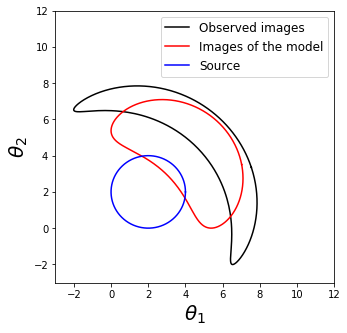

In [9]:
#Comparison between the images of the analytical solution and the images of the initial guess
plb.rcParams['figure.figsize'] =(5,5)
plb.plot(Theta1p, Theta2p, color='black')
plb.plot(THETA1P, THETA2P, color='red')
plb.plot(Beta1, Beta2, color='blue')
plb.legend(['Observed images', 'Images of the model', 'Source'], loc='upper right', fontsize=12)
plb.xlabel(r"$\theta_1$", fontsize=20)
plb.ylabel(r"$\theta_2$", fontsize=20)
plb.xlim(-3,12)
plb.ylim(-3,12)
plb.show()

In [10]:
#Run of the MCMC from the initial guess
sigma = 0.0001

#Model of the MCMC
def model(parameters, Theta1p, Theta2p, sigma):
    Rad, c_x, c_y, SIGMA_0 = parameters
    beta = Rad
    beta1 = beta*np.cos(alpha)+c_x
    beta2 = beta*np.sin(alpha)+c_y
    o = SIGMA_0
    THETAP = (beta1**2+beta2**2)**0.5 + (4*np.pi*o**2*D_ds/(c**2*D_s)) 
    THETA1P = beta1/(1-(4*np.pi*o**2*D_ds/(c**2*D_s*THETAP)))
    THETA2P = beta2/(1-(4*np.pi*o**2*D_ds/(c**2*D_s*THETAP)))
    THETA_teor = np.sqrt(THETA1P**2 +THETA2P**2) 
    return THETA_teor

#Likelihood
def lnlike(parameters, Theta1p, Theta2p, sigma):
    Rad, c_x, c_y, SIGMA_0 = parameters
    THETA_teor = model(parameters, Theta1p, Theta2p, sigma)
    X = np.zeros((len(Theta1p)),float)
    for l in range(len(Theta1p)):
        X[l]=((thetap[l]-THETA_teor[l])**2)/(sigma**2)
    return -0.5*np.sum(X)

In [11]:
#Initial guess
start=np.zeros(4,float)
start[0] = RADIO
start[1] = H
start[2] = K
start[3] = SIGMA

In [12]:
#parametric space
def lnprior(parameters):
    Rad, c_x, c_y, SIGMA_0 = parameters
    if Rad>0 and -2<c_x<2 and -2<c_y<2 and SIGMA_0>0:
        return 0.0
    return -np.inf

In [13]:
#Priori function
def lnprob(parameters, Theta1p, Theta2p, sigma):
    lp = lnprior(parameters)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(parameters, Theta1p, Theta2p, sigma)

In [14]:
#Dimention and walkers
ndim, nwalkers = 4, 100
#lentgh of the step
pos_step = 1e-8
pos_in = [abs(start + pos_step*start*np.random.randn(ndim)+1e-9*np.random.randn(ndim)) for i in range(nwalkers)]

In [15]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(Theta1p, Theta2p, sigma))

In [16]:
#Number of steps for the chain
sampler.run_mcmc(pos_in, 1000)

/home/itamar/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


State([[0.99998839 0.80003335 0.80002613 0.99999774]
 [1.00000301 0.80001105 0.80000122 0.99999911]
 [1.00000365 0.80000799 0.80001401 0.9999988 ]
 [0.99998092 0.80000367 0.80000839 1.00000029]
 [0.99999635 0.80002059 0.80001353 0.99999784]
 [0.99998854 0.80002029 0.80002184 0.99999907]
 [0.99999752 0.80003225 0.80003104 0.99999731]
 [0.99999884 0.80002003 0.80000848 0.99999892]
 [0.99999131 0.79998475 0.79998535 1.00000162]
 [1.00000193 0.80000023 0.80000662 0.99999968]
 [1.00001454 0.79998095 0.79998381 1.00000093]
 [0.99999619 0.80000014 0.79999742 1.00000016]
 [1.00001629 0.79996856 0.79998081 1.0000015 ]
 [0.99999019 0.80000543 0.80001209 0.9999998 ]
 [0.99999078 0.80001862 0.80002892 0.9999983 ]
 [1.00000396 0.79999167 0.79998801 1.00000061]
 [0.99999761 0.79999771 0.79999773 1.00000033]
 [1.00000307 0.79999377 0.79999495 0.99999996]
 [0.99999689 0.80001117 0.80000922 0.99999931]
 [1.0000099  0.79997415 0.79996657 1.0000026 ]
 [1.00000154 0.80001176 0.80001427 0.99999873]
 [0.999

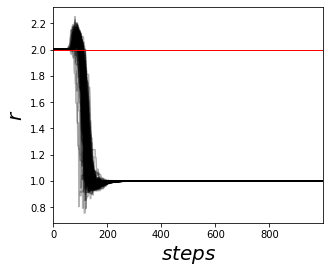

In [17]:
#path of the chain for the radius parameter
fig = plt.figure()
ax = fig.add_axes((0.15, 0.3, 0.75, 0.6))
chain_steps = [i for i in range(len(sampler.chain[:,:,0].T))]
chain_W = []
for i in range(nwalkers):
	chain_value = sampler.chain[:,:,0].T[:][:,i]
	ax.plot(chain_steps, chain_value, '-', color='k', alpha=0.3)
ax.plot(chain_steps, len(chain_steps)*[start[0]], '-', color='r', lw=1)
ax.set_xlim(0, len(chain_steps)-1)
plb.xlabel(r"$steps$", fontsize=20)
plb.ylabel(r"$r$", fontsize=20)
plt.savefig('rad')

Text(0.5, 0, '$steps$')

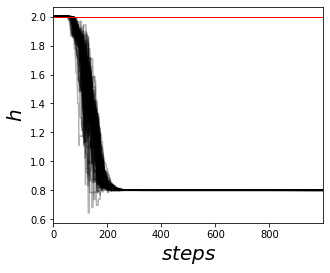

In [18]:
#path of the chain for the h parameter
fig = plt.figure()
ax = fig.add_axes((0.15, 0.3, 0.75, 0.6))
chain_steps = [i for i in range(len(sampler.chain[:,:,1].T))]
chain_W = []
for i in range(nwalkers):
	chain_value = sampler.chain[:,:,1].T[:][:,i]
	ax.plot(chain_steps, chain_value, '-', color='k', alpha=0.3)
ax.plot(chain_steps, len(chain_steps)*[start[1]], '-', color='r', lw=1)
ax.set_xlim(0, len(chain_steps)-1)
plb.ylabel(r"$h$", fontsize=20)
plb.xlabel(r"$steps$", fontsize=20)

Text(0.5, 0, '$steps$')

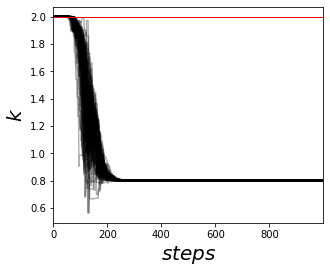

In [19]:
#path of the chain for the k parameter
fig = plt.figure()
ax = fig.add_axes((0.15, 0.3, 0.75, 0.6))
chain_steps = [i for i in range(len(sampler.chain[:,:,2].T))]
chain_W = []
for i in range(nwalkers):
	chain_value = sampler.chain[:,:,2].T[:][:,i]
	ax.plot(chain_steps, chain_value, '-', color='k', alpha=0.3)
ax.plot(chain_steps, len(chain_steps)*[start[2]], '-', color='r', lw=1)
ax.set_xlim(0, len(chain_steps)-1)
plb.ylabel(r"$k$", fontsize=20)
plb.xlabel(r"$steps$", fontsize=20)

Text(0.5, 0, '$steps$')

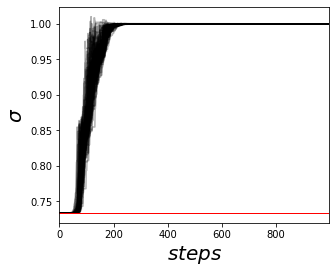

In [20]:
#path of the chain for the sigma parameter
fig = plt.figure()
ax = fig.add_axes((0.15, 0.3, 0.75, 0.6))
chain_steps = [i for i in range(len(sampler.chain[:,:,3].T))]
chain_W = []
for i in range(nwalkers):
	chain_value = sampler.chain[:,:,3].T[:][:,i]
	ax.plot(chain_steps, chain_value, '-', color='k', alpha=0.3)
ax.plot(chain_steps, len(chain_steps)*[start[3]], '-', color='r', lw=1)
ax.set_xlim(0, len(chain_steps)-1)
plb.ylabel(r"$\sigma$", fontsize=20)
plb.xlabel(r"$steps$", fontsize=20)

In [21]:
samples = sampler.chain[:, 500:, :].reshape((-1, ndim))

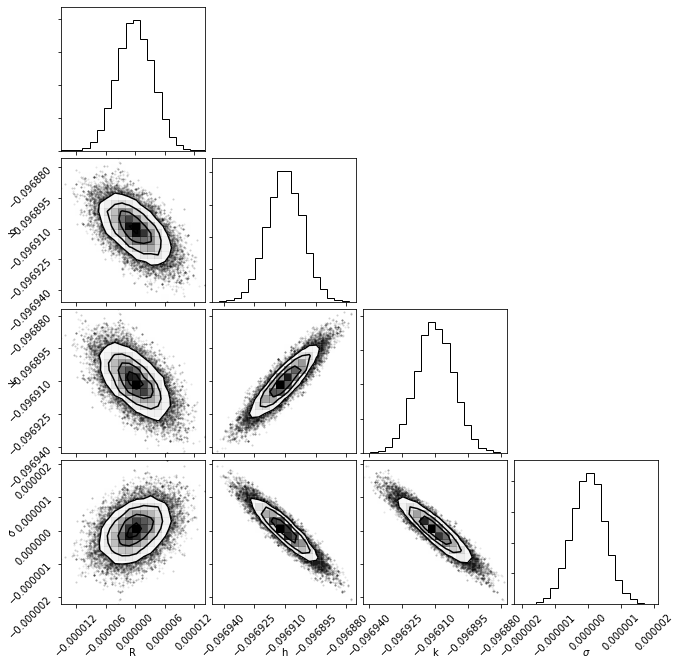

In [22]:
#Contours of obtained values 
fig = corner.corner(np.log10(samples), labels=["R", "h", "k", r"$\sigma$"],
                    truths=[start[0],start[1],start[2],start[3]])
fig.savefig("triangle.png")

In [23]:
#estimation of uncertainties
para = []
parap68=[]; paran68=[]
parap95=[]; paran95=[]
fit_para = []

for i in range(ndim):	
	mcmc = np.percentile(samples[:, i], [50.-0.5*95, 50.-0.5*68, 50., 50.+0.5*68, 50.+0.5*95])
	para.append(mcmc[2])
	fit_para.append(mcmc[2]) 
	parap68.append(mcmc[3]-mcmc[2])
	paran68.append(mcmc[2]-mcmc[1])
	parap95.append(mcmc[4]-mcmc[2])
	paran95.append(mcmc[2]-mcmc[0])

In [24]:
#Obtained parameters
print(para[0],para[1],para[2],para[3])

0.9999997627401913 0.799999662114835 0.7999998539402401 1.0000000491900647


In [25]:
#Obtained source
Beta = para[0]
Beta1 = Beta*np.cos(alpha)+para[1]
Beta2 = Beta*np.sin(alpha)+para[2]
O = para[3]

#Obtained images
THETAP = (Beta1**2+Beta2**2)**0.5 + (4*np.pi*O**2*D_ds/(c**2*D_s)) 
THETA1P = Beta1/(1-(4*np.pi*O**2*D_ds/(c**2*D_s*THETAP)))
THETA2P = Beta2/(1-(4*np.pi*O**2*D_ds/(c**2*D_s*THETAP)))
THETP = np.sqrt(THETA1P**2 +THETA2P**2) 

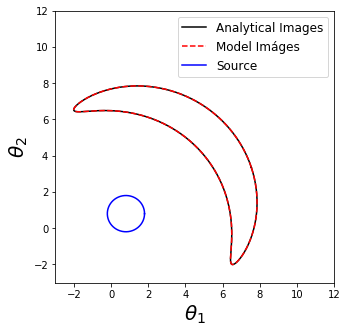

In [26]:
#Comparison between images of model and images of analytical solution
plb.rcParams['figure.figsize'] =(5,5)
plb.plot(Theta1p, Theta2p, color='black')
plb.plot(THETA1P, THETA2P, '--r')
plb.plot(Beta1, Beta2, color='blue')
plb.xlabel(r"$\theta_1$", fontsize=20)
plb.ylabel(r"$\theta_2$", fontsize=20)
plb.legend(['Analytical Images', 'Model Imáges', 'Source'], loc='upper right', fontsize=12)
plb.xlim(-3,12)
plb.ylim(-3,12)
plb.show()

In [27]:
#Values and its uncertainties
radio = para[0]; radio_95pos = parap95[0]; radio_95neg = paran95[0]; radio_68pos = parap68[0]; radio_68neg = paran68[0]
h = para[1]; h_95pos = parap95[1]; h_95neg = paran95[1]; h_68pos = parap68[1]; h_68neg = paran68[1]
k = para[2]; k_95pos = parap95[2]; k_95neg = paran95[2]; k_68pos = parap68[2]; k_68neg = paran68[2]
O = para[3]; O_95pos = parap95[3]; O_95neg = paran95[3]; O_68pos = parap68[3]; O_68neg = paran68[3]

In [28]:
print('radio =', radio, radio_95pos, radio_95neg)
print('h =', h, h_95pos, h_95neg)
print('k =', k, k_95pos, k_95neg)
print('O =', O, O_95pos, O_95neg)

radio = 0.9999997627401913 1.638272733939239e-05 1.5836415342751486e-05
h = 0.799999662114835 3.117900420879227e-05 3.1825474259616904e-05
k = 0.7999998539402401 3.108138121965531e-05 3.0755627480782977e-05
O = 1.0000000491900647 2.2499675154108445e-06 2.3061382520284113e-06
